In [1]:
from utils import *
import pymongo

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["db"]
birds = mydb["electric_scooters"]

In [3]:
def get_birds_ids(birds):
    return list(birds.distinct("id"))

In [4]:
birds_ids = get_birds_ids(birds)
print(len(birds_ids))

7642


In [20]:
def get_distance_and_moves(bird_id, birds, time):
    if time == "any":
        bird_by_id = birds.find({"id": bird_id})
    else:
        #bird_by_id = birds.find({"id": bird_id},{"time": "/2019/"})
        bird_by_id = birds.find({"$and": [{"id": bird_id}, {"time":{"$regex": u"" + time +""}}]})
    bird_by_id = list(bird_by_id)
    
    #print(len(bird_by_id))
    total_distance = 0
    used = 0
    print("----------------------------------------------------------")
    print("ID: " + bird_id)
    for i in range(len(bird_by_id) - 1):
        previous = bird_by_id[i]
        actual = bird_by_id[i + 1]
        #print(calculate_distance(previous.get("location"), actual.get("location"))
        actual_distance = calculate_distance(previous.get("location"), actual.get("location"))
        if(actual_distance > 0.001 and (int(previous.get("battery_level")) > int(actual.get("battery_level")))):
            #print(previous.get("time") + " " + previous.get("battery_level") + " " + actual.get("battery_level") +" " + str(actual_distance))
            used += 1
            total_distance += actual_distance
    return {"distance":total_distance, "used": used}

In [6]:
test_id = birds_ids[300]
get_distance_and_moves(test_id, birds, "2019")

----------------------------------------------------------
ID: bec01b21-283b-4313-909d-ac46b0e59dc3
2019-10-28 23:25:08 27 26 0.09666479730498245
2019-10-28 23:27:41 26 21 0.004787932682736436
2019-10-28 23:28:57 26 21 0.0066829777405319315


{'distance': 0.10813570772825082, 'used': 3}

In [7]:
all_time = "any"
days = ["2019-10-29", "2019-10-30", "2019-10-31", "2019-11-01", "2019-11-02", "2019-11-03", "2019-11-04"]

In [8]:
def get_total(bird_ids, birds, time):
    total_used = 0
    total_dist = 0
    interator = 0
    bird_ids_len = len(bird_ids)
    for bird_id in bird_ids:
        interator +=1
        dist_movs = get_distance_and_moves(bird_id, birds, time)
        print("ID number : " + str(interator) + " of " + str(bird_ids_len))
        total_used += dist_movs.get("used")
        total_dist += dist_movs.get("distance")
    return {"distance":total_dist, "used": total_used}

In [10]:
#Długi czsa wykonania
#get_total(birds_ids, birds, all_time)

In [14]:
hours = [" 00:", " 01:", " 02:", " 03:", " 04:", " 05:", " 06:", " 07:", " 08:", " 09:" ," 10:", " 11:", " 12:",
        " 13:", " 14:", " 15:", " 16:", " 17:", " 18:", " 19:", " 20:", " 21:", " 22:", " 23:" ]

In [15]:
def ids_for_time(birds, time):
    if time == "any":
        return birds.distinct("id")
    else:
        return birds.find({"time":{"$regex": u"" + time +""}}).distinct("id")

In [16]:
len(ids_for_time(birds, " 03:"))

1851

In [21]:
result = list()
for hour in hours:
    print("Hours: " + hour)
    ids = ids_for_time(birds, hour)
    print("Number of ids: " + str(len(ids)))
    result.append(get_total(ids, birds, hour))

Hours:  00:
Number of ids: 2139
----------------------------------------------------------
ID: 8b6835c4-b0f4-4509-bc25-01d932f79082
ID number : 1 of 2139
----------------------------------------------------------
ID: 9f40d804-6d65-4c59-9bba-44d9b1939c4d
ID number : 2 of 2139
----------------------------------------------------------
ID: 911354b4-7b85-4b65-a7a0-5f7b86e5f79b
ID number : 3 of 2139
----------------------------------------------------------
ID: 7d4eb88c-b7fa-4176-8325-9f0496112996
ID number : 4 of 2139
----------------------------------------------------------
ID: 6d5a7ba3-525c-47fd-ae3b-849e04929ff3
ID number : 5 of 2139
----------------------------------------------------------
ID: 54f6a734-bbc5-432d-a3d8-b89e99b7bc25
ID number : 6 of 2139
----------------------------------------------------------
ID: 5a16786a-c9da-4c19-a7e1-1139308c1b9a
ID number : 7 of 2139
----------------------------------------------------------
ID: 3ca57ded-b5fa-4379-8e3b-131890a77a05
ID number : 8 

----------------------------------------------------------
ID: 93db4add-7b29-4cfc-a03f-6fe2f10cc49d
ID number : 68 of 2139
----------------------------------------------------------
ID: 979e7487-7a0c-4c43-823c-23e6f676fb32
ID number : 69 of 2139
----------------------------------------------------------
ID: f55f22f0-541c-4c5f-87a9-31931e632a81
ID number : 70 of 2139
----------------------------------------------------------
ID: 48167483-72c2-4c78-8e29-6bcf1a8d7135
ID number : 71 of 2139
----------------------------------------------------------
ID: e2fd9ac4-82ee-49af-80b9-05c6dd5fded3
ID number : 72 of 2139
----------------------------------------------------------
ID: db8cbddd-29e0-4136-b69b-df130c220594
ID number : 73 of 2139
----------------------------------------------------------
ID: 33ea29c9-a97b-4b99-8399-7b369f7bf276
ID number : 74 of 2139
----------------------------------------------------------
ID: 27e32582-8ff9-4d8c-9fb1-de2177755a4e
ID number : 75 of 2139
----------------

----------------------------------------------------------
ID: 8ed96985-022d-4db2-816f-0e34c3a6c205
ID number : 135 of 2139
----------------------------------------------------------
ID: 0bfbeb0f-c12d-44cf-8e66-35e4f10d8f2e
ID number : 136 of 2139
----------------------------------------------------------
ID: f8f20873-7c10-4da9-b35f-80098e5ed6dc
ID number : 137 of 2139
----------------------------------------------------------
ID: 943e7cb3-9e97-4bbf-a2af-16f197110b61
ID number : 138 of 2139
----------------------------------------------------------
ID: fcbedcbd-6daf-412a-b566-9758b45d415c
ID number : 139 of 2139
----------------------------------------------------------
ID: a999eadf-bb83-4321-8281-433c4bf545d5
ID number : 140 of 2139
----------------------------------------------------------
ID: c01d6644-4606-4ec0-b47e-28923f74f308
ID number : 141 of 2139
----------------------------------------------------------
ID: e06d90ad-f01a-4cf7-9d36-fb90dd15f769
ID number : 142 of 2139
--------

----------------------------------------------------------
ID: 7d359d3f-8b4a-4f9b-805a-4cbb709a600c
ID number : 202 of 2139
----------------------------------------------------------
ID: c8c02330-6cf8-48bc-a114-ecadf0b5a202
ID number : 203 of 2139
----------------------------------------------------------
ID: 8ad46d72-edea-42f5-92da-70bd97a5a92f
ID number : 204 of 2139
----------------------------------------------------------
ID: 8be3ec04-466f-41f2-b65e-6b880ec061dd
ID number : 205 of 2139
----------------------------------------------------------
ID: 62404286-23ea-42bd-bce8-aa47f2b0d63d
ID number : 206 of 2139
----------------------------------------------------------
ID: ff271149-d5bb-4806-b83e-d694a54adc0d
ID number : 207 of 2139
----------------------------------------------------------
ID: 7e130e83-6d24-4bdc-84ff-63166a0730ef
ID number : 208 of 2139
----------------------------------------------------------
ID: 1c103494-200a-48dd-a8fb-5e55b4fb9ff4
ID number : 209 of 2139
--------

----------------------------------------------------------
ID: 6d723f21-5229-47d3-a1be-5d176370bd10
ID number : 269 of 2139
----------------------------------------------------------
ID: 3de638b4-e44e-4e2a-9126-fd9074833ab1
ID number : 270 of 2139
----------------------------------------------------------
ID: 02f82d86-f474-40f5-967c-b95c4a64d7a2
ID number : 271 of 2139
----------------------------------------------------------
ID: 923b9030-0b28-42f5-8f43-371d0a0648a0
ID number : 272 of 2139
----------------------------------------------------------
ID: d31e31b7-3400-43e1-a413-575dee30fd5b
ID number : 273 of 2139
----------------------------------------------------------
ID: f85c435b-d9c0-4ec2-91e6-667520a843ce
ID number : 274 of 2139
----------------------------------------------------------
ID: 4863800d-9227-446a-8d8f-4d3863e14c61
ID number : 275 of 2139
----------------------------------------------------------
ID: a806ae55-b901-4260-8e05-0ca0e8e4cdfe
ID number : 276 of 2139
--------

----------------------------------------------------------
ID: f5249ea1-6192-4a43-bdef-a0d1e14f5290
ID number : 336 of 2139
----------------------------------------------------------
ID: a82c4220-e9f9-41d8-83ac-f0a1d65f35e5
ID number : 337 of 2139
----------------------------------------------------------
ID: e3d6c43b-4802-4549-a99c-e45d129b1766
ID number : 338 of 2139
----------------------------------------------------------
ID: 7b64ec78-04e3-4762-954d-33bdbf479774
ID number : 339 of 2139
----------------------------------------------------------
ID: e15e3dec-bfa5-4395-929b-98c954b322cb
ID number : 340 of 2139
----------------------------------------------------------
ID: 4356d80c-e115-4c3e-aa09-5cce959138a5
ID number : 341 of 2139
----------------------------------------------------------
ID: 0388c3e1-c42d-47f6-928d-e2fa99f9db9d
ID number : 342 of 2139
----------------------------------------------------------
ID: e6be7b96-6a6a-4e34-a1e7-4170a692db64
ID number : 343 of 2139
--------

----------------------------------------------------------
ID: c232fdae-117c-45a4-80d5-aade738f346e
ID number : 403 of 2139
----------------------------------------------------------
ID: e1232d1d-a5c4-42cf-a2be-66b9320bbe92
ID number : 404 of 2139
----------------------------------------------------------
ID: 46063104-c145-4a2b-a5f4-488345744d60
ID number : 405 of 2139
----------------------------------------------------------
ID: c36608c8-af2a-43b6-9f40-097ac77aaa3b
ID number : 406 of 2139
----------------------------------------------------------
ID: 3696d8bf-1d48-4eb5-9c14-7675a2646618
ID number : 407 of 2139
----------------------------------------------------------
ID: 8ff2bd37-45e4-4b72-9c18-7b1433e0b87b
ID number : 408 of 2139
----------------------------------------------------------
ID: b58ece06-674f-4e27-bfe7-3793f9514d0a
ID number : 409 of 2139
----------------------------------------------------------
ID: 292f2f85-1004-4a80-a672-38f0a6ee1a25
ID number : 410 of 2139
--------

----------------------------------------------------------
ID: 85cfe831-176f-456e-94ea-42abacf11fbf
ID number : 470 of 2139
----------------------------------------------------------
ID: 2ef5ed87-3dea-4e1f-b4aa-881aba5262f0
ID number : 471 of 2139
----------------------------------------------------------
ID: d06e2317-2f1d-4a01-9a94-5a16bd55fa10
ID number : 472 of 2139
----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 473 of 2139
----------------------------------------------------------
ID: 3fb6eab3-cae6-471c-8712-d4a81d80b629
ID number : 474 of 2139
----------------------------------------------------------
ID: 663f0bf5-bec0-4e05-9281-a5bf4fe1893b
ID number : 475 of 2139
----------------------------------------------------------
ID: d597d33b-1ac8-43fa-b368-472dd63def56
ID number : 476 of 2139
----------------------------------------------------------
ID: 7a155748-b149-4e88-9716-811bbfb77a63
ID number : 477 of 2139
--------

----------------------------------------------------------
ID: 4ae75e97-b887-45ca-a1db-d657697580b0
ID number : 537 of 2139
----------------------------------------------------------
ID: 3ba96fc8-4de4-4f72-a547-bbda116e73a8
ID number : 538 of 2139
----------------------------------------------------------
ID: cc8727fd-925f-44f4-a4a4-643aa1249a8c
ID number : 539 of 2139
----------------------------------------------------------
ID: ab64f88a-8699-4372-ae39-6f8df9f3dc37
ID number : 540 of 2139
----------------------------------------------------------
ID: 0b856ccb-e3fd-47e5-bb03-c3c34c7bc487
ID number : 541 of 2139
----------------------------------------------------------
ID: 7a49f3b6-efe7-4a39-bbc5-e89fa49ed352
ID number : 542 of 2139
----------------------------------------------------------
ID: cb69fe03-f7e7-41ca-b135-7b027a0558db
ID number : 543 of 2139
----------------------------------------------------------
ID: 6cfa2235-ed1a-4fc5-b6f6-d3b051050b08
ID number : 544 of 2139
--------

----------------------------------------------------------
ID: ef26f08e-5e71-415b-9a15-1e96c012be1d
ID number : 604 of 2139
----------------------------------------------------------
ID: 98552b0d-f161-43ae-bff2-02d326ef36ba
ID number : 605 of 2139
----------------------------------------------------------
ID: 9b941cca-cb08-4f6c-86eb-0b7018eac70f
ID number : 606 of 2139
----------------------------------------------------------
ID: 28048331-a9c2-4f6c-87b2-d1b753b6cecc
ID number : 607 of 2139
----------------------------------------------------------
ID: 6fd66d55-22ba-445b-8f1e-6dcf80a0992d
ID number : 608 of 2139
----------------------------------------------------------
ID: 447de7a4-939b-41df-af66-4fe65b0ceba8
ID number : 609 of 2139
----------------------------------------------------------
ID: 0c606157-c795-492c-8991-81bcc9964b1a
ID number : 610 of 2139
----------------------------------------------------------
ID: cea873a8-ad98-4a39-8901-b2cb5ba6a313
ID number : 611 of 2139
--------

----------------------------------------------------------
ID: 5411e825-017c-4c0d-a512-09f52b41fb9b
ID number : 671 of 2139
----------------------------------------------------------
ID: b95ee773-cffa-4565-ac82-7c19d5959cf9
ID number : 672 of 2139
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 673 of 2139
----------------------------------------------------------
ID: c354ca5a-36f6-41c2-8f0c-df0c90192b2c
ID number : 674 of 2139
----------------------------------------------------------
ID: 7376d896-de6f-4a2f-9219-dbb76da8481a
ID number : 675 of 2139
----------------------------------------------------------
ID: 8655447c-4ee4-41a8-918b-cf6ebb6619ae
ID number : 676 of 2139
----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 677 of 2139
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 678 of 2139
--------

----------------------------------------------------------
ID: 2da1c23c-b947-4a93-8f36-510f043bc12a
ID number : 738 of 2139
----------------------------------------------------------
ID: fcf1dbaf-ed21-487c-bf6f-9efa1c2eb6fd
ID number : 739 of 2139
----------------------------------------------------------
ID: e9e65c89-c1c6-4f77-b1a9-a59269deb1b5
ID number : 740 of 2139
----------------------------------------------------------
ID: 7451aba6-ca92-42fc-8010-cf7a724dc39a
ID number : 741 of 2139
----------------------------------------------------------
ID: 85fef6f9-5c71-4d3c-b23b-e5316a1969df
ID number : 742 of 2139
----------------------------------------------------------
ID: c7bd69e3-84dd-45a8-96b6-dd638c897a07
ID number : 743 of 2139
----------------------------------------------------------
ID: b392de9c-8979-499c-a102-229920653272
ID number : 744 of 2139
----------------------------------------------------------
ID: df5f8fe4-3e73-4c6f-80cf-d011ad7d0f9b
ID number : 745 of 2139
--------

----------------------------------------------------------
ID: 32ad242c-fcc8-4d3f-bc5a-19f880b36255
ID number : 805 of 2139
----------------------------------------------------------
ID: 99397ec0-558c-4884-a340-ff127ffd7eb2
ID number : 806 of 2139
----------------------------------------------------------
ID: 94f30c39-638d-497a-b3c9-cbbdfef0207f
ID number : 807 of 2139
----------------------------------------------------------
ID: 4aa48cd8-f19d-430c-986d-79d392081e9c
ID number : 808 of 2139
----------------------------------------------------------
ID: 5b493557-d3f0-4793-b91b-39d1433ee704
ID number : 809 of 2139
----------------------------------------------------------
ID: 74a5014a-8e71-4e62-bba0-4f2cf1075574
ID number : 810 of 2139
----------------------------------------------------------
ID: dda16520-aab9-4486-8886-fc2f0f4c31c9
ID number : 811 of 2139
----------------------------------------------------------
ID: 4ff5bb9f-14d8-409e-a5c4-9534f6b6ac2e
ID number : 812 of 2139
--------

----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 872 of 2139
----------------------------------------------------------
ID: 73861ea6-0b3e-4d51-a4a7-246d19f67937
ID number : 873 of 2139
----------------------------------------------------------
ID: 16298baa-5a8a-4c64-9360-e91fbf7a44f5
ID number : 874 of 2139
----------------------------------------------------------
ID: 7aa66c80-8867-4cfb-aa7d-65c710132854
ID number : 875 of 2139
----------------------------------------------------------
ID: 7f79dc9c-5dc4-4584-817f-81ff8fbf4eb1
ID number : 876 of 2139
----------------------------------------------------------
ID: c2fb3262-718d-484c-b2ec-5bfd819864d7
ID number : 877 of 2139
----------------------------------------------------------
ID: f110438c-e45f-4d6c-b10c-3f80bda341d8
ID number : 878 of 2139
----------------------------------------------------------
ID: 04643d40-9aa7-455c-8e98-83de011d40da
ID number : 879 of 2139
--------

----------------------------------------------------------
ID: 1d2248af-a812-4ce0-af6f-ffd85032bb8e
ID number : 939 of 2139
----------------------------------------------------------
ID: ef9cea5a-e635-42fd-8fa5-4a3dbe0975cb
ID number : 940 of 2139
----------------------------------------------------------
ID: 117487d6-9f56-480f-b138-fb93b435d63f
ID number : 941 of 2139
----------------------------------------------------------
ID: c732c475-1631-4b98-a376-09c5b2f88077
ID number : 942 of 2139
----------------------------------------------------------
ID: dfc16444-dc65-4d96-9c64-04cb5bb6007a
ID number : 943 of 2139
----------------------------------------------------------
ID: 8d4fe9a1-5331-4050-a8ca-a355fb544d0e
ID number : 944 of 2139
----------------------------------------------------------
ID: 3b1eb079-2cc3-4129-b5a2-d2a9eec6964c
ID number : 945 of 2139
----------------------------------------------------------
ID: bfd0c829-3eb6-4bd4-a6a0-39a71e699b6d
ID number : 946 of 2139
--------

----------------------------------------------------------
ID: dc8ef941-f587-4e10-8874-ee8182c7e570
ID number : 1006 of 2139
----------------------------------------------------------
ID: d132fbde-5d79-4b77-a71d-c5a6ba255fbb
ID number : 1007 of 2139
----------------------------------------------------------
ID: 552bbdbe-120a-4327-9b84-1999fe56f41c
ID number : 1008 of 2139
----------------------------------------------------------
ID: 0986715f-723f-455d-89f9-d2d17a7e951e
ID number : 1009 of 2139
----------------------------------------------------------
ID: 6c76b036-4364-48d6-b541-594a4c538c75
ID number : 1010 of 2139
----------------------------------------------------------
ID: 03afc041-3cdc-40e6-9e41-a45accfbaf54
ID number : 1011 of 2139
----------------------------------------------------------
ID: 947c795c-fd0f-46a2-8cca-bc68dce4c696
ID number : 1012 of 2139
----------------------------------------------------------
ID: 85196f8f-d031-4b6b-8df6-27ec81a25f09
ID number : 1013 of 2139


----------------------------------------------------------
ID: c55f4094-8f65-4c52-946d-c3ad9b3331f6
ID number : 1072 of 2139
----------------------------------------------------------
ID: 7a4d5d2c-edb9-4f2e-b36b-36e367b241cb
ID number : 1073 of 2139
----------------------------------------------------------
ID: 412120e6-9895-48a7-8c87-effbc5b763ae
ID number : 1074 of 2139
----------------------------------------------------------
ID: 514a1272-1d89-497d-96a9-ee13e35740db
ID number : 1075 of 2139
----------------------------------------------------------
ID: 5acd5a55-cf87-4b2e-b5e8-96cd36db933d
ID number : 1076 of 2139
----------------------------------------------------------
ID: 60f62c4b-913d-4cff-90a2-b0f23f387a71
ID number : 1077 of 2139
----------------------------------------------------------
ID: 249b9b3d-3a2f-45fa-b4e7-ad9238047e5a
ID number : 1078 of 2139
----------------------------------------------------------
ID: 6f0251e2-40fe-43bd-bb6a-1c8ec5a69ceb
ID number : 1079 of 2139


----------------------------------------------------------
ID: fc28d051-1769-4043-9c6e-2e667eda5688
ID number : 1138 of 2139
----------------------------------------------------------
ID: a060a38c-799e-4214-b7b6-0984952157ff
ID number : 1139 of 2139
----------------------------------------------------------
ID: 31addb3c-3e82-44d7-af64-390add06992e
ID number : 1140 of 2139
----------------------------------------------------------
ID: 72ba5f60-f424-426d-86dc-7cd0ed1cea59
ID number : 1141 of 2139
----------------------------------------------------------
ID: 69c8b931-c40d-4067-a4fd-bcd2cb43c130
ID number : 1142 of 2139
----------------------------------------------------------
ID: 1e8ecb52-eea5-4ecb-9f9c-cdfb3e664121
ID number : 1143 of 2139
----------------------------------------------------------
ID: 16ed84a2-5027-4905-841d-8d247512255c
ID number : 1144 of 2139
----------------------------------------------------------
ID: 10b57a1e-51d5-4901-ac56-ccba85cb50f9
ID number : 1145 of 2139


----------------------------------------------------------
ID: 06cdf2c9-a154-4839-863d-830440fea766
ID number : 1204 of 2139
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 1205 of 2139
----------------------------------------------------------
ID: a8e3b227-9e69-4f90-a136-3e2d421772b8
ID number : 1206 of 2139
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 1207 of 2139
----------------------------------------------------------
ID: 463e566a-02bb-4ec9-9a66-2708f616af64
ID number : 1208 of 2139
----------------------------------------------------------
ID: e47c4a7a-6cb0-4ccf-8ed5-693eac967125
ID number : 1209 of 2139
----------------------------------------------------------
ID: a722d7e5-fa76-4965-aaa6-eef95d533ebc
ID number : 1210 of 2139
----------------------------------------------------------
ID: 99af3e50-1dcd-4d6a-acde-79617c029749
ID number : 1211 of 2139


----------------------------------------------------------
ID: 9b6a3251-0ff9-48f7-b19d-6b8f82d16788
ID number : 1270 of 2139
----------------------------------------------------------
ID: 066a853f-b42c-4053-aa9c-243fcdf6c3fa
ID number : 1271 of 2139
----------------------------------------------------------
ID: 1adfcee0-c06b-45cc-95df-af95c8b2d81c
ID number : 1272 of 2139
----------------------------------------------------------
ID: 1503e0e6-c38f-44d5-8389-66bed223c5b1
ID number : 1273 of 2139
----------------------------------------------------------
ID: 3f6a1fad-6849-4dbd-86af-25bfbbd05792
ID number : 1274 of 2139
----------------------------------------------------------
ID: e9c3ac79-0704-496c-8a09-31272778de64
ID number : 1275 of 2139
----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 1276 of 2139
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 1277 of 2139


----------------------------------------------------------
ID: 25123bd9-0026-447c-9bd2-11a52c71a592
ID number : 1336 of 2139
----------------------------------------------------------
ID: 990f26f7-26e7-443b-ba6a-db81b80d7e44
ID number : 1337 of 2139
----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 1338 of 2139
----------------------------------------------------------
ID: 5dba5aa2-101f-4221-bb76-e51f77ac9c7d
ID number : 1339 of 2139
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 1340 of 2139
----------------------------------------------------------
ID: ec2859da-99ed-4f35-a19f-f525bb9d3cfb
ID number : 1341 of 2139
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 1342 of 2139
----------------------------------------------------------
ID: 500c97aa-b864-4110-85bd-9b9b3d5b70c3
ID number : 1343 of 2139


----------------------------------------------------------
ID: 3bba9870-dcc6-4ab8-a83c-02484a9cf1a1
ID number : 1402 of 2139
----------------------------------------------------------
ID: 63ba3747-7430-4a0b-8d40-c1d46c1cb550
ID number : 1403 of 2139
----------------------------------------------------------
ID: 40e06d6e-03b5-4ccf-aa27-36ded596e38a
ID number : 1404 of 2139
----------------------------------------------------------
ID: fbdbd94f-547c-4f3f-9947-f0809a1cf7c7
ID number : 1405 of 2139
----------------------------------------------------------
ID: 3171c9ed-b587-46b7-959d-f9283426d42f
ID number : 1406 of 2139
----------------------------------------------------------
ID: 4e734517-d3ea-40f2-8a34-6abd36454a36
ID number : 1407 of 2139
----------------------------------------------------------
ID: 547032d2-43c9-467a-96e3-e1aaa5718820
ID number : 1408 of 2139
----------------------------------------------------------
ID: 64e1e88f-18fc-47ce-9823-709f33822c07
ID number : 1409 of 2139


----------------------------------------------------------
ID: 93563fae-5e3a-4674-97ec-aaeeac541c48
ID number : 1468 of 2139
----------------------------------------------------------
ID: ba857a0e-595d-4608-9858-beec263f99b2
ID number : 1469 of 2139
----------------------------------------------------------
ID: 481d50bf-941d-4502-a68d-b8a03e29a43e
ID number : 1470 of 2139
----------------------------------------------------------
ID: d4489d85-33dc-496d-ba41-8cfcac31f1b2
ID number : 1471 of 2139
----------------------------------------------------------
ID: da9e2686-c25c-4719-a573-9679d683e1c7
ID number : 1472 of 2139
----------------------------------------------------------
ID: 9fafac7f-135c-4ec5-9d96-333b9a479d64
ID number : 1473 of 2139
----------------------------------------------------------
ID: 5b5184d6-48ea-44ba-829a-cc34f1321826
ID number : 1474 of 2139
----------------------------------------------------------
ID: c378d73e-06ab-482f-9324-f2afea713e48
ID number : 1475 of 2139


----------------------------------------------------------
ID: 73d7006c-2c10-4938-a165-cb35de6aabd7
ID number : 1534 of 2139
----------------------------------------------------------
ID: 37946d96-c94e-4cc2-9f77-f88f8e712bfb
ID number : 1535 of 2139
----------------------------------------------------------
ID: 8c6285fd-d18c-41f2-893a-90f68a9a9f95
ID number : 1536 of 2139
----------------------------------------------------------
ID: ff76be67-0a63-4ed1-b6ae-c211b78cca3a
ID number : 1537 of 2139
----------------------------------------------------------
ID: 878654a6-3da6-4a74-b5d4-6b052a389871
ID number : 1538 of 2139
----------------------------------------------------------
ID: dc7ac854-70cc-45aa-a55e-adea8e0edf3a
ID number : 1539 of 2139
----------------------------------------------------------
ID: eced32ac-143a-42d2-a25e-03bc885b2eac
ID number : 1540 of 2139
----------------------------------------------------------
ID: d9c87573-2437-4c26-8546-b094739525bd
ID number : 1541 of 2139


----------------------------------------------------------
ID: 86f2f9de-256a-41a0-ada0-41a62865271f
ID number : 1600 of 2139
----------------------------------------------------------
ID: bd88c098-c5f6-4aa4-8f98-e8ff747b5dba
ID number : 1601 of 2139
----------------------------------------------------------
ID: 543c6f9d-35c4-40da-8fb8-984b58417ed6
ID number : 1602 of 2139
----------------------------------------------------------
ID: 60b1adb3-9ab3-44ae-9802-eacb095a5c50
ID number : 1603 of 2139
----------------------------------------------------------
ID: b01e8c0e-7d08-4b2f-bb1a-199748ebb351
ID number : 1604 of 2139
----------------------------------------------------------
ID: fd7ab00e-a23c-4f66-8ad9-5a929b90e80c
ID number : 1605 of 2139
----------------------------------------------------------
ID: dfd0f094-c93f-4d33-96fb-9975a19c0529
ID number : 1606 of 2139
----------------------------------------------------------
ID: d1e7c518-b7f3-47f2-8891-73c8fd19ad17
ID number : 1607 of 2139


----------------------------------------------------------
ID: 38a436fe-885b-4e74-8bf8-adda0c48b9b0
ID number : 1666 of 2139
----------------------------------------------------------
ID: 902c7a79-c28d-4a72-8c83-a73d0b993717
ID number : 1667 of 2139
----------------------------------------------------------
ID: 8bce1eee-88bb-4102-9688-64ffddcf0e17
ID number : 1668 of 2139
----------------------------------------------------------
ID: 41a30f46-fdde-40f2-afe6-9b26bcafb9cc
ID number : 1669 of 2139
----------------------------------------------------------
ID: 09b48afc-5c8f-43d9-a3d0-80b1997ed461
ID number : 1670 of 2139
----------------------------------------------------------
ID: 02512603-d6cb-4252-badf-f3586ba57402
ID number : 1671 of 2139
----------------------------------------------------------
ID: 0d637447-f7ba-460e-8079-f1cc9c25a66f
ID number : 1672 of 2139
----------------------------------------------------------
ID: b8d0ef9b-29b1-4226-83bb-dd421d92ce29
ID number : 1673 of 2139


----------------------------------------------------------
ID: 0de354b6-dd85-4ed5-ad68-66013660d32a
ID number : 1732 of 2139
----------------------------------------------------------
ID: e0e7ada5-56a0-48bd-832f-ee3c04086e64
ID number : 1733 of 2139
----------------------------------------------------------
ID: e1e58eb1-c3f6-4d07-8330-40f020c1e64d
ID number : 1734 of 2139
----------------------------------------------------------
ID: 7a51e233-faaf-400b-b73e-c1d6179112e2
ID number : 1735 of 2139
----------------------------------------------------------
ID: 6434e43f-f0a2-4972-859c-20ced9b2cb3c
ID number : 1736 of 2139
----------------------------------------------------------
ID: 28800301-4f22-46d1-9274-80bddc00a237
ID number : 1737 of 2139
----------------------------------------------------------
ID: 7566b8f3-2d7f-4153-8eae-474db5b1d6ef
ID number : 1738 of 2139
----------------------------------------------------------
ID: 9be750fc-c7eb-4466-a370-64cf07605b85
ID number : 1739 of 2139


----------------------------------------------------------
ID: 49b56efb-91b6-4faf-a6ad-3a19ed2faca9
ID number : 1798 of 2139
----------------------------------------------------------
ID: d1c29b9e-c870-4737-b925-bafd910cc2d7
ID number : 1799 of 2139
----------------------------------------------------------
ID: 5e69a7ca-427e-4497-815a-508d59009d04
ID number : 1800 of 2139
----------------------------------------------------------
ID: a715a4c6-679e-4c1f-acfa-715d439e3787
ID number : 1801 of 2139
----------------------------------------------------------
ID: 404d5b4b-406a-459d-b552-ce7c37cc1196
ID number : 1802 of 2139
----------------------------------------------------------
ID: 6865b76e-b9a4-4243-b3d1-7f73c5ac2971
ID number : 1803 of 2139
----------------------------------------------------------
ID: 289fde89-1c9a-4339-a907-aa4e3aeda93e
ID number : 1804 of 2139
----------------------------------------------------------
ID: bcc071a6-10b1-42ff-9b0e-abf9da0643aa
ID number : 1805 of 2139


----------------------------------------------------------
ID: fc0c0930-7424-4125-9c90-a559a601e0a3
ID number : 1864 of 2139
----------------------------------------------------------
ID: c395f8c3-a6c3-4860-b276-3ff74b6db6e7
ID number : 1865 of 2139
----------------------------------------------------------
ID: 8e17bc13-8d0d-44bc-aaa5-53514bee2e9b
ID number : 1866 of 2139
----------------------------------------------------------
ID: eeff3801-041d-47e6-ac70-b3c181b35cee
ID number : 1867 of 2139
----------------------------------------------------------
ID: 8d2c2b16-e93f-4653-8c86-7df4540fb905
ID number : 1868 of 2139
----------------------------------------------------------
ID: 03084f77-d747-498b-9d0e-84e5d60040f5
ID number : 1869 of 2139
----------------------------------------------------------
ID: 36d5ef94-9007-4c7e-a72d-cdf4dc8544d8
ID number : 1870 of 2139
----------------------------------------------------------
ID: 33d4c6ac-2b57-45fe-be3a-ee49f7fd4a17
ID number : 1871 of 2139


----------------------------------------------------------
ID: 60967c8e-d124-4c27-acb6-4a51a76066a4
ID number : 1930 of 2139
----------------------------------------------------------
ID: 8a12fcf1-c37a-448b-8e71-b6b1a204a233
ID number : 1931 of 2139
----------------------------------------------------------
ID: c8093900-f5d6-4646-abb5-719f0d91d982
ID number : 1932 of 2139
----------------------------------------------------------
ID: 15ecdb60-bda4-4d9b-b1f5-8472b609c640
ID number : 1933 of 2139
----------------------------------------------------------
ID: b0b4d504-a6e6-4010-b973-0909af25a15a
ID number : 1934 of 2139
----------------------------------------------------------
ID: 1c3ec6c4-f4ca-4d4c-b349-67c2a4158a8c
ID number : 1935 of 2139
----------------------------------------------------------
ID: 1b66098e-e909-44b4-b26e-2c2595566797
ID number : 1936 of 2139
----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 1937 of 2139


----------------------------------------------------------
ID: 1ee36085-ae15-4ea6-babc-cab32e75a72b
ID number : 1996 of 2139
----------------------------------------------------------
ID: 592f4e11-6b43-46c8-9161-eca2a9019624
ID number : 1997 of 2139
----------------------------------------------------------
ID: 3f673fa2-80e3-4ee9-8954-05bc6fcccb4f
ID number : 1998 of 2139
----------------------------------------------------------
ID: 3fbc4fa0-007e-4216-8631-c8d517f4b376
ID number : 1999 of 2139
----------------------------------------------------------
ID: 4a3d46f9-fc6f-4d79-8907-87489298ee51
ID number : 2000 of 2139
----------------------------------------------------------
ID: b537006c-4eab-4a67-955a-d88a73de1f39
ID number : 2001 of 2139
----------------------------------------------------------
ID: 7bfbfa59-e774-4d1c-a7d7-787034ed50ef
ID number : 2002 of 2139
----------------------------------------------------------
ID: 19e656d0-0cef-43fb-8d59-6b0a022b8384
ID number : 2003 of 2139


----------------------------------------------------------
ID: b6f864b2-05c0-4a4f-8f47-11efc41cfc55
ID number : 2062 of 2139
----------------------------------------------------------
ID: 0c07baa7-fe5b-492d-9d65-a85b9080ef19
ID number : 2063 of 2139
----------------------------------------------------------
ID: bab21799-7b57-4663-8c02-51445877b0f3
ID number : 2064 of 2139
----------------------------------------------------------
ID: fd2a7909-fe88-4366-bb37-5156a6071d34
ID number : 2065 of 2139
----------------------------------------------------------
ID: 0e1e604b-1b6b-43d0-8f44-d36ac27a82d9
ID number : 2066 of 2139
----------------------------------------------------------
ID: 4f569708-3865-428e-9ddd-1390cd5a8450
ID number : 2067 of 2139
----------------------------------------------------------
ID: 70bd8d28-b221-4d45-87e4-526b2d0eb470
ID number : 2068 of 2139
----------------------------------------------------------
ID: 3a5c3501-119c-4b94-ba8d-44d7e9a38a84
ID number : 2069 of 2139


----------------------------------------------------------
ID: 9186057e-e1d6-4616-af2b-4be739214664
ID number : 2128 of 2139
----------------------------------------------------------
ID: 3d38e889-75e0-4fe6-83f6-bdf3112994ac
ID number : 2129 of 2139
----------------------------------------------------------
ID: f272f86d-88d7-46e3-9640-a25e108d3bb1
ID number : 2130 of 2139
----------------------------------------------------------
ID: 01a1bf2a-d82e-41e8-ac00-104f18d4ae75
ID number : 2131 of 2139
----------------------------------------------------------
ID: 5ffa90e2-d468-4651-ae66-cc48140d336b
ID number : 2132 of 2139
----------------------------------------------------------
ID: 711cce72-028b-4c6c-9eef-7b9f35571646
ID number : 2133 of 2139
----------------------------------------------------------
ID: 2873ae39-40ff-49be-bf33-984317e8cd08
ID number : 2134 of 2139
----------------------------------------------------------
ID: 2287ed48-1c1c-44ef-ab72-89b2fe537482
ID number : 2135 of 2139


----------------------------------------------------------
ID: 5ce8b917-bb25-4a2e-9c85-e3e3aa2ee51e
ID number : 56 of 1922
----------------------------------------------------------
ID: 486f6712-ad6c-4c09-a42e-2cd01a6c5ada
ID number : 57 of 1922
----------------------------------------------------------
ID: 140fc8d0-3334-45ad-b32d-e4e6c669be11
ID number : 58 of 1922
----------------------------------------------------------
ID: ea26724b-bf7d-4441-9619-890eb30d7f65
ID number : 59 of 1922
----------------------------------------------------------
ID: db4d0a06-3d7b-4c30-80d6-305945601be7
ID number : 60 of 1922
----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 61 of 1922
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 62 of 1922
----------------------------------------------------------
ID: 700a3d2d-226a-4972-84f5-456f4863e8fb
ID number : 63 of 1922
----------------

----------------------------------------------------------
ID: e8b20e50-7879-4eaf-bce5-7a81efb08605
ID number : 123 of 1922
----------------------------------------------------------
ID: cd79d5d7-3008-42af-ac85-7518268fcb4b
ID number : 124 of 1922
----------------------------------------------------------
ID: 44156d1f-5cec-45ff-bb81-f1e5764c606a
ID number : 125 of 1922
----------------------------------------------------------
ID: 11938e67-886e-48e6-95e9-ffaa7b245740
ID number : 126 of 1922
----------------------------------------------------------
ID: f97cd273-63b6-4737-9458-250048d1b172
ID number : 127 of 1922
----------------------------------------------------------
ID: e6c9770e-a9d5-4fb0-8acd-29936f660aa5
ID number : 128 of 1922
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
ID number : 129 of 1922
----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 130 of 1922
--------

----------------------------------------------------------
ID: 2f83b1c7-8a03-4a06-ac7d-09cd1eef6c06
ID number : 190 of 1922
----------------------------------------------------------
ID: 4ab1e5af-bc5d-495d-8c0c-2121abba5856
ID number : 191 of 1922
----------------------------------------------------------
ID: 0e51442b-fa9d-4f42-a0b5-a717438edbbe
ID number : 192 of 1922
----------------------------------------------------------
ID: 57cfcef6-8a69-4ab0-a718-e706ec61dd0d
ID number : 193 of 1922
----------------------------------------------------------
ID: 0be70924-0041-4735-a2b3-41ed9f55819d
ID number : 194 of 1922
----------------------------------------------------------
ID: 74dd0d94-5146-4ed2-a435-17cce3edd216
ID number : 195 of 1922
----------------------------------------------------------
ID: 435cc2b5-d496-4494-928b-ac9e8ce4f39b
ID number : 196 of 1922
----------------------------------------------------------
ID: e26e14ac-fa98-4ab0-be9b-9194d49ffddd
ID number : 197 of 1922
--------

----------------------------------------------------------
ID: c6b679b9-01cb-42e6-8847-106a5fbc5ec5
ID number : 257 of 1922
----------------------------------------------------------
ID: e79368cb-9e78-4c92-9385-61f6c8637454
ID number : 258 of 1922
----------------------------------------------------------
ID: a3459a7b-2110-4a3f-96b3-3493e0e67549
ID number : 259 of 1922
----------------------------------------------------------
ID: 3983848a-417a-48e7-b713-d84b1524a02b
ID number : 260 of 1922
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 261 of 1922
----------------------------------------------------------
ID: ede242e8-69b2-4b90-9d07-3f386380d0a1
ID number : 262 of 1922
----------------------------------------------------------
ID: b284d7d1-7c4e-4942-b6ac-c7c4fce37aa7
ID number : 263 of 1922
----------------------------------------------------------
ID: dc6f6635-f027-47fb-b27f-c980a00b3d42
ID number : 264 of 1922
--------

----------------------------------------------------------
ID: e32ab27b-9988-449a-badf-a8ce29a5cd4b
ID number : 324 of 1922
----------------------------------------------------------
ID: 0e6f5b88-d420-4751-a2c6-a1e06ea4c7f1
ID number : 325 of 1922
----------------------------------------------------------
ID: 1f5fc352-37f5-4c0b-b2ed-3dfb1273dd7d
ID number : 326 of 1922
----------------------------------------------------------
ID: 3ee1b15c-8698-487b-9c09-204ed11f55b9
ID number : 327 of 1922
----------------------------------------------------------
ID: 3564579e-d6a0-4308-9670-a3f17243f63b
ID number : 328 of 1922
----------------------------------------------------------
ID: ee7337f1-431f-4da0-ba24-2128ddf8cf6b
ID number : 329 of 1922
----------------------------------------------------------
ID: 95932f81-ae60-445b-a4c5-283b29bc2bbd
ID number : 330 of 1922
----------------------------------------------------------
ID: 577d6bdb-b9a7-4734-92ec-efee33e64e1f
ID number : 331 of 1922
--------

----------------------------------------------------------
ID: da8d1c1a-578b-4c75-a861-ad8802d35d07
ID number : 391 of 1922
----------------------------------------------------------
ID: 37da29e0-7f21-45d3-9f93-a770dd1eef08
ID number : 392 of 1922
----------------------------------------------------------
ID: 4e7a383e-64a2-4f91-b9f8-1d31bc02ca93
ID number : 393 of 1922
----------------------------------------------------------
ID: 8f8092ac-4034-4782-bc28-ef6acccc97ac
ID number : 394 of 1922
----------------------------------------------------------
ID: 78ca2145-812d-459f-82b6-f47e0c71ec7c
ID number : 395 of 1922
----------------------------------------------------------
ID: c4717d16-a704-4138-922d-4208ea55d2b3
ID number : 396 of 1922
----------------------------------------------------------
ID: 2ff37380-96cd-449a-9d56-40f5b143765a
ID number : 397 of 1922
----------------------------------------------------------
ID: 0f21470d-13d2-4285-8c73-535b71986fc8
ID number : 398 of 1922
--------

----------------------------------------------------------
ID: b93b3ae6-4592-4bfd-bfe0-098bd6744d7d
ID number : 458 of 1922
----------------------------------------------------------
ID: dd82e0fc-d11d-4708-8a3c-d41824918c36
ID number : 459 of 1922
----------------------------------------------------------
ID: 18e4678d-72fe-40d3-a149-381648d527ca
ID number : 460 of 1922
----------------------------------------------------------
ID: 06dd9920-a8b0-4094-8e71-af85351b6d43
ID number : 461 of 1922
----------------------------------------------------------
ID: 823ef4bb-41d4-4a2f-9850-992f701e49c8
ID number : 462 of 1922
----------------------------------------------------------
ID: 0e895a88-8e78-41f7-8193-9bc8d1911558
ID number : 463 of 1922
----------------------------------------------------------
ID: bc1520d4-e2c0-4033-adb0-2ff9b157d01d
ID number : 464 of 1922
----------------------------------------------------------
ID: 97ee4d4d-8667-42f1-b578-945a95cbd421
ID number : 465 of 1922
--------

----------------------------------------------------------
ID: 4183421d-51f1-4cf9-a87d-60fe6b8b88c4
ID number : 525 of 1922
----------------------------------------------------------
ID: 9109a21d-231b-40e1-8045-8aebc38a3772
ID number : 526 of 1922
----------------------------------------------------------
ID: 7d70fcd1-b54d-45b9-9f7e-0337da9d1e37
ID number : 527 of 1922
----------------------------------------------------------
ID: 8ad46d72-edea-42f5-92da-70bd97a5a92f
ID number : 528 of 1922
----------------------------------------------------------
ID: 8aa1d5e3-1c16-4f7f-983c-7405f53897a0
ID number : 529 of 1922
----------------------------------------------------------
ID: 8ac95e84-9303-4039-b3c8-bb9e8dc0806a
ID number : 530 of 1922
----------------------------------------------------------
ID: 747d3b96-77fe-4cfe-9a64-400c37e7b104
ID number : 531 of 1922
----------------------------------------------------------
ID: 9ec23afb-98a9-4e92-9862-2af39eb52aba
ID number : 532 of 1922
--------

----------------------------------------------------------
ID: fb87f833-ed08-4ded-b290-7859e162b144
ID number : 592 of 1922
----------------------------------------------------------
ID: bf4ce046-251a-4d42-bb5d-e15d5e48c874
ID number : 593 of 1922
----------------------------------------------------------
ID: f734ea8e-8767-4a03-81f8-b2fc7fd9092c
ID number : 594 of 1922
----------------------------------------------------------
ID: c41aee4c-7c78-4b55-9d78-3d3d23f7141e
ID number : 595 of 1922
----------------------------------------------------------
ID: d9aa9472-2a10-4fae-b687-df1b650fee9e
ID number : 596 of 1922
----------------------------------------------------------
ID: 8d17e8ce-786b-4dcd-8d34-b060f8f84bc0
ID number : 597 of 1922
----------------------------------------------------------
ID: 3d83d13b-711f-40eb-923c-49511d78dda8
ID number : 598 of 1922
----------------------------------------------------------
ID: 5a4abeae-514c-4888-981f-53ecdec8ce07
ID number : 599 of 1922
--------

----------------------------------------------------------
ID: d847689c-48e0-41b0-8e42-14e59c90f77a
ID number : 659 of 1922
----------------------------------------------------------
ID: 8a86dc1c-8878-4d71-a593-31e3704dfe12
ID number : 660 of 1922
----------------------------------------------------------
ID: 0af8e902-1910-49df-8276-7edbdb6248d8
ID number : 661 of 1922
----------------------------------------------------------
ID: 377930a8-f05b-48d3-a4d7-09f271d6eb94
ID number : 662 of 1922
----------------------------------------------------------
ID: 9bcf07c7-7314-41bd-bffc-1c32f44dd4aa
ID number : 663 of 1922
----------------------------------------------------------
ID: ad2df805-800f-411c-980a-7b90138bd0bf
ID number : 664 of 1922
----------------------------------------------------------
ID: 2255a363-c87a-46f4-8959-95ce3053d5cc
ID number : 665 of 1922
----------------------------------------------------------
ID: 9eae90dc-7a4d-43ef-8c6f-77c973869c8d
ID number : 666 of 1922
--------

----------------------------------------------------------
ID: 75add8fd-a924-4257-b75c-2b66b9150a75
ID number : 726 of 1922
----------------------------------------------------------
ID: fe06c093-824c-4318-aab8-14fb6fb46728
ID number : 727 of 1922
----------------------------------------------------------
ID: a9525416-f76b-4d0c-8d21-a1e0e9c730d9
ID number : 728 of 1922
----------------------------------------------------------
ID: eac55bf6-44bf-4dc4-aa99-e4494e5ce457
ID number : 729 of 1922
----------------------------------------------------------
ID: 864f4502-e593-431b-bc7e-b9a7bce269d1
ID number : 730 of 1922
----------------------------------------------------------
ID: 8d75020b-cd83-44e0-a640-6db33defcc2b
ID number : 731 of 1922
----------------------------------------------------------
ID: b1c83047-3163-4a7f-b62c-fe5e24b0b520
ID number : 732 of 1922
----------------------------------------------------------
ID: 1af4850f-5856-44d2-8b6a-a384e710bdd3
ID number : 733 of 1922
--------

----------------------------------------------------------
ID: 80f87c62-f076-4f0d-a3b5-6086d77c7472
ID number : 793 of 1922
----------------------------------------------------------
ID: 0e81ac0a-32bc-4a73-9e3f-2be6151f5de4
ID number : 794 of 1922
----------------------------------------------------------
ID: c9bd7f90-9328-4629-b7b0-26dcd1304d4b
ID number : 795 of 1922
----------------------------------------------------------
ID: 34d9f21c-389c-4519-890c-938287dacb00
ID number : 796 of 1922
----------------------------------------------------------
ID: 6d230119-08c8-4b3f-9d5f-9362908af33d
ID number : 797 of 1922
----------------------------------------------------------
ID: dbe38429-c3d4-4a7d-bd21-ab641689b5e3
ID number : 798 of 1922
----------------------------------------------------------
ID: 124a766d-535e-4541-91b5-c805d1db3c85
ID number : 799 of 1922
----------------------------------------------------------
ID: de832e58-d620-4d75-8ded-c113e8442c31
ID number : 800 of 1922
--------

----------------------------------------------------------
ID: 01e2e45a-8403-49d7-b649-ab0a0d80c876
ID number : 860 of 1922
----------------------------------------------------------
ID: 0d999f68-852a-40c3-bcf4-c3ceb17cec6f
ID number : 861 of 1922
----------------------------------------------------------
ID: f121ff96-fcc4-4ca4-b082-60114f8110a8
ID number : 862 of 1922
----------------------------------------------------------
ID: 75e1d602-1b6b-49a9-8034-d6541d3401fc
ID number : 863 of 1922
----------------------------------------------------------
ID: a4cb2c06-7df3-4be8-971b-9592f4d0ffdf
ID number : 864 of 1922
----------------------------------------------------------
ID: 39d2fcb3-2f63-4690-8e04-f553d6caf82f
ID number : 865 of 1922
----------------------------------------------------------
ID: ea3103b3-906b-4a3f-9459-6fcff7a53c25
ID number : 866 of 1922
----------------------------------------------------------
ID: 2aa8bf90-695b-457a-bf8c-05dd79c7a261
ID number : 867 of 1922
--------

----------------------------------------------------------
ID: 40c78420-a49d-4ae6-9a4f-1d73c445d539
ID number : 927 of 1922
----------------------------------------------------------
ID: eb24d1e0-ee46-436e-b432-b9338dfc8290
ID number : 928 of 1922
----------------------------------------------------------
ID: 07b71673-dc2d-412d-a511-31c20156b8a2
ID number : 929 of 1922
----------------------------------------------------------
ID: 9a261716-93ea-453d-a14b-5fd66d38e272
ID number : 930 of 1922
----------------------------------------------------------
ID: c248f30b-77c2-43cb-b748-e37850434abf
ID number : 931 of 1922
----------------------------------------------------------
ID: ab0fa5f1-6371-4fa9-8af7-c22ef1011991
ID number : 932 of 1922
----------------------------------------------------------
ID: 66ca2a04-14ea-45ca-b1f0-6be2ddae3403
ID number : 933 of 1922
----------------------------------------------------------
ID: 77539940-3c18-4632-a626-b0b074b69946
ID number : 934 of 1922
--------

----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 994 of 1922
----------------------------------------------------------
ID: e47c4a7a-6cb0-4ccf-8ed5-693eac967125
ID number : 995 of 1922
----------------------------------------------------------
ID: a722d7e5-fa76-4965-aaa6-eef95d533ebc
ID number : 996 of 1922
----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
ID number : 997 of 1922
----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 998 of 1922
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 999 of 1922
----------------------------------------------------------
ID: a68662bf-fbd6-427d-81d2-93f2134f0a4f
ID number : 1000 of 1922
----------------------------------------------------------
ID: 5f6956af-ad35-4264-97fd-2d5da932648c
ID number : 1001 of 1922
------

----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 1060 of 1922
----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 1061 of 1922
----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 1062 of 1922
----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 1063 of 1922
----------------------------------------------------------
ID: fc8c851b-2001-4bf8-825c-5686a4de283a
ID number : 1064 of 1922
----------------------------------------------------------
ID: 8a479c63-72e3-495e-9548-aa0aa538947c
ID number : 1065 of 1922
----------------------------------------------------------
ID: 79957124-0d47-4535-9ccd-e77e02811820
ID number : 1066 of 1922
----------------------------------------------------------
ID: 4af551ef-1945-4dc5-9c94-84aaddf5251f
ID number : 1067 of 1922


----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 1126 of 1922
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 1127 of 1922
----------------------------------------------------------
ID: ec2859da-99ed-4f35-a19f-f525bb9d3cfb
ID number : 1128 of 1922
----------------------------------------------------------
ID: d779454a-7df4-4ea8-bacf-44a53acf5e31
ID number : 1129 of 1922
----------------------------------------------------------
ID: 61a2731f-7d33-48db-91be-cbc5448063b3
ID number : 1130 of 1922
----------------------------------------------------------
ID: 90ed9a5e-b023-4c3e-b88e-962b73d10339
ID number : 1131 of 1922
----------------------------------------------------------
ID: 7f6833b9-6592-4359-81ff-e9ca392303d9
ID number : 1132 of 1922
----------------------------------------------------------
ID: 9f67e0fb-afb1-4421-80c2-1be74b9d055a
ID number : 1133 of 1922


----------------------------------------------------------
ID: 2ed7de37-243b-4dd9-b523-6c5675e115e2
ID number : 1192 of 1922
----------------------------------------------------------
ID: dadb76ec-4796-4e3b-be33-864455c97f54
ID number : 1193 of 1922
----------------------------------------------------------
ID: 8b7d2a1d-f6fe-4f6e-928f-66abb907c634
ID number : 1194 of 1922
----------------------------------------------------------
ID: 22ad3071-e967-4c80-b935-e42f34d7d100
ID number : 1195 of 1922
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
ID number : 1196 of 1922
----------------------------------------------------------
ID: 50684cde-0ba2-4b3a-b5d4-bcb06f71a915
ID number : 1197 of 1922
----------------------------------------------------------
ID: 6cb7a212-0013-41f2-a22b-7a9e58db002d
ID number : 1198 of 1922
----------------------------------------------------------
ID: f7938e48-eb22-48d5-ae39-0fc0056f7e53
ID number : 1199 of 1922


----------------------------------------------------------
ID: b9448caf-97d1-4923-92ff-3c560920dbbf
ID number : 1258 of 1922
----------------------------------------------------------
ID: 9f61a19a-c0d6-42f0-bf19-ce3b2dd1d30b
ID number : 1259 of 1922
----------------------------------------------------------
ID: 9f0730cb-1e48-404a-9e2f-060f15d0d7d7
ID number : 1260 of 1922
----------------------------------------------------------
ID: 685cebcf-4e2f-4480-8da8-8c815572c70b
ID number : 1261 of 1922
----------------------------------------------------------
ID: 856951ce-f7ba-4cff-91af-215be49e0363
ID number : 1262 of 1922
----------------------------------------------------------
ID: 21faf1a5-b7c1-48ed-948c-933a6529ca3c
ID number : 1263 of 1922
----------------------------------------------------------
ID: 93563fae-5e3a-4674-97ec-aaeeac541c48
ID number : 1264 of 1922
----------------------------------------------------------
ID: ba857a0e-595d-4608-9858-beec263f99b2
ID number : 1265 of 1922


----------------------------------------------------------
ID: b884df06-6872-4821-ae68-a565bcd4859e
ID number : 1324 of 1922
----------------------------------------------------------
ID: f342fa26-c504-4361-a747-37fe212c650f
ID number : 1325 of 1922
----------------------------------------------------------
ID: f97c0ee3-1742-4b62-bf3a-363576f48173
ID number : 1326 of 1922
----------------------------------------------------------
ID: 2750acca-8268-4a26-8a4f-5154d1dbb675
ID number : 1327 of 1922
----------------------------------------------------------
ID: 37946d96-c94e-4cc2-9f77-f88f8e712bfb
ID number : 1328 of 1922
----------------------------------------------------------
ID: 73d7006c-2c10-4938-a165-cb35de6aabd7
ID number : 1329 of 1922
----------------------------------------------------------
ID: 5ea3e28a-34bf-4792-818c-ca293ef1b7ea
ID number : 1330 of 1922
----------------------------------------------------------
ID: 8c6285fd-d18c-41f2-893a-90f68a9a9f95
ID number : 1331 of 1922


----------------------------------------------------------
ID: 8dd6211a-1aee-4ae4-a909-1195dd37220b
ID number : 1390 of 1922
----------------------------------------------------------
ID: 86f2f9de-256a-41a0-ada0-41a62865271f
ID number : 1391 of 1922
----------------------------------------------------------
ID: 60b1adb3-9ab3-44ae-9802-eacb095a5c50
ID number : 1392 of 1922
----------------------------------------------------------
ID: bd88c098-c5f6-4aa4-8f98-e8ff747b5dba
ID number : 1393 of 1922
----------------------------------------------------------
ID: e6e9da5a-3538-4d77-9fe8-eeaf218bb123
ID number : 1394 of 1922
----------------------------------------------------------
ID: b01e8c0e-7d08-4b2f-bb1a-199748ebb351
ID number : 1395 of 1922
----------------------------------------------------------
ID: fd7ab00e-a23c-4f66-8ad9-5a929b90e80c
ID number : 1396 of 1922
----------------------------------------------------------
ID: b4cd86fc-c8ab-49d8-8c74-2866896be0a8
ID number : 1397 of 1922


----------------------------------------------------------
ID: 0d637447-f7ba-460e-8079-f1cc9c25a66f
ID number : 1456 of 1922
----------------------------------------------------------
ID: a250444b-adb8-4090-a3a2-d77cf264d660
ID number : 1457 of 1922
----------------------------------------------------------
ID: c81edb28-2efe-4eeb-b115-a053e1364f3c
ID number : 1458 of 1922
----------------------------------------------------------
ID: bfd94026-063d-440b-bced-73cb172aad6d
ID number : 1459 of 1922
----------------------------------------------------------
ID: 5d42b9bb-9871-455d-9251-6d649880d350
ID number : 1460 of 1922
----------------------------------------------------------
ID: 1f5bade6-4401-4afe-93f3-5569b5065556
ID number : 1461 of 1922
----------------------------------------------------------
ID: a3eaeb3b-5501-4f4d-9353-4a9a2d753204
ID number : 1462 of 1922
----------------------------------------------------------
ID: bc9dc5d7-bcd2-415f-8918-c24028e54c0a
ID number : 1463 of 1922


----------------------------------------------------------
ID: 9be750fc-c7eb-4466-a370-64cf07605b85
ID number : 1522 of 1922
----------------------------------------------------------
ID: 5f293d5f-01f7-4c51-bb8f-bcac0ea2c19c
ID number : 1523 of 1922
----------------------------------------------------------
ID: ac479a1b-7050-4d3c-831b-1c5e440b3c87
ID number : 1524 of 1922
----------------------------------------------------------
ID: f941ed15-ae39-42d1-b9f3-a452ebd01012
ID number : 1525 of 1922
----------------------------------------------------------
ID: 00dbd94b-17ed-4c00-bf5c-587d3e206d1c
ID number : 1526 of 1922
----------------------------------------------------------
ID: 6836201b-14b3-4761-95b2-676f5336849b
ID number : 1527 of 1922
----------------------------------------------------------
ID: 8ab3d8f1-786c-4311-8cef-b741cbc11eee
ID number : 1528 of 1922
----------------------------------------------------------
ID: 34b3c17d-df84-4e2b-a6ea-fc66ce9269d5
ID number : 1529 of 1922


----------------------------------------------------------
ID: 289fde89-1c9a-4339-a907-aa4e3aeda93e
ID number : 1588 of 1922
----------------------------------------------------------
ID: 97d0de14-0f4d-4430-b79a-68f8f9a464ab
ID number : 1589 of 1922
----------------------------------------------------------
ID: fe0e85c7-5c67-48aa-8cf5-1a1cbf3b0fef
ID number : 1590 of 1922
----------------------------------------------------------
ID: 1c9e281e-b244-49c5-ac8c-4af2ad50d17d
ID number : 1591 of 1922
----------------------------------------------------------
ID: bb92c94f-0973-4e3e-9840-6568d379f563
ID number : 1592 of 1922
----------------------------------------------------------
ID: d37f5793-79ea-4e94-85db-9e1cf47892c4
ID number : 1593 of 1922
----------------------------------------------------------
ID: 9e520ae8-299a-432f-b596-55c620c3c783
ID number : 1594 of 1922
----------------------------------------------------------
ID: e1b80a82-b298-4411-ba7a-db600fa1290d
ID number : 1595 of 1922


----------------------------------------------------------
ID: fc0c0930-7424-4125-9c90-a559a601e0a3
ID number : 1654 of 1922
----------------------------------------------------------
ID: c395f8c3-a6c3-4860-b276-3ff74b6db6e7
ID number : 1655 of 1922
----------------------------------------------------------
ID: 8e17bc13-8d0d-44bc-aaa5-53514bee2e9b
ID number : 1656 of 1922
----------------------------------------------------------
ID: eeff3801-041d-47e6-ac70-b3c181b35cee
ID number : 1657 of 1922
----------------------------------------------------------
ID: 33d4c6ac-2b57-45fe-be3a-ee49f7fd4a17
ID number : 1658 of 1922
----------------------------------------------------------
ID: 03084f77-d747-498b-9d0e-84e5d60040f5
ID number : 1659 of 1922
----------------------------------------------------------
ID: 8d2c2b16-e93f-4653-8c86-7df4540fb905
ID number : 1660 of 1922
----------------------------------------------------------
ID: eb86ddb8-c8b6-4e3e-a928-6773b26775c4
ID number : 1661 of 1922


----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 1720 of 1922
----------------------------------------------------------
ID: 1cd922c5-2c3e-4058-b429-e3d070ac6b9a
ID number : 1721 of 1922
----------------------------------------------------------
ID: 1b66098e-e909-44b4-b26e-2c2595566797
ID number : 1722 of 1922
----------------------------------------------------------
ID: 7f52c896-96f5-47b3-95b1-ab65be001c2e
ID number : 1723 of 1922
----------------------------------------------------------
ID: 36b7b7d0-f098-4c97-bd33-81030ccae5b7
ID number : 1724 of 1922
----------------------------------------------------------
ID: e081eb1c-2d4d-42cf-b551-b8b2aee9e9bf
ID number : 1725 of 1922
----------------------------------------------------------
ID: 72fb5534-9de1-4bd4-b692-08467f63db84
ID number : 1726 of 1922
----------------------------------------------------------
ID: 4e9e5c80-a896-4d88-a471-9b134bf729d8
ID number : 1727 of 1922


----------------------------------------------------------
ID: 829d6e07-00ec-4944-8c38-fd33a38a2643
ID number : 1786 of 1922
----------------------------------------------------------
ID: 1d1128bf-0cf6-4eb6-af53-ccaa26eb4b1d
ID number : 1787 of 1922
----------------------------------------------------------
ID: 39122290-1444-4d33-9971-a144c3fe5be2
ID number : 1788 of 1922
----------------------------------------------------------
ID: f22e0ff7-9733-4b6d-be06-4901eb11c411
ID number : 1789 of 1922
----------------------------------------------------------
ID: 3fbc4fa0-007e-4216-8631-c8d517f4b376
ID number : 1790 of 1922
----------------------------------------------------------
ID: f42c093d-f4fb-4d20-973f-65e1f216312e
ID number : 1791 of 1922
----------------------------------------------------------
ID: 2bb0995a-fd7a-4d48-b991-39325cb550a0
ID number : 1792 of 1922
----------------------------------------------------------
ID: e67ec366-da0c-4940-9522-48a73adce0e8
ID number : 1793 of 1922


----------------------------------------------------------
ID: 67fb5ec5-6811-4020-bdbf-faf913cf2218
ID number : 1852 of 1922
----------------------------------------------------------
ID: a3ac93ee-27ba-4fdd-8e3c-6da92563a491
ID number : 1853 of 1922
----------------------------------------------------------
ID: ddd476bb-3646-483e-962f-2266d6a27be9
ID number : 1854 of 1922
----------------------------------------------------------
ID: 34e8a96e-6530-4cea-9077-6e8ca40d5292
ID number : 1855 of 1922
----------------------------------------------------------
ID: dc44f92d-b64b-47a7-b949-e188227a0c04
ID number : 1856 of 1922
----------------------------------------------------------
ID: 86fa415d-4106-4936-b317-cc7e486aa79d
ID number : 1857 of 1922
----------------------------------------------------------
ID: 13281aa2-cfc8-4713-a5a9-a2a34500452c
ID number : 1858 of 1922
----------------------------------------------------------
ID: e390eea9-82f0-428f-b9df-d3ac247a247a
ID number : 1859 of 1922


----------------------------------------------------------
ID: 0db1a4e0-41ef-4933-8aa5-747ad07a1700
ID number : 1918 of 1922
----------------------------------------------------------
ID: 3b0f73fa-ca24-4b4e-be2d-ca87cefd5dd4
ID number : 1919 of 1922
----------------------------------------------------------
ID: 1a552c30-1fb7-4dde-af55-1e72e2498321
ID number : 1920 of 1922
----------------------------------------------------------
ID: 38969a06-9f25-402b-ba3a-576365cf5563
ID number : 1921 of 1922
----------------------------------------------------------
ID: d9ddcfc4-ef97-4d36-8d5f-6de45f4ff756
ID number : 1922 of 1922
Hours:  02:
Number of ids: 1869
----------------------------------------------------------
ID: 6bc29064-9b6a-4edb-b784-ac586159a3cd
ID number : 1 of 1869
----------------------------------------------------------
ID: 5cb89415-c054-48be-a29d-4ec2cba56493
ID number : 2 of 1869
----------------------------------------------------------
ID: 1dd9f901-c09a-4876-bd65-c913f021652d

----------------------------------------------------------
ID: bdacea76-8779-4e98-b5fb-2047fa034c66
ID number : 63 of 1869
----------------------------------------------------------
ID: 95f6d433-d64b-45d3-a81a-61dcd6bca5bd
ID number : 64 of 1869
----------------------------------------------------------
ID: 88de29a3-8509-4230-ab19-6fcfceb7da05
ID number : 65 of 1869
----------------------------------------------------------
ID: 09ee4968-1abb-4b72-8348-74a725c52d6e
ID number : 66 of 1869
----------------------------------------------------------
ID: f3877239-9c7e-4916-9707-78040b4cd48e
ID number : 67 of 1869
----------------------------------------------------------
ID: e060a92a-5497-4f4b-b9ae-bc4c526ff23c
ID number : 68 of 1869
----------------------------------------------------------
ID: 6a46384f-f746-4417-b9dd-9d7f3f44b316
ID number : 69 of 1869
----------------------------------------------------------
ID: 90518868-29ff-41ea-a061-b0032ed990e7
ID number : 70 of 1869
----------------

----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 130 of 1869
----------------------------------------------------------
ID: 6d723f21-5229-47d3-a1be-5d176370bd10
ID number : 131 of 1869
----------------------------------------------------------
ID: 3de638b4-e44e-4e2a-9126-fd9074833ab1
ID number : 132 of 1869
----------------------------------------------------------
ID: 923b9030-0b28-42f5-8f43-371d0a0648a0
ID number : 133 of 1869
----------------------------------------------------------
ID: 02f82d86-f474-40f5-967c-b95c4a64d7a2
ID number : 134 of 1869
----------------------------------------------------------
ID: f85c435b-d9c0-4ec2-91e6-667520a843ce
ID number : 135 of 1869
----------------------------------------------------------
ID: d31e31b7-3400-43e1-a413-575dee30fd5b
ID number : 136 of 1869
----------------------------------------------------------
ID: e47736e7-9711-4126-a1ac-dda31c6fa9d2
ID number : 137 of 1869
--------

----------------------------------------------------------
ID: f97cd273-63b6-4737-9458-250048d1b172
ID number : 197 of 1869
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
ID number : 198 of 1869
----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 199 of 1869
----------------------------------------------------------
ID: 1f9167d4-e331-4704-8e82-56b36678e222
ID number : 200 of 1869
----------------------------------------------------------
ID: 20c12c19-e3cc-4f90-a088-b4105ddd4b6b
ID number : 201 of 1869
----------------------------------------------------------
ID: f5249ea1-6192-4a43-bdef-a0d1e14f5290
ID number : 202 of 1869
----------------------------------------------------------
ID: a82c4220-e9f9-41d8-83ac-f0a1d65f35e5
ID number : 203 of 1869
----------------------------------------------------------
ID: e15e3dec-bfa5-4395-929b-98c954b322cb
ID number : 204 of 1869
--------

----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 264 of 1869
----------------------------------------------------------
ID: a4a100ee-e098-4e3e-b559-3f273df3eca6
ID number : 265 of 1869
----------------------------------------------------------
ID: d597d33b-1ac8-43fa-b368-472dd63def56
ID number : 266 of 1869
----------------------------------------------------------
ID: e0e8e0d3-b1b6-473c-81db-34fdc4b19431
ID number : 267 of 1869
----------------------------------------------------------
ID: 7a155748-b149-4e88-9716-811bbfb77a63
ID number : 268 of 1869
----------------------------------------------------------
ID: 8488d4ae-9d70-4208-8e49-c1701ef39646
ID number : 269 of 1869
----------------------------------------------------------
ID: 7a578f5c-16b3-4a97-8e00-c5f91b637c4b
ID number : 270 of 1869
----------------------------------------------------------
ID: 95dbdad3-64c7-4aa5-8302-008bcb56b403
ID number : 271 of 1869
--------

----------------------------------------------------------
ID: cb69fe03-f7e7-41ca-b135-7b027a0558db
ID number : 331 of 1869
----------------------------------------------------------
ID: 0b856ccb-e3fd-47e5-bb03-c3c34c7bc487
ID number : 332 of 1869
----------------------------------------------------------
ID: 7a49f3b6-efe7-4a39-bbc5-e89fa49ed352
ID number : 333 of 1869
----------------------------------------------------------
ID: be45e3ef-bff7-4107-b105-73e1b0a3bbae
ID number : 334 of 1869
----------------------------------------------------------
ID: 2c10afca-c97d-45ac-9509-8d332c3eb111
ID number : 335 of 1869
----------------------------------------------------------
ID: f6973590-6bcd-46c0-ac13-d2d7ab23f1d2
ID number : 336 of 1869
----------------------------------------------------------
ID: 76dded4a-41f4-43af-863b-d0af76bdb8bd
ID number : 337 of 1869
----------------------------------------------------------
ID: 524f23b4-bafc-42ae-b294-a6be04f0c849
ID number : 338 of 1869
--------

----------------------------------------------------------
ID: 98552b0d-f161-43ae-bff2-02d326ef36ba
ID number : 398 of 1869
----------------------------------------------------------
ID: 28048331-a9c2-4f6c-87b2-d1b753b6cecc
ID number : 399 of 1869
----------------------------------------------------------
ID: 447de7a4-939b-41df-af66-4fe65b0ceba8
ID number : 400 of 1869
----------------------------------------------------------
ID: 6fd66d55-22ba-445b-8f1e-6dcf80a0992d
ID number : 401 of 1869
----------------------------------------------------------
ID: 0c606157-c795-492c-8991-81bcc9964b1a
ID number : 402 of 1869
----------------------------------------------------------
ID: ad351a63-3834-469c-a41d-120acd8c10ee
ID number : 403 of 1869
----------------------------------------------------------
ID: cea873a8-ad98-4a39-8901-b2cb5ba6a313
ID number : 404 of 1869
----------------------------------------------------------
ID: b08b7619-64eb-4380-8d27-be914b7f1d40
ID number : 405 of 1869
--------

----------------------------------------------------------
ID: b95ee773-cffa-4565-ac82-7c19d5959cf9
ID number : 465 of 1869
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 466 of 1869
----------------------------------------------------------
ID: b7202309-3e20-42af-beb7-3a433e2d14d4
ID number : 467 of 1869
----------------------------------------------------------
ID: 7376d896-de6f-4a2f-9219-dbb76da8481a
ID number : 468 of 1869
----------------------------------------------------------
ID: 8655447c-4ee4-41a8-918b-cf6ebb6619ae
ID number : 469 of 1869
----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 470 of 1869
----------------------------------------------------------
ID: 8f12d030-1cff-4174-ac3e-d3dcd524d685
ID number : 471 of 1869
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 472 of 1869
--------

----------------------------------------------------------
ID: b392de9c-8979-499c-a102-229920653272
ID number : 532 of 1869
----------------------------------------------------------
ID: df5f8fe4-3e73-4c6f-80cf-d011ad7d0f9b
ID number : 533 of 1869
----------------------------------------------------------
ID: 848180ce-7a5c-4845-a58b-8b84a8fcd661
ID number : 534 of 1869
----------------------------------------------------------
ID: af26070d-b823-4ade-a1e4-e4072d301afc
ID number : 535 of 1869
----------------------------------------------------------
ID: 81064a24-8b6e-451f-adb5-519c1cd15820
ID number : 536 of 1869
----------------------------------------------------------
ID: 5e0fd1a7-c3f6-4f2b-8396-5b319453f192
ID number : 537 of 1869
----------------------------------------------------------
ID: dd79dfcf-a413-42a6-a062-7968240a0222
ID number : 538 of 1869
----------------------------------------------------------
ID: 7a408cdc-e0b5-4e95-a67b-421b27184898
ID number : 539 of 1869
--------

----------------------------------------------------------
ID: 366fd7d9-5add-45eb-a4cb-7dd7c9b79f32
ID number : 599 of 1869
----------------------------------------------------------
ID: 054297b3-6ad0-434e-89f4-90433b8f22e4
ID number : 600 of 1869
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 601 of 1869
----------------------------------------------------------
ID: 2851daf5-f938-404a-881a-b20b3114257c
ID number : 602 of 1869
----------------------------------------------------------
ID: 74b3e2b2-9db9-4db5-9293-f10cc4bfac10
ID number : 603 of 1869
----------------------------------------------------------
ID: 90b5fb4a-5bbf-4270-b5b6-ead7d27dde3f
ID number : 604 of 1869
----------------------------------------------------------
ID: 4a9029dd-bf88-4808-826c-77f62863052f
ID number : 605 of 1869
----------------------------------------------------------
ID: d97b5f2f-ec6f-4faf-b6d5-63ae0f93e9af
ID number : 606 of 1869
--------

----------------------------------------------------------
ID: e322b88e-4a1f-47de-b022-04d2d1b77b5b
ID number : 666 of 1869
----------------------------------------------------------
ID: 37e534d9-faa5-46f2-b99b-e3890dcbf1ce
ID number : 667 of 1869
----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 668 of 1869
----------------------------------------------------------
ID: 4f6efe46-028b-4ab3-b5a4-a833412616b5
ID number : 669 of 1869
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 670 of 1869
----------------------------------------------------------
ID: 02d2718e-2212-43df-85da-d12362522c5a
ID number : 671 of 1869
----------------------------------------------------------
ID: bdb8ee0f-f206-4a8c-913f-662af7672369
ID number : 672 of 1869
----------------------------------------------------------
ID: 6a1d1cd0-0d7e-4b5d-b464-e9834006b869
ID number : 673 of 1869
--------

----------------------------------------------------------
ID: 117487d6-9f56-480f-b138-fb93b435d63f
ID number : 733 of 1869
----------------------------------------------------------
ID: 3b1eb079-2cc3-4129-b5a2-d2a9eec6964c
ID number : 734 of 1869
----------------------------------------------------------
ID: c732c475-1631-4b98-a376-09c5b2f88077
ID number : 735 of 1869
----------------------------------------------------------
ID: dfc16444-dc65-4d96-9c64-04cb5bb6007a
ID number : 736 of 1869
----------------------------------------------------------
ID: dd730a34-7bb8-4753-971a-871298868a18
ID number : 737 of 1869
----------------------------------------------------------
ID: bfd0c829-3eb6-4bd4-a6a0-39a71e699b6d
ID number : 738 of 1869
----------------------------------------------------------
ID: 3c21d5ba-0714-4c21-bdc3-f22ebb79eb56
ID number : 739 of 1869
----------------------------------------------------------
ID: 15c7e877-25c3-4894-a526-960bdd346ce9
ID number : 740 of 1869
--------

----------------------------------------------------------
ID: d9b7b0c5-e53b-4870-b105-a38a5b83ee88
ID number : 800 of 1869
----------------------------------------------------------
ID: ca6e30ff-3dcb-4400-8dd5-3128e4c1c4b9
ID number : 801 of 1869
----------------------------------------------------------
ID: 67b5621d-315f-4a90-9e93-bae39d35891b
ID number : 802 of 1869
----------------------------------------------------------
ID: 2f869d89-03f0-4ebb-aa60-e23625c30997
ID number : 803 of 1869
----------------------------------------------------------
ID: 5b093e3d-ace3-4463-bbdd-c30a6a2a3fd7
ID number : 804 of 1869
----------------------------------------------------------
ID: dc8ef941-f587-4e10-8874-ee8182c7e570
ID number : 805 of 1869
----------------------------------------------------------
ID: d132fbde-5d79-4b77-a71d-c5a6ba255fbb
ID number : 806 of 1869
----------------------------------------------------------
ID: 552bbdbe-120a-4327-9b84-1999fe56f41c
ID number : 807 of 1869
--------

----------------------------------------------------------
ID: 64e97a46-d00a-4df4-a4a7-8673f27eaad6
ID number : 867 of 1869
----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 868 of 1869
----------------------------------------------------------
ID: 07b71673-dc2d-412d-a511-31c20156b8a2
ID number : 869 of 1869
----------------------------------------------------------
ID: 938a95a2-0bf0-4b65-827e-3abd081f6eb5
ID number : 870 of 1869
----------------------------------------------------------
ID: e4dabd84-24a1-4db7-bae0-bacb0c7e718c
ID number : 871 of 1869
----------------------------------------------------------
ID: 09f29f34-8e81-4e80-bfea-933baa884309
ID number : 872 of 1869
----------------------------------------------------------
ID: 7612cf40-5a57-4186-9f38-ca2cfe3ae13b
ID number : 873 of 1869
----------------------------------------------------------
ID: e4dad250-47f1-4880-9e71-bd1c5bb37e8c
ID number : 874 of 1869
--------

----------------------------------------------------------
ID: a9241808-a2d0-4ec4-afc6-effe1ba13436
ID number : 934 of 1869
----------------------------------------------------------
ID: 15e4b913-0df7-4819-80eb-e06c7e11ebf8
ID number : 935 of 1869
----------------------------------------------------------
ID: 4debeeaf-8236-41a4-b00b-04d7eb82da7a
ID number : 936 of 1869
----------------------------------------------------------
ID: 29afe8a4-9753-493a-bcaf-0603c0937453
ID number : 937 of 1869
----------------------------------------------------------
ID: c5fb27be-eee1-4117-88cf-eb019f401fae
ID number : 938 of 1869
----------------------------------------------------------
ID: 0394da15-c2e9-4f1d-a73d-0a63047ccdff
ID number : 939 of 1869
----------------------------------------------------------
ID: eb04e08e-fe4b-4b33-96c6-be79265cbc93
ID number : 940 of 1869
----------------------------------------------------------
ID: 0904d5fa-cfc0-4a75-aadb-41b37c3277b1
ID number : 941 of 1869
--------

----------------------------------------------------------
ID: e47c4a7a-6cb0-4ccf-8ed5-693eac967125
ID number : 1001 of 1869
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 1002 of 1869
----------------------------------------------------------
ID: 463e566a-02bb-4ec9-9a66-2708f616af64
ID number : 1003 of 1869
----------------------------------------------------------
ID: a722d7e5-fa76-4965-aaa6-eef95d533ebc
ID number : 1004 of 1869
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 1005 of 1869
----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
ID number : 1006 of 1869
----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 1007 of 1869
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 1008 of 1869


----------------------------------------------------------
ID: e9c3ac79-0704-496c-8a09-31272778de64
ID number : 1067 of 1869
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 1068 of 1869
----------------------------------------------------------
ID: a8a42574-f6ed-4629-888f-80c57ea71b18
ID number : 1069 of 1869
----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 1070 of 1869
----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 1071 of 1869
----------------------------------------------------------
ID: 8a479c63-72e3-495e-9548-aa0aa538947c
ID number : 1072 of 1869
----------------------------------------------------------
ID: fc8c851b-2001-4bf8-825c-5686a4de283a
ID number : 1073 of 1869
----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 1074 of 1869


----------------------------------------------------------
ID: 25123bd9-0026-447c-9bd2-11a52c71a592
ID number : 1133 of 1869
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 1134 of 1869
----------------------------------------------------------
ID: 80de16c6-6b17-46e1-b056-ef8408381b00
ID number : 1135 of 1869
----------------------------------------------------------
ID: 5dba5aa2-101f-4221-bb76-e51f77ac9c7d
ID number : 1136 of 1869
----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 1137 of 1869
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 1138 of 1869
----------------------------------------------------------
ID: ec2859da-99ed-4f35-a19f-f525bb9d3cfb
ID number : 1139 of 1869
----------------------------------------------------------
ID: 61a2731f-7d33-48db-91be-cbc5448063b3
ID number : 1140 of 1869


----------------------------------------------------------
ID: 20e47228-ab9a-4dd9-846c-bfb76186b9fc
ID number : 1199 of 1869
----------------------------------------------------------
ID: 9bffac0e-2796-4cf9-8044-60f3b3ed2dcb
ID number : 1200 of 1869
----------------------------------------------------------
ID: aa0b6ac8-af03-47a2-9345-9c5967c2b67c
ID number : 1201 of 1869
----------------------------------------------------------
ID: 2ed7de37-243b-4dd9-b523-6c5675e115e2
ID number : 1202 of 1869
----------------------------------------------------------
ID: dadb76ec-4796-4e3b-be33-864455c97f54
ID number : 1203 of 1869
----------------------------------------------------------
ID: 8b7d2a1d-f6fe-4f6e-928f-66abb907c634
ID number : 1204 of 1869
----------------------------------------------------------
ID: 22ad3071-e967-4c80-b935-e42f34d7d100
ID number : 1205 of 1869
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
ID number : 1206 of 1869


----------------------------------------------------------
ID: 70f64c69-59ee-439e-a74a-3569c4080a54
ID number : 1265 of 1869
----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 1266 of 1869
----------------------------------------------------------
ID: 4b385527-eedf-4011-9715-9c654bd1178b
ID number : 1267 of 1869
----------------------------------------------------------
ID: c4bc96ae-91e9-4955-87f1-4394c3f9774b
ID number : 1268 of 1869
----------------------------------------------------------
ID: e805566e-69a3-4bee-ab3c-b22442b71eaa
ID number : 1269 of 1869
----------------------------------------------------------
ID: 3bfb1d5f-8624-4e9c-98b5-045d564e756e
ID number : 1270 of 1869
----------------------------------------------------------
ID: fba80744-ac8c-43ef-a91d-04cbb5e0f454
ID number : 1271 of 1869
----------------------------------------------------------
ID: d8fcf6b7-6b22-44d4-9353-981b411fb792
ID number : 1272 of 1869


----------------------------------------------------------
ID: 93687911-5489-4cda-8116-6b5e41aa097b
ID number : 1331 of 1869
----------------------------------------------------------
ID: 3837042f-2bf9-4e3b-aae6-4c57a669d9c6
ID number : 1332 of 1869
----------------------------------------------------------
ID: ae63d0dd-37c5-4750-ac28-f8e4ea8886ff
ID number : 1333 of 1869
----------------------------------------------------------
ID: 42c0f25c-321b-45b4-a5f1-8d466e983305
ID number : 1334 of 1869
----------------------------------------------------------
ID: 866d7863-82e1-49f4-beb0-723294c9e06a
ID number : 1335 of 1869
----------------------------------------------------------
ID: b8cfe36b-38d1-4696-a6c5-ae5063e7a0de
ID number : 1336 of 1869
----------------------------------------------------------
ID: 144791ad-3152-4197-94e1-efa6d461e38b
ID number : 1337 of 1869
----------------------------------------------------------
ID: 85e66407-c711-46f9-b5d9-317f925992fa
ID number : 1338 of 1869


----------------------------------------------------------
ID: 9a0126db-89df-4c86-9458-1a50876964a3
ID number : 1397 of 1869
----------------------------------------------------------
ID: 5e0363a6-79f7-4d77-9197-8ef9dc66405b
ID number : 1398 of 1869
----------------------------------------------------------
ID: 08f8f413-4887-4f9f-a157-878f10d66016
ID number : 1399 of 1869
----------------------------------------------------------
ID: bfc4e474-cf8b-4405-a27c-1932fd5db62a
ID number : 1400 of 1869
----------------------------------------------------------
ID: 9153180f-a391-403f-8644-b3a8f82d583e
ID number : 1401 of 1869
----------------------------------------------------------
ID: 3d7accd7-bc5c-43f8-be94-d85854187d93
ID number : 1402 of 1869
----------------------------------------------------------
ID: 7e0843cc-9048-4e7d-b51c-2e7b84ccfac2
ID number : 1403 of 1869
----------------------------------------------------------
ID: 4435307e-b5de-4019-9a1f-2baafea22967
ID number : 1404 of 1869


----------------------------------------------------------
ID: 4b339341-38f6-406e-be66-7bcd7c3eabbb
ID number : 1463 of 1869
----------------------------------------------------------
ID: 43880658-c514-4650-aa2a-0216cd817f15
ID number : 1464 of 1869
----------------------------------------------------------
ID: fed00f41-4d4b-4652-9774-c794d8282522
ID number : 1465 of 1869
----------------------------------------------------------
ID: 0c9e41ce-4595-4ee1-9bfd-d7a21f0752b2
ID number : 1466 of 1869
----------------------------------------------------------
ID: 4b04f88d-4e4f-454b-855b-9a48b629a5ea
ID number : 1467 of 1869
----------------------------------------------------------
ID: b1e3c761-dca2-4a8c-b96f-082f83168259
ID number : 1468 of 1869
----------------------------------------------------------
ID: 66233672-47de-48c1-a3fa-4548ba1c89a0
ID number : 1469 of 1869
----------------------------------------------------------
ID: d0844a79-8cdb-42d1-8940-8dc561757cd9
ID number : 1470 of 1869


----------------------------------------------------------
ID: 19e016a2-a550-4520-892a-1f88177279d7
ID number : 1529 of 1869
----------------------------------------------------------
ID: 7b6aa4d2-262d-4dea-87fd-c04699351978
ID number : 1530 of 1869
----------------------------------------------------------
ID: 013bac65-8778-4070-a2f9-3deadea2dee8
ID number : 1531 of 1869
----------------------------------------------------------
ID: d0ada377-01ef-43c9-b69b-6b9b372194e7
ID number : 1532 of 1869
----------------------------------------------------------
ID: 197ae4e2-e612-45f3-826e-c62fd2d92a50
ID number : 1533 of 1869
----------------------------------------------------------
ID: 5e69a7ca-427e-4497-815a-508d59009d04
ID number : 1534 of 1869
----------------------------------------------------------
ID: a715a4c6-679e-4c1f-acfa-715d439e3787
ID number : 1535 of 1869
----------------------------------------------------------
ID: 6865b76e-b9a4-4243-b3d1-7f73c5ac2971
ID number : 1536 of 1869


----------------------------------------------------------
ID: 9e109113-150c-4909-b0c8-d004ef0e5915
ID number : 1595 of 1869
----------------------------------------------------------
ID: 39452f51-b898-4038-9910-5a284cf0fdd8
ID number : 1596 of 1869
----------------------------------------------------------
ID: 9944b661-e1a7-4ea9-b406-d85271ff8d3b
ID number : 1597 of 1869
----------------------------------------------------------
ID: ac306ff2-04ef-4d2e-9f10-76c6905d5cf5
ID number : 1598 of 1869
----------------------------------------------------------
ID: 8be32e70-8e46-4d7b-8d46-d4d94cb44edd
ID number : 1599 of 1869
----------------------------------------------------------
ID: 7cc1074b-8601-45cc-be65-79af6f85ee22
ID number : 1600 of 1869
----------------------------------------------------------
ID: 8d0eb820-d630-4103-81f3-6a31edf2cc4a
ID number : 1601 of 1869
----------------------------------------------------------
ID: 8e8da84a-fb6e-402f-a2eb-e5aaeda7a935
ID number : 1602 of 1869


----------------------------------------------------------
ID: 0acf34ee-589f-4a8b-aa8b-e5fb254cbe13
ID number : 1661 of 1869
----------------------------------------------------------
ID: 27600b2b-e5da-46e0-80b8-37b7d0ad7e7e
ID number : 1662 of 1869
----------------------------------------------------------
ID: ce0bb775-fb33-425d-a6fc-9df643b2ece5
ID number : 1663 of 1869
----------------------------------------------------------
ID: 07f0c2e3-3f26-48a9-9f2f-7827f8a94f5c
ID number : 1664 of 1869
----------------------------------------------------------
ID: 031c2272-4d17-4f8a-b031-3dd032aea474
ID number : 1665 of 1869
----------------------------------------------------------
ID: 5ba71066-b93e-4ee4-bd09-13aba1388982
ID number : 1666 of 1869
----------------------------------------------------------
ID: f271acaf-0f9c-4868-8a70-f8354645625f
ID number : 1667 of 1869
----------------------------------------------------------
ID: 60967c8e-d124-4c27-acb6-4a51a76066a4
ID number : 1668 of 1869


----------------------------------------------------------
ID: 4a3d46f9-fc6f-4d79-8907-87489298ee51
ID number : 1727 of 1869
----------------------------------------------------------
ID: e67ec366-da0c-4940-9522-48a73adce0e8
ID number : 1728 of 1869
----------------------------------------------------------
ID: 19e656d0-0cef-43fb-8d59-6b0a022b8384
ID number : 1729 of 1869
----------------------------------------------------------
ID: 63f80626-08c4-48e8-a522-ea28b5c1d017
ID number : 1730 of 1869
----------------------------------------------------------
ID: 829d6e07-00ec-4944-8c38-fd33a38a2643
ID number : 1731 of 1869
----------------------------------------------------------
ID: f22e0ff7-9733-4b6d-be06-4901eb11c411
ID number : 1732 of 1869
----------------------------------------------------------
ID: 592f4e11-6b43-46c8-9161-eca2a9019624
ID number : 1733 of 1869
----------------------------------------------------------
ID: 1ee36085-ae15-4ea6-babc-cab32e75a72b
ID number : 1734 of 1869


----------------------------------------------------------
ID: 0c07baa7-fe5b-492d-9d65-a85b9080ef19
ID number : 1793 of 1869
----------------------------------------------------------
ID: fd2a7909-fe88-4366-bb37-5156a6071d34
ID number : 1794 of 1869
----------------------------------------------------------
ID: 0e1e604b-1b6b-43d0-8f44-d36ac27a82d9
ID number : 1795 of 1869
----------------------------------------------------------
ID: 4f569708-3865-428e-9ddd-1390cd5a8450
ID number : 1796 of 1869
----------------------------------------------------------
ID: 70bd8d28-b221-4d45-87e4-526b2d0eb470
ID number : 1797 of 1869
----------------------------------------------------------
ID: 3a5c3501-119c-4b94-ba8d-44d7e9a38a84
ID number : 1798 of 1869
----------------------------------------------------------
ID: 2e8153ff-8e08-4288-9732-5aa6c6f4087b
ID number : 1799 of 1869
----------------------------------------------------------
ID: 67fb5ec5-6811-4020-bdbf-faf913cf2218
ID number : 1800 of 1869


----------------------------------------------------------
ID: fbdafabf-e740-4981-a6c0-3d79886e1bc8
ID number : 1859 of 1869
----------------------------------------------------------
ID: ac1bf8b7-1efa-4df6-b3bf-6a8e58894026
ID number : 1860 of 1869
----------------------------------------------------------
ID: 5ffa90e2-d468-4651-ae66-cc48140d336b
ID number : 1861 of 1869
----------------------------------------------------------
ID: 711cce72-028b-4c6c-9eef-7b9f35571646
ID number : 1862 of 1869
----------------------------------------------------------
ID: 2ec6847d-9d35-423e-bf10-319276c9dbef
ID number : 1863 of 1869
----------------------------------------------------------
ID: 01a1bf2a-d82e-41e8-ac00-104f18d4ae75
ID number : 1864 of 1869
----------------------------------------------------------
ID: e23f284a-1155-47e4-bb5a-480564d1e22f
ID number : 1865 of 1869
----------------------------------------------------------
ID: d84fd294-50d2-4d6d-bd41-4bbd4bced737
ID number : 1866 of 1869


----------------------------------------------------------
ID: 140fc8d0-3334-45ad-b32d-e4e6c669be11
ID number : 57 of 1851
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 58 of 1851
----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 59 of 1851
----------------------------------------------------------
ID: 700a3d2d-226a-4972-84f5-456f4863e8fb
ID number : 60 of 1851
----------------------------------------------------------
ID: 6d723f21-5229-47d3-a1be-5d176370bd10
ID number : 61 of 1851
----------------------------------------------------------
ID: db4d0a06-3d7b-4c30-80d6-305945601be7
ID number : 62 of 1851
----------------------------------------------------------
ID: d31e31b7-3400-43e1-a413-575dee30fd5b
ID number : 63 of 1851
----------------------------------------------------------
ID: 3de638b4-e44e-4e2a-9126-fd9074833ab1
ID number : 64 of 1851
----------------

----------------------------------------------------------
ID: 44156d1f-5cec-45ff-bb81-f1e5764c606a
ID number : 124 of 1851
----------------------------------------------------------
ID: e6c9770e-a9d5-4fb0-8acd-29936f660aa5
ID number : 125 of 1851
----------------------------------------------------------
ID: f97cd273-63b6-4737-9458-250048d1b172
ID number : 126 of 1851
----------------------------------------------------------
ID: 11938e67-886e-48e6-95e9-ffaa7b245740
ID number : 127 of 1851
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
ID number : 128 of 1851
----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 129 of 1851
----------------------------------------------------------
ID: 1f9167d4-e331-4704-8e82-56b36678e222
ID number : 130 of 1851
----------------------------------------------------------
ID: f5249ea1-6192-4a43-bdef-a0d1e14f5290
ID number : 131 of 1851
--------

----------------------------------------------------------
ID: a3d311f0-2067-4751-83a7-b4d622be7b54
ID number : 191 of 1851
----------------------------------------------------------
ID: d3e93412-a7eb-4e85-b83b-42f47ffef0aa
ID number : 192 of 1851
----------------------------------------------------------
ID: 3166d783-9c54-4c04-b74f-88098017085a
ID number : 193 of 1851
----------------------------------------------------------
ID: c05c3890-e5ea-4a6d-9ea8-bbfdb618a756
ID number : 194 of 1851
----------------------------------------------------------
ID: e38260c7-5ce2-449b-8df0-8e0e25c50102
ID number : 195 of 1851
----------------------------------------------------------
ID: 82ae147c-cb3b-448d-ba44-7ea8c2072fbe
ID number : 196 of 1851
----------------------------------------------------------
ID: b6631c12-b5ee-4645-9ce0-a9f0715835a8
ID number : 197 of 1851
----------------------------------------------------------
ID: 3788ba50-14db-4c26-9cc4-3f91e42f3623
ID number : 198 of 1851
--------

----------------------------------------------------------
ID: ee484c58-8cbd-47e5-9282-722e47cd0d07
ID number : 258 of 1851
----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 259 of 1851
----------------------------------------------------------
ID: 2a0f5873-a051-42d1-bdca-02e6c88846ce
ID number : 260 of 1851
----------------------------------------------------------
ID: d06e2317-2f1d-4a01-9a94-5a16bd55fa10
ID number : 261 of 1851
----------------------------------------------------------
ID: 882a8f5a-7b56-46cd-b567-0bd79bdb312b
ID number : 262 of 1851
----------------------------------------------------------
ID: d597d33b-1ac8-43fa-b368-472dd63def56
ID number : 263 of 1851
----------------------------------------------------------
ID: e0e8e0d3-b1b6-473c-81db-34fdc4b19431
ID number : 264 of 1851
----------------------------------------------------------
ID: 7a155748-b149-4e88-9716-811bbfb77a63
ID number : 265 of 1851
--------

----------------------------------------------------------
ID: cc8727fd-925f-44f4-a4a4-643aa1249a8c
ID number : 325 of 1851
----------------------------------------------------------
ID: 3ba96fc8-4de4-4f72-a547-bbda116e73a8
ID number : 326 of 1851
----------------------------------------------------------
ID: cb69fe03-f7e7-41ca-b135-7b027a0558db
ID number : 327 of 1851
----------------------------------------------------------
ID: 7a49f3b6-efe7-4a39-bbc5-e89fa49ed352
ID number : 328 of 1851
----------------------------------------------------------
ID: 0b856ccb-e3fd-47e5-bb03-c3c34c7bc487
ID number : 329 of 1851
----------------------------------------------------------
ID: be45e3ef-bff7-4107-b105-73e1b0a3bbae
ID number : 330 of 1851
----------------------------------------------------------
ID: 524f23b4-bafc-42ae-b294-a6be04f0c849
ID number : 331 of 1851
----------------------------------------------------------
ID: fdb2204c-5653-416b-9efa-291b3895c161
ID number : 332 of 1851
--------

----------------------------------------------------------
ID: ca7b4707-c362-4d39-b0f8-26efcfb9e583
ID number : 392 of 1851
----------------------------------------------------------
ID: 9b941cca-cb08-4f6c-86eb-0b7018eac70f
ID number : 393 of 1851
----------------------------------------------------------
ID: 98552b0d-f161-43ae-bff2-02d326ef36ba
ID number : 394 of 1851
----------------------------------------------------------
ID: 28048331-a9c2-4f6c-87b2-d1b753b6cecc
ID number : 395 of 1851
----------------------------------------------------------
ID: 6fd66d55-22ba-445b-8f1e-6dcf80a0992d
ID number : 396 of 1851
----------------------------------------------------------
ID: 447de7a4-939b-41df-af66-4fe65b0ceba8
ID number : 397 of 1851
----------------------------------------------------------
ID: 0c606157-c795-492c-8991-81bcc9964b1a
ID number : 398 of 1851
----------------------------------------------------------
ID: cea873a8-ad98-4a39-8901-b2cb5ba6a313
ID number : 399 of 1851
--------

----------------------------------------------------------
ID: 5b8709be-1bc5-46e2-a5bb-b294cc58c4cd
ID number : 459 of 1851
----------------------------------------------------------
ID: 1b4c8441-6737-44c1-9c36-7d76bfd2d3bc
ID number : 460 of 1851
----------------------------------------------------------
ID: 76963af8-33dd-4dd6-bcfe-6ed531673c0a
ID number : 461 of 1851
----------------------------------------------------------
ID: 8f12d030-1cff-4174-ac3e-d3dcd524d685
ID number : 462 of 1851
----------------------------------------------------------
ID: b95ee773-cffa-4565-ac82-7c19d5959cf9
ID number : 463 of 1851
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 464 of 1851
----------------------------------------------------------
ID: 7376d896-de6f-4a2f-9219-dbb76da8481a
ID number : 465 of 1851
----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 466 of 1851
--------

----------------------------------------------------------
ID: 73b7cbd7-3421-4ea5-8936-3703ea2d0491
ID number : 526 of 1851
----------------------------------------------------------
ID: b392de9c-8979-499c-a102-229920653272
ID number : 527 of 1851
----------------------------------------------------------
ID: df5f8fe4-3e73-4c6f-80cf-d011ad7d0f9b
ID number : 528 of 1851
----------------------------------------------------------
ID: 848180ce-7a5c-4845-a58b-8b84a8fcd661
ID number : 529 of 1851
----------------------------------------------------------
ID: af26070d-b823-4ade-a1e4-e4072d301afc
ID number : 530 of 1851
----------------------------------------------------------
ID: 81064a24-8b6e-451f-adb5-519c1cd15820
ID number : 531 of 1851
----------------------------------------------------------
ID: 5e0fd1a7-c3f6-4f2b-8396-5b319453f192
ID number : 532 of 1851
----------------------------------------------------------
ID: dd79dfcf-a413-42a6-a062-7968240a0222
ID number : 533 of 1851
--------

----------------------------------------------------------
ID: 3380c6c1-0b8d-47da-9388-315471044156
ID number : 593 of 1851
----------------------------------------------------------
ID: d93f5a0a-378f-48f9-99e0-22d5f55582d2
ID number : 594 of 1851
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 595 of 1851
----------------------------------------------------------
ID: 74b3e2b2-9db9-4db5-9293-f10cc4bfac10
ID number : 596 of 1851
----------------------------------------------------------
ID: 4a9029dd-bf88-4808-826c-77f62863052f
ID number : 597 of 1851
----------------------------------------------------------
ID: 90b5fb4a-5bbf-4270-b5b6-ead7d27dde3f
ID number : 598 of 1851
----------------------------------------------------------
ID: d97b5f2f-ec6f-4faf-b6d5-63ae0f93e9af
ID number : 599 of 1851
----------------------------------------------------------
ID: 2851daf5-f938-404a-881a-b20b3114257c
ID number : 600 of 1851
--------

----------------------------------------------------------
ID: 4f6efe46-028b-4ab3-b5a4-a833412616b5
ID number : 660 of 1851
----------------------------------------------------------
ID: 02d2718e-2212-43df-85da-d12362522c5a
ID number : 661 of 1851
----------------------------------------------------------
ID: e322b88e-4a1f-47de-b022-04d2d1b77b5b
ID number : 662 of 1851
----------------------------------------------------------
ID: 37e534d9-faa5-46f2-b99b-e3890dcbf1ce
ID number : 663 of 1851
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 664 of 1851
----------------------------------------------------------
ID: bdb8ee0f-f206-4a8c-913f-662af7672369
ID number : 665 of 1851
----------------------------------------------------------
ID: aa59b87b-a1c6-4bef-ace5-0ba8965bcc33
ID number : 666 of 1851
----------------------------------------------------------
ID: 6a1d1cd0-0d7e-4b5d-b464-e9834006b869
ID number : 667 of 1851
--------

----------------------------------------------------------
ID: 8d4fe9a1-5331-4050-a8ca-a355fb544d0e
ID number : 727 of 1851
----------------------------------------------------------
ID: c732c475-1631-4b98-a376-09c5b2f88077
ID number : 728 of 1851
----------------------------------------------------------
ID: 117487d6-9f56-480f-b138-fb93b435d63f
ID number : 729 of 1851
----------------------------------------------------------
ID: ef9cea5a-e635-42fd-8fa5-4a3dbe0975cb
ID number : 730 of 1851
----------------------------------------------------------
ID: 3b1eb079-2cc3-4129-b5a2-d2a9eec6964c
ID number : 731 of 1851
----------------------------------------------------------
ID: dd730a34-7bb8-4753-971a-871298868a18
ID number : 732 of 1851
----------------------------------------------------------
ID: 3c21d5ba-0714-4c21-bdc3-f22ebb79eb56
ID number : 733 of 1851
----------------------------------------------------------
ID: 15c7e877-25c3-4894-a526-960bdd346ce9
ID number : 734 of 1851
--------

----------------------------------------------------------
ID: f5c48759-d7ea-46f4-be80-d9084a75c5ff
ID number : 794 of 1851
----------------------------------------------------------
ID: e85a4abe-413e-420c-90d0-5cfd7cde06a0
ID number : 795 of 1851
----------------------------------------------------------
ID: 2e2cd48f-ecb0-4c18-a053-28b0920e93b2
ID number : 796 of 1851
----------------------------------------------------------
ID: 72127602-6ccb-45ef-8e09-a19878a468e9
ID number : 797 of 1851
----------------------------------------------------------
ID: 4adf6cd7-9d81-46f0-a862-58b3568c9448
ID number : 798 of 1851
----------------------------------------------------------
ID: d9b7b0c5-e53b-4870-b105-a38a5b83ee88
ID number : 799 of 1851
----------------------------------------------------------
ID: 67b5621d-315f-4a90-9e93-bae39d35891b
ID number : 800 of 1851
----------------------------------------------------------
ID: ca6e30ff-3dcb-4400-8dd5-3128e4c1c4b9
ID number : 801 of 1851
--------

----------------------------------------------------------
ID: 4b82f678-8a77-4b06-a250-8a228be466de
ID number : 861 of 1851
----------------------------------------------------------
ID: d1c49508-d964-4971-90a9-be031351c5b2
ID number : 862 of 1851
----------------------------------------------------------
ID: 938a95a2-0bf0-4b65-827e-3abd081f6eb5
ID number : 863 of 1851
----------------------------------------------------------
ID: 9a261716-93ea-453d-a14b-5fd66d38e272
ID number : 864 of 1851
----------------------------------------------------------
ID: 6f77abb4-792b-4b87-b546-3f610fa2751e
ID number : 865 of 1851
----------------------------------------------------------
ID: 09f29f34-8e81-4e80-bfea-933baa884309
ID number : 866 of 1851
----------------------------------------------------------
ID: 9d33ee8b-4dcc-4f8a-b782-188be7269987
ID number : 867 of 1851
----------------------------------------------------------
ID: 7612cf40-5a57-4186-9f38-ca2cfe3ae13b
ID number : 868 of 1851
--------

----------------------------------------------------------
ID: 4debeeaf-8236-41a4-b00b-04d7eb82da7a
ID number : 928 of 1851
----------------------------------------------------------
ID: 29afe8a4-9753-493a-bcaf-0603c0937453
ID number : 929 of 1851
----------------------------------------------------------
ID: c5fb27be-eee1-4117-88cf-eb019f401fae
ID number : 930 of 1851
----------------------------------------------------------
ID: 0394da15-c2e9-4f1d-a73d-0a63047ccdff
ID number : 931 of 1851
----------------------------------------------------------
ID: eb04e08e-fe4b-4b33-96c6-be79265cbc93
ID number : 932 of 1851
----------------------------------------------------------
ID: 0904d5fa-cfc0-4a75-aadb-41b37c3277b1
ID number : 933 of 1851
----------------------------------------------------------
ID: 1d198415-3711-41a0-acd8-916c312db41d
ID number : 934 of 1851
----------------------------------------------------------
ID: 0dc96f94-0c3b-4480-bffd-dcc0865ab0b0
ID number : 935 of 1851
--------

----------------------------------------------------------
ID: 78f92d19-223d-400c-b765-b7e3986ea9ed
ID number : 995 of 1851
----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 996 of 1851
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 997 of 1851
----------------------------------------------------------
ID: 5f6956af-ad35-4264-97fd-2d5da932648c
ID number : 998 of 1851
----------------------------------------------------------
ID: a68662bf-fbd6-427d-81d2-93f2134f0a4f
ID number : 999 of 1851
----------------------------------------------------------
ID: a076cddc-0e75-40b3-8366-44628262aaea
ID number : 1000 of 1851
----------------------------------------------------------
ID: 8a38bbf9-556d-4b19-a0ef-e262cf8d5133
ID number : 1001 of 1851
----------------------------------------------------------
ID: 796ff35a-11bd-41b7-b7b9-ae8393983867
ID number : 1002 of 1851
-----

----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 1061 of 1851
----------------------------------------------------------
ID: fc8c851b-2001-4bf8-825c-5686a4de283a
ID number : 1062 of 1851
----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 1063 of 1851
----------------------------------------------------------
ID: 79957124-0d47-4535-9ccd-e77e02811820
ID number : 1064 of 1851
----------------------------------------------------------
ID: 525ae4cd-516f-4a51-896e-27f7ddd2609e
ID number : 1065 of 1851
----------------------------------------------------------
ID: 8bf7c7be-bf87-48ef-9583-17c5c24a4c95
ID number : 1066 of 1851
----------------------------------------------------------
ID: 3827e5fa-445c-46cc-a5ec-eca36ff1f01c
ID number : 1067 of 1851
----------------------------------------------------------
ID: 4af551ef-1945-4dc5-9c94-84aaddf5251f
ID number : 1068 of 1851


----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 1127 of 1851
----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 1128 of 1851
----------------------------------------------------------
ID: ec2859da-99ed-4f35-a19f-f525bb9d3cfb
ID number : 1129 of 1851
----------------------------------------------------------
ID: 61a2731f-7d33-48db-91be-cbc5448063b3
ID number : 1130 of 1851
----------------------------------------------------------
ID: d779454a-7df4-4ea8-bacf-44a53acf5e31
ID number : 1131 of 1851
----------------------------------------------------------
ID: 90ed9a5e-b023-4c3e-b88e-962b73d10339
ID number : 1132 of 1851
----------------------------------------------------------
ID: 7f6833b9-6592-4359-81ff-e9ca392303d9
ID number : 1133 of 1851
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 1134 of 1851


----------------------------------------------------------
ID: 8b7d2a1d-f6fe-4f6e-928f-66abb907c634
ID number : 1193 of 1851
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
ID number : 1194 of 1851
----------------------------------------------------------
ID: 6cb7a212-0013-41f2-a22b-7a9e58db002d
ID number : 1195 of 1851
----------------------------------------------------------
ID: 50684cde-0ba2-4b3a-b5d4-bcb06f71a915
ID number : 1196 of 1851
----------------------------------------------------------
ID: f7938e48-eb22-48d5-ae39-0fc0056f7e53
ID number : 1197 of 1851
----------------------------------------------------------
ID: 49bd0a6a-0fea-4f4b-8027-b7f4d8d6a67d
ID number : 1198 of 1851
----------------------------------------------------------
ID: c0275a94-4f25-404f-bd89-735244202ed3
ID number : 1199 of 1851
----------------------------------------------------------
ID: 67d08464-e58b-4e4b-8914-03c77b28aa8f
ID number : 1200 of 1851


----------------------------------------------------------
ID: 38a436fe-885b-4e74-8bf8-adda0c48b9b0
ID number : 1259 of 1851
----------------------------------------------------------
ID: 3d476543-0de4-4a76-b86d-0d4cd5fa25e6
ID number : 1260 of 1851
----------------------------------------------------------
ID: 69a10320-fbf6-4026-b1db-7b3804517bdc
ID number : 1261 of 1851
----------------------------------------------------------
ID: 96889b34-f588-4265-9388-dee08eb59704
ID number : 1262 of 1851
----------------------------------------------------------
ID: 1f531bc7-ff96-410e-8782-2d96b824201b
ID number : 1263 of 1851
----------------------------------------------------------
ID: 22154d29-6b5d-48a4-b943-f57ca6c8af93
ID number : 1264 of 1851
----------------------------------------------------------
ID: fea8bbec-ed93-4d32-a5aa-817d742435d6
ID number : 1265 of 1851
----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 1266 of 1851


----------------------------------------------------------
ID: 57191e51-8adf-464d-b8d1-d2f6a55903b8
ID number : 1325 of 1851
----------------------------------------------------------
ID: 55271f17-0035-4fea-8d9f-6208bb71030a
ID number : 1326 of 1851
----------------------------------------------------------
ID: 5e485454-6a67-40ce-a744-91be13b6ada1
ID number : 1327 of 1851
----------------------------------------------------------
ID: a0e7015d-6c54-46a9-880f-9127478615b4
ID number : 1328 of 1851
----------------------------------------------------------
ID: 4b04f88d-4e4f-454b-855b-9a48b629a5ea
ID number : 1329 of 1851
----------------------------------------------------------
ID: be4875ee-8ba2-44ac-a087-bb6bae57860f
ID number : 1330 of 1851
----------------------------------------------------------
ID: 66233672-47de-48c1-a3fa-4548ba1c89a0
ID number : 1331 of 1851
----------------------------------------------------------
ID: 906c35b5-e1cd-46c8-8015-e4ba3ede0de4
ID number : 1332 of 1851


----------------------------------------------------------
ID: 5834479e-8fcc-434a-a1b5-4604c41529a6
ID number : 1391 of 1851
----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 1392 of 1851
----------------------------------------------------------
ID: dee341eb-d9a2-4c58-8373-38e064578ef6
ID number : 1393 of 1851
----------------------------------------------------------
ID: 3d35894c-7df7-41de-9f43-aee7aa9bf626
ID number : 1394 of 1851
----------------------------------------------------------
ID: c25bb2d9-0d7e-4324-995e-f156792246bf
ID number : 1395 of 1851
----------------------------------------------------------
ID: a6698f52-143c-49e2-abc0-2046cbcd470e
ID number : 1396 of 1851
----------------------------------------------------------
ID: a3c5d853-6e78-4265-b90f-90a386d6bff5
ID number : 1397 of 1851
----------------------------------------------------------
ID: 93687911-5489-4cda-8116-6b5e41aa097b
ID number : 1398 of 1851


----------------------------------------------------------
ID: 5fd425ba-59ed-4426-81c4-1932ae7f864e
ID number : 1457 of 1851
----------------------------------------------------------
ID: 2bf32896-df7d-4df3-bd89-bae2802dc3d6
ID number : 1458 of 1851
----------------------------------------------------------
ID: cab880a7-ac56-444b-b517-89fb0d05a199
ID number : 1459 of 1851
----------------------------------------------------------
ID: 10ac80d4-8b5d-4e70-8981-9eccf502951e
ID number : 1460 of 1851
----------------------------------------------------------
ID: f46f93bf-8ced-4b51-aa46-b55acdcb8525
ID number : 1461 of 1851
----------------------------------------------------------
ID: 9aa25590-0fcd-4e3c-8c39-90fcb29fe1c2
ID number : 1462 of 1851
----------------------------------------------------------
ID: 28800301-4f22-46d1-9274-80bddc00a237
ID number : 1463 of 1851
----------------------------------------------------------
ID: 7566b8f3-2d7f-4153-8eae-474db5b1d6ef
ID number : 1464 of 1851


----------------------------------------------------------
ID: 404d5b4b-406a-459d-b552-ce7c37cc1196
ID number : 1523 of 1851
----------------------------------------------------------
ID: bcc071a6-10b1-42ff-9b0e-abf9da0643aa
ID number : 1524 of 1851
----------------------------------------------------------
ID: 289fde89-1c9a-4339-a907-aa4e3aeda93e
ID number : 1525 of 1851
----------------------------------------------------------
ID: 97d0de14-0f4d-4430-b79a-68f8f9a464ab
ID number : 1526 of 1851
----------------------------------------------------------
ID: fe0e85c7-5c67-48aa-8cf5-1a1cbf3b0fef
ID number : 1527 of 1851
----------------------------------------------------------
ID: 1c9e281e-b244-49c5-ac8c-4af2ad50d17d
ID number : 1528 of 1851
----------------------------------------------------------
ID: bb92c94f-0973-4e3e-9840-6568d379f563
ID number : 1529 of 1851
----------------------------------------------------------
ID: e1b80a82-b298-4411-ba7a-db600fa1290d
ID number : 1530 of 1851


----------------------------------------------------------
ID: 980f473e-b11f-4645-8780-9e87efa19ce0
ID number : 1589 of 1851
----------------------------------------------------------
ID: fc0c0930-7424-4125-9c90-a559a601e0a3
ID number : 1590 of 1851
----------------------------------------------------------
ID: c395f8c3-a6c3-4860-b276-3ff74b6db6e7
ID number : 1591 of 1851
----------------------------------------------------------
ID: 8e17bc13-8d0d-44bc-aaa5-53514bee2e9b
ID number : 1592 of 1851
----------------------------------------------------------
ID: eeff3801-041d-47e6-ac70-b3c181b35cee
ID number : 1593 of 1851
----------------------------------------------------------
ID: ce0bb775-fb33-425d-a6fc-9df643b2ece5
ID number : 1594 of 1851
----------------------------------------------------------
ID: 03084f77-d747-498b-9d0e-84e5d60040f5
ID number : 1595 of 1851
----------------------------------------------------------
ID: eb86ddb8-c8b6-4e3e-a928-6773b26775c4
ID number : 1596 of 1851


----------------------------------------------------------
ID: b0b4d504-a6e6-4010-b973-0909af25a15a
ID number : 1655 of 1851
----------------------------------------------------------
ID: 1cd922c5-2c3e-4058-b429-e3d070ac6b9a
ID number : 1656 of 1851
----------------------------------------------------------
ID: 36b7b7d0-f098-4c97-bd33-81030ccae5b7
ID number : 1657 of 1851
----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 1658 of 1851
----------------------------------------------------------
ID: 4e9e5c80-a896-4d88-a471-9b134bf729d8
ID number : 1659 of 1851
----------------------------------------------------------
ID: 1c3ec6c4-f4ca-4d4c-b349-67c2a4158a8c
ID number : 1660 of 1851
----------------------------------------------------------
ID: 863a42c8-6e7c-439c-91db-f90d808d2028
ID number : 1661 of 1851
----------------------------------------------------------
ID: 72fb5534-9de1-4bd4-b692-08467f63db84
ID number : 1662 of 1851


----------------------------------------------------------
ID: 39122290-1444-4d33-9971-a144c3fe5be2
ID number : 1721 of 1851
----------------------------------------------------------
ID: b4bde35d-6d50-4716-ae6d-e4512b3ce5d6
ID number : 1722 of 1851
----------------------------------------------------------
ID: 07c64424-5a82-41db-a0a2-84daa5a760d7
ID number : 1723 of 1851
----------------------------------------------------------
ID: 1d1128bf-0cf6-4eb6-af53-ccaa26eb4b1d
ID number : 1724 of 1851
----------------------------------------------------------
ID: b537006c-4eab-4a67-955a-d88a73de1f39
ID number : 1725 of 1851
----------------------------------------------------------
ID: f42c093d-f4fb-4d20-973f-65e1f216312e
ID number : 1726 of 1851
----------------------------------------------------------
ID: 86af6603-8bcd-4b46-857b-d5db15eb0494
ID number : 1727 of 1851
----------------------------------------------------------
ID: bc0a76a0-ada9-4a7b-961f-e582505a3426
ID number : 1728 of 1851


----------------------------------------------------------
ID: dc44f92d-b64b-47a7-b949-e188227a0c04
ID number : 1787 of 1851
----------------------------------------------------------
ID: 86fa415d-4106-4936-b317-cc7e486aa79d
ID number : 1788 of 1851
----------------------------------------------------------
ID: 5fe28134-6899-4e93-993b-69bf13b401b5
ID number : 1789 of 1851
----------------------------------------------------------
ID: 13281aa2-cfc8-4713-a5a9-a2a34500452c
ID number : 1790 of 1851
----------------------------------------------------------
ID: 74ef993f-5c44-428a-bbd8-4722d1cdd5c1
ID number : 1791 of 1851
----------------------------------------------------------
ID: dcdbd80e-cb69-4645-b6aa-5d78ab7e5890
ID number : 1792 of 1851
----------------------------------------------------------
ID: d9ddcfc4-ef97-4d36-8d5f-6de45f4ff756
ID number : 1793 of 1851
----------------------------------------------------------
ID: ba33e5a9-449a-4173-b7d2-bc57ae463f37
ID number : 1794 of 1851


----------------------------------------------------------
ID: e16dfda2-1a66-4119-84ec-98ffbd14e06d
ID number : 2 of 1837
----------------------------------------------------------
ID: bbcae713-53a0-4fc8-b51e-7f86e1aa2820
ID number : 3 of 1837
----------------------------------------------------------
ID: 2690fd1d-e280-440b-a40d-aa9ba2ca6d4d
ID number : 4 of 1837
----------------------------------------------------------
ID: 24ceca65-637b-4146-b4d1-5e59e40e3d17
ID number : 5 of 1837
----------------------------------------------------------
ID: 5738cc5f-b359-4b4e-a375-b1e8f5adf06a
ID number : 6 of 1837
----------------------------------------------------------
ID: 20965ac8-2df7-4b4e-8eb4-ab1e9e8aabef
ID number : 7 of 1837
----------------------------------------------------------
ID: d99df9e1-5e36-4589-81d1-9f61f3c13d67
ID number : 8 of 1837
----------------------------------------------------------
ID: 2275dc8f-d5cd-431b-9a39-af5d617b5cb0
ID number : 9 of 1837
------------------------

----------------------------------------------------------
ID: 7fa86c3c-1c1e-4695-bb5e-6d0e6e3b3306
ID number : 69 of 1837
----------------------------------------------------------
ID: c232fdae-117c-45a4-80d5-aade738f346e
ID number : 70 of 1837
----------------------------------------------------------
ID: 46063104-c145-4a2b-a5f4-488345744d60
ID number : 71 of 1837
----------------------------------------------------------
ID: c36608c8-af2a-43b6-9f40-097ac77aaa3b
ID number : 72 of 1837
----------------------------------------------------------
ID: 292f2f85-1004-4a80-a672-38f0a6ee1a25
ID number : 73 of 1837
----------------------------------------------------------
ID: 8ff2bd37-45e4-4b72-9c18-7b1433e0b87b
ID number : 74 of 1837
----------------------------------------------------------
ID: b58ece06-674f-4e27-bfe7-3793f9514d0a
ID number : 75 of 1837
----------------------------------------------------------
ID: 3696d8bf-1d48-4eb5-9c14-7675a2646618
ID number : 76 of 1837
----------------

----------------------------------------------------------
ID: 789e87ec-870c-42ef-b5c0-1e50ef63821d
ID number : 136 of 1837
----------------------------------------------------------
ID: c71e752b-0a7f-4889-9c8f-bda9b5d8c3ac
ID number : 137 of 1837
----------------------------------------------------------
ID: a806ae55-b901-4260-8e05-0ca0e8e4cdfe
ID number : 138 of 1837
----------------------------------------------------------
ID: 92450cef-5a1d-4b37-b403-0e642d06cf52
ID number : 139 of 1837
----------------------------------------------------------
ID: 74f5bf26-53bc-4574-8136-c7ff5f049213
ID number : 140 of 1837
----------------------------------------------------------
ID: d6ee8da2-4c17-49fd-bb30-f72aa2d646ea
ID number : 141 of 1837
----------------------------------------------------------
ID: 4888eef5-6097-43cf-a3a6-549e10f74956
ID number : 142 of 1837
----------------------------------------------------------
ID: f6c9e938-bfea-4874-8ed6-9616b1ae738e
ID number : 143 of 1837
--------

----------------------------------------------------------
ID: 06dc8d2a-5a82-4956-ab36-d1fafc88e4cb
ID number : 203 of 1837
----------------------------------------------------------
ID: 5ac9fc9c-bb41-44d1-a010-5136595c02e0
ID number : 204 of 1837
----------------------------------------------------------
ID: 7a8a5bec-56e5-4d7d-b83c-ddec1cbe33af
ID number : 205 of 1837
----------------------------------------------------------
ID: 4d1e1790-a6a7-490f-9661-c0316e1c6ac1
ID number : 206 of 1837
----------------------------------------------------------
ID: ccc80672-b321-45bb-b1b5-bbabade6f39f
ID number : 207 of 1837
----------------------------------------------------------
ID: f4a0b284-df6d-415e-a70d-74763b6b814c
ID number : 208 of 1837
----------------------------------------------------------
ID: 5124f16b-c607-4ce7-8003-7b108bc6258d
ID number : 209 of 1837
----------------------------------------------------------
ID: be601620-baeb-479c-b32c-7d46c4195eab
ID number : 210 of 1837
--------

----------------------------------------------------------
ID: 6152c1e8-a2d6-4b6d-8c38-2804c74829fb
ID number : 270 of 1837
----------------------------------------------------------
ID: a6965a6b-4a83-4c9f-a7be-4045ba964482
ID number : 271 of 1837
----------------------------------------------------------
ID: 86149837-d505-4217-bda4-794c2f7f83f8
ID number : 272 of 1837
----------------------------------------------------------
ID: ec8368f6-7663-41a5-86f4-774222cf62f9
ID number : 273 of 1837
----------------------------------------------------------
ID: b01f72f9-ec6b-4719-88d6-3b6e87f62b3c
ID number : 274 of 1837
----------------------------------------------------------
ID: 83837bd2-8668-4f7f-9da7-5e52bb7afc17
ID number : 275 of 1837
----------------------------------------------------------
ID: 97568d45-3d20-4124-b215-581897fa61ae
ID number : 276 of 1837
----------------------------------------------------------
ID: 9a07ebe9-ebff-4e50-a7a5-785033cf6260
ID number : 277 of 1837
--------

----------------------------------------------------------
ID: 50311098-3acb-487a-bf5e-0bb2f643c84f
ID number : 337 of 1837
----------------------------------------------------------
ID: 76dded4a-41f4-43af-863b-d0af76bdb8bd
ID number : 338 of 1837
----------------------------------------------------------
ID: 3bf17b4d-2e94-4e95-8d4b-7583612276f7
ID number : 339 of 1837
----------------------------------------------------------
ID: 276a7c14-6adf-419b-8147-46c5d784f389
ID number : 340 of 1837
----------------------------------------------------------
ID: 6cfa2235-ed1a-4fc5-b6f6-d3b051050b08
ID number : 341 of 1837
----------------------------------------------------------
ID: 7a395ec9-8508-4f69-9469-c48ae86f1f71
ID number : 342 of 1837
----------------------------------------------------------
ID: f1d31a1c-f2c0-4d80-a3ee-6ad068641d98
ID number : 343 of 1837
----------------------------------------------------------
ID: eac26fae-be53-46db-a4b9-7db1a59d47ae
ID number : 344 of 1837
--------

----------------------------------------------------------
ID: 10cbc1bf-8246-46ab-ae36-6b93766c90e7
ID number : 404 of 1837
----------------------------------------------------------
ID: b08b7619-64eb-4380-8d27-be914b7f1d40
ID number : 405 of 1837
----------------------------------------------------------
ID: 2b9932c2-a251-42e5-81e2-3f7f40d10587
ID number : 406 of 1837
----------------------------------------------------------
ID: 5a4076d3-f046-49e0-81dd-8a3533a6d161
ID number : 407 of 1837
----------------------------------------------------------
ID: 976d3ee8-c27a-44f8-9e09-1d786e24c3c4
ID number : 408 of 1837
----------------------------------------------------------
ID: da3c1781-1088-484d-b66a-5348184849dd
ID number : 409 of 1837
----------------------------------------------------------
ID: cd07c171-789a-4015-8d1f-cd1f74a57399
ID number : 410 of 1837
----------------------------------------------------------
ID: 0129a462-488a-4796-8eaf-16ede84cbfb0
ID number : 411 of 1837
--------

----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 471 of 1837
----------------------------------------------------------
ID: cf2f05d4-84f1-49f7-8606-307bbc6c72dd
ID number : 472 of 1837
----------------------------------------------------------
ID: 026ffab6-6c43-43cc-967e-03966860cf9e
ID number : 473 of 1837
----------------------------------------------------------
ID: 073d37f8-0c00-443f-a082-f57b75acbdea
ID number : 474 of 1837
----------------------------------------------------------
ID: a1df4c19-306c-4d20-88d8-476d2c7101bf
ID number : 475 of 1837
----------------------------------------------------------
ID: 045cffc9-271f-488f-9462-e684fd6838af
ID number : 476 of 1837
----------------------------------------------------------
ID: d3cb9d17-cf25-432d-95fd-0d567a382f80
ID number : 477 of 1837
----------------------------------------------------------
ID: 543c6475-3db5-4b79-a2b0-7ac1275b8f8c
ID number : 478 of 1837
--------

----------------------------------------------------------
ID: 55438bed-6250-4eb0-ae93-459ba95d0f78
ID number : 538 of 1837
----------------------------------------------------------
ID: c8c02330-6cf8-48bc-a114-ecadf0b5a202
ID number : 539 of 1837
----------------------------------------------------------
ID: edc60f95-cf4a-4a9f-ab9a-1fa723110147
ID number : 540 of 1837
----------------------------------------------------------
ID: 8ea25bf1-cb26-4e89-9cda-670d40d3c7c0
ID number : 541 of 1837
----------------------------------------------------------
ID: 7150481b-7d78-4f7f-bef2-f9444a6d767e
ID number : 542 of 1837
----------------------------------------------------------
ID: ea5ad4aa-9f50-4495-bc45-1ed8a677191f
ID number : 543 of 1837
----------------------------------------------------------
ID: 6684097f-7e32-494a-9974-cd62fed7f64e
ID number : 544 of 1837
----------------------------------------------------------
ID: b15d3f0d-abd5-4383-a2bc-6c3ac668bad3
ID number : 545 of 1837
--------

----------------------------------------------------------
ID: ff8be057-60d7-4cd7-ad0e-662917997037
ID number : 605 of 1837
----------------------------------------------------------
ID: f012979b-bc3f-44c1-b4bb-6ab35c8ba61f
ID number : 606 of 1837
----------------------------------------------------------
ID: c2dfaa13-9c21-4413-9cf3-052f67a8b151
ID number : 607 of 1837
----------------------------------------------------------
ID: 3a608b58-eade-4206-a891-f1560efdb23d
ID number : 608 of 1837
----------------------------------------------------------
ID: a1567215-534b-4902-a186-69f5e60143b9
ID number : 609 of 1837
----------------------------------------------------------
ID: 460cc81c-b14c-4622-a36b-0306323f8fa0
ID number : 610 of 1837
----------------------------------------------------------
ID: 99514d68-6fa3-4b8d-8a5f-57204fc1651f
ID number : 611 of 1837
----------------------------------------------------------
ID: 53760925-daf4-4eb7-bc54-f2d163e78a35
ID number : 612 of 1837
--------

----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 672 of 1837
----------------------------------------------------------
ID: 74b75e08-ee27-4aa5-a285-ce63a20d91b3
ID number : 673 of 1837
----------------------------------------------------------
ID: e403b17c-d4ce-4f46-88f3-9b5930a1e2ed
ID number : 674 of 1837
----------------------------------------------------------
ID: 2e65927a-5ac5-4dbf-ace1-b7f7fb4aaa11
ID number : 675 of 1837
----------------------------------------------------------
ID: f79e1dcc-76b6-46c0-82d5-1fa100ace47c
ID number : 676 of 1837
----------------------------------------------------------
ID: 674e52db-c5ae-44b8-a1ee-016e0575a046
ID number : 677 of 1837
----------------------------------------------------------
ID: 5e38b06c-cf28-44ff-88b3-432ad564fc64
ID number : 678 of 1837
----------------------------------------------------------
ID: fce4b493-d86d-49bd-a6bb-61604583b3ff
ID number : 679 of 1837
--------

----------------------------------------------------------
ID: 3ba3b25c-7b0f-4970-9be7-ea2c661fd41f
ID number : 739 of 1837
----------------------------------------------------------
ID: fbe9c73e-4b82-4f72-9ccc-f49ad975efe6
ID number : 740 of 1837
----------------------------------------------------------
ID: b5f4f197-ce29-4a81-8c9b-144db4d64357
ID number : 741 of 1837
----------------------------------------------------------
ID: 85196f8f-d031-4b6b-8df6-27ec81a25f09
ID number : 742 of 1837
----------------------------------------------------------
ID: 75caabdc-d316-4dc9-af73-eb8c4c485468
ID number : 743 of 1837
----------------------------------------------------------
ID: 8f73386a-e364-405d-ad16-9781f92de4b9
ID number : 744 of 1837
----------------------------------------------------------
ID: 03afc041-3cdc-40e6-9e41-a45accfbaf54
ID number : 745 of 1837
----------------------------------------------------------
ID: 947c795c-fd0f-46a2-8cca-bc68dce4c696
ID number : 746 of 1837
--------

----------------------------------------------------------
ID: 2f869d89-03f0-4ebb-aa60-e23625c30997
ID number : 806 of 1837
----------------------------------------------------------
ID: dc8ef941-f587-4e10-8874-ee8182c7e570
ID number : 807 of 1837
----------------------------------------------------------
ID: 552bbdbe-120a-4327-9b84-1999fe56f41c
ID number : 808 of 1837
----------------------------------------------------------
ID: 0986715f-723f-455d-89f9-d2d17a7e951e
ID number : 809 of 1837
----------------------------------------------------------
ID: 6c76b036-4364-48d6-b541-594a4c538c75
ID number : 810 of 1837
----------------------------------------------------------
ID: 484012cc-d323-4c2b-a3ec-c8726d922efd
ID number : 811 of 1837
----------------------------------------------------------
ID: d487c967-db6c-4062-b185-8f0d0a9a68b9
ID number : 812 of 1837
----------------------------------------------------------
ID: bb583790-2634-4632-9a4e-50b9f98cde5a
ID number : 813 of 1837
--------

----------------------------------------------------------
ID: 7612cf40-5a57-4186-9f38-ca2cfe3ae13b
ID number : 873 of 1837
----------------------------------------------------------
ID: e4dad250-47f1-4880-9e71-bd1c5bb37e8c
ID number : 874 of 1837
----------------------------------------------------------
ID: a5ff1d88-640f-422a-81ec-037c8d715e88
ID number : 875 of 1837
----------------------------------------------------------
ID: 2f8ac273-a30f-4041-8733-86ac6282166e
ID number : 876 of 1837
----------------------------------------------------------
ID: 467c52bb-2f99-416e-80e6-c083ea00aa5c
ID number : 877 of 1837
----------------------------------------------------------
ID: 09f29f34-8e81-4e80-bfea-933baa884309
ID number : 878 of 1837
----------------------------------------------------------
ID: 0fb5948c-cb2e-4131-b70c-689d72a1dce4
ID number : 879 of 1837
----------------------------------------------------------
ID: 4a88726a-3d1b-4f33-994a-9b836d18531a
ID number : 880 of 1837
--------

----------------------------------------------------------
ID: 81e43e14-ecf1-4a5e-bb5b-24b791b51ccb
ID number : 940 of 1837
----------------------------------------------------------
ID: ba64bab1-4327-4188-a5cb-8d688f271a2a
ID number : 941 of 1837
----------------------------------------------------------
ID: b7161fd7-9d49-46bc-856e-9fd1bde4234d
ID number : 942 of 1837
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 943 of 1837
----------------------------------------------------------
ID: 9f67e0fb-afb1-4421-80c2-1be74b9d055a
ID number : 944 of 1837
----------------------------------------------------------
ID: 990f26f7-26e7-443b-ba6a-db81b80d7e44
ID number : 945 of 1837
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 946 of 1837
----------------------------------------------------------
ID: 989bf30c-3dfa-4c05-928b-af821f256499
ID number : 947 of 1837
--------

----------------------------------------------------------
ID: 2630822f-2ba7-42ed-861b-eda3cb271b10
ID number : 1007 of 1837
----------------------------------------------------------
ID: 953981ff-0f6e-4315-94ee-613a0987881c
ID number : 1008 of 1837
----------------------------------------------------------
ID: cc058023-4924-4680-b00b-0a42f9f3b324
ID number : 1009 of 1837
----------------------------------------------------------
ID: 2172fafc-22b3-44ff-bf12-b55032e25234
ID number : 1010 of 1837
----------------------------------------------------------
ID: edee4e1d-f747-41b0-865b-061a7eab3502
ID number : 1011 of 1837
----------------------------------------------------------
ID: 20e47228-ab9a-4dd9-846c-bfb76186b9fc
ID number : 1012 of 1837
----------------------------------------------------------
ID: 9bffac0e-2796-4cf9-8044-60f3b3ed2dcb
ID number : 1013 of 1837
----------------------------------------------------------
ID: aa0b6ac8-af03-47a2-9345-9c5967c2b67c
ID number : 1014 of 1837


----------------------------------------------------------
ID: 29ed816c-e3e2-45a6-8ba9-3d468ddd7df2
ID number : 1073 of 1837
----------------------------------------------------------
ID: 06cdf2c9-a154-4839-863d-830440fea766
ID number : 1074 of 1837
----------------------------------------------------------
ID: a8e3b227-9e69-4f90-a136-3e2d421772b8
ID number : 1075 of 1837
----------------------------------------------------------
ID: 463e566a-02bb-4ec9-9a66-2708f616af64
ID number : 1076 of 1837
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 1077 of 1837
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 1078 of 1837
----------------------------------------------------------
ID: e47c4a7a-6cb0-4ccf-8ed5-693eac967125
ID number : 1079 of 1837
----------------------------------------------------------
ID: a722d7e5-fa76-4965-aaa6-eef95d533ebc
ID number : 1080 of 1837


----------------------------------------------------------
ID: 3f6a1fad-6849-4dbd-86af-25bfbbd05792
ID number : 1139 of 1837
----------------------------------------------------------
ID: 1503e0e6-c38f-44d5-8389-66bed223c5b1
ID number : 1140 of 1837
----------------------------------------------------------
ID: e9c3ac79-0704-496c-8a09-31272778de64
ID number : 1141 of 1837
----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 1142 of 1837
----------------------------------------------------------
ID: a8a42574-f6ed-4629-888f-80c57ea71b18
ID number : 1143 of 1837
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 1144 of 1837
----------------------------------------------------------
ID: 8a479c63-72e3-495e-9548-aa0aa538947c
ID number : 1145 of 1837
----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 1146 of 1837


----------------------------------------------------------
ID: accab3b1-c0f5-45b9-a90a-aa3537a63d39
ID number : 1205 of 1837
----------------------------------------------------------
ID: 420ec56d-5e50-4ce4-a238-676eea3e7745
ID number : 1206 of 1837
----------------------------------------------------------
ID: 123b96ab-819d-4c7f-9bd5-bdf2764faf1f
ID number : 1207 of 1837
----------------------------------------------------------
ID: 3cd8428c-1ff6-472d-b0fd-1175b83a7b6e
ID number : 1208 of 1837
----------------------------------------------------------
ID: 6ea5d502-730e-4648-ac95-7b6fe3a34f83
ID number : 1209 of 1837
----------------------------------------------------------
ID: 0fc56400-3115-4826-9a2f-8aad6c83e16d
ID number : 1210 of 1837
----------------------------------------------------------
ID: ca2e7051-9154-4594-b09d-1d964d780bfc
ID number : 1211 of 1837
----------------------------------------------------------
ID: b9448caf-97d1-4923-92ff-3c560920dbbf
ID number : 1212 of 1837


----------------------------------------------------------
ID: 979c7e81-5b1b-42a5-9c0e-6fb30f759e6a
ID number : 1271 of 1837
----------------------------------------------------------
ID: 256d00bc-4371-4037-b4cd-d550350b1f9c
ID number : 1272 of 1837
----------------------------------------------------------
ID: 27b0df91-99c0-4df7-b551-1020260ba085
ID number : 1273 of 1837
----------------------------------------------------------
ID: 3f105f18-d53d-40c4-84d2-7f7e251ab485
ID number : 1274 of 1837
----------------------------------------------------------
ID: 88740a1e-5074-4762-b124-fe22033dbff8
ID number : 1275 of 1837
----------------------------------------------------------
ID: c0684e9a-3c9a-4a14-859b-cfa1fcbaddc9
ID number : 1276 of 1837
----------------------------------------------------------
ID: 724d9d29-b190-46df-89e0-4e6ecb814877
ID number : 1277 of 1837
----------------------------------------------------------
ID: aa78c085-719f-43ab-b343-a33141967913
ID number : 1278 of 1837


----------------------------------------------------------
ID: 4fec51ca-d538-431a-b09a-7436e006bac4
ID number : 1337 of 1837
----------------------------------------------------------
ID: 25455852-67a4-4330-b01e-5713bb2114f6
ID number : 1338 of 1837
----------------------------------------------------------
ID: 5cea2bbe-7378-427f-91ff-044548d081c9
ID number : 1339 of 1837
----------------------------------------------------------
ID: e5ac2222-ed97-4c6d-827c-2e61885b058f
ID number : 1340 of 1837
----------------------------------------------------------
ID: fac2b259-3004-4fc6-bbeb-69d724e3f82d
ID number : 1341 of 1837
----------------------------------------------------------
ID: f58d3dc4-c25d-4b0f-8f90-6f6a961953eb
ID number : 1342 of 1837
----------------------------------------------------------
ID: a20d7da9-d1b9-4b61-a3fc-a730075c4b5b
ID number : 1343 of 1837
----------------------------------------------------------
ID: 35678b0f-fcd4-42fb-970f-af382dea70c9
ID number : 1344 of 1837


----------------------------------------------------------
ID: c81edb28-2efe-4eeb-b115-a053e1364f3c
ID number : 1403 of 1837
----------------------------------------------------------
ID: a3eaeb3b-5501-4f4d-9353-4a9a2d753204
ID number : 1404 of 1837
----------------------------------------------------------
ID: 1f5bade6-4401-4afe-93f3-5569b5065556
ID number : 1405 of 1837
----------------------------------------------------------
ID: bc9dc5d7-bcd2-415f-8918-c24028e54c0a
ID number : 1406 of 1837
----------------------------------------------------------
ID: 0a99bb70-d30d-4cad-9ec2-44dc7da3cdfd
ID number : 1407 of 1837
----------------------------------------------------------
ID: e467a83a-7d74-4d40-abcb-65c040f8113d
ID number : 1408 of 1837
----------------------------------------------------------
ID: 8458fd3e-f2ef-4cb8-8c97-3e5049f2d349
ID number : 1409 of 1837
----------------------------------------------------------
ID: c94ea00c-8bd4-44c5-9bc4-d61ccfe3a87b
ID number : 1410 of 1837


----------------------------------------------------------
ID: ac479a1b-7050-4d3c-831b-1c5e440b3c87
ID number : 1469 of 1837
----------------------------------------------------------
ID: f941ed15-ae39-42d1-b9f3-a452ebd01012
ID number : 1470 of 1837
----------------------------------------------------------
ID: 00dbd94b-17ed-4c00-bf5c-587d3e206d1c
ID number : 1471 of 1837
----------------------------------------------------------
ID: 6836201b-14b3-4761-95b2-676f5336849b
ID number : 1472 of 1837
----------------------------------------------------------
ID: 8ab3d8f1-786c-4311-8cef-b741cbc11eee
ID number : 1473 of 1837
----------------------------------------------------------
ID: 34b3c17d-df84-4e2b-a6ea-fc66ce9269d5
ID number : 1474 of 1837
----------------------------------------------------------
ID: 8b13fdd1-9064-44bc-aa08-83ab4b25253c
ID number : 1475 of 1837
----------------------------------------------------------
ID: f0ffb69a-d859-4998-aa6b-b523c40dd67d
ID number : 1476 of 1837


----------------------------------------------------------
ID: 0c2de783-879b-419d-9e40-4642e86bf768
ID number : 1535 of 1837
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 1536 of 1837
----------------------------------------------------------
ID: c54758e2-6df0-41c6-8051-71b453cd18a0
ID number : 1537 of 1837
----------------------------------------------------------
ID: f087ec60-510f-4043-b961-e72e7d36c3e5
ID number : 1538 of 1837
----------------------------------------------------------
ID: 91a97fd4-cdb2-43fa-ac2c-36c951f16aa6
ID number : 1539 of 1837
----------------------------------------------------------
ID: 34f29c37-7147-47dc-a7dc-7bb3702b0b36
ID number : 1540 of 1837
----------------------------------------------------------
ID: 7295d6b7-491a-411d-bc07-a00aa02279d3
ID number : 1541 of 1837
----------------------------------------------------------
ID: 1e59e03a-d79c-43e5-a806-c553429a7582
ID number : 1542 of 1837


----------------------------------------------------------
ID: 6627a18e-3772-4872-93cd-9908e52d1cce
ID number : 1601 of 1837
----------------------------------------------------------
ID: 67d4f4a1-718c-4c43-8453-500219ba865b
ID number : 1602 of 1837
----------------------------------------------------------
ID: 477922e6-ae69-45a8-b8dc-cd0ff55ccd03
ID number : 1603 of 1837
----------------------------------------------------------
ID: d6c8494a-21a7-4b94-a2fa-33afc73f1acc
ID number : 1604 of 1837
----------------------------------------------------------
ID: 7c72a6f6-8c79-41ac-8fd1-513ed1978df0
ID number : 1605 of 1837
----------------------------------------------------------
ID: 39a23a4e-13f1-4955-91c4-69cd40fa008f
ID number : 1606 of 1837
----------------------------------------------------------
ID: aa46e665-d66e-4b29-be9d-e8cffa86926a
ID number : 1607 of 1837
----------------------------------------------------------
ID: 3519b0d0-8bb1-4870-8c9e-755245469d97
ID number : 1608 of 1837


----------------------------------------------------------
ID: eff067c5-f1f3-40ba-a97d-c1d8b7c6c7f8
ID number : 1667 of 1837
----------------------------------------------------------
ID: e08c9be7-a800-4d61-933d-706d5b57372d
ID number : 1668 of 1837
----------------------------------------------------------
ID: f723ae91-6855-403e-a1f5-78893f93c476
ID number : 1669 of 1837
----------------------------------------------------------
ID: 8808543b-7528-458c-8272-8c27d73569aa
ID number : 1670 of 1837
----------------------------------------------------------
ID: cfad7525-400b-4d40-80df-f82d9d618285
ID number : 1671 of 1837
----------------------------------------------------------
ID: e968db73-39cb-4646-a946-9977759b189a
ID number : 1672 of 1837
----------------------------------------------------------
ID: a202027d-0ce9-42da-b51c-2bc015ef74b3
ID number : 1673 of 1837
----------------------------------------------------------
ID: c962ebe5-512d-4068-bb41-544c50497894
ID number : 1674 of 1837


----------------------------------------------------------
ID: 075d8b5a-8056-43b0-835c-e139f546f01a
ID number : 1733 of 1837
----------------------------------------------------------
ID: 77c48a61-e66e-4be8-bfbc-2ef2fa03e2d3
ID number : 1734 of 1837
----------------------------------------------------------
ID: d0254f08-5828-4e12-901e-cb991b82064f
ID number : 1735 of 1837
----------------------------------------------------------
ID: e4645d52-16e4-4675-8ab6-c5c2a59c7d57
ID number : 1736 of 1837
----------------------------------------------------------
ID: eb28fa50-9fa7-4ab2-85a4-b2b233fcc2c8
ID number : 1737 of 1837
----------------------------------------------------------
ID: 21e7a547-b5f3-42e2-a093-4a204cc04e39
ID number : 1738 of 1837
----------------------------------------------------------
ID: 509da0ab-0d93-4816-9ad0-07263c7e4a18
ID number : 1739 of 1837
----------------------------------------------------------
ID: d70c0259-67ab-4c3e-a8cf-16bd5f24b396
ID number : 1740 of 1837


----------------------------------------------------------
ID: eca7f004-9c38-40ab-824c-ded41634b405
ID number : 1799 of 1837
----------------------------------------------------------
ID: d6e845eb-a539-4271-8d34-1eadbe161b8f
ID number : 1800 of 1837
----------------------------------------------------------
ID: 046c3071-7a9d-4c51-b723-78714b941af9
ID number : 1801 of 1837
----------------------------------------------------------
ID: 20381d7a-2b97-480b-849c-8693de802206
ID number : 1802 of 1837
----------------------------------------------------------
ID: d0c5ebea-7309-47ba-b868-b140224a2d64
ID number : 1803 of 1837
----------------------------------------------------------
ID: aeead0fd-8e15-4a9d-8358-70819cfb2360
ID number : 1804 of 1837
----------------------------------------------------------
ID: c68f83cb-5fb2-421f-9eef-514fdb511a6c
ID number : 1805 of 1837
----------------------------------------------------------
ID: f946122b-7094-4877-8bda-04c3ab1f053d
ID number : 1806 of 1837


----------------------------------------------------------
ID: a2f35b6b-56c1-4ce8-8b8f-ab6daf81defb
ID number : 28 of 1852
----------------------------------------------------------
ID: b3f273f7-1c9f-48dc-adc3-a61ec0ed6fe6
ID number : 29 of 1852
----------------------------------------------------------
ID: 382e70b8-7f49-4c63-b9b1-5c5fc6c0a800
ID number : 30 of 1852
----------------------------------------------------------
ID: 95bd3e12-3d7c-4e3b-9ea5-28f7252f63ea
ID number : 31 of 1852
----------------------------------------------------------
ID: 2a5fd988-5515-4ca1-b839-01f438bde664
ID number : 32 of 1852
----------------------------------------------------------
ID: e717ddca-353e-4cf9-8573-e724b5e253a5
ID number : 33 of 1852
----------------------------------------------------------
ID: d25efa13-458c-416a-bc8b-48802abe6bdd
ID number : 34 of 1852
----------------------------------------------------------
ID: 514da817-8b2e-495c-a0fe-8cf9938b1ca3
ID number : 35 of 1852
----------------

----------------------------------------------------------
ID: eae3485d-19cf-4860-b257-a7b0919a97da
ID number : 95 of 1852
----------------------------------------------------------
ID: 7762a476-ab9b-4713-9744-1f289ad05e28
ID number : 96 of 1852
----------------------------------------------------------
ID: 43212038-7157-47f2-a3ef-dd97256b94ab
ID number : 97 of 1852
----------------------------------------------------------
ID: d41c4d0e-d76f-4b00-8756-b76a1a811db8
ID number : 98 of 1852
----------------------------------------------------------
ID: c344ee4d-85be-4ca1-b328-e39cd8f774e8
ID number : 99 of 1852
----------------------------------------------------------
ID: 0acf88c4-4249-471a-99f7-d34b4d339059
ID number : 100 of 1852
----------------------------------------------------------
ID: 3c557391-9042-4429-afd2-b245696a58c1
ID number : 101 of 1852
----------------------------------------------------------
ID: d0398aab-f3d9-456d-8d62-99075126f2c2
ID number : 102 of 1852
-------------

----------------------------------------------------------
ID: 23358dee-50d7-4070-bc1b-bde68f35d3bc
ID number : 162 of 1852
----------------------------------------------------------
ID: e06d90ad-f01a-4cf7-9d36-fb90dd15f769
ID number : 163 of 1852
----------------------------------------------------------
ID: f8f20873-7c10-4da9-b35f-80098e5ed6dc
ID number : 164 of 1852
----------------------------------------------------------
ID: 1dd9f901-c09a-4876-bd65-c913f021652d
ID number : 165 of 1852
----------------------------------------------------------
ID: db900578-5dd2-4218-8855-d556669c8060
ID number : 166 of 1852
----------------------------------------------------------
ID: 32a932e3-e63c-426d-9819-246f3decb944
ID number : 167 of 1852
----------------------------------------------------------
ID: c2f1f4df-655a-4df3-b8ca-3a95080a4030
ID number : 168 of 1852
----------------------------------------------------------
ID: 4a72998d-d9ee-4234-9cc9-519ffe4165aa
ID number : 169 of 1852
--------

----------------------------------------------------------
ID: 90518868-29ff-41ea-a061-b0032ed990e7
ID number : 229 of 1852
----------------------------------------------------------
ID: e1bf279b-771a-443d-b748-c3bb89ac3d6c
ID number : 230 of 1852
----------------------------------------------------------
ID: 9123377a-e874-47c2-b920-7285f8513d64
ID number : 231 of 1852
----------------------------------------------------------
ID: 26e70af8-a926-46f6-94aa-e66873be19c5
ID number : 232 of 1852
----------------------------------------------------------
ID: 6190ed08-e56a-406d-afff-f6dd1579a16f
ID number : 233 of 1852
----------------------------------------------------------
ID: 206ccd34-6c11-46d4-a3e2-9a7132ea0946
ID number : 234 of 1852
----------------------------------------------------------
ID: 6fe6c2e9-ab9c-4e4e-94b4-16d625169fc6
ID number : 235 of 1852
----------------------------------------------------------
ID: ce001aee-75cd-409a-87b5-e018544990bf
ID number : 236 of 1852
--------

----------------------------------------------------------
ID: f9541b24-e6ff-4d0d-997e-3a904e602ed3
ID number : 296 of 1852
----------------------------------------------------------
ID: b42dc792-c11a-4ee0-997f-246a887576bf
ID number : 297 of 1852
----------------------------------------------------------
ID: 1cac08d9-5f15-40e3-886f-dae9a67d2140
ID number : 298 of 1852
----------------------------------------------------------
ID: e687a1c6-4f2b-441b-adec-854995e819a3
ID number : 299 of 1852
----------------------------------------------------------
ID: d2ae3e14-27ee-4220-a82d-eab9759cab19
ID number : 300 of 1852
----------------------------------------------------------
ID: f21f4783-141a-47af-ab4e-ccbc596f2674
ID number : 301 of 1852
----------------------------------------------------------
ID: cb85054e-2765-4a9e-9db0-41d0e7b7bdd3
ID number : 302 of 1852
----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 303 of 1852
--------

----------------------------------------------------------
ID: f149b181-ac05-4903-ac8e-532f5b81f1f3
ID number : 363 of 1852
----------------------------------------------------------
ID: 37da29e0-7f21-45d3-9f93-a770dd1eef08
ID number : 364 of 1852
----------------------------------------------------------
ID: 5f038919-80da-4c63-9e0d-126d4d927eff
ID number : 365 of 1852
----------------------------------------------------------
ID: 5b6e4c60-6afb-407b-bb26-16eb9730ca8d
ID number : 366 of 1852
----------------------------------------------------------
ID: 2003e683-13a1-49f6-8e5e-f89235d2f708
ID number : 367 of 1852
----------------------------------------------------------
ID: 14427695-1d41-4e68-a9af-f671308d023d
ID number : 368 of 1852
----------------------------------------------------------
ID: 92ba132c-8a0d-41c0-b9a5-0c965f90932b
ID number : 369 of 1852
----------------------------------------------------------
ID: 308a1a75-3c20-430f-b886-3a20bba8310f
ID number : 370 of 1852
--------

----------------------------------------------------------
ID: 58d52951-46a9-4e1d-9a09-b54aaa9a5130
ID number : 430 of 1852
----------------------------------------------------------
ID: bfd63aae-04b8-48ea-9543-fe40d222fc9f
ID number : 431 of 1852
----------------------------------------------------------
ID: 9f59687d-5c1c-41f9-aad8-66ce73e5c887
ID number : 432 of 1852
----------------------------------------------------------
ID: fdaa5b72-8036-49bc-9302-e22879c174db
ID number : 433 of 1852
----------------------------------------------------------
ID: ec537f0b-9afb-42e2-856c-0469b8120f8f
ID number : 434 of 1852
----------------------------------------------------------
ID: d53cd75a-4155-464f-a71e-d12bd2cccdd6
ID number : 435 of 1852
----------------------------------------------------------
ID: 52064ffa-778d-459e-8860-d5dd56788903
ID number : 436 of 1852
----------------------------------------------------------
ID: 265b85a4-9c92-421f-9cee-8b51939b8ee0
ID number : 437 of 1852
--------

----------------------------------------------------------
ID: 9b1abb11-a191-4a89-bddb-7eea95086aa0
ID number : 497 of 1852
----------------------------------------------------------
ID: 729998bb-741e-416f-b826-7b5991f9c3d8
ID number : 498 of 1852
----------------------------------------------------------
ID: 6d088627-954d-420b-a8dd-ce327d6d37e9
ID number : 499 of 1852
----------------------------------------------------------
ID: 8257f13c-1cdd-4442-83a2-9cbe2236ef02
ID number : 500 of 1852
----------------------------------------------------------
ID: 7e0dd395-9555-4472-af98-153fce408fe1
ID number : 501 of 1852
----------------------------------------------------------
ID: 49d23672-4ec8-42d1-9ccc-dcffa53de26f
ID number : 502 of 1852
----------------------------------------------------------
ID: 509e0194-9a6f-4d0a-9896-c02586231282
ID number : 503 of 1852
----------------------------------------------------------
ID: fcf1dbaf-ed21-487c-bf6f-9efa1c2eb6fd
ID number : 504 of 1852
--------

----------------------------------------------------------
ID: b7a4ac3b-2f11-482e-9fdd-dad4f210de96
ID number : 564 of 1852
----------------------------------------------------------
ID: 8eee0c47-5349-41c3-90c6-5562dcfbbdd3
ID number : 565 of 1852
----------------------------------------------------------
ID: bf4ce046-251a-4d42-bb5d-e15d5e48c874
ID number : 566 of 1852
----------------------------------------------------------
ID: fb87f833-ed08-4ded-b290-7859e162b144
ID number : 567 of 1852
----------------------------------------------------------
ID: f734ea8e-8767-4a03-81f8-b2fc7fd9092c
ID number : 568 of 1852
----------------------------------------------------------
ID: c41aee4c-7c78-4b55-9d78-3d3d23f7141e
ID number : 569 of 1852
----------------------------------------------------------
ID: d9aa9472-2a10-4fae-b687-df1b650fee9e
ID number : 570 of 1852
----------------------------------------------------------
ID: 8d17e8ce-786b-4dcd-8d34-b060f8f84bc0
ID number : 571 of 1852
--------

----------------------------------------------------------
ID: 175e5de8-b406-41ae-bfa2-0a6b3491d317
ID number : 631 of 1852
----------------------------------------------------------
ID: 787af554-3af0-4d9f-9b5e-5de8d84b9474
ID number : 632 of 1852
----------------------------------------------------------
ID: c0ebf576-c388-4cc3-a8a3-14a3de8f8561
ID number : 633 of 1852
----------------------------------------------------------
ID: 74d6e305-f68e-4569-9cde-3f3991270456
ID number : 634 of 1852
----------------------------------------------------------
ID: d847689c-48e0-41b0-8e42-14e59c90f77a
ID number : 635 of 1852
----------------------------------------------------------
ID: 754223ce-cd1a-4f29-a529-d84dd40c0a94
ID number : 636 of 1852
----------------------------------------------------------
ID: 377930a8-f05b-48d3-a4d7-09f271d6eb94
ID number : 637 of 1852
----------------------------------------------------------
ID: 45aad4ec-7055-4e3b-a1f1-7355b3770f5d
ID number : 638 of 1852
--------

----------------------------------------------------------
ID: e9d2fdee-aa1f-441b-9a76-b79f89d5fff4
ID number : 698 of 1852
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 699 of 1852
----------------------------------------------------------
ID: b4c355e8-667f-4211-9da8-8ed478d9766a
ID number : 700 of 1852
----------------------------------------------------------
ID: 7b93ef5a-8367-4059-b455-c6f74000ce0c
ID number : 701 of 1852
----------------------------------------------------------
ID: 145b311b-e39e-4e4a-9a6c-26e92e66d29d
ID number : 702 of 1852
----------------------------------------------------------
ID: 75add8fd-a924-4257-b75c-2b66b9150a75
ID number : 703 of 1852
----------------------------------------------------------
ID: fe06c093-824c-4318-aab8-14fb6fb46728
ID number : 704 of 1852
----------------------------------------------------------
ID: 566140df-f0dc-4206-8f6a-ba0808a21450
ID number : 705 of 1852
--------

----------------------------------------------------------
ID: 6aae34c0-7e79-4f12-b994-21fc5e2054d5
ID number : 765 of 1852
----------------------------------------------------------
ID: a8064bda-534a-489f-9acf-fdfddce790ee
ID number : 766 of 1852
----------------------------------------------------------
ID: b6288d7c-2047-4f85-8370-1ac0dbf9b62f
ID number : 767 of 1852
----------------------------------------------------------
ID: c0d78b81-ba8d-44f5-8f9e-9ad34ff0fc69
ID number : 768 of 1852
----------------------------------------------------------
ID: 8094a446-b535-4091-96dd-96833eb5965b
ID number : 769 of 1852
----------------------------------------------------------
ID: 580e162b-75e3-4c9e-ba24-882484f92e13
ID number : 770 of 1852
----------------------------------------------------------
ID: 49f1cdc1-5e31-4014-a0e3-1c4e48d8da27
ID number : 771 of 1852
----------------------------------------------------------
ID: be9f4758-f55b-49d0-9cdc-58597293f126
ID number : 772 of 1852
--------

----------------------------------------------------------
ID: 31dbbe8d-a95c-40a9-8301-c9d4d67006a8
ID number : 832 of 1852
----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 833 of 1852
----------------------------------------------------------
ID: b39a8708-1a21-45c6-84a0-62fbe8ec869f
ID number : 834 of 1852
----------------------------------------------------------
ID: 38357f39-8734-472f-a8b7-2fc8b37bbad1
ID number : 835 of 1852
----------------------------------------------------------
ID: 20b9245c-3bdb-431e-99a2-7f3af121a967
ID number : 836 of 1852
----------------------------------------------------------
ID: 237bd4d2-c4f0-4706-bd11-a8753eb8ec49
ID number : 837 of 1852
----------------------------------------------------------
ID: f963a0d4-2109-4af3-9cd1-2f973498d610
ID number : 838 of 1852
----------------------------------------------------------
ID: 95c8b262-b7bd-42e0-b013-347b719bdc14
ID number : 839 of 1852
--------

----------------------------------------------------------
ID: 0a52cb3d-d86f-4c31-9596-05f15d5e2f4d
ID number : 899 of 1852
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 900 of 1852
----------------------------------------------------------
ID: 64b4ebe5-963a-4335-9769-190a1ca2f427
ID number : 901 of 1852
----------------------------------------------------------
ID: c3c50c1d-15eb-4539-8695-f6dda4f47526
ID number : 902 of 1852
----------------------------------------------------------
ID: fb51430b-4b5b-438d-b553-b072295fae1c
ID number : 903 of 1852
----------------------------------------------------------
ID: 0a2754ed-8b9f-4ac0-8330-64e20c3df071
ID number : 904 of 1852
----------------------------------------------------------
ID: e70ea57f-8c4c-4ea1-aaae-167d911135f2
ID number : 905 of 1852
----------------------------------------------------------
ID: eb24d1e0-ee46-436e-b432-b9338dfc8290
ID number : 906 of 1852
--------

----------------------------------------------------------
ID: 2be0e7a3-05f2-43b2-b60d-5a608f81c6b5
ID number : 966 of 1852
----------------------------------------------------------
ID: f4a20413-a0ce-4482-98dd-04fa4e8d7e29
ID number : 967 of 1852
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 968 of 1852
----------------------------------------------------------
ID: 8fafd154-9405-4b6b-9196-76773fc9ac7f
ID number : 969 of 1852
----------------------------------------------------------
ID: 6ca68952-2e82-433c-969c-7831bda079ea
ID number : 970 of 1852
----------------------------------------------------------
ID: e2e4f990-1074-48a2-bb7f-3d836e61a216
ID number : 971 of 1852
----------------------------------------------------------
ID: 9dd2006f-5453-4523-9b26-35ea5e7dacf6
ID number : 972 of 1852
----------------------------------------------------------
ID: 3f5e22d1-cc00-4c1d-8b60-aed5c3747748
ID number : 973 of 1852
--------

----------------------------------------------------------
ID: 84694778-74d4-415e-9448-2017149b760f
ID number : 1032 of 1852
----------------------------------------------------------
ID: 447c59c4-e18e-42fa-99e6-648089697551
ID number : 1033 of 1852
----------------------------------------------------------
ID: 2ffa3cae-f559-45ec-a4d3-3f444e970326
ID number : 1034 of 1852
----------------------------------------------------------
ID: c22fe2a3-1588-4459-9893-31a61bf31404
ID number : 1035 of 1852
----------------------------------------------------------
ID: 56ce9e58-3337-4746-b333-28f6ee9fd165
ID number : 1036 of 1852
----------------------------------------------------------
ID: 2b858dc9-dcb7-47e0-838a-ba2c91fe35e3
ID number : 1037 of 1852
----------------------------------------------------------
ID: 62b746ff-9310-4fd6-9ca3-1015d9267e8f
ID number : 1038 of 1852
----------------------------------------------------------
ID: 5d7444b5-e01b-4120-ba0f-e725623d91ba
ID number : 1039 of 1852


----------------------------------------------------------
ID: 41faa860-388a-44ff-b5e2-a4fb905006e1
ID number : 1098 of 1852
----------------------------------------------------------
ID: d3f2a021-773e-4fbc-a104-e7f007f96582
ID number : 1099 of 1852
----------------------------------------------------------
ID: f3bdf422-5b0d-4ee1-9989-2186ab14050b
ID number : 1100 of 1852
----------------------------------------------------------
ID: 33dc081f-f30f-48db-8919-12dce7c8afa5
ID number : 1101 of 1852
----------------------------------------------------------
ID: ab26758e-2255-4672-8c21-4838e7dac559
ID number : 1102 of 1852
----------------------------------------------------------
ID: f69ca4b1-3902-4c8a-ac21-ae9d7671dce6
ID number : 1103 of 1852
----------------------------------------------------------
ID: 58d88938-067f-4fa9-b546-b0c22e2bf962
ID number : 1104 of 1852
----------------------------------------------------------
ID: b93b3ae6-4592-4bfd-bfe0-098bd6744d7d
ID number : 1105 of 1852


----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
ID number : 1164 of 1852
----------------------------------------------------------
ID: ec207f01-7689-4498-a028-4257b6c153e3
ID number : 1165 of 1852
----------------------------------------------------------
ID: 8ca06175-c7ab-462f-a813-3e46229bd9cb
ID number : 1166 of 1852
----------------------------------------------------------
ID: 658f9190-d328-4027-8be0-697450be5e4d
ID number : 1167 of 1852
----------------------------------------------------------
ID: 3f3ed89f-c858-4a38-88ca-5a5db0b898c3
ID number : 1168 of 1852
----------------------------------------------------------
ID: 37b61ee4-3b7e-48a0-aac6-d6254d493ec6
ID number : 1169 of 1852
----------------------------------------------------------
ID: ed70e5cc-ea57-43dc-b8cb-235630aa556e
ID number : 1170 of 1852
----------------------------------------------------------
ID: bbd8f320-9aa1-43f3-b7e7-2cdb3897434a
ID number : 1171 of 1852


----------------------------------------------------------
ID: f0523200-28f8-48ad-9b59-9066778d75f5
ID number : 1230 of 1852
----------------------------------------------------------
ID: 94c768bb-12e0-4588-aac7-b8e114efe59d
ID number : 1231 of 1852
----------------------------------------------------------
ID: 68cecdd9-b6fe-44a0-97e4-6118688e36ee
ID number : 1232 of 1852
----------------------------------------------------------
ID: 32fc7371-0f58-4406-a439-fafe67f26755
ID number : 1233 of 1852
----------------------------------------------------------
ID: 0e292211-6b59-419e-9906-927bbe164305
ID number : 1234 of 1852
----------------------------------------------------------
ID: 3eaab3d1-c390-47c8-97e2-a258f9f270f5
ID number : 1235 of 1852
----------------------------------------------------------
ID: f0d7ef03-c415-4cf7-b54f-75afdd0edbad
ID number : 1236 of 1852
----------------------------------------------------------
ID: ef8b2165-ed83-4dbe-8856-25bf9c354a84
ID number : 1237 of 1852


----------------------------------------------------------
ID: 8c6285fd-d18c-41f2-893a-90f68a9a9f95
ID number : 1296 of 1852
----------------------------------------------------------
ID: d9c87573-2437-4c26-8546-b094739525bd
ID number : 1297 of 1852
----------------------------------------------------------
ID: eced32ac-143a-42d2-a25e-03bc885b2eac
ID number : 1298 of 1852
----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 1299 of 1852
----------------------------------------------------------
ID: 9eaeba71-9901-4801-aa95-1da2806d96a8
ID number : 1300 of 1852
----------------------------------------------------------
ID: b3297eaa-d85c-4d94-9a83-a69bf503ff9d
ID number : 1301 of 1852
----------------------------------------------------------
ID: b28b6f7e-3f8e-468a-9b1b-8a9b06a25f20
ID number : 1302 of 1852
----------------------------------------------------------
ID: 26b69677-1433-4398-87d7-891be0e77d38
ID number : 1303 of 1852


----------------------------------------------------------
ID: f142afd7-90d1-4a85-916e-27c502aec96d
ID number : 1362 of 1852
----------------------------------------------------------
ID: 5cb83348-bd6d-41f6-8943-bb25a9643deb
ID number : 1363 of 1852
----------------------------------------------------------
ID: dab32102-55e1-4353-9547-9b5af6242b99
ID number : 1364 of 1852
----------------------------------------------------------
ID: 83cced94-7bbd-46ae-9dca-08f3a033c2b7
ID number : 1365 of 1852
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 1366 of 1852
----------------------------------------------------------
ID: 97a7c4ff-2afd-429f-be75-03f02ef2ce1e
ID number : 1367 of 1852
----------------------------------------------------------
ID: 9eb02a37-624e-4287-aade-eb1aba9c24ec
ID number : 1368 of 1852
----------------------------------------------------------
ID: d6f01ace-f553-4cba-b250-a2d974ab26c0
ID number : 1369 of 1852


----------------------------------------------------------
ID: 2cca8224-1ee3-41b2-b777-781d0a5d38fa
ID number : 1428 of 1852
----------------------------------------------------------
ID: 68fd6394-078e-468d-bd03-0299648189d3
ID number : 1429 of 1852
----------------------------------------------------------
ID: fed00f41-4d4b-4652-9774-c794d8282522
ID number : 1430 of 1852
----------------------------------------------------------
ID: 09ba0f63-3e2d-43c3-9e35-1fe00a6e0ad2
ID number : 1431 of 1852
----------------------------------------------------------
ID: 0ac384c5-f095-43ff-8b58-149b6b17dcc6
ID number : 1432 of 1852
----------------------------------------------------------
ID: 4b4f738c-34a8-4d96-9527-e374b96fab18
ID number : 1433 of 1852
----------------------------------------------------------
ID: af38c6b2-1827-429c-b923-e75f0833537f
ID number : 1434 of 1852
----------------------------------------------------------
ID: 9633d8fd-27da-4806-8e41-e2ddbba502ff
ID number : 1435 of 1852


----------------------------------------------------------
ID: 7b6aa4d2-262d-4dea-87fd-c04699351978
ID number : 1494 of 1852
----------------------------------------------------------
ID: 197ae4e2-e612-45f3-826e-c62fd2d92a50
ID number : 1495 of 1852
----------------------------------------------------------
ID: 013bac65-8778-4070-a2f9-3deadea2dee8
ID number : 1496 of 1852
----------------------------------------------------------
ID: 5e69a7ca-427e-4497-815a-508d59009d04
ID number : 1497 of 1852
----------------------------------------------------------
ID: a715a4c6-679e-4c1f-acfa-715d439e3787
ID number : 1498 of 1852
----------------------------------------------------------
ID: 6865b76e-b9a4-4243-b3d1-7f73c5ac2971
ID number : 1499 of 1852
----------------------------------------------------------
ID: 404d5b4b-406a-459d-b552-ce7c37cc1196
ID number : 1500 of 1852
----------------------------------------------------------
ID: 289fde89-1c9a-4339-a907-aa4e3aeda93e
ID number : 1501 of 1852


----------------------------------------------------------
ID: 9944b661-e1a7-4ea9-b406-d85271ff8d3b
ID number : 1560 of 1852
----------------------------------------------------------
ID: 8be32e70-8e46-4d7b-8d46-d4d94cb44edd
ID number : 1561 of 1852
----------------------------------------------------------
ID: 8d0eb820-d630-4103-81f3-6a31edf2cc4a
ID number : 1562 of 1852
----------------------------------------------------------
ID: ac306ff2-04ef-4d2e-9f10-76c6905d5cf5
ID number : 1563 of 1852
----------------------------------------------------------
ID: 7cc1074b-8601-45cc-be65-79af6f85ee22
ID number : 1564 of 1852
----------------------------------------------------------
ID: 8e8da84a-fb6e-402f-a2eb-e5aaeda7a935
ID number : 1565 of 1852
----------------------------------------------------------
ID: 5cfcdb86-a917-4895-a31d-294e415d7c68
ID number : 1566 of 1852
----------------------------------------------------------
ID: 980f473e-b11f-4645-8780-9e87efa19ce0
ID number : 1567 of 1852


----------------------------------------------------------
ID: 45c86b43-58b2-4c1e-b224-5a283becea82
ID number : 1626 of 1852
----------------------------------------------------------
ID: 704ed876-08a2-4bb1-bd4f-cc0b39ccd90b
ID number : 1627 of 1852
----------------------------------------------------------
ID: 58272321-0934-4d21-8f9c-d97c13eb51c1
ID number : 1628 of 1852
----------------------------------------------------------
ID: 6bf195e6-4c29-4a86-90b6-b6816e1a6046
ID number : 1629 of 1852
----------------------------------------------------------
ID: bab21799-7b57-4663-8c02-51445877b0f3
ID number : 1630 of 1852
----------------------------------------------------------
ID: ab058ac6-1429-424e-95e0-bcdde07529b2
ID number : 1631 of 1852
----------------------------------------------------------
ID: aa24ad95-c6da-43c3-ab54-5563a04469b7
ID number : 1632 of 1852
----------------------------------------------------------
ID: f36ef67f-8ec2-4a91-952f-ea81afc38d08
ID number : 1633 of 1852


----------------------------------------------------------
ID: f172064d-8a6d-4e3b-ab93-15d6d9ec370a
ID number : 1692 of 1852
----------------------------------------------------------
ID: dc1e4eea-20e2-46c9-a998-a6f7b6307848
ID number : 1693 of 1852
----------------------------------------------------------
ID: 0e75adff-ba5a-4469-a330-5db99556acc4
ID number : 1694 of 1852
----------------------------------------------------------
ID: f9226b4d-d0a2-49c3-ae2b-1c5a4e134aa5
ID number : 1695 of 1852
----------------------------------------------------------
ID: e968db73-39cb-4646-a946-9977759b189a
ID number : 1696 of 1852
----------------------------------------------------------
ID: e08c9be7-a800-4d61-933d-706d5b57372d
ID number : 1697 of 1852
----------------------------------------------------------
ID: 1f4c2698-fa95-4f9d-9df0-b39dceba8442
ID number : 1698 of 1852
----------------------------------------------------------
ID: c18c535f-a60d-40cc-80b8-2c323accf6ab
ID number : 1699 of 1852


----------------------------------------------------------
ID: f0b07831-32e8-4ef9-ad74-f23c8ed62210
ID number : 1758 of 1852
----------------------------------------------------------
ID: 39f41a7e-a1fc-442b-b371-a4341f6d3d69
ID number : 1759 of 1852
----------------------------------------------------------
ID: cc543f9c-6261-4a2b-8171-82ef9d459910
ID number : 1760 of 1852
----------------------------------------------------------
ID: b306c3ee-12de-4f2c-845e-1e02aef5aa20
ID number : 1761 of 1852
----------------------------------------------------------
ID: 3832f09a-69c2-451e-8cc5-98766105615b
ID number : 1762 of 1852
----------------------------------------------------------
ID: 765ae04a-05eb-45ec-a44a-0ebc740cc07c
ID number : 1763 of 1852
----------------------------------------------------------
ID: ad9624f3-078b-4b21-b56e-b23b865eb234
ID number : 1764 of 1852
----------------------------------------------------------
ID: 29286956-46f9-4717-8fcf-1857730384ab
ID number : 1765 of 1852


----------------------------------------------------------
ID: d0c5ebea-7309-47ba-b868-b140224a2d64
ID number : 1824 of 1852
----------------------------------------------------------
ID: a1797314-aa4a-4d8e-a351-ab151608a52e
ID number : 1825 of 1852
----------------------------------------------------------
ID: aeead0fd-8e15-4a9d-8358-70819cfb2360
ID number : 1826 of 1852
----------------------------------------------------------
ID: c68f83cb-5fb2-421f-9eef-514fdb511a6c
ID number : 1827 of 1852
----------------------------------------------------------
ID: f946122b-7094-4877-8bda-04c3ab1f053d
ID number : 1828 of 1852
----------------------------------------------------------
ID: 115c45ff-ec1b-4f1f-bf4e-a1c60d8ea2f6
ID number : 1829 of 1852
----------------------------------------------------------
ID: 3ff3ca89-d948-467b-b0db-fd669dc28f32
ID number : 1830 of 1852
----------------------------------------------------------
ID: 8655ef94-8422-406c-8d1d-a8741643bdf3
ID number : 1831 of 1852


----------------------------------------------------------
ID: e764d8d2-1882-4291-8398-8333c5e1ce4c
ID number : 38 of 1929
----------------------------------------------------------
ID: a2a4ef51-f46f-458d-91e6-10b24856e9a7
ID number : 39 of 1929
----------------------------------------------------------
ID: 276c3e58-5d1e-4d2b-8f3a-9c12f476d07b
ID number : 40 of 1929
----------------------------------------------------------
ID: 492c8e28-10c7-4878-9e45-7e39fb16693c
ID number : 41 of 1929
----------------------------------------------------------
ID: 4c3c9539-7f34-4f7e-98e9-f4d4e0d98268
ID number : 42 of 1929
----------------------------------------------------------
ID: a5964b43-7d3e-4c96-9e77-bbeff7e00cd4
ID number : 43 of 1929
----------------------------------------------------------
ID: 5ba0b70d-c7cc-49d0-b301-ed1fb13e629b
ID number : 44 of 1929
----------------------------------------------------------
ID: 7ef0b563-8c64-4e9f-9ebf-1f531af73350
ID number : 45 of 1929
----------------

----------------------------------------------------------
ID: bbf33203-784f-4dba-9f07-c60f8469c048
ID number : 105 of 1929
----------------------------------------------------------
ID: e0691761-0036-453e-a160-81802177f952
ID number : 106 of 1929
----------------------------------------------------------
ID: a6841ddf-baaf-4096-8a46-d0ec72636a96
ID number : 107 of 1929
----------------------------------------------------------
ID: 8afe5634-505b-475c-8c23-b5d5ba27d877
ID number : 108 of 1929
----------------------------------------------------------
ID: 69d3b743-01e3-4711-9650-15d9e61ef604
ID number : 109 of 1929
----------------------------------------------------------
ID: ceb639db-1bb1-4611-bb46-31dd345ab8e1
ID number : 110 of 1929
----------------------------------------------------------
ID: 131f5782-97bc-4e27-9ea1-a7b38306dfe8
ID number : 111 of 1929
----------------------------------------------------------
ID: bb0e1260-df57-45b8-8174-c8415bfc393f
ID number : 112 of 1929
--------

----------------------------------------------------------
ID: f6aca310-c609-4dad-afae-b465490053cf
ID number : 172 of 1929
----------------------------------------------------------
ID: 5d81b87e-19a7-4c94-8255-5cb68b2c8e6f
ID number : 173 of 1929
----------------------------------------------------------
ID: 359b19d7-c323-4893-b2eb-be83de2ce9ce
ID number : 174 of 1929
----------------------------------------------------------
ID: 33a577f6-e045-4b5f-a2eb-b6e7ade5ea23
ID number : 175 of 1929
----------------------------------------------------------
ID: 26e70af8-a926-46f6-94aa-e66873be19c5
ID number : 176 of 1929
----------------------------------------------------------
ID: 61b2c286-e462-4225-ab28-8ca783c24617
ID number : 177 of 1929
----------------------------------------------------------
ID: 5ab2d5ae-3bc9-4a1f-a376-ad6dcdea25ef
ID number : 178 of 1929
----------------------------------------------------------
ID: 97aab2eb-375e-4378-95c0-e5e71131cdde
ID number : 179 of 1929
--------

----------------------------------------------------------
ID: 5635ca8c-7819-46e6-8935-a3f5f4c14454
ID number : 239 of 1929
----------------------------------------------------------
ID: 1f23f2e0-e8cd-4d7c-a315-e7d3f98e6283
ID number : 240 of 1929
----------------------------------------------------------
ID: 02e139f6-8ded-4dae-8bf0-b2437fb88802
ID number : 241 of 1929
----------------------------------------------------------
ID: 1de14910-5338-431b-88bb-833419ccdfdc
ID number : 242 of 1929
----------------------------------------------------------
ID: 3f171113-e613-4ccf-a998-24ce8dd714f9
ID number : 243 of 1929
----------------------------------------------------------
ID: a5533be8-05f3-4234-b26b-8e69c4a54407
ID number : 244 of 1929
----------------------------------------------------------
ID: 5c0fd3b4-1992-46ea-a8b0-7bb7b66014c2
ID number : 245 of 1929
----------------------------------------------------------
ID: 9aeb3466-6257-4e2e-8a73-91eb45bbf258
ID number : 246 of 1929
--------

----------------------------------------------------------
ID: 382906bd-e2c9-4e3b-846a-485c5267cb38
ID number : 306 of 1929
----------------------------------------------------------
ID: f5c15f0f-86b2-4149-9762-37f5586d01fe
ID number : 307 of 1929
----------------------------------------------------------
ID: 6654fe73-4d40-44c8-9c6e-049df04ee410
ID number : 308 of 1929
----------------------------------------------------------
ID: 07cf10e0-d7d4-4de9-9a01-710291b6ea03
ID number : 309 of 1929
----------------------------------------------------------
ID: d9daad4a-3eff-4327-97dd-455f5a331dad
ID number : 310 of 1929
----------------------------------------------------------
ID: 5bf400f3-ad58-49cc-a1fd-16c9d3bca4fd
ID number : 311 of 1929
----------------------------------------------------------
ID: 34d072a8-f75e-43f5-8c8c-fdf28a9b57a1
ID number : 312 of 1929
----------------------------------------------------------
ID: 574ed241-4eb3-42a8-8201-f637b754c4c3
ID number : 313 of 1929
--------

----------------------------------------------------------
ID: 34ed9933-1803-4187-8df4-9f283da75613
ID number : 373 of 1929
----------------------------------------------------------
ID: e32ab27b-9988-449a-badf-a8ce29a5cd4b
ID number : 374 of 1929
----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 375 of 1929
----------------------------------------------------------
ID: 79f587d2-d9b6-46e4-9b4a-e69a16b77c06
ID number : 376 of 1929
----------------------------------------------------------
ID: de41b344-d1a5-498f-a67f-052f3090caf3
ID number : 377 of 1929
----------------------------------------------------------
ID: 50efcb4f-a13f-4522-af18-0238f50452cd
ID number : 378 of 1929
----------------------------------------------------------
ID: 0e6f5b88-d420-4751-a2c6-a1e06ea4c7f1
ID number : 379 of 1929
----------------------------------------------------------
ID: 3ee1b15c-8698-487b-9c09-204ed11f55b9
ID number : 380 of 1929
--------

----------------------------------------------------------
ID: 91c6aac6-a364-4302-b9eb-2043564563ef
ID number : 440 of 1929
----------------------------------------------------------
ID: 729cebb8-ccac-4c5d-897c-978ec5473f3e
ID number : 441 of 1929
----------------------------------------------------------
ID: 92ba132c-8a0d-41c0-b9a5-0c965f90932b
ID number : 442 of 1929
----------------------------------------------------------
ID: 4e7a383e-64a2-4f91-b9f8-1d31bc02ca93
ID number : 443 of 1929
----------------------------------------------------------
ID: da8d1c1a-578b-4c75-a861-ad8802d35d07
ID number : 444 of 1929
----------------------------------------------------------
ID: 78ca2145-812d-459f-82b6-f47e0c71ec7c
ID number : 445 of 1929
----------------------------------------------------------
ID: 42051c27-bb5b-45d7-88c9-e48903edacec
ID number : 446 of 1929
----------------------------------------------------------
ID: 68e20905-36f3-4f57-9ad3-cd6bb387744b
ID number : 447 of 1929
--------

----------------------------------------------------------
ID: 9ce58dd7-6d30-4bf0-a124-ba11df740f59
ID number : 507 of 1929
----------------------------------------------------------
ID: 265b85a4-9c92-421f-9cee-8b51939b8ee0
ID number : 508 of 1929
----------------------------------------------------------
ID: 18e4678d-72fe-40d3-a149-381648d527ca
ID number : 509 of 1929
----------------------------------------------------------
ID: dd82e0fc-d11d-4708-8a3c-d41824918c36
ID number : 510 of 1929
----------------------------------------------------------
ID: 823ef4bb-41d4-4a2f-9850-992f701e49c8
ID number : 511 of 1929
----------------------------------------------------------
ID: 06dd9920-a8b0-4094-8e71-af85351b6d43
ID number : 512 of 1929
----------------------------------------------------------
ID: 97ee4d4d-8667-42f1-b578-945a95cbd421
ID number : 513 of 1929
----------------------------------------------------------
ID: 6ea75a05-c2ea-49ac-822a-e82da20dbf03
ID number : 514 of 1929
--------

----------------------------------------------------------
ID: 729998bb-741e-416f-b826-7b5991f9c3d8
ID number : 574 of 1929
----------------------------------------------------------
ID: 6d088627-954d-420b-a8dd-ce327d6d37e9
ID number : 575 of 1929
----------------------------------------------------------
ID: 8257f13c-1cdd-4442-83a2-9cbe2236ef02
ID number : 576 of 1929
----------------------------------------------------------
ID: 7e0dd395-9555-4472-af98-153fce408fe1
ID number : 577 of 1929
----------------------------------------------------------
ID: 8694224e-62ec-4f74-b835-c7dac88165cb
ID number : 578 of 1929
----------------------------------------------------------
ID: aa681dc5-6d98-4104-a293-63ed802229a9
ID number : 579 of 1929
----------------------------------------------------------
ID: 509e0194-9a6f-4d0a-9896-c02586231282
ID number : 580 of 1929
----------------------------------------------------------
ID: f6de5714-6911-47b2-bc1f-d0236e537095
ID number : 581 of 1929
--------

----------------------------------------------------------
ID: c1692083-7c06-4aca-8f59-adcfca94ea1f
ID number : 641 of 1929
----------------------------------------------------------
ID: ac027b72-7de0-4bc5-9b42-821c22d28a9c
ID number : 642 of 1929
----------------------------------------------------------
ID: ff8293d5-3238-4bdf-9631-8930d333425f
ID number : 643 of 1929
----------------------------------------------------------
ID: 075eb56a-0658-424d-9ab5-fd6d088c2185
ID number : 644 of 1929
----------------------------------------------------------
ID: d77da1d5-9b9d-4172-9007-3d5b6e01f5b3
ID number : 645 of 1929
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
ID number : 646 of 1929
----------------------------------------------------------
ID: d279778b-ffd5-43f0-9488-e81916fd94f0
ID number : 647 of 1929
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID number : 648 of 1929
--------

----------------------------------------------------------
ID: 787af554-3af0-4d9f-9b5e-5de8d84b9474
ID number : 708 of 1929
----------------------------------------------------------
ID: c0ebf576-c388-4cc3-a8a3-14a3de8f8561
ID number : 709 of 1929
----------------------------------------------------------
ID: d847689c-48e0-41b0-8e42-14e59c90f77a
ID number : 710 of 1929
----------------------------------------------------------
ID: 53760925-daf4-4eb7-bc54-f2d163e78a35
ID number : 711 of 1929
----------------------------------------------------------
ID: 74d6e305-f68e-4569-9cde-3f3991270456
ID number : 712 of 1929
----------------------------------------------------------
ID: 377930a8-f05b-48d3-a4d7-09f271d6eb94
ID number : 713 of 1929
----------------------------------------------------------
ID: 9bcf07c7-7314-41bd-bffc-1c32f44dd4aa
ID number : 714 of 1929
----------------------------------------------------------
ID: ad2df805-800f-411c-980a-7b90138bd0bf
ID number : 715 of 1929
--------

----------------------------------------------------------
ID: 7b93ef5a-8367-4059-b455-c6f74000ce0c
ID number : 775 of 1929
----------------------------------------------------------
ID: 145b311b-e39e-4e4a-9a6c-26e92e66d29d
ID number : 776 of 1929
----------------------------------------------------------
ID: b4c355e8-667f-4211-9da8-8ed478d9766a
ID number : 777 of 1929
----------------------------------------------------------
ID: 566140df-f0dc-4206-8f6a-ba0808a21450
ID number : 778 of 1929
----------------------------------------------------------
ID: fe06c093-824c-4318-aab8-14fb6fb46728
ID number : 779 of 1929
----------------------------------------------------------
ID: a9525416-f76b-4d0c-8d21-a1e0e9c730d9
ID number : 780 of 1929
----------------------------------------------------------
ID: eac55bf6-44bf-4dc4-aa99-e4494e5ce457
ID number : 781 of 1929
----------------------------------------------------------
ID: 8d75020b-cd83-44e0-a640-6db33defcc2b
ID number : 782 of 1929
--------

----------------------------------------------------------
ID: 580e162b-75e3-4c9e-ba24-882484f92e13
ID number : 842 of 1929
----------------------------------------------------------
ID: a4c289d9-f05c-4116-93e8-68a50b63ba72
ID number : 843 of 1929
----------------------------------------------------------
ID: 0dc96f94-0c3b-4480-bffd-dcc0865ab0b0
ID number : 844 of 1929
----------------------------------------------------------
ID: 01c0f9b2-1261-477c-a9bc-225371005320
ID number : 845 of 1929
----------------------------------------------------------
ID: f04a66b6-cd5d-4c5a-b4be-a4076cbfce6a
ID number : 846 of 1929
----------------------------------------------------------
ID: 6d230119-08c8-4b3f-9d5f-9362908af33d
ID number : 847 of 1929
----------------------------------------------------------
ID: f157b000-d4f6-4ef9-b902-349dc42171c7
ID number : 848 of 1929
----------------------------------------------------------
ID: 2e2cd48f-ecb0-4c18-a053-28b0920e93b2
ID number : 849 of 1929
--------

----------------------------------------------------------
ID: a4cb2c06-7df3-4be8-971b-9592f4d0ffdf
ID number : 909 of 1929
----------------------------------------------------------
ID: ea3103b3-906b-4a3f-9459-6fcff7a53c25
ID number : 910 of 1929
----------------------------------------------------------
ID: 39d2fcb3-2f63-4690-8e04-f553d6caf82f
ID number : 911 of 1929
----------------------------------------------------------
ID: b666393e-c52a-4e0d-a7cd-14379c2805d0
ID number : 912 of 1929
----------------------------------------------------------
ID: 5e76900d-9917-4f6b-b7d1-6dc8b9862277
ID number : 913 of 1929
----------------------------------------------------------
ID: 2aa8bf90-695b-457a-bf8c-05dd79c7a261
ID number : 914 of 1929
----------------------------------------------------------
ID: f24c70b1-820d-4c09-ba91-0338eaa6498c
ID number : 915 of 1929
----------------------------------------------------------
ID: 931d63d9-65c7-416b-a745-3425f7624854
ID number : 916 of 1929
--------

----------------------------------------------------------
ID: 66ca2a04-14ea-45ca-b1f0-6be2ddae3403
ID number : 976 of 1929
----------------------------------------------------------
ID: cc599fea-2412-4770-a750-d967b95b63e4
ID number : 977 of 1929
----------------------------------------------------------
ID: 82a6f0d0-6dd9-4518-b44d-94521f38b7c6
ID number : 978 of 1929
----------------------------------------------------------
ID: 77539940-3c18-4632-a626-b0b074b69946
ID number : 979 of 1929
----------------------------------------------------------
ID: 6baafae8-c36a-4c00-98af-ccc2c5c0b117
ID number : 980 of 1929
----------------------------------------------------------
ID: 7a6a8977-7072-4c68-a437-243432285c64
ID number : 981 of 1929
----------------------------------------------------------
ID: 5422d014-dfac-4eda-b16a-dc5a966a8333
ID number : 982 of 1929
----------------------------------------------------------
ID: 5da2ba32-1577-4548-96b2-24e60a8c9d46
ID number : 983 of 1929
--------

----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 1042 of 1929
----------------------------------------------------------
ID: 2644827e-fe51-49a7-a083-864be583541d
ID number : 1043 of 1929
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 1044 of 1929
----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 1045 of 1929
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 1046 of 1929
----------------------------------------------------------
ID: cb5f5c41-7dd2-4d95-99c4-a53c67620eb9
ID number : 1047 of 1929
----------------------------------------------------------
ID: 4b108969-fc70-4fc6-a6d9-28f9013a19c5
ID number : 1048 of 1929
----------------------------------------------------------
ID: 090883c4-cb91-4297-a1fb-312f8fa6fb66
ID number : 1049 of 1929


----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 1108 of 1929
----------------------------------------------------------
ID: 26fc42e7-011a-4977-b7c9-8a2b797d2165
ID number : 1109 of 1929
----------------------------------------------------------
ID: 3da4e29b-f228-4ecc-8da9-d3727c31bf84
ID number : 1110 of 1929
----------------------------------------------------------
ID: eac64d51-37b0-4b55-a034-8445482f4340
ID number : 1111 of 1929
----------------------------------------------------------
ID: f7917d32-eeb7-47e5-b5a5-4c76a82525b4
ID number : 1112 of 1929
----------------------------------------------------------
ID: d6b46829-80bb-47da-ace5-aaa10f6602a8
ID number : 1113 of 1929
----------------------------------------------------------
ID: 89eeb72b-2c3e-4ff7-8ae8-c1676a3a1747
ID number : 1114 of 1929
----------------------------------------------------------
ID: 0772bc2b-1e2c-4c66-baf7-21deba005c28
ID number : 1115 of 1929


----------------------------------------------------------
ID: 41faa860-388a-44ff-b5e2-a4fb905006e1
ID number : 1174 of 1929
----------------------------------------------------------
ID: 33dc081f-f30f-48db-8919-12dce7c8afa5
ID number : 1175 of 1929
----------------------------------------------------------
ID: 58d88938-067f-4fa9-b546-b0c22e2bf962
ID number : 1176 of 1929
----------------------------------------------------------
ID: d2743fa2-2ec6-4675-baca-79d28864e7c9
ID number : 1177 of 1929
----------------------------------------------------------
ID: ab26758e-2255-4672-8c21-4838e7dac559
ID number : 1178 of 1929
----------------------------------------------------------
ID: 07d73f0d-3411-4c4c-9e15-477df8764520
ID number : 1179 of 1929
----------------------------------------------------------
ID: cd96fe87-2ecc-4a38-a4fc-69de90e81988
ID number : 1180 of 1929
----------------------------------------------------------
ID: e7b56e56-408f-4955-84c2-7324d477d479
ID number : 1181 of 1929


----------------------------------------------------------
ID: 3f3ed89f-c858-4a38-88ca-5a5db0b898c3
ID number : 1240 of 1929
----------------------------------------------------------
ID: ed70e5cc-ea57-43dc-b8cb-235630aa556e
ID number : 1241 of 1929
----------------------------------------------------------
ID: bbd8f320-9aa1-43f3-b7e7-2cdb3897434a
ID number : 1242 of 1929
----------------------------------------------------------
ID: 3b440e6f-1d76-45fb-9661-1ccc26aba1b5
ID number : 1243 of 1929
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 1244 of 1929
----------------------------------------------------------
ID: 2630822f-2ba7-42ed-861b-eda3cb271b10
ID number : 1245 of 1929
----------------------------------------------------------
ID: 953981ff-0f6e-4315-94ee-613a0987881c
ID number : 1246 of 1929
----------------------------------------------------------
ID: cc058023-4924-4680-b00b-0a42f9f3b324
ID number : 1247 of 1929


----------------------------------------------------------
ID: 31976c51-19ca-4884-8837-51c2ae4194b9
ID number : 1306 of 1929
----------------------------------------------------------
ID: 0b503c54-7ff5-4edf-996c-c80eb8c30f63
ID number : 1307 of 1929
----------------------------------------------------------
ID: 5e485454-6a67-40ce-a744-91be13b6ada1
ID number : 1308 of 1929
----------------------------------------------------------
ID: 55271f17-0035-4fea-8d9f-6208bb71030a
ID number : 1309 of 1929
----------------------------------------------------------
ID: a0e7015d-6c54-46a9-880f-9127478615b4
ID number : 1310 of 1929
----------------------------------------------------------
ID: 66233672-47de-48c1-a3fa-4548ba1c89a0
ID number : 1311 of 1929
----------------------------------------------------------
ID: 4b04f88d-4e4f-454b-855b-9a48b629a5ea
ID number : 1312 of 1929
----------------------------------------------------------
ID: 70f64c69-59ee-439e-a74a-3569c4080a54
ID number : 1313 of 1929


----------------------------------------------------------
ID: cea3ae1f-68ce-42c1-b409-67fdef3de9f8
ID number : 1372 of 1929
----------------------------------------------------------
ID: dee341eb-d9a2-4c58-8373-38e064578ef6
ID number : 1373 of 1929
----------------------------------------------------------
ID: a3c5d853-6e78-4265-b90f-90a386d6bff5
ID number : 1374 of 1929
----------------------------------------------------------
ID: 3d35894c-7df7-41de-9f43-aee7aa9bf626
ID number : 1375 of 1929
----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 1376 of 1929
----------------------------------------------------------
ID: 5834479e-8fcc-434a-a1b5-4604c41529a6
ID number : 1377 of 1929
----------------------------------------------------------
ID: a6698f52-143c-49e2-abc0-2046cbcd470e
ID number : 1378 of 1929
----------------------------------------------------------
ID: c25bb2d9-0d7e-4324-995e-f156792246bf
ID number : 1379 of 1929


----------------------------------------------------------
ID: 9153180f-a391-403f-8644-b3a8f82d583e
ID number : 1438 of 1929
----------------------------------------------------------
ID: 7e0843cc-9048-4e7d-b51c-2e7b84ccfac2
ID number : 1439 of 1929
----------------------------------------------------------
ID: 08f8f413-4887-4f9f-a157-878f10d66016
ID number : 1440 of 1929
----------------------------------------------------------
ID: bfc4e474-cf8b-4405-a27c-1932fd5db62a
ID number : 1441 of 1929
----------------------------------------------------------
ID: 43880658-c514-4650-aa2a-0216cd817f15
ID number : 1442 of 1929
----------------------------------------------------------
ID: 4435307e-b5de-4019-9a1f-2baafea22967
ID number : 1443 of 1929
----------------------------------------------------------
ID: def5ce7b-9723-4c08-9787-4e0a098a7410
ID number : 1444 of 1929
----------------------------------------------------------
ID: ef35c645-ccb1-43d2-9c92-dea0e6733430
ID number : 1445 of 1929


----------------------------------------------------------
ID: 830d7fe3-9314-4606-9459-1ba467132f3a
ID number : 1504 of 1929
----------------------------------------------------------
ID: 0eb181cf-b014-46fc-b595-4c0d2b4fa1b4
ID number : 1505 of 1929
----------------------------------------------------------
ID: 409ba6e1-1c38-40d0-8f57-7110d895d601
ID number : 1506 of 1929
----------------------------------------------------------
ID: 7566b8f3-2d7f-4153-8eae-474db5b1d6ef
ID number : 1507 of 1929
----------------------------------------------------------
ID: 9be750fc-c7eb-4466-a370-64cf07605b85
ID number : 1508 of 1929
----------------------------------------------------------
ID: 5f293d5f-01f7-4c51-bb8f-bcac0ea2c19c
ID number : 1509 of 1929
----------------------------------------------------------
ID: ac479a1b-7050-4d3c-831b-1c5e440b3c87
ID number : 1510 of 1929
----------------------------------------------------------
ID: f941ed15-ae39-42d1-b9f3-a452ebd01012
ID number : 1511 of 1929


----------------------------------------------------------
ID: 20e707c1-330b-4f07-83bd-524757f4da0b
ID number : 1570 of 1929
----------------------------------------------------------
ID: d072a572-cb59-47a5-a990-dffb7f77f220
ID number : 1571 of 1929
----------------------------------------------------------
ID: 1a40b746-7089-4a58-b983-ac1b386d0aba
ID number : 1572 of 1929
----------------------------------------------------------
ID: 0fcb7c84-5501-47a6-a08c-4a0e5ee8b724
ID number : 1573 of 1929
----------------------------------------------------------
ID: ab058ac6-1429-424e-95e0-bcdde07529b2
ID number : 1574 of 1929
----------------------------------------------------------
ID: f36ef67f-8ec2-4a91-952f-ea81afc38d08
ID number : 1575 of 1929
----------------------------------------------------------
ID: ca92bfff-0e23-44ff-8ffd-8eb52aeb2651
ID number : 1576 of 1929
----------------------------------------------------------
ID: 7ce858f0-84d4-4994-b56b-d7b47e2c5381
ID number : 1577 of 1929


----------------------------------------------------------
ID: 3358c91b-3f05-4bd2-b493-98d732c97ca0
ID number : 1636 of 1929
----------------------------------------------------------
ID: 500b2b4e-efc3-48b5-ac33-f14911c5ad57
ID number : 1637 of 1929
----------------------------------------------------------
ID: 8dd8cf31-8f57-4d50-b1a0-2aacd3ecda04
ID number : 1638 of 1929
----------------------------------------------------------
ID: e2fa7106-a885-4e23-9d5f-d694075a6d3c
ID number : 1639 of 1929
----------------------------------------------------------
ID: 23552181-c077-4765-8a49-bb092609093f
ID number : 1640 of 1929
----------------------------------------------------------
ID: df603ab6-7fbf-451e-a3d8-3282932824ae
ID number : 1641 of 1929
----------------------------------------------------------
ID: 012db43e-360c-4cd7-96d4-ff366a84c3a3
ID number : 1642 of 1929
----------------------------------------------------------
ID: ac41d02f-6e40-4ba5-8548-adc3fe6a9832
ID number : 1643 of 1929


----------------------------------------------------------
ID: 9118d3d8-0bdd-4464-952a-0c580dba38f1
ID number : 1702 of 1929
----------------------------------------------------------
ID: 36c834c8-546b-46a3-b186-f6f526df8ef3
ID number : 1703 of 1929
----------------------------------------------------------
ID: 2efa87bc-209d-4c39-935d-0c6a56788df9
ID number : 1704 of 1929
----------------------------------------------------------
ID: db071e25-f5a8-4bd1-9d96-6d6ccfd5efed
ID number : 1705 of 1929
----------------------------------------------------------
ID: 9b46060a-ad98-40b2-9836-398c4ea88492
ID number : 1706 of 1929
----------------------------------------------------------
ID: 0de866e3-7ac7-4409-aeea-9ab7ecc19bdf
ID number : 1707 of 1929
----------------------------------------------------------
ID: b23187e2-d4f4-4967-97a2-61ca93346b76
ID number : 1708 of 1929
----------------------------------------------------------
ID: 9d671b97-8f37-4fe0-b9c8-0592bfdefbf2
ID number : 1709 of 1929


----------------------------------------------------------
ID: dc1e4eea-20e2-46c9-a998-a6f7b6307848
ID number : 1768 of 1929
----------------------------------------------------------
ID: f9226b4d-d0a2-49c3-ae2b-1c5a4e134aa5
ID number : 1769 of 1929
----------------------------------------------------------
ID: 0e75adff-ba5a-4469-a330-5db99556acc4
ID number : 1770 of 1929
----------------------------------------------------------
ID: 1f4c2698-fa95-4f9d-9df0-b39dceba8442
ID number : 1771 of 1929
----------------------------------------------------------
ID: e08c9be7-a800-4d61-933d-706d5b57372d
ID number : 1772 of 1929
----------------------------------------------------------
ID: c18c535f-a60d-40cc-80b8-2c323accf6ab
ID number : 1773 of 1929
----------------------------------------------------------
ID: 43bbbb1a-12ae-4506-b5a5-e10495656b44
ID number : 1774 of 1929
----------------------------------------------------------
ID: a202027d-0ce9-42da-b51c-2bc015ef74b3
ID number : 1775 of 1929


----------------------------------------------------------
ID: f0b07831-32e8-4ef9-ad74-f23c8ed62210
ID number : 1834 of 1929
----------------------------------------------------------
ID: cc543f9c-6261-4a2b-8171-82ef9d459910
ID number : 1835 of 1929
----------------------------------------------------------
ID: 765ae04a-05eb-45ec-a44a-0ebc740cc07c
ID number : 1836 of 1929
----------------------------------------------------------
ID: ad9624f3-078b-4b21-b56e-b23b865eb234
ID number : 1837 of 1929
----------------------------------------------------------
ID: 3832f09a-69c2-451e-8cc5-98766105615b
ID number : 1838 of 1929
----------------------------------------------------------
ID: b306c3ee-12de-4f2c-845e-1e02aef5aa20
ID number : 1839 of 1929
----------------------------------------------------------
ID: 29286956-46f9-4717-8fcf-1857730384ab
ID number : 1840 of 1929
----------------------------------------------------------
ID: e5bd8912-0dde-48e3-8e55-9809b0ad4ff7
ID number : 1841 of 1929


----------------------------------------------------------
ID: 8655ef94-8422-406c-8d1d-a8741643bdf3
ID number : 1900 of 1929
----------------------------------------------------------
ID: 45ed0f49-9f94-4d87-93b5-0dba47f8f92e
ID number : 1901 of 1929
----------------------------------------------------------
ID: 7285d06e-b738-434b-b54d-1d8ca2be10c7
ID number : 1902 of 1929
----------------------------------------------------------
ID: 2f95f6b1-eec3-4ba4-a368-2a2aca3ace85
ID number : 1903 of 1929
----------------------------------------------------------
ID: 6c9e5fdf-3d76-485e-8513-2ed1c7b3c759
ID number : 1904 of 1929
----------------------------------------------------------
ID: d84fd294-50d2-4d6d-bd41-4bbd4bced737
ID number : 1905 of 1929
----------------------------------------------------------
ID: 6785c83a-ae70-4155-96de-57a6a73bad8d
ID number : 1906 of 1929
----------------------------------------------------------
ID: 8a0ab6db-9323-43f4-b4d0-f2930314dae0
ID number : 1907 of 1929


----------------------------------------------------------
ID: 55171ca8-ae44-4770-acf4-fd2d55b65e60
ID number : 37 of 2341
----------------------------------------------------------
ID: 66ce13b5-7218-4f68-b8e9-e273fbbc3e12
ID number : 38 of 2341
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 39 of 2341
----------------------------------------------------------
ID: e93b6f52-ceae-473d-b93b-52f3fdd93811
ID number : 40 of 2341
----------------------------------------------------------
ID: 1d6064b0-874e-4447-9091-6e9935486163
ID number : 41 of 2341
----------------------------------------------------------
ID: d12bb55a-bfa1-4edd-9fb8-365ce3fb2b90
ID number : 42 of 2341
----------------------------------------------------------
ID: 0e56bd8f-c02a-4a90-89ac-ccabb100f785
ID number : 43 of 2341
----------------------------------------------------------
ID: 7d7b7b12-429c-42b2-82ff-d1437072b3bf
ID number : 44 of 2341
----------------

----------------------------------------------------------
ID: d51745fe-8f8a-4ac2-9b19-ddd4881c2f40
ID number : 104 of 2341
----------------------------------------------------------
ID: 962ef7d7-5670-431c-a08b-dd2c0e2a1ce2
ID number : 105 of 2341
----------------------------------------------------------
ID: e45d344a-d7a0-4347-9754-55919b168f55
ID number : 106 of 2341
----------------------------------------------------------
ID: bd0688f6-6a56-4c07-bac4-a76acb710760
ID number : 107 of 2341
----------------------------------------------------------
ID: 1020b688-2e6d-49e8-963c-236c42aa60dc
ID number : 108 of 2341
----------------------------------------------------------
ID: 45d58fd3-866a-4d56-af64-591537efcb72
ID number : 109 of 2341
----------------------------------------------------------
ID: 6fa956c6-34c8-4bde-8420-fb16e0483ab2
ID number : 110 of 2341
----------------------------------------------------------
ID: 3174c26e-7d8e-4035-aa82-ed562996644c
ID number : 111 of 2341
--------

----------------------------------------------------------
ID: ef1080ff-4728-4eb7-8125-08e7874a38a6
ID number : 171 of 2341
----------------------------------------------------------
ID: 6837f625-1078-472d-9815-4e248e3d5074
ID number : 172 of 2341
----------------------------------------------------------
ID: 882a8f5a-7b56-46cd-b567-0bd79bdb312b
ID number : 173 of 2341
----------------------------------------------------------
ID: 3a116acd-0019-4d88-953f-90a0985c639f
ID number : 174 of 2341
----------------------------------------------------------
ID: f69596a1-0cb1-4ade-bf6b-f5d0f7d32ded
ID number : 175 of 2341
----------------------------------------------------------
ID: 88308370-d19c-45f8-b0c9-accf18cfa348
ID number : 176 of 2341
----------------------------------------------------------
ID: 89c2c926-2ea3-4454-8906-fe3c45166ba5
ID number : 177 of 2341
----------------------------------------------------------
ID: c8ece63a-7bb2-4064-9d59-96d3a33490af
ID number : 178 of 2341
--------

----------------------------------------------------------
ID: 85a7dd7a-183e-46c4-82cf-3713b3fde46c
ID number : 238 of 2341
----------------------------------------------------------
ID: e2f0d02b-0997-41b4-8c13-ce2608506092
ID number : 239 of 2341
----------------------------------------------------------
ID: 5fa6989a-cbd6-4c25-818a-a80186827995
ID number : 240 of 2341
----------------------------------------------------------
ID: 3263ffd9-1690-40f4-8702-9a434a8ec7d2
ID number : 241 of 2341
----------------------------------------------------------
ID: c6a6d815-160d-48f5-a156-d64669e61836
ID number : 242 of 2341
----------------------------------------------------------
ID: 948bc548-cf85-428f-9a1c-d9443813563f
ID number : 243 of 2341
----------------------------------------------------------
ID: bb4cc3bf-3a08-48e5-9564-14653ca1ef80
ID number : 244 of 2341
----------------------------------------------------------
ID: 492c8e28-10c7-4878-9e45-7e39fb16693c
ID number : 245 of 2341
--------

----------------------------------------------------------
ID: 2275dc8f-d5cd-431b-9a39-af5d617b5cb0
ID number : 305 of 2341
----------------------------------------------------------
ID: e23e568c-6a36-497c-aaca-3665c46d534c
ID number : 306 of 2341
----------------------------------------------------------
ID: 0b6ba49b-eb84-4628-a4bc-6907828e4360
ID number : 307 of 2341
----------------------------------------------------------
ID: 7d548925-fd88-41cf-b16f-b9b2e59334f5
ID number : 308 of 2341
----------------------------------------------------------
ID: 298e5b00-12a4-49d1-a743-9d168fad5743
ID number : 309 of 2341
----------------------------------------------------------
ID: b52350ee-c398-4190-8d87-c61762d4153f
ID number : 310 of 2341
----------------------------------------------------------
ID: 3f60e2f4-80f7-4056-b824-fe196dd48835
ID number : 311 of 2341
----------------------------------------------------------
ID: 4a977163-5a25-4786-b876-37dc8fa6ddca
ID number : 312 of 2341
--------

----------------------------------------------------------
ID: 83837bd2-8668-4f7f-9da7-5e52bb7afc17
ID number : 372 of 2341
----------------------------------------------------------
ID: 0b042f7f-a209-4427-9da2-efd008180381
ID number : 373 of 2341
----------------------------------------------------------
ID: 9a2ffa49-a468-4efc-9b32-38836baa79fc
ID number : 374 of 2341
----------------------------------------------------------
ID: 382906bd-e2c9-4e3b-846a-485c5267cb38
ID number : 375 of 2341
----------------------------------------------------------
ID: 97568d45-3d20-4124-b215-581897fa61ae
ID number : 376 of 2341
----------------------------------------------------------
ID: 68ec722c-1dcf-48f7-a802-8dc10c37ba50
ID number : 377 of 2341
----------------------------------------------------------
ID: 21d46a28-d972-4010-882c-c5c85859eb60
ID number : 378 of 2341
----------------------------------------------------------
ID: 2f04c799-e28e-4668-b26c-6cac509a7b51
ID number : 379 of 2341
--------

----------------------------------------------------------
ID: 2120ed72-8c5a-4494-ade0-d9b8b0f67607
ID number : 439 of 2341
----------------------------------------------------------
ID: bdacea76-8779-4e98-b5fb-2047fa034c66
ID number : 440 of 2341
----------------------------------------------------------
ID: e49c9cf8-f595-486b-b9e2-7d7be7ce161c
ID number : 441 of 2341
----------------------------------------------------------
ID: b98d5504-87bc-4650-9874-2bdb04e0288a
ID number : 442 of 2341
----------------------------------------------------------
ID: 700a3d2d-226a-4972-84f5-456f4863e8fb
ID number : 443 of 2341
----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 444 of 2341
----------------------------------------------------------
ID: db4d0a06-3d7b-4c30-80d6-305945601be7
ID number : 445 of 2341
----------------------------------------------------------
ID: 6d723f21-5229-47d3-a1be-5d176370bd10
ID number : 446 of 2341
--------

----------------------------------------------------------
ID: 7b690a81-a64e-4935-bd78-838957bf1fb0
ID number : 506 of 2341
----------------------------------------------------------
ID: 6f65b564-e248-4173-b6e9-e1e045ea5c29
ID number : 507 of 2341
----------------------------------------------------------
ID: e8b20e50-7879-4eaf-bce5-7a81efb08605
ID number : 508 of 2341
----------------------------------------------------------
ID: cd79d5d7-3008-42af-ac85-7518268fcb4b
ID number : 509 of 2341
----------------------------------------------------------
ID: 44156d1f-5cec-45ff-bb81-f1e5764c606a
ID number : 510 of 2341
----------------------------------------------------------
ID: f97cd273-63b6-4737-9458-250048d1b172
ID number : 511 of 2341
----------------------------------------------------------
ID: e6c9770e-a9d5-4fb0-8acd-29936f660aa5
ID number : 512 of 2341
----------------------------------------------------------
ID: 11938e67-886e-48e6-95e9-ffaa7b245740
ID number : 513 of 2341
--------

----------------------------------------------------------
ID: b95ee773-cffa-4565-ac82-7c19d5959cf9
ID number : 573 of 2341
----------------------------------------------------------
ID: cf2f05d4-84f1-49f7-8606-307bbc6c72dd
ID number : 574 of 2341
----------------------------------------------------------
ID: 5411e825-017c-4c0d-a512-09f52b41fb9b
ID number : 575 of 2341
----------------------------------------------------------
ID: c354ca5a-36f6-41c2-8f0c-df0c90192b2c
ID number : 576 of 2341
----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 577 of 2341
----------------------------------------------------------
ID: 61b2c286-e462-4225-ab28-8ca783c24617
ID number : 578 of 2341
----------------------------------------------------------
ID: 97aab2eb-375e-4378-95c0-e5e71131cdde
ID number : 579 of 2341
----------------------------------------------------------
ID: 57cfcef6-8a69-4ab0-a718-e706ec61dd0d
ID number : 580 of 2341
--------

----------------------------------------------------------
ID: aecd538f-f599-46ef-a733-86fd52c395ff
ID number : 640 of 2341
----------------------------------------------------------
ID: 6203e046-bdee-49ce-bb56-4dc674feb5ac
ID number : 641 of 2341
----------------------------------------------------------
ID: 58d52951-46a9-4e1d-9a09-b54aaa9a5130
ID number : 642 of 2341
----------------------------------------------------------
ID: fdaa5b72-8036-49bc-9302-e22879c174db
ID number : 643 of 2341
----------------------------------------------------------
ID: 6edf25d7-de40-42af-8165-133e0458abb3
ID number : 644 of 2341
----------------------------------------------------------
ID: 3fbb6a8b-94fa-4720-8861-a81bb454533e
ID number : 645 of 2341
----------------------------------------------------------
ID: 10777b01-50ec-457b-99a4-09d111024778
ID number : 646 of 2341
----------------------------------------------------------
ID: 2a9972f0-2f02-41c4-95fc-10d6d7c0238f
ID number : 647 of 2341
--------

----------------------------------------------------------
ID: 6152c1e8-a2d6-4b6d-8c38-2804c74829fb
ID number : 707 of 2341
----------------------------------------------------------
ID: 86149837-d505-4217-bda4-794c2f7f83f8
ID number : 708 of 2341
----------------------------------------------------------
ID: ec8368f6-7663-41a5-86f4-774222cf62f9
ID number : 709 of 2341
----------------------------------------------------------
ID: a6965a6b-4a83-4c9f-a7be-4045ba964482
ID number : 710 of 2341
----------------------------------------------------------
ID: 2589d15a-3ab3-4aed-baaa-1fd0de144d80
ID number : 711 of 2341
----------------------------------------------------------
ID: 3194dc37-d167-4e63-9884-1ad120238e4c
ID number : 712 of 2341
----------------------------------------------------------
ID: 67dc44a9-7444-491a-9b21-59d00e4870bd
ID number : 713 of 2341
----------------------------------------------------------
ID: a24be1d5-b903-4213-b2a1-01bdcc89c3fe
ID number : 714 of 2341
--------

----------------------------------------------------------
ID: fdb2204c-5653-416b-9efa-291b3895c161
ID number : 774 of 2341
----------------------------------------------------------
ID: 3bf17b4d-2e94-4e95-8d4b-7583612276f7
ID number : 775 of 2341
----------------------------------------------------------
ID: 50311098-3acb-487a-bf5e-0bb2f643c84f
ID number : 776 of 2341
----------------------------------------------------------
ID: f1d31a1c-f2c0-4d80-a3ee-6ad068641d98
ID number : 777 of 2341
----------------------------------------------------------
ID: 9ea1b9a4-87e5-4a6b-b8a6-65b8bda79d1c
ID number : 778 of 2341
----------------------------------------------------------
ID: 276a7c14-6adf-419b-8147-46c5d784f389
ID number : 779 of 2341
----------------------------------------------------------
ID: eac26fae-be53-46db-a4b9-7db1a59d47ae
ID number : 780 of 2341
----------------------------------------------------------
ID: 2c10afca-c97d-45ac-9509-8d332c3eb111
ID number : 781 of 2341
--------

----------------------------------------------------------
ID: bc1520d4-e2c0-4033-adb0-2ff9b157d01d
ID number : 841 of 2341
----------------------------------------------------------
ID: 97ee4d4d-8667-42f1-b578-945a95cbd421
ID number : 842 of 2341
----------------------------------------------------------
ID: 6ea75a05-c2ea-49ac-822a-e82da20dbf03
ID number : 843 of 2341
----------------------------------------------------------
ID: 0e895a88-8e78-41f7-8193-9bc8d1911558
ID number : 844 of 2341
----------------------------------------------------------
ID: 9e5b7d13-60b5-4375-b531-965e49bbe01d
ID number : 845 of 2341
----------------------------------------------------------
ID: 2997e3cc-b9ff-498e-9065-5a3ad182ed2e
ID number : 846 of 2341
----------------------------------------------------------
ID: 6b9bbf77-8717-431b-92af-fc9a747821ae
ID number : 847 of 2341
----------------------------------------------------------
ID: ef52c6a0-5f4f-4145-9c9b-c14b5c5bc44a
ID number : 848 of 2341
--------

----------------------------------------------------------
ID: 0bae98fb-2f02-452f-a72e-d4e337f0c5ba
ID number : 908 of 2341
----------------------------------------------------------
ID: b15d3f0d-abd5-4383-a2bc-6c3ac668bad3
ID number : 909 of 2341
----------------------------------------------------------
ID: 18a3a977-595e-47b1-b422-e7855b3cd87d
ID number : 910 of 2341
----------------------------------------------------------
ID: bae6ac58-6f48-4927-9180-b0d2265b28c3
ID number : 911 of 2341
----------------------------------------------------------
ID: 75c329fd-77dd-480b-ac9e-d74a04693737
ID number : 912 of 2341
----------------------------------------------------------
ID: 45628d6e-6455-4864-a13a-f0f331e55f7e
ID number : 913 of 2341
----------------------------------------------------------
ID: 02a80273-1978-41a8-83c4-d6032cb692cb
ID number : 914 of 2341
----------------------------------------------------------
ID: c1692083-7c06-4aca-8f59-adcfca94ea1f
ID number : 915 of 2341
--------

----------------------------------------------------------
ID: e93c62d9-00eb-403e-91af-435b2e93bc87
ID number : 975 of 2341
----------------------------------------------------------
ID: 1ddba795-7cf3-4e59-92d0-27345fbe6030
ID number : 976 of 2341
----------------------------------------------------------
ID: f7a31610-3ea0-4894-a72f-7da6d4009fb2
ID number : 977 of 2341
----------------------------------------------------------
ID: c0ebf576-c388-4cc3-a8a3-14a3de8f8561
ID number : 978 of 2341
----------------------------------------------------------
ID: 21a97005-3169-4668-8200-4ed4fa30115b
ID number : 979 of 2341
----------------------------------------------------------
ID: 460cc81c-b14c-4622-a36b-0306323f8fa0
ID number : 980 of 2341
----------------------------------------------------------
ID: f4a9f03a-cd38-4441-b266-65f9939022bf
ID number : 981 of 2341
----------------------------------------------------------
ID: 618c6233-03f2-4f50-ae93-ac1c2ae8b3aa
ID number : 982 of 2341
--------

----------------------------------------------------------
ID: 53760925-daf4-4eb7-bc54-f2d163e78a35
ID number : 1041 of 2341
----------------------------------------------------------
ID: 8a86dc1c-8878-4d71-a593-31e3704dfe12
ID number : 1042 of 2341
----------------------------------------------------------
ID: 377930a8-f05b-48d3-a4d7-09f271d6eb94
ID number : 1043 of 2341
----------------------------------------------------------
ID: fbf2a245-b1bb-4dfa-ab2d-a7ddb70b5d4c
ID number : 1044 of 2341
----------------------------------------------------------
ID: 9bcf07c7-7314-41bd-bffc-1c32f44dd4aa
ID number : 1045 of 2341
----------------------------------------------------------
ID: ad2df805-800f-411c-980a-7b90138bd0bf
ID number : 1046 of 2341
----------------------------------------------------------
ID: 2255a363-c87a-46f4-8959-95ce3053d5cc
ID number : 1047 of 2341
----------------------------------------------------------
ID: 9eae90dc-7a4d-43ef-8c6f-77c973869c8d
ID number : 1048 of 2341


----------------------------------------------------------
ID: ec0d4fac-3fc2-438a-9f49-c1e5758d0ab6
ID number : 1107 of 2341
----------------------------------------------------------
ID: b1c83047-3163-4a7f-b62c-fe5e24b0b520
ID number : 1108 of 2341
----------------------------------------------------------
ID: 9777877e-bf28-4190-97e0-24c3a19d150c
ID number : 1109 of 2341
----------------------------------------------------------
ID: bc1b6f65-0c28-4387-b075-8eca5e348284
ID number : 1110 of 2341
----------------------------------------------------------
ID: 1b439608-a2ac-437a-89d2-5cb909b8e1aa
ID number : 1111 of 2341
----------------------------------------------------------
ID: 822928dc-aad1-47af-b688-9c71b9087168
ID number : 1112 of 2341
----------------------------------------------------------
ID: bebe95fc-bcbd-4c6a-a492-5a18fa7e61f3
ID number : 1113 of 2341
----------------------------------------------------------
ID: 95d44571-7dbc-40f5-ba9d-94b01cec724a
ID number : 1114 of 2341


----------------------------------------------------------
ID: 552bbdbe-120a-4327-9b84-1999fe56f41c
ID number : 1173 of 2341
----------------------------------------------------------
ID: 6c76b036-4364-48d6-b541-594a4c538c75
ID number : 1174 of 2341
----------------------------------------------------------
ID: 0986715f-723f-455d-89f9-d2d17a7e951e
ID number : 1175 of 2341
----------------------------------------------------------
ID: 72127602-6ccb-45ef-8e09-a19878a468e9
ID number : 1176 of 2341
----------------------------------------------------------
ID: 2e2cd48f-ecb0-4c18-a053-28b0920e93b2
ID number : 1177 of 2341
----------------------------------------------------------
ID: f157b000-d4f6-4ef9-b902-349dc42171c7
ID number : 1178 of 2341
----------------------------------------------------------
ID: 89c0323c-0a9c-42c8-a55e-54c4c59269b8
ID number : 1179 of 2341
----------------------------------------------------------
ID: 1326b5b2-8008-4d78-925d-9f27e57f28c4
ID number : 1180 of 2341


----------------------------------------------------------
ID: 09b38986-ac26-47f1-99cf-936615fd1bd2
ID number : 1239 of 2341
----------------------------------------------------------
ID: ae60c392-235a-4e5e-baf9-23fd6c8ac4cc
ID number : 1240 of 2341
----------------------------------------------------------
ID: a4cb2c06-7df3-4be8-971b-9592f4d0ffdf
ID number : 1241 of 2341
----------------------------------------------------------
ID: 39d2fcb3-2f63-4690-8e04-f553d6caf82f
ID number : 1242 of 2341
----------------------------------------------------------
ID: ea3103b3-906b-4a3f-9459-6fcff7a53c25
ID number : 1243 of 2341
----------------------------------------------------------
ID: 5e76900d-9917-4f6b-b7d1-6dc8b9862277
ID number : 1244 of 2341
----------------------------------------------------------
ID: 2aa8bf90-695b-457a-bf8c-05dd79c7a261
ID number : 1245 of 2341
----------------------------------------------------------
ID: f24c70b1-820d-4c09-ba91-0338eaa6498c
ID number : 1246 of 2341


----------------------------------------------------------
ID: ab0fa5f1-6371-4fa9-8af7-c22ef1011991
ID number : 1305 of 2341
----------------------------------------------------------
ID: 157529e4-bc57-42f2-b615-fee129f98b53
ID number : 1306 of 2341
----------------------------------------------------------
ID: cc599fea-2412-4770-a750-d967b95b63e4
ID number : 1307 of 2341
----------------------------------------------------------
ID: 6baafae8-c36a-4c00-98af-ccc2c5c0b117
ID number : 1308 of 2341
----------------------------------------------------------
ID: 5422d014-dfac-4eda-b16a-dc5a966a8333
ID number : 1309 of 2341
----------------------------------------------------------
ID: 7a6a8977-7072-4c68-a437-243432285c64
ID number : 1310 of 2341
----------------------------------------------------------
ID: 77539940-3c18-4632-a626-b0b074b69946
ID number : 1311 of 2341
----------------------------------------------------------
ID: 82a6f0d0-6dd9-4518-b44d-94521f38b7c6
ID number : 1312 of 2341


----------------------------------------------------------
ID: 56c8c118-1c5c-452b-8305-88b3af68cf3f
ID number : 1371 of 2341
----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 1372 of 2341
----------------------------------------------------------
ID: 38e146d0-5343-402f-acab-01ccf65e96c8
ID number : 1373 of 2341
----------------------------------------------------------
ID: 2644827e-fe51-49a7-a083-864be583541d
ID number : 1374 of 2341
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 1375 of 2341
----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 1376 of 2341
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 1377 of 2341
----------------------------------------------------------
ID: cb5f5c41-7dd2-4d95-99c4-a53c67620eb9
ID number : 1378 of 2341


----------------------------------------------------------
ID: 0772bc2b-1e2c-4c66-baf7-21deba005c28
ID number : 1437 of 2341
----------------------------------------------------------
ID: 24afeaad-56e9-4616-ae21-d18cf0364155
ID number : 1438 of 2341
----------------------------------------------------------
ID: fd804730-b289-4cc8-87f8-13690be90ea6
ID number : 1439 of 2341
----------------------------------------------------------
ID: 84694778-74d4-415e-9448-2017149b760f
ID number : 1440 of 2341
----------------------------------------------------------
ID: 617276bb-7707-4316-8d25-7c69be100cfa
ID number : 1441 of 2341
----------------------------------------------------------
ID: 447c59c4-e18e-42fa-99e6-648089697551
ID number : 1442 of 2341
----------------------------------------------------------
ID: 56ce9e58-3337-4746-b333-28f6ee9fd165
ID number : 1443 of 2341
----------------------------------------------------------
ID: 2b858dc9-dcb7-47e0-838a-ba2c91fe35e3
ID number : 1444 of 2341


----------------------------------------------------------
ID: 5abcc336-794b-4a9e-8f0c-ac28f8eba77f
ID number : 1503 of 2341
----------------------------------------------------------
ID: f69ca4b1-3902-4c8a-ac21-ae9d7671dce6
ID number : 1504 of 2341
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 1505 of 2341
----------------------------------------------------------
ID: 9f67e0fb-afb1-4421-80c2-1be74b9d055a
ID number : 1506 of 2341
----------------------------------------------------------
ID: f5533552-f1df-4460-91b6-d96104ac090b
ID number : 1507 of 2341
----------------------------------------------------------
ID: c61eae4e-4da9-4e6c-8d0e-5382a7092631
ID number : 1508 of 2341
----------------------------------------------------------
ID: da9891e2-a135-4e51-8e66-7e5d7dae438e
ID number : 1509 of 2341
----------------------------------------------------------
ID: 80de16c6-6b17-46e1-b056-ef8408381b00
ID number : 1510 of 2341


----------------------------------------------------------
ID: aa0b6ac8-af03-47a2-9345-9c5967c2b67c
ID number : 1569 of 2341
----------------------------------------------------------
ID: 1d198415-3711-41a0-acd8-916c312db41d
ID number : 1570 of 2341
----------------------------------------------------------
ID: 8ed846a2-1ba0-4a53-ab06-253712150d83
ID number : 1571 of 2341
----------------------------------------------------------
ID: 6cb7a212-0013-41f2-a22b-7a9e58db002d
ID number : 1572 of 2341
----------------------------------------------------------
ID: f7938e48-eb22-48d5-ae39-0fc0056f7e53
ID number : 1573 of 2341
----------------------------------------------------------
ID: 50684cde-0ba2-4b3a-b5d4-bcb06f71a915
ID number : 1574 of 2341
----------------------------------------------------------
ID: 49bd0a6a-0fea-4f4b-8027-b7f4d8d6a67d
ID number : 1575 of 2341
----------------------------------------------------------
ID: c0275a94-4f25-404f-bd89-735244202ed3
ID number : 1576 of 2341


----------------------------------------------------------
ID: b9448caf-97d1-4923-92ff-3c560920dbbf
ID number : 1635 of 2341
----------------------------------------------------------
ID: 9f61a19a-c0d6-42f0-bf19-ce3b2dd1d30b
ID number : 1636 of 2341
----------------------------------------------------------
ID: 9f0730cb-1e48-404a-9e2f-060f15d0d7d7
ID number : 1637 of 2341
----------------------------------------------------------
ID: 685cebcf-4e2f-4480-8da8-8c815572c70b
ID number : 1638 of 2341
----------------------------------------------------------
ID: 21faf1a5-b7c1-48ed-948c-933a6529ca3c
ID number : 1639 of 2341
----------------------------------------------------------
ID: 856951ce-f7ba-4cff-91af-215be49e0363
ID number : 1640 of 2341
----------------------------------------------------------
ID: 93563fae-5e3a-4674-97ec-aaeeac541c48
ID number : 1641 of 2341
----------------------------------------------------------
ID: 481d50bf-941d-4502-a68d-b8a03e29a43e
ID number : 1642 of 2341


----------------------------------------------------------
ID: c492874f-caa0-4a0f-82ac-46738c018718
ID number : 1701 of 2341
----------------------------------------------------------
ID: 5a546015-d8fa-4c7c-9a5c-5a7fc86bd2e4
ID number : 1702 of 2341
----------------------------------------------------------
ID: 18280f5a-4132-420c-9e62-866695412c91
ID number : 1703 of 2341
----------------------------------------------------------
ID: 7e51c724-6da8-42f0-9c39-35c1a7a8d76b
ID number : 1704 of 2341
----------------------------------------------------------
ID: 8f9d277f-0606-4167-91e8-dc6c7fd283cf
ID number : 1705 of 2341
----------------------------------------------------------
ID: 32ffa34d-eb1e-4457-a561-83096e4521f5
ID number : 1706 of 2341
----------------------------------------------------------
ID: 225b2e28-f845-45de-a03a-39cd60700c9e
ID number : 1707 of 2341
----------------------------------------------------------
ID: b884df06-6872-4821-ae68-a565bcd4859e
ID number : 1708 of 2341


----------------------------------------------------------
ID: 94c59d82-b4ce-49ba-96ed-0e0162acb9f7
ID number : 1767 of 2341
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 1768 of 2341
----------------------------------------------------------
ID: d4bc3909-62a6-4036-83c3-45777bf87912
ID number : 1769 of 2341
----------------------------------------------------------
ID: 82f3294b-a4b3-4140-87cf-da56213f1d0c
ID number : 1770 of 2341
----------------------------------------------------------
ID: 9d927ab2-66b3-4767-a7d4-c8c773300ddb
ID number : 1771 of 2341
----------------------------------------------------------
ID: 86f2f9de-256a-41a0-ada0-41a62865271f
ID number : 1772 of 2341
----------------------------------------------------------
ID: 3e958d65-e3b8-4bb0-b819-b83a09177800
ID number : 1773 of 2341
----------------------------------------------------------
ID: 1bdf646a-8ec3-43e3-816e-7f7654883df1
ID number : 1774 of 2341


----------------------------------------------------------
ID: 47b01864-d11c-4ca4-80d2-df289fe5af9e
ID number : 1833 of 2341
----------------------------------------------------------
ID: 38a436fe-885b-4e74-8bf8-adda0c48b9b0
ID number : 1834 of 2341
----------------------------------------------------------
ID: bdfaa9fd-8164-4ae7-987c-03120f6ef505
ID number : 1835 of 2341
----------------------------------------------------------
ID: 3d476543-0de4-4a76-b86d-0d4cd5fa25e6
ID number : 1836 of 2341
----------------------------------------------------------
ID: 69a10320-fbf6-4026-b1db-7b3804517bdc
ID number : 1837 of 2341
----------------------------------------------------------
ID: 1f531bc7-ff96-410e-8782-2d96b824201b
ID number : 1838 of 2341
----------------------------------------------------------
ID: 0eb181cf-b014-46fc-b595-4c0d2b4fa1b4
ID number : 1839 of 2341
----------------------------------------------------------
ID: 96889b34-f588-4265-9388-dee08eb59704
ID number : 1840 of 2341


----------------------------------------------------------
ID: ac479a1b-7050-4d3c-831b-1c5e440b3c87
ID number : 1899 of 2341
----------------------------------------------------------
ID: f941ed15-ae39-42d1-b9f3-a452ebd01012
ID number : 1900 of 2341
----------------------------------------------------------
ID: 00dbd94b-17ed-4c00-bf5c-587d3e206d1c
ID number : 1901 of 2341
----------------------------------------------------------
ID: 6836201b-14b3-4761-95b2-676f5336849b
ID number : 1902 of 2341
----------------------------------------------------------
ID: 8ab3d8f1-786c-4311-8cef-b741cbc11eee
ID number : 1903 of 2341
----------------------------------------------------------
ID: 34b3c17d-df84-4e2b-a6ea-fc66ce9269d5
ID number : 1904 of 2341
----------------------------------------------------------
ID: 8b13fdd1-9064-44bc-aa08-83ab4b25253c
ID number : 1905 of 2341
----------------------------------------------------------
ID: f0ffb69a-d859-4998-aa6b-b523c40dd67d
ID number : 1906 of 2341


----------------------------------------------------------
ID: 709de487-3c93-41fb-8f3f-1931b80aa715
ID number : 1965 of 2341
----------------------------------------------------------
ID: d072a572-cb59-47a5-a990-dffb7f77f220
ID number : 1966 of 2341
----------------------------------------------------------
ID: 8ddec5c2-aaf3-4cc7-9cfb-c311651034ba
ID number : 1967 of 2341
----------------------------------------------------------
ID: 45c86b43-58b2-4c1e-b224-5a283becea82
ID number : 1968 of 2341
----------------------------------------------------------
ID: 2255016f-3955-4905-810d-150776ce86f6
ID number : 1969 of 2341
----------------------------------------------------------
ID: 05b0c5b9-5c8f-42f5-bdac-f244bb206445
ID number : 1970 of 2341
----------------------------------------------------------
ID: ca92bfff-0e23-44ff-8ffd-8eb52aeb2651
ID number : 1971 of 2341
----------------------------------------------------------
ID: 0fcb7c84-5501-47a6-a08c-4a0e5ee8b724
ID number : 1972 of 2341


----------------------------------------------------------
ID: 42ed8b27-cbd6-4418-9330-447df33827b5
ID number : 2031 of 2341
----------------------------------------------------------
ID: d68a54c2-9756-49b8-a9a3-3cef652bdc22
ID number : 2032 of 2341
----------------------------------------------------------
ID: 71183e03-e46b-4b05-a1bc-0a4a07e34817
ID number : 2033 of 2341
----------------------------------------------------------
ID: 989cd563-9da3-4a9d-bda2-df1d5026f754
ID number : 2034 of 2341
----------------------------------------------------------
ID: 6fe611e8-4694-49f5-9721-5bb6fe058b33
ID number : 2035 of 2341
----------------------------------------------------------
ID: 1d34311d-b84f-44c1-9bb4-46a22ff8ef3e
ID number : 2036 of 2341
----------------------------------------------------------
ID: 6533d60c-5469-4cc6-9358-4b45d2e4bb4f
ID number : 2037 of 2341
----------------------------------------------------------
ID: 22b9ba3c-cec4-482d-8a39-f4e413b61364
ID number : 2038 of 2341


----------------------------------------------------------
ID: 7790bfce-f534-4a7d-8155-cb5822229c19
ID number : 2097 of 2341
----------------------------------------------------------
ID: 0ee19adc-798d-4ad4-b0fd-fb88c7d00ae4
ID number : 2098 of 2341
----------------------------------------------------------
ID: ab5228c9-d88a-4545-8c02-2f041f40de01
ID number : 2099 of 2341
----------------------------------------------------------
ID: 620c9f5d-7669-4e7b-a197-b7076a2ff019
ID number : 2100 of 2341
----------------------------------------------------------
ID: c76000d4-24d9-4d3f-88d4-a0094175a333
ID number : 2101 of 2341
----------------------------------------------------------
ID: 4ecb4345-b00a-485f-a146-a225d9c2ed90
ID number : 2102 of 2341
----------------------------------------------------------
ID: 17b7008a-4739-400d-a9af-2047245e8399
ID number : 2103 of 2341
----------------------------------------------------------
ID: 51fd1ed5-e0f7-4c49-88c5-efed5d52bf6e
ID number : 2104 of 2341


----------------------------------------------------------
ID: a96c63f5-75a6-401c-96c5-57d5d8f23cbd
ID number : 2163 of 2341
----------------------------------------------------------
ID: 07f0c2e3-3f26-48a9-9f2f-7827f8a94f5c
ID number : 2164 of 2341
----------------------------------------------------------
ID: 031c2272-4d17-4f8a-b031-3dd032aea474
ID number : 2165 of 2341
----------------------------------------------------------
ID: 5ba71066-b93e-4ee4-bd09-13aba1388982
ID number : 2166 of 2341
----------------------------------------------------------
ID: f271acaf-0f9c-4868-8a70-f8354645625f
ID number : 2167 of 2341
----------------------------------------------------------
ID: 60967c8e-d124-4c27-acb6-4a51a76066a4
ID number : 2168 of 2341
----------------------------------------------------------
ID: 8a12fcf1-c37a-448b-8e71-b6b1a204a233
ID number : 2169 of 2341
----------------------------------------------------------
ID: c8093900-f5d6-4646-abb5-719f0d91d982
ID number : 2170 of 2341


----------------------------------------------------------
ID: 3fbc4fa0-007e-4216-8631-c8d517f4b376
ID number : 2229 of 2341
----------------------------------------------------------
ID: f42c093d-f4fb-4d20-973f-65e1f216312e
ID number : 2230 of 2341
----------------------------------------------------------
ID: 1d1128bf-0cf6-4eb6-af53-ccaa26eb4b1d
ID number : 2231 of 2341
----------------------------------------------------------
ID: 86af6603-8bcd-4b46-857b-d5db15eb0494
ID number : 2232 of 2341
----------------------------------------------------------
ID: 9d2568d8-c34a-4d76-8de0-f7c6a6a039ae
ID number : 2233 of 2341
----------------------------------------------------------
ID: 7428a71c-b9af-4ec8-8e06-b8cca4a55761
ID number : 2234 of 2341
----------------------------------------------------------
ID: 7c9c2d74-42de-48ae-be7f-298ca24b1925
ID number : 2235 of 2341
----------------------------------------------------------
ID: bc0a76a0-ada9-4a7b-961f-e582505a3426
ID number : 2236 of 2341


----------------------------------------------------------
ID: f8116b45-e4da-4ade-9ebf-3b446e6f64a9
ID number : 2295 of 2341
----------------------------------------------------------
ID: d6e845eb-a539-4271-8d34-1eadbe161b8f
ID number : 2296 of 2341
----------------------------------------------------------
ID: a1797314-aa4a-4d8e-a351-ab151608a52e
ID number : 2297 of 2341
----------------------------------------------------------
ID: f946122b-7094-4877-8bda-04c3ab1f053d
ID number : 2298 of 2341
----------------------------------------------------------
ID: 115c45ff-ec1b-4f1f-bf4e-a1c60d8ea2f6
ID number : 2299 of 2341
----------------------------------------------------------
ID: 3ff3ca89-d948-467b-b0db-fd669dc28f32
ID number : 2300 of 2341
----------------------------------------------------------
ID: f55964b1-7921-42a6-b717-0bce2e4036eb
ID number : 2301 of 2341
----------------------------------------------------------
ID: 7285d06e-b738-434b-b54d-1d8ca2be10c7
ID number : 2302 of 2341


----------------------------------------------------------
ID: d2119552-4dc0-4a43-91e9-429b52e408e0
ID number : 20 of 2247
----------------------------------------------------------
ID: 382e70b8-7f49-4c63-b9b1-5c5fc6c0a800
ID number : 21 of 2247
----------------------------------------------------------
ID: 081dcc6e-2551-4b4f-bf69-c181d0a499e0
ID number : 22 of 2247
----------------------------------------------------------
ID: b82e1729-a0d5-4e55-8e01-f5ec2020c366
ID number : 23 of 2247
----------------------------------------------------------
ID: 4cf8e783-5263-4759-9ebe-c14d888fc14e
ID number : 24 of 2247
----------------------------------------------------------
ID: 2d6f235c-089e-4956-bbbb-259fa1de4751
ID number : 25 of 2247
----------------------------------------------------------
ID: 75ca015a-8e3f-4e0f-911b-14b431fc07ea
ID number : 26 of 2247
----------------------------------------------------------
ID: 88677737-b968-478f-9ef3-6706af2c6156
ID number : 27 of 2247
----------------

----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 87 of 2247
----------------------------------------------------------
ID: 959f5906-1909-40eb-bbed-b77e31fc8d77
ID number : 88 of 2247
----------------------------------------------------------
ID: ae014786-5433-4303-a5e2-7b6b74d127ad
ID number : 89 of 2247
----------------------------------------------------------
ID: 26d0679f-c21d-4fbe-842e-70e14f5a1a78
ID number : 90 of 2247
----------------------------------------------------------
ID: 55ab0c10-9f3a-4102-9f85-f0cf25a98221
ID number : 91 of 2247
----------------------------------------------------------
ID: b893ccc1-afbb-420b-afca-78cb01a30c98
ID number : 92 of 2247
----------------------------------------------------------
ID: 68d552e4-ad08-45b4-ad27-96d80463f612
ID number : 93 of 2247
----------------------------------------------------------
ID: ed886253-a2a1-4bf6-a75d-9e75857cb95d
ID number : 94 of 2247
----------------

----------------------------------------------------------
ID: a402934c-8ce1-4781-95c4-783cdd56b4a7
ID number : 154 of 2247
----------------------------------------------------------
ID: d90f9356-e192-4766-b748-ad3ec7ccdf9e
ID number : 155 of 2247
----------------------------------------------------------
ID: f0767f7a-5a1f-4771-9324-defbaeeda0d9
ID number : 156 of 2247
----------------------------------------------------------
ID: 93aba9dc-c270-4b86-b5e0-8f0d0843841e
ID number : 157 of 2247
----------------------------------------------------------
ID: db3a6361-52eb-40bc-aaa0-550b2f3f5262
ID number : 158 of 2247
----------------------------------------------------------
ID: 433bc56c-6a46-41c6-90a6-bd7bb8eedee4
ID number : 159 of 2247
----------------------------------------------------------
ID: b18d6d35-d310-4dc3-808a-8c28f3d3985d
ID number : 160 of 2247
----------------------------------------------------------
ID: a956d7bf-2020-40d3-8aee-deb14219d217
ID number : 161 of 2247
--------

----------------------------------------------------------
ID: 74d1d495-6033-4585-a5a4-814b0ab01d04
ID number : 221 of 2247
----------------------------------------------------------
ID: 29833633-38bf-416d-9139-99e22b0b68df
ID number : 222 of 2247
----------------------------------------------------------
ID: c2f1f4df-655a-4df3-b8ca-3a95080a4030
ID number : 223 of 2247
----------------------------------------------------------
ID: a6576a12-9d6d-443a-b396-812d2367df0a
ID number : 224 of 2247
----------------------------------------------------------
ID: 69e4d03f-dfcc-4507-ba94-2aa16afed64e
ID number : 225 of 2247
----------------------------------------------------------
ID: 67d4c3f0-adf8-437d-909e-de788c62a944
ID number : 226 of 2247
----------------------------------------------------------
ID: b64c769a-9d25-4864-a823-780c934a94aa
ID number : 227 of 2247
----------------------------------------------------------
ID: 4ec4cf50-bcba-4219-95ac-a9f87ae2bbc7
ID number : 228 of 2247
--------

----------------------------------------------------------
ID: ceb639db-1bb1-4611-bb46-31dd345ab8e1
ID number : 288 of 2247
----------------------------------------------------------
ID: 69d3b743-01e3-4711-9650-15d9e61ef604
ID number : 289 of 2247
----------------------------------------------------------
ID: b5106bdf-1352-4c60-baa2-c6bf38a4033c
ID number : 290 of 2247
----------------------------------------------------------
ID: dee904b1-c1de-4c2d-ad21-fca0152703e0
ID number : 291 of 2247
----------------------------------------------------------
ID: de8ce6d3-c578-4e40-a067-26343769343d
ID number : 292 of 2247
----------------------------------------------------------
ID: 92ea029b-8838-4e89-8b57-d1d79c6b18de
ID number : 293 of 2247
----------------------------------------------------------
ID: 131f5782-97bc-4e27-9ea1-a7b38306dfe8
ID number : 294 of 2247
----------------------------------------------------------
ID: 1b86f2e1-dccb-4bbc-b982-b279114af25b
ID number : 295 of 2247
--------

----------------------------------------------------------
ID: 1de14910-5338-431b-88bb-833419ccdfdc
ID number : 355 of 2247
----------------------------------------------------------
ID: 08dcf192-a045-49ed-9b92-9a9e239ca32d
ID number : 356 of 2247
----------------------------------------------------------
ID: 3f171113-e613-4ccf-a998-24ce8dd714f9
ID number : 357 of 2247
----------------------------------------------------------
ID: eb192ae8-fb7a-43d4-9332-55a3aaf9b8a7
ID number : 358 of 2247
----------------------------------------------------------
ID: c1b20f56-2895-4b97-b76e-d03bb22f9361
ID number : 359 of 2247
----------------------------------------------------------
ID: 02e139f6-8ded-4dae-8bf0-b2437fb88802
ID number : 360 of 2247
----------------------------------------------------------
ID: ba68da7c-49da-480a-b7dc-e4ab0a322423
ID number : 361 of 2247
----------------------------------------------------------
ID: 3cb3b32f-c1a1-456a-81f9-015b4ded3325
ID number : 362 of 2247
--------

----------------------------------------------------------
ID: 0d3aa1ba-cca6-4534-b7e7-64fecc283e74
ID number : 422 of 2247
----------------------------------------------------------
ID: b96f6416-5f9d-4568-8ef4-745044abaa93
ID number : 423 of 2247
----------------------------------------------------------
ID: dfcb4339-2215-4f91-bc43-39cf5416bdca
ID number : 424 of 2247
----------------------------------------------------------
ID: a2b8446c-e57c-42a6-81c4-38aee7854958
ID number : 425 of 2247
----------------------------------------------------------
ID: 75261572-1780-4a03-90ca-f8879cdf809e
ID number : 426 of 2247
----------------------------------------------------------
ID: 56b332fc-018c-4b86-8795-6d50eb3bbe3b
ID number : 427 of 2247
----------------------------------------------------------
ID: d31e31b7-3400-43e1-a413-575dee30fd5b
ID number : 428 of 2247
----------------------------------------------------------
ID: 02f82d86-f474-40f5-967c-b95c4a64d7a2
ID number : 429 of 2247
--------

----------------------------------------------------------
ID: 2f8ac273-a30f-4041-8733-86ac6282166e
ID number : 489 of 2247
----------------------------------------------------------
ID: 10777b01-50ec-457b-99a4-09d111024778
ID number : 490 of 2247
----------------------------------------------------------
ID: 9e233d2a-fc98-4c2c-8f3e-e8331e3e98f4
ID number : 491 of 2247
----------------------------------------------------------
ID: e8b20e50-7879-4eaf-bce5-7a81efb08605
ID number : 492 of 2247
----------------------------------------------------------
ID: 62404286-23ea-42bd-bce8-aa47f2b0d63d
ID number : 493 of 2247
----------------------------------------------------------
ID: 2a9972f0-2f02-41c4-95fc-10d6d7c0238f
ID number : 494 of 2247
----------------------------------------------------------
ID: 3fbb6a8b-94fa-4720-8861-a81bb454533e
ID number : 495 of 2247
----------------------------------------------------------
ID: 105086cc-9090-440a-a774-6052250c5ae7
ID number : 496 of 2247
--------

----------------------------------------------------------
ID: dee346a7-b058-4db1-8f7e-9f038adecdbf
ID number : 556 of 2247
----------------------------------------------------------
ID: 40d36528-75dd-43f2-b37a-e9e9aed45f94
ID number : 557 of 2247
----------------------------------------------------------
ID: 4183421d-51f1-4cf9-a87d-60fe6b8b88c4
ID number : 558 of 2247
----------------------------------------------------------
ID: 8694224e-62ec-4f74-b835-c7dac88165cb
ID number : 559 of 2247
----------------------------------------------------------
ID: 5ac9fc9c-bb41-44d1-a010-5136595c02e0
ID number : 560 of 2247
----------------------------------------------------------
ID: 34d072a8-f75e-43f5-8c8c-fdf28a9b57a1
ID number : 561 of 2247
----------------------------------------------------------
ID: 1bdfd0f7-daa0-4d48-9770-9bac13d20c27
ID number : 562 of 2247
----------------------------------------------------------
ID: 32a932e3-e63c-426d-9819-246f3decb944
ID number : 563 of 2247
--------

----------------------------------------------------------
ID: 82ae147c-cb3b-448d-ba44-7ea8c2072fbe
ID number : 623 of 2247
----------------------------------------------------------
ID: 323af28f-1a83-404c-8eb0-b1d60d33872a
ID number : 624 of 2247
----------------------------------------------------------
ID: d24c46f1-0eb4-4516-a9a6-53f14b8b500e
ID number : 625 of 2247
----------------------------------------------------------
ID: 84029f2c-dc09-47d9-9575-85212642fd57
ID number : 626 of 2247
----------------------------------------------------------
ID: 2ccccb48-69ab-47b3-aff7-ba34fc1cf17e
ID number : 627 of 2247
----------------------------------------------------------
ID: caeed3da-9ccf-4b2e-8000-bf64f9766a46
ID number : 628 of 2247
----------------------------------------------------------
ID: 6b8445cb-d888-4bc5-9259-44ed20ca5457
ID number : 629 of 2247
----------------------------------------------------------
ID: 7fa86c3c-1c1e-4695-bb5e-6d0e6e3b3306
ID number : 630 of 2247
--------

----------------------------------------------------------
ID: 0a962a49-e90e-4234-b272-141ab77dd8ad
ID number : 690 of 2247
----------------------------------------------------------
ID: 51cde1d1-4fc2-4ff3-8c41-dc3da52124cf
ID number : 691 of 2247
----------------------------------------------------------
ID: d73de883-0280-4e13-8614-1b19be5cb411
ID number : 692 of 2247
----------------------------------------------------------
ID: 99ffa18f-b04f-4863-857e-fb8ddb23b5c6
ID number : 693 of 2247
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID number : 694 of 2247
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 695 of 2247
----------------------------------------------------------
ID: f90478e4-f545-4bfb-980a-07fe54c684ab
ID number : 696 of 2247
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
ID number : 697 of 2247
--------

----------------------------------------------------------
ID: a1567215-534b-4902-a186-69f5e60143b9
ID number : 757 of 2247
----------------------------------------------------------
ID: ff8be057-60d7-4cd7-ad0e-662917997037
ID number : 758 of 2247
----------------------------------------------------------
ID: 5fc40152-28a9-473a-82ad-f84fb4f39a2d
ID number : 759 of 2247
----------------------------------------------------------
ID: 0af8e902-1910-49df-8276-7edbdb6248d8
ID number : 760 of 2247
----------------------------------------------------------
ID: f37c5f1f-b419-4f7d-9013-585f2631afca
ID number : 761 of 2247
----------------------------------------------------------
ID: 3d1f4c33-2252-4bc0-8db7-530f44dce7dc
ID number : 762 of 2247
----------------------------------------------------------
ID: 21a97005-3169-4668-8200-4ed4fa30115b
ID number : 763 of 2247
----------------------------------------------------------
ID: 5d14c2ba-e8b7-4360-947d-0bb58acb03bb
ID number : 764 of 2247
--------

----------------------------------------------------------
ID: e403b17c-d4ce-4f46-88f3-9b5930a1e2ed
ID number : 824 of 2247
----------------------------------------------------------
ID: 74b75e08-ee27-4aa5-a285-ce63a20d91b3
ID number : 825 of 2247
----------------------------------------------------------
ID: 2e65927a-5ac5-4dbf-ace1-b7f7fb4aaa11
ID number : 826 of 2247
----------------------------------------------------------
ID: 674e52db-c5ae-44b8-a1ee-016e0575a046
ID number : 827 of 2247
----------------------------------------------------------
ID: f79e1dcc-76b6-46c0-82d5-1fa100ace47c
ID number : 828 of 2247
----------------------------------------------------------
ID: 5e38b06c-cf28-44ff-88b3-432ad564fc64
ID number : 829 of 2247
----------------------------------------------------------
ID: 6b7ef381-a556-4e8e-bc7f-b411964a47e3
ID number : 830 of 2247
----------------------------------------------------------
ID: aa105831-0c83-404e-a62e-a3d94f1b8076
ID number : 831 of 2247
--------

----------------------------------------------------------
ID: 15c7e877-25c3-4894-a526-960bdd346ce9
ID number : 891 of 2247
----------------------------------------------------------
ID: dd9c8394-72e7-4279-a975-0fbf757067f2
ID number : 892 of 2247
----------------------------------------------------------
ID: e53abc8c-90f4-4c24-a132-93e3406e405a
ID number : 893 of 2247
----------------------------------------------------------
ID: fbe9c73e-4b82-4f72-9ccc-f49ad975efe6
ID number : 894 of 2247
----------------------------------------------------------
ID: 3ba3b25c-7b0f-4970-9be7-ea2c661fd41f
ID number : 895 of 2247
----------------------------------------------------------
ID: b5f4f197-ce29-4a81-8c9b-144db4d64357
ID number : 896 of 2247
----------------------------------------------------------
ID: 75caabdc-d316-4dc9-af73-eb8c4c485468
ID number : 897 of 2247
----------------------------------------------------------
ID: 85196f8f-d031-4b6b-8df6-27ec81a25f09
ID number : 898 of 2247
--------

----------------------------------------------------------
ID: 0986715f-723f-455d-89f9-d2d17a7e951e
ID number : 958 of 2247
----------------------------------------------------------
ID: dc8ef941-f587-4e10-8874-ee8182c7e570
ID number : 959 of 2247
----------------------------------------------------------
ID: 6c76b036-4364-48d6-b541-594a4c538c75
ID number : 960 of 2247
----------------------------------------------------------
ID: fadffe86-77d5-4da9-83af-c28213e56e77
ID number : 961 of 2247
----------------------------------------------------------
ID: 484012cc-d323-4c2b-a3ec-c8726d922efd
ID number : 962 of 2247
----------------------------------------------------------
ID: d487c967-db6c-4062-b185-8f0d0a9a68b9
ID number : 963 of 2247
----------------------------------------------------------
ID: bb583790-2634-4632-9a4e-50b9f98cde5a
ID number : 964 of 2247
----------------------------------------------------------
ID: 6b06a126-3c3a-4929-9177-81bebe6aa95a
ID number : 965 of 2247
--------

----------------------------------------------------------
ID: ab82a9e6-07ac-42d8-89c9-656ecbfa382f
ID number : 1024 of 2247
----------------------------------------------------------
ID: f6973590-6bcd-46c0-ac13-d2d7ab23f1d2
ID number : 1025 of 2247
----------------------------------------------------------
ID: 81064a24-8b6e-451f-adb5-519c1cd15820
ID number : 1026 of 2247
----------------------------------------------------------
ID: 848180ce-7a5c-4845-a58b-8b84a8fcd661
ID number : 1027 of 2247
----------------------------------------------------------
ID: d78f6e98-4ab9-41d1-97ef-d43a17a4db79
ID number : 1028 of 2247
----------------------------------------------------------
ID: bf67abb9-1cb7-47cb-88b2-df38b16ec91e
ID number : 1029 of 2247
----------------------------------------------------------
ID: 69e6faaa-5559-4660-953d-608e5a8879ab
ID number : 1030 of 2247
----------------------------------------------------------
ID: 2aa8bf90-695b-457a-bf8c-05dd79c7a261
ID number : 1031 of 2247


----------------------------------------------------------
ID: a060a38c-799e-4214-b7b6-0984952157ff
ID number : 1090 of 2247
----------------------------------------------------------
ID: fc28d051-1769-4043-9c6e-2e667eda5688
ID number : 1091 of 2247
----------------------------------------------------------
ID: 31addb3c-3e82-44d7-af64-390add06992e
ID number : 1092 of 2247
----------------------------------------------------------
ID: 69c8b931-c40d-4067-a4fd-bcd2cb43c130
ID number : 1093 of 2247
----------------------------------------------------------
ID: f78654bf-2d3c-4392-af7f-1d4559ece152
ID number : 1094 of 2247
----------------------------------------------------------
ID: 1e8ecb52-eea5-4ecb-9f9c-cdfb3e664121
ID number : 1095 of 2247
----------------------------------------------------------
ID: 10b57a1e-51d5-4901-ac56-ccba85cb50f9
ID number : 1096 of 2247
----------------------------------------------------------
ID: 900daf4e-da7f-409b-9e3c-c643d62490eb
ID number : 1097 of 2247


----------------------------------------------------------
ID: 7a8427dc-b211-4baa-8001-f80cfa386262
ID number : 1156 of 2247
----------------------------------------------------------
ID: eae273fd-8704-4a7b-b74f-5c2eda0a60cc
ID number : 1157 of 2247
----------------------------------------------------------
ID: 23903f5a-87a3-4500-9ff5-479bd00d68ce
ID number : 1158 of 2247
----------------------------------------------------------
ID: 49aacef9-967b-4cce-bf50-31981c5bb625
ID number : 1159 of 2247
----------------------------------------------------------
ID: 2dc4be67-a934-4013-887d-e33ea2f291a5
ID number : 1160 of 2247
----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 1161 of 2247
----------------------------------------------------------
ID: 40646eae-477d-48f2-86f5-8080639d0591
ID number : 1162 of 2247
----------------------------------------------------------
ID: 3bba9870-dcc6-4ab8-a83c-02484a9cf1a1
ID number : 1163 of 2247


----------------------------------------------------------
ID: e2e4f990-1074-48a2-bb7f-3d836e61a216
ID number : 1222 of 2247
----------------------------------------------------------
ID: 1e0bec70-19ad-4f84-aefc-7d8d66465ab9
ID number : 1223 of 2247
----------------------------------------------------------
ID: 3f5e22d1-cc00-4c1d-8b60-aed5c3747748
ID number : 1224 of 2247
----------------------------------------------------------
ID: 6ca68952-2e82-433c-969c-7831bda079ea
ID number : 1225 of 2247
----------------------------------------------------------
ID: 823fec5d-771c-4b8d-8f93-4c5016326bad
ID number : 1226 of 2247
----------------------------------------------------------
ID: c07e407b-52cb-4ff1-a7a8-fde34ed923ce
ID number : 1227 of 2247
----------------------------------------------------------
ID: 65dc1be2-a70a-4a0a-97e8-e03b6765e684
ID number : 1228 of 2247
----------------------------------------------------------
ID: 0e963de7-26ad-4888-a58b-1830b6f227df
ID number : 1229 of 2247


----------------------------------------------------------
ID: fc51704a-532c-4d6b-a331-8db4bc9a91f9
ID number : 1288 of 2247
----------------------------------------------------------
ID: 1adfcee0-c06b-45cc-95df-af95c8b2d81c
ID number : 1289 of 2247
----------------------------------------------------------
ID: 3f6a1fad-6849-4dbd-86af-25bfbbd05792
ID number : 1290 of 2247
----------------------------------------------------------
ID: 1503e0e6-c38f-44d5-8389-66bed223c5b1
ID number : 1291 of 2247
----------------------------------------------------------
ID: e9c3ac79-0704-496c-8a09-31272778de64
ID number : 1292 of 2247
----------------------------------------------------------
ID: a8a42574-f6ed-4629-888f-80c57ea71b18
ID number : 1293 of 2247
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 1294 of 2247
----------------------------------------------------------
ID: d1c3a198-2539-40de-b09e-5282793212ed
ID number : 1295 of 2247


----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 1354 of 2247
----------------------------------------------------------
ID: 500c97aa-b864-4110-85bd-9b9b3d5b70c3
ID number : 1355 of 2247
----------------------------------------------------------
ID: 85c6581c-9930-462d-84a0-39ac154c8863
ID number : 1356 of 2247
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 1357 of 2247
----------------------------------------------------------
ID: f5533552-f1df-4460-91b6-d96104ac090b
ID number : 1358 of 2247
----------------------------------------------------------
ID: 712bd984-b20d-448e-a0be-a3913d234839
ID number : 1359 of 2247
----------------------------------------------------------
ID: 38a18443-298d-4dfb-8c27-e8c1605aa360
ID number : 1360 of 2247
----------------------------------------------------------
ID: e752f7f4-c0c0-4c09-882d-b3870f08ecf6
ID number : 1361 of 2247


----------------------------------------------------------
ID: aa0b6ac8-af03-47a2-9345-9c5967c2b67c
ID number : 1420 of 2247
----------------------------------------------------------
ID: c0275a94-4f25-404f-bd89-735244202ed3
ID number : 1421 of 2247
----------------------------------------------------------
ID: ee484c58-8cbd-47e5-9282-722e47cd0d07
ID number : 1422 of 2247
----------------------------------------------------------
ID: ef7bbbf8-5c85-4b44-ae39-28adc80994e4
ID number : 1423 of 2247
----------------------------------------------------------
ID: 04643d40-9aa7-455c-8e98-83de011d40da
ID number : 1424 of 2247
----------------------------------------------------------
ID: 3fb6eab3-cae6-471c-8712-d4a81d80b629
ID number : 1425 of 2247
----------------------------------------------------------
ID: 85cfe831-176f-456e-94ea-42abacf11fbf
ID number : 1426 of 2247
----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 1427 of 2247


----------------------------------------------------------
ID: ad090bc4-0b2a-4dd1-be74-aa04f5ce3b0e
ID number : 1486 of 2247
----------------------------------------------------------
ID: d2f505db-26f8-4db6-966b-e389e7964604
ID number : 1487 of 2247
----------------------------------------------------------
ID: 9eaeba71-9901-4801-aa95-1da2806d96a8
ID number : 1488 of 2247
----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 1489 of 2247
----------------------------------------------------------
ID: 0c8c5c83-e655-48e7-89b7-dd31a946deca
ID number : 1490 of 2247
----------------------------------------------------------
ID: 6ef9c9d3-831a-40a9-b245-830906fd0037
ID number : 1491 of 2247
----------------------------------------------------------
ID: b6da353b-0c05-49ce-b962-ec5573073930
ID number : 1492 of 2247
----------------------------------------------------------
ID: ca2e7051-9154-4594-b09d-1d964d780bfc
ID number : 1493 of 2247


----------------------------------------------------------
ID: e0b89c8d-51e2-4687-9c1d-bea09b33651e
ID number : 1552 of 2247
----------------------------------------------------------
ID: 8ba5fd05-e523-4b1d-a309-9753af443192
ID number : 1553 of 2247
----------------------------------------------------------
ID: 289ed5cd-76f3-4abc-a914-0d0b8f9ed127
ID number : 1554 of 2247
----------------------------------------------------------
ID: 9faf3d83-f6bb-4d7d-804e-fcdae8e6ed19
ID number : 1555 of 2247
----------------------------------------------------------
ID: f7d1a554-3efe-432d-aad2-4d64638ed239
ID number : 1556 of 2247
----------------------------------------------------------
ID: 3dbf7aa0-7fa4-431d-8b28-4153312117de
ID number : 1557 of 2247
----------------------------------------------------------
ID: ae1e2a42-dbbf-4aac-9fb7-ac9698540dbc
ID number : 1558 of 2247
----------------------------------------------------------
ID: 25455852-67a4-4330-b01e-5713bb2114f6
ID number : 1559 of 2247


----------------------------------------------------------
ID: 225b2e28-f845-45de-a03a-39cd60700c9e
ID number : 1618 of 2247
----------------------------------------------------------
ID: 2750acca-8268-4a26-8a4f-5154d1dbb675
ID number : 1619 of 2247
----------------------------------------------------------
ID: f97c0ee3-1742-4b62-bf3a-363576f48173
ID number : 1620 of 2247
----------------------------------------------------------
ID: 5ea3e28a-34bf-4792-818c-ca293ef1b7ea
ID number : 1621 of 2247
----------------------------------------------------------
ID: 9f6e83f2-aaba-42b4-8447-e667ceb5e5c5
ID number : 1622 of 2247
----------------------------------------------------------
ID: 37946d96-c94e-4cc2-9f77-f88f8e712bfb
ID number : 1623 of 2247
----------------------------------------------------------
ID: 87ecab8c-e651-48c9-88a4-26e182032335
ID number : 1624 of 2247
----------------------------------------------------------
ID: 8c6285fd-d18c-41f2-893a-90f68a9a9f95
ID number : 1625 of 2247


----------------------------------------------------------
ID: 9d97930c-a12e-4949-9d7d-d01073611a97
ID number : 1684 of 2247
----------------------------------------------------------
ID: d9ffacd8-b24c-4841-9de3-68d92b0ee681
ID number : 1685 of 2247
----------------------------------------------------------
ID: 09b48afc-5c8f-43d9-a3d0-80b1997ed461
ID number : 1686 of 2247
----------------------------------------------------------
ID: 10ac80d4-8b5d-4e70-8981-9eccf502951e
ID number : 1687 of 2247
----------------------------------------------------------
ID: a1778029-710e-4972-9472-98a5a9395591
ID number : 1688 of 2247
----------------------------------------------------------
ID: 0c9e41ce-4595-4ee1-9bfd-d7a21f0752b2
ID number : 1689 of 2247
----------------------------------------------------------
ID: 5fd425ba-59ed-4426-81c4-1932ae7f864e
ID number : 1690 of 2247
----------------------------------------------------------
ID: 50f24d41-a5ae-491a-948a-28cbfc07843c
ID number : 1691 of 2247


----------------------------------------------------------
ID: 2245c27c-87ff-4207-a31f-c58480027fac
ID number : 1750 of 2247
----------------------------------------------------------
ID: 8eb85bfa-5bdf-46de-9893-62851a40207c
ID number : 1751 of 2247
----------------------------------------------------------
ID: 4d6dd229-81b3-468c-99dc-116129fc1cf0
ID number : 1752 of 2247
----------------------------------------------------------
ID: 4047a483-df3c-46ad-8279-aca62b8427de
ID number : 1753 of 2247
----------------------------------------------------------
ID: 0a31a619-7124-40fc-b586-7a1fc6ce81a1
ID number : 1754 of 2247
----------------------------------------------------------
ID: cc1f937c-7092-476b-ac77-eed58f757688
ID number : 1755 of 2247
----------------------------------------------------------
ID: 52b0013c-f638-4933-9b8b-274efbefc6f1
ID number : 1756 of 2247
----------------------------------------------------------
ID: 8221f818-efe9-4ed4-8779-2307f419b6b9
ID number : 1757 of 2247


----------------------------------------------------------
ID: 2e69f451-a2c7-40ee-bac3-48bff6c3b8d0
ID number : 1816 of 2247
----------------------------------------------------------
ID: ee4c6a4d-b0b5-4f8e-872a-0245353f3ae9
ID number : 1817 of 2247
----------------------------------------------------------
ID: ff5177b5-7845-4d13-bdb1-49174b8a4b02
ID number : 1818 of 2247
----------------------------------------------------------
ID: f245f8df-b093-4b78-a8b6-3d3bffc5d31c
ID number : 1819 of 2247
----------------------------------------------------------
ID: 52ad0caa-068a-4214-a1ca-9f6748a49454
ID number : 1820 of 2247
----------------------------------------------------------
ID: 73520460-9309-4fd4-a66a-e1b81dd9557a
ID number : 1821 of 2247
----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 1822 of 2247
----------------------------------------------------------
ID: 713b465d-e095-4fc3-8624-62812c1b6a15
ID number : 1823 of 2247


----------------------------------------------------------
ID: a3da7467-4cb8-4927-9e53-3ed53048a99c
ID number : 1882 of 2247
----------------------------------------------------------
ID: a715a4c6-679e-4c1f-acfa-715d439e3787
ID number : 1883 of 2247
----------------------------------------------------------
ID: 5e69a7ca-427e-4497-815a-508d59009d04
ID number : 1884 of 2247
----------------------------------------------------------
ID: 6865b76e-b9a4-4243-b3d1-7f73c5ac2971
ID number : 1885 of 2247
----------------------------------------------------------
ID: 289fde89-1c9a-4339-a907-aa4e3aeda93e
ID number : 1886 of 2247
----------------------------------------------------------
ID: 7058eaad-59ed-4dae-97e9-ef32a0914c0b
ID number : 1887 of 2247
----------------------------------------------------------
ID: f91db58d-490d-48cc-8165-16ee7280eb00
ID number : 1888 of 2247
----------------------------------------------------------
ID: 4e935267-ab44-41db-a5bd-408edb5ddb58
ID number : 1889 of 2247


----------------------------------------------------------
ID: c0cfebeb-3f21-4693-b12f-254ae20b0578
ID number : 1948 of 2247
----------------------------------------------------------
ID: 7c8a9fa4-8245-42fa-a6e4-325ac3cd4081
ID number : 1949 of 2247
----------------------------------------------------------
ID: 34f29c37-7147-47dc-a7dc-7bb3702b0b36
ID number : 1950 of 2247
----------------------------------------------------------
ID: 91a97fd4-cdb2-43fa-ac2c-36c951f16aa6
ID number : 1951 of 2247
----------------------------------------------------------
ID: 83e8dae7-4401-40cf-85d0-7d9941469e13
ID number : 1952 of 2247
----------------------------------------------------------
ID: 8ea83f48-bf6c-40b1-aa3e-8612da52da87
ID number : 1953 of 2247
----------------------------------------------------------
ID: 500b2b4e-efc3-48b5-ac33-f14911c5ad57
ID number : 1954 of 2247
----------------------------------------------------------
ID: c8c2482d-8491-423f-a7aa-0bc49c2d357c
ID number : 1955 of 2247


----------------------------------------------------------
ID: 164481d5-3b75-42ee-a92b-c611c2c3b506
ID number : 2014 of 2247
----------------------------------------------------------
ID: b4909951-29f6-4177-8f86-47c53bf6fe06
ID number : 2015 of 2247
----------------------------------------------------------
ID: 5088c205-8157-4938-bbe0-46cea4b3bef4
ID number : 2016 of 2247
----------------------------------------------------------
ID: 24ecde3b-7965-439f-ac0e-4ee5d9e3a4b1
ID number : 2017 of 2247
----------------------------------------------------------
ID: 4b15338b-b7fa-4804-a979-c1ee93f41f21
ID number : 2018 of 2247
----------------------------------------------------------
ID: 34e7969b-c0a9-42ce-b39c-647dbc406e7a
ID number : 2019 of 2247
----------------------------------------------------------
ID: 1f8b4b29-936d-43c0-9503-55f87bf9c347
ID number : 2020 of 2247
----------------------------------------------------------
ID: d381bff9-5277-43b2-967b-316de0414425
ID number : 2021 of 2247


----------------------------------------------------------
ID: b9c847a5-696e-4f78-842d-3f1c4024f846
ID number : 2080 of 2247
----------------------------------------------------------
ID: 06feb915-953e-4c16-8dae-3293fa8232d0
ID number : 2081 of 2247
----------------------------------------------------------
ID: b3f55d53-d46b-4ab8-ae1e-bf5446e36aa9
ID number : 2082 of 2247
----------------------------------------------------------
ID: d296e421-0d80-481c-9c8d-fa6de0600577
ID number : 2083 of 2247
----------------------------------------------------------
ID: e0c4c532-cb87-4438-9ac8-46ee279e1f6e
ID number : 2084 of 2247
----------------------------------------------------------
ID: 4a239b5a-4d73-46bb-b6b7-636ac2117816
ID number : 2085 of 2247
----------------------------------------------------------
ID: cabbd285-8cbc-4243-a0b6-7e4399fc8774
ID number : 2086 of 2247
----------------------------------------------------------
ID: 02fedd75-b056-4270-8e91-f2d28fc81904
ID number : 2087 of 2247


----------------------------------------------------------
ID: c962ebe5-512d-4068-bb41-544c50497894
ID number : 2146 of 2247
----------------------------------------------------------
ID: f723ae91-6855-403e-a1f5-78893f93c476
ID number : 2147 of 2247
----------------------------------------------------------
ID: 5bae2906-623a-4b47-96d8-566900635cc7
ID number : 2148 of 2247
----------------------------------------------------------
ID: 13bc4673-2c1e-4012-8a37-42d9be95dc45
ID number : 2149 of 2247
----------------------------------------------------------
ID: ecf6fca8-d012-4084-8029-b13baa2d934b
ID number : 2150 of 2247
----------------------------------------------------------
ID: 9b62d009-a5a0-4365-a7eb-64261d24622c
ID number : 2151 of 2247
----------------------------------------------------------
ID: 7474a6ce-2e9b-4ec6-901f-0c482b572da0
ID number : 2152 of 2247
----------------------------------------------------------
ID: 55db29ef-2bc2-4356-9a30-26432cdd7a8c
ID number : 2153 of 2247


----------------------------------------------------------
ID: a3d453a2-8aa7-4937-8470-d320fffe0f37
ID number : 2212 of 2247
----------------------------------------------------------
ID: d0306799-b543-4e42-a2f3-4b68adf285a6
ID number : 2213 of 2247
----------------------------------------------------------
ID: 9e1631a8-3930-401b-835a-ce3f06182cd6
ID number : 2214 of 2247
----------------------------------------------------------
ID: 2e4ad05d-ff41-4b51-b2e9-417023b7f83b
ID number : 2215 of 2247
----------------------------------------------------------
ID: e85bf379-b9cd-4d07-9dcd-efc04612d3ab
ID number : 2216 of 2247
----------------------------------------------------------
ID: 4f569708-3865-428e-9ddd-1390cd5a8450
ID number : 2217 of 2247
----------------------------------------------------------
ID: 8162c9dc-146f-4c06-9733-4b807eb0d3e9
ID number : 2218 of 2247
----------------------------------------------------------
ID: 3a5c3501-119c-4b94-ba8d-44d7e9a38a84
ID number : 2219 of 2247


----------------------------------------------------------
ID: 5fa6989a-cbd6-4c25-818a-a80186827995
ID number : 31 of 2346
----------------------------------------------------------
ID: 486f6712-ad6c-4c09-a42e-2cd01a6c5ada
ID number : 32 of 2346
----------------------------------------------------------
ID: 5ce8b917-bb25-4a2e-9c85-e3e3aa2ee51e
ID number : 33 of 2346
----------------------------------------------------------
ID: 140fc8d0-3334-45ad-b32d-e4e6c669be11
ID number : 34 of 2346
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 35 of 2346
----------------------------------------------------------
ID: ae014786-5433-4303-a5e2-7b6b74d127ad
ID number : 36 of 2346
----------------------------------------------------------
ID: 55ab0c10-9f3a-4102-9f85-f0cf25a98221
ID number : 37 of 2346
----------------------------------------------------------
ID: b893ccc1-afbb-420b-afca-78cb01a30c98
ID number : 38 of 2346
----------------

----------------------------------------------------------
ID: 9769c14d-d251-444c-90b2-eadc0ccdc29f
ID number : 98 of 2346
----------------------------------------------------------
ID: 48167483-72c2-4c78-8e29-6bcf1a8d7135
ID number : 99 of 2346
----------------------------------------------------------
ID: f55f22f0-541c-4c5f-87a9-31931e632a81
ID number : 100 of 2346
----------------------------------------------------------
ID: db8cbddd-29e0-4136-b69b-df130c220594
ID number : 101 of 2346
----------------------------------------------------------
ID: 756d989d-567f-45da-bb4f-bd8905fd56fe
ID number : 102 of 2346
----------------------------------------------------------
ID: 33ea29c9-a97b-4b99-8399-7b369f7bf276
ID number : 103 of 2346
----------------------------------------------------------
ID: 27e32582-8ff9-4d8c-9fb1-de2177755a4e
ID number : 104 of 2346
----------------------------------------------------------
ID: 881813d4-ec96-42ed-9531-00aa40416b50
ID number : 105 of 2346
----------

----------------------------------------------------------
ID: 80a48376-557d-48f0-ae7d-b4d7abdd4c26
ID number : 165 of 2346
----------------------------------------------------------
ID: 943e7cb3-9e97-4bbf-a2af-16f197110b61
ID number : 166 of 2346
----------------------------------------------------------
ID: 0cf8903f-46be-48ea-abab-0579f449d2fa
ID number : 167 of 2346
----------------------------------------------------------
ID: e06d90ad-f01a-4cf7-9d36-fb90dd15f769
ID number : 168 of 2346
----------------------------------------------------------
ID: 23358dee-50d7-4070-bc1b-bde68f35d3bc
ID number : 169 of 2346
----------------------------------------------------------
ID: dc4792c1-cbd1-4e28-b202-2c2ffb5e32a0
ID number : 170 of 2346
----------------------------------------------------------
ID: 79984f07-f541-450b-a565-94cb3b2fd691
ID number : 171 of 2346
----------------------------------------------------------
ID: 1dd9f901-c09a-4876-bd65-c913f021652d
ID number : 172 of 2346
--------

----------------------------------------------------------
ID: 5968b5a1-0ec2-473b-9cf8-261dbd38a3f0
ID number : 232 of 2346
----------------------------------------------------------
ID: 7c7ad32d-0fc8-4f95-9c31-73e61fda4d2d
ID number : 233 of 2346
----------------------------------------------------------
ID: 9f40d804-6d65-4c59-9bba-44d9b1939c4d
ID number : 234 of 2346
----------------------------------------------------------
ID: 7fceab87-108d-46d8-8a00-fcad520885e6
ID number : 235 of 2346
----------------------------------------------------------
ID: 7e918cae-9933-42e1-93d2-34de9f92cbb2
ID number : 236 of 2346
----------------------------------------------------------
ID: 0bfb3dbf-7987-49e0-910d-9b4dd86b45b8
ID number : 237 of 2346
----------------------------------------------------------
ID: e743de68-999b-4431-a674-d4df1d79dc72
ID number : 238 of 2346
----------------------------------------------------------
ID: 593baa78-98a7-4ac4-b038-0de94ae2a402
ID number : 239 of 2346
--------

----------------------------------------------------------
ID: d6fd2afb-23ea-4a07-9772-5922832dcfc8
ID number : 299 of 2346
----------------------------------------------------------
ID: ee1a00db-8d08-4086-a744-b8b11b755215
ID number : 300 of 2346
----------------------------------------------------------
ID: 0e97ae92-ed27-4021-9c0e-4ee71eb3e922
ID number : 301 of 2346
----------------------------------------------------------
ID: a748a1a9-85e7-48cf-a014-624e958bca73
ID number : 302 of 2346
----------------------------------------------------------
ID: 9bb948f6-9549-4871-a5d1-5518d851d3ba
ID number : 303 of 2346
----------------------------------------------------------
ID: a4a100ee-e098-4e3e-b559-3f273df3eca6
ID number : 304 of 2346
----------------------------------------------------------
ID: e16dfda2-1a66-4119-84ec-98ffbd14e06d
ID number : 305 of 2346
----------------------------------------------------------
ID: 6fbadd4d-94d2-447b-9b02-518258b1e94b
ID number : 306 of 2346
--------

----------------------------------------------------------
ID: 382906bd-e2c9-4e3b-846a-485c5267cb38
ID number : 366 of 2346
----------------------------------------------------------
ID: 68ec722c-1dcf-48f7-a802-8dc10c37ba50
ID number : 367 of 2346
----------------------------------------------------------
ID: 6b765da6-046b-4674-ae5c-7ec38700060e
ID number : 368 of 2346
----------------------------------------------------------
ID: b01f72f9-ec6b-4719-88d6-3b6e87f62b3c
ID number : 369 of 2346
----------------------------------------------------------
ID: f5c15f0f-86b2-4149-9762-37f5586d01fe
ID number : 370 of 2346
----------------------------------------------------------
ID: 6654fe73-4d40-44c8-9c6e-049df04ee410
ID number : 371 of 2346
----------------------------------------------------------
ID: cf9bb344-9273-4b00-806d-924c4c2bed0e
ID number : 372 of 2346
----------------------------------------------------------
ID: 8f432416-0c89-48ab-a479-39fd53a28fb2
ID number : 373 of 2346
--------

----------------------------------------------------------
ID: 9d8ffe87-616a-444a-aa42-3d8d9cb72f20
ID number : 433 of 2346
----------------------------------------------------------
ID: 0acf88c4-4249-471a-99f7-d34b4d339059
ID number : 434 of 2346
----------------------------------------------------------
ID: 81091f1a-1b38-449b-9d07-12c2b16f892e
ID number : 435 of 2346
----------------------------------------------------------
ID: 79c763c5-c605-4418-a68b-eaa2ce9454bd
ID number : 436 of 2346
----------------------------------------------------------
ID: 514da817-8b2e-495c-a0fe-8cf9938b1ca3
ID number : 437 of 2346
----------------------------------------------------------
ID: 5b6e4c60-6afb-407b-bb26-16eb9730ca8d
ID number : 438 of 2346
----------------------------------------------------------
ID: 43c31202-b351-4ca2-a0ed-2f356aa96177
ID number : 439 of 2346
----------------------------------------------------------
ID: 623dd3af-c719-4ac7-a958-d82f3bf9384e
ID number : 440 of 2346
--------

----------------------------------------------------------
ID: d53cd75a-4155-464f-a71e-d12bd2cccdd6
ID number : 500 of 2346
----------------------------------------------------------
ID: ec537f0b-9afb-42e2-856c-0469b8120f8f
ID number : 501 of 2346
----------------------------------------------------------
ID: f97cd273-63b6-4737-9458-250048d1b172
ID number : 502 of 2346
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
ID number : 503 of 2346
----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 504 of 2346
----------------------------------------------------------
ID: 1f9167d4-e331-4704-8e82-56b36678e222
ID number : 505 of 2346
----------------------------------------------------------
ID: 20c12c19-e3cc-4f90-a088-b4105ddd4b6b
ID number : 506 of 2346
----------------------------------------------------------
ID: f5249ea1-6192-4a43-bdef-a0d1e14f5290
ID number : 507 of 2346
--------

----------------------------------------------------------
ID: 9109a21d-231b-40e1-8045-8aebc38a3772
ID number : 567 of 2346
----------------------------------------------------------
ID: e3db4426-c33d-40ad-9b17-2f9b424c3364
ID number : 568 of 2346
----------------------------------------------------------
ID: 7d359d3f-8b4a-4f9b-805a-4cbb709a600c
ID number : 569 of 2346
----------------------------------------------------------
ID: 2da1c23c-b947-4a93-8f36-510f043bc12a
ID number : 570 of 2346
----------------------------------------------------------
ID: f4a0b284-df6d-415e-a70d-74763b6b814c
ID number : 571 of 2346
----------------------------------------------------------
ID: 9ec23afb-98a9-4e92-9862-2af39eb52aba
ID number : 572 of 2346
----------------------------------------------------------
ID: 08497bbd-292e-40b8-8f02-3ae6a60e8af6
ID number : 573 of 2346
----------------------------------------------------------
ID: c7543b5e-ff22-43cd-9b0e-b43750bd81d0
ID number : 574 of 2346
--------

----------------------------------------------------------
ID: 9e5dd96d-cac9-4dcd-9b1a-14ecf0391b7e
ID number : 634 of 2346
----------------------------------------------------------
ID: 51cde1d1-4fc2-4ff3-8c41-dc3da52124cf
ID number : 635 of 2346
----------------------------------------------------------
ID: 4fa5214f-2a32-483c-acf7-89df85877245
ID number : 636 of 2346
----------------------------------------------------------
ID: d9daad4a-3eff-4327-97dd-455f5a331dad
ID number : 637 of 2346
----------------------------------------------------------
ID: f9803484-e4a5-4bef-a88c-0f5e8e061911
ID number : 638 of 2346
----------------------------------------------------------
ID: 0e51442b-fa9d-4f42-a0b5-a717438edbbe
ID number : 639 of 2346
----------------------------------------------------------
ID: 60fb7fee-7540-46be-ab69-0f8a13477afb
ID number : 640 of 2346
----------------------------------------------------------
ID: ca7b4707-c362-4d39-b0f8-26efcfb9e583
ID number : 641 of 2346
--------

----------------------------------------------------------
ID: 50311098-3acb-487a-bf5e-0bb2f643c84f
ID number : 701 of 2346
----------------------------------------------------------
ID: 6a442950-f0a5-465c-98d1-df3952a6d9c0
ID number : 702 of 2346
----------------------------------------------------------
ID: 376a815a-77ab-4dba-bd74-9dc08a22d594
ID number : 703 of 2346
----------------------------------------------------------
ID: 665a067f-b847-4a4a-b127-7c84a22c7be3
ID number : 704 of 2346
----------------------------------------------------------
ID: edb438e0-e74a-4d08-af75-575831835bae
ID number : 705 of 2346
----------------------------------------------------------
ID: 6cabe20f-4465-40fa-b1d3-cdc66fd2d528
ID number : 706 of 2346
----------------------------------------------------------
ID: 5da307fa-b958-4c9e-b5d0-293e4a5fa41a
ID number : 707 of 2346
----------------------------------------------------------
ID: 13c083ee-6f8d-4141-871c-61df8e274ce6
ID number : 708 of 2346
--------

----------------------------------------------------------
ID: c0170b23-48c7-4d0d-af7b-b934e0531a11
ID number : 768 of 2346
----------------------------------------------------------
ID: 2e2cd48f-ecb0-4c18-a053-28b0920e93b2
ID number : 769 of 2346
----------------------------------------------------------
ID: 09aeed53-b169-4434-99b8-3e7d2afc5dc9
ID number : 770 of 2346
----------------------------------------------------------
ID: de832e58-d620-4d75-8ded-c113e8442c31
ID number : 771 of 2346
----------------------------------------------------------
ID: 80f87c62-f076-4f0d-a3b5-6086d77c7472
ID number : 772 of 2346
----------------------------------------------------------
ID: 34d9f21c-389c-4519-890c-938287dacb00
ID number : 773 of 2346
----------------------------------------------------------
ID: ceb62ab4-4a0a-41d2-a2c0-0c671364e6d2
ID number : 774 of 2346
----------------------------------------------------------
ID: 89c0323c-0a9c-42c8-a55e-54c4c59269b8
ID number : 775 of 2346
--------

----------------------------------------------------------
ID: cb1a438d-4e84-43ee-ae0f-3481969e6ceb
ID number : 835 of 2346
----------------------------------------------------------
ID: 9ec21bd1-5fde-4870-9c66-405be9bcbdf5
ID number : 836 of 2346
----------------------------------------------------------
ID: 09b38986-ac26-47f1-99cf-936615fd1bd2
ID number : 837 of 2346
----------------------------------------------------------
ID: 3208d5e7-2119-40b7-8b11-7b3e03ba8c68
ID number : 838 of 2346
----------------------------------------------------------
ID: ae60c392-235a-4e5e-baf9-23fd6c8ac4cc
ID number : 839 of 2346
----------------------------------------------------------
ID: 4ff68cdc-e00f-45f2-9c30-3b2a8233e43b
ID number : 840 of 2346
----------------------------------------------------------
ID: a4cb2c06-7df3-4be8-971b-9592f4d0ffdf
ID number : 841 of 2346
----------------------------------------------------------
ID: 39d2fcb3-2f63-4690-8e04-f553d6caf82f
ID number : 842 of 2346
--------

----------------------------------------------------------
ID: 1e2b82e1-152b-4872-b383-0f5190f958cb
ID number : 902 of 2346
----------------------------------------------------------
ID: 05f52de6-8881-4a77-94b9-5ea74227a93a
ID number : 903 of 2346
----------------------------------------------------------
ID: 9ca5120f-4ad6-49b9-ab4f-ce42ba9cd397
ID number : 904 of 2346
----------------------------------------------------------
ID: 0a52cb3d-d86f-4c31-9596-05f15d5e2f4d
ID number : 905 of 2346
----------------------------------------------------------
ID: 4b82f678-8a77-4b06-a250-8a228be466de
ID number : 906 of 2346
----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 907 of 2346
----------------------------------------------------------
ID: 7bafa31f-d0b5-4da5-a355-6dd7d3399f53
ID number : 908 of 2346
----------------------------------------------------------
ID: 64b4ebe5-963a-4335-9769-190a1ca2f427
ID number : 909 of 2346
--------

----------------------------------------------------------
ID: 5a4abeae-514c-4888-981f-53ecdec8ce07
ID number : 969 of 2346
----------------------------------------------------------
ID: 64fc9198-0c1a-4726-81d4-8fcf814a3111
ID number : 970 of 2346
----------------------------------------------------------
ID: 0fa0bbe2-f801-4b5e-b09f-29f24f2de3a5
ID number : 971 of 2346
----------------------------------------------------------
ID: 77f0f15e-7b17-4967-95b0-f0475c8f62a5
ID number : 972 of 2346
----------------------------------------------------------
ID: 77679e4a-9db1-4a74-bf6b-eebca26f5d33
ID number : 973 of 2346
----------------------------------------------------------
ID: 6684097f-7e32-494a-9974-cd62fed7f64e
ID number : 974 of 2346
----------------------------------------------------------
ID: b00dae92-24b6-4403-b8d1-fe6ecf339953
ID number : 975 of 2346
----------------------------------------------------------
ID: 187a3bca-2769-4853-9508-e5bc4e91a56d
ID number : 976 of 2346
--------

----------------------------------------------------------
ID: 106c4c3d-4651-4ccc-815e-f4da9414febc
ID number : 1035 of 2346
----------------------------------------------------------
ID: c2869f3e-5f2b-4787-9dab-da7df7b81518
ID number : 1036 of 2346
----------------------------------------------------------
ID: fae00feb-f155-456f-b6f9-5c764d34e509
ID number : 1037 of 2346
----------------------------------------------------------
ID: 1683e926-7302-4da5-abbf-6e170f848c85
ID number : 1038 of 2346
----------------------------------------------------------
ID: a9241808-a2d0-4ec4-afc6-effe1ba13436
ID number : 1039 of 2346
----------------------------------------------------------
ID: 15e4b913-0df7-4819-80eb-e06c7e11ebf8
ID number : 1040 of 2346
----------------------------------------------------------
ID: edee4e1d-f747-41b0-865b-061a7eab3502
ID number : 1041 of 2346
----------------------------------------------------------
ID: 4debeeaf-8236-41a4-b00b-04d7eb82da7a
ID number : 1042 of 2346


----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 1101 of 2346
----------------------------------------------------------
ID: c79b29a0-696b-4d76-8bd7-eb2b4ad78f10
ID number : 1102 of 2346
----------------------------------------------------------
ID: 75add8fd-a924-4257-b75c-2b66b9150a75
ID number : 1103 of 2346
----------------------------------------------------------
ID: b3006375-a649-42fe-9bdc-d26e63f67eee
ID number : 1104 of 2346
----------------------------------------------------------
ID: 7b93ef5a-8367-4059-b455-c6f74000ce0c
ID number : 1105 of 2346
----------------------------------------------------------
ID: 145b311b-e39e-4e4a-9a6c-26e92e66d29d
ID number : 1106 of 2346
----------------------------------------------------------
ID: b4c355e8-667f-4211-9da8-8ed478d9766a
ID number : 1107 of 2346
----------------------------------------------------------
ID: fe06c093-824c-4318-aab8-14fb6fb46728
ID number : 1108 of 2346


----------------------------------------------------------
ID: 63ba3747-7430-4a0b-8d40-c1d46c1cb550
ID number : 1167 of 2346
----------------------------------------------------------
ID: 3171c9ed-b587-46b7-959d-f9283426d42f
ID number : 1168 of 2346
----------------------------------------------------------
ID: e080de8e-8257-44a7-b941-9b4aec2190b1
ID number : 1169 of 2346
----------------------------------------------------------
ID: 64e1e88f-18fc-47ce-9823-709f33822c07
ID number : 1170 of 2346
----------------------------------------------------------
ID: 4ee2b589-f27d-4179-b780-ba68ea79f3a7
ID number : 1171 of 2346
----------------------------------------------------------
ID: 547032d2-43c9-467a-96e3-e1aaa5718820
ID number : 1172 of 2346
----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 1173 of 2346
----------------------------------------------------------
ID: 38e146d0-5343-402f-acab-01ccf65e96c8
ID number : 1174 of 2346


----------------------------------------------------------
ID: c98ebf8d-7a0c-4ed3-8b3a-d81657a2795b
ID number : 1233 of 2346
----------------------------------------------------------
ID: 5e8cf43c-b7d0-48c1-afe9-9f875323b861
ID number : 1234 of 2346
----------------------------------------------------------
ID: 4c6f45cb-2462-45d3-9fb8-de447c8cc4e3
ID number : 1235 of 2346
----------------------------------------------------------
ID: be4875ee-8ba2-44ac-a087-bb6bae57860f
ID number : 1236 of 2346
----------------------------------------------------------
ID: e9d2fdee-aa1f-441b-9a76-b79f89d5fff4
ID number : 1237 of 2346
----------------------------------------------------------
ID: 806dd127-caf5-4d73-9d72-3d7fcbf7afe1
ID number : 1238 of 2346
----------------------------------------------------------
ID: 2ca4e36f-c72d-4a3c-8c35-eb27fc72a856
ID number : 1239 of 2346
----------------------------------------------------------
ID: bce4441e-8461-4384-837f-7d7cd887f271
ID number : 1240 of 2346


----------------------------------------------------------
ID: 839abe08-4071-41a4-9b0f-8e7b1f47baa4
ID number : 1299 of 2346
----------------------------------------------------------
ID: ad4025cf-006e-488d-b04e-11a1224a1416
ID number : 1300 of 2346
----------------------------------------------------------
ID: 138a1947-2711-4955-9c7c-539c3ebce46b
ID number : 1301 of 2346
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 1302 of 2346
----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 1303 of 2346
----------------------------------------------------------
ID: 8187e996-aba2-42a5-80b3-53779d31646a
ID number : 1304 of 2346
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 1305 of 2346
----------------------------------------------------------
ID: 123b96ab-819d-4c7f-9bd5-bdf2764faf1f
ID number : 1306 of 2346


----------------------------------------------------------
ID: 38f8259c-4879-4be3-9915-32bdf9b27a8a
ID number : 1365 of 2346
----------------------------------------------------------
ID: a2cd388a-5508-4379-ba1a-ecd4ebf61f8c
ID number : 1366 of 2346
----------------------------------------------------------
ID: 7bab4836-56f0-4317-ad99-936f5e0d39fc
ID number : 1367 of 2346
----------------------------------------------------------
ID: ab26758e-2255-4672-8c21-4838e7dac559
ID number : 1368 of 2346
----------------------------------------------------------
ID: 52468b88-e830-4411-9bba-2521ab65679f
ID number : 1369 of 2346
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 1370 of 2346
----------------------------------------------------------
ID: 07d73f0d-3411-4c4c-9e15-477df8764520
ID number : 1371 of 2346
----------------------------------------------------------
ID: 3fa34b5a-e31b-4925-bed9-f5f0a719b12c
ID number : 1372 of 2346


----------------------------------------------------------
ID: b6da353b-0c05-49ce-b962-ec5573073930
ID number : 1431 of 2346
----------------------------------------------------------
ID: add62744-9441-44cb-8664-5d678ded9c70
ID number : 1432 of 2346
----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
ID number : 1433 of 2346
----------------------------------------------------------
ID: 1e7e80ff-bec0-4843-a891-975978af61c0
ID number : 1434 of 2346
----------------------------------------------------------
ID: 96d4b31f-1118-410c-a4ee-2703b669a8df
ID number : 1435 of 2346
----------------------------------------------------------
ID: 198c07bd-4388-4b8f-840a-dc6ed22de2b4
ID number : 1436 of 2346
----------------------------------------------------------
ID: 4a51fe14-1beb-4203-b0a2-1199b8498f8f
ID number : 1437 of 2346
----------------------------------------------------------
ID: 8f11f9d5-afd7-4a2e-8b9c-5260e223cb57
ID number : 1438 of 2346


----------------------------------------------------------
ID: dd2e7ed6-25e2-45bf-9abb-f3af0b3845b0
ID number : 1497 of 2346
----------------------------------------------------------
ID: 8c7a83aa-6141-4036-a459-001071bfc64b
ID number : 1498 of 2346
----------------------------------------------------------
ID: c8ce3602-7819-436d-a0d6-3163f6214122
ID number : 1499 of 2346
----------------------------------------------------------
ID: e6698d0b-aeae-4bf5-88c5-08c82b605bc3
ID number : 1500 of 2346
----------------------------------------------------------
ID: 9ac2a896-1f1d-41d7-aa8d-c6af0c6dcd65
ID number : 1501 of 2346
----------------------------------------------------------
ID: 0f6cec7c-0267-409f-a70d-b6634a035fd7
ID number : 1502 of 2346
----------------------------------------------------------
ID: e3abcec5-0dc9-4ce7-8eaf-0e9e50aa0af2
ID number : 1503 of 2346
----------------------------------------------------------
ID: e69a0926-e539-484f-bf55-200dfc47696c
ID number : 1504 of 2346


----------------------------------------------------------
ID: 55271f17-0035-4fea-8d9f-6208bb71030a
ID number : 1563 of 2346
----------------------------------------------------------
ID: 4b04f88d-4e4f-454b-855b-9a48b629a5ea
ID number : 1564 of 2346
----------------------------------------------------------
ID: 66233672-47de-48c1-a3fa-4548ba1c89a0
ID number : 1565 of 2346
----------------------------------------------------------
ID: 70f64c69-59ee-439e-a74a-3569c4080a54
ID number : 1566 of 2346
----------------------------------------------------------
ID: 906c35b5-e1cd-46c8-8015-e4ba3ede0de4
ID number : 1567 of 2346
----------------------------------------------------------
ID: 9e6a7245-84ee-4be6-ae60-4cd2d02a5b5c
ID number : 1568 of 2346
----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 1569 of 2346
----------------------------------------------------------
ID: 4b385527-eedf-4011-9715-9c654bd1178b
ID number : 1570 of 2346


----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 1629 of 2346
----------------------------------------------------------
ID: 5834479e-8fcc-434a-a1b5-4604c41529a6
ID number : 1630 of 2346
----------------------------------------------------------
ID: c25bb2d9-0d7e-4324-995e-f156792246bf
ID number : 1631 of 2346
----------------------------------------------------------
ID: a6698f52-143c-49e2-abc0-2046cbcd470e
ID number : 1632 of 2346
----------------------------------------------------------
ID: 3837042f-2bf9-4e3b-aae6-4c57a669d9c6
ID number : 1633 of 2346
----------------------------------------------------------
ID: 42c0f25c-321b-45b4-a5f1-8d466e983305
ID number : 1634 of 2346
----------------------------------------------------------
ID: 866d7863-82e1-49f4-beb0-723294c9e06a
ID number : 1635 of 2346
----------------------------------------------------------
ID: 144791ad-3152-4197-94e1-efa6d461e38b
ID number : 1636 of 2346


----------------------------------------------------------
ID: db09e28b-d937-4392-89ad-e28e2167c6c9
ID number : 1695 of 2346
----------------------------------------------------------
ID: 31359dcb-9a3d-439b-8381-066c68838a10
ID number : 1696 of 2346
----------------------------------------------------------
ID: ea340447-a45e-4e54-93e2-fc4c07ba5afa
ID number : 1697 of 2346
----------------------------------------------------------
ID: fd7ab00e-a23c-4f66-8ad9-5a929b90e80c
ID number : 1698 of 2346
----------------------------------------------------------
ID: 1af3b6a7-4420-491e-83c9-f14266958937
ID number : 1699 of 2346
----------------------------------------------------------
ID: 215f3de3-417a-4689-a705-44cf7739bf78
ID number : 1700 of 2346
----------------------------------------------------------
ID: f937605a-8031-4400-bb45-d9eb27571e5d
ID number : 1701 of 2346
----------------------------------------------------------
ID: fba6ebf7-2bb7-4208-baa0-b6b90d30f66d
ID number : 1702 of 2346


----------------------------------------------------------
ID: 43880658-c514-4650-aa2a-0216cd817f15
ID number : 1761 of 2346
----------------------------------------------------------
ID: 0a99bb70-d30d-4cad-9ec2-44dc7da3cdfd
ID number : 1762 of 2346
----------------------------------------------------------
ID: def5ce7b-9723-4c08-9787-4e0a098a7410
ID number : 1763 of 2346
----------------------------------------------------------
ID: ef35c645-ccb1-43d2-9c92-dea0e6733430
ID number : 1764 of 2346
----------------------------------------------------------
ID: b8d0ef9b-29b1-4226-83bb-dd421d92ce29
ID number : 1765 of 2346
----------------------------------------------------------
ID: c94ea00c-8bd4-44c5-9bc4-d61ccfe3a87b
ID number : 1766 of 2346
----------------------------------------------------------
ID: 3d476543-0de4-4a76-b86d-0d4cd5fa25e6
ID number : 1767 of 2346
----------------------------------------------------------
ID: bdfaa9fd-8164-4ae7-987c-03120f6ef505
ID number : 1768 of 2346


----------------------------------------------------------
ID: df0f4da1-fd80-49b2-ac65-03d00e0513a2
ID number : 1827 of 2346
----------------------------------------------------------
ID: fec58d50-97e2-40cc-9e01-d4638e29669e
ID number : 1828 of 2346
----------------------------------------------------------
ID: ca237312-af18-4dd1-a35b-ed025ec9242c
ID number : 1829 of 2346
----------------------------------------------------------
ID: a95136c1-bfc8-45a5-a9aa-ab0968cd0b1d
ID number : 1830 of 2346
----------------------------------------------------------
ID: 900475e4-117f-4e03-be5d-4c11a2a7e805
ID number : 1831 of 2346
----------------------------------------------------------
ID: 78638006-128a-44e0-9ad5-7339608d66c1
ID number : 1832 of 2346
----------------------------------------------------------
ID: cafa7fc3-1083-4937-890c-1ff41458138b
ID number : 1833 of 2346
----------------------------------------------------------
ID: 1c42bee3-ce31-42cd-a58a-e255def24d95
ID number : 1834 of 2346


----------------------------------------------------------
ID: be5ab4bf-9992-4c02-98cd-c0d30c065ed5
ID number : 1893 of 2346
----------------------------------------------------------
ID: 9071efe1-c2f1-4957-a2bd-df1c2707d5aa
ID number : 1894 of 2346
----------------------------------------------------------
ID: 178adc64-54b2-41a3-818f-62c27f95188c
ID number : 1895 of 2346
----------------------------------------------------------
ID: 8c76b61c-05e6-4325-9a48-3f36eb063fc1
ID number : 1896 of 2346
----------------------------------------------------------
ID: 9be750fc-c7eb-4466-a370-64cf07605b85
ID number : 1897 of 2346
----------------------------------------------------------
ID: 5f293d5f-01f7-4c51-bb8f-bcac0ea2c19c
ID number : 1898 of 2346
----------------------------------------------------------
ID: ac479a1b-7050-4d3c-831b-1c5e440b3c87
ID number : 1899 of 2346
----------------------------------------------------------
ID: 00dbd94b-17ed-4c00-bf5c-587d3e206d1c
ID number : 1900 of 2346


----------------------------------------------------------
ID: 1fe50963-46f0-4106-945b-347af75ce1ed
ID number : 1959 of 2346
----------------------------------------------------------
ID: b12cb0ff-4b50-4963-8797-8b56d3230dea
ID number : 1960 of 2346
----------------------------------------------------------
ID: ebcc2037-e321-43e4-a0b4-c80213653fcc
ID number : 1961 of 2346
----------------------------------------------------------
ID: 622154d2-40f1-4973-be0f-ce58f936b387
ID number : 1962 of 2346
----------------------------------------------------------
ID: ffa025d7-d5b7-4ff9-bf93-cac7645d044e
ID number : 1963 of 2346
----------------------------------------------------------
ID: 2b8f30f3-83d0-4d4a-82da-84b27308b3b7
ID number : 1964 of 2346
----------------------------------------------------------
ID: df6e0b47-0a8e-4724-be75-bdee0d82bdf2
ID number : 1965 of 2346
----------------------------------------------------------
ID: 9d3b8e8b-b246-4a5a-97f3-6987a2e9e41e
ID number : 1966 of 2346


----------------------------------------------------------
ID: 2507d05c-42e4-416e-bcc8-c6b741c9c39d
ID number : 2025 of 2346
----------------------------------------------------------
ID: 2cc78640-f16b-41ec-9b6f-4a1718babe95
ID number : 2026 of 2346
----------------------------------------------------------
ID: 27f416b4-8db4-4696-955b-a49faf98f242
ID number : 2027 of 2346
----------------------------------------------------------
ID: 7758b454-393c-4240-93e1-6e90975d2465
ID number : 2028 of 2346
----------------------------------------------------------
ID: b8924839-3477-4b4f-8f64-107782174d34
ID number : 2029 of 2346
----------------------------------------------------------
ID: 70e1b377-d49f-4fee-b326-ed2f451f705c
ID number : 2030 of 2346
----------------------------------------------------------
ID: 5e0de7f9-c025-4365-a0dc-e4d83972c882
ID number : 2031 of 2346
----------------------------------------------------------
ID: 0c2de783-879b-419d-9e40-4642e86bf768
ID number : 2032 of 2346


----------------------------------------------------------
ID: 3cee7c67-b47d-418b-934b-a9f3fd2c97a7
ID number : 2091 of 2346
----------------------------------------------------------
ID: 0829ad4a-899b-45e7-ba30-a42aa38c1a62
ID number : 2092 of 2346
----------------------------------------------------------
ID: 980f473e-b11f-4645-8780-9e87efa19ce0
ID number : 2093 of 2346
----------------------------------------------------------
ID: aab01393-4bce-4061-b38b-2a02cea3e1ba
ID number : 2094 of 2346
----------------------------------------------------------
ID: c395f8c3-a6c3-4860-b276-3ff74b6db6e7
ID number : 2095 of 2346
----------------------------------------------------------
ID: 8e17bc13-8d0d-44bc-aaa5-53514bee2e9b
ID number : 2096 of 2346
----------------------------------------------------------
ID: eb86ddb8-c8b6-4e3e-a928-6773b26775c4
ID number : 2097 of 2346
----------------------------------------------------------
ID: 8d2c2b16-e93f-4653-8c86-7df4540fb905
ID number : 2098 of 2346


----------------------------------------------------------
ID: 1fab4308-12b9-4fc2-981b-12d04ee87d07
ID number : 2157 of 2346
----------------------------------------------------------
ID: 4038b448-cca1-466a-9979-8528f0936c45
ID number : 2158 of 2346
----------------------------------------------------------
ID: f8a0cb65-6ab4-4a8c-ae17-9c24d830fd59
ID number : 2159 of 2346
----------------------------------------------------------
ID: 0ff6e4c6-18a2-49db-938e-612fb002d205
ID number : 2160 of 2346
----------------------------------------------------------
ID: e1c66cc7-8d61-4137-b94c-3f31e4eb7723
ID number : 2161 of 2346
----------------------------------------------------------
ID: f02457a9-884a-43b4-b9e5-7518ba89d0b1
ID number : 2162 of 2346
----------------------------------------------------------
ID: b45d537b-9c5d-46e5-9ed0-638aea35280b
ID number : 2163 of 2346
----------------------------------------------------------
ID: 07c64424-5a82-41db-a0a2-84daa5a760d7
ID number : 2164 of 2346


----------------------------------------------------------
ID: 55db29ef-2bc2-4356-9a30-26432cdd7a8c
ID number : 2223 of 2346
----------------------------------------------------------
ID: 4012cb8b-0177-41df-a8cc-3dac04654924
ID number : 2224 of 2346
----------------------------------------------------------
ID: dda63f94-1198-4992-afe0-65b6f6b2edaa
ID number : 2225 of 2346
----------------------------------------------------------
ID: 7864f5cd-77e5-4a16-bb50-197376213841
ID number : 2226 of 2346
----------------------------------------------------------
ID: 5aa2d974-6514-4c7e-ba3c-b082e4e59081
ID number : 2227 of 2346
----------------------------------------------------------
ID: 0193eba5-587e-4b8e-887a-8187a7f5d3cf
ID number : 2228 of 2346
----------------------------------------------------------
ID: 77bc9a72-4942-411e-95f4-6564721f81c9
ID number : 2229 of 2346
----------------------------------------------------------
ID: 3bf81160-e15d-47dd-be82-afd077459180
ID number : 2230 of 2346


----------------------------------------------------------
ID: 02fedd75-b056-4270-8e91-f2d28fc81904
ID number : 2289 of 2346
----------------------------------------------------------
ID: 79ca5b21-afb0-44e1-878a-43a7c6fee2ae
ID number : 2290 of 2346
----------------------------------------------------------
ID: 6e52e158-6955-4000-a5c0-610911bb223c
ID number : 2291 of 2346
----------------------------------------------------------
ID: a0a5abd2-22ff-45ba-a5ce-fea5eaf87bf9
ID number : 2292 of 2346
----------------------------------------------------------
ID: 72e5bbb5-f25d-4d3c-8431-53ac7c03e703
ID number : 2293 of 2346
----------------------------------------------------------
ID: 533eb3c5-7075-431c-a6c2-e33c9f7bb9bb
ID number : 2294 of 2346
----------------------------------------------------------
ID: 2873ae39-40ff-49be-bf33-984317e8cd08
ID number : 2295 of 2346
----------------------------------------------------------
ID: 685e624f-adc2-4df0-b079-8f8e0c558fb9
ID number : 2296 of 2346


----------------------------------------------------------
ID: 0e97ae92-ed27-4021-9c0e-4ee71eb3e922
ID number : 9 of 2482
----------------------------------------------------------
ID: 805f3e31-1e33-44cd-8eb6-9368b3fda8c9
ID number : 10 of 2482
----------------------------------------------------------
ID: 3ca7997f-a4c5-4e4f-a656-d290b7d22a02
ID number : 11 of 2482
----------------------------------------------------------
ID: 02dec7c2-0a5d-48df-b3f3-4e96ad7b6082
ID number : 12 of 2482
----------------------------------------------------------
ID: e8ca69ee-105b-4888-8eaf-faad76f60185
ID number : 13 of 2482
----------------------------------------------------------
ID: 2d6f235c-089e-4956-bbbb-259fa1de4751
ID number : 14 of 2482
----------------------------------------------------------
ID: 75ca015a-8e3f-4e0f-911b-14b431fc07ea
ID number : 15 of 2482
----------------------------------------------------------
ID: ddeef703-d0c3-4ce8-b3c1-6d5bc6b52ff6
ID number : 16 of 2482
-----------------

----------------------------------------------------------
ID: c6a6d815-160d-48f5-a156-d64669e61836
ID number : 76 of 2482
----------------------------------------------------------
ID: 5fa6989a-cbd6-4c25-818a-a80186827995
ID number : 77 of 2482
----------------------------------------------------------
ID: 5ce8b917-bb25-4a2e-9c85-e3e3aa2ee51e
ID number : 78 of 2482
----------------------------------------------------------
ID: 140fc8d0-3334-45ad-b32d-e4e6c669be11
ID number : 79 of 2482
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 80 of 2482
----------------------------------------------------------
ID: 55ab0c10-9f3a-4102-9f85-f0cf25a98221
ID number : 81 of 2482
----------------------------------------------------------
ID: ae014786-5433-4303-a5e2-7b6b74d127ad
ID number : 82 of 2482
----------------------------------------------------------
ID: 26d0679f-c21d-4fbe-842e-70e14f5a1a78
ID number : 83 of 2482
----------------

----------------------------------------------------------
ID: 48167483-72c2-4c78-8e29-6bcf1a8d7135
ID number : 143 of 2482
----------------------------------------------------------
ID: db8cbddd-29e0-4136-b69b-df130c220594
ID number : 144 of 2482
----------------------------------------------------------
ID: 33ea29c9-a97b-4b99-8399-7b369f7bf276
ID number : 145 of 2482
----------------------------------------------------------
ID: 27e32582-8ff9-4d8c-9fb1-de2177755a4e
ID number : 146 of 2482
----------------------------------------------------------
ID: 3ca87f35-d0ab-46ce-82b5-a91a889a9369
ID number : 147 of 2482
----------------------------------------------------------
ID: 881813d4-ec96-42ed-9531-00aa40416b50
ID number : 148 of 2482
----------------------------------------------------------
ID: 9c6211d1-bdd3-4f5f-a6bc-96e0fb296e6b
ID number : 149 of 2482
----------------------------------------------------------
ID: 12b1dc70-6b74-4a7f-bd54-aadde1183cc5
ID number : 150 of 2482
--------

----------------------------------------------------------
ID: 74d1d495-6033-4585-a5a4-814b0ab01d04
ID number : 210 of 2482
----------------------------------------------------------
ID: a3e93e3a-dce4-4aa0-ba25-e93016d90dfc
ID number : 211 of 2482
----------------------------------------------------------
ID: fdb2204c-5653-416b-9efa-291b3895c161
ID number : 212 of 2482
----------------------------------------------------------
ID: f8deffa0-b6a8-467c-a774-1425546fe9ae
ID number : 213 of 2482
----------------------------------------------------------
ID: c2f1f4df-655a-4df3-b8ca-3a95080a4030
ID number : 214 of 2482
----------------------------------------------------------
ID: a6576a12-9d6d-443a-b396-812d2367df0a
ID number : 215 of 2482
----------------------------------------------------------
ID: b64c769a-9d25-4864-a823-780c934a94aa
ID number : 216 of 2482
----------------------------------------------------------
ID: 4ec4cf50-bcba-4219-95ac-a9f87ae2bbc7
ID number : 217 of 2482
--------

----------------------------------------------------------
ID: e0cb6854-564e-4110-b479-d61cd88e68ca
ID number : 277 of 2482
----------------------------------------------------------
ID: d8df4b70-92d9-427e-a1d7-a7919ba547b4
ID number : 278 of 2482
----------------------------------------------------------
ID: 5639adc4-fd20-4af3-a5d6-5ea4e45809b7
ID number : 279 of 2482
----------------------------------------------------------
ID: f21298d8-70b5-4211-bda1-55dd948bce0c
ID number : 280 of 2482
----------------------------------------------------------
ID: 63cd996e-1d7e-4932-9671-3573bf62c2db
ID number : 281 of 2482
----------------------------------------------------------
ID: e1caa9b0-777d-4b55-8a92-6ba2b574ba5f
ID number : 282 of 2482
----------------------------------------------------------
ID: c752955e-e2a5-43df-b88b-d1a180f08aad
ID number : 283 of 2482
----------------------------------------------------------
ID: 27521230-3572-47da-928e-1b33a0962633
ID number : 284 of 2482
--------

----------------------------------------------------------
ID: fcd17194-6b68-4062-a7bf-1d8a3f27410a
ID number : 344 of 2482
----------------------------------------------------------
ID: ce1c135f-797f-4676-99a9-fdb1c31c0a8c
ID number : 345 of 2482
----------------------------------------------------------
ID: e7fd6e04-fac9-4cd2-9078-8a58b1cd3600
ID number : 346 of 2482
----------------------------------------------------------
ID: 8f79fefc-5da6-4e44-a123-a941b4d32f3d
ID number : 347 of 2482
----------------------------------------------------------
ID: 50b2fe19-2661-42eb-a45f-6618a4d62a50
ID number : 348 of 2482
----------------------------------------------------------
ID: 23e21b71-819a-4d70-a6d3-52f565269c73
ID number : 349 of 2482
----------------------------------------------------------
ID: a5533be8-05f3-4234-b26b-8e69c4a54407
ID number : 350 of 2482
----------------------------------------------------------
ID: 1f23f2e0-e8cd-4d7c-a315-e7d3f98e6283
ID number : 351 of 2482
--------

----------------------------------------------------------
ID: f6c9e938-bfea-4874-8ed6-9616b1ae738e
ID number : 411 of 2482
----------------------------------------------------------
ID: 38079017-65d9-4ed8-aec5-6b901265ad1f
ID number : 412 of 2482
----------------------------------------------------------
ID: e375a810-93b0-4ab2-a827-260962d9f7a2
ID number : 413 of 2482
----------------------------------------------------------
ID: 42d36365-7c84-46d2-b81c-ebe07cc9cdf3
ID number : 414 of 2482
----------------------------------------------------------
ID: 933edec0-cd35-4946-aeca-996ee22207b3
ID number : 415 of 2482
----------------------------------------------------------
ID: 69d38f22-0eef-4dc3-b5e9-c1cb959ef5ef
ID number : 416 of 2482
----------------------------------------------------------
ID: be91b0d1-757e-46e0-b6ce-edf2ba9c733b
ID number : 417 of 2482
----------------------------------------------------------
ID: df67a6d6-b5c9-417c-b354-6abc7f351be6
ID number : 418 of 2482
--------

----------------------------------------------------------
ID: 5da307fa-b958-4c9e-b5d0-293e4a5fa41a
ID number : 478 of 2482
----------------------------------------------------------
ID: 13c083ee-6f8d-4141-871c-61df8e274ce6
ID number : 479 of 2482
----------------------------------------------------------
ID: 376a815a-77ab-4dba-bd74-9dc08a22d594
ID number : 480 of 2482
----------------------------------------------------------
ID: 665a067f-b847-4a4a-b127-7c84a22c7be3
ID number : 481 of 2482
----------------------------------------------------------
ID: f259086a-eba2-4d7d-aec0-730ca9df065f
ID number : 482 of 2482
----------------------------------------------------------
ID: 6a442950-f0a5-465c-98d1-df3952a6d9c0
ID number : 483 of 2482
----------------------------------------------------------
ID: ef26f08e-5e71-415b-9a15-1e96c012be1d
ID number : 484 of 2482
----------------------------------------------------------
ID: ca7b4707-c362-4d39-b0f8-26efcfb9e583
ID number : 485 of 2482
--------

----------------------------------------------------------
ID: b7202309-3e20-42af-beb7-3a433e2d14d4
ID number : 545 of 2482
----------------------------------------------------------
ID: 8655447c-4ee4-41a8-918b-cf6ebb6619ae
ID number : 546 of 2482
----------------------------------------------------------
ID: b95ee773-cffa-4565-ac82-7c19d5959cf9
ID number : 547 of 2482
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 548 of 2482
----------------------------------------------------------
ID: 7376d896-de6f-4a2f-9219-dbb76da8481a
ID number : 549 of 2482
----------------------------------------------------------
ID: 1b4c8441-6737-44c1-9c36-7d76bfd2d3bc
ID number : 550 of 2482
----------------------------------------------------------
ID: 5411e825-017c-4c0d-a512-09f52b41fb9b
ID number : 551 of 2482
----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 552 of 2482
--------

----------------------------------------------------------
ID: a3d311f0-2067-4751-83a7-b4d622be7b54
ID number : 612 of 2482
----------------------------------------------------------
ID: 20a7d813-af27-41bb-b8bc-60f5c1f336e2
ID number : 613 of 2482
----------------------------------------------------------
ID: 24641bd2-8e40-410c-9fdb-c04c35329ecf
ID number : 614 of 2482
----------------------------------------------------------
ID: 4a72998d-d9ee-4234-9cc9-519ffe4165aa
ID number : 615 of 2482
----------------------------------------------------------
ID: bfdedf0d-c2c2-4902-b626-8b5d0a407db3
ID number : 616 of 2482
----------------------------------------------------------
ID: b6631c12-b5ee-4645-9ce0-a9f0715835a8
ID number : 617 of 2482
----------------------------------------------------------
ID: 7b176de0-3d0f-4393-8979-1f0a13dc933a
ID number : 618 of 2482
----------------------------------------------------------
ID: 5ab2d5ae-3bc9-4a1f-a376-ad6dcdea25ef
ID number : 619 of 2482
--------

----------------------------------------------------------
ID: 8ae05328-2048-4c8e-a4e9-febc6c9295ca
ID number : 679 of 2482
----------------------------------------------------------
ID: 29c9f42e-b840-463e-a178-9af69ef8cb80
ID number : 680 of 2482
----------------------------------------------------------
ID: e6e92dce-9351-444b-b0d2-0b67f584e080
ID number : 681 of 2482
----------------------------------------------------------
ID: e40a1128-5eb5-44f9-8f88-796c94d6b760
ID number : 682 of 2482
----------------------------------------------------------
ID: 40dae4c0-fc5b-456e-b0e9-63e219688c6d
ID number : 683 of 2482
----------------------------------------------------------
ID: e2fcc9f9-b616-4b4b-9821-f938948dc5f3
ID number : 684 of 2482
----------------------------------------------------------
ID: 2a5fd988-5515-4ca1-b839-01f438bde664
ID number : 685 of 2482
----------------------------------------------------------
ID: a93e545b-6b2e-4940-8e79-2a5f206304c2
ID number : 686 of 2482
--------

----------------------------------------------------------
ID: 84cb2591-5a9a-4741-ab83-78b591979e7e
ID number : 746 of 2482
----------------------------------------------------------
ID: ffb35d28-93ea-43bd-a4f0-cb153bf278a6
ID number : 747 of 2482
----------------------------------------------------------
ID: 7544d71f-87db-41d6-8f5b-bc19710588c7
ID number : 748 of 2482
----------------------------------------------------------
ID: c39d6f6d-0314-4675-ac73-0458b61546ea
ID number : 749 of 2482
----------------------------------------------------------
ID: ebc55d7a-9fbb-4cf2-a81c-7906bbf0b73b
ID number : 750 of 2482
----------------------------------------------------------
ID: 4be4ea25-470d-491c-97d3-0e30892e109a
ID number : 751 of 2482
----------------------------------------------------------
ID: dc419a2f-ba0e-4813-9f55-e34ba33eea7a
ID number : 752 of 2482
----------------------------------------------------------
ID: 6ea75a05-c2ea-49ac-822a-e82da20dbf03
ID number : 753 of 2482
--------

----------------------------------------------------------
ID: f7892e9b-456a-4dd5-ab2e-7811fba1cb70
ID number : 813 of 2482
----------------------------------------------------------
ID: 471a3c2e-ed43-427a-a652-45a1852be5e7
ID number : 814 of 2482
----------------------------------------------------------
ID: 3a38f3e0-51b3-42ca-af77-ddb2d6a51c43
ID number : 815 of 2482
----------------------------------------------------------
ID: 4960c585-1959-4caa-bd45-0530d769a864
ID number : 816 of 2482
----------------------------------------------------------
ID: d597d33b-1ac8-43fa-b368-472dd63def56
ID number : 817 of 2482
----------------------------------------------------------
ID: 5dbb3014-94ef-4a36-8de9-28af51d01fc8
ID number : 818 of 2482
----------------------------------------------------------
ID: c265b1e8-28ae-4e64-957b-692a3c6bfc4a
ID number : 819 of 2482
----------------------------------------------------------
ID: f734ea8e-8767-4a03-81f8-b2fc7fd9092c
ID number : 820 of 2482
--------

----------------------------------------------------------
ID: d2de2e1d-9bd8-4ed7-8ffc-c3350f4db93b
ID number : 880 of 2482
----------------------------------------------------------
ID: 8e6e550d-8851-4c50-a834-5e82babc6e95
ID number : 881 of 2482
----------------------------------------------------------
ID: 1c940a85-ff8f-4df6-91ea-db55637b8e75
ID number : 882 of 2482
----------------------------------------------------------
ID: 74403560-1adc-42a4-bf5f-f857600c3013
ID number : 883 of 2482
----------------------------------------------------------
ID: faca9d18-58f8-4468-8fa9-06c0a0a52f5a
ID number : 884 of 2482
----------------------------------------------------------
ID: 5896e39a-8047-474a-b2fd-7c5dd0539d82
ID number : 885 of 2482
----------------------------------------------------------
ID: 586fcad9-7eaa-4f61-9bae-62be47541ec1
ID number : 886 of 2482
----------------------------------------------------------
ID: fc476b6d-687a-4972-8953-61ca8dc34227
ID number : 887 of 2482
--------

----------------------------------------------------------
ID: bdf998e3-6c1e-4ed2-b45a-bcc8015f37dd
ID number : 947 of 2482
----------------------------------------------------------
ID: dfc16444-dc65-4d96-9c64-04cb5bb6007a
ID number : 948 of 2482
----------------------------------------------------------
ID: e43721a3-0979-4e12-bebc-65416f0f8d12
ID number : 949 of 2482
----------------------------------------------------------
ID: 71ce32b8-1dd4-4329-b838-99b2dca1c456
ID number : 950 of 2482
----------------------------------------------------------
ID: de1ef78c-c79c-4a66-b652-94e61a7f8812
ID number : 951 of 2482
----------------------------------------------------------
ID: b0d69830-3c8f-4762-b1fc-26a709196277
ID number : 952 of 2482
----------------------------------------------------------
ID: 117487d6-9f56-480f-b138-fb93b435d63f
ID number : 953 of 2482
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
ID number : 954 of 2482
--------

----------------------------------------------------------
ID: dbe38429-c3d4-4a7d-bd21-ab641689b5e3
ID number : 1013 of 2482
----------------------------------------------------------
ID: 34d9f21c-389c-4519-890c-938287dacb00
ID number : 1014 of 2482
----------------------------------------------------------
ID: 80f87c62-f076-4f0d-a3b5-6086d77c7472
ID number : 1015 of 2482
----------------------------------------------------------
ID: c0170b23-48c7-4d0d-af7b-b934e0531a11
ID number : 1016 of 2482
----------------------------------------------------------
ID: 09aeed53-b169-4434-99b8-3e7d2afc5dc9
ID number : 1017 of 2482
----------------------------------------------------------
ID: 33191b1a-92e5-465e-b261-a6a40628bfa1
ID number : 1018 of 2482
----------------------------------------------------------
ID: 0e81ac0a-32bc-4a73-9e3f-2be6151f5de4
ID number : 1019 of 2482
----------------------------------------------------------
ID: c3ababdd-4e3d-4a93-a93f-6e9a53078556
ID number : 1020 of 2482


----------------------------------------------------------
ID: a4cb2c06-7df3-4be8-971b-9592f4d0ffdf
ID number : 1079 of 2482
----------------------------------------------------------
ID: 39d2fcb3-2f63-4690-8e04-f553d6caf82f
ID number : 1080 of 2482
----------------------------------------------------------
ID: ea3103b3-906b-4a3f-9459-6fcff7a53c25
ID number : 1081 of 2482
----------------------------------------------------------
ID: 5e76900d-9917-4f6b-b7d1-6dc8b9862277
ID number : 1082 of 2482
----------------------------------------------------------
ID: 2aa8bf90-695b-457a-bf8c-05dd79c7a261
ID number : 1083 of 2482
----------------------------------------------------------
ID: f24c70b1-820d-4c09-ba91-0338eaa6498c
ID number : 1084 of 2482
----------------------------------------------------------
ID: 931d63d9-65c7-416b-a745-3425f7624854
ID number : 1085 of 2482
----------------------------------------------------------
ID: b666393e-c52a-4e0d-a7cd-14379c2805d0
ID number : 1086 of 2482


----------------------------------------------------------
ID: fb51430b-4b5b-438d-b553-b072295fae1c
ID number : 1145 of 2482
----------------------------------------------------------
ID: e70ea57f-8c4c-4ea1-aaae-167d911135f2
ID number : 1146 of 2482
----------------------------------------------------------
ID: 4cbd521e-1778-4f65-88a2-d21f8feb3163
ID number : 1147 of 2482
----------------------------------------------------------
ID: c248f30b-77c2-43cb-b748-e37850434abf
ID number : 1148 of 2482
----------------------------------------------------------
ID: ab0fa5f1-6371-4fa9-8af7-c22ef1011991
ID number : 1149 of 2482
----------------------------------------------------------
ID: 7ff60146-00e4-4d00-8b23-0aa4d96f55fc
ID number : 1150 of 2482
----------------------------------------------------------
ID: 6baafae8-c36a-4c00-98af-ccc2c5c0b117
ID number : 1151 of 2482
----------------------------------------------------------
ID: 66ca2a04-14ea-45ca-b1f0-6be2ddae3403
ID number : 1152 of 2482


----------------------------------------------------------
ID: 33dc081f-f30f-48db-8919-12dce7c8afa5
ID number : 1211 of 2482
----------------------------------------------------------
ID: 9cb88b74-47e8-4af9-ab90-85ad4f9cd97d
ID number : 1212 of 2482
----------------------------------------------------------
ID: 872ecbe7-6dea-499d-af56-1b0971d9ea74
ID number : 1213 of 2482
----------------------------------------------------------
ID: 7b2b9835-43e7-466b-bf04-32b79295e4be
ID number : 1214 of 2482
----------------------------------------------------------
ID: 2252fb0b-4018-4615-a7e8-3f3d97938ca7
ID number : 1215 of 2482
----------------------------------------------------------
ID: a2afff12-ccb4-488a-b3b5-814738f5c8fb
ID number : 1216 of 2482
----------------------------------------------------------
ID: 5bf984c5-f670-486d-8a1d-7d045d0f65c6
ID number : 1217 of 2482
----------------------------------------------------------
ID: 0258eb60-9817-43d7-b617-f4bdc76ebef6
ID number : 1218 of 2482


----------------------------------------------------------
ID: 6daaa194-a0d0-4b08-ae79-90d9a17eeb88
ID number : 1277 of 2482
----------------------------------------------------------
ID: 2dc4be67-a934-4013-887d-e33ea2f291a5
ID number : 1278 of 2482
----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 1279 of 2482
----------------------------------------------------------
ID: 12544451-0258-4850-8417-4f7be9918a41
ID number : 1280 of 2482
----------------------------------------------------------
ID: e080de8e-8257-44a7-b941-9b4aec2190b1
ID number : 1281 of 2482
----------------------------------------------------------
ID: 4ee2b589-f27d-4179-b780-ba68ea79f3a7
ID number : 1282 of 2482
----------------------------------------------------------
ID: 7d04ad72-d1c3-40e8-bad6-3c58fdfa9b8f
ID number : 1283 of 2482
----------------------------------------------------------
ID: 38e146d0-5343-402f-acab-01ccf65e96c8
ID number : 1284 of 2482


----------------------------------------------------------
ID: 5ace2982-1e55-489b-8c59-72ec2054f0a7
ID number : 1343 of 2482
----------------------------------------------------------
ID: 4c6f45cb-2462-45d3-9fb8-de447c8cc4e3
ID number : 1344 of 2482
----------------------------------------------------------
ID: 95932f81-ae60-445b-a4c5-283b29bc2bbd
ID number : 1345 of 2482
----------------------------------------------------------
ID: e9a14056-1ce9-42d0-8b5c-ec656a9f8f00
ID number : 1346 of 2482
----------------------------------------------------------
ID: f110438c-e45f-4d6c-b10c-3f80bda341d8
ID number : 1347 of 2482
----------------------------------------------------------
ID: 2589d15a-3ab3-4aed-baaa-1fd0de144d80
ID number : 1348 of 2482
----------------------------------------------------------
ID: e9d2fdee-aa1f-441b-9a76-b79f89d5fff4
ID number : 1349 of 2482
----------------------------------------------------------
ID: 39756f29-4d50-4b7c-8c24-871c89a078c2
ID number : 1350 of 2482


----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 1409 of 2482
----------------------------------------------------------
ID: ad4025cf-006e-488d-b04e-11a1224a1416
ID number : 1410 of 2482
----------------------------------------------------------
ID: 138a1947-2711-4955-9c7c-539c3ebce46b
ID number : 1411 of 2482
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 1412 of 2482
----------------------------------------------------------
ID: 8187e996-aba2-42a5-80b3-53779d31646a
ID number : 1413 of 2482
----------------------------------------------------------
ID: ef290cdc-2d74-44b7-88b5-52aff4410b07
ID number : 1414 of 2482
----------------------------------------------------------
ID: 401cd60c-080a-4df2-aa8a-81879d0206a6
ID number : 1415 of 2482
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 1416 of 2482


----------------------------------------------------------
ID: 96730d76-30b0-4e70-adfd-f58063476ec0
ID number : 1475 of 2482
----------------------------------------------------------
ID: ee578bf1-d4c0-4b71-991d-202a3753b967
ID number : 1476 of 2482
----------------------------------------------------------
ID: 8b1208d9-dbe8-451c-bc13-47a14f8a6ba2
ID number : 1477 of 2482
----------------------------------------------------------
ID: f142bd5a-6fa0-4153-957e-9c5a26e96492
ID number : 1478 of 2482
----------------------------------------------------------
ID: 2dda5fd1-b431-49aa-a666-8a5bdc1427cc
ID number : 1479 of 2482
----------------------------------------------------------
ID: 3827e5fa-445c-46cc-a5ec-eca36ff1f01c
ID number : 1480 of 2482
----------------------------------------------------------
ID: 3c0037dd-f613-496c-a83d-aaba981f42b7
ID number : 1481 of 2482
----------------------------------------------------------
ID: ec9c1a4e-d7ce-49f2-af34-96555e909786
ID number : 1482 of 2482


----------------------------------------------------------
ID: 75bfe6b8-c90b-4b32-a811-ff2ebe885c57
ID number : 1541 of 2482
----------------------------------------------------------
ID: b6da353b-0c05-49ce-b962-ec5573073930
ID number : 1542 of 2482
----------------------------------------------------------
ID: cfedcbb8-fb6a-41ae-918a-193fb5b3c364
ID number : 1543 of 2482
----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
ID number : 1544 of 2482
----------------------------------------------------------
ID: 1ba2b8d2-4bc9-43d8-b7dd-a1994d0b8895
ID number : 1545 of 2482
----------------------------------------------------------
ID: 37e32c0b-96e3-4bf5-8e57-8174f6f43c52
ID number : 1546 of 2482
----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
ID number : 1547 of 2482
----------------------------------------------------------
ID: 1e7e80ff-bec0-4843-a891-975978af61c0
ID number : 1548 of 2482


----------------------------------------------------------
ID: 26b15b1a-7145-4ed6-948e-032644cb88e6
ID number : 1607 of 2482
----------------------------------------------------------
ID: 829d6e07-00ec-4944-8c38-fd33a38a2643
ID number : 1608 of 2482
----------------------------------------------------------
ID: 4685e969-f505-453e-a844-0662cc578bbd
ID number : 1609 of 2482
----------------------------------------------------------
ID: 7e3be1b1-e72f-4d3c-a514-c7526b8e7683
ID number : 1610 of 2482
----------------------------------------------------------
ID: dee341eb-d9a2-4c58-8373-38e064578ef6
ID number : 1611 of 2482
----------------------------------------------------------
ID: 93687911-5489-4cda-8116-6b5e41aa097b
ID number : 1612 of 2482
----------------------------------------------------------
ID: b491df2a-a45c-4650-9301-64730d71fdbb
ID number : 1613 of 2482
----------------------------------------------------------
ID: 430e05b2-4801-4f75-ab68-f4d3357977f5
ID number : 1614 of 2482


----------------------------------------------------------
ID: 9db18b63-e435-47d1-ae04-bf7d6a3e18fb
ID number : 1673 of 2482
----------------------------------------------------------
ID: c2e29b40-ac18-4b23-b353-4c65d7dd91a9
ID number : 1674 of 2482
----------------------------------------------------------
ID: 6a4a08fb-f961-453e-856f-181be6cedfe0
ID number : 1675 of 2482
----------------------------------------------------------
ID: 8db6b83c-3401-40fd-8989-b9a189a7d64c
ID number : 1676 of 2482
----------------------------------------------------------
ID: ec9f9e49-775a-4df2-88e0-676c9ce68805
ID number : 1677 of 2482
----------------------------------------------------------
ID: 9f1b5d2e-f6fb-4dae-9931-397f39c1e73f
ID number : 1678 of 2482
----------------------------------------------------------
ID: d15a8392-e8c3-472e-95d0-5071693040fa
ID number : 1679 of 2482
----------------------------------------------------------
ID: c4e6e181-a14a-4b6d-9c89-9a612e97992f
ID number : 1680 of 2482


----------------------------------------------------------
ID: 724d9d29-b190-46df-89e0-4e6ecb814877
ID number : 1739 of 2482
----------------------------------------------------------
ID: 3da4e29b-f228-4ecc-8da9-d3727c31bf84
ID number : 1740 of 2482
----------------------------------------------------------
ID: 9a62f3bd-0e05-4d4c-8b13-4a0d24ae7252
ID number : 1741 of 2482
----------------------------------------------------------
ID: aa78c085-719f-43ab-b343-a33141967913
ID number : 1742 of 2482
----------------------------------------------------------
ID: 796ff35a-11bd-41b7-b7b9-ae8393983867
ID number : 1743 of 2482
----------------------------------------------------------
ID: 5c633c9a-3341-482c-9564-35451c74624c
ID number : 1744 of 2482
----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 1745 of 2482
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 1746 of 2482


----------------------------------------------------------
ID: a0b93043-55f6-420d-9664-d3f54dc76469
ID number : 1805 of 2482
----------------------------------------------------------
ID: 635af42c-2437-4781-bf3d-1063bda361c1
ID number : 1806 of 2482
----------------------------------------------------------
ID: 2472e313-ebe2-41a3-b1d2-9c3f1c640e3d
ID number : 1807 of 2482
----------------------------------------------------------
ID: d83b7c39-dd13-4390-af0d-25642b2b5d50
ID number : 1808 of 2482
----------------------------------------------------------
ID: d038347c-fd71-4f49-a984-d1474f9b4e5d
ID number : 1809 of 2482
----------------------------------------------------------
ID: 5fb47558-1cbf-4588-a775-df673c9ec224
ID number : 1810 of 2482
----------------------------------------------------------
ID: 25455852-67a4-4330-b01e-5713bb2114f6
ID number : 1811 of 2482
----------------------------------------------------------
ID: 507e482e-65b0-46e4-945f-37e40fde4f0b
ID number : 1812 of 2482


----------------------------------------------------------
ID: 23552181-c077-4765-8a49-bb092609093f
ID number : 1871 of 2482
----------------------------------------------------------
ID: df603ab6-7fbf-451e-a3d8-3282932824ae
ID number : 1872 of 2482
----------------------------------------------------------
ID: 9e1cf0a6-94fe-41f0-9a16-4a0f1dfcf3f4
ID number : 1873 of 2482
----------------------------------------------------------
ID: d25f8cb3-4ce7-4c97-9f57-10744592dbed
ID number : 1874 of 2482
----------------------------------------------------------
ID: 8dd8cf31-8f57-4d50-b1a0-2aacd3ecda04
ID number : 1875 of 2482
----------------------------------------------------------
ID: ef4f4826-f25e-43d4-996e-5ad1f8396eca
ID number : 1876 of 2482
----------------------------------------------------------
ID: 77aa866f-74af-431d-9bb3-4daca8a0d2f3
ID number : 1877 of 2482
----------------------------------------------------------
ID: 674e537e-7d9f-4a9a-8289-ac9a6f2af32d
ID number : 1878 of 2482


----------------------------------------------------------
ID: e0721d4f-30c0-44c3-9066-cc9c4940d27d
ID number : 1937 of 2482
----------------------------------------------------------
ID: c94fb9e3-1c8f-4a7c-ad34-8f101df4d489
ID number : 1938 of 2482
----------------------------------------------------------
ID: d740b26e-04ac-45cf-8ad6-5f5c7f318cb0
ID number : 1939 of 2482
----------------------------------------------------------
ID: 50c7571d-b063-45a3-96d4-790752411011
ID number : 1940 of 2482
----------------------------------------------------------
ID: 900475e4-117f-4e03-be5d-4c11a2a7e805
ID number : 1941 of 2482
----------------------------------------------------------
ID: a95136c1-bfc8-45a5-a9aa-ab0968cd0b1d
ID number : 1942 of 2482
----------------------------------------------------------
ID: 47b01864-d11c-4ca4-80d2-df289fe5af9e
ID number : 1943 of 2482
----------------------------------------------------------
ID: 0eb181cf-b014-46fc-b595-4c0d2b4fa1b4
ID number : 1944 of 2482


----------------------------------------------------------
ID: 8122af9c-2fda-4723-a5ee-f7a6541516e1
ID number : 2003 of 2482
----------------------------------------------------------
ID: 34f0b73b-2e7f-442a-b852-15e8ee6bb151
ID number : 2004 of 2482
----------------------------------------------------------
ID: 37b61ee4-3b7e-48a0-aac6-d6254d493ec6
ID number : 2005 of 2482
----------------------------------------------------------
ID: f2bb0572-06f7-4ce2-a543-c7290b0f18e8
ID number : 2006 of 2482
----------------------------------------------------------
ID: c3655cf0-a7e1-44b9-8bb0-720b047ce0a6
ID number : 2007 of 2482
----------------------------------------------------------
ID: 92bc425f-265e-4427-80ed-826486164b0d
ID number : 2008 of 2482
----------------------------------------------------------
ID: a7dd72a0-4cda-4fe7-b220-70dda7e9a76e
ID number : 2009 of 2482
----------------------------------------------------------
ID: bd063a18-b61b-4fa6-b3f6-39d4e2953358
ID number : 2010 of 2482


----------------------------------------------------------
ID: fc668688-e2e4-4ce5-847a-74eb2cb9111c
ID number : 2069 of 2482
----------------------------------------------------------
ID: 713b465d-e095-4fc3-8624-62812c1b6a15
ID number : 2070 of 2482
----------------------------------------------------------
ID: 1c3ec6c4-f4ca-4d4c-b349-67c2a4158a8c
ID number : 2071 of 2482
----------------------------------------------------------
ID: 349528f1-cc38-476b-a55e-ae4aa6ac3be5
ID number : 2072 of 2482
----------------------------------------------------------
ID: 589505c2-cb9f-4724-bde9-b94ba0afbb83
ID number : 2073 of 2482
----------------------------------------------------------
ID: 7d64fa1c-c346-4b6a-ad00-a93f4826d735
ID number : 2074 of 2482
----------------------------------------------------------
ID: 65535cd9-f5de-4b76-965b-7508a8e19a58
ID number : 2075 of 2482
----------------------------------------------------------
ID: b45d537b-9c5d-46e5-9ed0-638aea35280b
ID number : 2076 of 2482


----------------------------------------------------------
ID: 45c86b43-58b2-4c1e-b224-5a283becea82
ID number : 2135 of 2482
----------------------------------------------------------
ID: 2d6a4427-eefc-434d-b98a-ba57dda12f56
ID number : 2136 of 2482
----------------------------------------------------------
ID: 79604907-51dc-4ecf-8597-0c419664e737
ID number : 2137 of 2482
----------------------------------------------------------
ID: 704ed876-08a2-4bb1-bd4f-cc0b39ccd90b
ID number : 2138 of 2482
----------------------------------------------------------
ID: 171f3e42-e082-4c81-a14b-f6b43671c0b8
ID number : 2139 of 2482
----------------------------------------------------------
ID: ca92bfff-0e23-44ff-8ffd-8eb52aeb2651
ID number : 2140 of 2482
----------------------------------------------------------
ID: 6bf195e6-4c29-4a86-90b6-b6816e1a6046
ID number : 2141 of 2482
----------------------------------------------------------
ID: 4e935267-ab44-41db-a5bd-408edb5ddb58
ID number : 2142 of 2482


----------------------------------------------------------
ID: c5f2930b-84d7-46c0-b244-57eccb2da104
ID number : 2201 of 2482
----------------------------------------------------------
ID: f0e66983-6cc3-4fdf-b8ed-6e97a9d8213e
ID number : 2202 of 2482
----------------------------------------------------------
ID: c006edec-b60f-435e-a742-4b931d41b2ba
ID number : 2203 of 2482
----------------------------------------------------------
ID: 543cdddf-49d6-40e5-a2ff-d8b929913901
ID number : 2204 of 2482
----------------------------------------------------------
ID: 53fec04f-2f05-47ec-a4ab-0f9f704f754f
ID number : 2205 of 2482
----------------------------------------------------------
ID: 8cedcc42-b6af-40c4-b949-0b2b19d3cd90
ID number : 2206 of 2482
----------------------------------------------------------
ID: 6dba2dc5-13aa-4b95-b570-5b08e268deae
ID number : 2207 of 2482
----------------------------------------------------------
ID: c7eb0c70-0bc9-4ff1-9b01-91b639866add
ID number : 2208 of 2482


----------------------------------------------------------
ID: 9be826fc-4602-4dbc-a0fa-2e9fd15bc713
ID number : 2267 of 2482
----------------------------------------------------------
ID: e244ac9f-4e3b-4011-ab0d-0c14145fbde5
ID number : 2268 of 2482
----------------------------------------------------------
ID: 3d9c924b-21de-4a4c-bb8b-7a995cc41603
ID number : 2269 of 2482
----------------------------------------------------------
ID: 41638742-eb69-46d4-b3ac-87ab483fe1e1
ID number : 2270 of 2482
----------------------------------------------------------
ID: 990f4e0d-b3cf-47bc-9b11-9f0c18fe4ca9
ID number : 2271 of 2482
----------------------------------------------------------
ID: 7aba985b-2fcf-48bf-9b19-9a7b0dd34cf9
ID number : 2272 of 2482
----------------------------------------------------------
ID: db071e25-f5a8-4bd1-9d96-6d6ccfd5efed
ID number : 2273 of 2482
----------------------------------------------------------
ID: 0e922656-79cc-40ab-883b-15df3759282a
ID number : 2274 of 2482


----------------------------------------------------------
ID: 8a12fcf1-c37a-448b-8e71-b6b1a204a233
ID number : 2333 of 2482
----------------------------------------------------------
ID: c8093900-f5d6-4646-abb5-719f0d91d982
ID number : 2334 of 2482
----------------------------------------------------------
ID: 956189aa-f2bf-4c1e-a4a6-96b067fd8c7d
ID number : 2335 of 2482
----------------------------------------------------------
ID: 6e582a98-a969-4331-bbca-2183eec5231e
ID number : 2336 of 2482
----------------------------------------------------------
ID: fa2bf67b-8b9c-4da1-bc90-df13b5572479
ID number : 2337 of 2482
----------------------------------------------------------
ID: 177f40f8-8593-4fdd-bf72-dbc1a9172cd6
ID number : 2338 of 2482
----------------------------------------------------------
ID: 006e6101-d1ef-4c27-8f90-b3737b815484
ID number : 2339 of 2482
----------------------------------------------------------
ID: dc1e4eea-20e2-46c9-a998-a6f7b6307848
ID number : 2340 of 2482


----------------------------------------------------------
ID: e5bd8912-0dde-48e3-8e55-9809b0ad4ff7
ID number : 2399 of 2482
----------------------------------------------------------
ID: 075d8b5a-8056-43b0-835c-e139f546f01a
ID number : 2400 of 2482
----------------------------------------------------------
ID: 1d2e7d02-2c1f-469d-9b81-d3cfb6c71ced
ID number : 2401 of 2482
----------------------------------------------------------
ID: dfe3b048-5e44-4bb9-ba56-87a9d4b6b733
ID number : 2402 of 2482
----------------------------------------------------------
ID: 93a208a3-d38e-4a5c-925d-d6bd1151d0e5
ID number : 2403 of 2482
----------------------------------------------------------
ID: eb28fa50-9fa7-4ab2-85a4-b2b233fcc2c8
ID number : 2404 of 2482
----------------------------------------------------------
ID: 21e7a547-b5f3-42e2-a093-4a204cc04e39
ID number : 2405 of 2482
----------------------------------------------------------
ID: 7b571411-7f27-4f8c-9be4-68494e7c8e4d
ID number : 2406 of 2482


----------------------------------------------------------
ID: 273b9043-7b82-4d12-ba48-9682749c976b
ID number : 2465 of 2482
----------------------------------------------------------
ID: 8b1f1456-567b-4947-9ff3-662085a5fa7f
ID number : 2466 of 2482
----------------------------------------------------------
ID: 49170712-b545-4458-b564-89dc58e906e7
ID number : 2467 of 2482
----------------------------------------------------------
ID: 2f646a04-c3ce-4981-b5df-489674cb6d35
ID number : 2468 of 2482
----------------------------------------------------------
ID: b9cde761-48e9-4558-a7d0-46ee3c86b58e
ID number : 2469 of 2482
----------------------------------------------------------
ID: e818274b-a2e6-4ce6-8b4e-5b7aab24bfea
ID number : 2470 of 2482
----------------------------------------------------------
ID: 89b211a3-b005-4949-8ff8-17e0ca515a3a
ID number : 2471 of 2482
----------------------------------------------------------
ID: 2a7c73d9-ab85-4ecb-8546-de266165ac0c
ID number : 2472 of 2482


----------------------------------------------------------
ID: 94c2dde3-edce-4c2d-9309-03efcf9b59aa
ID number : 50 of 2454
----------------------------------------------------------
ID: 45a1e777-5713-46a2-b92c-15947258c3bf
ID number : 51 of 2454
----------------------------------------------------------
ID: 5cb89415-c054-48be-a29d-4ec2cba56493
ID number : 52 of 2454
----------------------------------------------------------
ID: 59e47e41-4145-467d-ae19-6cb257627b64
ID number : 53 of 2454
----------------------------------------------------------
ID: 614d457b-5dca-474b-8b32-ce4039ea9328
ID number : 54 of 2454
----------------------------------------------------------
ID: 80a48376-557d-48f0-ae7d-b4d7abdd4c26
ID number : 55 of 2454
----------------------------------------------------------
ID: 6bc29064-9b6a-4edb-b784-ac586159a3cd
ID number : 56 of 2454
----------------------------------------------------------
ID: a999eadf-bb83-4321-8281-433c4bf545d5
ID number : 57 of 2454
----------------

----------------------------------------------------------
ID: 50570b7e-e2bb-4561-8cc5-52cf6660534f
ID number : 117 of 2454
----------------------------------------------------------
ID: 9165c040-9aa0-410e-8831-fecc89349e0c
ID number : 118 of 2454
----------------------------------------------------------
ID: f735c09e-1142-479b-89ff-50c9e288abb8
ID number : 119 of 2454
----------------------------------------------------------
ID: 2b6521c3-1919-4f9d-a135-90df4940c028
ID number : 120 of 2454
----------------------------------------------------------
ID: 2120ed72-8c5a-4494-ade0-d9b8b0f67607
ID number : 121 of 2454
----------------------------------------------------------
ID: ace3ca82-d35e-4ef8-a836-bc93e411de7c
ID number : 122 of 2454
----------------------------------------------------------
ID: a748a1a9-85e7-48cf-a014-624e958bca73
ID number : 123 of 2454
----------------------------------------------------------
ID: 98be1b36-6085-4aab-9fc9-196e8ff80033
ID number : 124 of 2454
--------

----------------------------------------------------------
ID: a2a4ef51-f46f-458d-91e6-10b24856e9a7
ID number : 184 of 2454
----------------------------------------------------------
ID: dfdeb44b-c2d4-48cc-9d4c-9063a6a8a88a
ID number : 185 of 2454
----------------------------------------------------------
ID: 948bc548-cf85-428f-9a1c-d9443813563f
ID number : 186 of 2454
----------------------------------------------------------
ID: c6a6d815-160d-48f5-a156-d64669e61836
ID number : 187 of 2454
----------------------------------------------------------
ID: 486f6712-ad6c-4c09-a42e-2cd01a6c5ada
ID number : 188 of 2454
----------------------------------------------------------
ID: 7ef0b563-8c64-4e9f-9ebf-1f531af73350
ID number : 189 of 2454
----------------------------------------------------------
ID: 731e1ae3-9611-4f1d-86d5-97d1cbe92dbf
ID number : 190 of 2454
----------------------------------------------------------
ID: 75078e29-8361-487d-9546-2f88d86d120b
ID number : 191 of 2454
--------

----------------------------------------------------------
ID: f1568cf1-2a2b-44bb-aed8-38c00b7cc569
ID number : 251 of 2454
----------------------------------------------------------
ID: 5e2dcd5e-b489-40e9-b7ac-12de20c99cc8
ID number : 252 of 2454
----------------------------------------------------------
ID: 3c557391-9042-4429-afd2-b245696a58c1
ID number : 253 of 2454
----------------------------------------------------------
ID: 8afe5634-505b-475c-8c23-b5d5ba27d877
ID number : 254 of 2454
----------------------------------------------------------
ID: 34ba83fb-b480-4234-902d-8499cd43315f
ID number : 255 of 2454
----------------------------------------------------------
ID: d0398aab-f3d9-456d-8d62-99075126f2c2
ID number : 256 of 2454
----------------------------------------------------------
ID: d8c3287a-cd70-4365-89fe-a83b40c58e5a
ID number : 257 of 2454
----------------------------------------------------------
ID: 97f4c8c2-b205-441d-8781-fd77b75850f3
ID number : 258 of 2454
--------

----------------------------------------------------------
ID: 2a80214d-b796-4b82-802b-2fab36b4534f
ID number : 318 of 2454
----------------------------------------------------------
ID: 16d510c8-7951-4e4e-9350-dc895233bbf7
ID number : 319 of 2454
----------------------------------------------------------
ID: 50f5e1fb-f6eb-4f2e-9c8a-8fb4b5f5cafc
ID number : 320 of 2454
----------------------------------------------------------
ID: ce5a21ea-0c13-4c01-8d1d-de64528130ae
ID number : 321 of 2454
----------------------------------------------------------
ID: 283a454e-2409-4122-8906-6d6ca2b256aa
ID number : 322 of 2454
----------------------------------------------------------
ID: 9f4d4500-704c-46cc-aa72-f87b503c3364
ID number : 323 of 2454
----------------------------------------------------------
ID: 583f6f39-3e4f-4d98-8426-f0e4aad2d12c
ID number : 324 of 2454
----------------------------------------------------------
ID: 4b0832fd-f986-44a3-b2fb-5d0978e68ecf
ID number : 325 of 2454
--------

----------------------------------------------------------
ID: 4a977163-5a25-4786-b876-37dc8fa6ddca
ID number : 385 of 2454
----------------------------------------------------------
ID: 1412164f-1cd5-4bc3-b260-a28a597ee672
ID number : 386 of 2454
----------------------------------------------------------
ID: c9660a15-cfae-4a5c-af7e-ef266c8a772e
ID number : 387 of 2454
----------------------------------------------------------
ID: a3459a7b-2110-4a3f-96b3-3493e0e67549
ID number : 388 of 2454
----------------------------------------------------------
ID: 3983848a-417a-48e7-b713-d84b1524a02b
ID number : 389 of 2454
----------------------------------------------------------
ID: 29c9f42e-b840-463e-a178-9af69ef8cb80
ID number : 390 of 2454
----------------------------------------------------------
ID: bfd36a6e-cac7-4841-95da-1e4537e6ef3f
ID number : 391 of 2454
----------------------------------------------------------
ID: 40dae4c0-fc5b-456e-b0e9-63e219688c6d
ID number : 392 of 2454
--------

----------------------------------------------------------
ID: c9bd7f90-9328-4629-b7b0-26dcd1304d4b
ID number : 452 of 2454
----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 453 of 2454
----------------------------------------------------------
ID: 700a3d2d-226a-4972-84f5-456f4863e8fb
ID number : 454 of 2454
----------------------------------------------------------
ID: 49df5a7e-8b2d-43f1-b257-23f6139ade0e
ID number : 455 of 2454
----------------------------------------------------------
ID: fa7d0e5b-c619-4f8d-a758-575a485c6620
ID number : 456 of 2454
----------------------------------------------------------
ID: db4d0a06-3d7b-4c30-80d6-305945601be7
ID number : 457 of 2454
----------------------------------------------------------
ID: eb51328a-cb7b-4c3d-a5b7-14cbd5cf7276
ID number : 458 of 2454
----------------------------------------------------------
ID: 258e77b9-4707-4fba-ab59-b0f13d3dffa2
ID number : 459 of 2454
--------

----------------------------------------------------------
ID: 317d025a-8b16-4ee7-b4c7-f8395b933b3a
ID number : 519 of 2454
----------------------------------------------------------
ID: 91c6aac6-a364-4302-b9eb-2043564563ef
ID number : 520 of 2454
----------------------------------------------------------
ID: 43c31202-b351-4ca2-a0ed-2f356aa96177
ID number : 521 of 2454
----------------------------------------------------------
ID: 623dd3af-c719-4ac7-a958-d82f3bf9384e
ID number : 522 of 2454
----------------------------------------------------------
ID: 5b6e4c60-6afb-407b-bb26-16eb9730ca8d
ID number : 523 of 2454
----------------------------------------------------------
ID: 2003e683-13a1-49f6-8e5e-f89235d2f708
ID number : 524 of 2454
----------------------------------------------------------
ID: fde041e8-48ef-4b45-bde8-f2c6ee810a8d
ID number : 525 of 2454
----------------------------------------------------------
ID: 6fa046f3-4c0f-4fc5-acc7-4091e45a50ad
ID number : 526 of 2454
--------

----------------------------------------------------------
ID: 3fbb6a8b-94fa-4720-8861-a81bb454533e
ID number : 586 of 2454
----------------------------------------------------------
ID: 105086cc-9090-440a-a774-6052250c5ae7
ID number : 587 of 2454
----------------------------------------------------------
ID: 10777b01-50ec-457b-99a4-09d111024778
ID number : 588 of 2454
----------------------------------------------------------
ID: 0eacf130-aeb6-454a-a676-1835b0ec15a7
ID number : 589 of 2454
----------------------------------------------------------
ID: 62404286-23ea-42bd-bce8-aa47f2b0d63d
ID number : 590 of 2454
----------------------------------------------------------
ID: 9e233d2a-fc98-4c2c-8f3e-e8331e3e98f4
ID number : 591 of 2454
----------------------------------------------------------
ID: ed811346-1cfe-49c4-8ef2-6ae523bf9d6e
ID number : 592 of 2454
----------------------------------------------------------
ID: bfd63aae-04b8-48ea-9543-fe40d222fc9f
ID number : 593 of 2454
--------

----------------------------------------------------------
ID: a850f1e9-aa43-4747-8136-8f8d59f75456
ID number : 653 of 2454
----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 654 of 2454
----------------------------------------------------------
ID: 85284e2c-87a8-4894-bb5a-f968b7ae0227
ID number : 655 of 2454
----------------------------------------------------------
ID: dc419a2f-ba0e-4813-9f55-e34ba33eea7a
ID number : 656 of 2454
----------------------------------------------------------
ID: 78153b97-c49b-438a-bb26-655b14c9a107
ID number : 657 of 2454
----------------------------------------------------------
ID: 6ea75a05-c2ea-49ac-822a-e82da20dbf03
ID number : 658 of 2454
----------------------------------------------------------
ID: 4be4ea25-470d-491c-97d3-0e30892e109a
ID number : 659 of 2454
----------------------------------------------------------
ID: 9960e31c-db99-43fb-b369-d11e79660d7f
ID number : 660 of 2454
--------

----------------------------------------------------------
ID: 37eb0bb5-8d00-4af7-b417-02dbe1d82abb
ID number : 720 of 2454
----------------------------------------------------------
ID: 01ce6698-873f-4d2f-96fd-d2077f23b1b3
ID number : 721 of 2454
----------------------------------------------------------
ID: c18e492a-9a4e-4764-bb95-7acc65ad3fab
ID number : 722 of 2454
----------------------------------------------------------
ID: e3100e9f-6d98-459a-bd5b-305014bf4e8c
ID number : 723 of 2454
----------------------------------------------------------
ID: bdd548f2-ed2c-4185-b790-698f031522b5
ID number : 724 of 2454
----------------------------------------------------------
ID: 75606b62-fdb6-4c45-896f-d8e1ce027783
ID number : 725 of 2454
----------------------------------------------------------
ID: 5ab2d5ae-3bc9-4a1f-a376-ad6dcdea25ef
ID number : 726 of 2454
----------------------------------------------------------
ID: 69c42360-c776-4c7e-a13d-29b5c19a385b
ID number : 727 of 2454
--------

----------------------------------------------------------
ID: d9226a2e-1f68-4576-93c8-52fd7c890bde
ID number : 787 of 2454
----------------------------------------------------------
ID: ecd3d6e9-58d7-4d6c-8d58-b70ca3356eb0
ID number : 788 of 2454
----------------------------------------------------------
ID: 52b5a649-9a14-4c12-bd79-bbc55953a8b2
ID number : 789 of 2454
----------------------------------------------------------
ID: 5ff48ba7-7d66-40ce-934e-c47811304821
ID number : 790 of 2454
----------------------------------------------------------
ID: 459c0f67-5f66-4af0-969a-ed891a3c080e
ID number : 791 of 2454
----------------------------------------------------------
ID: 71c2cd16-a92d-4b84-8092-0be3169b0e77
ID number : 792 of 2454
----------------------------------------------------------
ID: 191318c8-2fd6-4f04-8619-e6fd9221b8bc
ID number : 793 of 2454
----------------------------------------------------------
ID: ce6b07e5-6aad-4404-b51e-e738bb402b4b
ID number : 794 of 2454
--------

----------------------------------------------------------
ID: 85cfe831-176f-456e-94ea-42abacf11fbf
ID number : 854 of 2454
----------------------------------------------------------
ID: ee484c58-8cbd-47e5-9282-722e47cd0d07
ID number : 855 of 2454
----------------------------------------------------------
ID: 2a018387-880c-4749-aed7-0e3a5d0d0f4e
ID number : 856 of 2454
----------------------------------------------------------
ID: 663f0bf5-bec0-4e05-9281-a5bf4fe1893b
ID number : 857 of 2454
----------------------------------------------------------
ID: d597d33b-1ac8-43fa-b368-472dd63def56
ID number : 858 of 2454
----------------------------------------------------------
ID: 52a793e7-f0a7-4246-927c-8d9d7dfc919b
ID number : 859 of 2454
----------------------------------------------------------
ID: 7a155748-b149-4e88-9716-811bbfb77a63
ID number : 860 of 2454
----------------------------------------------------------
ID: e0e8e0d3-b1b6-473c-81db-34fdc4b19431
ID number : 861 of 2454
--------

----------------------------------------------------------
ID: 34ed9933-1803-4187-8df4-9f283da75613
ID number : 921 of 2454
----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 922 of 2454
----------------------------------------------------------
ID: e32ab27b-9988-449a-badf-a8ce29a5cd4b
ID number : 923 of 2454
----------------------------------------------------------
ID: 79f587d2-d9b6-46e4-9b4a-e69a16b77c06
ID number : 924 of 2454
----------------------------------------------------------
ID: 3ee1b15c-8698-487b-9c09-204ed11f55b9
ID number : 925 of 2454
----------------------------------------------------------
ID: 20792d19-ebcb-48ce-9ce4-8924bb7d4403
ID number : 926 of 2454
----------------------------------------------------------
ID: ee7337f1-431f-4da0-ba24-2128ddf8cf6b
ID number : 927 of 2454
----------------------------------------------------------
ID: 95932f81-ae60-445b-a4c5-283b29bc2bbd
ID number : 928 of 2454
--------

----------------------------------------------------------
ID: 4c948829-1a58-44c1-914d-c0766ea7fe96
ID number : 988 of 2454
----------------------------------------------------------
ID: 94250a9f-6558-4d35-9a91-4551cb6bbc26
ID number : 989 of 2454
----------------------------------------------------------
ID: f5910b36-af34-4fb6-86cf-886030879b52
ID number : 990 of 2454
----------------------------------------------------------
ID: f1291e3d-5915-4dfe-8cb7-7d3011515584
ID number : 991 of 2454
----------------------------------------------------------
ID: 96f10250-233d-434b-8ce6-933253f2e8f1
ID number : 992 of 2454
----------------------------------------------------------
ID: ad23fe70-72a7-4a7d-a9f0-cdcd41dd5207
ID number : 993 of 2454
----------------------------------------------------------
ID: a180aa2a-8475-4f90-a531-512ca8d3d700
ID number : 994 of 2454
----------------------------------------------------------
ID: 976d3ee8-c27a-44f8-9e09-1d786e24c3c4
ID number : 995 of 2454
--------

----------------------------------------------------------
ID: 552bbdbe-120a-4327-9b84-1999fe56f41c
ID number : 1054 of 2454
----------------------------------------------------------
ID: f629ac0a-863a-4d2e-af47-27d217742bb0
ID number : 1055 of 2454
----------------------------------------------------------
ID: e17e5c09-820b-4d4e-b2f9-964af18c9a3c
ID number : 1056 of 2454
----------------------------------------------------------
ID: 0986715f-723f-455d-89f9-d2d17a7e951e
ID number : 1057 of 2454
----------------------------------------------------------
ID: 6c76b036-4364-48d6-b541-594a4c538c75
ID number : 1058 of 2454
----------------------------------------------------------
ID: 8ac95e84-9303-4039-b3c8-bb9e8dc0806a
ID number : 1059 of 2454
----------------------------------------------------------
ID: 96ee3be1-389f-4ee7-8034-08f27f025114
ID number : 1060 of 2454
----------------------------------------------------------
ID: 74dd0d94-5146-4ed2-a435-17cce3edd216
ID number : 1061 of 2454


----------------------------------------------------------
ID: 78105895-e42d-4b5b-bf9d-16e56b9b9151
ID number : 1120 of 2454
----------------------------------------------------------
ID: 2252fb0b-4018-4615-a7e8-3f3d97938ca7
ID number : 1121 of 2454
----------------------------------------------------------
ID: 6b072f35-173c-4f9b-9017-80b8de1f788b
ID number : 1122 of 2454
----------------------------------------------------------
ID: dec02fa0-ed37-42aa-add3-bcf7249edc28
ID number : 1123 of 2454
----------------------------------------------------------
ID: f110438c-e45f-4d6c-b10c-3f80bda341d8
ID number : 1124 of 2454
----------------------------------------------------------
ID: a2b8446c-e57c-42a6-81c4-38aee7854958
ID number : 1125 of 2454
----------------------------------------------------------
ID: 822928dc-aad1-47af-b688-9c71b9087168
ID number : 1126 of 2454
----------------------------------------------------------
ID: d9454a30-04dc-45a1-a07e-941cfe29dd41
ID number : 1127 of 2454


----------------------------------------------------------
ID: 3a38f3e0-51b3-42ca-af77-ddb2d6a51c43
ID number : 1186 of 2454
----------------------------------------------------------
ID: 45d9782a-c10a-48d0-af90-3db64f4bd1c0
ID number : 1187 of 2454
----------------------------------------------------------
ID: 4960c585-1959-4caa-bd45-0530d769a864
ID number : 1188 of 2454
----------------------------------------------------------
ID: 5dbb3014-94ef-4a36-8de9-28af51d01fc8
ID number : 1189 of 2454
----------------------------------------------------------
ID: 5a4abeae-514c-4888-981f-53ecdec8ce07
ID number : 1190 of 2454
----------------------------------------------------------
ID: 64fc9198-0c1a-4726-81d4-8fcf814a3111
ID number : 1191 of 2454
----------------------------------------------------------
ID: 3a2a59d6-6481-4ea7-82d2-176970a46b0e
ID number : 1192 of 2454
----------------------------------------------------------
ID: 0fa0bbe2-f801-4b5e-b09f-29f24f2de3a5
ID number : 1193 of 2454


----------------------------------------------------------
ID: 7b93ef5a-8367-4059-b455-c6f74000ce0c
ID number : 1252 of 2454
----------------------------------------------------------
ID: 75add8fd-a924-4257-b75c-2b66b9150a75
ID number : 1253 of 2454
----------------------------------------------------------
ID: fe06c093-824c-4318-aab8-14fb6fb46728
ID number : 1254 of 2454
----------------------------------------------------------
ID: eac55bf6-44bf-4dc4-aa99-e4494e5ce457
ID number : 1255 of 2454
----------------------------------------------------------
ID: 8d75020b-cd83-44e0-a640-6db33defcc2b
ID number : 1256 of 2454
----------------------------------------------------------
ID: 7ed0799f-cfc3-4618-ad3d-49f0390b9b21
ID number : 1257 of 2454
----------------------------------------------------------
ID: 864f4502-e593-431b-bc7e-b9a7bce269d1
ID number : 1258 of 2454
----------------------------------------------------------
ID: 398d9a7a-e28a-47f2-a47a-db4bf61631ee
ID number : 1259 of 2454


----------------------------------------------------------
ID: 75d4a202-73bc-4e5d-bad0-4a31e8502c93
ID number : 1318 of 2454
----------------------------------------------------------
ID: 6bf8020b-9936-457a-8e67-59b4c8e8c8aa
ID number : 1319 of 2454
----------------------------------------------------------
ID: c254e600-1edc-42c4-b2cc-736e5d215aea
ID number : 1320 of 2454
----------------------------------------------------------
ID: cede17ae-1fe1-4a76-b959-66345eb3a377
ID number : 1321 of 2454
----------------------------------------------------------
ID: 06bbbeff-59ab-4c78-a986-6e20b4050812
ID number : 1322 of 2454
----------------------------------------------------------
ID: f157b000-d4f6-4ef9-b902-349dc42171c7
ID number : 1323 of 2454
----------------------------------------------------------
ID: 872ecbe7-6dea-499d-af56-1b0971d9ea74
ID number : 1324 of 2454
----------------------------------------------------------
ID: da588d1c-129e-4ab2-bd6e-3611df7dc0ff
ID number : 1325 of 2454


----------------------------------------------------------
ID: ea3103b3-906b-4a3f-9459-6fcff7a53c25
ID number : 1384 of 2454
----------------------------------------------------------
ID: 39d2fcb3-2f63-4690-8e04-f553d6caf82f
ID number : 1385 of 2454
----------------------------------------------------------
ID: 5e76900d-9917-4f6b-b7d1-6dc8b9862277
ID number : 1386 of 2454
----------------------------------------------------------
ID: f24c70b1-820d-4c09-ba91-0338eaa6498c
ID number : 1387 of 2454
----------------------------------------------------------
ID: 2aa8bf90-695b-457a-bf8c-05dd79c7a261
ID number : 1388 of 2454
----------------------------------------------------------
ID: b666393e-c52a-4e0d-a7cd-14379c2805d0
ID number : 1389 of 2454
----------------------------------------------------------
ID: 633f8853-9dba-468f-b1bf-85de108c4b48
ID number : 1390 of 2454
----------------------------------------------------------
ID: 69e6faaa-5559-4660-953d-608e5a8879ab
ID number : 1391 of 2454


----------------------------------------------------------
ID: c248f30b-77c2-43cb-b748-e37850434abf
ID number : 1450 of 2454
----------------------------------------------------------
ID: 66ca2a04-14ea-45ca-b1f0-6be2ddae3403
ID number : 1451 of 2454
----------------------------------------------------------
ID: 157529e4-bc57-42f2-b615-fee129f98b53
ID number : 1452 of 2454
----------------------------------------------------------
ID: 7ff60146-00e4-4d00-8b23-0aa4d96f55fc
ID number : 1453 of 2454
----------------------------------------------------------
ID: 7a6a8977-7072-4c68-a437-243432285c64
ID number : 1454 of 2454
----------------------------------------------------------
ID: 77539940-3c18-4632-a626-b0b074b69946
ID number : 1455 of 2454
----------------------------------------------------------
ID: 6baafae8-c36a-4c00-98af-ccc2c5c0b117
ID number : 1456 of 2454
----------------------------------------------------------
ID: 5da2ba32-1577-4548-96b2-24e60a8c9d46
ID number : 1457 of 2454


----------------------------------------------------------
ID: 8eac8582-d0e6-45c6-93a2-820605701e0d
ID number : 1516 of 2454
----------------------------------------------------------
ID: 5b44f547-74c8-4407-ba2e-c26b612a2498
ID number : 1517 of 2454
----------------------------------------------------------
ID: 84a99cad-0556-4ffa-9a65-761e8fdb77d7
ID number : 1518 of 2454
----------------------------------------------------------
ID: 9d8b74e9-359f-43d0-9dbd-33875ffd490c
ID number : 1519 of 2454
----------------------------------------------------------
ID: 1e7e80ff-bec0-4843-a891-975978af61c0
ID number : 1520 of 2454
----------------------------------------------------------
ID: 2644827e-fe51-49a7-a083-864be583541d
ID number : 1521 of 2454
----------------------------------------------------------
ID: 3495d768-fa10-4dad-a92f-2e081083c534
ID number : 1522 of 2454
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 1523 of 2454


----------------------------------------------------------
ID: f782ec21-af50-438a-ae46-7767457c8a6f
ID number : 1582 of 2454
----------------------------------------------------------
ID: 67910400-17ba-4966-a3b6-c194622c53a5
ID number : 1583 of 2454
----------------------------------------------------------
ID: 4664e6f7-6aef-4031-9a44-5e4389a8099a
ID number : 1584 of 2454
----------------------------------------------------------
ID: 653cfffe-c5ea-472d-ad2a-51c436e78148
ID number : 1585 of 2454
----------------------------------------------------------
ID: bd37d0d9-cdf2-412a-87b6-389eb1179fc0
ID number : 1586 of 2454
----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 1587 of 2454
----------------------------------------------------------
ID: 12544451-0258-4850-8417-4f7be9918a41
ID number : 1588 of 2454
----------------------------------------------------------
ID: 4ee2b589-f27d-4179-b780-ba68ea79f3a7
ID number : 1589 of 2454


----------------------------------------------------------
ID: cdc35c30-3104-4022-9286-f8d343e9fb8c
ID number : 1648 of 2454
----------------------------------------------------------
ID: 294303a1-0cd2-429b-9b74-0fbfffddd288
ID number : 1649 of 2454
----------------------------------------------------------
ID: ec430f32-663d-4bf3-92d3-16dc784ec8bc
ID number : 1650 of 2454
----------------------------------------------------------
ID: 31ddb2ca-5d65-4b11-8cfe-8950a9d847a2
ID number : 1651 of 2454
----------------------------------------------------------
ID: 27ce4639-684c-4d4b-bbc2-2e8e23211352
ID number : 1652 of 2454
----------------------------------------------------------
ID: 0e963de7-26ad-4888-a58b-1830b6f227df
ID number : 1653 of 2454
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 1654 of 2454
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 1655 of 2454


----------------------------------------------------------
ID: ee1ea27e-6cab-402f-a283-a85ebc93cbc6
ID number : 1714 of 2454
----------------------------------------------------------
ID: 3d35894c-7df7-41de-9f43-aee7aa9bf626
ID number : 1715 of 2454
----------------------------------------------------------
ID: e0221cab-2f1f-4436-b139-168d9bfa9a64
ID number : 1716 of 2454
----------------------------------------------------------
ID: 95bea5e3-7b21-4436-98f8-bd2e807e17d1
ID number : 1717 of 2454
----------------------------------------------------------
ID: 58373467-089a-49e1-ba0c-2ad82fe5e3ba
ID number : 1718 of 2454
----------------------------------------------------------
ID: 6db4498c-dc3e-4a76-97b1-0f7e106ffd62
ID number : 1719 of 2454
----------------------------------------------------------
ID: 615bb811-7733-4f06-9fea-6fdb20bd35b6
ID number : 1720 of 2454
----------------------------------------------------------
ID: 26fc42e7-011a-4977-b7c9-8a2b797d2165
ID number : 1721 of 2454


----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 1780 of 2454
----------------------------------------------------------
ID: 7bab4836-56f0-4317-ad99-936f5e0d39fc
ID number : 1781 of 2454
----------------------------------------------------------
ID: 38f8259c-4879-4be3-9915-32bdf9b27a8a
ID number : 1782 of 2454
----------------------------------------------------------
ID: 52468b88-e830-4411-9bba-2521ab65679f
ID number : 1783 of 2454
----------------------------------------------------------
ID: eae273fd-8704-4a7b-b74f-5c2eda0a60cc
ID number : 1784 of 2454
----------------------------------------------------------
ID: dd5e115e-c937-4635-9bb5-92f824ce5f2c
ID number : 1785 of 2454
----------------------------------------------------------
ID: 076a8ec2-7846-4d2b-a552-f701eb4b349c
ID number : 1786 of 2454
----------------------------------------------------------
ID: 886f1b55-3360-4849-b21b-567e9435baae
ID number : 1787 of 2454


----------------------------------------------------------
ID: dfc854c9-59f1-409c-99d8-7d131e706307
ID number : 1846 of 2454
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 1847 of 2454
----------------------------------------------------------
ID: 9f67e0fb-afb1-4421-80c2-1be74b9d055a
ID number : 1848 of 2454
----------------------------------------------------------
ID: a4440ac2-bd0f-4eef-9527-b876f815e90c
ID number : 1849 of 2454
----------------------------------------------------------
ID: 80de16c6-6b17-46e1-b056-ef8408381b00
ID number : 1850 of 2454
----------------------------------------------------------
ID: 277dedd5-b760-43ff-8526-4a180e3439f2
ID number : 1851 of 2454
----------------------------------------------------------
ID: b9035059-32f3-41ea-9def-4f34cf1454a5
ID number : 1852 of 2454
----------------------------------------------------------
ID: 12898908-ebfd-4606-9af0-f4b3017f90e4
ID number : 1853 of 2454


----------------------------------------------------------
ID: 6815d554-c649-4533-8e02-103f3a721676
ID number : 1912 of 2454
----------------------------------------------------------
ID: 0a7079b2-2dcf-4447-a9e6-12c1d41da03a
ID number : 1913 of 2454
----------------------------------------------------------
ID: 835dfb51-24c1-419c-91a9-a8bc9b5d286e
ID number : 1914 of 2454
----------------------------------------------------------
ID: fa07b7a6-a616-40a0-8600-23e021204340
ID number : 1915 of 2454
----------------------------------------------------------
ID: e8c4f5e5-ab36-4a76-99ee-b5d8b0cb789f
ID number : 1916 of 2454
----------------------------------------------------------
ID: 997f0142-fa4b-4e1d-905e-89dfe22319da
ID number : 1917 of 2454
----------------------------------------------------------
ID: c5c1aabf-325d-4f02-86a5-6dd75951268d
ID number : 1918 of 2454
----------------------------------------------------------
ID: 8d6adacc-e3b7-4d1e-856f-ea148cf191f1
ID number : 1919 of 2454


----------------------------------------------------------
ID: af98d88e-a360-46ff-b023-ec9aa3f6d815
ID number : 1978 of 2454
----------------------------------------------------------
ID: f937605a-8031-4400-bb45-d9eb27571e5d
ID number : 1979 of 2454
----------------------------------------------------------
ID: 1273d02a-1ee4-46a6-b408-efffc9075626
ID number : 1980 of 2454
----------------------------------------------------------
ID: 827815b2-6640-4b9a-acd1-9ca8bcc62b88
ID number : 1981 of 2454
----------------------------------------------------------
ID: 4f4be28e-6c28-4327-a5d1-0979f29fb42e
ID number : 1982 of 2454
----------------------------------------------------------
ID: 4c59d731-af92-4168-9e25-9344e4bf7a41
ID number : 1983 of 2454
----------------------------------------------------------
ID: e8d74a97-2e6e-4f23-aed5-501e150e48ae
ID number : 1984 of 2454
----------------------------------------------------------
ID: 6f4b93f2-e3f4-4834-a3fd-9ca711bc0df2
ID number : 1985 of 2454


----------------------------------------------------------
ID: 4e9e5c80-a896-4d88-a471-9b134bf729d8
ID number : 2044 of 2454
----------------------------------------------------------
ID: 801621f6-1250-46b3-955a-07b031f7e5d1
ID number : 2045 of 2454
----------------------------------------------------------
ID: 72b93c56-a582-4766-b17f-422b9fdd0a7c
ID number : 2046 of 2454
----------------------------------------------------------
ID: e2683d24-e564-48c6-9b0a-6f52d84409cb
ID number : 2047 of 2454
----------------------------------------------------------
ID: e935d43f-17bb-41e6-93aa-251e06a75cc6
ID number : 2048 of 2454
----------------------------------------------------------
ID: cb2ca9ae-2522-4711-8bae-e2528912b3cc
ID number : 2049 of 2454
----------------------------------------------------------
ID: 7f52c896-96f5-47b3-95b1-ab65be001c2e
ID number : 2050 of 2454
----------------------------------------------------------
ID: 1c3ec6c4-f4ca-4d4c-b349-67c2a4158a8c
ID number : 2051 of 2454


----------------------------------------------------------
ID: 5834479e-8fcc-434a-a1b5-4604c41529a6
ID number : 2110 of 2454
----------------------------------------------------------
ID: 0ff6e4c6-18a2-49db-938e-612fb002d205
ID number : 2111 of 2454
----------------------------------------------------------
ID: 1deffda4-05d7-4124-82e7-02ae46097428
ID number : 2112 of 2454
----------------------------------------------------------
ID: 1fab4308-12b9-4fc2-981b-12d04ee87d07
ID number : 2113 of 2454
----------------------------------------------------------
ID: 3837042f-2bf9-4e3b-aae6-4c57a669d9c6
ID number : 2114 of 2454
----------------------------------------------------------
ID: 533f1e43-72d1-4b93-a80f-c1f0196bc64c
ID number : 2115 of 2454
----------------------------------------------------------
ID: 86e11d04-eeb9-4756-9563-6ce1d7cae949
ID number : 2116 of 2454
----------------------------------------------------------
ID: cff6ee58-44f3-4d50-b08c-5d915c63ba9e
ID number : 2117 of 2454


----------------------------------------------------------
ID: 3a6203cd-a29b-4e99-ad63-57264fde74dc
ID number : 2176 of 2454
----------------------------------------------------------
ID: 1c9e281e-b244-49c5-ac8c-4af2ad50d17d
ID number : 2177 of 2454
----------------------------------------------------------
ID: 854dbcd1-8c0c-47a4-b54f-de79ea146c9f
ID number : 2178 of 2454
----------------------------------------------------------
ID: 12703487-66a5-4778-8801-87aefa1fbbbc
ID number : 2179 of 2454
----------------------------------------------------------
ID: fd2a7909-fe88-4366-bb37-5156a6071d34
ID number : 2180 of 2454
----------------------------------------------------------
ID: bfd94026-063d-440b-bced-73cb172aad6d
ID number : 2181 of 2454
----------------------------------------------------------
ID: 3c406e13-d9ab-42eb-98dd-2f0e2bb7731d
ID number : 2182 of 2454
----------------------------------------------------------
ID: fdf89f10-9264-45c2-b4a0-10e55c83cebd
ID number : 2183 of 2454


----------------------------------------------------------
ID: 20381d7a-2b97-480b-849c-8693de802206
ID number : 2242 of 2454
----------------------------------------------------------
ID: a488c423-c15a-4240-b7a4-0b2eee6aab8d
ID number : 2243 of 2454
----------------------------------------------------------
ID: 9d97930c-a12e-4949-9d7d-d01073611a97
ID number : 2244 of 2454
----------------------------------------------------------
ID: 20322c28-d6ab-4f2e-9a9a-0517ea054c16
ID number : 2245 of 2454
----------------------------------------------------------
ID: 39452f51-b898-4038-9910-5a284cf0fdd8
ID number : 2246 of 2454
----------------------------------------------------------
ID: 9e109113-150c-4909-b0c8-d004ef0e5915
ID number : 2247 of 2454
----------------------------------------------------------
ID: 9944b661-e1a7-4ea9-b406-d85271ff8d3b
ID number : 2248 of 2454
----------------------------------------------------------
ID: 7cc1074b-8601-45cc-be65-79af6f85ee22
ID number : 2249 of 2454


----------------------------------------------------------
ID: 1f4c2698-fa95-4f9d-9df0-b39dceba8442
ID number : 2308 of 2454
----------------------------------------------------------
ID: 5aeb5bb9-6763-47a8-a3a5-1bc3a62dbe70
ID number : 2309 of 2454
----------------------------------------------------------
ID: 8808543b-7528-458c-8272-8c27d73569aa
ID number : 2310 of 2454
----------------------------------------------------------
ID: c1cccd1b-b880-4df0-85c3-f782312f50a6
ID number : 2311 of 2454
----------------------------------------------------------
ID: c962ebe5-512d-4068-bb41-544c50497894
ID number : 2312 of 2454
----------------------------------------------------------
ID: ddb10cd2-e316-4cf8-a73a-6d1d4fcb0dee
ID number : 2313 of 2454
----------------------------------------------------------
ID: c18c535f-a60d-40cc-80b8-2c323accf6ab
ID number : 2314 of 2454
----------------------------------------------------------
ID: 43bbbb1a-12ae-4506-b5a5-e10495656b44
ID number : 2315 of 2454


----------------------------------------------------------
ID: 1a381be8-037d-46ca-a00f-290e65244a3d
ID number : 2374 of 2454
----------------------------------------------------------
ID: f0b07831-32e8-4ef9-ad74-f23c8ed62210
ID number : 2375 of 2454
----------------------------------------------------------
ID: cc543f9c-6261-4a2b-8171-82ef9d459910
ID number : 2376 of 2454
----------------------------------------------------------
ID: 273b9043-7b82-4d12-ba48-9682749c976b
ID number : 2377 of 2454
----------------------------------------------------------
ID: ad9624f3-078b-4b21-b56e-b23b865eb234
ID number : 2378 of 2454
----------------------------------------------------------
ID: 5d5b6399-8b57-4c6b-bb3c-065ff9cde75a
ID number : 2379 of 2454
----------------------------------------------------------
ID: e5bd8912-0dde-48e3-8e55-9809b0ad4ff7
ID number : 2380 of 2454
----------------------------------------------------------
ID: 075d8b5a-8056-43b0-835c-e139f546f01a
ID number : 2381 of 2454


----------------------------------------------------------
ID: 01a1bf2a-d82e-41e8-ac00-104f18d4ae75
ID number : 2440 of 2454
----------------------------------------------------------
ID: ec25d70d-51e0-466f-a0f9-c32275adf3be
ID number : 2441 of 2454
----------------------------------------------------------
ID: fd099362-caa0-4850-91be-72d82d72a1eb
ID number : 2442 of 2454
----------------------------------------------------------
ID: 102d7757-ac4b-4b8d-8cc3-0895432ec332
ID number : 2443 of 2454
----------------------------------------------------------
ID: 98808440-d328-4175-98ae-4a1be3df26d9
ID number : 2444 of 2454
----------------------------------------------------------
ID: 7a17e303-0273-4766-a723-8558af96abea
ID number : 2445 of 2454
----------------------------------------------------------
ID: 2d7253ea-bf1e-4797-85c2-c669ba4aecd4
ID number : 2446 of 2454
----------------------------------------------------------
ID: b2d6f061-656a-4ad1-aa3d-f562f46e1b82
ID number : 2447 of 2454


----------------------------------------------------------
ID: 8d6a8fc4-0b65-4d4a-a5f6-d765f84e3d3d
ID number : 53 of 2535
----------------------------------------------------------
ID: 6fd49e43-2151-4239-a711-7739c5480e58
ID number : 54 of 2535
----------------------------------------------------------
ID: 2cb182ad-8adc-4abf-8ad1-33bfaf1f8478
ID number : 55 of 2535
----------------------------------------------------------
ID: 73072cf7-accc-460c-a3b7-ce41055a1e91
ID number : 56 of 2535
----------------------------------------------------------
ID: dd8d98a2-4333-4f76-a536-2a52caf8b32e
ID number : 57 of 2535
----------------------------------------------------------
ID: e2d71d9d-8d3d-4cd3-98d4-b75c722c71da
ID number : 58 of 2535
----------------------------------------------------------
ID: 07e8b2e3-7ae5-4831-8822-89eb9dce151a
ID number : 59 of 2535
----------------------------------------------------------
ID: 952e6b75-3dc9-4bdc-b894-a0215a579166
ID number : 60 of 2535
----------------

----------------------------------------------------------
ID: 76aea501-5238-4c7a-81cf-915cf00adf9a
ID number : 120 of 2535
----------------------------------------------------------
ID: 02138109-add9-4933-b2ae-2f4be6165e7f
ID number : 121 of 2535
----------------------------------------------------------
ID: 27588cc5-29d1-4036-9e24-35336261cb0d
ID number : 122 of 2535
----------------------------------------------------------
ID: db689ff0-3ca9-442a-a4b2-232251b1828c
ID number : 123 of 2535
----------------------------------------------------------
ID: e71f40ae-4ac9-476a-a2ac-e371dfdb65f9
ID number : 124 of 2535
----------------------------------------------------------
ID: ffcd5487-82fc-47cb-9707-01ab2203ea3a
ID number : 125 of 2535
----------------------------------------------------------
ID: 6f7893a2-b243-44fe-9d49-d059914933f3
ID number : 126 of 2535
----------------------------------------------------------
ID: 0e56bd8f-c02a-4a90-89ac-ccabb100f785
ID number : 127 of 2535
--------

----------------------------------------------------------
ID: 165b53af-4e38-47ba-8a13-c0694b91315d
ID number : 187 of 2535
----------------------------------------------------------
ID: 93984e64-071f-4c57-9d03-2c45be97a578
ID number : 188 of 2535
----------------------------------------------------------
ID: 8db6bfc0-897f-4a9a-ab10-8762a39a2e78
ID number : 189 of 2535
----------------------------------------------------------
ID: b607d81a-218f-46a7-942f-838fdf01ad98
ID number : 190 of 2535
----------------------------------------------------------
ID: d0c1b644-0435-4b4b-a20c-06b6b4fa07e4
ID number : 191 of 2535
----------------------------------------------------------
ID: e981b942-17cc-49c8-b4ed-ea2f89d0cb25
ID number : 192 of 2535
----------------------------------------------------------
ID: 54722b42-d81e-44a6-be51-be12b4f0cff3
ID number : 193 of 2535
----------------------------------------------------------
ID: d9e83621-53ea-42b7-bd87-f8a04db45f76
ID number : 194 of 2535
--------

----------------------------------------------------------
ID: 69e4d03f-dfcc-4507-ba94-2aa16afed64e
ID number : 254 of 2535
----------------------------------------------------------
ID: d40d93ca-2a05-4fd3-aae2-09303a9f512f
ID number : 255 of 2535
----------------------------------------------------------
ID: ef1080ff-4728-4eb7-8125-08e7874a38a6
ID number : 256 of 2535
----------------------------------------------------------
ID: e26e14ac-fa98-4ab0-be9b-9194d49ffddd
ID number : 257 of 2535
----------------------------------------------------------
ID: 5e9b1178-260d-430f-be42-2e71f3158f25
ID number : 258 of 2535
----------------------------------------------------------
ID: f706b344-6cc1-41fa-8516-bca6ce97efb0
ID number : 259 of 2535
----------------------------------------------------------
ID: f8deffa0-b6a8-467c-a774-1425546fe9ae
ID number : 260 of 2535
----------------------------------------------------------
ID: 1866d325-9399-40bb-8f9a-ba664a0988c6
ID number : 261 of 2535
--------

----------------------------------------------------------
ID: 7b690a81-a64e-4935-bd78-838957bf1fb0
ID number : 321 of 2535
----------------------------------------------------------
ID: 3a879335-fa67-45d3-ae1f-9607a6c825e8
ID number : 322 of 2535
----------------------------------------------------------
ID: e4505f88-d930-4ecf-b4f7-0530c1e2b815
ID number : 323 of 2535
----------------------------------------------------------
ID: 0939717e-a04c-40ab-a29a-d5acc6fcd25f
ID number : 324 of 2535
----------------------------------------------------------
ID: e23e568c-6a36-497c-aaca-3665c46d534c
ID number : 325 of 2535
----------------------------------------------------------
ID: b52350ee-c398-4190-8d87-c61762d4153f
ID number : 326 of 2535
----------------------------------------------------------
ID: 826401a7-ba23-43e4-876c-7488cf8eb328
ID number : 327 of 2535
----------------------------------------------------------
ID: aa7ae01b-6a0c-43fb-848c-affd0a4d5a99
ID number : 328 of 2535
--------

----------------------------------------------------------
ID: f883cbce-555e-424b-ad03-ff9935737035
ID number : 388 of 2535
----------------------------------------------------------
ID: 3d642e4f-539f-4bce-ae91-2cb0eed0fefe
ID number : 389 of 2535
----------------------------------------------------------
ID: 700a3d2d-226a-4972-84f5-456f4863e8fb
ID number : 390 of 2535
----------------------------------------------------------
ID: db4d0a06-3d7b-4c30-80d6-305945601be7
ID number : 391 of 2535
----------------------------------------------------------
ID: 02f82d86-f474-40f5-967c-b95c4a64d7a2
ID number : 392 of 2535
----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 393 of 2535
----------------------------------------------------------
ID: b96f6416-5f9d-4568-8ef4-745044abaa93
ID number : 394 of 2535
----------------------------------------------------------
ID: 31ca1065-98f1-4dbe-8030-78bd4707f42e
ID number : 395 of 2535
--------

----------------------------------------------------------
ID: 08a37d34-19b6-4112-819e-852d2b06c67f
ID number : 455 of 2535
----------------------------------------------------------
ID: 0acf88c4-4249-471a-99f7-d34b4d339059
ID number : 456 of 2535
----------------------------------------------------------
ID: 81091f1a-1b38-449b-9d07-12c2b16f892e
ID number : 457 of 2535
----------------------------------------------------------
ID: 79c763c5-c605-4418-a68b-eaa2ce9454bd
ID number : 458 of 2535
----------------------------------------------------------
ID: e2a9889f-bb7c-45fe-8e6d-d4ee9ba0eeca
ID number : 459 of 2535
----------------------------------------------------------
ID: 6fa046f3-4c0f-4fc5-acc7-4091e45a50ad
ID number : 460 of 2535
----------------------------------------------------------
ID: fde041e8-48ef-4b45-bde8-f2c6ee810a8d
ID number : 461 of 2535
----------------------------------------------------------
ID: 317d025a-8b16-4ee7-b4c7-f8395b933b3a
ID number : 462 of 2535
--------

----------------------------------------------------------
ID: 2f8ac273-a30f-4041-8733-86ac6282166e
ID number : 522 of 2535
----------------------------------------------------------
ID: 62404286-23ea-42bd-bce8-aa47f2b0d63d
ID number : 523 of 2535
----------------------------------------------------------
ID: 3fbb6a8b-94fa-4720-8861-a81bb454533e
ID number : 524 of 2535
----------------------------------------------------------
ID: 0eacf130-aeb6-454a-a676-1835b0ec15a7
ID number : 525 of 2535
----------------------------------------------------------
ID: 2a9972f0-2f02-41c4-95fc-10d6d7c0238f
ID number : 526 of 2535
----------------------------------------------------------
ID: 105086cc-9090-440a-a774-6052250c5ae7
ID number : 527 of 2535
----------------------------------------------------------
ID: 10777b01-50ec-457b-99a4-09d111024778
ID number : 528 of 2535
----------------------------------------------------------
ID: 9e233d2a-fc98-4c2c-8f3e-e8331e3e98f4
ID number : 529 of 2535
--------

----------------------------------------------------------
ID: 7544d71f-87db-41d6-8f5b-bc19710588c7
ID number : 589 of 2535
----------------------------------------------------------
ID: ffb35d28-93ea-43bd-a4f0-cb153bf278a6
ID number : 590 of 2535
----------------------------------------------------------
ID: c39d6f6d-0314-4675-ac73-0458b61546ea
ID number : 591 of 2535
----------------------------------------------------------
ID: cd07c171-789a-4015-8d1f-cd1f74a57399
ID number : 592 of 2535
----------------------------------------------------------
ID: 33438cd3-148f-4589-802c-cb67dc10a472
ID number : 593 of 2535
----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 594 of 2535
----------------------------------------------------------
ID: a850f1e9-aa43-4747-8136-8f8d59f75456
ID number : 595 of 2535
----------------------------------------------------------
ID: 97ee4d4d-8667-42f1-b578-945a95cbd421
ID number : 596 of 2535
--------

----------------------------------------------------------
ID: fe54cb7a-dc5a-4c9d-8f94-8106f63c4212
ID number : 656 of 2535
----------------------------------------------------------
ID: 854f275c-db01-41fc-99f9-d73c4ba4420d
ID number : 657 of 2535
----------------------------------------------------------
ID: e9e65c89-c1c6-4f77-b1a9-a59269deb1b5
ID number : 658 of 2535
----------------------------------------------------------
ID: ab2c4f66-358b-416b-8352-5b4a33797f40
ID number : 659 of 2535
----------------------------------------------------------
ID: ad165f47-13bb-4a41-84ef-ce08f9773abc
ID number : 660 of 2535
----------------------------------------------------------
ID: 9a41dde4-d3a5-4664-9c6a-1131b5544b2a
ID number : 661 of 2535
----------------------------------------------------------
ID: c18e492a-9a4e-4764-bb95-7acc65ad3fab
ID number : 662 of 2535
----------------------------------------------------------
ID: bdd548f2-ed2c-4185-b790-698f031522b5
ID number : 663 of 2535
--------

----------------------------------------------------------
ID: b4ea66c7-f205-4194-b616-8f218a66e57f
ID number : 723 of 2535
----------------------------------------------------------
ID: d77c108f-0863-4091-ba33-b9a60557f3fc
ID number : 724 of 2535
----------------------------------------------------------
ID: 84b910e8-8af5-4ee7-ae57-87b4188f7ca7
ID number : 725 of 2535
----------------------------------------------------------
ID: 3c0ec3f1-daa6-4646-9f51-0c233dfd8add
ID number : 726 of 2535
----------------------------------------------------------
ID: 5db94db2-93a2-4f3c-bf96-886c0bc5dfe8
ID number : 727 of 2535
----------------------------------------------------------
ID: 4981b5c5-0341-44ee-997f-e4374dc4ca3c
ID number : 728 of 2535
----------------------------------------------------------
ID: 401c1a52-cdf8-454a-b54c-905abd7f02c4
ID number : 729 of 2535
----------------------------------------------------------
ID: 4454405b-a1df-4aa5-9ec3-ddb4df3d7ba9
ID number : 730 of 2535
--------

----------------------------------------------------------
ID: c4c90a67-0d0f-4b7b-8d3e-3fe3e1b9be88
ID number : 790 of 2535
----------------------------------------------------------
ID: dda16520-aab9-4486-8886-fc2f0f4c31c9
ID number : 791 of 2535
----------------------------------------------------------
ID: cf0ac103-f7ff-471b-9a9e-9ddc2c60171b
ID number : 792 of 2535
----------------------------------------------------------
ID: 9aa32e59-afce-404c-927a-ee15bd2ac1df
ID number : 793 of 2535
----------------------------------------------------------
ID: 156991e3-369a-435b-bd5f-d428ed8d19f1
ID number : 794 of 2535
----------------------------------------------------------
ID: 98c91b14-8962-4642-852a-fcae32e63d38
ID number : 795 of 2535
----------------------------------------------------------
ID: 9286fccd-2a5c-40fe-b3b6-e188fe31c161
ID number : 796 of 2535
----------------------------------------------------------
ID: 4ff5bb9f-14d8-409e-a5c4-9534f6b6ac2e
ID number : 797 of 2535
--------

----------------------------------------------------------
ID: f38987bf-be62-4bd6-a1e1-072028097a1f
ID number : 857 of 2535
----------------------------------------------------------
ID: fc476b6d-687a-4972-8953-61ca8dc34227
ID number : 858 of 2535
----------------------------------------------------------
ID: 7d9e059f-2765-45c9-ae20-92e4ce096419
ID number : 859 of 2535
----------------------------------------------------------
ID: 20792d19-ebcb-48ce-9ce4-8924bb7d4403
ID number : 860 of 2535
----------------------------------------------------------
ID: e4d4b752-00f5-46e5-b794-cbee82998d8c
ID number : 861 of 2535
----------------------------------------------------------
ID: 5896e39a-8047-474a-b2fd-7c5dd0539d82
ID number : 862 of 2535
----------------------------------------------------------
ID: 586fcad9-7eaa-4f61-9bae-62be47541ec1
ID number : 863 of 2535
----------------------------------------------------------
ID: a566986a-1a14-4d5a-a6b7-b06aad2c1316
ID number : 864 of 2535
--------

----------------------------------------------------------
ID: f02ae6f8-36f7-416c-a6aa-54105a863939
ID number : 924 of 2535
----------------------------------------------------------
ID: d9454a30-04dc-45a1-a07e-941cfe29dd41
ID number : 925 of 2535
----------------------------------------------------------
ID: c453cd68-bed8-402d-8474-3b7d07f36288
ID number : 926 of 2535
----------------------------------------------------------
ID: 13f15382-755d-4c1a-9336-3f2679aca213
ID number : 927 of 2535
----------------------------------------------------------
ID: 52d9dc48-d92b-4b25-9547-430e85617191
ID number : 928 of 2535
----------------------------------------------------------
ID: 9777877e-bf28-4190-97e0-24c3a19d150c
ID number : 929 of 2535
----------------------------------------------------------
ID: 822928dc-aad1-47af-b688-9c71b9087168
ID number : 930 of 2535
----------------------------------------------------------
ID: 9e5dd96d-cac9-4dcd-9b1a-14ecf0391b7e
ID number : 931 of 2535
--------

----------------------------------------------------------
ID: 06dd9920-a8b0-4094-8e71-af85351b6d43
ID number : 991 of 2535
----------------------------------------------------------
ID: cefd9c81-c229-41d3-9d71-406ec3d98099
ID number : 992 of 2535
----------------------------------------------------------
ID: 41d251a0-a4d6-4007-9301-2a8a63b7a1af
ID number : 993 of 2535
----------------------------------------------------------
ID: ca6e30ff-3dcb-4400-8dd5-3128e4c1c4b9
ID number : 994 of 2535
----------------------------------------------------------
ID: 029de741-053e-4828-ab79-dfd246298608
ID number : 995 of 2535
----------------------------------------------------------
ID: ef9cea5a-e635-42fd-8fa5-4a3dbe0975cb
ID number : 996 of 2535
----------------------------------------------------------
ID: 117487d6-9f56-480f-b138-fb93b435d63f
ID number : 997 of 2535
----------------------------------------------------------
ID: aad063cb-44f4-4384-a021-070b0adbd98c
ID number : 998 of 2535
--------

----------------------------------------------------------
ID: cd9c3e66-9460-4f1c-b84e-065f9c3c2746
ID number : 1057 of 2535
----------------------------------------------------------
ID: 22ac33fa-e4c4-408e-b3ff-04b52b819ec1
ID number : 1058 of 2535
----------------------------------------------------------
ID: 7d70fcd1-b54d-45b9-9f7e-0337da9d1e37
ID number : 1059 of 2535
----------------------------------------------------------
ID: 8ac95e84-9303-4039-b3c8-bb9e8dc0806a
ID number : 1060 of 2535
----------------------------------------------------------
ID: c71bacc2-9e8f-4f4d-88f4-2c8ce736d882
ID number : 1061 of 2535
----------------------------------------------------------
ID: 0960596e-8402-4012-af17-a30ccc32d014
ID number : 1062 of 2535
----------------------------------------------------------
ID: f69a1351-3ced-4f6c-8d31-5164fbdd86bf
ID number : 1063 of 2535
----------------------------------------------------------
ID: ab82a9e6-07ac-42d8-89c9-656ecbfa382f
ID number : 1064 of 2535


----------------------------------------------------------
ID: 3ca77d04-ad96-4a07-a45c-ed7f20aaf7d4
ID number : 1123 of 2535
----------------------------------------------------------
ID: 4c6f4995-9b40-40a6-a3b3-ae8c0ceb8709
ID number : 1124 of 2535
----------------------------------------------------------
ID: a68c5f50-d26f-4a35-a6cf-0cf57c50fe71
ID number : 1125 of 2535
----------------------------------------------------------
ID: 94f30c39-638d-497a-b3c9-cbbdfef0207f
ID number : 1126 of 2535
----------------------------------------------------------
ID: 77679d2f-69b0-4511-8db1-218179ebaaeb
ID number : 1127 of 2535
----------------------------------------------------------
ID: 1fd6b091-32fa-4126-99b8-3402e0b6f5fa
ID number : 1128 of 2535
----------------------------------------------------------
ID: 14771985-996f-41f2-bbeb-97e03c5270a2
ID number : 1129 of 2535
----------------------------------------------------------
ID: 4a9029dd-bf88-4808-826c-77f62863052f
ID number : 1130 of 2535


----------------------------------------------------------
ID: 6f4efbe0-c376-45ed-bbac-4c9e9b0a3437
ID number : 1189 of 2535
----------------------------------------------------------
ID: 7a704189-43f6-4e52-9578-00219b3b2881
ID number : 1190 of 2535
----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 1191 of 2535
----------------------------------------------------------
ID: 761e75e6-1bd4-45dd-b6f0-f2811d9b1cd2
ID number : 1192 of 2535
----------------------------------------------------------
ID: cb1a438d-4e84-43ee-ae0f-3481969e6ceb
ID number : 1193 of 2535
----------------------------------------------------------
ID: 2d7caaab-d1b2-4034-8104-16d78779408f
ID number : 1194 of 2535
----------------------------------------------------------
ID: 16298baa-5a8a-4c64-9360-e91fbf7a44f5
ID number : 1195 of 2535
----------------------------------------------------------
ID: 4687750a-4738-45a4-9e22-56bdc38d5261
ID number : 1196 of 2535


----------------------------------------------------------
ID: fbf2a245-b1bb-4dfa-ab2d-a7ddb70b5d4c
ID number : 1255 of 2535
----------------------------------------------------------
ID: ad2df805-800f-411c-980a-7b90138bd0bf
ID number : 1256 of 2535
----------------------------------------------------------
ID: 8e6e550d-8851-4c50-a834-5e82babc6e95
ID number : 1257 of 2535
----------------------------------------------------------
ID: 7a8427dc-b211-4baa-8001-f80cfa386262
ID number : 1258 of 2535
----------------------------------------------------------
ID: e84bc203-7e87-46ee-aa45-7704866a16d1
ID number : 1259 of 2535
----------------------------------------------------------
ID: e2e4f990-1074-48a2-bb7f-3d836e61a216
ID number : 1260 of 2535
----------------------------------------------------------
ID: 8bf1d45a-8bba-411e-9243-7d2a8cccc80c
ID number : 1261 of 2535
----------------------------------------------------------
ID: 74403560-1adc-42a4-bf5f-f857600c3013
ID number : 1262 of 2535


----------------------------------------------------------
ID: 4664e6f7-6aef-4031-9a44-5e4389a8099a
ID number : 1321 of 2535
----------------------------------------------------------
ID: f004496b-25ea-4c9a-ba67-33d8ac7586c7
ID number : 1322 of 2535
----------------------------------------------------------
ID: 04eb52c4-4ec2-4780-8f68-dbd3fc1032b5
ID number : 1323 of 2535
----------------------------------------------------------
ID: 75add8fd-a924-4257-b75c-2b66b9150a75
ID number : 1324 of 2535
----------------------------------------------------------
ID: bb265831-544b-4e9b-b3ca-1304be59f203
ID number : 1325 of 2535
----------------------------------------------------------
ID: 99daf891-8920-428e-913a-2f5fa99a428b
ID number : 1326 of 2535
----------------------------------------------------------
ID: 75bc26ef-bc0c-43cb-b0a2-5f8f9f792e94
ID number : 1327 of 2535
----------------------------------------------------------
ID: 653cfffe-c5ea-472d-ad2a-51c436e78148
ID number : 1328 of 2535


----------------------------------------------------------
ID: a4c289d9-f05c-4116-93e8-68a50b63ba72
ID number : 1387 of 2535
----------------------------------------------------------
ID: d26292c9-a31a-4df8-a90d-a77300c754f8
ID number : 1388 of 2535
----------------------------------------------------------
ID: 027545b4-e66b-44bd-b870-63161d8dd567
ID number : 1389 of 2535
----------------------------------------------------------
ID: 0dc96f94-0c3b-4480-bffd-dcc0865ab0b0
ID number : 1390 of 2535
----------------------------------------------------------
ID: f157b000-d4f6-4ef9-b902-349dc42171c7
ID number : 1391 of 2535
----------------------------------------------------------
ID: 872ecbe7-6dea-499d-af56-1b0971d9ea74
ID number : 1392 of 2535
----------------------------------------------------------
ID: 01c0f9b2-1261-477c-a9bc-225371005320
ID number : 1393 of 2535
----------------------------------------------------------
ID: f04a66b6-cd5d-4c5a-b4be-a4076cbfce6a
ID number : 1394 of 2535


----------------------------------------------------------
ID: da03b18f-7e0a-498a-9427-e7411779dcb5
ID number : 1453 of 2535
----------------------------------------------------------
ID: 6f6bb8f8-d5ed-461c-893b-28eadc5b387b
ID number : 1454 of 2535
----------------------------------------------------------
ID: 01610b64-5c16-49c2-aba2-f1ac065872bf
ID number : 1455 of 2535
----------------------------------------------------------
ID: 09b38986-ac26-47f1-99cf-936615fd1bd2
ID number : 1456 of 2535
----------------------------------------------------------
ID: bd37d0d9-cdf2-412a-87b6-389eb1179fc0
ID number : 1457 of 2535
----------------------------------------------------------
ID: 9ec21bd1-5fde-4870-9c66-405be9bcbdf5
ID number : 1458 of 2535
----------------------------------------------------------
ID: 3208d5e7-2119-40b7-8b11-7b3e03ba8c68
ID number : 1459 of 2535
----------------------------------------------------------
ID: 662621d6-0a24-4fed-a811-0a6a982303bf
ID number : 1460 of 2535


----------------------------------------------------------
ID: 4ccc4a37-1712-42a7-94c0-e01e54eda660
ID number : 1519 of 2535
----------------------------------------------------------
ID: 64b4ebe5-963a-4335-9769-190a1ca2f427
ID number : 1520 of 2535
----------------------------------------------------------
ID: d1c49508-d964-4971-90a9-be031351c5b2
ID number : 1521 of 2535
----------------------------------------------------------
ID: fb51430b-4b5b-438d-b553-b072295fae1c
ID number : 1522 of 2535
----------------------------------------------------------
ID: edfff1bb-f69f-4f20-b2bd-7c21dbd9a2d1
ID number : 1523 of 2535
----------------------------------------------------------
ID: e70ea57f-8c4c-4ea1-aaae-167d911135f2
ID number : 1524 of 2535
----------------------------------------------------------
ID: 4cbd521e-1778-4f65-88a2-d21f8feb3163
ID number : 1525 of 2535
----------------------------------------------------------
ID: c248f30b-77c2-43cb-b748-e37850434abf
ID number : 1526 of 2535


----------------------------------------------------------
ID: 1815d47b-d6e0-4852-93a8-07a6d7f56a50
ID number : 1585 of 2535
----------------------------------------------------------
ID: e845a987-04fe-4501-b3e0-3854f0397640
ID number : 1586 of 2535
----------------------------------------------------------
ID: 03281962-8edf-4dbc-8eec-2e27a7cb0ab1
ID number : 1587 of 2535
----------------------------------------------------------
ID: 1503e0e6-c38f-44d5-8389-66bed223c5b1
ID number : 1588 of 2535
----------------------------------------------------------
ID: cd127f3d-15d0-4a95-84b3-f1fe7e8358e1
ID number : 1589 of 2535
----------------------------------------------------------
ID: c0b20ecc-2ab4-44ab-a1ee-ef46c2049a16
ID number : 1590 of 2535
----------------------------------------------------------
ID: 92706060-df12-41cc-9dae-e072a3b0f657
ID number : 1591 of 2535
----------------------------------------------------------
ID: 9957f947-298f-4e85-88f9-e00c7f61170e
ID number : 1592 of 2535


----------------------------------------------------------
ID: 244cb29e-258e-4d6d-8749-81e6b148ee3b
ID number : 1651 of 2535
----------------------------------------------------------
ID: 6b57967e-4fe4-4a6b-a7c6-809c1b8d80bc
ID number : 1652 of 2535
----------------------------------------------------------
ID: 3009e48f-815d-43ce-988b-0d64be7b2cf6
ID number : 1653 of 2535
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 1654 of 2535
----------------------------------------------------------
ID: 66c00b7e-aea1-4ea6-a92f-74b821f797d6
ID number : 1655 of 2535
----------------------------------------------------------
ID: 0f064d3c-3e80-4886-a117-eab352663b4e
ID number : 1656 of 2535
----------------------------------------------------------
ID: 4c1daf2c-34d0-41db-8569-2d0e01690ade
ID number : 1657 of 2535
----------------------------------------------------------
ID: 62a4af7a-1968-4108-8b69-9d5afccaeabf
ID number : 1658 of 2535


----------------------------------------------------------
ID: c746cbd8-fe09-4f53-a58e-a93f0b58c3a9
ID number : 1717 of 2535
----------------------------------------------------------
ID: cdc35c30-3104-4022-9286-f8d343e9fb8c
ID number : 1718 of 2535
----------------------------------------------------------
ID: e8b450c4-f3e5-4787-975c-2df8933acf08
ID number : 1719 of 2535
----------------------------------------------------------
ID: 302f942d-81b1-48c0-8d2c-98b45e1dadce
ID number : 1720 of 2535
----------------------------------------------------------
ID: 0e963de7-26ad-4888-a58b-1830b6f227df
ID number : 1721 of 2535
----------------------------------------------------------
ID: 27ce4639-684c-4d4b-bbc2-2e8e23211352
ID number : 1722 of 2535
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 1723 of 2535
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 1724 of 2535


----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 1783 of 2535
----------------------------------------------------------
ID: a3c5d853-6e78-4265-b90f-90a386d6bff5
ID number : 1784 of 2535
----------------------------------------------------------
ID: 26fc42e7-011a-4977-b7c9-8a2b797d2165
ID number : 1785 of 2535
----------------------------------------------------------
ID: 018b0627-5d7b-488b-8fa7-fc6c8aca8e8f
ID number : 1786 of 2535
----------------------------------------------------------
ID: ae63d0dd-37c5-4750-ac28-f8e4ea8886ff
ID number : 1787 of 2535
----------------------------------------------------------
ID: 66f66ff9-ff4e-43a5-8072-fa685a929c11
ID number : 1788 of 2535
----------------------------------------------------------
ID: 9034cd52-90b1-4915-9cd6-c7700c10f4b2
ID number : 1789 of 2535
----------------------------------------------------------
ID: ee81d351-4bdf-4e64-ab1b-29e97b5c8942
ID number : 1790 of 2535


----------------------------------------------------------
ID: ca44c7d0-c19d-4187-a0e3-dba876ddb610
ID number : 1849 of 2535
----------------------------------------------------------
ID: 10dfa129-40b1-4742-8210-819f8cf7808d
ID number : 1850 of 2535
----------------------------------------------------------
ID: 168a61b8-07ae-4765-bf88-0e3e7ea7a08a
ID number : 1851 of 2535
----------------------------------------------------------
ID: 7406c653-6e9a-4482-848d-69ea62d7434c
ID number : 1852 of 2535
----------------------------------------------------------
ID: aead0eda-e2de-4e37-a65a-2fc72b0b2208
ID number : 1853 of 2535
----------------------------------------------------------
ID: 196bff09-b833-4613-9e08-34dd008e77ad
ID number : 1854 of 2535
----------------------------------------------------------
ID: ea5eb98d-b025-47e5-ba72-d29bb0778373
ID number : 1855 of 2535
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 1856 of 2535


----------------------------------------------------------
ID: 83e8dae7-4401-40cf-85d0-7d9941469e13
ID number : 1915 of 2535
----------------------------------------------------------
ID: 2930fe05-3d09-41d2-ab63-ba38b89ed417
ID number : 1916 of 2535
----------------------------------------------------------
ID: ea340447-a45e-4e54-93e2-fc4c07ba5afa
ID number : 1917 of 2535
----------------------------------------------------------
ID: 31359dcb-9a3d-439b-8381-066c68838a10
ID number : 1918 of 2535
----------------------------------------------------------
ID: f937605a-8031-4400-bb45-d9eb27571e5d
ID number : 1919 of 2535
----------------------------------------------------------
ID: 827815b2-6640-4b9a-acd1-9ca8bcc62b88
ID number : 1920 of 2535
----------------------------------------------------------
ID: aa6f7e07-a87e-4fea-bf32-9fd0bd3c7f88
ID number : 1921 of 2535
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 1922 of 2535


----------------------------------------------------------
ID: 02ce5c5f-9e18-4b61-bfca-cd099bde800e
ID number : 1981 of 2535
----------------------------------------------------------
ID: f7270809-7137-4695-aaf0-d33b007bc1c4
ID number : 1982 of 2535
----------------------------------------------------------
ID: 4d087716-77c3-496c-a2a2-b2276fee36f6
ID number : 1983 of 2535
----------------------------------------------------------
ID: 543c6f9d-35c4-40da-8fb8-984b58417ed6
ID number : 1984 of 2535
----------------------------------------------------------
ID: daacdba3-2238-422f-93c8-51d2bfb78721
ID number : 1985 of 2535
----------------------------------------------------------
ID: b8a2810c-daa2-41c7-b268-20603ecd09c8
ID number : 1986 of 2535
----------------------------------------------------------
ID: 038b35eb-cb97-4c77-b0c5-53fe2d73f94f
ID number : 1987 of 2535
----------------------------------------------------------
ID: 3eaab3d1-c390-47c8-97e2-a258f9f270f5
ID number : 1988 of 2535


----------------------------------------------------------
ID: 2da539aa-4cae-401f-af55-4aa748d9d559
ID number : 2047 of 2535
----------------------------------------------------------
ID: b883cdea-03b7-4765-8010-c8df350e718b
ID number : 2048 of 2535
----------------------------------------------------------
ID: bbde5b5c-431a-4a09-9b7e-62a35de16b69
ID number : 2049 of 2535
----------------------------------------------------------
ID: b12ad0ed-df26-46a8-976c-9effa7be88ae
ID number : 2050 of 2535
----------------------------------------------------------
ID: 6847b9fa-ee49-4165-9e44-64f0a723bdca
ID number : 2051 of 2535
----------------------------------------------------------
ID: e2fa7106-a885-4e23-9d5f-d694075a6d3c
ID number : 2052 of 2535
----------------------------------------------------------
ID: 4382768e-e3bb-4bf9-a540-ca35e77197fa
ID number : 2053 of 2535
----------------------------------------------------------
ID: 5d958198-1b89-4eac-8558-7233e331337c
ID number : 2054 of 2535


----------------------------------------------------------
ID: 031c2272-4d17-4f8a-b031-3dd032aea474
ID number : 2113 of 2535
----------------------------------------------------------
ID: 5f293d5f-01f7-4c51-bb8f-bcac0ea2c19c
ID number : 2114 of 2535
----------------------------------------------------------
ID: 21faf1a5-b7c1-48ed-948c-933a6529ca3c
ID number : 2115 of 2535
----------------------------------------------------------
ID: 8ab3d8f1-786c-4311-8cef-b741cbc11eee
ID number : 2116 of 2535
----------------------------------------------------------
ID: 34b3c17d-df84-4e2b-a6ea-fc66ce9269d5
ID number : 2117 of 2535
----------------------------------------------------------
ID: 8b13fdd1-9064-44bc-aa08-83ab4b25253c
ID number : 2118 of 2535
----------------------------------------------------------
ID: f0ffb69a-d859-4998-aa6b-b523c40dd67d
ID number : 2119 of 2535
----------------------------------------------------------
ID: 6d86ab02-6afa-4663-ac50-ad9221206418
ID number : 2120 of 2535


----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 2179 of 2535
----------------------------------------------------------
ID: 7d64fa1c-c346-4b6a-ad00-a93f4826d735
ID number : 2180 of 2535
----------------------------------------------------------
ID: 589505c2-cb9f-4724-bde9-b94ba0afbb83
ID number : 2181 of 2535
----------------------------------------------------------
ID: fc414640-785c-4838-b27f-4c93dc27e96d
ID number : 2182 of 2535
----------------------------------------------------------
ID: b45d537b-9c5d-46e5-9ed0-638aea35280b
ID number : 2183 of 2535
----------------------------------------------------------
ID: 6db98b48-1443-4dc5-9c49-70714a9ab8b1
ID number : 2184 of 2535
----------------------------------------------------------
ID: c590ca9b-6f44-416e-8a4d-4cf415bda4e2
ID number : 2185 of 2535
----------------------------------------------------------
ID: 6888de28-9603-40be-b6a4-ef4dd523f0dd
ID number : 2186 of 2535


----------------------------------------------------------
ID: 60ee2944-a85f-46c6-bae9-83da244d005c
ID number : 2245 of 2535
----------------------------------------------------------
ID: 831732c0-84b2-4771-b226-9216c7ddf742
ID number : 2246 of 2535
----------------------------------------------------------
ID: 58948b7c-62a7-4af1-8dac-d4fc456d1c8c
ID number : 2247 of 2535
----------------------------------------------------------
ID: b306c3ee-12de-4f2c-845e-1e02aef5aa20
ID number : 2248 of 2535
----------------------------------------------------------
ID: 0e90d31f-5540-45c3-9f73-150b6f5ab7a3
ID number : 2249 of 2535
----------------------------------------------------------
ID: cb347606-7b7a-4866-a775-291b93b42c36
ID number : 2250 of 2535
----------------------------------------------------------
ID: 481fe8aa-7db4-488e-b2f5-80c2ce6e0870
ID number : 2251 of 2535
----------------------------------------------------------
ID: 6a572d47-f068-4540-9e6b-7f5f80f33153
ID number : 2252 of 2535


----------------------------------------------------------
ID: 7295d6b7-491a-411d-bc07-a00aa02279d3
ID number : 2311 of 2535
----------------------------------------------------------
ID: 0c2de783-879b-419d-9e40-4642e86bf768
ID number : 2312 of 2535
----------------------------------------------------------
ID: c0cfebeb-3f21-4693-b12f-254ae20b0578
ID number : 2313 of 2535
----------------------------------------------------------
ID: f087ec60-510f-4043-b961-e72e7d36c3e5
ID number : 2314 of 2535
----------------------------------------------------------
ID: c54758e2-6df0-41c6-8051-71b453cd18a0
ID number : 2315 of 2535
----------------------------------------------------------
ID: 5c209c92-aa95-4711-abbb-eacf814f12b9
ID number : 2316 of 2535
----------------------------------------------------------
ID: 70e1b377-d49f-4fee-b326-ed2f451f705c
ID number : 2317 of 2535
----------------------------------------------------------
ID: 7c8a9fa4-8245-42fa-a6e4-325ac3cd4081
ID number : 2318 of 2535


----------------------------------------------------------
ID: dedc8157-b09b-480e-8387-5276155d3c68
ID number : 2377 of 2535
----------------------------------------------------------
ID: 9d97930c-a12e-4949-9d7d-d01073611a97
ID number : 2378 of 2535
----------------------------------------------------------
ID: 3be1e168-f337-4a82-a652-cc0a3ac87774
ID number : 2379 of 2535
----------------------------------------------------------
ID: 377ccb87-9204-4aeb-8dae-1730299c14be
ID number : 2380 of 2535
----------------------------------------------------------
ID: 24ecde3b-7965-439f-ac0e-4ee5d9e3a4b1
ID number : 2381 of 2535
----------------------------------------------------------
ID: 4b15338b-b7fa-4804-a979-c1ee93f41f21
ID number : 2382 of 2535
----------------------------------------------------------
ID: 696dec40-3fa9-436b-9822-686d7fe7af81
ID number : 2383 of 2535
----------------------------------------------------------
ID: 9118d3d8-0bdd-4464-952a-0c580dba38f1
ID number : 2384 of 2535


----------------------------------------------------------
ID: 7864f5cd-77e5-4a16-bb50-197376213841
ID number : 2443 of 2535
----------------------------------------------------------
ID: 12bac8db-7389-4923-ad1f-a4e51a6f0e50
ID number : 2444 of 2535
----------------------------------------------------------
ID: 61593c6f-a7dc-4d54-8dab-5287b367dcf0
ID number : 2445 of 2535
----------------------------------------------------------
ID: e06cc42e-dd16-4810-886e-6ff7ed3585c2
ID number : 2446 of 2535
----------------------------------------------------------
ID: 5aa2d974-6514-4c7e-ba3c-b082e4e59081
ID number : 2447 of 2535
----------------------------------------------------------
ID: 28202710-3c42-4d98-add5-3e0f56c9cf54
ID number : 2448 of 2535
----------------------------------------------------------
ID: 0193eba5-587e-4b8e-887a-8187a7f5d3cf
ID number : 2449 of 2535
----------------------------------------------------------
ID: 77bc9a72-4942-411e-95f4-6564721f81c9
ID number : 2450 of 2535


----------------------------------------------------------
ID: 1af8f96c-083d-486e-ab5f-f7405f81d495
ID number : 2509 of 2535
----------------------------------------------------------
ID: a0a5abd2-22ff-45ba-a5ce-fea5eaf87bf9
ID number : 2510 of 2535
----------------------------------------------------------
ID: 533eb3c5-7075-431c-a6c2-e33c9f7bb9bb
ID number : 2511 of 2535
----------------------------------------------------------
ID: 6e2c49e6-3865-4687-97c3-1d7c75199757
ID number : 2512 of 2535
----------------------------------------------------------
ID: 685e624f-adc2-4df0-b079-8f8e0c558fb9
ID number : 2513 of 2535
----------------------------------------------------------
ID: 115c45ff-ec1b-4f1f-bf4e-a1c60d8ea2f6
ID number : 2514 of 2535
----------------------------------------------------------
ID: 2972c591-97f8-4fec-bc64-c09234fb8f8d
ID number : 2515 of 2535
----------------------------------------------------------
ID: 06d21cb9-e8b6-473d-9ae0-e7d7d10f568c
ID number : 2516 of 2535


----------------------------------------------------------
ID: 70c431cb-3f47-432c-95dd-4080eec357c9
ID number : 40 of 2604
----------------------------------------------------------
ID: 9b1abb11-a191-4a89-bddb-7eea95086aa0
ID number : 41 of 2604
----------------------------------------------------------
ID: 1e0c3d09-0290-478d-8a5c-f40d38d51a40
ID number : 42 of 2604
----------------------------------------------------------
ID: bc7f1e73-5d86-4a9e-9f27-4f717cdd78ef
ID number : 43 of 2604
----------------------------------------------------------
ID: 34c319d3-47d9-4299-a040-cdd7052bc667
ID number : 44 of 2604
----------------------------------------------------------
ID: e3076496-d0eb-483b-9012-f78761b00aee
ID number : 45 of 2604
----------------------------------------------------------
ID: d6b795ac-6e0c-4e50-bc24-09b91f99709a
ID number : 46 of 2604
----------------------------------------------------------
ID: f6de5714-6911-47b2-bc1f-d0236e537095
ID number : 47 of 2604
----------------

----------------------------------------------------------
ID: f610b226-344d-4d1f-a850-ba7e6e1c23c1
ID number : 107 of 2604
----------------------------------------------------------
ID: 5c2f0ae2-737a-4d15-8317-3f67cc124a01
ID number : 108 of 2604
----------------------------------------------------------
ID: 6684097f-7e32-494a-9974-cd62fed7f64e
ID number : 109 of 2604
----------------------------------------------------------
ID: 739cfe8b-2c17-47ef-ac7b-447eeec420ef
ID number : 110 of 2604
----------------------------------------------------------
ID: 0f23693c-9255-4fe1-b85e-e52d8bf88b55
ID number : 111 of 2604
----------------------------------------------------------
ID: 5db94db2-93a2-4f3c-bf96-886c0bc5dfe8
ID number : 112 of 2604
----------------------------------------------------------
ID: 592ccb23-35e4-4647-b17c-d046fe7bc722
ID number : 113 of 2604
----------------------------------------------------------
ID: 71ffcb45-6292-4df5-8531-5ece0d57e3d0
ID number : 114 of 2604
--------

----------------------------------------------------------
ID: ba68da7c-49da-480a-b7dc-e4ab0a322423
ID number : 174 of 2604
----------------------------------------------------------
ID: 9e3eb935-00c5-48a2-915b-aeb45f8d8e88
ID number : 175 of 2604
----------------------------------------------------------
ID: ac9f9b64-1434-4d1d-af11-4cd17686dc95
ID number : 176 of 2604
----------------------------------------------------------
ID: aa8cd856-25ca-4a78-954f-da1f6809552d
ID number : 177 of 2604
----------------------------------------------------------
ID: edccc6e8-963c-4132-9340-b8b6392304db
ID number : 178 of 2604
----------------------------------------------------------
ID: 3f171113-e613-4ccf-a998-24ce8dd714f9
ID number : 179 of 2604
----------------------------------------------------------
ID: 1e922833-da4d-4795-93f6-ec7489286c1c
ID number : 180 of 2604
----------------------------------------------------------
ID: 9e6ad476-52a5-4874-bef4-f4a329ceb15a
ID number : 181 of 2604
--------

----------------------------------------------------------
ID: eb51328a-cb7b-4c3d-a5b7-14cbd5cf7276
ID number : 241 of 2604
----------------------------------------------------------
ID: b96f6416-5f9d-4568-8ef4-745044abaa93
ID number : 242 of 2604
----------------------------------------------------------
ID: 923b9030-0b28-42f5-8f43-371d0a0648a0
ID number : 243 of 2604
----------------------------------------------------------
ID: 36582438-d2ad-477e-aed7-f723e610105c
ID number : 244 of 2604
----------------------------------------------------------
ID: 277b015a-b4f7-40ad-89c7-6d07e0d19f6e
ID number : 245 of 2604
----------------------------------------------------------
ID: 75261572-1780-4a03-90ca-f8879cdf809e
ID number : 246 of 2604
----------------------------------------------------------
ID: f21f4783-141a-47af-ab4e-ccbc596f2674
ID number : 247 of 2604
----------------------------------------------------------
ID: e687a1c6-4f2b-441b-adec-854995e819a3
ID number : 248 of 2604
--------

----------------------------------------------------------
ID: 79c763c5-c605-4418-a68b-eaa2ce9454bd
ID number : 308 of 2604
----------------------------------------------------------
ID: 5d5544ba-2ff9-443c-b2f2-635e9614c8ab
ID number : 309 of 2604
----------------------------------------------------------
ID: 8afe5634-505b-475c-8c23-b5d5ba27d877
ID number : 310 of 2604
----------------------------------------------------------
ID: 43c31202-b351-4ca2-a0ed-2f356aa96177
ID number : 311 of 2604
----------------------------------------------------------
ID: 5b6e4c60-6afb-407b-bb26-16eb9730ca8d
ID number : 312 of 2604
----------------------------------------------------------
ID: 2003e683-13a1-49f6-8e5e-f89235d2f708
ID number : 313 of 2604
----------------------------------------------------------
ID: 317d025a-8b16-4ee7-b4c7-f8395b933b3a
ID number : 314 of 2604
----------------------------------------------------------
ID: 623dd3af-c719-4ac7-a958-d82f3bf9384e
ID number : 315 of 2604
--------

----------------------------------------------------------
ID: faf61caa-392e-44e3-926f-7d0ed70a1e56
ID number : 375 of 2604
----------------------------------------------------------
ID: 14007309-eb14-42f9-b78c-fd4188f80fd2
ID number : 376 of 2604
----------------------------------------------------------
ID: 5c520be0-c56e-412a-8f97-a527da10d5d3
ID number : 377 of 2604
----------------------------------------------------------
ID: 22a0d67a-1df2-4eb8-b5fa-3847f28f2d55
ID number : 378 of 2604
----------------------------------------------------------
ID: 0eacf130-aeb6-454a-a676-1835b0ec15a7
ID number : 379 of 2604
----------------------------------------------------------
ID: 105086cc-9090-440a-a774-6052250c5ae7
ID number : 380 of 2604
----------------------------------------------------------
ID: 3fbb6a8b-94fa-4720-8861-a81bb454533e
ID number : 381 of 2604
----------------------------------------------------------
ID: 10777b01-50ec-457b-99a4-09d111024778
ID number : 382 of 2604
--------

----------------------------------------------------------
ID: 3ee1b15c-8698-487b-9c09-204ed11f55b9
ID number : 442 of 2604
----------------------------------------------------------
ID: 7aed8335-d9ad-4ff9-b766-8672a273bbea
ID number : 443 of 2604
----------------------------------------------------------
ID: 3eac200e-20d4-490f-8fce-0893eb7b978b
ID number : 444 of 2604
----------------------------------------------------------
ID: 772f8d33-255d-45c0-bef3-805eb709725c
ID number : 445 of 2604
----------------------------------------------------------
ID: aebf7cd9-54ee-4f95-a59a-5bc2833e93a1
ID number : 446 of 2604
----------------------------------------------------------
ID: 25a817e4-305b-4721-bcb0-b3fad5b512ab
ID number : 447 of 2604
----------------------------------------------------------
ID: 8c08b8da-aad6-44d4-9d43-1e2ac226a5e1
ID number : 448 of 2604
----------------------------------------------------------
ID: c92dfdbf-a730-4b77-aa23-632764762629
ID number : 449 of 2604
--------

----------------------------------------------------------
ID: a54df1d4-78c6-47c3-9ea6-940da039ef79
ID number : 509 of 2604
----------------------------------------------------------
ID: 870ac2d1-349c-4572-ac37-e05ba35fdeca
ID number : 510 of 2604
----------------------------------------------------------
ID: 6fd66d55-22ba-445b-8f1e-6dcf80a0992d
ID number : 511 of 2604
----------------------------------------------------------
ID: cb5e8cf1-35e8-4fb0-be98-c2c660004922
ID number : 512 of 2604
----------------------------------------------------------
ID: 60489b60-27a2-48b6-b917-e7ffbfc97e05
ID number : 513 of 2604
----------------------------------------------------------
ID: 1cb7e0a4-badb-4c14-a3d7-1ace745424b7
ID number : 514 of 2604
----------------------------------------------------------
ID: d843f8eb-251c-424b-a481-68e172b535f9
ID number : 515 of 2604
----------------------------------------------------------
ID: 46b22643-b552-4980-b218-5965c10319b2
ID number : 516 of 2604
--------

----------------------------------------------------------
ID: c4c90a67-0d0f-4b7b-8d3e-3fe3e1b9be88
ID number : 576 of 2604
----------------------------------------------------------
ID: 9aa32e59-afce-404c-927a-ee15bd2ac1df
ID number : 577 of 2604
----------------------------------------------------------
ID: 9f7c4d26-4fe1-44f7-b9cf-2bef483713fd
ID number : 578 of 2604
----------------------------------------------------------
ID: e6be7b96-6a6a-4e34-a1e7-4170a692db64
ID number : 579 of 2604
----------------------------------------------------------
ID: 156991e3-369a-435b-bd5f-d428ed8d19f1
ID number : 580 of 2604
----------------------------------------------------------
ID: d51745fe-8f8a-4ac2-9b19-ddd4881c2f40
ID number : 581 of 2604
----------------------------------------------------------
ID: 4ff5bb9f-14d8-409e-a5c4-9534f6b6ac2e
ID number : 582 of 2604
----------------------------------------------------------
ID: bd0688f6-6a56-4c07-bac4-a76acb710760
ID number : 583 of 2604
--------

----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 643 of 2604
----------------------------------------------------------
ID: a566986a-1a14-4d5a-a6b7-b06aad2c1316
ID number : 644 of 2604
----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 645 of 2604
----------------------------------------------------------
ID: 79f587d2-d9b6-46e4-9b4a-e69a16b77c06
ID number : 646 of 2604
----------------------------------------------------------
ID: 20792d19-ebcb-48ce-9ce4-8924bb7d4403
ID number : 647 of 2604
----------------------------------------------------------
ID: 34ed9933-1803-4187-8df4-9f283da75613
ID number : 648 of 2604
----------------------------------------------------------
ID: 16298baa-5a8a-4c64-9360-e91fbf7a44f5
ID number : 649 of 2604
----------------------------------------------------------
ID: e32ab27b-9988-449a-badf-a8ce29a5cd4b
ID number : 650 of 2604
--------

----------------------------------------------------------
ID: d9454a30-04dc-45a1-a07e-941cfe29dd41
ID number : 710 of 2604
----------------------------------------------------------
ID: 822928dc-aad1-47af-b688-9c71b9087168
ID number : 711 of 2604
----------------------------------------------------------
ID: b1c83047-3163-4a7f-b62c-fe5e24b0b520
ID number : 712 of 2604
----------------------------------------------------------
ID: 7b690a81-a64e-4935-bd78-838957bf1fb0
ID number : 713 of 2604
----------------------------------------------------------
ID: c4717d16-a704-4138-922d-4208ea55d2b3
ID number : 714 of 2604
----------------------------------------------------------
ID: b0d69830-3c8f-4762-b1fc-26a709196277
ID number : 715 of 2604
----------------------------------------------------------
ID: 761e75e6-1bd4-45dd-b6f0-f2811d9b1cd2
ID number : 716 of 2604
----------------------------------------------------------
ID: 1d2248af-a812-4ce0-af6f-ffd85032bb8e
ID number : 717 of 2604
--------

----------------------------------------------------------
ID: 4356d80c-e115-4c3e-aa09-5cce959138a5
ID number : 777 of 2604
----------------------------------------------------------
ID: 37510b76-4bdc-4995-9741-12bfd619cae0
ID number : 778 of 2604
----------------------------------------------------------
ID: ca6e30ff-3dcb-4400-8dd5-3128e4c1c4b9
ID number : 779 of 2604
----------------------------------------------------------
ID: 67b5621d-315f-4a90-9e93-bae39d35891b
ID number : 780 of 2604
----------------------------------------------------------
ID: 0be70924-0041-4735-a2b3-41ed9f55819d
ID number : 781 of 2604
----------------------------------------------------------
ID: 8f9ad4ed-2cde-404f-9675-a0d5490f3261
ID number : 782 of 2604
----------------------------------------------------------
ID: 4ef63422-4519-45c4-8179-4aecef718e5b
ID number : 783 of 2604
----------------------------------------------------------
ID: 8fa0e10c-1b40-42aa-b628-a2aad0540987
ID number : 784 of 2604
--------

----------------------------------------------------------
ID: 317eb0a0-9a42-49ff-9439-839c43885e6a
ID number : 844 of 2604
----------------------------------------------------------
ID: 0d58fe62-e498-4774-bdfc-5ca21397d73c
ID number : 845 of 2604
----------------------------------------------------------
ID: c71bacc2-9e8f-4f4d-88f4-2c8ce736d882
ID number : 846 of 2604
----------------------------------------------------------
ID: 931d63d9-65c7-416b-a745-3425f7624854
ID number : 847 of 2604
----------------------------------------------------------
ID: ab82a9e6-07ac-42d8-89c9-656ecbfa382f
ID number : 848 of 2604
----------------------------------------------------------
ID: 69e6faaa-5559-4660-953d-608e5a8879ab
ID number : 849 of 2604
----------------------------------------------------------
ID: 32b2df5c-c485-4371-863e-49a0c0b06fa6
ID number : 850 of 2604
----------------------------------------------------------
ID: 15db63ae-009c-40b2-9d45-bcf7a8814467
ID number : 851 of 2604
--------

----------------------------------------------------------
ID: 67e74ec2-7b8b-4ab5-8ecb-21c4aebbf8d3
ID number : 911 of 2604
----------------------------------------------------------
ID: a5923ebe-c3fb-4bf3-aa5b-0932c59461dc
ID number : 912 of 2604
----------------------------------------------------------
ID: 9296c80c-d69a-454f-8b8b-02d10cdeba32
ID number : 913 of 2604
----------------------------------------------------------
ID: 33438cd3-148f-4589-802c-cb67dc10a472
ID number : 914 of 2604
----------------------------------------------------------
ID: c1692083-7c06-4aca-8f59-adcfca94ea1f
ID number : 915 of 2604
----------------------------------------------------------
ID: b15d3f0d-abd5-4383-a2bc-6c3ac668bad3
ID number : 916 of 2604
----------------------------------------------------------
ID: bae6ac58-6f48-4927-9180-b0d2265b28c3
ID number : 917 of 2604
----------------------------------------------------------
ID: b8bac2ff-a130-47b2-ae97-e114e7c41535
ID number : 918 of 2604
--------

----------------------------------------------------------
ID: d1dbb14f-feb0-44e5-9f54-4559f6b54433
ID number : 978 of 2604
----------------------------------------------------------
ID: 9b158928-264b-42aa-9009-d86c5dadebe8
ID number : 979 of 2604
----------------------------------------------------------
ID: b380789a-1485-48c4-bb53-f01b3873cb00
ID number : 980 of 2604
----------------------------------------------------------
ID: fce4b493-d86d-49bd-a6bb-61604583b3ff
ID number : 981 of 2604
----------------------------------------------------------
ID: 7aed37dd-fe66-4f35-8be1-3e47a4f83a93
ID number : 982 of 2604
----------------------------------------------------------
ID: 83ec1550-5212-41f9-9fb8-a4ee6308d7bc
ID number : 983 of 2604
----------------------------------------------------------
ID: c401f478-4359-46c5-8331-2ceee48c1817
ID number : 984 of 2604
----------------------------------------------------------
ID: 2332e8cf-0047-467c-a6c4-d403372f3b45
ID number : 985 of 2604
--------

----------------------------------------------------------
ID: 730824e6-35b5-495a-900b-97acfe78839f
ID number : 1044 of 2604
----------------------------------------------------------
ID: 0af8e902-1910-49df-8276-7edbdb6248d8
ID number : 1045 of 2604
----------------------------------------------------------
ID: d847689c-48e0-41b0-8e42-14e59c90f77a
ID number : 1046 of 2604
----------------------------------------------------------
ID: 9051706f-e12b-4f3b-bb5d-806c85864b7f
ID number : 1047 of 2604
----------------------------------------------------------
ID: 8a86dc1c-8878-4d71-a593-31e3704dfe12
ID number : 1048 of 2604
----------------------------------------------------------
ID: 9734cd11-9bcb-4015-b7e8-a198a72ff67e
ID number : 1049 of 2604
----------------------------------------------------------
ID: cb5f5c41-7dd2-4d95-99c4-a53c67620eb9
ID number : 1050 of 2604
----------------------------------------------------------
ID: c301e580-738f-44ed-b516-c1b9c55abeab
ID number : 1051 of 2604


----------------------------------------------------------
ID: 509a6519-4f5b-4f9c-87d6-85b5a111092e
ID number : 1110 of 2604
----------------------------------------------------------
ID: 4ffda671-7cad-4e11-9404-9d79b2a16c9b
ID number : 1111 of 2604
----------------------------------------------------------
ID: 7ba3b913-7122-4c29-8476-23051c535f58
ID number : 1112 of 2604
----------------------------------------------------------
ID: f004496b-25ea-4c9a-ba67-33d8ac7586c7
ID number : 1113 of 2604
----------------------------------------------------------
ID: 84a99cad-0556-4ffa-9a65-761e8fdb77d7
ID number : 1114 of 2604
----------------------------------------------------------
ID: 04eb52c4-4ec2-4780-8f68-dbd3fc1032b5
ID number : 1115 of 2604
----------------------------------------------------------
ID: 6b57967e-4fe4-4a6b-a7c6-809c1b8d80bc
ID number : 1116 of 2604
----------------------------------------------------------
ID: bb265831-544b-4e9b-b3ca-1304be59f203
ID number : 1117 of 2604


----------------------------------------------------------
ID: 0fbd2618-612b-4715-8e0f-c563a7a65627
ID number : 1176 of 2604
----------------------------------------------------------
ID: 2dc72061-4965-4332-9470-aee2f6834025
ID number : 1177 of 2604
----------------------------------------------------------
ID: b744faaa-e018-4cf8-be53-50ae79c36920
ID number : 1178 of 2604
----------------------------------------------------------
ID: e3ce2e35-3427-40e2-8d32-8dc0b973362e
ID number : 1179 of 2604
----------------------------------------------------------
ID: 1f404bf5-c25c-400d-9133-6a92df6ca593
ID number : 1180 of 2604
----------------------------------------------------------
ID: 08b5b78d-48e7-4e8c-a509-a556eee5e941
ID number : 1181 of 2604
----------------------------------------------------------
ID: a4c289d9-f05c-4116-93e8-68a50b63ba72
ID number : 1182 of 2604
----------------------------------------------------------
ID: 96a745e5-f608-4d17-b099-7e6ab3d0a49d
ID number : 1183 of 2604


----------------------------------------------------------
ID: 81e43e14-ecf1-4a5e-bb5b-24b791b51ccb
ID number : 1242 of 2604
----------------------------------------------------------
ID: 8a7d8e55-357a-47a1-a550-870d77a240d2
ID number : 1243 of 2604
----------------------------------------------------------
ID: 31dbbe8d-a95c-40a9-8301-c9d4d67006a8
ID number : 1244 of 2604
----------------------------------------------------------
ID: 6daaa194-a0d0-4b08-ae79-90d9a17eeb88
ID number : 1245 of 2604
----------------------------------------------------------
ID: a35b8616-e7ea-4448-8f25-82889da8baa0
ID number : 1246 of 2604
----------------------------------------------------------
ID: 237bd4d2-c4f0-4706-bd11-a8753eb8ec49
ID number : 1247 of 2604
----------------------------------------------------------
ID: f963a0d4-2109-4af3-9cd1-2f973498d610
ID number : 1248 of 2604
----------------------------------------------------------
ID: a350be2c-1cda-4607-ab9a-f28a1ee82324
ID number : 1249 of 2604


----------------------------------------------------------
ID: 3a1683cd-7c5d-4f67-ac0c-17c782a889c2
ID number : 1308 of 2604
----------------------------------------------------------
ID: f4afc42f-2592-4b2b-82b3-766d864f908c
ID number : 1309 of 2604
----------------------------------------------------------
ID: dd6f0cf9-52b5-4b4a-8572-319f6c7e859c
ID number : 1310 of 2604
----------------------------------------------------------
ID: 10bb544c-35cb-4395-8c70-bae70455aef0
ID number : 1311 of 2604
----------------------------------------------------------
ID: 5631d1eb-fbfc-4162-844a-bcbb9d802ead
ID number : 1312 of 2604
----------------------------------------------------------
ID: 454df7fb-ba3a-4954-9338-f1df4be1fb29
ID number : 1313 of 2604
----------------------------------------------------------
ID: 961f82a1-02d7-4251-a8fd-17f85ec1ce11
ID number : 1314 of 2604
----------------------------------------------------------
ID: d70164b0-7f82-48a8-a39e-bf5207eeb361
ID number : 1315 of 2604


----------------------------------------------------------
ID: 4dce8c1a-5233-4eea-8f4a-1983ae2f357a
ID number : 1374 of 2604
----------------------------------------------------------
ID: 2ed7de37-243b-4dd9-b523-6c5675e115e2
ID number : 1375 of 2604
----------------------------------------------------------
ID: 22ad3071-e967-4c80-b935-e42f34d7d100
ID number : 1376 of 2604
----------------------------------------------------------
ID: f0153f83-5d1d-4802-afa8-3007cb0ea004
ID number : 1377 of 2604
----------------------------------------------------------
ID: 2a2c6fa8-fcf9-4017-ae32-b35739f6e389
ID number : 1378 of 2604
----------------------------------------------------------
ID: 3353aa59-d777-41e6-a8eb-36770cd4dcac
ID number : 1379 of 2604
----------------------------------------------------------
ID: 70a803e6-453e-4d2d-a274-c7adb3189585
ID number : 1380 of 2604
----------------------------------------------------------
ID: 229319ce-e5da-4910-b1f1-872a85b2a7cf
ID number : 1381 of 2604


----------------------------------------------------------
ID: 2ae63edc-b363-4d28-bc83-6e6234b52fc4
ID number : 1440 of 2604
----------------------------------------------------------
ID: c8a3548e-5042-4fe7-8f8b-955e1b526b35
ID number : 1441 of 2604
----------------------------------------------------------
ID: ff46ff9e-c8b5-40fa-9026-02f693afef4b
ID number : 1442 of 2604
----------------------------------------------------------
ID: 1d1674a7-5aae-4532-9520-882ff486d209
ID number : 1443 of 2604
----------------------------------------------------------
ID: ab2cc6b5-82f0-40e0-bf04-000c0115d299
ID number : 1444 of 2604
----------------------------------------------------------
ID: f6ac225c-118f-42a3-88b5-64eba1d7ed54
ID number : 1445 of 2604
----------------------------------------------------------
ID: 025afa1e-6825-478d-bff7-01a94df38126
ID number : 1446 of 2604
----------------------------------------------------------
ID: 45304cdb-ef30-4325-bd6e-08bf38ed1d12
ID number : 1447 of 2604


----------------------------------------------------------
ID: 27ce4639-684c-4d4b-bbc2-2e8e23211352
ID number : 1506 of 2604
----------------------------------------------------------
ID: 36a453ff-3403-4c44-8d9e-4559ab2db009
ID number : 1507 of 2604
----------------------------------------------------------
ID: 68c5be96-2004-4757-8b4e-506c484fa421
ID number : 1508 of 2604
----------------------------------------------------------
ID: fe610818-2078-46a6-b2d1-cf86c9357006
ID number : 1509 of 2604
----------------------------------------------------------
ID: cfad7525-400b-4d40-80df-f82d9d618285
ID number : 1510 of 2604
----------------------------------------------------------
ID: e47c4a7a-6cb0-4ccf-8ed5-693eac967125
ID number : 1511 of 2604
----------------------------------------------------------
ID: 75344bbb-7cfa-4b32-8ffe-8c4e65b34f91
ID number : 1512 of 2604
----------------------------------------------------------
ID: aa78c085-719f-43ab-b343-a33141967913
ID number : 1513 of 2604


----------------------------------------------------------
ID: de973b9c-aef1-4ef3-be9b-27bc90906f36
ID number : 1572 of 2604
----------------------------------------------------------
ID: 4fe1444f-c99c-483b-92aa-8a6f3f7e5ce3
ID number : 1573 of 2604
----------------------------------------------------------
ID: b362dbb4-e9ad-4f85-ab45-171460d319a7
ID number : 1574 of 2604
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 1575 of 2604
----------------------------------------------------------
ID: 93687911-5489-4cda-8116-6b5e41aa097b
ID number : 1576 of 2604
----------------------------------------------------------
ID: 58373467-089a-49e1-ba0c-2ad82fe5e3ba
ID number : 1577 of 2604
----------------------------------------------------------
ID: 123b96ab-819d-4c7f-9bd5-bdf2764faf1f
ID number : 1578 of 2604
----------------------------------------------------------
ID: a3c5d853-6e78-4265-b90f-90a386d6bff5
ID number : 1579 of 2604


----------------------------------------------------------
ID: ca44c7d0-c19d-4187-a0e3-dba876ddb610
ID number : 1638 of 2604
----------------------------------------------------------
ID: 8bf7c7be-bf87-48ef-9583-17c5c24a4c95
ID number : 1639 of 2604
----------------------------------------------------------
ID: 98e302a6-8e46-4e11-b38e-c8e7b1f61ea5
ID number : 1640 of 2604
----------------------------------------------------------
ID: 4bdbec96-9acc-4e59-b34b-a46494e0e7ac
ID number : 1641 of 2604
----------------------------------------------------------
ID: 23edb743-9d6e-42fd-8a45-1b9842915a77
ID number : 1642 of 2604
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 1643 of 2604
----------------------------------------------------------
ID: 79957124-0d47-4535-9ccd-e77e02811820
ID number : 1644 of 2604
----------------------------------------------------------
ID: ea5eb98d-b025-47e5-ba72-d29bb0778373
ID number : 1645 of 2604


----------------------------------------------------------
ID: 164e3867-9367-4abd-bf34-a0f15ea769b2
ID number : 1704 of 2604
----------------------------------------------------------
ID: 27527ed6-7f5b-4245-9de0-2eb89e79de82
ID number : 1705 of 2604
----------------------------------------------------------
ID: 82892646-21f3-47b1-b45a-4b888605408f
ID number : 1706 of 2604
----------------------------------------------------------
ID: 6f7a7f9c-d3d2-42b7-8027-a9102386fe94
ID number : 1707 of 2604
----------------------------------------------------------
ID: d21efe9e-7d88-4120-a6fb-6262f21ebfca
ID number : 1708 of 2604
----------------------------------------------------------
ID: 83e8dae7-4401-40cf-85d0-7d9941469e13
ID number : 1709 of 2604
----------------------------------------------------------
ID: 2adfb1d9-ddf3-482c-be27-b5c090259327
ID number : 1710 of 2604
----------------------------------------------------------
ID: 376e8bf1-e474-4d09-8f8b-352f92654201
ID number : 1711 of 2604


----------------------------------------------------------
ID: 78f817aa-b023-425d-bb86-7d30da85f1e1
ID number : 1770 of 2604
----------------------------------------------------------
ID: 8f11f9d5-afd7-4a2e-8b9c-5260e223cb57
ID number : 1771 of 2604
----------------------------------------------------------
ID: b1017bc5-5999-4dc6-97ea-00eabd519b24
ID number : 1772 of 2604
----------------------------------------------------------
ID: 17196b9a-3c85-42ef-a061-35344dfc3464
ID number : 1773 of 2604
----------------------------------------------------------
ID: 4823c1b8-c09d-4482-8971-aa609612ba45
ID number : 1774 of 2604
----------------------------------------------------------
ID: d3c16899-90fd-4cce-b93c-b3111742392f
ID number : 1775 of 2604
----------------------------------------------------------
ID: 500b2b4e-efc3-48b5-ac33-f14911c5ad57
ID number : 1776 of 2604
----------------------------------------------------------
ID: a9ac6540-4f9d-43a8-8139-2df416cba823
ID number : 1777 of 2604


----------------------------------------------------------
ID: ef4f4826-f25e-43d4-996e-5ad1f8396eca
ID number : 1836 of 2604
----------------------------------------------------------
ID: d1eb9d48-7397-499e-9685-fd874107ac23
ID number : 1837 of 2604
----------------------------------------------------------
ID: 3ef2fa3d-be9a-4826-817c-6e2db2e50b4a
ID number : 1838 of 2604
----------------------------------------------------------
ID: 5aeb5bb9-6763-47a8-a3a5-1bc3a62dbe70
ID number : 1839 of 2604
----------------------------------------------------------
ID: b8e92ef7-f6ae-41f9-a074-1c6c69ff58db
ID number : 1840 of 2604
----------------------------------------------------------
ID: ac3c507d-e3c8-4383-8192-c3daf966d9ae
ID number : 1841 of 2604
----------------------------------------------------------
ID: acdbe135-c484-46f2-b817-03f2c9842237
ID number : 1842 of 2604
----------------------------------------------------------
ID: 45fc363c-c518-473f-9bf7-dfbe839be9df
ID number : 1843 of 2604


----------------------------------------------------------
ID: 5de2fe76-7c6b-49fd-9ddb-abcf3078e6cb
ID number : 1902 of 2604
----------------------------------------------------------
ID: 66233672-47de-48c1-a3fa-4548ba1c89a0
ID number : 1903 of 2604
----------------------------------------------------------
ID: 0e1e604b-1b6b-43d0-8f44-d36ac27a82d9
ID number : 1904 of 2604
----------------------------------------------------------
ID: 70f64c69-59ee-439e-a74a-3569c4080a54
ID number : 1905 of 2604
----------------------------------------------------------
ID: 25a1f992-9961-44f0-ad85-e282c197b1c6
ID number : 1906 of 2604
----------------------------------------------------------
ID: 6e607540-89f3-4d1c-978c-0f2b99d9cf4d
ID number : 1907 of 2604
----------------------------------------------------------
ID: 906c35b5-e1cd-46c8-8015-e4ba3ede0de4
ID number : 1908 of 2604
----------------------------------------------------------
ID: 87a0979e-b3b5-4d21-b6b3-c86def0dc14b
ID number : 1909 of 2604


----------------------------------------------------------
ID: 8fa67305-ca7e-4a83-bf97-890cda195ccd
ID number : 1968 of 2604
----------------------------------------------------------
ID: 7bde545e-e930-4e4f-a618-9b760690d54b
ID number : 1969 of 2604
----------------------------------------------------------
ID: 1e9ee4d5-9473-4a9c-85f6-20f2814444dc
ID number : 1970 of 2604
----------------------------------------------------------
ID: 62063722-935b-4802-a546-02b9a8de1c2c
ID number : 1971 of 2604
----------------------------------------------------------
ID: 866d7863-82e1-49f4-beb0-723294c9e06a
ID number : 1972 of 2604
----------------------------------------------------------
ID: 41465e94-0101-475e-80df-e3d3e9c76041
ID number : 1973 of 2604
----------------------------------------------------------
ID: 41493df0-23c3-413c-b8e9-7210b1442033
ID number : 1974 of 2604
----------------------------------------------------------
ID: c287d3f8-bdaf-4d8e-8e16-515902e6fcb6
ID number : 1975 of 2604


----------------------------------------------------------
ID: 944f11d8-8025-4f2d-995e-d09509da1486
ID number : 2034 of 2604
----------------------------------------------------------
ID: 933ae446-a7a7-4ada-a06c-89c50ba12b8e
ID number : 2035 of 2604
----------------------------------------------------------
ID: 7ea5daf4-7f7f-4bea-b89b-237aa60d4512
ID number : 2036 of 2604
----------------------------------------------------------
ID: a6a82135-e76e-40bd-975d-8fcbb0ff298c
ID number : 2037 of 2604
----------------------------------------------------------
ID: 0135343c-274a-4ef2-b538-20571508c3e4
ID number : 2038 of 2604
----------------------------------------------------------
ID: 3e568bcf-6e56-47b1-9757-c9bcc03fa23f
ID number : 2039 of 2604
----------------------------------------------------------
ID: fd7ab00e-a23c-4f66-8ad9-5a929b90e80c
ID number : 2040 of 2604
----------------------------------------------------------
ID: fba6ebf7-2bb7-4208-baa0-b6b90d30f66d
ID number : 2041 of 2604


----------------------------------------------------------
ID: 8458fd3e-f2ef-4cb8-8c97-3e5049f2d349
ID number : 2100 of 2604
----------------------------------------------------------
ID: 6d2258e8-19d2-4aa8-b357-18c8986c208a
ID number : 2101 of 2604
----------------------------------------------------------
ID: 9bb67f8f-229f-480e-ae8b-8bce32270a87
ID number : 2102 of 2604
----------------------------------------------------------
ID: 24ecde3b-7965-439f-ac0e-4ee5d9e3a4b1
ID number : 2103 of 2604
----------------------------------------------------------
ID: 664b604b-f8fb-44a9-9962-e82fde8b0ae2
ID number : 2104 of 2604
----------------------------------------------------------
ID: 94bb4f04-95a4-4773-aff4-a12960f62a6c
ID number : 2105 of 2604
----------------------------------------------------------
ID: a4be2bb8-fb2d-432b-b9a7-77387dec4620
ID number : 2106 of 2604
----------------------------------------------------------
ID: a95136c1-bfc8-45a5-a9aa-ab0968cd0b1d
ID number : 2107 of 2604


----------------------------------------------------------
ID: 7a6996cd-5d3e-466c-9ff2-891a79893317
ID number : 2166 of 2604
----------------------------------------------------------
ID: f669b5f5-6653-42da-90ed-55a7e6d6c3e3
ID number : 2167 of 2604
----------------------------------------------------------
ID: a358f706-d0f5-466f-8891-39188786f258
ID number : 2168 of 2604
----------------------------------------------------------
ID: 27f416b4-8db4-4696-955b-a49faf98f242
ID number : 2169 of 2604
----------------------------------------------------------
ID: 30d5157a-cc00-4d8b-a257-bce7e1364530
ID number : 2170 of 2604
----------------------------------------------------------
ID: 263f470c-48a3-4207-a6b2-29259e512f72
ID number : 2171 of 2604
----------------------------------------------------------
ID: 4e9e5c80-a896-4d88-a471-9b134bf729d8
ID number : 2172 of 2604
----------------------------------------------------------
ID: e9e2a5f8-d010-475b-af5e-d4668ed8bdb4
ID number : 2173 of 2604


----------------------------------------------------------
ID: 7f52c896-96f5-47b3-95b1-ab65be001c2e
ID number : 2232 of 2604
----------------------------------------------------------
ID: cb2ca9ae-2522-4711-8bae-e2528912b3cc
ID number : 2233 of 2604
----------------------------------------------------------
ID: 713b465d-e095-4fc3-8624-62812c1b6a15
ID number : 2234 of 2604
----------------------------------------------------------
ID: b34582e9-1f58-471f-8c94-657682cc59a8
ID number : 2235 of 2604
----------------------------------------------------------
ID: b10f4be2-771f-42ab-a176-61c82df93cc8
ID number : 2236 of 2604
----------------------------------------------------------
ID: e2683d24-e564-48c6-9b0a-6f52d84409cb
ID number : 2237 of 2604
----------------------------------------------------------
ID: 3e136505-1ba4-4bcd-9fd4-55d38a9eefd4
ID number : 2238 of 2604
----------------------------------------------------------
ID: fc668688-e2e4-4ce5-847a-74eb2cb9111c
ID number : 2239 of 2604


----------------------------------------------------------
ID: 07c64424-5a82-41db-a0a2-84daa5a760d7
ID number : 2298 of 2604
----------------------------------------------------------
ID: b4bde35d-6d50-4716-ae6d-e4512b3ce5d6
ID number : 2299 of 2604
----------------------------------------------------------
ID: bfef1a34-b9fb-4cdb-8cc4-cf29b6a402bd
ID number : 2300 of 2604
----------------------------------------------------------
ID: ce2ee130-1324-44ec-a45a-bd79a5263387
ID number : 2301 of 2604
----------------------------------------------------------
ID: f8a0cb65-6ab4-4a8c-ae17-9c24d830fd59
ID number : 2302 of 2604
----------------------------------------------------------
ID: b537006c-4eab-4a67-955a-d88a73de1f39
ID number : 2303 of 2604
----------------------------------------------------------
ID: d5519f9d-5bf9-4fc1-b25f-f61ac054578e
ID number : 2304 of 2604
----------------------------------------------------------
ID: 1d1128bf-0cf6-4eb6-af53-ccaa26eb4b1d
ID number : 2305 of 2604


----------------------------------------------------------
ID: 4e935267-ab44-41db-a5bd-408edb5ddb58
ID number : 2364 of 2604
----------------------------------------------------------
ID: ab02dd01-0c78-4d33-8def-ff1496c940ea
ID number : 2365 of 2604
----------------------------------------------------------
ID: ad7bf471-cb48-485c-9160-91d41dce51c1
ID number : 2366 of 2604
----------------------------------------------------------
ID: ccc1ef60-f160-444a-a4a6-63fdefd8ee6d
ID number : 2367 of 2604
----------------------------------------------------------
ID: 2255016f-3955-4905-810d-150776ce86f6
ID number : 2368 of 2604
----------------------------------------------------------
ID: d455c1a2-2fb2-4f7f-83e9-5c629a18952c
ID number : 2369 of 2604
----------------------------------------------------------
ID: 3a6203cd-a29b-4e99-ad63-57264fde74dc
ID number : 2370 of 2604
----------------------------------------------------------
ID: 1c9e281e-b244-49c5-ac8c-4af2ad50d17d
ID number : 2371 of 2604


----------------------------------------------------------
ID: ac306ff2-04ef-4d2e-9f10-76c6905d5cf5
ID number : 2430 of 2604
----------------------------------------------------------
ID: 8e8da84a-fb6e-402f-a2eb-e5aaeda7a935
ID number : 2431 of 2604
----------------------------------------------------------
ID: 36d5ef94-9007-4c7e-a72d-cdf4dc8544d8
ID number : 2432 of 2604
----------------------------------------------------------
ID: d6e845eb-a539-4271-8d34-1eadbe161b8f
ID number : 2433 of 2604
----------------------------------------------------------
ID: 67d4f4a1-718c-4c43-8453-500219ba865b
ID number : 2434 of 2604
----------------------------------------------------------
ID: cd9b3e9f-f636-4d77-81ea-70d5165221ca
ID number : 2435 of 2604
----------------------------------------------------------
ID: dcdbd80e-cb69-4645-b6aa-5d78ab7e5890
ID number : 2436 of 2604
----------------------------------------------------------
ID: a22e9e21-b40e-43bb-ae55-de87ffd36dd5
ID number : 2437 of 2604


----------------------------------------------------------
ID: 8a12fcf1-c37a-448b-8e71-b6b1a204a233
ID number : 2496 of 2604
----------------------------------------------------------
ID: 783c6566-4fb2-4b1e-bbc6-367c98453330
ID number : 2497 of 2604
----------------------------------------------------------
ID: c8093900-f5d6-4646-abb5-719f0d91d982
ID number : 2498 of 2604
----------------------------------------------------------
ID: 6e582a98-a969-4331-bbca-2183eec5231e
ID number : 2499 of 2604
----------------------------------------------------------
ID: fa2bf67b-8b9c-4da1-bc90-df13b5572479
ID number : 2500 of 2604
----------------------------------------------------------
ID: 7a17e303-0273-4766-a723-8558af96abea
ID number : 2501 of 2604
----------------------------------------------------------
ID: 177f40f8-8593-4fdd-bf72-dbc1a9172cd6
ID number : 2502 of 2604
----------------------------------------------------------
ID: 006e6101-d1ef-4c27-8f90-b3737b815484
ID number : 2503 of 2604


----------------------------------------------------------
ID: ddd476bb-3646-483e-962f-2266d6a27be9
ID number : 2562 of 2604
----------------------------------------------------------
ID: dc44f92d-b64b-47a7-b949-e188227a0c04
ID number : 2563 of 2604
----------------------------------------------------------
ID: 34e8a96e-6530-4cea-9077-6e8ca40d5292
ID number : 2564 of 2604
----------------------------------------------------------
ID: 94eb0320-810f-4843-8e83-812fa215da90
ID number : 2565 of 2604
----------------------------------------------------------
ID: 6df5d244-9f66-4a4a-966c-8eacc0b3b4be
ID number : 2566 of 2604
----------------------------------------------------------
ID: a01c8f38-523c-458b-98f5-97447d2327b5
ID number : 2567 of 2604
----------------------------------------------------------
ID: 8b1f1456-567b-4947-9ff3-662085a5fa7f
ID number : 2568 of 2604
----------------------------------------------------------
ID: 7ee2e8ed-d1b9-4728-952f-448b8464f89c
ID number : 2569 of 2604


----------------------------------------------------------
ID: 560e6e0d-1cde-42c6-895e-5e81f7038505
ID number : 24 of 2664
----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 25 of 2664
----------------------------------------------------------
ID: 3b8653f4-db69-4504-b7c9-69eeab1149c1
ID number : 26 of 2664
----------------------------------------------------------
ID: a4a100ee-e098-4e3e-b559-3f273df3eca6
ID number : 27 of 2664
----------------------------------------------------------
ID: 85cfe831-176f-456e-94ea-42abacf11fbf
ID number : 28 of 2664
----------------------------------------------------------
ID: 2ef5ed87-3dea-4e1f-b4aa-881aba5262f0
ID number : 29 of 2664
----------------------------------------------------------
ID: 267312b4-df4d-4725-91ee-e9bb6f3d1b71
ID number : 30 of 2664
----------------------------------------------------------
ID: 2a0f5873-a051-42d1-bdca-02e6c88846ce
ID number : 31 of 2664
----------------

----------------------------------------------------------
ID: 923b9030-0b28-42f5-8f43-371d0a0648a0
ID number : 91 of 2664
----------------------------------------------------------
ID: e687a1c6-4f2b-441b-adec-854995e819a3
ID number : 92 of 2664
----------------------------------------------------------
ID: 31ca1065-98f1-4dbe-8030-78bd4707f42e
ID number : 93 of 2664
----------------------------------------------------------
ID: 75261572-1780-4a03-90ca-f8879cdf809e
ID number : 94 of 2664
----------------------------------------------------------
ID: 3de638b4-e44e-4e2a-9126-fd9074833ab1
ID number : 95 of 2664
----------------------------------------------------------
ID: 1cac08d9-5f15-40e3-886f-dae9a67d2140
ID number : 96 of 2664
----------------------------------------------------------
ID: b96f6416-5f9d-4568-8ef4-745044abaa93
ID number : 97 of 2664
----------------------------------------------------------
ID: d31e31b7-3400-43e1-a413-575dee30fd5b
ID number : 98 of 2664
----------------

----------------------------------------------------------
ID: 50311098-3acb-487a-bf5e-0bb2f643c84f
ID number : 158 of 2664
----------------------------------------------------------
ID: f1d31a1c-f2c0-4d80-a3ee-6ad068641d98
ID number : 159 of 2664
----------------------------------------------------------
ID: 276a7c14-6adf-419b-8147-46c5d784f389
ID number : 160 of 2664
----------------------------------------------------------
ID: 08a37d34-19b6-4112-819e-852d2b06c67f
ID number : 161 of 2664
----------------------------------------------------------
ID: 7a395ec9-8508-4f69-9469-c48ae86f1f71
ID number : 162 of 2664
----------------------------------------------------------
ID: dea19bb2-0dbd-4cc5-92c4-951ce29320a1
ID number : 163 of 2664
----------------------------------------------------------
ID: 3bf17b4d-2e94-4e95-8d4b-7583612276f7
ID number : 164 of 2664
----------------------------------------------------------
ID: cb247622-c023-4618-9862-6378f2e92fb6
ID number : 165 of 2664
--------

----------------------------------------------------------
ID: 0c606157-c795-492c-8991-81bcc9964b1a
ID number : 225 of 2664
----------------------------------------------------------
ID: 1a8f14ab-a397-4a0f-8335-06f3d1d65900
ID number : 226 of 2664
----------------------------------------------------------
ID: d6fb794c-a409-4c47-a621-690a7a51d388
ID number : 227 of 2664
----------------------------------------------------------
ID: 10cbc1bf-8246-46ab-ae36-6b93766c90e7
ID number : 228 of 2664
----------------------------------------------------------
ID: 8e4269fe-695c-456b-8155-34c419f444c1
ID number : 229 of 2664
----------------------------------------------------------
ID: faf61caa-392e-44e3-926f-7d0ed70a1e56
ID number : 230 of 2664
----------------------------------------------------------
ID: 1bdea314-0056-4523-b3b7-37b5c84ff7d6
ID number : 231 of 2664
----------------------------------------------------------
ID: 14007309-eb14-42f9-b78c-fd4188f80fd2
ID number : 232 of 2664
--------

----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 292 of 2664
----------------------------------------------------------
ID: 7df4b763-7eab-4c3b-b180-14ab5712bd30
ID number : 293 of 2664
----------------------------------------------------------
ID: cf2f05d4-84f1-49f7-8606-307bbc6c72dd
ID number : 294 of 2664
----------------------------------------------------------
ID: 8655447c-4ee4-41a8-918b-cf6ebb6619ae
ID number : 295 of 2664
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 296 of 2664
----------------------------------------------------------
ID: 026ffab6-6c43-43cc-967e-03966860cf9e
ID number : 297 of 2664
----------------------------------------------------------
ID: 7e130e83-6d24-4bdc-84ff-63166a0730ef
ID number : 298 of 2664
----------------------------------------------------------
ID: 045cffc9-271f-488f-9462-e684fd6838af
ID number : 299 of 2664
--------

----------------------------------------------------------
ID: 8694224e-62ec-4f74-b835-c7dac88165cb
ID number : 359 of 2664
----------------------------------------------------------
ID: bde6e865-052f-4185-9387-a202bf326ede
ID number : 360 of 2664
----------------------------------------------------------
ID: 71430bcd-5120-4778-a88a-3351451f353d
ID number : 361 of 2664
----------------------------------------------------------
ID: f6de5714-6911-47b2-bc1f-d0236e537095
ID number : 362 of 2664
----------------------------------------------------------
ID: 8ad46d72-edea-42f5-92da-70bd97a5a92f
ID number : 363 of 2664
----------------------------------------------------------
ID: ff02585d-8125-4499-af98-766cc8e28ac7
ID number : 364 of 2664
----------------------------------------------------------
ID: a6c83b59-46ee-48fe-89ee-6112e5ab6026
ID number : 365 of 2664
----------------------------------------------------------
ID: c7ebf5be-31cd-4424-92eb-39067b1ae781
ID number : 366 of 2664
--------

----------------------------------------------------------
ID: e2cb7a16-3558-4d76-ae49-a9d800b550d4
ID number : 426 of 2664
----------------------------------------------------------
ID: 904576fc-b874-4557-9f74-7557ba88b495
ID number : 427 of 2664
----------------------------------------------------------
ID: 75caabdc-d316-4dc9-af73-eb8c4c485468
ID number : 428 of 2664
----------------------------------------------------------
ID: 7e609317-ff1a-40cd-a1d5-b817690bf67f
ID number : 429 of 2664
----------------------------------------------------------
ID: b672303d-d322-4f7c-9e25-5b038f40dc7d
ID number : 430 of 2664
----------------------------------------------------------
ID: d4edb335-1c41-452c-849d-5a9092913b70
ID number : 431 of 2664
----------------------------------------------------------
ID: 3bb51038-c27c-452b-802a-76242bcc0aef
ID number : 432 of 2664
----------------------------------------------------------
ID: 7150481b-7d78-4f7f-bef2-f9444a6d767e
ID number : 433 of 2664
--------

----------------------------------------------------------
ID: 9ce27f7e-38d4-401e-8a68-92162a6065e8
ID number : 493 of 2664
----------------------------------------------------------
ID: 90fac087-b4cf-4374-ac46-eb0b32aec3bc
ID number : 494 of 2664
----------------------------------------------------------
ID: 888a928a-653d-45a9-b45b-1065c3f8debf
ID number : 495 of 2664
----------------------------------------------------------
ID: 50a0e5c2-93fa-4e4b-a516-6729e98fe761
ID number : 496 of 2664
----------------------------------------------------------
ID: 511581ff-5f30-4d25-b5cb-a1fde50e722d
ID number : 497 of 2664
----------------------------------------------------------
ID: 46d82ad8-f4fa-434e-a02d-5183ccb5e28f
ID number : 498 of 2664
----------------------------------------------------------
ID: 5ab19827-a49f-40ad-83f5-180b8254339f
ID number : 499 of 2664
----------------------------------------------------------
ID: 729998bb-741e-416f-b826-7b5991f9c3d8
ID number : 500 of 2664
--------

----------------------------------------------------------
ID: e17e5b7a-7380-4822-8f4d-5ad492bf1f03
ID number : 560 of 2664
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
ID number : 561 of 2664
----------------------------------------------------------
ID: c2bd26da-b6b7-4906-8da7-b3f040aca5c4
ID number : 562 of 2664
----------------------------------------------------------
ID: e9dd0209-e739-44d7-a117-26cc3e805dd1
ID number : 563 of 2664
----------------------------------------------------------
ID: 94f30c39-638d-497a-b3c9-cbbdfef0207f
ID number : 564 of 2664
----------------------------------------------------------
ID: 095194bf-98cc-4779-8490-a1fc206a59cf
ID number : 565 of 2664
----------------------------------------------------------
ID: 0fc739a1-0f6e-4446-80a6-8796f32a8525
ID number : 566 of 2664
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 567 of 2664
--------

----------------------------------------------------------
ID: 3a7046fe-20b5-4550-959a-9e7a21336c27
ID number : 627 of 2664
----------------------------------------------------------
ID: 1c940a85-ff8f-4df6-91ea-db55637b8e75
ID number : 628 of 2664
----------------------------------------------------------
ID: 6e3a6efa-7e13-4e78-b211-b70f8a2914dc
ID number : 629 of 2664
----------------------------------------------------------
ID: a566986a-1a14-4d5a-a6b7-b06aad2c1316
ID number : 630 of 2664
----------------------------------------------------------
ID: 6f4efbe0-c376-45ed-bbac-4c9e9b0a3437
ID number : 631 of 2664
----------------------------------------------------------
ID: c2fb3262-718d-484c-b2ec-5bfd819864d7
ID number : 632 of 2664
----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 633 of 2664
----------------------------------------------------------
ID: c484a0e5-b54d-45aa-94ae-87d7a963fde7
ID number : 634 of 2664
--------

----------------------------------------------------------
ID: 822928dc-aad1-47af-b688-9c71b9087168
ID number : 694 of 2664
----------------------------------------------------------
ID: 9e5dd96d-cac9-4dcd-9b1a-14ecf0391b7e
ID number : 695 of 2664
----------------------------------------------------------
ID: 95d44571-7dbc-40f5-ba9d-94b01cec724a
ID number : 696 of 2664
----------------------------------------------------------
ID: 52d9dc48-d92b-4b25-9547-430e85617191
ID number : 697 of 2664
----------------------------------------------------------
ID: c453cd68-bed8-402d-8474-3b7d07f36288
ID number : 698 of 2664
----------------------------------------------------------
ID: f02ae6f8-36f7-416c-a6aa-54105a863939
ID number : 699 of 2664
----------------------------------------------------------
ID: fcbedcbd-6daf-412a-b566-9758b45d415c
ID number : 700 of 2664
----------------------------------------------------------
ID: bdf998e3-6c1e-4ed2-b45a-bcc8015f37dd
ID number : 701 of 2664
--------

----------------------------------------------------------
ID: 2e2cd48f-ecb0-4c18-a053-28b0920e93b2
ID number : 761 of 2664
----------------------------------------------------------
ID: 06dd9920-a8b0-4094-8e71-af85351b6d43
ID number : 762 of 2664
----------------------------------------------------------
ID: 74ee365f-fdae-4a1c-88a6-5434f9ef75df
ID number : 763 of 2664
----------------------------------------------------------
ID: 7350f395-06d9-4603-95ea-7909512864ea
ID number : 764 of 2664
----------------------------------------------------------
ID: da2f5c30-e132-4e61-ad23-922ea5faba46
ID number : 765 of 2664
----------------------------------------------------------
ID: eefbfcdb-bc39-439c-9f88-f40cfc32eaf6
ID number : 766 of 2664
----------------------------------------------------------
ID: 8c1a0136-3809-4add-bd91-b6f7a73e501c
ID number : 767 of 2664
----------------------------------------------------------
ID: c2c744bd-a661-49c5-be47-68ee10dbb298
ID number : 768 of 2664
--------

----------------------------------------------------------
ID: f85c435b-d9c0-4ec2-91e6-667520a843ce
ID number : 828 of 2664
----------------------------------------------------------
ID: 96ee3be1-389f-4ee7-8034-08f27f025114
ID number : 829 of 2664
----------------------------------------------------------
ID: 317eb0a0-9a42-49ff-9439-839c43885e6a
ID number : 830 of 2664
----------------------------------------------------------
ID: 0d999f68-852a-40c3-bcf4-c3ceb17cec6f
ID number : 831 of 2664
----------------------------------------------------------
ID: a7a67e87-7650-401f-9530-c8356d2676b2
ID number : 832 of 2664
----------------------------------------------------------
ID: e3722442-2216-4532-b037-1b57acd9b9ec
ID number : 833 of 2664
----------------------------------------------------------
ID: bd9b88f0-ce1d-48f2-9c53-84fe526f3488
ID number : 834 of 2664
----------------------------------------------------------
ID: 3257af29-d860-44fb-b6de-793e7667de60
ID number : 835 of 2664
--------

----------------------------------------------------------
ID: c15cc55d-e3f4-4585-b136-125f6945773d
ID number : 895 of 2664
----------------------------------------------------------
ID: 49f39116-6652-4566-bdd4-89d3ca6e5127
ID number : 896 of 2664
----------------------------------------------------------
ID: 91934587-d23b-484e-9762-2f42c7443092
ID number : 897 of 2664
----------------------------------------------------------
ID: 3ed8bc48-a68d-415b-bc2f-84565f00709e
ID number : 898 of 2664
----------------------------------------------------------
ID: 110e3bdd-e89a-4132-97d1-13dbc4c42e69
ID number : 899 of 2664
----------------------------------------------------------
ID: dd79dfcf-a413-42a6-a062-7968240a0222
ID number : 900 of 2664
----------------------------------------------------------
ID: 5de5891a-c248-488e-8ad7-ef1e35d67809
ID number : 901 of 2664
----------------------------------------------------------
ID: 8ea25bf1-cb26-4e89-9cda-670d40d3c7c0
ID number : 902 of 2664
--------

----------------------------------------------------------
ID: 1d7b1c7f-4e81-4fd8-a4a4-3741cca326b8
ID number : 962 of 2664
----------------------------------------------------------
ID: f7892e9b-456a-4dd5-ab2e-7811fba1cb70
ID number : 963 of 2664
----------------------------------------------------------
ID: 2e3b96dc-04e1-4ddf-9281-257713b2c300
ID number : 964 of 2664
----------------------------------------------------------
ID: e3fb78f4-2404-4f40-8285-660e0c99c0d1
ID number : 965 of 2664
----------------------------------------------------------
ID: 0f37b6e2-7468-4561-8755-a62d0e8f08f7
ID number : 966 of 2664
----------------------------------------------------------
ID: fc6c3311-4a6d-4345-961b-7b29dc646621
ID number : 967 of 2664
----------------------------------------------------------
ID: 145b311b-e39e-4e4a-9a6c-26e92e66d29d
ID number : 968 of 2664
----------------------------------------------------------
ID: 8a86dc1c-8878-4d71-a593-31e3704dfe12
ID number : 969 of 2664
--------

----------------------------------------------------------
ID: 72ba5f60-f424-426d-86dc-7cd0ed1cea59
ID number : 1028 of 2664
----------------------------------------------------------
ID: cfc2c71b-4c52-457d-9bde-549c0529b6f6
ID number : 1029 of 2664
----------------------------------------------------------
ID: c0b20ecc-2ab4-44ab-a1ee-ef46c2049a16
ID number : 1030 of 2664
----------------------------------------------------------
ID: 45d9782a-c10a-48d0-af90-3db64f4bd1c0
ID number : 1031 of 2664
----------------------------------------------------------
ID: 4960c585-1959-4caa-bd45-0530d769a864
ID number : 1032 of 2664
----------------------------------------------------------
ID: 2644827e-fe51-49a7-a083-864be583541d
ID number : 1033 of 2664
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 1034 of 2664
----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 1035 of 2664


----------------------------------------------------------
ID: 35be8b48-b89f-4673-a486-44cd47efbbe2
ID number : 1094 of 2664
----------------------------------------------------------
ID: 90440fda-2123-4e09-93d3-5ad419ef821e
ID number : 1095 of 2664
----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
ID number : 1096 of 2664
----------------------------------------------------------
ID: e51f837d-f42a-40d4-8d53-b5d5be107abb
ID number : 1097 of 2664
----------------------------------------------------------
ID: 453ff504-79cf-47d7-b026-9cfdc884ff05
ID number : 1098 of 2664
----------------------------------------------------------
ID: f72f8ff2-b58a-45d3-97c1-dcee4daf11a8
ID number : 1099 of 2664
----------------------------------------------------------
ID: f52cd579-35c7-4d41-b90f-62dfefe3d373
ID number : 1100 of 2664
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 1101 of 2664


----------------------------------------------------------
ID: 01fafa9d-79b9-4af1-af13-6e5d68496414
ID number : 1160 of 2664
----------------------------------------------------------
ID: 28c1c4fe-6161-4690-b1f4-031eac5cbd7f
ID number : 1161 of 2664
----------------------------------------------------------
ID: 2caf4aac-3017-4c07-9444-eecf8e8dceaf
ID number : 1162 of 2664
----------------------------------------------------------
ID: a332b387-ce4a-44f6-b522-4625b0d62bae
ID number : 1163 of 2664
----------------------------------------------------------
ID: fc51704a-532c-4d6b-a331-8db4bc9a91f9
ID number : 1164 of 2664
----------------------------------------------------------
ID: 9b6a3251-0ff9-48f7-b19d-6b8f82d16788
ID number : 1165 of 2664
----------------------------------------------------------
ID: 8414d5b1-6e10-48be-b6d1-dc2ea3aee209
ID number : 1166 of 2664
----------------------------------------------------------
ID: 61fe7de3-7f1f-479d-94ee-e37974682174
ID number : 1167 of 2664


----------------------------------------------------------
ID: 901d218f-f142-4eff-a52e-02de5e6e57f6
ID number : 1226 of 2664
----------------------------------------------------------
ID: 1d45ed3e-bf80-4ce8-adc3-11d07b705174
ID number : 1227 of 2664
----------------------------------------------------------
ID: 21bf1b9c-b192-4160-8bce-d272a6e6f53d
ID number : 1228 of 2664
----------------------------------------------------------
ID: ff389b7e-0229-4054-bc7e-80e91d9b55d4
ID number : 1229 of 2664
----------------------------------------------------------
ID: 9d7f1cb4-ea88-44e1-94b7-560cbde6a0f2
ID number : 1230 of 2664
----------------------------------------------------------
ID: 685587da-73d7-4ea6-8eea-170b503b624a
ID number : 1231 of 2664
----------------------------------------------------------
ID: 97cf72e4-31fc-48ef-8c3e-daa4f4e4e40b
ID number : 1232 of 2664
----------------------------------------------------------
ID: 57ea0dc3-1cb7-47ac-9456-4f27b884ae93
ID number : 1233 of 2664


----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
ID number : 1292 of 2664
----------------------------------------------------------
ID: a25d83db-e792-4c52-b097-b6ac519694fc
ID number : 1293 of 2664
----------------------------------------------------------
ID: b666393e-c52a-4e0d-a7cd-14379c2805d0
ID number : 1294 of 2664
----------------------------------------------------------
ID: 0bfd4e65-c425-4f7d-84d6-67ef9517d9ea
ID number : 1295 of 2664
----------------------------------------------------------
ID: 848180ce-7a5c-4845-a58b-8b84a8fcd661
ID number : 1296 of 2664
----------------------------------------------------------
ID: bf67abb9-1cb7-47cb-88b2-df38b16ec91e
ID number : 1297 of 2664
----------------------------------------------------------
ID: f90466a3-fb72-4d03-a94a-220c32d8d6c6
ID number : 1298 of 2664
----------------------------------------------------------
ID: f6973590-6bcd-46c0-ac13-d2d7ab23f1d2
ID number : 1299 of 2664


----------------------------------------------------------
ID: 20e47228-ab9a-4dd9-846c-bfb76186b9fc
ID number : 1358 of 2664
----------------------------------------------------------
ID: 0394da15-c2e9-4f1d-a73d-0a63047ccdff
ID number : 1359 of 2664
----------------------------------------------------------
ID: 9bffac0e-2796-4cf9-8044-60f3b3ed2dcb
ID number : 1360 of 2664
----------------------------------------------------------
ID: 2ae63edc-b363-4d28-bc83-6e6234b52fc4
ID number : 1361 of 2664
----------------------------------------------------------
ID: eb04e08e-fe4b-4b33-96c6-be79265cbc93
ID number : 1362 of 2664
----------------------------------------------------------
ID: 1d198415-3711-41a0-acd8-916c312db41d
ID number : 1363 of 2664
----------------------------------------------------------
ID: 3fc4e433-f191-46fd-9c51-19d4d2ea959f
ID number : 1364 of 2664
----------------------------------------------------------
ID: e85bef69-cbbc-465c-90bd-70ca22914135
ID number : 1365 of 2664


----------------------------------------------------------
ID: 5b82365e-7cc4-467b-a35a-e3fff76f1a39
ID number : 1424 of 2664
----------------------------------------------------------
ID: 39a53087-9475-459d-a32e-ee8de90e3766
ID number : 1425 of 2664
----------------------------------------------------------
ID: 3ec23031-d5dd-491a-bacd-dee39910d75b
ID number : 1426 of 2664
----------------------------------------------------------
ID: 14c20fb8-fff8-467a-b697-d1917b9a5243
ID number : 1427 of 2664
----------------------------------------------------------
ID: 6ca68952-2e82-433c-969c-7831bda079ea
ID number : 1428 of 2664
----------------------------------------------------------
ID: e0b96921-5bdf-4cea-92a6-e29792cf1c39
ID number : 1429 of 2664
----------------------------------------------------------
ID: 5f096a46-6936-41b1-83c6-2bf9913d571f
ID number : 1430 of 2664
----------------------------------------------------------
ID: 2f4c55da-2e2a-4613-ac33-99619d56c8d6
ID number : 1431 of 2664


----------------------------------------------------------
ID: dd7e41ca-fa1c-44df-ab9f-11a1bb46e7e0
ID number : 1490 of 2664
----------------------------------------------------------
ID: e8b450c4-f3e5-4787-975c-2df8933acf08
ID number : 1491 of 2664
----------------------------------------------------------
ID: cdc35c30-3104-4022-9286-f8d343e9fb8c
ID number : 1492 of 2664
----------------------------------------------------------
ID: c746cbd8-fe09-4f53-a58e-a93f0b58c3a9
ID number : 1493 of 2664
----------------------------------------------------------
ID: 302f942d-81b1-48c0-8d2c-98b45e1dadce
ID number : 1494 of 2664
----------------------------------------------------------
ID: 724d9d29-b190-46df-89e0-4e6ecb814877
ID number : 1495 of 2664
----------------------------------------------------------
ID: 0e963de7-26ad-4888-a58b-1830b6f227df
ID number : 1496 of 2664
----------------------------------------------------------
ID: 27ce4639-684c-4d4b-bbc2-2e8e23211352
ID number : 1497 of 2664


----------------------------------------------------------
ID: 3d35894c-7df7-41de-9f43-aee7aa9bf626
ID number : 1556 of 2664
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 1557 of 2664
----------------------------------------------------------
ID: b491df2a-a45c-4650-9301-64730d71fdbb
ID number : 1558 of 2664
----------------------------------------------------------
ID: 93687911-5489-4cda-8116-6b5e41aa097b
ID number : 1559 of 2664
----------------------------------------------------------
ID: c25bb2d9-0d7e-4324-995e-f156792246bf
ID number : 1560 of 2664
----------------------------------------------------------
ID: 123b96ab-819d-4c7f-9bd5-bdf2764faf1f
ID number : 1561 of 2664
----------------------------------------------------------
ID: 53cf8fd9-091f-46ef-bca5-f569ec72b9aa
ID number : 1562 of 2664
----------------------------------------------------------
ID: e135e244-979c-4740-b375-c57ae19fb458
ID number : 1563 of 2664


----------------------------------------------------------
ID: 31536d0a-ef10-4755-8ac8-925e9e141259
ID number : 1622 of 2664
----------------------------------------------------------
ID: 8bf7c7be-bf87-48ef-9583-17c5c24a4c95
ID number : 1623 of 2664
----------------------------------------------------------
ID: 3827e5fa-445c-46cc-a5ec-eca36ff1f01c
ID number : 1624 of 2664
----------------------------------------------------------
ID: 96730d76-30b0-4e70-adfd-f58063476ec0
ID number : 1625 of 2664
----------------------------------------------------------
ID: 27c11fd2-5c04-4602-a97e-faaf86e2495e
ID number : 1626 of 2664
----------------------------------------------------------
ID: 09350a0f-0e30-4898-99f4-4529de485bf4
ID number : 1627 of 2664
----------------------------------------------------------
ID: 23ffa40d-cfec-44bd-aed3-3187e91ffaef
ID number : 1628 of 2664
----------------------------------------------------------
ID: 997f0142-fa4b-4e1d-905e-89dfe22319da
ID number : 1629 of 2664


----------------------------------------------------------
ID: 3850900c-7a99-49b2-8a42-dfcb09d6626f
ID number : 1688 of 2664
----------------------------------------------------------
ID: 866d0506-4d05-4819-b96c-472ee4dfa7ff
ID number : 1689 of 2664
----------------------------------------------------------
ID: 712bd984-b20d-448e-a0be-a3913d234839
ID number : 1690 of 2664
----------------------------------------------------------
ID: e752f7f4-c0c0-4c09-882d-b3870f08ecf6
ID number : 1691 of 2664
----------------------------------------------------------
ID: 38a18443-298d-4dfb-8c27-e8c1605aa360
ID number : 1692 of 2664
----------------------------------------------------------
ID: fd747b04-030f-4496-94db-c31ccccf80a1
ID number : 1693 of 2664
----------------------------------------------------------
ID: 14ba956f-5eb5-4d51-beb9-1a3f3e1a1845
ID number : 1694 of 2664
----------------------------------------------------------
ID: 9b14b8c7-09cc-4fd3-8327-4878a5cb253a
ID number : 1695 of 2664


----------------------------------------------------------
ID: a9ac6540-4f9d-43a8-8139-2df416cba823
ID number : 1754 of 2664
----------------------------------------------------------
ID: 09d7988f-74e0-4b0e-8c96-bdb824390f4d
ID number : 1755 of 2664
----------------------------------------------------------
ID: 500b2b4e-efc3-48b5-ac33-f14911c5ad57
ID number : 1756 of 2664
----------------------------------------------------------
ID: 02ce5c5f-9e18-4b61-bfca-cd099bde800e
ID number : 1757 of 2664
----------------------------------------------------------
ID: 038b35eb-cb97-4c77-b0c5-53fe2d73f94f
ID number : 1758 of 2664
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 1759 of 2664
----------------------------------------------------------
ID: 3b440e6f-1d76-45fb-9661-1ccc26aba1b5
ID number : 1760 of 2664
----------------------------------------------------------
ID: 2630822f-2ba7-42ed-861b-eda3cb271b10
ID number : 1761 of 2664


----------------------------------------------------------
ID: 063450d6-0f14-428b-8417-e7b293efe0fb
ID number : 1820 of 2664
----------------------------------------------------------
ID: 9ea69a76-7e3d-4ef7-a3fa-3350a77d6dcf
ID number : 1821 of 2664
----------------------------------------------------------
ID: 8ba5fd05-e523-4b1d-a309-9753af443192
ID number : 1822 of 2664
----------------------------------------------------------
ID: 4f4441c0-bce6-46ff-8b95-93b5cfbd3550
ID number : 1823 of 2664
----------------------------------------------------------
ID: b36e0313-27fe-495d-8f36-1ab0c789fb15
ID number : 1824 of 2664
----------------------------------------------------------
ID: 46cef451-58c3-4416-99cc-d627017d31e0
ID number : 1825 of 2664
----------------------------------------------------------
ID: 491c32ac-a14a-46fc-a04a-177be73d0d39
ID number : 1826 of 2664
----------------------------------------------------------
ID: 0a0b9cd4-7d2c-44db-9365-d2e32f85d2a2
ID number : 1827 of 2664


----------------------------------------------------------
ID: 20833ef9-ecef-49e3-831b-47b7e8bac711
ID number : 1886 of 2664
----------------------------------------------------------
ID: af806c1b-7eab-4e12-95c7-3ab088e5140d
ID number : 1887 of 2664
----------------------------------------------------------
ID: 382d790a-7b05-458c-b268-2a1b40007464
ID number : 1888 of 2664
----------------------------------------------------------
ID: 1eca5605-b3ab-4a0d-ba74-3ed6801ddd0f
ID number : 1889 of 2664
----------------------------------------------------------
ID: ac479a1b-7050-4d3c-831b-1c5e440b3c87
ID number : 1890 of 2664
----------------------------------------------------------
ID: b9448caf-97d1-4923-92ff-3c560920dbbf
ID number : 1891 of 2664
----------------------------------------------------------
ID: 9f61a19a-c0d6-42f0-bf19-ce3b2dd1d30b
ID number : 1892 of 2664
----------------------------------------------------------
ID: 21faf1a5-b7c1-48ed-948c-933a6529ca3c
ID number : 1893 of 2664


----------------------------------------------------------
ID: 27f416b4-8db4-4696-955b-a49faf98f242
ID number : 1952 of 2664
----------------------------------------------------------
ID: 9fd09566-3423-4509-bdfe-f8c502ff8f1c
ID number : 1953 of 2664
----------------------------------------------------------
ID: 963d86c4-5a26-4685-800a-3aedf7db0493
ID number : 1954 of 2664
----------------------------------------------------------
ID: 7ebd07b8-b056-48fa-8ed6-a35a828fda1c
ID number : 1955 of 2664
----------------------------------------------------------
ID: 2128bc4b-f328-460b-aca4-4c046ab94b30
ID number : 1956 of 2664
----------------------------------------------------------
ID: b1858c3f-1fc1-4d10-b7c9-981e2e1d0806
ID number : 1957 of 2664
----------------------------------------------------------
ID: 796ff35a-11bd-41b7-b7b9-ae8393983867
ID number : 1958 of 2664
----------------------------------------------------------
ID: 5c633c9a-3341-482c-9564-35451c74624c
ID number : 1959 of 2664


----------------------------------------------------------
ID: 94ae62e7-704d-42df-8640-1d9183816e9d
ID number : 2018 of 2664
----------------------------------------------------------
ID: b6adb38e-905b-4f31-9ecf-ebc7c4b688f2
ID number : 2019 of 2664
----------------------------------------------------------
ID: 3422df9f-934b-49f1-bcae-b6c401445cd2
ID number : 2020 of 2664
----------------------------------------------------------
ID: 680245c4-7067-48c4-b00d-87591a20823b
ID number : 2021 of 2664
----------------------------------------------------------
ID: 1b819c46-a0d1-4e9f-83ef-d00e8cbf61d1
ID number : 2022 of 2664
----------------------------------------------------------
ID: c0ef93ef-15f8-4e0b-81fe-db6be79c53f1
ID number : 2023 of 2664
----------------------------------------------------------
ID: 591cb552-5c8c-46df-8303-44bd80b13195
ID number : 2024 of 2664
----------------------------------------------------------
ID: b531ff6e-babf-4eb6-9931-4b3c2dfa53db
ID number : 2025 of 2664


----------------------------------------------------------
ID: 8dd6f75e-9606-439b-8c5a-76e36b2f3415
ID number : 2084 of 2664
----------------------------------------------------------
ID: eb699b67-0f52-4a7a-b464-68fd12b2e959
ID number : 2085 of 2664
----------------------------------------------------------
ID: 5be5957f-8117-4ac0-9e96-1cbdaf9b3011
ID number : 2086 of 2664
----------------------------------------------------------
ID: a2ccbeb3-4a55-4ad6-92ce-09418ab69987
ID number : 2087 of 2664
----------------------------------------------------------
ID: 08f8f413-4887-4f9f-a157-878f10d66016
ID number : 2088 of 2664
----------------------------------------------------------
ID: bd2527ec-9b67-41ac-8895-a8130ec93d1c
ID number : 2089 of 2664
----------------------------------------------------------
ID: c875558d-17cd-4114-b230-6993c43f9e3c
ID number : 2090 of 2664
----------------------------------------------------------
ID: 9d97930c-a12e-4949-9d7d-d01073611a97
ID number : 2091 of 2664


----------------------------------------------------------
ID: caf9d3bb-1a6c-48ed-ba39-f3a7d08e9cab
ID number : 2150 of 2664
----------------------------------------------------------
ID: 9f9deacb-83fd-425c-b5d9-979df50532cd
ID number : 2151 of 2664
----------------------------------------------------------
ID: f5117a4b-8211-4ab0-9271-ae1aaff9c81b
ID number : 2152 of 2664
----------------------------------------------------------
ID: a6c3ccbc-81dc-4bdc-99e8-057570151144
ID number : 2153 of 2664
----------------------------------------------------------
ID: a6fd0331-eb31-469d-a8c1-aebc519bcc53
ID number : 2154 of 2664
----------------------------------------------------------
ID: 991c1c47-8e07-446f-be6f-7f750b57dd05
ID number : 2155 of 2664
----------------------------------------------------------
ID: 04780881-2c35-49b9-9b32-79f898790425
ID number : 2156 of 2664
----------------------------------------------------------
ID: 6a0b6102-6e77-41b1-b34a-98ee916cf5d4
ID number : 2157 of 2664


----------------------------------------------------------
ID: 1b4bece9-f186-45f9-b358-8172f8319d55
ID number : 2216 of 2664
----------------------------------------------------------
ID: 3e245b38-2ad0-4a40-bb96-41b031fa1f08
ID number : 2217 of 2664
----------------------------------------------------------
ID: 43fbaea6-496c-462f-ad74-c7100307a787
ID number : 2218 of 2664
----------------------------------------------------------
ID: cac2e5df-4d7c-4055-8428-07f99a2baf79
ID number : 2219 of 2664
----------------------------------------------------------
ID: 46d5874b-70c4-4118-952f-801ce0e6b52e
ID number : 2220 of 2664
----------------------------------------------------------
ID: 1731beb4-a77a-4758-926d-e621d17e48a7
ID number : 2221 of 2664
----------------------------------------------------------
ID: c395f8c3-a6c3-4860-b276-3ff74b6db6e7
ID number : 2222 of 2664
----------------------------------------------------------
ID: 1612611f-e0bf-40f4-8678-fc4287b03359
ID number : 2223 of 2664


----------------------------------------------------------
ID: 1cd922c5-2c3e-4058-b429-e3d070ac6b9a
ID number : 2282 of 2664
----------------------------------------------------------
ID: 863a42c8-6e7c-439c-91db-f90d808d2028
ID number : 2283 of 2664
----------------------------------------------------------
ID: b34582e9-1f58-471f-8c94-657682cc59a8
ID number : 2284 of 2664
----------------------------------------------------------
ID: 3e136505-1ba4-4bcd-9fd4-55d38a9eefd4
ID number : 2285 of 2664
----------------------------------------------------------
ID: 1b66098e-e909-44b4-b26e-2c2595566797
ID number : 2286 of 2664
----------------------------------------------------------
ID: 78b1c74b-c6fb-4086-9b75-dafccfb4fcd0
ID number : 2287 of 2664
----------------------------------------------------------
ID: 72b93c56-a582-4766-b17f-422b9fdd0a7c
ID number : 2288 of 2664
----------------------------------------------------------
ID: cb2ca9ae-2522-4711-8bae-e2528912b3cc
ID number : 2289 of 2664


----------------------------------------------------------
ID: 592f4e11-6b43-46c8-9161-eca2a9019624
ID number : 2348 of 2664
----------------------------------------------------------
ID: 1fab4308-12b9-4fc2-981b-12d04ee87d07
ID number : 2349 of 2664
----------------------------------------------------------
ID: d5519f9d-5bf9-4fc1-b25f-f61ac054578e
ID number : 2350 of 2664
----------------------------------------------------------
ID: 503e5210-08ae-4751-b193-4b306643d652
ID number : 2351 of 2664
----------------------------------------------------------
ID: e67ec366-da0c-4940-9522-48a73adce0e8
ID number : 2352 of 2664
----------------------------------------------------------
ID: f22e0ff7-9733-4b6d-be06-4901eb11c411
ID number : 2353 of 2664
----------------------------------------------------------
ID: 1ee36085-ae15-4ea6-babc-cab32e75a72b
ID number : 2354 of 2664
----------------------------------------------------------
ID: 7bfbfa59-e774-4d1c-a7d7-787034ed50ef
ID number : 2355 of 2664


----------------------------------------------------------
ID: a76a4309-fcb4-42cc-9def-542cc3ffde54
ID number : 2414 of 2664
----------------------------------------------------------
ID: d072a572-cb59-47a5-a990-dffb7f77f220
ID number : 2415 of 2664
----------------------------------------------------------
ID: ab02dd01-0c78-4d33-8def-ff1496c940ea
ID number : 2416 of 2664
----------------------------------------------------------
ID: 26862caa-b6fc-4060-a662-8480cb6491b5
ID number : 2417 of 2664
----------------------------------------------------------
ID: 1a40b746-7089-4a58-b983-ac1b386d0aba
ID number : 2418 of 2664
----------------------------------------------------------
ID: 704ed876-08a2-4bb1-bd4f-cc0b39ccd90b
ID number : 2419 of 2664
----------------------------------------------------------
ID: ca92bfff-0e23-44ff-8ffd-8eb52aeb2651
ID number : 2420 of 2664
----------------------------------------------------------
ID: d455c1a2-2fb2-4f7f-83e9-5c629a18952c
ID number : 2421 of 2664


----------------------------------------------------------
ID: 9944b661-e1a7-4ea9-b406-d85271ff8d3b
ID number : 2480 of 2664
----------------------------------------------------------
ID: 7cc1074b-8601-45cc-be65-79af6f85ee22
ID number : 2481 of 2664
----------------------------------------------------------
ID: ac306ff2-04ef-4d2e-9f10-76c6905d5cf5
ID number : 2482 of 2664
----------------------------------------------------------
ID: 8e8da84a-fb6e-402f-a2eb-e5aaeda7a935
ID number : 2483 of 2664
----------------------------------------------------------
ID: d6e845eb-a539-4271-8d34-1eadbe161b8f
ID number : 2484 of 2664
----------------------------------------------------------
ID: 32f379be-ba6e-46e7-85ae-cc89f197651a
ID number : 2485 of 2664
----------------------------------------------------------
ID: a22e9e21-b40e-43bb-ae55-de87ffd36dd5
ID number : 2486 of 2664
----------------------------------------------------------
ID: cd9b3e9f-f636-4d77-81ea-70d5165221ca
ID number : 2487 of 2664


----------------------------------------------------------
ID: 02fedd75-b056-4270-8e91-f2d28fc81904
ID number : 2546 of 2664
----------------------------------------------------------
ID: 4dfac083-b552-4578-8170-e0fff6c91260
ID number : 2547 of 2664
----------------------------------------------------------
ID: c76000d4-24d9-4d3f-88d4-a0094175a333
ID number : 2548 of 2664
----------------------------------------------------------
ID: 21472852-d57e-4756-a621-bdaf3ab5f373
ID number : 2549 of 2664
----------------------------------------------------------
ID: 3ee1dd80-5428-411e-b002-5fbee4d34995
ID number : 2550 of 2664
----------------------------------------------------------
ID: 8fc7a24e-41d2-4480-b29d-a00316cc1f83
ID number : 2551 of 2664
----------------------------------------------------------
ID: 07f0c2e3-3f26-48a9-9f2f-7827f8a94f5c
ID number : 2552 of 2664
----------------------------------------------------------
ID: ace838fb-1521-4fba-81f2-ac8df8a489e2
ID number : 2553 of 2664


----------------------------------------------------------
ID: 7d90cb88-41c8-47bd-831d-f2b0bbc87a44
ID number : 2612 of 2664
----------------------------------------------------------
ID: 4f569708-3865-428e-9ddd-1390cd5a8450
ID number : 2613 of 2664
----------------------------------------------------------
ID: 98808440-d328-4175-98ae-4a1be3df26d9
ID number : 2614 of 2664
----------------------------------------------------------
ID: 3a5c3501-119c-4b94-ba8d-44d7e9a38a84
ID number : 2615 of 2664
----------------------------------------------------------
ID: 70bd8d28-b221-4d45-87e4-526b2d0eb470
ID number : 2616 of 2664
----------------------------------------------------------
ID: e818274b-a2e6-4ce6-8b4e-5b7aab24bfea
ID number : 2617 of 2664
----------------------------------------------------------
ID: 89b211a3-b005-4949-8ff8-17e0ca515a3a
ID number : 2618 of 2664
----------------------------------------------------------
ID: a3ac93ee-27ba-4fdd-8e3c-6da92563a491
ID number : 2619 of 2664


----------------------------------------------------------
ID: 29c9f42e-b840-463e-a178-9af69ef8cb80
ID number : 14 of 2652
----------------------------------------------------------
ID: 870ac2d1-349c-4572-ac37-e05ba35fdeca
ID number : 15 of 2652
----------------------------------------------------------
ID: 78f8a41a-ce7f-4e58-af6d-1a2fffa99e0a
ID number : 16 of 2652
----------------------------------------------------------
ID: b284d7d1-7c4e-4942-b6ac-c7c4fce37aa7
ID number : 17 of 2652
----------------------------------------------------------
ID: dc6f6635-f027-47fb-b27f-c980a00b3d42
ID number : 18 of 2652
----------------------------------------------------------
ID: 8ed178cf-33e8-4b28-a3fc-661cf0ec6e92
ID number : 19 of 2652
----------------------------------------------------------
ID: 40dae4c0-fc5b-456e-b0e9-63e219688c6d
ID number : 20 of 2652
----------------------------------------------------------
ID: e2fcc9f9-b616-4b4b-9821-f938948dc5f3
ID number : 21 of 2652
----------------

----------------------------------------------------------
ID: d663bea2-6c7c-4792-b712-ef0378d25a68
ID number : 81 of 2652
----------------------------------------------------------
ID: b42dc792-c11a-4ee0-997f-246a887576bf
ID number : 82 of 2652
----------------------------------------------------------
ID: a24be1d5-b903-4213-b2a1-01bdcc89c3fe
ID number : 83 of 2652
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 84 of 2652
----------------------------------------------------------
ID: 67dc44a9-7444-491a-9b21-59d00e4870bd
ID number : 85 of 2652
----------------------------------------------------------
ID: 700a3d2d-226a-4972-84f5-456f4863e8fb
ID number : 86 of 2652
----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 87 of 2652
----------------------------------------------------------
ID: bb78274f-18bb-44ce-9c6f-ddea384bd66c
ID number : 88 of 2652
----------------

----------------------------------------------------------
ID: 2f8e5dc8-ed8a-4d64-a63a-e24d393a58e9
ID number : 148 of 2652
----------------------------------------------------------
ID: e4314b0a-69ab-47b5-8e8c-22231c39c524
ID number : 149 of 2652
----------------------------------------------------------
ID: 36d30966-6382-4bf5-9446-921454e31d6b
ID number : 150 of 2652
----------------------------------------------------------
ID: d41c4d0e-d76f-4b00-8756-b76a1a811db8
ID number : 151 of 2652
----------------------------------------------------------
ID: 0ddc826d-6712-487c-b153-f1fc405a8475
ID number : 152 of 2652
----------------------------------------------------------
ID: 424b2597-5a2b-4f9f-b28b-c3a4ef131bec
ID number : 153 of 2652
----------------------------------------------------------
ID: c85fc175-2348-4664-91c8-be4f7aee2a70
ID number : 154 of 2652
----------------------------------------------------------
ID: 493dc429-05be-4eea-8f8e-b07207a90a6c
ID number : 155 of 2652
--------

----------------------------------------------------------
ID: 6036ae8c-38db-43d0-a259-ef0e673ebbde
ID number : 215 of 2652
----------------------------------------------------------
ID: 5da307fa-b958-4c9e-b5d0-293e4a5fa41a
ID number : 216 of 2652
----------------------------------------------------------
ID: b5f4f197-ce29-4a81-8c9b-144db4d64357
ID number : 217 of 2652
----------------------------------------------------------
ID: ef26f08e-5e71-415b-9a15-1e96c012be1d
ID number : 218 of 2652
----------------------------------------------------------
ID: ca7b4707-c362-4d39-b0f8-26efcfb9e583
ID number : 219 of 2652
----------------------------------------------------------
ID: 9b941cca-cb08-4f6c-86eb-0b7018eac70f
ID number : 220 of 2652
----------------------------------------------------------
ID: 98552b0d-f161-43ae-bff2-02d326ef36ba
ID number : 221 of 2652
----------------------------------------------------------
ID: 28048331-a9c2-4f6c-87b2-d1b753b6cecc
ID number : 222 of 2652
--------

----------------------------------------------------------
ID: afffc2fc-4dd8-4109-b0fc-0be2fcf2cb48
ID number : 282 of 2652
----------------------------------------------------------
ID: a719a0cb-4600-41eb-bcc7-6b5a0e2e56c4
ID number : 283 of 2652
----------------------------------------------------------
ID: 5c592bd2-c5d6-410e-9074-99c72818e854
ID number : 284 of 2652
----------------------------------------------------------
ID: 5b8709be-1bc5-46e2-a5bb-b294cc58c4cd
ID number : 285 of 2652
----------------------------------------------------------
ID: 2f8c247a-416c-45cc-8866-1a7dc52dc06b
ID number : 286 of 2652
----------------------------------------------------------
ID: 1b4c8441-6737-44c1-9c36-7d76bfd2d3bc
ID number : 287 of 2652
----------------------------------------------------------
ID: b5249ce2-0476-4ea5-a2bf-b764184f949e
ID number : 288 of 2652
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 289 of 2652
--------

----------------------------------------------------------
ID: 729998bb-741e-416f-b826-7b5991f9c3d8
ID number : 349 of 2652
----------------------------------------------------------
ID: 9b1abb11-a191-4a89-bddb-7eea95086aa0
ID number : 350 of 2652
----------------------------------------------------------
ID: ae34de7e-fd42-462c-810b-8c44543c1f97
ID number : 351 of 2652
----------------------------------------------------------
ID: fc9ec188-d09f-4c94-9750-11cc313abe46
ID number : 352 of 2652
----------------------------------------------------------
ID: d44b81f8-450f-46b9-bb23-688ebb93695b
ID number : 353 of 2652
----------------------------------------------------------
ID: 1a9111b2-4ac5-4cd9-83ad-a897a4cf1c74
ID number : 354 of 2652
----------------------------------------------------------
ID: 71d22d6a-53f4-4230-904f-d8ef013ec133
ID number : 355 of 2652
----------------------------------------------------------
ID: bfc8820f-93cc-4285-8772-8f5a03f8e0b1
ID number : 356 of 2652
--------

----------------------------------------------------------
ID: 24641bd2-8e40-410c-9fdb-c04c35329ecf
ID number : 416 of 2652
----------------------------------------------------------
ID: 75caabdc-d316-4dc9-af73-eb8c4c485468
ID number : 417 of 2652
----------------------------------------------------------
ID: 6e2397e8-ec59-4d95-86c5-e7517cb2f310
ID number : 418 of 2652
----------------------------------------------------------
ID: c4875a25-340f-496b-88c9-86f24b0c25d5
ID number : 419 of 2652
----------------------------------------------------------
ID: 87822b60-1a9a-43bd-a679-54d85b3dff1c
ID number : 420 of 2652
----------------------------------------------------------
ID: 1981c497-2313-401f-a21d-7b3d8afb4f08
ID number : 421 of 2652
----------------------------------------------------------
ID: cd606d7a-f657-479e-94fe-69c2728a44bb
ID number : 422 of 2652
----------------------------------------------------------
ID: 929a75aa-33f7-4bed-9fa6-b45315399357
ID number : 423 of 2652
--------

----------------------------------------------------------
ID: de41b344-d1a5-498f-a67f-052f3090caf3
ID number : 483 of 2652
----------------------------------------------------------
ID: e32ab27b-9988-449a-badf-a8ce29a5cd4b
ID number : 484 of 2652
----------------------------------------------------------
ID: 874ef674-c9e9-4d75-8e27-36159d6fb6ce
ID number : 485 of 2652
----------------------------------------------------------
ID: 8e5f5488-c5d2-4012-aabc-f429e4128357
ID number : 486 of 2652
----------------------------------------------------------
ID: 2851daf5-f938-404a-881a-b20b3114257c
ID number : 487 of 2652
----------------------------------------------------------
ID: 3a8e7dbf-5aba-4056-9027-df567b9e9de7
ID number : 488 of 2652
----------------------------------------------------------
ID: b304d22b-0cd1-4222-bdae-f0054bb1bb24
ID number : 489 of 2652
----------------------------------------------------------
ID: edc60f95-cf4a-4a9f-ab9a-1fa723110147
ID number : 490 of 2652
--------

----------------------------------------------------------
ID: 095194bf-98cc-4779-8490-a1fc206a59cf
ID number : 550 of 2652
----------------------------------------------------------
ID: 0fc739a1-0f6e-4446-80a6-8796f32a8525
ID number : 551 of 2652
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 552 of 2652
----------------------------------------------------------
ID: 3a38f3e0-51b3-42ca-af77-ddb2d6a51c43
ID number : 553 of 2652
----------------------------------------------------------
ID: c4c90a67-0d0f-4b7b-8d3e-3fe3e1b9be88
ID number : 554 of 2652
----------------------------------------------------------
ID: d51745fe-8f8a-4ac2-9b19-ddd4881c2f40
ID number : 555 of 2652
----------------------------------------------------------
ID: bd0688f6-6a56-4c07-bac4-a76acb710760
ID number : 556 of 2652
----------------------------------------------------------
ID: 4ff5bb9f-14d8-409e-a5c4-9534f6b6ac2e
ID number : 557 of 2652
--------

----------------------------------------------------------
ID: 8bf1d45a-8bba-411e-9243-7d2a8cccc80c
ID number : 617 of 2652
----------------------------------------------------------
ID: a566986a-1a14-4d5a-a6b7-b06aad2c1316
ID number : 618 of 2652
----------------------------------------------------------
ID: e4d4b752-00f5-46e5-b794-cbee82998d8c
ID number : 619 of 2652
----------------------------------------------------------
ID: 5896e39a-8047-474a-b2fd-7c5dd0539d82
ID number : 620 of 2652
----------------------------------------------------------
ID: 6f4efbe0-c376-45ed-bbac-4c9e9b0a3437
ID number : 621 of 2652
----------------------------------------------------------
ID: fc476b6d-687a-4972-8953-61ca8dc34227
ID number : 622 of 2652
----------------------------------------------------------
ID: c484a0e5-b54d-45aa-94ae-87d7a963fde7
ID number : 623 of 2652
----------------------------------------------------------
ID: e86184a1-0eb1-4128-834b-40361c68a53e
ID number : 624 of 2652
--------

----------------------------------------------------------
ID: ec0d4fac-3fc2-438a-9f49-c1e5758d0ab6
ID number : 684 of 2652
----------------------------------------------------------
ID: 7b690a81-a64e-4935-bd78-838957bf1fb0
ID number : 685 of 2652
----------------------------------------------------------
ID: d9454a30-04dc-45a1-a07e-941cfe29dd41
ID number : 686 of 2652
----------------------------------------------------------
ID: 822928dc-aad1-47af-b688-9c71b9087168
ID number : 687 of 2652
----------------------------------------------------------
ID: d3feb50f-455d-4eb3-a662-d4d564f6da29
ID number : 688 of 2652
----------------------------------------------------------
ID: 52d9dc48-d92b-4b25-9547-430e85617191
ID number : 689 of 2652
----------------------------------------------------------
ID: fcbedcbd-6daf-412a-b566-9758b45d415c
ID number : 690 of 2652
----------------------------------------------------------
ID: c265b1e8-28ae-4e64-957b-692a3c6bfc4a
ID number : 691 of 2652
--------

----------------------------------------------------------
ID: 72127602-6ccb-45ef-8e09-a19878a468e9
ID number : 751 of 2652
----------------------------------------------------------
ID: a167a3dc-c9a1-450c-9ba6-7fabdcf85bdb
ID number : 752 of 2652
----------------------------------------------------------
ID: 06dd9920-a8b0-4094-8e71-af85351b6d43
ID number : 753 of 2652
----------------------------------------------------------
ID: 74ee365f-fdae-4a1c-88a6-5434f9ef75df
ID number : 754 of 2652
----------------------------------------------------------
ID: 51cba1a8-1b88-41f9-b758-5c839ab91909
ID number : 755 of 2652
----------------------------------------------------------
ID: da2f5c30-e132-4e61-ad23-922ea5faba46
ID number : 756 of 2652
----------------------------------------------------------
ID: eefbfcdb-bc39-439c-9f88-f40cfc32eaf6
ID number : 757 of 2652
----------------------------------------------------------
ID: 8c1a0136-3809-4add-bd91-b6f7a73e501c
ID number : 758 of 2652
--------

----------------------------------------------------------
ID: 9271274f-47b2-414c-9795-678e97649eef
ID number : 818 of 2652
----------------------------------------------------------
ID: f85c435b-d9c0-4ec2-91e6-667520a843ce
ID number : 819 of 2652
----------------------------------------------------------
ID: f45dc082-4bd6-482f-8422-0286f85cfea6
ID number : 820 of 2652
----------------------------------------------------------
ID: 96ee3be1-389f-4ee7-8034-08f27f025114
ID number : 821 of 2652
----------------------------------------------------------
ID: ead20674-fc5f-484b-9886-ded983e96738
ID number : 822 of 2652
----------------------------------------------------------
ID: fc6c3311-4a6d-4345-961b-7b29dc646621
ID number : 823 of 2652
----------------------------------------------------------
ID: 0d999f68-852a-40c3-bcf4-c3ceb17cec6f
ID number : 824 of 2652
----------------------------------------------------------
ID: c6c18496-7842-485c-b8d9-97f4724f24ec
ID number : 825 of 2652
--------

----------------------------------------------------------
ID: 76b90936-4311-4493-ae75-a53d75f24aa0
ID number : 885 of 2652
----------------------------------------------------------
ID: 51f2b750-af9f-4ab1-b5be-793c99ac13fe
ID number : 886 of 2652
----------------------------------------------------------
ID: c15cc55d-e3f4-4585-b136-125f6945773d
ID number : 887 of 2652
----------------------------------------------------------
ID: 49f39116-6652-4566-bdd4-89d3ca6e5127
ID number : 888 of 2652
----------------------------------------------------------
ID: c3c50c1d-15eb-4539-8695-f6dda4f47526
ID number : 889 of 2652
----------------------------------------------------------
ID: 91934587-d23b-484e-9762-2f42c7443092
ID number : 890 of 2652
----------------------------------------------------------
ID: 3ed8bc48-a68d-415b-bc2f-84565f00709e
ID number : 891 of 2652
----------------------------------------------------------
ID: 110e3bdd-e89a-4132-97d1-13dbc4c42e69
ID number : 892 of 2652
--------

----------------------------------------------------------
ID: b9b409a8-7fd3-4e19-9ff9-d2374faef181
ID number : 952 of 2652
----------------------------------------------------------
ID: f5d42adb-4256-42f9-8bac-e7c2aa7725c3
ID number : 953 of 2652
----------------------------------------------------------
ID: c301e580-738f-44ed-b516-c1b9c55abeab
ID number : 954 of 2652
----------------------------------------------------------
ID: ad24d993-5e79-4ddb-a9cc-001acae5d984
ID number : 955 of 2652
----------------------------------------------------------
ID: 07b71673-dc2d-412d-a511-31c20156b8a2
ID number : 956 of 2652
----------------------------------------------------------
ID: d66b8cd3-7556-45fe-b604-034f45958c7f
ID number : 957 of 2652
----------------------------------------------------------
ID: 6a1d1cd0-0d7e-4b5d-b464-e9834006b869
ID number : 958 of 2652
----------------------------------------------------------
ID: 6754fb8c-aeb1-4a6d-8f62-3e72250498d1
ID number : 959 of 2652
--------

----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 1018 of 2652
----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 1019 of 2652
----------------------------------------------------------
ID: 3c263d1b-ac61-49a6-b201-acf28ef19621
ID number : 1020 of 2652
----------------------------------------------------------
ID: d93f5a0a-378f-48f9-99e0-22d5f55582d2
ID number : 1021 of 2652
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 1022 of 2652
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 1023 of 2652
----------------------------------------------------------
ID: d1f480b1-eef4-4a7f-898e-3456d12904ea
ID number : 1024 of 2652
----------------------------------------------------------
ID: cb5f5c41-7dd2-4d95-99c4-a53c67620eb9
ID number : 1025 of 2652


----------------------------------------------------------
ID: e51f837d-f42a-40d4-8d53-b5d5be107abb
ID number : 1084 of 2652
----------------------------------------------------------
ID: f52cd579-35c7-4d41-b90f-62dfefe3d373
ID number : 1085 of 2652
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 1086 of 2652
----------------------------------------------------------
ID: c79b29a0-696b-4d76-8bd7-eb2b4ad78f10
ID number : 1087 of 2652
----------------------------------------------------------
ID: 75add8fd-a924-4257-b75c-2b66b9150a75
ID number : 1088 of 2652
----------------------------------------------------------
ID: 804c9f92-16f4-4ce3-8841-92a52e818889
ID number : 1089 of 2652
----------------------------------------------------------
ID: 7a7f0e15-ca1a-496f-bcb1-83c60eb950b3
ID number : 1090 of 2652
----------------------------------------------------------
ID: f004496b-25ea-4c9a-ba67-33d8ac7586c7
ID number : 1091 of 2652


----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 1150 of 2652
----------------------------------------------------------
ID: 2a2c6fa8-fcf9-4017-ae32-b35739f6e389
ID number : 1151 of 2652
----------------------------------------------------------
ID: ff46ff9e-c8b5-40fa-9026-02f693afef4b
ID number : 1152 of 2652
----------------------------------------------------------
ID: 14c20fb8-fff8-467a-b697-d1917b9a5243
ID number : 1153 of 2652
----------------------------------------------------------
ID: 01c0f9b2-1261-477c-a9bc-225371005320
ID number : 1154 of 2652
----------------------------------------------------------
ID: 0fbd2618-612b-4715-8e0f-c563a7a65627
ID number : 1155 of 2652
----------------------------------------------------------
ID: c0fe6d7a-5d59-45ed-b9cf-30a67a72aa0a
ID number : 1156 of 2652
----------------------------------------------------------
ID: 15faf2c5-359f-4cf1-98ba-bd60f8ef0b8e
ID number : 1157 of 2652


----------------------------------------------------------
ID: 3baf2351-6bf6-4ec0-9b65-7d376d2ba0b2
ID number : 1216 of 2652
----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 1217 of 2652
----------------------------------------------------------
ID: 8a7d8e55-357a-47a1-a550-870d77a240d2
ID number : 1218 of 2652
----------------------------------------------------------
ID: 31dbbe8d-a95c-40a9-8301-c9d4d67006a8
ID number : 1219 of 2652
----------------------------------------------------------
ID: b9035059-32f3-41ea-9def-4f34cf1454a5
ID number : 1220 of 2652
----------------------------------------------------------
ID: 12898908-ebfd-4606-9af0-f4b3017f90e4
ID number : 1221 of 2652
----------------------------------------------------------
ID: ab870fe0-cb4b-4782-b87a-c94694404dea
ID number : 1222 of 2652
----------------------------------------------------------
ID: 6daaa194-a0d0-4b08-ae79-90d9a17eeb88
ID number : 1223 of 2652


----------------------------------------------------------
ID: f4afc42f-2592-4b2b-82b3-766d864f908c
ID number : 1282 of 2652
----------------------------------------------------------
ID: 961f82a1-02d7-4251-a8fd-17f85ec1ce11
ID number : 1283 of 2652
----------------------------------------------------------
ID: 5631d1eb-fbfc-4162-844a-bcbb9d802ead
ID number : 1284 of 2652
----------------------------------------------------------
ID: 454df7fb-ba3a-4954-9338-f1df4be1fb29
ID number : 1285 of 2652
----------------------------------------------------------
ID: 4563606a-c3aa-435a-900d-cf6309499ed6
ID number : 1286 of 2652
----------------------------------------------------------
ID: b3cdd80f-f9c1-4845-8242-6fce27aa85a8
ID number : 1287 of 2652
----------------------------------------------------------
ID: 3f6c92b8-e33d-4fee-b7d2-31d95281db27
ID number : 1288 of 2652
----------------------------------------------------------
ID: d6bc9c8b-4f75-4505-8e10-2c3df3d29001
ID number : 1289 of 2652


----------------------------------------------------------
ID: 6bd54093-83b2-4a78-a484-6f83d29ac609
ID number : 1348 of 2652
----------------------------------------------------------
ID: b33465ce-797c-49a8-bbb9-0dfb824bf4a2
ID number : 1349 of 2652
----------------------------------------------------------
ID: ba7a37ac-b9ca-4c17-9e02-39a0e4ce557e
ID number : 1350 of 2652
----------------------------------------------------------
ID: d139bbbe-6fab-4f37-8ecf-b3b1ed43b76e
ID number : 1351 of 2652
----------------------------------------------------------
ID: 4af551ef-1945-4dc5-9c94-84aaddf5251f
ID number : 1352 of 2652
----------------------------------------------------------
ID: 289d72ca-de19-4820-9ffb-7701062df293
ID number : 1353 of 2652
----------------------------------------------------------
ID: 5fd0734c-4030-4ca2-bd71-67843ac9ef8b
ID number : 1354 of 2652
----------------------------------------------------------
ID: 3b779a9b-11b7-431c-9cc8-a0113662b144
ID number : 1355 of 2652


----------------------------------------------------------
ID: 8a284c37-59f2-4a90-a49b-74558529b45c
ID number : 1414 of 2652
----------------------------------------------------------
ID: d57d8d85-af76-4330-b79f-c56fe71b02bf
ID number : 1415 of 2652
----------------------------------------------------------
ID: c378d73e-06ab-482f-9324-f2afea713e48
ID number : 1416 of 2652
----------------------------------------------------------
ID: 511763d5-1430-4ad6-a390-3fca3b010dda
ID number : 1417 of 2652
----------------------------------------------------------
ID: 1dc5e940-4b5a-4af9-8db2-11f63075bb9e
ID number : 1418 of 2652
----------------------------------------------------------
ID: 3eaab3d1-c390-47c8-97e2-a258f9f270f5
ID number : 1419 of 2652
----------------------------------------------------------
ID: 4cf79e6e-b0b2-45bf-894e-a20ec204d762
ID number : 1420 of 2652
----------------------------------------------------------
ID: 351d0e9c-62e4-45b3-b423-e1f088465882
ID number : 1421 of 2652


----------------------------------------------------------
ID: 9eaeba71-9901-4801-aa95-1da2806d96a8
ID number : 1480 of 2652
----------------------------------------------------------
ID: d9c87573-2437-4c26-8546-b094739525bd
ID number : 1481 of 2652
----------------------------------------------------------
ID: 67f48461-f4d9-463d-834f-096b3a84b4ba
ID number : 1482 of 2652
----------------------------------------------------------
ID: f00b0592-264a-4f69-9001-dc71181c7b22
ID number : 1483 of 2652
----------------------------------------------------------
ID: 4f79a592-1e40-447c-a7d7-16a6054ffbae
ID number : 1484 of 2652
----------------------------------------------------------
ID: 45fd672e-90f7-4849-8bcc-3b521dcf2d53
ID number : 1485 of 2652
----------------------------------------------------------
ID: 442a1005-df06-4a05-8766-3c85fc6b8d63
ID number : 1486 of 2652
----------------------------------------------------------
ID: 7dd353f7-a9f9-4b4f-8414-6434025c3add
ID number : 1487 of 2652


----------------------------------------------------------
ID: 409369ac-7d43-4e7d-a45d-1f6de1578fc1
ID number : 1546 of 2652
----------------------------------------------------------
ID: a3bbf9d7-419a-4723-9b51-79615501fba4
ID number : 1547 of 2652
----------------------------------------------------------
ID: 7fc53268-6bd1-4ccc-9198-7c34ab1717fa
ID number : 1548 of 2652
----------------------------------------------------------
ID: 32d9afdb-0254-4e1f-ab52-73a3b5aa22f7
ID number : 1549 of 2652
----------------------------------------------------------
ID: 9db18b63-e435-47d1-ae04-bf7d6a3e18fb
ID number : 1550 of 2652
----------------------------------------------------------
ID: 551a3a83-ff6d-4838-844c-a11598eecb3e
ID number : 1551 of 2652
----------------------------------------------------------
ID: f8b92551-a292-4982-ac0a-599938e57023
ID number : 1552 of 2652
----------------------------------------------------------
ID: 6ef9c9d3-831a-40a9-b245-830906fd0037
ID number : 1553 of 2652


----------------------------------------------------------
ID: dd2e7ed6-25e2-45bf-9abb-f3af0b3845b0
ID number : 1612 of 2652
----------------------------------------------------------
ID: e2a8c876-83ab-40a6-bbfc-6b97021a02d6
ID number : 1613 of 2652
----------------------------------------------------------
ID: 9613f5d5-e914-489c-8033-1eb288463ec2
ID number : 1614 of 2652
----------------------------------------------------------
ID: e31ce7fb-7377-4c05-b1f8-689dfe57bd7d
ID number : 1615 of 2652
----------------------------------------------------------
ID: 92d3e7cd-a093-4db8-bc34-98b194fdb589
ID number : 1616 of 2652
----------------------------------------------------------
ID: 8c00787e-7c44-46dd-a642-a8e251223925
ID number : 1617 of 2652
----------------------------------------------------------
ID: c9aac890-346b-4d3e-8bff-40b64d1e9cff
ID number : 1618 of 2652
----------------------------------------------------------
ID: f85e826d-80bc-4124-8e08-8ab86adb93e1
ID number : 1619 of 2652


----------------------------------------------------------
ID: 75bfe6b8-c90b-4b32-a811-ff2ebe885c57
ID number : 1678 of 2652
----------------------------------------------------------
ID: 3799e694-4457-4522-a34e-59d1d6cdaaf6
ID number : 1679 of 2652
----------------------------------------------------------
ID: b3d0b11e-3d11-4158-84b5-09606b18f868
ID number : 1680 of 2652
----------------------------------------------------------
ID: 23afe707-c768-4c65-bdaf-831c75f8aa32
ID number : 1681 of 2652
----------------------------------------------------------
ID: 6d21b3e2-6436-4f90-9447-f07c3421d7f3
ID number : 1682 of 2652
----------------------------------------------------------
ID: 15a11d49-3c0c-4551-979b-7c0af4585237
ID number : 1683 of 2652
----------------------------------------------------------
ID: 69338829-99bf-4716-a606-53e43c095a92
ID number : 1684 of 2652
----------------------------------------------------------
ID: 21df7edc-fd02-41cc-81c0-a492e13dee10
ID number : 1685 of 2652


----------------------------------------------------------
ID: f00bc9a0-0e45-4df8-8903-dc919b475e1e
ID number : 1744 of 2652
----------------------------------------------------------
ID: 5b5fe11c-b607-478b-828f-d14136aab145
ID number : 1745 of 2652
----------------------------------------------------------
ID: 3e86b0cd-da69-4235-be0a-8ba70a383c69
ID number : 1746 of 2652
----------------------------------------------------------
ID: 1853ac3f-4dcc-4df4-abdf-335c79984f6d
ID number : 1747 of 2652
----------------------------------------------------------
ID: 81afcd02-6f88-4813-89a1-2db0131ea76d
ID number : 1748 of 2652
----------------------------------------------------------
ID: 42c0f25c-321b-45b4-a5f1-8d466e983305
ID number : 1749 of 2652
----------------------------------------------------------
ID: c0684e9a-3c9a-4a14-859b-cfa1fcbaddc9
ID number : 1750 of 2652
----------------------------------------------------------
ID: 3bfb1d5f-8624-4e9c-98b5-045d564e756e
ID number : 1751 of 2652


----------------------------------------------------------
ID: 85e66407-c711-46f9-b5d9-317f925992fa
ID number : 1810 of 2652
----------------------------------------------------------
ID: a80dbcd4-b299-4d30-b825-3d09a4536b10
ID number : 1811 of 2652
----------------------------------------------------------
ID: 591c7e61-0fd1-4f08-9cb3-0cce7507875c
ID number : 1812 of 2652
----------------------------------------------------------
ID: fa081fea-3a58-48fb-8496-4be98222b024
ID number : 1813 of 2652
----------------------------------------------------------
ID: 0db9f36c-5251-4294-9604-0b54bd98c0ea
ID number : 1814 of 2652
----------------------------------------------------------
ID: f9dd777f-6b3f-4139-8ed7-a0932054224c
ID number : 1815 of 2652
----------------------------------------------------------
ID: 15287f10-5b10-4028-8332-31c4c58b05eb
ID number : 1816 of 2652
----------------------------------------------------------
ID: 9a0126db-89df-4c86-9458-1a50876964a3
ID number : 1817 of 2652


----------------------------------------------------------
ID: 0a613b4e-e620-479b-8a34-c23bd0d05162
ID number : 1876 of 2652
----------------------------------------------------------
ID: e914c97e-c3a8-4873-adfe-b73ec92e9659
ID number : 1877 of 2652
----------------------------------------------------------
ID: 52ad0caa-068a-4214-a1ca-9f6748a49454
ID number : 1878 of 2652
----------------------------------------------------------
ID: 73520460-9309-4fd4-a66a-e1b81dd9557a
ID number : 1879 of 2652
----------------------------------------------------------
ID: be8e2d26-a54b-49a8-a2ce-136f9dfd4faa
ID number : 1880 of 2652
----------------------------------------------------------
ID: 6ee8e486-510c-4dd2-9f05-ec69d6cd52be
ID number : 1881 of 2652
----------------------------------------------------------
ID: c08e6d2e-fe7b-4dcc-9e73-5d25d30b5571
ID number : 1882 of 2652
----------------------------------------------------------
ID: 35246527-0b09-432b-9f6e-e4b32de7d396
ID number : 1883 of 2652


----------------------------------------------------------
ID: d09fe8b2-ac11-494c-88fc-ca9d8eeed229
ID number : 1942 of 2652
----------------------------------------------------------
ID: b59fc109-1076-4548-9e06-b414ce757b4c
ID number : 1943 of 2652
----------------------------------------------------------
ID: d35eba60-2c6d-4ba6-9a0d-8af2fbd64b8f
ID number : 1944 of 2652
----------------------------------------------------------
ID: 12df6389-1db6-4877-b845-df421c8166b8
ID number : 1945 of 2652
----------------------------------------------------------
ID: e5160f5d-9141-4668-b5ed-ed880709942c
ID number : 1946 of 2652
----------------------------------------------------------
ID: 5155fa40-9f6f-4cd3-9ca5-1d90994df1e4
ID number : 1947 of 2652
----------------------------------------------------------
ID: 043d748f-cd15-4e74-b3bd-aa1e83b3c2ba
ID number : 1948 of 2652
----------------------------------------------------------
ID: 4fec51ca-d538-431a-b09a-7436e006bac4
ID number : 1949 of 2652


----------------------------------------------------------
ID: cac2e5df-4d7c-4055-8428-07f99a2baf79
ID number : 2008 of 2652
----------------------------------------------------------
ID: ed8cd4a2-d171-48a8-be90-b078f4de3835
ID number : 2009 of 2652
----------------------------------------------------------
ID: b6cb02b5-6024-4201-a3bb-931fdefdd244
ID number : 2010 of 2652
----------------------------------------------------------
ID: 6fe611e8-4694-49f5-9721-5bb6fe058b33
ID number : 2011 of 2652
----------------------------------------------------------
ID: cf9f7602-3192-4ddc-89ed-ee14bd45ac17
ID number : 2012 of 2652
----------------------------------------------------------
ID: cf3f0ccd-95d1-4054-957c-6a331a6866fe
ID number : 2013 of 2652
----------------------------------------------------------
ID: b0974655-1ecf-418d-ad41-9c5a6cf7255f
ID number : 2014 of 2652
----------------------------------------------------------
ID: 8dd6f75e-9606-439b-8c5a-76e36b2f3415
ID number : 2015 of 2652


----------------------------------------------------------
ID: 46d5874b-70c4-4118-952f-801ce0e6b52e
ID number : 2074 of 2652
----------------------------------------------------------
ID: 67d08464-e58b-4e4b-8914-03c77b28aa8f
ID number : 2075 of 2652
----------------------------------------------------------
ID: f669b5f5-6653-42da-90ed-55a7e6d6c3e3
ID number : 2076 of 2652
----------------------------------------------------------
ID: fa9551ca-3f88-43d2-94a2-daebaf65ab4d
ID number : 2077 of 2652
----------------------------------------------------------
ID: ab5228c9-d88a-4545-8c02-2f041f40de01
ID number : 2078 of 2652
----------------------------------------------------------
ID: 0ee19adc-798d-4ad4-b0fd-fb88c7d00ae4
ID number : 2079 of 2652
----------------------------------------------------------
ID: bd91acf2-5f58-4d25-b7fc-0684df698eff
ID number : 2080 of 2652
----------------------------------------------------------
ID: 6e63acb8-13a1-4c13-b511-d46ac6881ae8
ID number : 2081 of 2652


----------------------------------------------------------
ID: 0e676001-707b-419e-8dfb-faa72fd99f6d
ID number : 2140 of 2652
----------------------------------------------------------
ID: 63e385ad-549c-4951-b700-907ff8ed6ad1
ID number : 2141 of 2652
----------------------------------------------------------
ID: acd8366e-2a53-413e-8050-51adb4b75f55
ID number : 2142 of 2652
----------------------------------------------------------
ID: 3adb7576-1a2e-43a7-8df2-ba37016e313e
ID number : 2143 of 2652
----------------------------------------------------------
ID: db7a702b-20ce-4326-8cc1-cd79aa7c256d
ID number : 2144 of 2652
----------------------------------------------------------
ID: d9cb6d11-cc38-4dcf-953c-d0deef49a0e3
ID number : 2145 of 2652
----------------------------------------------------------
ID: 44e432b0-bf4a-4fb3-8c61-7be7bed0565d
ID number : 2146 of 2652
----------------------------------------------------------
ID: 9d97f799-83cf-4b59-b33d-25cdc2c56115
ID number : 2147 of 2652


----------------------------------------------------------
ID: 79f1f2a8-eef1-4b20-92e4-ab57277fffa8
ID number : 2206 of 2652
----------------------------------------------------------
ID: fd610edb-65e7-449d-8efa-b0fb8f0941c3
ID number : 2207 of 2652
----------------------------------------------------------
ID: e081eb1c-2d4d-42cf-b551-b8b2aee9e9bf
ID number : 2208 of 2652
----------------------------------------------------------
ID: 7290cfc1-d5ed-4bd5-8cd1-e2f118562f53
ID number : 2209 of 2652
----------------------------------------------------------
ID: 3c50a079-cc47-4224-9f1d-30f1e04e9906
ID number : 2210 of 2652
----------------------------------------------------------
ID: 5ba356bd-ece6-4d38-9d83-b50449a49eb2
ID number : 2211 of 2652
----------------------------------------------------------
ID: 263e99ee-47d8-434a-bc7f-1405aa2ca20f
ID number : 2212 of 2652
----------------------------------------------------------
ID: 9c3eba9c-dd98-43ef-800a-05f3064ce1a6
ID number : 2213 of 2652


----------------------------------------------------------
ID: 1cb25220-863c-4502-8c04-f0853372f6aa
ID number : 2272 of 2652
----------------------------------------------------------
ID: 8739c81d-8566-4c97-9f5f-42bc660727ec
ID number : 2273 of 2652
----------------------------------------------------------
ID: 6888de28-9603-40be-b6a4-ef4dd523f0dd
ID number : 2274 of 2652
----------------------------------------------------------
ID: 5cff92a1-aa0a-4589-bdbc-5a0104bb780b
ID number : 2275 of 2652
----------------------------------------------------------
ID: f081ef0d-5b77-48a6-b070-5e5e4bc4bbb8
ID number : 2276 of 2652
----------------------------------------------------------
ID: 68da12b5-df55-4e04-ba62-976c5210f97d
ID number : 2277 of 2652
----------------------------------------------------------
ID: 1fe50963-46f0-4106-945b-347af75ce1ed
ID number : 2278 of 2652
----------------------------------------------------------
ID: 4cc94792-47fc-41b2-ac44-d86c683bc991
ID number : 2279 of 2652


----------------------------------------------------------
ID: 7058eaad-59ed-4dae-97e9-ef32a0914c0b
ID number : 2338 of 2652
----------------------------------------------------------
ID: 047f071b-b437-4434-bf51-a83cc8c6d6eb
ID number : 2339 of 2652
----------------------------------------------------------
ID: f91db58d-490d-48cc-8165-16ee7280eb00
ID number : 2340 of 2652
----------------------------------------------------------
ID: b2ca3aea-ca6c-40dc-a1df-cf67c7e103c1
ID number : 2341 of 2652
----------------------------------------------------------
ID: 79604907-51dc-4ecf-8597-0c419664e737
ID number : 2342 of 2652
----------------------------------------------------------
ID: 2255016f-3955-4905-810d-150776ce86f6
ID number : 2343 of 2652
----------------------------------------------------------
ID: ca92bfff-0e23-44ff-8ffd-8eb52aeb2651
ID number : 2344 of 2652
----------------------------------------------------------
ID: 1d3617d4-9745-4dd7-9925-57e0e655f1bd
ID number : 2345 of 2652


----------------------------------------------------------
ID: f1a27765-63ba-41d3-86ad-4cbe11258101
ID number : 2404 of 2652
----------------------------------------------------------
ID: ff0b39f6-576f-425a-a524-8ba913c96e15
ID number : 2405 of 2652
----------------------------------------------------------
ID: 22b9ba3c-cec4-482d-8a39-f4e413b61364
ID number : 2406 of 2652
----------------------------------------------------------
ID: e7ba0b4c-37d1-4494-8a68-971e70c31f42
ID number : 2407 of 2652
----------------------------------------------------------
ID: 32734000-09c2-439a-8f26-065f6e86f6dc
ID number : 2408 of 2652
----------------------------------------------------------
ID: a267ee2f-8c31-4c0a-bfe0-0dcd7d1fdb3f
ID number : 2409 of 2652
----------------------------------------------------------
ID: e13d5d0e-8934-443b-a66b-e51433e8543a
ID number : 2410 of 2652
----------------------------------------------------------
ID: 8efd1895-44ba-43e6-b9ae-9417651a4ea7
ID number : 2411 of 2652


----------------------------------------------------------
ID: 59ffdc9e-230c-4d6b-aa1f-de3febd84a38
ID number : 2470 of 2652
----------------------------------------------------------
ID: 223c5b94-a173-42df-990f-0726400f05ca
ID number : 2471 of 2652
----------------------------------------------------------
ID: b60359bd-d8e1-4921-b444-0a7de03f2001
ID number : 2472 of 2652
----------------------------------------------------------
ID: 6033df09-3fdb-4686-aac3-cd7951cf705d
ID number : 2473 of 2652
----------------------------------------------------------
ID: 80d9a5e8-d80a-46bf-8108-67d39188181b
ID number : 2474 of 2652
----------------------------------------------------------
ID: a7845258-4ad7-40cb-be71-8ad28f218755
ID number : 2475 of 2652
----------------------------------------------------------
ID: 6c5be687-e27d-4f84-8ddd-70eba61c28d5
ID number : 2476 of 2652
----------------------------------------------------------
ID: 5d9d785b-b5a4-4db7-8013-716124e07cb6
ID number : 2477 of 2652


----------------------------------------------------------
ID: b9cde761-48e9-4558-a7d0-46ee3c86b58e
ID number : 2536 of 2652
----------------------------------------------------------
ID: 2f646a04-c3ce-4981-b5df-489674cb6d35
ID number : 2537 of 2652
----------------------------------------------------------
ID: 21e7a547-b5f3-42e2-a093-4a204cc04e39
ID number : 2538 of 2652
----------------------------------------------------------
ID: 7b571411-7f27-4f8c-9be4-68494e7c8e4d
ID number : 2539 of 2652
----------------------------------------------------------
ID: a3d453a2-8aa7-4937-8470-d320fffe0f37
ID number : 2540 of 2652
----------------------------------------------------------
ID: b6dd3eac-9fdd-4945-9344-4868f86d663a
ID number : 2541 of 2652
----------------------------------------------------------
ID: 67ba25c7-356c-467c-8efe-908fbfd15c0c
ID number : 2542 of 2652
----------------------------------------------------------
ID: dfcdf8a1-9a9e-4903-9b76-f1d7ae5dde17
ID number : 2543 of 2652


----------------------------------------------------------
ID: 6544a0b2-72d6-4f78-9f04-196711f939a9
ID number : 2602 of 2652
----------------------------------------------------------
ID: d017e2a4-fa22-4699-92b9-0b5bd42445e9
ID number : 2603 of 2652
----------------------------------------------------------
ID: 4bc35f6c-8592-411c-aa5e-1ddc42f149eb
ID number : 2604 of 2652
----------------------------------------------------------
ID: db462fab-e9cc-4232-9a90-416544edef6f
ID number : 2605 of 2652
----------------------------------------------------------
ID: 629fbfaa-0ab5-4685-b2d2-e88debc2a744
ID number : 2606 of 2652
----------------------------------------------------------
ID: 768b00d5-dc2a-42f5-91fd-8565ef4860b2
ID number : 2607 of 2652
----------------------------------------------------------
ID: f80eba63-5c40-4c86-a8eb-7e34fc6314c1
ID number : 2608 of 2652
----------------------------------------------------------
ID: c7668bf5-2070-4e19-a578-dfffd94de667
ID number : 2609 of 2652


----------------------------------------------------------
ID: 3983848a-417a-48e7-b713-d84b1524a02b
ID number : 16 of 2595
----------------------------------------------------------
ID: 29c9f42e-b840-463e-a178-9af69ef8cb80
ID number : 17 of 2595
----------------------------------------------------------
ID: 33dc081f-f30f-48db-8919-12dce7c8afa5
ID number : 18 of 2595
----------------------------------------------------------
ID: 3d15ac70-f1a4-43f5-b1cc-d88e63a27ae8
ID number : 19 of 2595
----------------------------------------------------------
ID: b284d7d1-7c4e-4942-b6ac-c7c4fce37aa7
ID number : 20 of 2595
----------------------------------------------------------
ID: dc6f6635-f027-47fb-b27f-c980a00b3d42
ID number : 21 of 2595
----------------------------------------------------------
ID: 8ed178cf-33e8-4b28-a3fc-661cf0ec6e92
ID number : 22 of 2595
----------------------------------------------------------
ID: 40dae4c0-fc5b-456e-b0e9-63e219688c6d
ID number : 23 of 2595
----------------

----------------------------------------------------------
ID: b6fd6dd0-7892-4ea8-86a1-accf979de73f
ID number : 83 of 2595
----------------------------------------------------------
ID: ddc5686a-110a-4b54-b097-d03b6587bf69
ID number : 84 of 2595
----------------------------------------------------------
ID: 46c56d7a-e9b8-4dee-ae9e-a6d94c4551d3
ID number : 85 of 2595
----------------------------------------------------------
ID: 8f03952b-8272-4e97-80e5-c4f028020ffc
ID number : 86 of 2595
----------------------------------------------------------
ID: 8d4b2eb2-c5b7-4a05-a027-b1eb398732e1
ID number : 87 of 2595
----------------------------------------------------------
ID: 67dc44a9-7444-491a-9b21-59d00e4870bd
ID number : 88 of 2595
----------------------------------------------------------
ID: a24be1d5-b903-4213-b2a1-01bdcc89c3fe
ID number : 89 of 2595
----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 90 of 2595
----------------

----------------------------------------------------------
ID: c56d2283-99d5-4a22-a2c8-78932502d3d9
ID number : 150 of 2595
----------------------------------------------------------
ID: cb69fe03-f7e7-41ca-b135-7b027a0558db
ID number : 151 of 2595
----------------------------------------------------------
ID: 2f8e5dc8-ed8a-4d64-a63a-e24d393a58e9
ID number : 152 of 2595
----------------------------------------------------------
ID: 0b856ccb-e3fd-47e5-bb03-c3c34c7bc487
ID number : 153 of 2595
----------------------------------------------------------
ID: 7a49f3b6-efe7-4a39-bbc5-e89fa49ed352
ID number : 154 of 2595
----------------------------------------------------------
ID: e4314b0a-69ab-47b5-8e8c-22231c39c524
ID number : 155 of 2595
----------------------------------------------------------
ID: 382d4006-6e03-4b88-8ca3-1f8d89df7885
ID number : 156 of 2595
----------------------------------------------------------
ID: 36d30966-6382-4bf5-9446-921454e31d6b
ID number : 157 of 2595
--------

----------------------------------------------------------
ID: 6036ae8c-38db-43d0-a259-ef0e673ebbde
ID number : 217 of 2595
----------------------------------------------------------
ID: 13c083ee-6f8d-4141-871c-61df8e274ce6
ID number : 218 of 2595
----------------------------------------------------------
ID: cda61861-06b1-4b0a-9554-b2c8157158f9
ID number : 219 of 2595
----------------------------------------------------------
ID: 62b8540e-b4d9-4fba-9831-965deabbea8d
ID number : 220 of 2595
----------------------------------------------------------
ID: ca7b4707-c362-4d39-b0f8-26efcfb9e583
ID number : 221 of 2595
----------------------------------------------------------
ID: ef26f08e-5e71-415b-9a15-1e96c012be1d
ID number : 222 of 2595
----------------------------------------------------------
ID: 9b941cca-cb08-4f6c-86eb-0b7018eac70f
ID number : 223 of 2595
----------------------------------------------------------
ID: 98552b0d-f161-43ae-bff2-02d326ef36ba
ID number : 224 of 2595
--------

----------------------------------------------------------
ID: 5b8709be-1bc5-46e2-a5bb-b294cc58c4cd
ID number : 284 of 2595
----------------------------------------------------------
ID: f629ac0a-863a-4d2e-af47-27d217742bb0
ID number : 285 of 2595
----------------------------------------------------------
ID: 2f8c247a-416c-45cc-8866-1a7dc52dc06b
ID number : 286 of 2595
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 287 of 2595
----------------------------------------------------------
ID: b95ee773-cffa-4565-ac82-7c19d5959cf9
ID number : 288 of 2595
----------------------------------------------------------
ID: 5787b8eb-5fbb-4466-b751-2606ca42dc4a
ID number : 289 of 2595
----------------------------------------------------------
ID: 2774d515-5cbb-4206-939b-a53cc0f33db6
ID number : 290 of 2595
----------------------------------------------------------
ID: cf2f05d4-84f1-49f7-8606-307bbc6c72dd
ID number : 291 of 2595
--------

----------------------------------------------------------
ID: 01ce6698-873f-4d2f-96fd-d2077f23b1b3
ID number : 351 of 2595
----------------------------------------------------------
ID: 850ea0a8-3030-4c7e-8862-0daa2930b421
ID number : 352 of 2595
----------------------------------------------------------
ID: 3d150db6-76bc-4e73-bb42-002877a2b6ef
ID number : 353 of 2595
----------------------------------------------------------
ID: 8be3ec04-466f-41f2-b65e-6b880ec061dd
ID number : 354 of 2595
----------------------------------------------------------
ID: a6c83b59-46ee-48fe-89ee-6112e5ab6026
ID number : 355 of 2595
----------------------------------------------------------
ID: 2da1c23c-b947-4a93-8f36-510f043bc12a
ID number : 356 of 2595
----------------------------------------------------------
ID: ff02585d-8125-4499-af98-766cc8e28ac7
ID number : 357 of 2595
----------------------------------------------------------
ID: bde6e865-052f-4185-9387-a202bf326ede
ID number : 358 of 2595
--------

----------------------------------------------------------
ID: 8ea25bf1-cb26-4e89-9cda-670d40d3c7c0
ID number : 418 of 2595
----------------------------------------------------------
ID: 949e0609-44b8-47be-aab6-25b78eccd7f6
ID number : 419 of 2595
----------------------------------------------------------
ID: 7150481b-7d78-4f7f-bef2-f9444a6d767e
ID number : 420 of 2595
----------------------------------------------------------
ID: 0f23693c-9255-4fe1-b85e-e52d8bf88b55
ID number : 421 of 2595
----------------------------------------------------------
ID: 6684097f-7e32-494a-9974-cd62fed7f64e
ID number : 422 of 2595
----------------------------------------------------------
ID: 747d3b96-77fe-4cfe-9a64-400c37e7b104
ID number : 423 of 2595
----------------------------------------------------------
ID: 84029f2c-dc09-47d9-9575-85212642fd57
ID number : 424 of 2595
----------------------------------------------------------
ID: c3ababdd-4e3d-4a93-a93f-6e9a53078556
ID number : 425 of 2595
--------

----------------------------------------------------------
ID: d9c43d86-1ec7-4472-8ec2-f188184628fa
ID number : 485 of 2595
----------------------------------------------------------
ID: 7d70fcd1-b54d-45b9-9f7e-0337da9d1e37
ID number : 486 of 2595
----------------------------------------------------------
ID: 49ce257d-27e7-40f9-9557-1ef836e18b31
ID number : 487 of 2595
----------------------------------------------------------
ID: da3c1781-1088-484d-b66a-5348184849dd
ID number : 488 of 2595
----------------------------------------------------------
ID: fb2be7c5-b1aa-420d-9445-9c7d51df68d1
ID number : 489 of 2595
----------------------------------------------------------
ID: fccfc16a-677b-497e-9896-0827dab5f9c7
ID number : 490 of 2595
----------------------------------------------------------
ID: 54089d4b-4f35-4a86-83aa-cf78a50a1d59
ID number : 491 of 2595
----------------------------------------------------------
ID: 5bf400f3-ad58-49cc-a1fd-16c9d3bca4fd
ID number : 492 of 2595
--------

----------------------------------------------------------
ID: 095194bf-98cc-4779-8490-a1fc206a59cf
ID number : 552 of 2595
----------------------------------------------------------
ID: 0fc739a1-0f6e-4446-80a6-8796f32a8525
ID number : 553 of 2595
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 554 of 2595
----------------------------------------------------------
ID: ad24d993-5e79-4ddb-a9cc-001acae5d984
ID number : 555 of 2595
----------------------------------------------------------
ID: c4c90a67-0d0f-4b7b-8d3e-3fe3e1b9be88
ID number : 556 of 2595
----------------------------------------------------------
ID: 4ef464df-452d-438b-8c02-53adf1c583ec
ID number : 557 of 2595
----------------------------------------------------------
ID: b607d81a-218f-46a7-942f-838fdf01ad98
ID number : 558 of 2595
----------------------------------------------------------
ID: 4ff5bb9f-14d8-409e-a5c4-9534f6b6ac2e
ID number : 559 of 2595
--------

----------------------------------------------------------
ID: 5896e39a-8047-474a-b2fd-7c5dd0539d82
ID number : 619 of 2595
----------------------------------------------------------
ID: a566986a-1a14-4d5a-a6b7-b06aad2c1316
ID number : 620 of 2595
----------------------------------------------------------
ID: 7f79dc9c-5dc4-4584-817f-81ff8fbf4eb1
ID number : 621 of 2595
----------------------------------------------------------
ID: fc476b6d-687a-4972-8953-61ca8dc34227
ID number : 622 of 2595
----------------------------------------------------------
ID: e4d4b752-00f5-46e5-b794-cbee82998d8c
ID number : 623 of 2595
----------------------------------------------------------
ID: 586fcad9-7eaa-4f61-9bae-62be47541ec1
ID number : 624 of 2595
----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 625 of 2595
----------------------------------------------------------
ID: 6f4efbe0-c376-45ed-bbac-4c9e9b0a3437
ID number : 626 of 2595
--------

----------------------------------------------------------
ID: f45eb33e-b770-4cc4-abd4-014b942fbcce
ID number : 686 of 2595
----------------------------------------------------------
ID: 822928dc-aad1-47af-b688-9c71b9087168
ID number : 687 of 2595
----------------------------------------------------------
ID: f0840531-5b00-4df4-aecb-17360e114740
ID number : 688 of 2595
----------------------------------------------------------
ID: fcbedcbd-6daf-412a-b566-9758b45d415c
ID number : 689 of 2595
----------------------------------------------------------
ID: 9777877e-bf28-4190-97e0-24c3a19d150c
ID number : 690 of 2595
----------------------------------------------------------
ID: a2b8446c-e57c-42a6-81c4-38aee7854958
ID number : 691 of 2595
----------------------------------------------------------
ID: b1c83047-3163-4a7f-b62c-fe5e24b0b520
ID number : 692 of 2595
----------------------------------------------------------
ID: 1b439608-a2ac-437a-89d2-5cb909b8e1aa
ID number : 693 of 2595
--------

----------------------------------------------------------
ID: da588d1c-129e-4ab2-bd6e-3611df7dc0ff
ID number : 753 of 2595
----------------------------------------------------------
ID: c254e600-1edc-42c4-b2cc-736e5d215aea
ID number : 754 of 2595
----------------------------------------------------------
ID: 2332e8cf-0047-467c-a6c4-d403372f3b45
ID number : 755 of 2595
----------------------------------------------------------
ID: cf4f30d1-3c26-44c6-bdd7-0a6f109a360c
ID number : 756 of 2595
----------------------------------------------------------
ID: 2e2cd48f-ecb0-4c18-a053-28b0920e93b2
ID number : 757 of 2595
----------------------------------------------------------
ID: ed10013e-a1a0-40a8-926a-61f0053bd88c
ID number : 758 of 2595
----------------------------------------------------------
ID: 72127602-6ccb-45ef-8e09-a19878a468e9
ID number : 759 of 2595
----------------------------------------------------------
ID: e85a4abe-413e-420c-90d0-5cfd7cde06a0
ID number : 760 of 2595
--------

----------------------------------------------------------
ID: 07b035b3-3d70-4c6e-829f-ac09d51c4873
ID number : 820 of 2595
----------------------------------------------------------
ID: 74dd0d94-5146-4ed2-a435-17cce3edd216
ID number : 821 of 2595
----------------------------------------------------------
ID: f45dc082-4bd6-482f-8422-0286f85cfea6
ID number : 822 of 2595
----------------------------------------------------------
ID: 96ee3be1-389f-4ee7-8034-08f27f025114
ID number : 823 of 2595
----------------------------------------------------------
ID: af454925-e10e-48cf-8f8e-77b965af2bc0
ID number : 824 of 2595
----------------------------------------------------------
ID: fc6c3311-4a6d-4345-961b-7b29dc646621
ID number : 825 of 2595
----------------------------------------------------------
ID: 0d999f68-852a-40c3-bcf4-c3ceb17cec6f
ID number : 826 of 2595
----------------------------------------------------------
ID: c6c18496-7842-485c-b8d9-97f4724f24ec
ID number : 827 of 2595
--------

----------------------------------------------------------
ID: ebc7e384-f8b4-423f-922d-81add83065c8
ID number : 887 of 2595
----------------------------------------------------------
ID: 67e74ec2-7b8b-4ab5-8ecb-21c4aebbf8d3
ID number : 888 of 2595
----------------------------------------------------------
ID: 1dd9f901-c09a-4876-bd65-c913f021652d
ID number : 889 of 2595
----------------------------------------------------------
ID: b15d3f0d-abd5-4383-a2bc-6c3ac668bad3
ID number : 890 of 2595
----------------------------------------------------------
ID: c1692083-7c06-4aca-8f59-adcfca94ea1f
ID number : 891 of 2595
----------------------------------------------------------
ID: 293c2aa7-6693-4c10-a27d-088b183459d9
ID number : 892 of 2595
----------------------------------------------------------
ID: 02a80273-1978-41a8-83c4-d6032cb692cb
ID number : 893 of 2595
----------------------------------------------------------
ID: b380789a-1485-48c4-bb53-f01b3873cb00
ID number : 894 of 2595
--------

----------------------------------------------------------
ID: f8f20873-7c10-4da9-b35f-80098e5ed6dc
ID number : 954 of 2595
----------------------------------------------------------
ID: 8fe36cdb-6755-4d5c-9809-edd6312fec68
ID number : 955 of 2595
----------------------------------------------------------
ID: db900578-5dd2-4218-8855-d556669c8060
ID number : 956 of 2595
----------------------------------------------------------
ID: b6e87278-3e7b-4cca-ab5a-03a5c30f0cb2
ID number : 957 of 2595
----------------------------------------------------------
ID: 09f29f34-8e81-4e80-bfea-933baa884309
ID number : 958 of 2595
----------------------------------------------------------
ID: 81dffdd0-e96a-4cd0-9e27-0aeca82fe3ea
ID number : 959 of 2595
----------------------------------------------------------
ID: eb04e08e-fe4b-4b33-96c6-be79265cbc93
ID number : 960 of 2595
----------------------------------------------------------
ID: 2c2bbbb8-b890-480f-a772-53bc4b7f05e7
ID number : 961 of 2595
--------

----------------------------------------------------------
ID: 2644827e-fe51-49a7-a083-864be583541d
ID number : 1020 of 2595
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 1021 of 2595
----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 1022 of 2595
----------------------------------------------------------
ID: 3c263d1b-ac61-49a6-b201-acf28ef19621
ID number : 1023 of 2595
----------------------------------------------------------
ID: d93f5a0a-378f-48f9-99e0-22d5f55582d2
ID number : 1024 of 2595
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 1025 of 2595
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 1026 of 2595
----------------------------------------------------------
ID: d97b5f2f-ec6f-4faf-b6d5-63ae0f93e9af
ID number : 1027 of 2595


----------------------------------------------------------
ID: 453ff504-79cf-47d7-b026-9cfdc884ff05
ID number : 1086 of 2595
----------------------------------------------------------
ID: b325a7b2-9bc9-4474-b986-c6745fb46a7b
ID number : 1087 of 2595
----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
ID number : 1088 of 2595
----------------------------------------------------------
ID: e035fe1d-a61f-43f1-88fc-4432fc20f11c
ID number : 1089 of 2595
----------------------------------------------------------
ID: f52cd579-35c7-4d41-b90f-62dfefe3d373
ID number : 1090 of 2595
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 1091 of 2595
----------------------------------------------------------
ID: c79b29a0-696b-4d76-8bd7-eb2b4ad78f10
ID number : 1092 of 2595
----------------------------------------------------------
ID: 5fdc3a61-83ab-4a09-ae0c-bab15bf024cf
ID number : 1093 of 2595


----------------------------------------------------------
ID: 1503e0e6-c38f-44d5-8389-66bed223c5b1
ID number : 1152 of 2595
----------------------------------------------------------
ID: ff46ff9e-c8b5-40fa-9026-02f693afef4b
ID number : 1153 of 2595
----------------------------------------------------------
ID: 2a2c6fa8-fcf9-4017-ae32-b35739f6e389
ID number : 1154 of 2595
----------------------------------------------------------
ID: 79957124-0d47-4535-9ccd-e77e02811820
ID number : 1155 of 2595
----------------------------------------------------------
ID: 6bd54093-83b2-4a78-a484-6f83d29ac609
ID number : 1156 of 2595
----------------------------------------------------------
ID: 3ed27477-611c-4cca-9388-5a52024f92f8
ID number : 1157 of 2595
----------------------------------------------------------
ID: 14c20fb8-fff8-467a-b697-d1917b9a5243
ID number : 1158 of 2595
----------------------------------------------------------
ID: 01c0f9b2-1261-477c-a9bc-225371005320
ID number : 1159 of 2595


----------------------------------------------------------
ID: cede17ae-1fe1-4a76-b959-66345eb3a377
ID number : 1218 of 2595
----------------------------------------------------------
ID: 8a7d8e55-357a-47a1-a550-870d77a240d2
ID number : 1219 of 2595
----------------------------------------------------------
ID: 31dbbe8d-a95c-40a9-8301-c9d4d67006a8
ID number : 1220 of 2595
----------------------------------------------------------
ID: ab870fe0-cb4b-4782-b87a-c94694404dea
ID number : 1221 of 2595
----------------------------------------------------------
ID: 4a4221a4-bbae-46f9-bd8f-aed91d68edac
ID number : 1222 of 2595
----------------------------------------------------------
ID: b9035059-32f3-41ea-9def-4f34cf1454a5
ID number : 1223 of 2595
----------------------------------------------------------
ID: 12898908-ebfd-4606-9af0-f4b3017f90e4
ID number : 1224 of 2595
----------------------------------------------------------
ID: 6daaa194-a0d0-4b08-ae79-90d9a17eeb88
ID number : 1225 of 2595


----------------------------------------------------------
ID: ddcfc27e-63f1-407e-a06d-6e257cd18439
ID number : 1284 of 2595
----------------------------------------------------------
ID: ca473860-abc2-4eaf-bfdc-bf69a75e0fca
ID number : 1285 of 2595
----------------------------------------------------------
ID: 3a1683cd-7c5d-4f67-ac0c-17c782a889c2
ID number : 1286 of 2595
----------------------------------------------------------
ID: 45d4724f-4d46-4a44-ba07-0844d895805d
ID number : 1287 of 2595
----------------------------------------------------------
ID: b1017bc5-5999-4dc6-97ea-00eabd519b24
ID number : 1288 of 2595
----------------------------------------------------------
ID: 3b779a9b-11b7-431c-9cc8-a0113662b144
ID number : 1289 of 2595
----------------------------------------------------------
ID: 454df7fb-ba3a-4954-9338-f1df4be1fb29
ID number : 1290 of 2595
----------------------------------------------------------
ID: 961f82a1-02d7-4251-a8fd-17f85ec1ce11
ID number : 1291 of 2595


----------------------------------------------------------
ID: de807f54-2e66-4585-a2ec-147c0b65a505
ID number : 1350 of 2595
----------------------------------------------------------
ID: 1b816986-f610-4b9c-bbb6-f2caeb3de06b
ID number : 1351 of 2595
----------------------------------------------------------
ID: 5f9510ce-4c40-4906-9e15-e7ac44865eb3
ID number : 1352 of 2595
----------------------------------------------------------
ID: 109e6dd0-911a-4506-ae48-ed3f550e27ba
ID number : 1353 of 2595
----------------------------------------------------------
ID: a65020cd-7133-4cba-b76c-73bed0c28253
ID number : 1354 of 2595
----------------------------------------------------------
ID: 297c1f19-c517-4298-9515-bba7982010ff
ID number : 1355 of 2595
----------------------------------------------------------
ID: 3fa6b7b1-fe34-4181-ae66-ae523506afc9
ID number : 1356 of 2595
----------------------------------------------------------
ID: 3185c381-f8e4-4bd3-82ab-7d78ff2ef90f
ID number : 1357 of 2595


----------------------------------------------------------
ID: 9e6a7245-84ee-4be6-ae60-4cd2d02a5b5c
ID number : 1416 of 2595
----------------------------------------------------------
ID: 9207ed5d-3112-4b5f-a889-170d7e0942d3
ID number : 1417 of 2595
----------------------------------------------------------
ID: af75e720-0673-4cd4-be73-35ebfc6f7b24
ID number : 1418 of 2595
----------------------------------------------------------
ID: e3a3b7b7-6110-4f3d-b550-02b30dfd8726
ID number : 1419 of 2595
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 1420 of 2595
----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 1421 of 2595
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 1422 of 2595
----------------------------------------------------------
ID: 73a4bc77-47a5-4b2a-8a8c-6f3987b4e7ce
ID number : 1423 of 2595


----------------------------------------------------------
ID: 5aeb5bb9-6763-47a8-a3a5-1bc3a62dbe70
ID number : 1482 of 2595
----------------------------------------------------------
ID: f37ce481-5f1b-4167-9352-68fb3f3ca098
ID number : 1483 of 2595
----------------------------------------------------------
ID: 558e2867-272b-41f4-ade2-b6e6b5f12eee
ID number : 1484 of 2595
----------------------------------------------------------
ID: d797e8a9-a39c-46fd-8288-66ee924c594a
ID number : 1485 of 2595
----------------------------------------------------------
ID: b362dbb4-e9ad-4f85-ab45-171460d319a7
ID number : 1486 of 2595
----------------------------------------------------------
ID: de973b9c-aef1-4ef3-be9b-27bc90906f36
ID number : 1487 of 2595
----------------------------------------------------------
ID: a6698f52-143c-49e2-abc0-2046cbcd470e
ID number : 1488 of 2595
----------------------------------------------------------
ID: dee341eb-d9a2-4c58-8373-38e064578ef6
ID number : 1489 of 2595


----------------------------------------------------------
ID: 3827e5fa-445c-46cc-a5ec-eca36ff1f01c
ID number : 1548 of 2595
----------------------------------------------------------
ID: ca44c7d0-c19d-4187-a0e3-dba876ddb610
ID number : 1549 of 2595
----------------------------------------------------------
ID: 98e302a6-8e46-4e11-b38e-c8e7b1f61ea5
ID number : 1550 of 2595
----------------------------------------------------------
ID: 2dda5fd1-b431-49aa-a666-8a5bdc1427cc
ID number : 1551 of 2595
----------------------------------------------------------
ID: 163bd43d-4b39-4ca2-b7cc-ced5a649e807
ID number : 1552 of 2595
----------------------------------------------------------
ID: d1eb9d48-7397-499e-9685-fd874107ac23
ID number : 1553 of 2595
----------------------------------------------------------
ID: 9a36a605-57b8-470c-8cef-d0b9290e6bec
ID number : 1554 of 2595
----------------------------------------------------------
ID: f52a1a3f-bbe3-4b1a-9028-96e5f302e602
ID number : 1555 of 2595


----------------------------------------------------------
ID: 189b5459-bc47-4342-bb53-a4dce0041200
ID number : 1614 of 2595
----------------------------------------------------------
ID: a9b17f78-5940-4a5e-9376-ee156e8c43a1
ID number : 1615 of 2595
----------------------------------------------------------
ID: d0bca618-80d0-4f2c-b083-fb7b8ef67b95
ID number : 1616 of 2595
----------------------------------------------------------
ID: 11175842-adb1-4831-8a5e-4f457c92c011
ID number : 1617 of 2595
----------------------------------------------------------
ID: 6f85da4b-7989-4a68-ade0-ca45a0ca828f
ID number : 1618 of 2595
----------------------------------------------------------
ID: 83e8dae7-4401-40cf-85d0-7d9941469e13
ID number : 1619 of 2595
----------------------------------------------------------
ID: 15287f10-5b10-4028-8332-31c4c58b05eb
ID number : 1620 of 2595
----------------------------------------------------------
ID: 0db9f36c-5251-4294-9604-0b54bd98c0ea
ID number : 1621 of 2595


----------------------------------------------------------
ID: d78a9120-7416-4a87-ae0d-6cd50178d8d4
ID number : 1680 of 2595
----------------------------------------------------------
ID: af806c1b-7eab-4e12-95c7-3ab088e5140d
ID number : 1681 of 2595
----------------------------------------------------------
ID: 038b35eb-cb97-4c77-b0c5-53fe2d73f94f
ID number : 1682 of 2595
----------------------------------------------------------
ID: 9b51cf45-04c2-4e1e-80fb-5c1abb0e5f18
ID number : 1683 of 2595
----------------------------------------------------------
ID: c383fa00-602c-4471-b9a8-f5f3e6593a3e
ID number : 1684 of 2595
----------------------------------------------------------
ID: 82f08ca6-d967-4590-ab69-c8f7a84c337e
ID number : 1685 of 2595
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 1686 of 2595
----------------------------------------------------------
ID: 8c5c6105-1ac4-460c-a3e4-698899882ea0
ID number : 1687 of 2595


----------------------------------------------------------
ID: e6710aa8-157f-4e34-a74f-2f3c5a60a72a
ID number : 1746 of 2595
----------------------------------------------------------
ID: b8d0ef9b-29b1-4226-83bb-dd421d92ce29
ID number : 1747 of 2595
----------------------------------------------------------
ID: 241d1ce4-2013-41d2-afcb-366e5a04b94e
ID number : 1748 of 2595
----------------------------------------------------------
ID: 1fab4308-12b9-4fc2-981b-12d04ee87d07
ID number : 1749 of 2595
----------------------------------------------------------
ID: 1ee36085-ae15-4ea6-babc-cab32e75a72b
ID number : 1750 of 2595
----------------------------------------------------------
ID: 481d50bf-941d-4502-a68d-b8a03e29a43e
ID number : 1751 of 2595
----------------------------------------------------------
ID: ba857a0e-595d-4608-9858-beec263f99b2
ID number : 1752 of 2595
----------------------------------------------------------
ID: d8d9c1e1-d50d-45ce-be97-f83fc6bd6dd3
ID number : 1753 of 2595


----------------------------------------------------------
ID: 948bb37a-7190-41ec-ab67-e6d8642f1a10
ID number : 1812 of 2595
----------------------------------------------------------
ID: 224439d6-5666-4e92-bfc8-c274a293de82
ID number : 1813 of 2595
----------------------------------------------------------
ID: 63e385ad-549c-4951-b700-907ff8ed6ad1
ID number : 1814 of 2595
----------------------------------------------------------
ID: 7f2c2089-61b8-45e8-8024-0775c93588c0
ID number : 1815 of 2595
----------------------------------------------------------
ID: a01ed53f-ecde-466d-aa3f-8d66f707e54a
ID number : 1816 of 2595
----------------------------------------------------------
ID: 3c1a2b25-e59d-440b-9d06-f382e5f45473
ID number : 1817 of 2595
----------------------------------------------------------
ID: d266158b-7811-4e16-8c88-604b9e482137
ID number : 1818 of 2595
----------------------------------------------------------
ID: 465b5e5d-92f1-4046-babb-e40021166d87
ID number : 1819 of 2595


----------------------------------------------------------
ID: 5155fa40-9f6f-4cd3-9ca5-1d90994df1e4
ID number : 1878 of 2595
----------------------------------------------------------
ID: 043d748f-cd15-4e74-b3bd-aa1e83b3c2ba
ID number : 1879 of 2595
----------------------------------------------------------
ID: 4fec51ca-d538-431a-b09a-7436e006bac4
ID number : 1880 of 2595
----------------------------------------------------------
ID: 312e13ae-561c-4b03-8fbb-8f7e15f0b4b7
ID number : 1881 of 2595
----------------------------------------------------------
ID: 5810955e-885a-4af9-9b8b-c77e2e59d67b
ID number : 1882 of 2595
----------------------------------------------------------
ID: 7b04f033-df60-417f-b7bd-333e982d575b
ID number : 1883 of 2595
----------------------------------------------------------
ID: 79f1f2a8-eef1-4b20-92e4-ab57277fffa8
ID number : 1884 of 2595
----------------------------------------------------------
ID: b531ff6e-babf-4eb6-9931-4b3c2dfa53db
ID number : 1885 of 2595


----------------------------------------------------------
ID: fbec42f5-5f88-4d3d-bbc5-9bb0ecf1a358
ID number : 1944 of 2595
----------------------------------------------------------
ID: 9d97930c-a12e-4949-9d7d-d01073611a97
ID number : 1945 of 2595
----------------------------------------------------------
ID: 9944b661-e1a7-4ea9-b406-d85271ff8d3b
ID number : 1946 of 2595
----------------------------------------------------------
ID: 9e109113-150c-4909-b0c8-d004ef0e5915
ID number : 1947 of 2595
----------------------------------------------------------
ID: 3bfe8723-6ef5-450c-9d35-5e8c47d70e47
ID number : 1948 of 2595
----------------------------------------------------------
ID: 39452f51-b898-4038-9910-5a284cf0fdd8
ID number : 1949 of 2595
----------------------------------------------------------
ID: 454f3a77-2427-40de-a7a9-461dfaf343eb
ID number : 1950 of 2595
----------------------------------------------------------
ID: 5fd425ba-59ed-4426-81c4-1932ae7f864e
ID number : 1951 of 2595


----------------------------------------------------------
ID: af38c6b2-1827-429c-b923-e75f0833537f
ID number : 2010 of 2595
----------------------------------------------------------
ID: 3d9c924b-21de-4a4c-bb8b-7a995cc41603
ID number : 2011 of 2595
----------------------------------------------------------
ID: df0f4da1-fd80-49b2-ac65-03d00e0513a2
ID number : 2012 of 2595
----------------------------------------------------------
ID: 6f9bfa05-bb0d-40ff-8e68-bfb86ab1916a
ID number : 2013 of 2595
----------------------------------------------------------
ID: 4ecb4345-b00a-485f-a146-a225d9c2ed90
ID number : 2014 of 2595
----------------------------------------------------------
ID: 0494e861-0ce3-4f79-96e5-9e3bc4ef23ae
ID number : 2015 of 2595
----------------------------------------------------------
ID: 9aa25590-0fcd-4e3c-8c39-90fcb29fe1c2
ID number : 2016 of 2595
----------------------------------------------------------
ID: 17b7008a-4739-400d-a9af-2047245e8399
ID number : 2017 of 2595


----------------------------------------------------------
ID: ac95f06b-7b3f-4d60-ab4c-d11029e8b36d
ID number : 2076 of 2595
----------------------------------------------------------
ID: 720efa22-ad98-4733-a0d4-c0f074ca90fa
ID number : 2077 of 2595
----------------------------------------------------------
ID: c8c2482d-8491-423f-a7aa-0bc49c2d357c
ID number : 2078 of 2595
----------------------------------------------------------
ID: 6ecf0a64-b35b-43c4-832b-05adf03a08f2
ID number : 2079 of 2595
----------------------------------------------------------
ID: 8ea83f48-bf6c-40b1-aa3e-8612da52da87
ID number : 2080 of 2595
----------------------------------------------------------
ID: 91a97fd4-cdb2-43fa-ac2c-36c951f16aa6
ID number : 2081 of 2595
----------------------------------------------------------
ID: 01e59c5c-b8ae-43f5-ad16-dfc1920efe1d
ID number : 2082 of 2595
----------------------------------------------------------
ID: c54758e2-6df0-41c6-8051-71b453cd18a0
ID number : 2083 of 2595


----------------------------------------------------------
ID: 91ca6ab8-77a6-44d3-ba7f-ce57eb8933ec
ID number : 2142 of 2595
----------------------------------------------------------
ID: 1b66098e-e909-44b4-b26e-2c2595566797
ID number : 2143 of 2595
----------------------------------------------------------
ID: d79b3852-5881-4312-a022-05407be947b9
ID number : 2144 of 2595
----------------------------------------------------------
ID: 7f52c896-96f5-47b3-95b1-ab65be001c2e
ID number : 2145 of 2595
----------------------------------------------------------
ID: 713b465d-e095-4fc3-8624-62812c1b6a15
ID number : 2146 of 2595
----------------------------------------------------------
ID: 78b1c74b-c6fb-4086-9b75-dafccfb4fcd0
ID number : 2147 of 2595
----------------------------------------------------------
ID: 1cd922c5-2c3e-4058-b429-e3d070ac6b9a
ID number : 2148 of 2595
----------------------------------------------------------
ID: cb2ca9ae-2522-4711-8bae-e2528912b3cc
ID number : 2149 of 2595


----------------------------------------------------------
ID: bfef1a34-b9fb-4cdb-8cc4-cf29b6a402bd
ID number : 2208 of 2595
----------------------------------------------------------
ID: 592f4e11-6b43-46c8-9161-eca2a9019624
ID number : 2209 of 2595
----------------------------------------------------------
ID: 63f80626-08c4-48e8-a522-ea28b5c1d017
ID number : 2210 of 2595
----------------------------------------------------------
ID: 1d1128bf-0cf6-4eb6-af53-ccaa26eb4b1d
ID number : 2211 of 2595
----------------------------------------------------------
ID: b537006c-4eab-4a67-955a-d88a73de1f39
ID number : 2212 of 2595
----------------------------------------------------------
ID: 1deffda4-05d7-4124-82e7-02ae46097428
ID number : 2213 of 2595
----------------------------------------------------------
ID: f42c093d-f4fb-4d20-973f-65e1f216312e
ID number : 2214 of 2595
----------------------------------------------------------
ID: ce2ee130-1324-44ec-a45a-bd79a5263387
ID number : 2215 of 2595


----------------------------------------------------------
ID: fdf89f10-9264-45c2-b4a0-10e55c83cebd
ID number : 2274 of 2595
----------------------------------------------------------
ID: 854dbcd1-8c0c-47a4-b54f-de79ea146c9f
ID number : 2275 of 2595
----------------------------------------------------------
ID: fd2a7909-fe88-4366-bb37-5156a6071d34
ID number : 2276 of 2595
----------------------------------------------------------
ID: 0e1e604b-1b6b-43d0-8f44-d36ac27a82d9
ID number : 2277 of 2595
----------------------------------------------------------
ID: 12703487-66a5-4778-8801-87aefa1fbbbc
ID number : 2278 of 2595
----------------------------------------------------------
ID: bfd94026-063d-440b-bced-73cb172aad6d
ID number : 2279 of 2595
----------------------------------------------------------
ID: 5af5ba58-dd10-4576-88bc-e9abcd411566
ID number : 2280 of 2595
----------------------------------------------------------
ID: b8924839-3477-4b4f-8f64-107782174d34
ID number : 2281 of 2595


----------------------------------------------------------
ID: 0e922656-79cc-40ab-883b-15df3759282a
ID number : 2340 of 2595
----------------------------------------------------------
ID: c0f26428-9ae8-4e7d-9d0e-08e2b53a9770
ID number : 2341 of 2595
----------------------------------------------------------
ID: c76000d4-24d9-4d3f-88d4-a0094175a333
ID number : 2342 of 2595
----------------------------------------------------------
ID: d381bff9-5277-43b2-967b-316de0414425
ID number : 2343 of 2595
----------------------------------------------------------
ID: 9ddc8282-91fc-45f7-af6c-06911434a433
ID number : 2344 of 2595
----------------------------------------------------------
ID: a488c423-c15a-4240-b7a4-0b2eee6aab8d
ID number : 2345 of 2595
----------------------------------------------------------
ID: f9affd65-4e28-4b48-b158-098ac263bb0d
ID number : 2346 of 2595
----------------------------------------------------------
ID: 10cd8c11-74ac-42c1-b78e-44374a22e5b3
ID number : 2347 of 2595


----------------------------------------------------------
ID: cd4cde8a-c524-44f9-a0a3-0eade0125987
ID number : 2406 of 2595
----------------------------------------------------------
ID: 6c842069-d2c2-4da0-ac00-d5ec749120fb
ID number : 2407 of 2595
----------------------------------------------------------
ID: 74888f3b-1dbe-4352-a329-1b81c63c479b
ID number : 2408 of 2595
----------------------------------------------------------
ID: 63cd273d-aa8e-4d2f-b4e0-70206083e9e7
ID number : 2409 of 2595
----------------------------------------------------------
ID: 6a51379e-ef1f-4977-82ec-df39e15a4011
ID number : 2410 of 2595
----------------------------------------------------------
ID: 006e6101-d1ef-4c27-8f90-b3737b815484
ID number : 2411 of 2595
----------------------------------------------------------
ID: 177f40f8-8593-4fdd-bf72-dbc1a9172cd6
ID number : 2412 of 2595
----------------------------------------------------------
ID: b872048c-5161-4d08-bd29-0aaf07b390c5
ID number : 2413 of 2595


----------------------------------------------------------
ID: cdfc5167-2d91-466e-9eb3-553381912bf8
ID number : 2472 of 2595
----------------------------------------------------------
ID: 3a5c3501-119c-4b94-ba8d-44d7e9a38a84
ID number : 2473 of 2595
----------------------------------------------------------
ID: 70bd8d28-b221-4d45-87e4-526b2d0eb470
ID number : 2474 of 2595
----------------------------------------------------------
ID: 090f8769-2ca9-4e98-be7e-07c9028f95ae
ID number : 2475 of 2595
----------------------------------------------------------
ID: 6544a0b2-72d6-4f78-9f04-196711f939a9
ID number : 2476 of 2595
----------------------------------------------------------
ID: 629fbfaa-0ab5-4685-b2d2-e88debc2a744
ID number : 2477 of 2595
----------------------------------------------------------
ID: 699def4b-418d-4e8a-9a29-b1157f259291
ID number : 2478 of 2595
----------------------------------------------------------
ID: 2a63fcc5-5218-4385-bdc2-546a011c04a7
ID number : 2479 of 2595


----------------------------------------------------------
ID: 344143b0-12f6-4d71-badb-25cd89787313
ID number : 2538 of 2595
----------------------------------------------------------
ID: ddbba7ba-17f2-43da-830a-b3e880b40726
ID number : 2539 of 2595
----------------------------------------------------------
ID: da5f09aa-b078-441a-8b06-6864fe31da6e
ID number : 2540 of 2595
----------------------------------------------------------
ID: a394267e-103f-4af2-a625-823286b15e18
ID number : 2541 of 2595
----------------------------------------------------------
ID: 05dd80cc-bd25-457f-bda3-dfddfc944e76
ID number : 2542 of 2595
----------------------------------------------------------
ID: 40baa314-f640-4d18-8fd0-d1235163cd57
ID number : 2543 of 2595
----------------------------------------------------------
ID: feedceee-7d4a-4b53-91c7-cb2d5aa60fc7
ID number : 2544 of 2595
----------------------------------------------------------
ID: 1f885000-7cba-4934-900b-87e24cdb1b52
ID number : 2545 of 2595


----------------------------------------------------------
ID: 7d548925-fd88-41cf-b16f-b9b2e59334f5
ID number : 9 of 2515
----------------------------------------------------------
ID: 593baa78-98a7-4ac4-b038-0de94ae2a402
ID number : 10 of 2515
----------------------------------------------------------
ID: 9b5e6d3d-2f9e-4ac6-8c89-50e69851605b
ID number : 11 of 2515
----------------------------------------------------------
ID: c9660a15-cfae-4a5c-af7e-ef266c8a772e
ID number : 12 of 2515
----------------------------------------------------------
ID: dc35181a-3109-498f-96e6-6215edfda50d
ID number : 13 of 2515
----------------------------------------------------------
ID: 6dab1dad-92bc-4388-b439-1c2259dc9a16
ID number : 14 of 2515
----------------------------------------------------------
ID: af2303a7-59a8-402b-97bd-5da3bcb2d2ab
ID number : 15 of 2515
----------------------------------------------------------
ID: a3459a7b-2110-4a3f-96b3-3493e0e67549
ID number : 16 of 2515
-----------------

----------------------------------------------------------
ID: c9bd7f90-9328-4629-b7b0-26dcd1304d4b
ID number : 76 of 2515
----------------------------------------------------------
ID: ddc5686a-110a-4b54-b097-d03b6587bf69
ID number : 77 of 2515
----------------------------------------------------------
ID: 4c3c9539-7f34-4f7e-98e9-f4d4e0d98268
ID number : 78 of 2515
----------------------------------------------------------
ID: bb4cc3bf-3a08-48e5-9564-14653ca1ef80
ID number : 79 of 2515
----------------------------------------------------------
ID: 492c8e28-10c7-4878-9e45-7e39fb16693c
ID number : 80 of 2515
----------------------------------------------------------
ID: 1ab3244a-7f66-497d-995b-1aa01f5d2005
ID number : 81 of 2515
----------------------------------------------------------
ID: 486f6712-ad6c-4c09-a42e-2cd01a6c5ada
ID number : 82 of 2515
----------------------------------------------------------
ID: b6fd6dd0-7892-4ea8-86a1-accf979de73f
ID number : 83 of 2515
----------------

----------------------------------------------------------
ID: 1dfc35ac-bd02-492f-99f7-c4adf6b7da7a
ID number : 143 of 2515
----------------------------------------------------------
ID: db689ff0-3ca9-442a-a4b2-232251b1828c
ID number : 144 of 2515
----------------------------------------------------------
ID: bbf4ff47-82ba-47ce-8750-7881cdbad92b
ID number : 145 of 2515
----------------------------------------------------------
ID: e37f3470-fede-43d2-9462-6ded5541fdb5
ID number : 146 of 2515
----------------------------------------------------------
ID: c56d2283-99d5-4a22-a2c8-78932502d3d9
ID number : 147 of 2515
----------------------------------------------------------
ID: 7a519157-31a1-4a8a-b810-598d5edb9625
ID number : 148 of 2515
----------------------------------------------------------
ID: 4ae75e97-b887-45ca-a1db-d657697580b0
ID number : 149 of 2515
----------------------------------------------------------
ID: d8d28358-df80-40dd-86ca-b72a0f737dd6
ID number : 150 of 2515
--------

----------------------------------------------------------
ID: 308a1a75-3c20-430f-b886-3a20bba8310f
ID number : 210 of 2515
----------------------------------------------------------
ID: 78ca2145-812d-459f-82b6-f47e0c71ec7c
ID number : 211 of 2515
----------------------------------------------------------
ID: c4717d16-a704-4138-922d-4208ea55d2b3
ID number : 212 of 2515
----------------------------------------------------------
ID: 7b82ec6c-cf2b-49b7-b418-1d062d6f806f
ID number : 213 of 2515
----------------------------------------------------------
ID: 6a442950-f0a5-465c-98d1-df3952a6d9c0
ID number : 214 of 2515
----------------------------------------------------------
ID: 376a815a-77ab-4dba-bd74-9dc08a22d594
ID number : 215 of 2515
----------------------------------------------------------
ID: 9f40d804-6d65-4c59-9bba-44d9b1939c4d
ID number : 216 of 2515
----------------------------------------------------------
ID: 13c083ee-6f8d-4141-871c-61df8e274ce6
ID number : 217 of 2515
--------

----------------------------------------------------------
ID: d53cd75a-4155-464f-a71e-d12bd2cccdd6
ID number : 277 of 2515
----------------------------------------------------------
ID: 9ce58dd7-6d30-4bf0-a124-ba11df740f59
ID number : 278 of 2515
----------------------------------------------------------
ID: ec537f0b-9afb-42e2-856c-0469b8120f8f
ID number : 279 of 2515
----------------------------------------------------------
ID: 076a635f-da4e-4a4d-a308-31ace5d86b70
ID number : 280 of 2515
----------------------------------------------------------
ID: f629ac0a-863a-4d2e-af47-27d217742bb0
ID number : 281 of 2515
----------------------------------------------------------
ID: 5b8709be-1bc5-46e2-a5bb-b294cc58c4cd
ID number : 282 of 2515
----------------------------------------------------------
ID: 2f8c247a-416c-45cc-8866-1a7dc52dc06b
ID number : 283 of 2515
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 284 of 2515
--------

----------------------------------------------------------
ID: 747d3b96-77fe-4cfe-9a64-400c37e7b104
ID number : 344 of 2515
----------------------------------------------------------
ID: 3c5bb3f5-a817-4722-bb7a-36ae7f49d31d
ID number : 345 of 2515
----------------------------------------------------------
ID: a7c0ad19-b886-4ba7-89d5-7dabb3c5ebfd
ID number : 346 of 2515
----------------------------------------------------------
ID: 3d150db6-76bc-4e73-bb42-002877a2b6ef
ID number : 347 of 2515
----------------------------------------------------------
ID: 93f2a6eb-1a67-491b-9860-8ba41d8904e6
ID number : 348 of 2515
----------------------------------------------------------
ID: 850ea0a8-3030-4c7e-8862-0daa2930b421
ID number : 349 of 2515
----------------------------------------------------------
ID: 71430bcd-5120-4778-a88a-3351451f353d
ID number : 350 of 2515
----------------------------------------------------------
ID: 10b7ba49-79fa-4327-bdec-7149b4e83bb7
ID number : 351 of 2515
--------

----------------------------------------------------------
ID: 73b7cbd7-3421-4ea5-8936-3703ea2d0491
ID number : 411 of 2515
----------------------------------------------------------
ID: 29c52586-f863-4995-8e8b-c74638e4fbf1
ID number : 412 of 2515
----------------------------------------------------------
ID: 178c6695-2f16-42d6-b239-8aca6763a784
ID number : 413 of 2515
----------------------------------------------------------
ID: 4bdbee90-07c6-42ae-813d-f91129678df7
ID number : 414 of 2515
----------------------------------------------------------
ID: 69c42360-c776-4c7e-a13d-29b5c19a385b
ID number : 415 of 2515
----------------------------------------------------------
ID: ab429f08-6baf-4e6a-a848-59de250e82a6
ID number : 416 of 2515
----------------------------------------------------------
ID: 27c6a598-51c0-4331-9d95-8fc641bf5489
ID number : 417 of 2515
----------------------------------------------------------
ID: c8c02330-6cf8-48bc-a114-ecadf0b5a202
ID number : 418 of 2515
--------

----------------------------------------------------------
ID: 246afea3-d4e9-40aa-87ad-28ea5920c21b
ID number : 478 of 2515
----------------------------------------------------------
ID: c8895547-83c3-43f7-8b11-a667335481e7
ID number : 479 of 2515
----------------------------------------------------------
ID: ede242e8-69b2-4b90-9d07-3f386380d0a1
ID number : 480 of 2515
----------------------------------------------------------
ID: 24501bc0-990d-47d0-a362-240055f0b9a5
ID number : 481 of 2515
----------------------------------------------------------
ID: ab4ea153-f959-4825-b1dd-c73352b9486f
ID number : 482 of 2515
----------------------------------------------------------
ID: b5f1ac39-a73e-494b-8fc4-f078b56b8527
ID number : 483 of 2515
----------------------------------------------------------
ID: c05f7571-8c3e-404d-bdde-e08570f45a2b
ID number : 484 of 2515
----------------------------------------------------------
ID: 7de3a058-5732-42b0-8981-61e233a45042
ID number : 485 of 2515
--------

----------------------------------------------------------
ID: 3a38f3e0-51b3-42ca-af77-ddb2d6a51c43
ID number : 545 of 2515
----------------------------------------------------------
ID: f7892e9b-456a-4dd5-ab2e-7811fba1cb70
ID number : 546 of 2515
----------------------------------------------------------
ID: 4960c585-1959-4caa-bd45-0530d769a864
ID number : 547 of 2515
----------------------------------------------------------
ID: d597d33b-1ac8-43fa-b368-472dd63def56
ID number : 548 of 2515
----------------------------------------------------------
ID: fb8d946b-f766-4eb9-a84c-f1e67bc40b18
ID number : 549 of 2515
----------------------------------------------------------
ID: f546614b-f778-444c-9e17-55ba2b95d5f2
ID number : 550 of 2515
----------------------------------------------------------
ID: 95dbdad3-64c7-4aa5-8302-008bcb56b403
ID number : 551 of 2515
----------------------------------------------------------
ID: faca9d18-58f8-4468-8fa9-06c0a0a52f5a
ID number : 552 of 2515
--------

----------------------------------------------------------
ID: 586fcad9-7eaa-4f61-9bae-62be47541ec1
ID number : 612 of 2515
----------------------------------------------------------
ID: a566986a-1a14-4d5a-a6b7-b06aad2c1316
ID number : 613 of 2515
----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 614 of 2515
----------------------------------------------------------
ID: 7f79dc9c-5dc4-4584-817f-81ff8fbf4eb1
ID number : 615 of 2515
----------------------------------------------------------
ID: 16298baa-5a8a-4c64-9360-e91fbf7a44f5
ID number : 616 of 2515
----------------------------------------------------------
ID: c2fb3262-718d-484c-b2ec-5bfd819864d7
ID number : 617 of 2515
----------------------------------------------------------
ID: f110438c-e45f-4d6c-b10c-3f80bda341d8
ID number : 618 of 2515
----------------------------------------------------------
ID: fb21f6c7-5143-4b66-a79f-4e69f3484de0
ID number : 619 of 2515
--------

----------------------------------------------------------
ID: ec0d4fac-3fc2-438a-9f49-c1e5758d0ab6
ID number : 679 of 2515
----------------------------------------------------------
ID: c453cd68-bed8-402d-8474-3b7d07f36288
ID number : 680 of 2515
----------------------------------------------------------
ID: bebe95fc-bcbd-4c6a-a492-5a18fa7e61f3
ID number : 681 of 2515
----------------------------------------------------------
ID: fcbedcbd-6daf-412a-b566-9758b45d415c
ID number : 682 of 2515
----------------------------------------------------------
ID: 9e5dd96d-cac9-4dcd-9b1a-14ecf0391b7e
ID number : 683 of 2515
----------------------------------------------------------
ID: 1b439608-a2ac-437a-89d2-5cb909b8e1aa
ID number : 684 of 2515
----------------------------------------------------------
ID: f02ae6f8-36f7-416c-a6aa-54105a863939
ID number : 685 of 2515
----------------------------------------------------------
ID: 95d44571-7dbc-40f5-ba9d-94b01cec724a
ID number : 686 of 2515
--------

----------------------------------------------------------
ID: 77afc169-4702-4f08-b327-66e5478f6935
ID number : 746 of 2515
----------------------------------------------------------
ID: c2c744bd-a661-49c5-be47-68ee10dbb298
ID number : 747 of 2515
----------------------------------------------------------
ID: 8c1a0136-3809-4add-bd91-b6f7a73e501c
ID number : 748 of 2515
----------------------------------------------------------
ID: ca6e30ff-3dcb-4400-8dd5-3128e4c1c4b9
ID number : 749 of 2515
----------------------------------------------------------
ID: 67b5621d-315f-4a90-9e93-bae39d35891b
ID number : 750 of 2515
----------------------------------------------------------
ID: 0be70924-0041-4735-a2b3-41ed9f55819d
ID number : 751 of 2515
----------------------------------------------------------
ID: 858f7e88-e49a-409a-9706-1e4cd23b1f24
ID number : 752 of 2515
----------------------------------------------------------
ID: 37510b76-4bdc-4995-9741-12bfd619cae0
ID number : 753 of 2515
--------

----------------------------------------------------------
ID: ef6762ff-bf29-4d1c-afcf-56928c605225
ID number : 813 of 2515
----------------------------------------------------------
ID: db900578-5dd2-4218-8855-d556669c8060
ID number : 814 of 2515
----------------------------------------------------------
ID: 20206ab0-3975-4e1c-b224-1374970ce371
ID number : 815 of 2515
----------------------------------------------------------
ID: 919614ec-507a-4f05-8fc3-1d833d0df659
ID number : 816 of 2515
----------------------------------------------------------
ID: c099a6f0-f637-4e6f-96e9-63ded52d212b
ID number : 817 of 2515
----------------------------------------------------------
ID: c55f4094-8f65-4c52-946d-c3ad9b3331f6
ID number : 818 of 2515
----------------------------------------------------------
ID: 3ffcec84-c03e-4773-b1a0-1d3150e0e878
ID number : 819 of 2515
----------------------------------------------------------
ID: 2a50a40d-cb3b-432c-9378-5004bca456de
ID number : 820 of 2515
--------

----------------------------------------------------------
ID: 3e52e2d8-d897-4b0e-a8dd-b48e853423b1
ID number : 880 of 2515
----------------------------------------------------------
ID: e4dabd84-24a1-4db7-bae0-bacb0c7e718c
ID number : 881 of 2515
----------------------------------------------------------
ID: 9a261716-93ea-453d-a14b-5fd66d38e272
ID number : 882 of 2515
----------------------------------------------------------
ID: d85c11fa-d082-4fb8-9d94-fee1958f2c74
ID number : 883 of 2515
----------------------------------------------------------
ID: ebc7e384-f8b4-423f-922d-81add83065c8
ID number : 884 of 2515
----------------------------------------------------------
ID: 1dd9f901-c09a-4876-bd65-c913f021652d
ID number : 885 of 2515
----------------------------------------------------------
ID: 67e74ec2-7b8b-4ab5-8ecb-21c4aebbf8d3
ID number : 886 of 2515
----------------------------------------------------------
ID: 265dc5fe-6f30-4323-822a-5be8a5675537
ID number : 887 of 2515
--------

----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 947 of 2515
----------------------------------------------------------
ID: 0f3bac17-092b-490f-9e89-bdff09d74fa7
ID number : 948 of 2515
----------------------------------------------------------
ID: 40646eae-477d-48f2-86f5-8080639d0591
ID number : 949 of 2515
----------------------------------------------------------
ID: 3bba9870-dcc6-4ab8-a83c-02484a9cf1a1
ID number : 950 of 2515
----------------------------------------------------------
ID: 99397ec0-558c-4884-a340-ff127ffd7eb2
ID number : 951 of 2515
----------------------------------------------------------
ID: 63ba3747-7430-4a0b-8d40-c1d46c1cb550
ID number : 952 of 2515
----------------------------------------------------------
ID: 40e06d6e-03b5-4ccf-aa27-36ded596e38a
ID number : 953 of 2515
----------------------------------------------------------
ID: fbdbd94f-547c-4f3f-9947-f0809a1cf7c7
ID number : 954 of 2515
--------

----------------------------------------------------------
ID: a8dc1f88-ec87-4804-afe3-abb92b9c0e7d
ID number : 1013 of 2515
----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 1014 of 2515
----------------------------------------------------------
ID: 2856a069-3975-4c6f-9631-5bf92b11366a
ID number : 1015 of 2515
----------------------------------------------------------
ID: 4dce8c1a-5233-4eea-8f4a-1983ae2f357a
ID number : 1016 of 2515
----------------------------------------------------------
ID: 4a1f8fa8-8246-4a15-afbb-93b8d56dc4c7
ID number : 1017 of 2515
----------------------------------------------------------
ID: 1d90cd03-475e-4510-9d3d-351f26a63052
ID number : 1018 of 2515
----------------------------------------------------------
ID: f79e1dcc-76b6-46c0-82d5-1fa100ace47c
ID number : 1019 of 2515
----------------------------------------------------------
ID: 5e38b06c-cf28-44ff-88b3-432ad564fc64
ID number : 1020 of 2515


----------------------------------------------------------
ID: e4814de1-8789-48ea-9f30-6cd7fcf94478
ID number : 1079 of 2515
----------------------------------------------------------
ID: 24afeaad-56e9-4616-ae21-d18cf0364155
ID number : 1080 of 2515
----------------------------------------------------------
ID: c79bc614-36ca-4019-971d-09d825f5bd85
ID number : 1081 of 2515
----------------------------------------------------------
ID: e3d1ab8f-6911-4647-ae57-c57ffa00f762
ID number : 1082 of 2515
----------------------------------------------------------
ID: 06a8c9fe-6c96-4df3-a1e1-312b81f838f9
ID number : 1083 of 2515
----------------------------------------------------------
ID: f5dffc1d-c3c3-470a-8330-1ea0647e33be
ID number : 1084 of 2515
----------------------------------------------------------
ID: 0da52407-7988-483e-8a5d-1313373d15cf
ID number : 1085 of 2515
----------------------------------------------------------
ID: c3098205-2445-444c-8431-befd6986c436
ID number : 1086 of 2515


----------------------------------------------------------
ID: ba5f6980-abbc-4e3d-8e51-3ed820c1a3f9
ID number : 1145 of 2515
----------------------------------------------------------
ID: 5a638f06-bd1f-4107-a88c-ddcece1f3067
ID number : 1146 of 2515
----------------------------------------------------------
ID: dc9d9c10-7635-4652-8180-7cebe890e8b8
ID number : 1147 of 2515
----------------------------------------------------------
ID: 28ac89ab-24a0-4a67-96f5-7e9c908eadd1
ID number : 1148 of 2515
----------------------------------------------------------
ID: c3639c77-b459-4127-86c7-73e3e95bbc68
ID number : 1149 of 2515
----------------------------------------------------------
ID: 93809697-1a60-41a5-a49b-8c871366ba5f
ID number : 1150 of 2515
----------------------------------------------------------
ID: 3fa6b7b1-fe34-4181-ae66-ae523506afc9
ID number : 1151 of 2515
----------------------------------------------------------
ID: f5533552-f1df-4460-91b6-d96104ac090b
ID number : 1152 of 2515


----------------------------------------------------------
ID: c117b0b6-9009-4824-b14e-c86671a61de6
ID number : 1211 of 2515
----------------------------------------------------------
ID: 59b70342-c00f-4c02-b714-1bbe351c1efb
ID number : 1212 of 2515
----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 1213 of 2515
----------------------------------------------------------
ID: a3944562-c6df-46ce-92bf-e8afea82062a
ID number : 1214 of 2515
----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
ID number : 1215 of 2515
----------------------------------------------------------
ID: a25d83db-e792-4c52-b097-b6ac519694fc
ID number : 1216 of 2515
----------------------------------------------------------
ID: 729b6747-1d08-4fae-a709-5305104cb7e8
ID number : 1217 of 2515
----------------------------------------------------------
ID: 823a76e0-d967-48ea-9506-af5e9a3601d0
ID number : 1218 of 2515


----------------------------------------------------------
ID: 9ff943ca-9b14-4e85-85c5-b4ef9f369e71
ID number : 1277 of 2515
----------------------------------------------------------
ID: 42dcdab5-298a-4afb-ab74-5daf7a5c9ddc
ID number : 1278 of 2515
----------------------------------------------------------
ID: dadb76ec-4796-4e3b-be33-864455c97f54
ID number : 1279 of 2515
----------------------------------------------------------
ID: 8b7d2a1d-f6fe-4f6e-928f-66abb907c634
ID number : 1280 of 2515
----------------------------------------------------------
ID: 2ed7de37-243b-4dd9-b523-6c5675e115e2
ID number : 1281 of 2515
----------------------------------------------------------
ID: 9ac91a88-7e23-4184-a53b-f488ef6dae30
ID number : 1282 of 2515
----------------------------------------------------------
ID: 9ccc5941-d3c5-41b5-8266-57bc04dd6190
ID number : 1283 of 2515
----------------------------------------------------------
ID: 6a14210e-0b41-4771-8add-8a37d2660fc9
ID number : 1284 of 2515


----------------------------------------------------------
ID: ba857a0e-595d-4608-9858-beec263f99b2
ID number : 1343 of 2515
----------------------------------------------------------
ID: 481d50bf-941d-4502-a68d-b8a03e29a43e
ID number : 1344 of 2515
----------------------------------------------------------
ID: 8a284c37-59f2-4a90-a49b-74558529b45c
ID number : 1345 of 2515
----------------------------------------------------------
ID: 9fafac7f-135c-4ec5-9d96-333b9a479d64
ID number : 1346 of 2515
----------------------------------------------------------
ID: 5b5184d6-48ea-44ba-829a-cc34f1321826
ID number : 1347 of 2515
----------------------------------------------------------
ID: c378d73e-06ab-482f-9324-f2afea713e48
ID number : 1348 of 2515
----------------------------------------------------------
ID: b10f4be2-771f-42ab-a176-61c82df93cc8
ID number : 1349 of 2515
----------------------------------------------------------
ID: b4bde35d-6d50-4716-ae6d-e4512b3ce5d6
ID number : 1350 of 2515


----------------------------------------------------------
ID: f196e69a-9475-4d78-9c37-ce60f91a907a
ID number : 1409 of 2515
----------------------------------------------------------
ID: 39cb027e-5509-496a-a6e0-4ef4af899af5
ID number : 1410 of 2515
----------------------------------------------------------
ID: 4a800149-a243-4fd3-9597-d32e9ce6b952
ID number : 1411 of 2515
----------------------------------------------------------
ID: 8f9d277f-0606-4167-91e8-dc6c7fd283cf
ID number : 1412 of 2515
----------------------------------------------------------
ID: 14a4c819-112e-4b60-9df9-d813b1320309
ID number : 1413 of 2515
----------------------------------------------------------
ID: ce3ef54f-8639-4f0d-903a-0c8b04be6db6
ID number : 1414 of 2515
----------------------------------------------------------
ID: b884df06-6872-4821-ae68-a565bcd4859e
ID number : 1415 of 2515
----------------------------------------------------------
ID: b488653b-48b7-41c9-8063-83343a2bc248
ID number : 1416 of 2515


----------------------------------------------------------
ID: f4878b24-011d-4c5e-ac73-f182b2d655ac
ID number : 1475 of 2515
----------------------------------------------------------
ID: fe9fedc5-ff03-4b0b-8e70-004f562a034e
ID number : 1476 of 2515
----------------------------------------------------------
ID: 759202a7-db83-4ebc-90c8-acd7eee04535
ID number : 1477 of 2515
----------------------------------------------------------
ID: 24afeb9a-9c3f-49ed-9b83-7c8154b39e2f
ID number : 1478 of 2515
----------------------------------------------------------
ID: 1e7f544c-08b1-469b-8398-61b0c48be22a
ID number : 1479 of 2515
----------------------------------------------------------
ID: b009e684-7f4c-41f6-999c-b2877b54ecdb
ID number : 1480 of 2515
----------------------------------------------------------
ID: b12ad0ed-df26-46a8-976c-9effa7be88ae
ID number : 1481 of 2515
----------------------------------------------------------
ID: 5a33bf32-95f3-4616-aa34-3956cab9367d
ID number : 1482 of 2515


----------------------------------------------------------
ID: e31ce7fb-7377-4c05-b1f8-689dfe57bd7d
ID number : 1541 of 2515
----------------------------------------------------------
ID: 92d3e7cd-a093-4db8-bc34-98b194fdb589
ID number : 1542 of 2515
----------------------------------------------------------
ID: f07a5a0c-e5b7-4357-8b8e-83a24869ea33
ID number : 1543 of 2515
----------------------------------------------------------
ID: ea54a192-65c8-472c-b0c8-85d62876ac4b
ID number : 1544 of 2515
----------------------------------------------------------
ID: 215f3de3-417a-4689-a705-44cf7739bf78
ID number : 1545 of 2515
----------------------------------------------------------
ID: 03653738-a3ee-4b71-b403-c6580a1d0671
ID number : 1546 of 2515
----------------------------------------------------------
ID: c9aac890-346b-4d3e-8bff-40b64d1e9cff
ID number : 1547 of 2515
----------------------------------------------------------
ID: f85e826d-80bc-4124-8e08-8ab86adb93e1
ID number : 1548 of 2515


----------------------------------------------------------
ID: a4440ac2-bd0f-4eef-9527-b876f815e90c
ID number : 1607 of 2515
----------------------------------------------------------
ID: 08ac8b0f-0411-4cf7-b8e2-abe07c9dd7d5
ID number : 1608 of 2515
----------------------------------------------------------
ID: fd23099a-16ac-4290-9c29-9177fdab7558
ID number : 1609 of 2515
----------------------------------------------------------
ID: b85def5c-618e-4f61-9c1c-2b75c247ef29
ID number : 1610 of 2515
----------------------------------------------------------
ID: bb9ca5dc-a3d5-47ea-aa7b-601db99aa569
ID number : 1611 of 2515
----------------------------------------------------------
ID: 17ca5b3f-042a-46ec-b3cd-fa6f8fcc5ede
ID number : 1612 of 2515
----------------------------------------------------------
ID: b8d0ef9b-29b1-4226-83bb-dd421d92ce29
ID number : 1613 of 2515
----------------------------------------------------------
ID: eb92b90a-b9ef-45e3-b748-c622e9c05979
ID number : 1614 of 2515


----------------------------------------------------------
ID: 1f25dc8c-d53e-4cf6-aea6-b484ba4ef560
ID number : 1673 of 2515
----------------------------------------------------------
ID: eb529d39-b5c7-41ad-967d-91056518a093
ID number : 1674 of 2515
----------------------------------------------------------
ID: 637750ee-29b2-4070-bca5-cefc1b9a279c
ID number : 1675 of 2515
----------------------------------------------------------
ID: 20199746-e8c8-49b0-ae07-d1fe744aebe3
ID number : 1676 of 2515
----------------------------------------------------------
ID: 1b66098e-e909-44b4-b26e-2c2595566797
ID number : 1677 of 2515
----------------------------------------------------------
ID: 45eade6c-0cf7-4a5d-ba46-70af7cf01790
ID number : 1678 of 2515
----------------------------------------------------------
ID: 143f8351-59a7-4d5d-a32f-996d750fa1c8
ID number : 1679 of 2515
----------------------------------------------------------
ID: 000d33cb-9dcf-482c-b3ee-ef7248f69635
ID number : 1680 of 2515


----------------------------------------------------------
ID: 89c849de-1caf-4693-babc-381ae09b73da
ID number : 1739 of 2515
----------------------------------------------------------
ID: 547156a0-88bd-464f-b5f0-b942fd86c1c3
ID number : 1740 of 2515
----------------------------------------------------------
ID: 294254dd-895e-46c3-b21b-2ba68e7d60f1
ID number : 1741 of 2515
----------------------------------------------------------
ID: 569750f2-0ee1-4fde-a396-31b758e2c14d
ID number : 1742 of 2515
----------------------------------------------------------
ID: cea3ae1f-68ce-42c1-b409-67fdef3de9f8
ID number : 1743 of 2515
----------------------------------------------------------
ID: 5834479e-8fcc-434a-a1b5-4604c41529a6
ID number : 1744 of 2515
----------------------------------------------------------
ID: fd610edb-65e7-449d-8efa-b0fb8f0941c3
ID number : 1745 of 2515
----------------------------------------------------------
ID: ac95f06b-7b3f-4d60-ab4c-d11029e8b36d
ID number : 1746 of 2515


----------------------------------------------------------
ID: 6434e43f-f0a2-4972-859c-20ced9b2cb3c
ID number : 1805 of 2515
----------------------------------------------------------
ID: 8eacb76e-4fc3-45d2-b6ff-d92bfba9e641
ID number : 1806 of 2515
----------------------------------------------------------
ID: f087ec60-510f-4043-b961-e72e7d36c3e5
ID number : 1807 of 2515
----------------------------------------------------------
ID: 74691a7d-4121-4ab5-b227-803297809413
ID number : 1808 of 2515
----------------------------------------------------------
ID: 91a97fd4-cdb2-43fa-ac2c-36c951f16aa6
ID number : 1809 of 2515
----------------------------------------------------------
ID: 7c8a9fa4-8245-42fa-a6e4-325ac3cd4081
ID number : 1810 of 2515
----------------------------------------------------------
ID: 79b657a7-3a60-4328-891b-f96e4aef921b
ID number : 1811 of 2515
----------------------------------------------------------
ID: 7295d6b7-491a-411d-bc07-a00aa02279d3
ID number : 1812 of 2515


----------------------------------------------------------
ID: 5fd425ba-59ed-4426-81c4-1932ae7f864e
ID number : 1871 of 2515
----------------------------------------------------------
ID: fc0c0930-7424-4125-9c90-a559a601e0a3
ID number : 1872 of 2515
----------------------------------------------------------
ID: 8e17bc13-8d0d-44bc-aaa5-53514bee2e9b
ID number : 1873 of 2515
----------------------------------------------------------
ID: c395f8c3-a6c3-4860-b276-3ff74b6db6e7
ID number : 1874 of 2515
----------------------------------------------------------
ID: ca8316c7-71a3-4117-8931-c06ac6a9f727
ID number : 1875 of 2515
----------------------------------------------------------
ID: 0a942383-3fb7-4857-8c3b-14dec356251f
ID number : 1876 of 2515
----------------------------------------------------------
ID: 6041549e-8b3f-4419-9caa-c8cfa3c1a830
ID number : 1877 of 2515
----------------------------------------------------------
ID: eb3fa101-7d64-4a39-b65a-453d4530ab0d
ID number : 1878 of 2515


----------------------------------------------------------
ID: df0f4da1-fd80-49b2-ac65-03d00e0513a2
ID number : 1937 of 2515
----------------------------------------------------------
ID: 6f9bfa05-bb0d-40ff-8e68-bfb86ab1916a
ID number : 1938 of 2515
----------------------------------------------------------
ID: 4ecb4345-b00a-485f-a146-a225d9c2ed90
ID number : 1939 of 2515
----------------------------------------------------------
ID: c1ebb938-6a3a-4a3b-90a6-8b00c0399833
ID number : 1940 of 2515
----------------------------------------------------------
ID: 0a43c1ad-eab4-4ec0-95f7-bb7286a60c2d
ID number : 1941 of 2515
----------------------------------------------------------
ID: ac479a1b-7050-4d3c-831b-1c5e440b3c87
ID number : 1942 of 2515
----------------------------------------------------------
ID: 21faf1a5-b7c1-48ed-948c-933a6529ca3c
ID number : 1943 of 2515
----------------------------------------------------------
ID: 856951ce-f7ba-4cff-91af-215be49e0363
ID number : 1944 of 2515


----------------------------------------------------------
ID: 6fe96cea-3685-4c23-b898-344edacf00b3
ID number : 2003 of 2515
----------------------------------------------------------
ID: 9bc38622-e00a-4c2f-9ac1-e61dcee12ac9
ID number : 2004 of 2515
----------------------------------------------------------
ID: 57cb7b10-932a-4c60-9fa7-cf931e71cccc
ID number : 2005 of 2515
----------------------------------------------------------
ID: e88f6b5c-1912-4dff-a263-e87ed5a9e1fa
ID number : 2006 of 2515
----------------------------------------------------------
ID: 341040a1-d3fa-4a13-be16-68decff994bc
ID number : 2007 of 2515
----------------------------------------------------------
ID: be8b39c3-53fe-4bc8-b114-90e9dbd22c8a
ID number : 2008 of 2515
----------------------------------------------------------
ID: 7d608665-eab1-433f-ba16-2e4e7bce2cbd
ID number : 2009 of 2515
----------------------------------------------------------
ID: 71f6b776-0aad-434c-8671-c7d50ae97f67
ID number : 2010 of 2515


----------------------------------------------------------
ID: 1cd922c5-2c3e-4058-b429-e3d070ac6b9a
ID number : 2069 of 2515
----------------------------------------------------------
ID: 7f52c896-96f5-47b3-95b1-ab65be001c2e
ID number : 2070 of 2515
----------------------------------------------------------
ID: 4e9e5c80-a896-4d88-a471-9b134bf729d8
ID number : 2071 of 2515
----------------------------------------------------------
ID: 78b1c74b-c6fb-4086-9b75-dafccfb4fcd0
ID number : 2072 of 2515
----------------------------------------------------------
ID: e2683d24-e564-48c6-9b0a-6f52d84409cb
ID number : 2073 of 2515
----------------------------------------------------------
ID: cb2ca9ae-2522-4711-8bae-e2528912b3cc
ID number : 2074 of 2515
----------------------------------------------------------
ID: e081eb1c-2d4d-42cf-b551-b8b2aee9e9bf
ID number : 2075 of 2515
----------------------------------------------------------
ID: 349528f1-cc38-476b-a55e-ae4aa6ac3be5
ID number : 2076 of 2515


----------------------------------------------------------
ID: 39122290-1444-4d33-9971-a144c3fe5be2
ID number : 2135 of 2515
----------------------------------------------------------
ID: 752129c8-a923-4be2-a138-b9089aca858f
ID number : 2136 of 2515
----------------------------------------------------------
ID: e5c7f87b-37c6-4779-83bf-f28b886cd10c
ID number : 2137 of 2515
----------------------------------------------------------
ID: 7428a71c-b9af-4ec8-8e06-b8cca4a55761
ID number : 2138 of 2515
----------------------------------------------------------
ID: 5142e836-0e02-477f-ac16-706346af0c48
ID number : 2139 of 2515
----------------------------------------------------------
ID: 8bc02e12-8483-4a92-a9fb-43a0dbdf5a90
ID number : 2140 of 2515
----------------------------------------------------------
ID: 7c9c2d74-42de-48ae-be7f-298ca24b1925
ID number : 2141 of 2515
----------------------------------------------------------
ID: a4eab317-f5ba-4b0c-b91c-e0e4f0e91f51
ID number : 2142 of 2515


----------------------------------------------------------
ID: 39abee74-7feb-4555-a4c1-2691a89b0e13
ID number : 2201 of 2515
----------------------------------------------------------
ID: 4f569708-3865-428e-9ddd-1390cd5a8450
ID number : 2202 of 2515
----------------------------------------------------------
ID: b8924839-3477-4b4f-8f64-107782174d34
ID number : 2203 of 2515
----------------------------------------------------------
ID: 70e1b377-d49f-4fee-b326-ed2f451f705c
ID number : 2204 of 2515
----------------------------------------------------------
ID: 2507d05c-42e4-416e-bcc8-c6b741c9c39d
ID number : 2205 of 2515
----------------------------------------------------------
ID: f3c1d278-0c09-4984-b98b-25586078f92d
ID number : 2206 of 2515
----------------------------------------------------------
ID: c301067e-5ef6-4ad2-8ae9-caaa76f4a3af
ID number : 2207 of 2515
----------------------------------------------------------
ID: 3f495805-5136-48a4-b2fa-bcb55a2e4e7d
ID number : 2208 of 2515


----------------------------------------------------------
ID: d381bff9-5277-43b2-967b-316de0414425
ID number : 2267 of 2515
----------------------------------------------------------
ID: 303235d5-8609-4950-86a5-e0db7f582469
ID number : 2268 of 2515
----------------------------------------------------------
ID: 7b571411-7f27-4f8c-9be4-68494e7c8e4d
ID number : 2269 of 2515
----------------------------------------------------------
ID: 115c45ff-ec1b-4f1f-bf4e-a1c60d8ea2f6
ID number : 2270 of 2515
----------------------------------------------------------
ID: 6785c83a-ae70-4155-96de-57a6a73bad8d
ID number : 2271 of 2515
----------------------------------------------------------
ID: f511b6cd-c560-4c95-baa7-c8d5c3547526
ID number : 2272 of 2515
----------------------------------------------------------
ID: 494ff187-162b-4409-b954-cadc13b471ee
ID number : 2273 of 2515
----------------------------------------------------------
ID: 7a2197ab-7185-4526-8c6e-cce01fe0f496
ID number : 2274 of 2515


----------------------------------------------------------
ID: 6c842069-d2c2-4da0-ac00-d5ec749120fb
ID number : 2333 of 2515
----------------------------------------------------------
ID: 74888f3b-1dbe-4352-a329-1b81c63c479b
ID number : 2334 of 2515
----------------------------------------------------------
ID: 6a51379e-ef1f-4977-82ec-df39e15a4011
ID number : 2335 of 2515
----------------------------------------------------------
ID: 006e6101-d1ef-4c27-8f90-b3737b815484
ID number : 2336 of 2515
----------------------------------------------------------
ID: 177f40f8-8593-4fdd-bf72-dbc1a9172cd6
ID number : 2337 of 2515
----------------------------------------------------------
ID: b872048c-5161-4d08-bd29-0aaf07b390c5
ID number : 2338 of 2515
----------------------------------------------------------
ID: 06d23dcf-e438-4b1b-9835-8cd3585a75cd
ID number : 2339 of 2515
----------------------------------------------------------
ID: 6e2299f3-6056-4e3a-a6ee-d8ba2d411e81
ID number : 2340 of 2515


----------------------------------------------------------
ID: cf146374-e098-474a-a5c5-bc9b16478f24
ID number : 2399 of 2515
----------------------------------------------------------
ID: 6662f1f3-77f4-4396-90b5-a10085711c4f
ID number : 2400 of 2515
----------------------------------------------------------
ID: 658d3971-0f61-4947-bd70-375233d544ac
ID number : 2401 of 2515
----------------------------------------------------------
ID: ba17b39d-8650-487c-825e-dc6dfb1dea6d
ID number : 2402 of 2515
----------------------------------------------------------
ID: 944360a9-f66f-4a5c-801e-efaaad11ddf4
ID number : 2403 of 2515
----------------------------------------------------------
ID: 72e1bb76-19b7-4f8d-83e0-fbb7dba5b64c
ID number : 2404 of 2515
----------------------------------------------------------
ID: 83f9d0c9-6e92-43ba-9609-b1fdd689f5ee
ID number : 2405 of 2515
----------------------------------------------------------
ID: bc4ad6ec-b883-4c03-829d-1bae703c478c
ID number : 2406 of 2515


----------------------------------------------------------
ID: a01c8f38-523c-458b-98f5-97447d2327b5
ID number : 2465 of 2515
----------------------------------------------------------
ID: 4a239b5a-4d73-46bb-b6b7-636ac2117816
ID number : 2466 of 2515
----------------------------------------------------------
ID: 4979777e-0fac-47da-a09a-26c05823c01d
ID number : 2467 of 2515
----------------------------------------------------------
ID: 83ea68d2-d122-4e12-8056-336d09b8ab2f
ID number : 2468 of 2515
----------------------------------------------------------
ID: d1c905db-6dce-4cb3-abe9-3f52e20a3596
ID number : 2469 of 2515
----------------------------------------------------------
ID: 7d602f43-5b77-48bc-a538-5aa990ec57d3
ID number : 2470 of 2515
----------------------------------------------------------
ID: feedceee-7d4a-4b53-91c7-cb2d5aa60fc7
ID number : 2471 of 2515
----------------------------------------------------------
ID: fc597844-189f-4b8c-a6d1-85cca01deceb
ID number : 2472 of 2515


----------------------------------------------------------
ID: 29c9f42e-b840-463e-a178-9af69ef8cb80
ID number : 16 of 2386
----------------------------------------------------------
ID: 4547babe-aad0-470a-b009-e4886038e9e4
ID number : 17 of 2386
----------------------------------------------------------
ID: 8ae05328-2048-4c8e-a4e9-febc6c9295ca
ID number : 18 of 2386
----------------------------------------------------------
ID: 42455490-aeed-4838-a0fd-d5ea2a1bc228
ID number : 19 of 2386
----------------------------------------------------------
ID: acfd2caf-13a4-4733-9192-7e7dc369efc6
ID number : 20 of 2386
----------------------------------------------------------
ID: a2f35b6b-56c1-4ce8-8b8f-ab6daf81defb
ID number : 21 of 2386
----------------------------------------------------------
ID: f3ab9a2c-bcdf-4f2d-873f-a430557c7621
ID number : 22 of 2386
----------------------------------------------------------
ID: 081dcc6e-2551-4b4f-bf69-c181d0a499e0
ID number : 23 of 2386
----------------

----------------------------------------------------------
ID: 40f79446-698a-4ca6-b5df-4b355b69b3d1
ID number : 83 of 2386
----------------------------------------------------------
ID: 1a716446-3ecf-4582-9fb8-2b6d08c4284d
ID number : 84 of 2386
----------------------------------------------------------
ID: ab175db1-e657-463b-b720-d4e53171cb15
ID number : 85 of 2386
----------------------------------------------------------
ID: d71cb6d8-4ff8-4661-bc86-524b096c2f74
ID number : 86 of 2386
----------------------------------------------------------
ID: 8617c0f3-0e5e-40b9-bfe0-d298feca5cd1
ID number : 87 of 2386
----------------------------------------------------------
ID: 570ff150-2c6b-4d40-9cc6-f309b7d97945
ID number : 88 of 2386
----------------------------------------------------------
ID: db689ff0-3ca9-442a-a4b2-232251b1828c
ID number : 89 of 2386
----------------------------------------------------------
ID: c56d2283-99d5-4a22-a2c8-78932502d3d9
ID number : 90 of 2386
----------------

----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 150 of 2386
----------------------------------------------------------
ID: 6338bd1a-17ba-4a80-85da-b7e95c526878
ID number : 151 of 2386
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 152 of 2386
----------------------------------------------------------
ID: 7b64ec78-04e3-4762-954d-33bdbf479774
ID number : 153 of 2386
----------------------------------------------------------
ID: e15e3dec-bfa5-4395-929b-98c954b322cb
ID number : 154 of 2386
----------------------------------------------------------
ID: 5787b8eb-5fbb-4466-b751-2606ca42dc4a
ID number : 155 of 2386
----------------------------------------------------------
ID: 59f0fd63-b3e2-4582-8586-7331d26e7ca2
ID number : 156 of 2386
----------------------------------------------------------
ID: 4356d80c-e115-4c3e-aa09-5cce959138a5
ID number : 157 of 2386
--------

----------------------------------------------------------
ID: fcbedcbd-6daf-412a-b566-9758b45d415c
ID number : 217 of 2386
----------------------------------------------------------
ID: 32a932e3-e63c-426d-9819-246f3decb944
ID number : 218 of 2386
----------------------------------------------------------
ID: 3371bacf-97fc-48bd-9505-ee487c08ff7c
ID number : 219 of 2386
----------------------------------------------------------
ID: 620c29fc-639d-4a56-addc-2c5230a91fe1
ID number : 220 of 2386
----------------------------------------------------------
ID: 320cda99-ff9f-4964-a5f6-65cc1547f250
ID number : 221 of 2386
----------------------------------------------------------
ID: 9a182104-8a61-4b07-8c3e-bbb5a8806c88
ID number : 222 of 2386
----------------------------------------------------------
ID: 68cfef4c-3d00-4f3b-83f6-de2a7b25f00f
ID number : 223 of 2386
----------------------------------------------------------
ID: f16d98f2-f0e2-424f-85b3-31d0709e2b69
ID number : 224 of 2386
--------

----------------------------------------------------------
ID: 15cae3ad-f044-4da6-ab87-8ab62a622c91
ID number : 284 of 2386
----------------------------------------------------------
ID: 929b3657-62ae-4ce9-850e-390d140a9836
ID number : 285 of 2386
----------------------------------------------------------
ID: bbcae713-53a0-4fc8-b51e-7f86e1aa2820
ID number : 286 of 2386
----------------------------------------------------------
ID: c4010e93-554d-463f-af95-804acda89268
ID number : 287 of 2386
----------------------------------------------------------
ID: c8895547-83c3-43f7-8b11-a667335481e7
ID number : 288 of 2386
----------------------------------------------------------
ID: bdcdfd31-6c94-4157-a303-d91b0571f7a9
ID number : 289 of 2386
----------------------------------------------------------
ID: 393c15b2-3acc-496a-aedf-e39c53c8da9d
ID number : 290 of 2386
----------------------------------------------------------
ID: 0939717e-a04c-40ab-a29a-d5acc6fcd25f
ID number : 291 of 2386
--------

----------------------------------------------------------
ID: 9a07ebe9-ebff-4e50-a7a5-785033cf6260
ID number : 351 of 2386
----------------------------------------------------------
ID: a24be1d5-b903-4213-b2a1-01bdcc89c3fe
ID number : 352 of 2386
----------------------------------------------------------
ID: 3194dc37-d167-4e63-9884-1ad120238e4c
ID number : 353 of 2386
----------------------------------------------------------
ID: 67dc44a9-7444-491a-9b21-59d00e4870bd
ID number : 354 of 2386
----------------------------------------------------------
ID: ddc5686a-110a-4b54-b097-d03b6587bf69
ID number : 355 of 2386
----------------------------------------------------------
ID: d44885a2-bb27-4454-afba-a9d75fdbeb98
ID number : 356 of 2386
----------------------------------------------------------
ID: c9bd7f90-9328-4629-b7b0-26dcd1304d4b
ID number : 357 of 2386
----------------------------------------------------------
ID: b6fd6dd0-7892-4ea8-86a1-accf979de73f
ID number : 358 of 2386
--------

----------------------------------------------------------
ID: 50311098-3acb-487a-bf5e-0bb2f643c84f
ID number : 418 of 2386
----------------------------------------------------------
ID: 08a37d34-19b6-4112-819e-852d2b06c67f
ID number : 419 of 2386
----------------------------------------------------------
ID: f1d31a1c-f2c0-4d80-a3ee-6ad068641d98
ID number : 420 of 2386
----------------------------------------------------------
ID: 3bf17b4d-2e94-4e95-8d4b-7583612276f7
ID number : 421 of 2386
----------------------------------------------------------
ID: 7a395ec9-8508-4f69-9469-c48ae86f1f71
ID number : 422 of 2386
----------------------------------------------------------
ID: 493dc429-05be-4eea-8f8e-b07207a90a6c
ID number : 423 of 2386
----------------------------------------------------------
ID: eac26fae-be53-46db-a4b9-7db1a59d47ae
ID number : 424 of 2386
----------------------------------------------------------
ID: dea19bb2-0dbd-4cc5-92c4-951ce29320a1
ID number : 425 of 2386
--------

----------------------------------------------------------
ID: 14007309-eb14-42f9-b78c-fd4188f80fd2
ID number : 485 of 2386
----------------------------------------------------------
ID: b08b7619-64eb-4380-8d27-be914b7f1d40
ID number : 486 of 2386
----------------------------------------------------------
ID: 686a1223-4a5a-4b4b-b7b2-f1a3a3b5b2ff
ID number : 487 of 2386
----------------------------------------------------------
ID: 24c671b4-480f-4d74-9a55-04b1f8200101
ID number : 488 of 2386
----------------------------------------------------------
ID: 5a4076d3-f046-49e0-81dd-8a3533a6d161
ID number : 489 of 2386
----------------------------------------------------------
ID: 4c948829-1a58-44c1-914d-c0766ea7fe96
ID number : 490 of 2386
----------------------------------------------------------
ID: da3c1781-1088-484d-b66a-5348184849dd
ID number : 491 of 2386
----------------------------------------------------------
ID: 976d3ee8-c27a-44f8-9e09-1d786e24c3c4
ID number : 492 of 2386
--------

----------------------------------------------------------
ID: 212dfc95-efbb-4101-b29a-16c71bb56ed6
ID number : 552 of 2386
----------------------------------------------------------
ID: d9c43d86-1ec7-4472-8ec2-f188184628fa
ID number : 553 of 2386
----------------------------------------------------------
ID: ffb35d28-93ea-43bd-a4f0-cb153bf278a6
ID number : 554 of 2386
----------------------------------------------------------
ID: 7544d71f-87db-41d6-8f5b-bc19710588c7
ID number : 555 of 2386
----------------------------------------------------------
ID: cd07c171-789a-4015-8d1f-cd1f74a57399
ID number : 556 of 2386
----------------------------------------------------------
ID: c39d6f6d-0314-4675-ac73-0458b61546ea
ID number : 557 of 2386
----------------------------------------------------------
ID: bd077dea-9670-4ec4-a527-361406e38972
ID number : 558 of 2386
----------------------------------------------------------
ID: 97ee4d4d-8667-42f1-b578-945a95cbd421
ID number : 559 of 2386
--------

----------------------------------------------------------
ID: bde6e865-052f-4185-9387-a202bf326ede
ID number : 619 of 2386
----------------------------------------------------------
ID: a782f759-e30b-4445-a315-adb37fed1dcc
ID number : 620 of 2386
----------------------------------------------------------
ID: 71430bcd-5120-4778-a88a-3351451f353d
ID number : 621 of 2386
----------------------------------------------------------
ID: 29de6ea0-bb18-46db-8626-abc8c8566384
ID number : 622 of 2386
----------------------------------------------------------
ID: c7ebf5be-31cd-4424-92eb-39067b1ae781
ID number : 623 of 2386
----------------------------------------------------------
ID: fcf1dbaf-ed21-487c-bf6f-9efa1c2eb6fd
ID number : 624 of 2386
----------------------------------------------------------
ID: a54df1d4-78c6-47c3-9ea6-940da039ef79
ID number : 625 of 2386
----------------------------------------------------------
ID: 06dc8d2a-5a82-4956-ab36-d1fafc88e4cb
ID number : 626 of 2386
--------

----------------------------------------------------------
ID: c481de6f-352b-43dd-b52f-7216857417d8
ID number : 686 of 2386
----------------------------------------------------------
ID: bae6ac58-6f48-4927-9180-b0d2265b28c3
ID number : 687 of 2386
----------------------------------------------------------
ID: 45628d6e-6455-4864-a13a-f0f331e55f7e
ID number : 688 of 2386
----------------------------------------------------------
ID: 54089d4b-4f35-4a86-83aa-cf78a50a1d59
ID number : 689 of 2386
----------------------------------------------------------
ID: e26f0cdc-65bb-4313-84b7-949df7717f11
ID number : 690 of 2386
----------------------------------------------------------
ID: 147f164f-1352-4060-bb87-e63139d9e5ac
ID number : 691 of 2386
----------------------------------------------------------
ID: 8eee0c47-5349-41c3-90c6-5562dcfbbdd3
ID number : 692 of 2386
----------------------------------------------------------
ID: bf4ce046-251a-4d42-bb5d-e15d5e48c874
ID number : 693 of 2386
--------

----------------------------------------------------------
ID: fbdbd94f-547c-4f3f-9947-f0809a1cf7c7
ID number : 753 of 2386
----------------------------------------------------------
ID: 74a5014a-8e71-4e62-bba0-4f2cf1075574
ID number : 754 of 2386
----------------------------------------------------------
ID: 3171c9ed-b587-46b7-959d-f9283426d42f
ID number : 755 of 2386
----------------------------------------------------------
ID: 4e734517-d3ea-40f2-8a34-6abd36454a36
ID number : 756 of 2386
----------------------------------------------------------
ID: 9ac91a88-7e23-4184-a53b-f488ef6dae30
ID number : 757 of 2386
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 758 of 2386
----------------------------------------------------------
ID: d2ae3e14-27ee-4220-a82d-eab9759cab19
ID number : 759 of 2386
----------------------------------------------------------
ID: 3b3a8ea2-eae8-4b0b-8818-f6af99543418
ID number : 760 of 2386
--------

----------------------------------------------------------
ID: 15e783e7-2020-4c5f-a615-883b32942419
ID number : 820 of 2386
----------------------------------------------------------
ID: c2fb3262-718d-484c-b2ec-5bfd819864d7
ID number : 821 of 2386
----------------------------------------------------------
ID: 16298baa-5a8a-4c64-9360-e91fbf7a44f5
ID number : 822 of 2386
----------------------------------------------------------
ID: 7f79dc9c-5dc4-4584-817f-81ff8fbf4eb1
ID number : 823 of 2386
----------------------------------------------------------
ID: 67f3b6d5-ff6c-431a-b8c8-557ae9865c4e
ID number : 824 of 2386
----------------------------------------------------------
ID: c7530083-9ed1-4bed-bd16-a6ad015f3f80
ID number : 825 of 2386
----------------------------------------------------------
ID: bc3f3073-2f32-420c-8103-acf0f3240be7
ID number : 826 of 2386
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 827 of 2386
--------

----------------------------------------------------------
ID: 6b57967e-4fe4-4a6b-a7c6-809c1b8d80bc
ID number : 887 of 2386
----------------------------------------------------------
ID: 804c9f92-16f4-4ce3-8841-92a52e818889
ID number : 888 of 2386
----------------------------------------------------------
ID: 75bc26ef-bc0c-43cb-b0a2-5f8f9f792e94
ID number : 889 of 2386
----------------------------------------------------------
ID: 8b9e5089-e887-4e2a-a857-3de83970b293
ID number : 890 of 2386
----------------------------------------------------------
ID: 70a4e0b9-df90-4dbe-a235-7dc0f18c77e5
ID number : 891 of 2386
----------------------------------------------------------
ID: 839abe08-4071-41a4-9b0f-8e7b1f47baa4
ID number : 892 of 2386
----------------------------------------------------------
ID: 245602a3-4857-49ab-921b-297d434a2867
ID number : 893 of 2386
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 894 of 2386
--------

----------------------------------------------------------
ID: aa6f7e07-a87e-4fea-bf32-9fd0bd3c7f88
ID number : 954 of 2386
----------------------------------------------------------
ID: 8bf7c7be-bf87-48ef-9583-17c5c24a4c95
ID number : 955 of 2386
----------------------------------------------------------
ID: d139bbbe-6fab-4f37-8ecf-b3b1ed43b76e
ID number : 956 of 2386
----------------------------------------------------------
ID: b491df2a-a45c-4650-9301-64730d71fdbb
ID number : 957 of 2386
----------------------------------------------------------
ID: 4af551ef-1945-4dc5-9c94-84aaddf5251f
ID number : 958 of 2386
----------------------------------------------------------
ID: dccfa352-2614-4c60-9393-5e187d2723a5
ID number : 959 of 2386
----------------------------------------------------------
ID: 96730d76-30b0-4e70-adfd-f58063476ec0
ID number : 960 of 2386
----------------------------------------------------------
ID: 30309b3d-2d25-4776-9c11-e1a31a85c3dc
ID number : 961 of 2386
--------

----------------------------------------------------------
ID: 297c1f19-c517-4298-9515-bba7982010ff
ID number : 1020 of 2386
----------------------------------------------------------
ID: 18fd1475-7d7a-47d2-b5a8-77d5b20e79ef
ID number : 1021 of 2386
----------------------------------------------------------
ID: 09b38986-ac26-47f1-99cf-936615fd1bd2
ID number : 1022 of 2386
----------------------------------------------------------
ID: cede17ae-1fe1-4a76-b959-66345eb3a377
ID number : 1023 of 2386
----------------------------------------------------------
ID: 7168248f-da23-4822-b3e6-158299f7e7c0
ID number : 1024 of 2386
----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 1025 of 2386
----------------------------------------------------------
ID: da03b18f-7e0a-498a-9427-e7411779dcb5
ID number : 1026 of 2386
----------------------------------------------------------
ID: 8a7d8e55-357a-47a1-a550-870d77a240d2
ID number : 1027 of 2386


----------------------------------------------------------
ID: 59b70342-c00f-4c02-b714-1bbe351c1efb
ID number : 1086 of 2386
----------------------------------------------------------
ID: 64e97a46-d00a-4df4-a4a7-8673f27eaad6
ID number : 1087 of 2386
----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 1088 of 2386
----------------------------------------------------------
ID: f359ad0a-24a3-40c2-adda-3ff225efad21
ID number : 1089 of 2386
----------------------------------------------------------
ID: 6d9d56c7-c88a-4afd-8662-ab200dce6681
ID number : 1090 of 2386
----------------------------------------------------------
ID: eba01ffe-fdc8-4748-8192-ccb3c26dca1d
ID number : 1091 of 2386
----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
ID number : 1092 of 2386
----------------------------------------------------------
ID: 2d6a8661-bf3a-4e02-b705-42a88c8bf58c
ID number : 1093 of 2386


----------------------------------------------------------
ID: 20e47228-ab9a-4dd9-846c-bfb76186b9fc
ID number : 1152 of 2386
----------------------------------------------------------
ID: 9bffac0e-2796-4cf9-8044-60f3b3ed2dcb
ID number : 1153 of 2386
----------------------------------------------------------
ID: eb04e08e-fe4b-4b33-96c6-be79265cbc93
ID number : 1154 of 2386
----------------------------------------------------------
ID: 0394da15-c2e9-4f1d-a73d-0a63047ccdff
ID number : 1155 of 2386
----------------------------------------------------------
ID: 1d198415-3711-41a0-acd8-916c312db41d
ID number : 1156 of 2386
----------------------------------------------------------
ID: 2630822f-2ba7-42ed-861b-eda3cb271b10
ID number : 1157 of 2386
----------------------------------------------------------
ID: df9260eb-2119-4291-a923-f7c69268455e
ID number : 1158 of 2386
----------------------------------------------------------
ID: 91bb0c10-2d58-4c6b-9acd-2cb0527f306a
ID number : 1159 of 2386


----------------------------------------------------------
ID: c378d73e-06ab-482f-9324-f2afea713e48
ID number : 1218 of 2386
----------------------------------------------------------
ID: b10f4be2-771f-42ab-a176-61c82df93cc8
ID number : 1219 of 2386
----------------------------------------------------------
ID: b4bde35d-6d50-4716-ae6d-e4512b3ce5d6
ID number : 1220 of 2386
----------------------------------------------------------
ID: 68cecdd9-b6fe-44a0-97e4-6118688e36ee
ID number : 1221 of 2386
----------------------------------------------------------
ID: 6499967d-ed55-42b9-aee1-07f0f2a14c43
ID number : 1222 of 2386
----------------------------------------------------------
ID: 0e292211-6b59-419e-9906-927bbe164305
ID number : 1223 of 2386
----------------------------------------------------------
ID: 32fc7371-0f58-4406-a439-fafe67f26755
ID number : 1224 of 2386
----------------------------------------------------------
ID: 143f8351-59a7-4d5d-a32f-996d750fa1c8
ID number : 1225 of 2386


----------------------------------------------------------
ID: f342fa26-c504-4361-a747-37fe212c650f
ID number : 1284 of 2386
----------------------------------------------------------
ID: b884df06-6872-4821-ae68-a565bcd4859e
ID number : 1285 of 2386
----------------------------------------------------------
ID: ce3ef54f-8639-4f0d-903a-0c8b04be6db6
ID number : 1286 of 2386
----------------------------------------------------------
ID: 14a4c819-112e-4b60-9df9-d813b1320309
ID number : 1287 of 2386
----------------------------------------------------------
ID: b488653b-48b7-41c9-8063-83343a2bc248
ID number : 1288 of 2386
----------------------------------------------------------
ID: 36c58e39-57c8-49fd-9d17-0533c4cb8966
ID number : 1289 of 2386
----------------------------------------------------------
ID: 58a69f4b-4e4a-44b0-bc6d-2f71adb60500
ID number : 1290 of 2386
----------------------------------------------------------
ID: b0ca0807-b758-4f57-bfda-735f84023b61
ID number : 1291 of 2386


----------------------------------------------------------
ID: b12ad0ed-df26-46a8-976c-9effa7be88ae
ID number : 1350 of 2386
----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 1351 of 2386
----------------------------------------------------------
ID: 5a33bf32-95f3-4616-aa34-3956cab9367d
ID number : 1352 of 2386
----------------------------------------------------------
ID: 33e8a192-8b9d-4546-870f-0db9016a9b10
ID number : 1353 of 2386
----------------------------------------------------------
ID: 8ba5fd05-e523-4b1d-a309-9753af443192
ID number : 1354 of 2386
----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 1355 of 2386
----------------------------------------------------------
ID: 7b25ddce-1f59-44aa-b00a-17daa9719eb7
ID number : 1356 of 2386
----------------------------------------------------------
ID: 45a1f6e9-32f4-4614-85d0-35bb42f58c56
ID number : 1357 of 2386


----------------------------------------------------------
ID: 6541e145-d5d3-45aa-8b54-db678d5ec6ba
ID number : 1416 of 2386
----------------------------------------------------------
ID: 1af3b6a7-4420-491e-83c9-f14266958937
ID number : 1417 of 2386
----------------------------------------------------------
ID: f937605a-8031-4400-bb45-d9eb27571e5d
ID number : 1418 of 2386
----------------------------------------------------------
ID: 35dec83b-dc15-4120-ac81-80dc708d8af4
ID number : 1419 of 2386
----------------------------------------------------------
ID: ed4a7a0e-e874-4e63-96a8-76db1bba8149
ID number : 1420 of 2386
----------------------------------------------------------
ID: 0a1b4f13-dc9c-4dfb-819e-d5dd6c126fe6
ID number : 1421 of 2386
----------------------------------------------------------
ID: 9b14b8c7-09cc-4fd3-8327-4878a5cb253a
ID number : 1422 of 2386
----------------------------------------------------------
ID: 60f96651-73e5-4410-b8f9-7db98e58ddc2
ID number : 1423 of 2386


----------------------------------------------------------
ID: 2237b727-4dd7-4bac-971a-ffea38af7fda
ID number : 1482 of 2386
----------------------------------------------------------
ID: bf0b27b3-dc3b-4e01-a7b9-5849c823ae29
ID number : 1483 of 2386
----------------------------------------------------------
ID: 75bfe6b8-c90b-4b32-a811-ff2ebe885c57
ID number : 1484 of 2386
----------------------------------------------------------
ID: 8e6d9c65-83fd-49f6-b454-9210b1970077
ID number : 1485 of 2386
----------------------------------------------------------
ID: 8775c5ac-bff0-4e68-9b05-22c16f8eab81
ID number : 1486 of 2386
----------------------------------------------------------
ID: 91055d3f-f7df-4602-8899-8446c12addec
ID number : 1487 of 2386
----------------------------------------------------------
ID: b3d0b11e-3d11-4158-84b5-09606b18f868
ID number : 1488 of 2386
----------------------------------------------------------
ID: 54fd6a98-3bc6-4105-b67e-08e922479a41
ID number : 1489 of 2386


----------------------------------------------------------
ID: 0e98e0d1-e8b2-4fa7-8e43-3c569f0778ae
ID number : 1548 of 2386
----------------------------------------------------------
ID: 5073ada8-331f-4edf-87a4-0f2cdb539d87
ID number : 1549 of 2386
----------------------------------------------------------
ID: 3969e37e-45e7-4a04-bcab-ac14aa8fdf39
ID number : 1550 of 2386
----------------------------------------------------------
ID: 1deffda4-05d7-4124-82e7-02ae46097428
ID number : 1551 of 2386
----------------------------------------------------------
ID: 870c0c56-e13d-4e7a-9565-a7d94fbdc8ec
ID number : 1552 of 2386
----------------------------------------------------------
ID: 931ac611-2891-4f04-8834-72c4095c836a
ID number : 1553 of 2386
----------------------------------------------------------
ID: 1d3e6c2b-70f3-4322-9c03-b84f01bf69e7
ID number : 1554 of 2386
----------------------------------------------------------
ID: 700f3d8d-ec74-4d10-96f1-9aadcfea41f2
ID number : 1555 of 2386


----------------------------------------------------------
ID: 9a62f3bd-0e05-4d4c-8b13-4a0d24ae7252
ID number : 1614 of 2386
----------------------------------------------------------
ID: 796ff35a-11bd-41b7-b7b9-ae8393983867
ID number : 1615 of 2386
----------------------------------------------------------
ID: 89f6eea4-de66-4508-8f7b-91569a25783c
ID number : 1616 of 2386
----------------------------------------------------------
ID: faa039cb-efda-4541-8a73-3098ef5d8d0e
ID number : 1617 of 2386
----------------------------------------------------------
ID: bc40c55f-f0fd-4117-8063-0a71e0826a7a
ID number : 1618 of 2386
----------------------------------------------------------
ID: acd8366e-2a53-413e-8050-51adb4b75f55
ID number : 1619 of 2386
----------------------------------------------------------
ID: dda5f823-63ea-4c55-80f0-19df883e4a39
ID number : 1620 of 2386
----------------------------------------------------------
ID: 9263bb3a-7276-4c6e-b8c3-f40265670e53
ID number : 1621 of 2386


----------------------------------------------------------
ID: 9bc38622-e00a-4c2f-9ac1-e61dcee12ac9
ID number : 1680 of 2386
----------------------------------------------------------
ID: e403bf3f-cb69-487e-b7bc-08b8a3ec273b
ID number : 1681 of 2386
----------------------------------------------------------
ID: fbd48167-8a50-4ec7-b3c5-e4d5ac1f3006
ID number : 1682 of 2386
----------------------------------------------------------
ID: 461d4e36-1250-4466-b080-745c17ad9d85
ID number : 1683 of 2386
----------------------------------------------------------
ID: 5ad1e6b3-b75f-4409-80aa-f1d6354ba45b
ID number : 1684 of 2386
----------------------------------------------------------
ID: cf2ef607-2fe4-4df9-9a9d-f620b2e750cf
ID number : 1685 of 2386
----------------------------------------------------------
ID: bd419fd6-be2c-4170-b12d-1b9a8c080cd3
ID number : 1686 of 2386
----------------------------------------------------------
ID: ac4495a9-107d-4a11-bf7b-a5c54a426fac
ID number : 1687 of 2386


----------------------------------------------------------
ID: f3d4cf10-00e2-4bed-b83b-2d884fd5427b
ID number : 1746 of 2386
----------------------------------------------------------
ID: 75ca9992-14de-4193-8259-fbb407d2fda1
ID number : 1747 of 2386
----------------------------------------------------------
ID: 0822ae5c-4df9-4b7c-a650-d5a98f776e74
ID number : 1748 of 2386
----------------------------------------------------------
ID: fbec42f5-5f88-4d3d-bbc5-9bb0ecf1a358
ID number : 1749 of 2386
----------------------------------------------------------
ID: 9d97930c-a12e-4949-9d7d-d01073611a97
ID number : 1750 of 2386
----------------------------------------------------------
ID: 9e109113-150c-4909-b0c8-d004ef0e5915
ID number : 1751 of 2386
----------------------------------------------------------
ID: 39452f51-b898-4038-9910-5a284cf0fdd8
ID number : 1752 of 2386
----------------------------------------------------------
ID: c4a3bc34-c4f6-4d73-8816-76c59f0b2abc
ID number : 1753 of 2386


----------------------------------------------------------
ID: 6f9bfa05-bb0d-40ff-8e68-bfb86ab1916a
ID number : 1812 of 2386
----------------------------------------------------------
ID: f387fd25-5c7f-4f31-be68-b1aa0ce19075
ID number : 1813 of 2386
----------------------------------------------------------
ID: e807f024-3e93-4e4b-81a0-4b11404ef0fd
ID number : 1814 of 2386
----------------------------------------------------------
ID: 4ecb4345-b00a-485f-a146-a225d9c2ed90
ID number : 1815 of 2386
----------------------------------------------------------
ID: 9aa25590-0fcd-4e3c-8c39-90fcb29fe1c2
ID number : 1816 of 2386
----------------------------------------------------------
ID: 3606ddc6-8766-4eb6-8aa7-64ac0c3ab11b
ID number : 1817 of 2386
----------------------------------------------------------
ID: 17b7008a-4739-400d-a9af-2047245e8399
ID number : 1818 of 2386
----------------------------------------------------------
ID: 18c080b7-6d9f-48c9-a53f-6e080ee65292
ID number : 1819 of 2386


----------------------------------------------------------
ID: e7123d38-c33c-4a9d-8350-a853edbf3dc8
ID number : 1878 of 2386
----------------------------------------------------------
ID: ef08fcf4-4cb7-49a4-88be-c582643f0d53
ID number : 1879 of 2386
----------------------------------------------------------
ID: 472bc0dd-3a57-413b-b889-5fc89be6be1c
ID number : 1880 of 2386
----------------------------------------------------------
ID: f0e66983-6cc3-4fdf-b8ed-6e97a9d8213e
ID number : 1881 of 2386
----------------------------------------------------------
ID: 7ba2ec6c-f225-4d8f-a80b-be7caa6d0a63
ID number : 1882 of 2386
----------------------------------------------------------
ID: 9630de62-eb4c-4662-9eb5-13201b05778b
ID number : 1883 of 2386
----------------------------------------------------------
ID: d212fa62-b7c1-4fd3-8519-7ded039db460
ID number : 1884 of 2386
----------------------------------------------------------
ID: c006edec-b60f-435e-a742-4b931d41b2ba
ID number : 1885 of 2386


----------------------------------------------------------
ID: 27b9809e-e151-455e-b231-105df4fa631d
ID number : 1944 of 2386
----------------------------------------------------------
ID: a202027d-0ce9-42da-b51c-2bc015ef74b3
ID number : 1945 of 2386
----------------------------------------------------------
ID: c5c2d8ed-e2ea-490f-92f7-333d01e414fd
ID number : 1946 of 2386
----------------------------------------------------------
ID: e968db73-39cb-4646-a946-9977759b189a
ID number : 1947 of 2386
----------------------------------------------------------
ID: 43bbbb1a-12ae-4506-b5a5-e10495656b44
ID number : 1948 of 2386
----------------------------------------------------------
ID: 6678449e-ac2d-4cb9-824f-b165efc3103e
ID number : 1949 of 2386
----------------------------------------------------------
ID: f723ae91-6855-403e-a1f5-78893f93c476
ID number : 1950 of 2386
----------------------------------------------------------
ID: 637e94a5-0212-46f2-9b17-2a9f280afaec
ID number : 1951 of 2386


----------------------------------------------------------
ID: 9f09d297-22fb-4e49-80e9-c78ee7697f2f
ID number : 2010 of 2386
----------------------------------------------------------
ID: 12717411-72ba-4cc6-88f3-9bb726c03a94
ID number : 2011 of 2386
----------------------------------------------------------
ID: 99e973d4-95b9-4cad-adae-b689d0fe82b7
ID number : 2012 of 2386
----------------------------------------------------------
ID: 7443918c-5b50-4bd5-ae89-8077a6822ff7
ID number : 2013 of 2386
----------------------------------------------------------
ID: bcd8172d-fcc8-4a09-b7c0-3055fd703a7e
ID number : 2014 of 2386
----------------------------------------------------------
ID: 560b6a50-50ef-4b4e-b416-ea52055b5b11
ID number : 2015 of 2386
----------------------------------------------------------
ID: eb28fa50-9fa7-4ab2-85a4-b2b233fcc2c8
ID number : 2016 of 2386
----------------------------------------------------------
ID: 536930d2-2784-4f97-8564-fa61ad48a914
ID number : 2017 of 2386


----------------------------------------------------------
ID: 5fe28134-6899-4e93-993b-69bf13b401b5
ID number : 2076 of 2386
----------------------------------------------------------
ID: 86fa415d-4106-4936-b317-cc7e486aa79d
ID number : 2077 of 2386
----------------------------------------------------------
ID: 42ed8b27-cbd6-4418-9330-447df33827b5
ID number : 2078 of 2386
----------------------------------------------------------
ID: 71183e03-e46b-4b05-a1bc-0a4a07e34817
ID number : 2079 of 2386
----------------------------------------------------------
ID: f1a27765-63ba-41d3-86ad-4cbe11258101
ID number : 2080 of 2386
----------------------------------------------------------
ID: cd9b3e9f-f636-4d77-81ea-70d5165221ca
ID number : 2081 of 2386
----------------------------------------------------------
ID: 14bf17f7-3509-4f73-a80b-ceb7b47c807e
ID number : 2082 of 2386
----------------------------------------------------------
ID: dcdbd80e-cb69-4645-b6aa-5d78ab7e5890
ID number : 2083 of 2386


----------------------------------------------------------
ID: b1bef929-650b-47bc-b1eb-c1c88ec0371e
ID number : 2142 of 2386
----------------------------------------------------------
ID: 6d4d2965-2766-4efb-bb78-f8a3e86449a1
ID number : 2143 of 2386
----------------------------------------------------------
ID: 3f347101-ef13-4b8a-b23a-603bf714dbff
ID number : 2144 of 2386
----------------------------------------------------------
ID: 5ffa90e2-d468-4651-ae66-cc48140d336b
ID number : 2145 of 2386
----------------------------------------------------------
ID: 0193eba5-587e-4b8e-887a-8187a7f5d3cf
ID number : 2146 of 2386
----------------------------------------------------------
ID: 9e3fbd67-8d23-4326-a2d8-b1c4c594af45
ID number : 2147 of 2386
----------------------------------------------------------
ID: dede376d-db73-4280-9309-6ad2af2ddcc2
ID number : 2148 of 2386
----------------------------------------------------------
ID: e66d672b-998d-41b9-aa59-8a8773bd1e8c
ID number : 2149 of 2386


----------------------------------------------------------
ID: b872048c-5161-4d08-bd29-0aaf07b390c5
ID number : 2208 of 2386
----------------------------------------------------------
ID: 8a6fe65f-9366-4e1e-b6ea-0731159ff489
ID number : 2209 of 2386
----------------------------------------------------------
ID: 99676f59-236a-4747-8168-1c25e59536fb
ID number : 2210 of 2386
----------------------------------------------------------
ID: 90dbf4e3-c625-474e-8db9-ac3efd971514
ID number : 2211 of 2386
----------------------------------------------------------
ID: 6e2299f3-6056-4e3a-a6ee-d8ba2d411e81
ID number : 2212 of 2386
----------------------------------------------------------
ID: 59664199-79f0-4aca-a4e6-3c33e89b7c8c
ID number : 2213 of 2386
----------------------------------------------------------
ID: 0d170a37-1e05-48f7-ae24-f7127c5cbbaa
ID number : 2214 of 2386
----------------------------------------------------------
ID: 940a569b-e407-40bc-8997-ee7854a878e9
ID number : 2215 of 2386


----------------------------------------------------------
ID: 8c228e25-5529-4dfa-9eb6-e9dc1559655e
ID number : 2274 of 2386
----------------------------------------------------------
ID: 3b29f047-6a35-4dbd-8b2b-77495b3a901b
ID number : 2275 of 2386
----------------------------------------------------------
ID: e5bd8912-0dde-48e3-8e55-9809b0ad4ff7
ID number : 2276 of 2386
----------------------------------------------------------
ID: 075d8b5a-8056-43b0-835c-e139f546f01a
ID number : 2277 of 2386
----------------------------------------------------------
ID: 2ed6d5c8-29fe-401b-93af-27e4ba48f0e5
ID number : 2278 of 2386
----------------------------------------------------------
ID: 1ce481b7-8106-44b3-b688-4bcdf7a3f685
ID number : 2279 of 2386
----------------------------------------------------------
ID: 2f646a04-c3ce-4981-b5df-489674cb6d35
ID number : 2280 of 2386
----------------------------------------------------------
ID: b9cde761-48e9-4558-a7d0-46ee3c86b58e
ID number : 2281 of 2386


----------------------------------------------------------
ID: d680ba0d-26f9-44bb-9413-6e08454958f4
ID number : 2340 of 2386
----------------------------------------------------------
ID: 6b1bb66d-249b-48a8-b2ce-75dea03802b1
ID number : 2341 of 2386
----------------------------------------------------------
ID: 8656c41a-27a2-4c03-9f06-7d5c23e58348
ID number : 2342 of 2386
----------------------------------------------------------
ID: 0699c546-1e79-4ff3-aec6-047c14d4d69c
ID number : 2343 of 2386
----------------------------------------------------------
ID: ffd84b0e-346f-47cf-925a-bde03b5b97e7
ID number : 2344 of 2386
----------------------------------------------------------
ID: 60883c48-f5ed-40f4-98c1-32a0f57616b5
ID number : 2345 of 2386
----------------------------------------------------------
ID: be46621b-658d-4f9b-97cf-db7c06110f63
ID number : 2346 of 2386
----------------------------------------------------------
ID: 533eb3c5-7075-431c-a6c2-e33c9f7bb9bb
ID number : 2347 of 2386


----------------------------------------------------------
ID: 2d6f235c-089e-4956-bbbb-259fa1de4751
ID number : 20 of 2466
----------------------------------------------------------
ID: 800f3f9b-a1ef-43a9-87b0-52bbdd792bd2
ID number : 21 of 2466
----------------------------------------------------------
ID: 02a46840-35e3-4c25-ad6c-311bae100abe
ID number : 22 of 2466
----------------------------------------------------------
ID: 081dcc6e-2551-4b4f-bf69-c181d0a499e0
ID number : 23 of 2466
----------------------------------------------------------
ID: eb7a9ca7-6f29-450c-8cb1-f8b9e8aa258c
ID number : 24 of 2466
----------------------------------------------------------
ID: 75ca015a-8e3f-4e0f-911b-14b431fc07ea
ID number : 25 of 2466
----------------------------------------------------------
ID: 88677737-b968-478f-9ef3-6706af2c6156
ID number : 26 of 2466
----------------------------------------------------------
ID: d2119552-4dc0-4a43-91e9-429b52e408e0
ID number : 27 of 2466
----------------

----------------------------------------------------------
ID: 9ce203b7-59a5-475f-be8e-3895d1e70653
ID number : 87 of 2466
----------------------------------------------------------
ID: 881813d4-ec96-42ed-9531-00aa40416b50
ID number : 88 of 2466
----------------------------------------------------------
ID: e8ce3e84-b80b-466b-a666-4ac0c434b923
ID number : 89 of 2466
----------------------------------------------------------
ID: 5c09d694-e702-45ec-8065-5884d5c7ca0a
ID number : 90 of 2466
----------------------------------------------------------
ID: a978c636-60da-4d32-bd85-abcfd9b8e779
ID number : 91 of 2466
----------------------------------------------------------
ID: e247a8ed-7127-4a19-866d-5b081302beff
ID number : 92 of 2466
----------------------------------------------------------
ID: 7f8837ed-9842-4beb-9c4e-f86337104175
ID number : 93 of 2466
----------------------------------------------------------
ID: ca79f510-be7a-47bd-8021-e645388458af
ID number : 94 of 2466
----------------

----------------------------------------------------------
ID: 6bc29064-9b6a-4edb-b784-ac586159a3cd
ID number : 154 of 2466
----------------------------------------------------------
ID: 0037e897-f056-489e-a042-860904a09d79
ID number : 155 of 2466
----------------------------------------------------------
ID: 80a48376-557d-48f0-ae7d-b4d7abdd4c26
ID number : 156 of 2466
----------------------------------------------------------
ID: bf7a66f3-ac2e-4c82-b28e-ceab1a5269b4
ID number : 157 of 2466
----------------------------------------------------------
ID: 8ed96985-022d-4db2-816f-0e34c3a6c205
ID number : 158 of 2466
----------------------------------------------------------
ID: de9457f2-7757-4ebd-9285-e27c79d6446c
ID number : 159 of 2466
----------------------------------------------------------
ID: a59603a8-fa08-4976-acdd-eba6167dcf9c
ID number : 160 of 2466
----------------------------------------------------------
ID: 23358dee-50d7-4070-bc1b-bde68f35d3bc
ID number : 161 of 2466
--------

----------------------------------------------------------
ID: bbcae713-53a0-4fc8-b51e-7f86e1aa2820
ID number : 221 of 2466
----------------------------------------------------------
ID: 24ceca65-637b-4146-b4d1-5e59e40e3d17
ID number : 222 of 2466
----------------------------------------------------------
ID: d99df9e1-5e36-4589-81d1-9f61f3c13d67
ID number : 223 of 2466
----------------------------------------------------------
ID: 2275dc8f-d5cd-431b-9a39-af5d617b5cb0
ID number : 224 of 2466
----------------------------------------------------------
ID: e23e568c-6a36-497c-aaca-3665c46d534c
ID number : 225 of 2466
----------------------------------------------------------
ID: 7d548925-fd88-41cf-b16f-b9b2e59334f5
ID number : 226 of 2466
----------------------------------------------------------
ID: 298e5b00-12a4-49d1-a743-9d168fad5743
ID number : 227 of 2466
----------------------------------------------------------
ID: 4a977163-5a25-4786-b876-37dc8fa6ddca
ID number : 228 of 2466
--------

----------------------------------------------------------
ID: c71e752b-0a7f-4889-9c8f-bda9b5d8c3ac
ID number : 288 of 2466
----------------------------------------------------------
ID: 92450cef-5a1d-4b37-b403-0e642d06cf52
ID number : 289 of 2466
----------------------------------------------------------
ID: 38079017-65d9-4ed8-aec5-6b901265ad1f
ID number : 290 of 2466
----------------------------------------------------------
ID: 933edec0-cd35-4946-aeca-996ee22207b3
ID number : 291 of 2466
----------------------------------------------------------
ID: e375a810-93b0-4ab2-a827-260962d9f7a2
ID number : 292 of 2466
----------------------------------------------------------
ID: 42d36365-7c84-46d2-b81c-ebe07cc9cdf3
ID number : 293 of 2466
----------------------------------------------------------
ID: 30f17e56-f0d2-48b2-8f00-1fff3b30b254
ID number : 294 of 2466
----------------------------------------------------------
ID: 6f812218-68b2-492b-a8dc-aac346543bc9
ID number : 295 of 2466
--------

----------------------------------------------------------
ID: 9e6ad476-52a5-4874-bef4-f4a329ceb15a
ID number : 355 of 2466
----------------------------------------------------------
ID: 11938e67-886e-48e6-95e9-ffaa7b245740
ID number : 356 of 2466
----------------------------------------------------------
ID: e6c9770e-a9d5-4fb0-8acd-29936f660aa5
ID number : 357 of 2466
----------------------------------------------------------
ID: 90b12dbe-6983-44ae-ab3c-0c0497f86a97
ID number : 358 of 2466
----------------------------------------------------------
ID: 8d1c5cfd-f20d-445d-9bc7-c3759633c40e
ID number : 359 of 2466
----------------------------------------------------------
ID: 6338bd1a-17ba-4a80-85da-b7e95c526878
ID number : 360 of 2466
----------------------------------------------------------
ID: 86d286b2-4c3f-41bc-9f25-5de22b0f3ac2
ID number : 361 of 2466
----------------------------------------------------------
ID: 7b64ec78-04e3-4762-954d-33bdbf479774
ID number : 362 of 2466
--------

----------------------------------------------------------
ID: e26e14ac-fa98-4ab0-be9b-9194d49ffddd
ID number : 422 of 2466
----------------------------------------------------------
ID: 435cc2b5-d496-4494-928b-ac9e8ce4f39b
ID number : 423 of 2466
----------------------------------------------------------
ID: 6fafbbcf-1ff9-485f-ad43-2970644c68c2
ID number : 424 of 2466
----------------------------------------------------------
ID: 5e9b1178-260d-430f-be42-2e71f3158f25
ID number : 425 of 2466
----------------------------------------------------------
ID: a3d311f0-2067-4751-83a7-b4d622be7b54
ID number : 426 of 2466
----------------------------------------------------------
ID: d3e93412-a7eb-4e85-b83b-42f47ffef0aa
ID number : 427 of 2466
----------------------------------------------------------
ID: 645cbd85-1fd2-4e13-bc62-d79f8f6f1161
ID number : 428 of 2466
----------------------------------------------------------
ID: 12899529-d62d-4ba6-b217-1020b46387cc
ID number : 429 of 2466
--------

----------------------------------------------------------
ID: 0b9f484d-eab9-4942-aec6-9c0a2b6b7873
ID number : 489 of 2466
----------------------------------------------------------
ID: 2e5b75ff-ab45-4880-8ee0-0526ef327a6f
ID number : 490 of 2466
----------------------------------------------------------
ID: 9d35bf81-67a7-455e-8102-211f496c5920
ID number : 491 of 2466
----------------------------------------------------------
ID: b5e34556-8b84-4e69-8501-fc32b9506359
ID number : 492 of 2466
----------------------------------------------------------
ID: 195e4450-fc2c-4843-91ef-85b93d2ad124
ID number : 493 of 2466
----------------------------------------------------------
ID: b3a7ecfc-ddb3-491e-a132-90b9c2243158
ID number : 494 of 2466
----------------------------------------------------------
ID: 02f82d86-f474-40f5-967c-b95c4a64d7a2
ID number : 495 of 2466
----------------------------------------------------------
ID: fd9416f0-5faf-4e84-bdfb-3068273bf3b5
ID number : 496 of 2466
--------

----------------------------------------------------------
ID: 829cb279-46e7-441b-b385-6265836930db
ID number : 556 of 2466
----------------------------------------------------------
ID: e792b358-228c-4976-be4a-3b1cfdd16f02
ID number : 557 of 2466
----------------------------------------------------------
ID: 693c1340-5f34-44e0-b82d-0574f83f878b
ID number : 558 of 2466
----------------------------------------------------------
ID: 3194dc37-d167-4e63-9884-1ad120238e4c
ID number : 559 of 2466
----------------------------------------------------------
ID: b6fd6dd0-7892-4ea8-86a1-accf979de73f
ID number : 560 of 2466
----------------------------------------------------------
ID: 67dc44a9-7444-491a-9b21-59d00e4870bd
ID number : 561 of 2466
----------------------------------------------------------
ID: a24be1d5-b903-4213-b2a1-01bdcc89c3fe
ID number : 562 of 2466
----------------------------------------------------------
ID: 31ca1065-98f1-4dbe-8030-78bd4707f42e
ID number : 563 of 2466
--------

----------------------------------------------------------
ID: 276a7c14-6adf-419b-8147-46c5d784f389
ID number : 623 of 2466
----------------------------------------------------------
ID: fdb2204c-5653-416b-9efa-291b3895c161
ID number : 624 of 2466
----------------------------------------------------------
ID: 7a395ec9-8508-4f69-9469-c48ae86f1f71
ID number : 625 of 2466
----------------------------------------------------------
ID: 50311098-3acb-487a-bf5e-0bb2f643c84f
ID number : 626 of 2466
----------------------------------------------------------
ID: f1d31a1c-f2c0-4d80-a3ee-6ad068641d98
ID number : 627 of 2466
----------------------------------------------------------
ID: dea19bb2-0dbd-4cc5-92c4-951ce29320a1
ID number : 628 of 2466
----------------------------------------------------------
ID: e37a93cb-9048-49e0-9830-7ea723199b2f
ID number : 629 of 2466
----------------------------------------------------------
ID: eac26fae-be53-46db-a4b9-7db1a59d47ae
ID number : 630 of 2466
--------

----------------------------------------------------------
ID: 2b9932c2-a251-42e5-81e2-3f7f40d10587
ID number : 690 of 2466
----------------------------------------------------------
ID: 686a1223-4a5a-4b4b-b7b2-f1a3a3b5b2ff
ID number : 691 of 2466
----------------------------------------------------------
ID: 24c671b4-480f-4d74-9a55-04b1f8200101
ID number : 692 of 2466
----------------------------------------------------------
ID: 5a4076d3-f046-49e0-81dd-8a3533a6d161
ID number : 693 of 2466
----------------------------------------------------------
ID: da3c1781-1088-484d-b66a-5348184849dd
ID number : 694 of 2466
----------------------------------------------------------
ID: 4c948829-1a58-44c1-914d-c0766ea7fe96
ID number : 695 of 2466
----------------------------------------------------------
ID: 976d3ee8-c27a-44f8-9e09-1d786e24c3c4
ID number : 696 of 2466
----------------------------------------------------------
ID: 278549b4-c53c-45fd-912e-64d1f541f191
ID number : 697 of 2466
--------

----------------------------------------------------------
ID: e25d1a65-1ea6-4378-a064-15f3df545ae7
ID number : 757 of 2466
----------------------------------------------------------
ID: 6d088627-954d-420b-a8dd-ce327d6d37e9
ID number : 758 of 2466
----------------------------------------------------------
ID: 5ab19827-a49f-40ad-83f5-180b8254339f
ID number : 759 of 2466
----------------------------------------------------------
ID: 729998bb-741e-416f-b826-7b5991f9c3d8
ID number : 760 of 2466
----------------------------------------------------------
ID: 9b1abb11-a191-4a89-bddb-7eea95086aa0
ID number : 761 of 2466
----------------------------------------------------------
ID: 44ab6513-8f3a-4c2a-a54e-09692452c7bb
ID number : 762 of 2466
----------------------------------------------------------
ID: d7855f13-4f59-402b-b99a-64a1718cb37b
ID number : 763 of 2466
----------------------------------------------------------
ID: 024d9296-1979-49b0-bab1-06e26d6deddd
ID number : 764 of 2466
--------

----------------------------------------------------------
ID: 731776f2-3341-4815-b2fa-a7b36407a6cc
ID number : 824 of 2466
----------------------------------------------------------
ID: b392de9c-8979-499c-a102-229920653272
ID number : 825 of 2466
----------------------------------------------------------
ID: 33c76fd7-7748-4723-9d02-bb3a66d14e57
ID number : 826 of 2466
----------------------------------------------------------
ID: cc4922ed-3476-47d1-9d18-c2867cb1f1f4
ID number : 827 of 2466
----------------------------------------------------------
ID: 848180ce-7a5c-4845-a58b-8b84a8fcd661
ID number : 828 of 2466
----------------------------------------------------------
ID: 75caabdc-d316-4dc9-af73-eb8c4c485468
ID number : 829 of 2466
----------------------------------------------------------
ID: 80f87c62-f076-4f0d-a3b5-6086d77c7472
ID number : 830 of 2466
----------------------------------------------------------
ID: 0e81ac0a-32bc-4a73-9e3f-2be6151f5de4
ID number : 831 of 2466
--------

----------------------------------------------------------
ID: 89994b73-519c-418b-8d10-5e02e644d8b8
ID number : 891 of 2466
----------------------------------------------------------
ID: 2afdcdb4-1dc7-4f1a-8aae-dce14d6af3a3
ID number : 892 of 2466
----------------------------------------------------------
ID: f217e432-239c-4f58-bc0f-2df8298bc0c8
ID number : 893 of 2466
----------------------------------------------------------
ID: e8cff52a-44d6-48cd-8f8e-453d9ea23ac2
ID number : 894 of 2466
----------------------------------------------------------
ID: ab16baf8-4fc1-4003-ac07-6c196dd19a71
ID number : 895 of 2466
----------------------------------------------------------
ID: 1ee263e0-c5f6-435e-98b7-208506c9e82e
ID number : 896 of 2466
----------------------------------------------------------
ID: 756daa69-bde3-47dc-a2eb-2e906043cb84
ID number : 897 of 2466
----------------------------------------------------------
ID: ce001aee-75cd-409a-87b5-e018544990bf
ID number : 898 of 2466
--------

----------------------------------------------------------
ID: 9ac91a88-7e23-4184-a53b-f488ef6dae30
ID number : 958 of 2466
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 959 of 2466
----------------------------------------------------------
ID: d2ae3e14-27ee-4220-a82d-eab9759cab19
ID number : 960 of 2466
----------------------------------------------------------
ID: 56c8c118-1c5c-452b-8305-88b3af68cf3f
ID number : 961 of 2466
----------------------------------------------------------
ID: 3b3a8ea2-eae8-4b0b-8818-f6af99543418
ID number : 962 of 2466
----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 963 of 2466
----------------------------------------------------------
ID: 38e146d0-5343-402f-acab-01ccf65e96c8
ID number : 964 of 2466
----------------------------------------------------------
ID: 45d9782a-c10a-48d0-af90-3db64f4bd1c0
ID number : 965 of 2466
--------

----------------------------------------------------------
ID: 16298baa-5a8a-4c64-9360-e91fbf7a44f5
ID number : 1024 of 2466
----------------------------------------------------------
ID: 67f3b6d5-ff6c-431a-b8c8-557ae9865c4e
ID number : 1025 of 2466
----------------------------------------------------------
ID: a3c5d853-6e78-4265-b90f-90a386d6bff5
ID number : 1026 of 2466
----------------------------------------------------------
ID: c7530083-9ed1-4bed-bd16-a6ad015f3f80
ID number : 1027 of 2466
----------------------------------------------------------
ID: bc3f3073-2f32-420c-8103-acf0f3240be7
ID number : 1028 of 2466
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 1029 of 2466
----------------------------------------------------------
ID: 6a1d1cd0-0d7e-4b5d-b464-e9834006b869
ID number : 1030 of 2466
----------------------------------------------------------
ID: d66b8cd3-7556-45fe-b604-034f45958c7f
ID number : 1031 of 2466


----------------------------------------------------------
ID: 7bab4836-56f0-4317-ad99-936f5e0d39fc
ID number : 1090 of 2466
----------------------------------------------------------
ID: 8187e996-aba2-42a5-80b3-53779d31646a
ID number : 1091 of 2466
----------------------------------------------------------
ID: a2cd388a-5508-4379-ba1a-ecd4ebf61f8c
ID number : 1092 of 2466
----------------------------------------------------------
ID: c151a499-d00a-4fb2-a582-df930570c078
ID number : 1093 of 2466
----------------------------------------------------------
ID: bdf998e3-6c1e-4ed2-b45a-bcc8015f37dd
ID number : 1094 of 2466
----------------------------------------------------------
ID: 401cd60c-080a-4df2-aa8a-81879d0206a6
ID number : 1095 of 2466
----------------------------------------------------------
ID: 11e9dae7-2f14-46d1-ad65-84ac37fffd26
ID number : 1096 of 2466
----------------------------------------------------------
ID: 4a907523-01ff-426c-9de8-ed6aeaec87f3
ID number : 1097 of 2466


----------------------------------------------------------
ID: dccfa352-2614-4c60-9393-5e187d2723a5
ID number : 1156 of 2466
----------------------------------------------------------
ID: 8bf7c7be-bf87-48ef-9583-17c5c24a4c95
ID number : 1157 of 2466
----------------------------------------------------------
ID: 96730d76-30b0-4e70-adfd-f58063476ec0
ID number : 1158 of 2466
----------------------------------------------------------
ID: 02aa96e9-2587-4273-a2ae-20191cb6a896
ID number : 1159 of 2466
----------------------------------------------------------
ID: a8064bda-534a-489f-9acf-fdfddce790ee
ID number : 1160 of 2466
----------------------------------------------------------
ID: 30309b3d-2d25-4776-9c11-e1a31a85c3dc
ID number : 1161 of 2466
----------------------------------------------------------
ID: f52a1a3f-bbe3-4b1a-9028-96e5f302e602
ID number : 1162 of 2466
----------------------------------------------------------
ID: 440ebade-093c-4734-ada8-95ec460b4419
ID number : 1163 of 2466


----------------------------------------------------------
ID: 75d4a202-73bc-4e5d-bad0-4a31e8502c93
ID number : 1222 of 2466
----------------------------------------------------------
ID: 7168248f-da23-4822-b3e6-158299f7e7c0
ID number : 1223 of 2466
----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 1224 of 2466
----------------------------------------------------------
ID: 9ec21bd1-5fde-4870-9c66-405be9bcbdf5
ID number : 1225 of 2466
----------------------------------------------------------
ID: 01610b64-5c16-49c2-aba2-f1ac065872bf
ID number : 1226 of 2466
----------------------------------------------------------
ID: 8a7d8e55-357a-47a1-a550-870d77a240d2
ID number : 1227 of 2466
----------------------------------------------------------
ID: 31dbbe8d-a95c-40a9-8301-c9d4d67006a8
ID number : 1228 of 2466
----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 1229 of 2466


----------------------------------------------------------
ID: 6d9d56c7-c88a-4afd-8662-ab200dce6681
ID number : 1288 of 2466
----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 1289 of 2466
----------------------------------------------------------
ID: 7f0ab9bd-7b49-41c0-9fb1-f5ea08bd31d1
ID number : 1290 of 2466
----------------------------------------------------------
ID: 2d315a00-6cd6-4f85-a845-6a7129ccfae5
ID number : 1291 of 2466
----------------------------------------------------------
ID: 967220f3-c97c-42a7-84a4-ffeaff7ec150
ID number : 1292 of 2466
----------------------------------------------------------
ID: 122b2431-07b3-443a-8872-dce46947bd27
ID number : 1293 of 2466
----------------------------------------------------------
ID: f359ad0a-24a3-40c2-adda-3ff225efad21
ID number : 1294 of 2466
----------------------------------------------------------
ID: eba01ffe-fdc8-4748-8192-ccb3c26dca1d
ID number : 1295 of 2466


----------------------------------------------------------
ID: 8b7d2a1d-f6fe-4f6e-928f-66abb907c634
ID number : 1354 of 2466
----------------------------------------------------------
ID: 22ad3071-e967-4c80-b935-e42f34d7d100
ID number : 1355 of 2466
----------------------------------------------------------
ID: 7f6833b9-6592-4359-81ff-e9ca392303d9
ID number : 1356 of 2466
----------------------------------------------------------
ID: 27b19e27-c592-4991-b1db-a65ebe2e2068
ID number : 1357 of 2466
----------------------------------------------------------
ID: 6af26fcb-c2b2-40a4-8a96-570a5948019c
ID number : 1358 of 2466
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 1359 of 2466
----------------------------------------------------------
ID: c07e407b-52cb-4ff1-a7a8-fde34ed923ce
ID number : 1360 of 2466
----------------------------------------------------------
ID: ce49bdec-cb85-4713-ad95-703b4a9d17cc
ID number : 1361 of 2466


----------------------------------------------------------
ID: 6aae34c0-7e79-4f12-b994-21fc5e2054d5
ID number : 1420 of 2466
----------------------------------------------------------
ID: 624b6272-3e03-4f9d-a25c-ba298ea3b020
ID number : 1421 of 2466
----------------------------------------------------------
ID: 6831f317-784f-412b-9661-46c61e679962
ID number : 1422 of 2466
----------------------------------------------------------
ID: 318ab932-5fb9-441f-a1c7-ec22ee1fed00
ID number : 1423 of 2466
----------------------------------------------------------
ID: 1bd107cd-4011-467f-90f8-20096bee5dfe
ID number : 1424 of 2466
----------------------------------------------------------
ID: de2ba62e-0bcf-4f6c-9853-47c52c976fd3
ID number : 1425 of 2466
----------------------------------------------------------
ID: 7c9c2d74-42de-48ae-be7f-298ca24b1925
ID number : 1426 of 2466
----------------------------------------------------------
ID: 4b385527-eedf-4011-9715-9c654bd1178b
ID number : 1427 of 2466


----------------------------------------------------------
ID: 7741f034-1501-4d35-95b2-3dc93271b27b
ID number : 1486 of 2466
----------------------------------------------------------
ID: 08fb8760-8080-4367-971a-f7cdccaa3d60
ID number : 1487 of 2466
----------------------------------------------------------
ID: 2e63c83e-eb2c-4e0c-b1bc-3f6feea5e152
ID number : 1488 of 2466
----------------------------------------------------------
ID: ae896b89-40dd-4cfa-a1ee-808bc46e74a1
ID number : 1489 of 2466
----------------------------------------------------------
ID: bad206f8-1fa7-48d1-b70a-870ce5d0dca6
ID number : 1490 of 2466
----------------------------------------------------------
ID: 0848015e-fa20-4bcf-b7aa-3cbae23d7f63
ID number : 1491 of 2466
----------------------------------------------------------
ID: 5aeb5bb9-6763-47a8-a3a5-1bc3a62dbe70
ID number : 1492 of 2466
----------------------------------------------------------
ID: a6698f52-143c-49e2-abc0-2046cbcd470e
ID number : 1493 of 2466


----------------------------------------------------------
ID: 94c59d82-b4ce-49ba-96ed-0e0162acb9f7
ID number : 1552 of 2466
----------------------------------------------------------
ID: d4bc3909-62a6-4036-83c3-45777bf87912
ID number : 1553 of 2466
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 1554 of 2466
----------------------------------------------------------
ID: 9d927ab2-66b3-4767-a7d4-c8c773300ddb
ID number : 1555 of 2466
----------------------------------------------------------
ID: 64129de1-00fd-42f6-9a3c-36e5abbb6656
ID number : 1556 of 2466
----------------------------------------------------------
ID: 86f2f9de-256a-41a0-ada0-41a62865271f
ID number : 1557 of 2466
----------------------------------------------------------
ID: 0c970910-88bd-4f3e-bb1e-b96786d4f408
ID number : 1558 of 2466
----------------------------------------------------------
ID: facfdc0c-903b-4a39-8a07-55081b42015b
ID number : 1559 of 2466


----------------------------------------------------------
ID: 1d3e6c2b-70f3-4322-9c03-b84f01bf69e7
ID number : 1618 of 2466
----------------------------------------------------------
ID: e752f7f4-c0c0-4c09-882d-b3870f08ecf6
ID number : 1619 of 2466
----------------------------------------------------------
ID: 5ec71a8e-5df2-4a70-a41e-5b6d9b509489
ID number : 1620 of 2466
----------------------------------------------------------
ID: a4440ac2-bd0f-4eef-9527-b876f815e90c
ID number : 1621 of 2466
----------------------------------------------------------
ID: 09b48afc-5c8f-43d9-a3d0-80b1997ed461
ID number : 1622 of 2466
----------------------------------------------------------
ID: 90f800a6-93d2-4305-a8df-79d91651e061
ID number : 1623 of 2466
----------------------------------------------------------
ID: 02512603-d6cb-4252-badf-f3586ba57402
ID number : 1624 of 2466
----------------------------------------------------------
ID: e67ec366-da0c-4940-9522-48a73adce0e8
ID number : 1625 of 2466


----------------------------------------------------------
ID: 4bad121f-9f67-4a57-80f6-c5f1a4669ff0
ID number : 1684 of 2466
----------------------------------------------------------
ID: f90d7fe8-eb8d-48f7-b663-0e86922df71d
ID number : 1685 of 2466
----------------------------------------------------------
ID: d4489d85-33dc-496d-ba41-8cfcac31f1b2
ID number : 1686 of 2466
----------------------------------------------------------
ID: 364fd7ff-1497-437c-9036-2849cb6bf208
ID number : 1687 of 2466
----------------------------------------------------------
ID: 82b87f3f-6a16-4e1d-b3a7-791f4788a26f
ID number : 1688 of 2466
----------------------------------------------------------
ID: c2ca92e2-4be8-4a31-9d48-fcacbb260c04
ID number : 1689 of 2466
----------------------------------------------------------
ID: 866d7863-82e1-49f4-beb0-723294c9e06a
ID number : 1690 of 2466
----------------------------------------------------------
ID: 5793ac8d-bf95-4da5-8768-0499298d538b
ID number : 1691 of 2466


----------------------------------------------------------
ID: 8fbd16b0-8a13-4c4a-a8e8-682140292f28
ID number : 1750 of 2466
----------------------------------------------------------
ID: e914c97e-c3a8-4873-adfe-b73ec92e9659
ID number : 1751 of 2466
----------------------------------------------------------
ID: fec1d1b8-45cc-4c37-a489-b66106af1c94
ID number : 1752 of 2466
----------------------------------------------------------
ID: 7a701162-5e2c-4eee-96bc-a0243ec1c0df
ID number : 1753 of 2466
----------------------------------------------------------
ID: 282d73c7-5939-49d5-98b1-1ab84af1bb61
ID number : 1754 of 2466
----------------------------------------------------------
ID: f245f8df-b093-4b78-a8b6-3d3bffc5d31c
ID number : 1755 of 2466
----------------------------------------------------------
ID: 73520460-9309-4fd4-a66a-e1b81dd9557a
ID number : 1756 of 2466
----------------------------------------------------------
ID: 52ad0caa-068a-4214-a1ca-9f6748a49454
ID number : 1757 of 2466


----------------------------------------------------------
ID: 3ce9b19a-3368-497c-aa36-905c01bdaf35
ID number : 1816 of 2466
----------------------------------------------------------
ID: 9056d19b-084e-4cf1-af63-9ea6c33c1afa
ID number : 1817 of 2466
----------------------------------------------------------
ID: ed063f3c-7fac-4ff3-bc4c-761be20ea964
ID number : 1818 of 2466
----------------------------------------------------------
ID: 6865b76e-b9a4-4243-b3d1-7f73c5ac2971
ID number : 1819 of 2466
----------------------------------------------------------
ID: 404d5b4b-406a-459d-b552-ce7c37cc1196
ID number : 1820 of 2466
----------------------------------------------------------
ID: bcc071a6-10b1-42ff-9b0e-abf9da0643aa
ID number : 1821 of 2466
----------------------------------------------------------
ID: 289fde89-1c9a-4339-a907-aa4e3aeda93e
ID number : 1822 of 2466
----------------------------------------------------------
ID: 7241c204-c261-4582-8642-c0c5af49dcb2
ID number : 1823 of 2466


----------------------------------------------------------
ID: 4c2ab953-8bc9-41f5-9791-10605715ab6b
ID number : 1882 of 2466
----------------------------------------------------------
ID: 5f877b50-2315-4c0f-b290-caae2907e67e
ID number : 1883 of 2466
----------------------------------------------------------
ID: 19dcdf76-2503-49bc-a0bb-e1bff61214c8
ID number : 1884 of 2466
----------------------------------------------------------
ID: 6da2ce03-658b-4e7d-9e50-80e5a77681d8
ID number : 1885 of 2466
----------------------------------------------------------
ID: d68a54c2-9756-49b8-a9a3-3cef652bdc22
ID number : 1886 of 2466
----------------------------------------------------------
ID: b6cb02b5-6024-4201-a3bb-931fdefdd244
ID number : 1887 of 2466
----------------------------------------------------------
ID: 9c3eba9c-dd98-43ef-800a-05f3064ce1a6
ID number : 1888 of 2466
----------------------------------------------------------
ID: 6fe611e8-4694-49f5-9721-5bb6fe058b33
ID number : 1889 of 2466


----------------------------------------------------------
ID: 6b9d008b-2a40-4c79-9860-52b33ced83a2
ID number : 1948 of 2466
----------------------------------------------------------
ID: 990f4e0d-b3cf-47bc-9b11-9f0c18fe4ca9
ID number : 1949 of 2466
----------------------------------------------------------
ID: 3d9c924b-21de-4a4c-bb8b-7a995cc41603
ID number : 1950 of 2466
----------------------------------------------------------
ID: 7790bfce-f534-4a7d-8155-cb5822229c19
ID number : 1951 of 2466
----------------------------------------------------------
ID: bd91acf2-5f58-4d25-b7fc-0684df698eff
ID number : 1952 of 2466
----------------------------------------------------------
ID: 0ee19adc-798d-4ad4-b0fd-fb88c7d00ae4
ID number : 1953 of 2466
----------------------------------------------------------
ID: ab5228c9-d88a-4545-8c02-2f041f40de01
ID number : 1954 of 2466
----------------------------------------------------------
ID: c1ebb938-6a3a-4a3b-90a6-8b00c0399833
ID number : 1955 of 2466


----------------------------------------------------------
ID: a227adca-356c-4bef-ab64-bd4a0d8b4269
ID number : 2014 of 2466
----------------------------------------------------------
ID: dede376d-db73-4280-9309-6ad2af2ddcc2
ID number : 2015 of 2466
----------------------------------------------------------
ID: 854dbcd1-8c0c-47a4-b54f-de79ea146c9f
ID number : 2016 of 2466
----------------------------------------------------------
ID: 4f569708-3865-428e-9ddd-1390cd5a8450
ID number : 2017 of 2466
----------------------------------------------------------
ID: f3c1d278-0c09-4984-b98b-25586078f92d
ID number : 2018 of 2466
----------------------------------------------------------
ID: b8924839-3477-4b4f-8f64-107782174d34
ID number : 2019 of 2466
----------------------------------------------------------
ID: c301067e-5ef6-4ad2-8ae9-caaa76f4a3af
ID number : 2020 of 2466
----------------------------------------------------------
ID: 2e8153ff-8e08-4288-9732-5aa6c6f4087b
ID number : 2021 of 2466


----------------------------------------------------------
ID: 15ecdb60-bda4-4d9b-b1f5-8472b609c640
ID number : 2080 of 2466
----------------------------------------------------------
ID: f0ffb69a-d859-4998-aa6b-b523c40dd67d
ID number : 2081 of 2466
----------------------------------------------------------
ID: 1cd922c5-2c3e-4058-b429-e3d070ac6b9a
ID number : 2082 of 2466
----------------------------------------------------------
ID: 78b1c74b-c6fb-4086-9b75-dafccfb4fcd0
ID number : 2083 of 2466
----------------------------------------------------------
ID: 39ea1e94-3f90-4afc-9c74-6cdd7813de16
ID number : 2084 of 2466
----------------------------------------------------------
ID: 36b7b7d0-f098-4c97-bd33-81030ccae5b7
ID number : 2085 of 2466
----------------------------------------------------------
ID: d79b3852-5881-4312-a022-05407be947b9
ID number : 2086 of 2466
----------------------------------------------------------
ID: 863a42c8-6e7c-439c-91db-f90d808d2028
ID number : 2087 of 2466


----------------------------------------------------------
ID: 4a3d46f9-fc6f-4d79-8907-87489298ee51
ID number : 2146 of 2466
----------------------------------------------------------
ID: 19e656d0-0cef-43fb-8d59-6b0a022b8384
ID number : 2147 of 2466
----------------------------------------------------------
ID: 3f673fa2-80e3-4ee9-8954-05bc6fcccb4f
ID number : 2148 of 2466
----------------------------------------------------------
ID: 63f80626-08c4-48e8-a522-ea28b5c1d017
ID number : 2149 of 2466
----------------------------------------------------------
ID: 7bfbfa59-e774-4d1c-a7d7-787034ed50ef
ID number : 2150 of 2466
----------------------------------------------------------
ID: f22e0ff7-9733-4b6d-be06-4901eb11c411
ID number : 2151 of 2466
----------------------------------------------------------
ID: befbf674-fd88-47ea-91d5-c06bf55ede55
ID number : 2152 of 2466
----------------------------------------------------------
ID: 1ee36085-ae15-4ea6-babc-cab32e75a72b
ID number : 2153 of 2466


----------------------------------------------------------
ID: 704ed876-08a2-4bb1-bd4f-cc0b39ccd90b
ID number : 2212 of 2466
----------------------------------------------------------
ID: 0e1e604b-1b6b-43d0-8f44-d36ac27a82d9
ID number : 2213 of 2466
----------------------------------------------------------
ID: 5af5ba58-dd10-4576-88bc-e9abcd411566
ID number : 2214 of 2466
----------------------------------------------------------
ID: fd2a7909-fe88-4366-bb37-5156a6071d34
ID number : 2215 of 2466
----------------------------------------------------------
ID: 12703487-66a5-4778-8801-87aefa1fbbbc
ID number : 2216 of 2466
----------------------------------------------------------
ID: 5c998de8-dd80-4d12-bcbb-19c1696eb371
ID number : 2217 of 2466
----------------------------------------------------------
ID: 94764acf-2723-4552-bd01-14e3d8451771
ID number : 2218 of 2466
----------------------------------------------------------
ID: c70e9635-efcf-45dc-bae3-628429f642ee
ID number : 2219 of 2466


----------------------------------------------------------
ID: 177f40f8-8593-4fdd-bf72-dbc1a9172cd6
ID number : 2278 of 2466
----------------------------------------------------------
ID: b872048c-5161-4d08-bd29-0aaf07b390c5
ID number : 2279 of 2466
----------------------------------------------------------
ID: 6e2299f3-6056-4e3a-a6ee-d8ba2d411e81
ID number : 2280 of 2466
----------------------------------------------------------
ID: 06d23dcf-e438-4b1b-9835-8cd3585a75cd
ID number : 2281 of 2466
----------------------------------------------------------
ID: 940a569b-e407-40bc-8997-ee7854a878e9
ID number : 2282 of 2466
----------------------------------------------------------
ID: d9e67609-929c-4328-add8-0290b90a8001
ID number : 2283 of 2466
----------------------------------------------------------
ID: c9e31e62-a9e7-4b94-acd7-01d7ffbbd71d
ID number : 2284 of 2466
----------------------------------------------------------
ID: 90dbf4e3-c625-474e-8db9-ac3efd971514
ID number : 2285 of 2466


----------------------------------------------------------
ID: 72e1bb76-19b7-4f8d-83e0-fbb7dba5b64c
ID number : 2344 of 2466
----------------------------------------------------------
ID: 3b29f047-6a35-4dbd-8b2b-77495b3a901b
ID number : 2345 of 2466
----------------------------------------------------------
ID: 8c228e25-5529-4dfa-9eb6-e9dc1559655e
ID number : 2346 of 2466
----------------------------------------------------------
ID: 83f9d0c9-6e92-43ba-9609-b1fdd689f5ee
ID number : 2347 of 2466
----------------------------------------------------------
ID: ba17b39d-8650-487c-825e-dc6dfb1dea6d
ID number : 2348 of 2466
----------------------------------------------------------
ID: 075d8b5a-8056-43b0-835c-e139f546f01a
ID number : 2349 of 2466
----------------------------------------------------------
ID: e5bd8912-0dde-48e3-8e55-9809b0ad4ff7
ID number : 2350 of 2466
----------------------------------------------------------
ID: 2ed6d5c8-29fe-401b-93af-27e4ba48f0e5
ID number : 2351 of 2466


----------------------------------------------------------
ID: 0699c546-1e79-4ff3-aec6-047c14d4d69c
ID number : 2410 of 2466
----------------------------------------------------------
ID: 96f39a2e-24f2-4125-aa42-80bcd7f1a6ca
ID number : 2411 of 2466
----------------------------------------------------------
ID: 60883c48-f5ed-40f4-98c1-32a0f57616b5
ID number : 2412 of 2466
----------------------------------------------------------
ID: a38c869d-a266-4064-86ea-3dbe19451771
ID number : 2413 of 2466
----------------------------------------------------------
ID: cee76bba-a387-43a3-b516-5a648b694f89
ID number : 2414 of 2466
----------------------------------------------------------
ID: 7c0afe6b-e295-4504-a8a6-5dcfc3eaf61c
ID number : 2415 of 2466
----------------------------------------------------------
ID: be46621b-658d-4f9b-97cf-db7c06110f63
ID number : 2416 of 2466
----------------------------------------------------------
ID: 533eb3c5-7075-431c-a6c2-e33c9f7bb9bb
ID number : 2417 of 2466


----------------------------------------------------------
ID: 3174c26e-7d8e-4035-aa82-ed562996644c
ID number : 10 of 2757
----------------------------------------------------------
ID: 45d58fd3-866a-4d56-af64-591537efcb72
ID number : 11 of 2757
----------------------------------------------------------
ID: 0ab6f1af-dde1-4005-b3f4-e37233dfc191
ID number : 12 of 2757
----------------------------------------------------------
ID: bb76ac73-bbc3-4315-9a22-a33da796b699
ID number : 13 of 2757
----------------------------------------------------------
ID: 187d59ca-1915-4e5b-88b4-8fcf7f14ed52
ID number : 14 of 2757
----------------------------------------------------------
ID: 3f06a0de-1178-4774-b9dc-788f6c81cb2b
ID number : 15 of 2757
----------------------------------------------------------
ID: 614d457b-5dca-474b-8b32-ce4039ea9328
ID number : 16 of 2757
----------------------------------------------------------
ID: 999a2efe-a6f2-4582-b9c5-813fe86923f0
ID number : 17 of 2757
----------------

----------------------------------------------------------
ID: ad23fe70-72a7-4a7d-a9f0-cdcd41dd5207
ID number : 77 of 2757
----------------------------------------------------------
ID: 25a817e4-305b-4721-bcb0-b3fad5b512ab
ID number : 78 of 2757
----------------------------------------------------------
ID: 7aed8335-d9ad-4ff9-b766-8672a273bbea
ID number : 79 of 2757
----------------------------------------------------------
ID: 8f3a7368-9c7d-472f-92e7-f74b3dc78080
ID number : 80 of 2757
----------------------------------------------------------
ID: 74994f24-1101-44b5-b9ef-fcac16de093b
ID number : 81 of 2757
----------------------------------------------------------
ID: 5802499e-9201-4ee7-baa1-9820090471d0
ID number : 82 of 2757
----------------------------------------------------------
ID: dc419a2f-ba0e-4813-9f55-e34ba33eea7a
ID number : 83 of 2757
----------------------------------------------------------
ID: 7d359d3f-8b4a-4f9b-805a-4cbb709a600c
ID number : 84 of 2757
----------------

----------------------------------------------------------
ID: d5b1cb43-f733-4362-8cd0-3227ed5f4264
ID number : 144 of 2757
----------------------------------------------------------
ID: 76dda1c7-4612-4540-b898-5f0b01666318
ID number : 145 of 2757
----------------------------------------------------------
ID: edaeb4fe-f813-4a70-965e-c64d28016205
ID number : 146 of 2757
----------------------------------------------------------
ID: ff714762-d703-487b-bcbe-b13b16b61e5d
ID number : 147 of 2757
----------------------------------------------------------
ID: 9ccc0905-f283-420b-8f4b-21330450bee3
ID number : 148 of 2757
----------------------------------------------------------
ID: 6f484f81-33d0-4221-b181-9a6cf8cd4591
ID number : 149 of 2757
----------------------------------------------------------
ID: 110443a2-3887-4049-98e1-d5af46229e37
ID number : 150 of 2757
----------------------------------------------------------
ID: 25aaf201-0f60-4ab8-94d8-d7f8d7fe37f7
ID number : 151 of 2757
--------

----------------------------------------------------------
ID: 8649deb0-9315-4a8e-82d8-0babf92241ea
ID number : 211 of 2757
----------------------------------------------------------
ID: 00d97b58-045c-4d8a-9f0e-1e8b47c9bd59
ID number : 212 of 2757
----------------------------------------------------------
ID: 146a3ffe-64d1-4e76-a546-4e38357fcf64
ID number : 213 of 2757
----------------------------------------------------------
ID: bd0688f6-6a56-4c07-bac4-a76acb710760
ID number : 214 of 2757
----------------------------------------------------------
ID: 8425eedd-48a5-49fa-a97b-ba0ddfdaf646
ID number : 215 of 2757
----------------------------------------------------------
ID: 962ef7d7-5670-431c-a08b-dd2c0e2a1ce2
ID number : 216 of 2757
----------------------------------------------------------
ID: 3ca57ded-b5fa-4379-8e3b-131890a77a05
ID number : 217 of 2757
----------------------------------------------------------
ID: 76963af8-33dd-4dd6-bcfe-6ed531673c0a
ID number : 218 of 2757
--------

----------------------------------------------------------
ID: 492c8e28-10c7-4878-9e45-7e39fb16693c
ID number : 278 of 2757
----------------------------------------------------------
ID: a5964b43-7d3e-4c96-9e77-bbeff7e00cd4
ID number : 279 of 2757
----------------------------------------------------------
ID: e764d8d2-1882-4291-8398-8333c5e1ce4c
ID number : 280 of 2757
----------------------------------------------------------
ID: 486f6712-ad6c-4c09-a42e-2cd01a6c5ada
ID number : 281 of 2757
----------------------------------------------------------
ID: 5fa6989a-cbd6-4c25-818a-a80186827995
ID number : 282 of 2757
----------------------------------------------------------
ID: 731e1ae3-9611-4f1d-86d5-97d1cbe92dbf
ID number : 283 of 2757
----------------------------------------------------------
ID: 09658e93-fdaf-4e7b-9ebf-ae42d61ede98
ID number : 284 of 2757
----------------------------------------------------------
ID: 2336cadd-5670-41dd-b8cf-c78fe24b782c
ID number : 285 of 2757
--------

----------------------------------------------------------
ID: 34ba83fb-b480-4234-902d-8499cd43315f
ID number : 345 of 2757
----------------------------------------------------------
ID: 49c04301-70b6-4efa-9be2-44552f86d591
ID number : 346 of 2757
----------------------------------------------------------
ID: e0691761-0036-453e-a160-81802177f952
ID number : 347 of 2757
----------------------------------------------------------
ID: d0398aab-f3d9-456d-8d62-99075126f2c2
ID number : 348 of 2757
----------------------------------------------------------
ID: 0acf88c4-4249-471a-99f7-d34b4d339059
ID number : 349 of 2757
----------------------------------------------------------
ID: 29e850e2-8b4f-48a4-84f9-7b315283579a
ID number : 350 of 2757
----------------------------------------------------------
ID: 311a3c92-ccc5-4497-b9f3-7dec31c997ab
ID number : 351 of 2757
----------------------------------------------------------
ID: 3c557391-9042-4429-afd2-b245696a58c1
ID number : 352 of 2757
--------

----------------------------------------------------------
ID: e16a9a28-b3a9-4ffa-b469-4a468cd97146
ID number : 412 of 2757
----------------------------------------------------------
ID: 1bdfd0f7-daa0-4d48-9770-9bac13d20c27
ID number : 413 of 2757
----------------------------------------------------------
ID: 59e47e41-4145-467d-ae19-6cb257627b64
ID number : 414 of 2757
----------------------------------------------------------
ID: b0398376-edbd-48fd-b7e2-b14fda010a04
ID number : 415 of 2757
----------------------------------------------------------
ID: 45a1e777-5713-46a2-b92c-15947258c3bf
ID number : 416 of 2757
----------------------------------------------------------
ID: 94c2dde3-edce-4c2d-9309-03efcf9b59aa
ID number : 417 of 2757
----------------------------------------------------------
ID: 82b411bb-4a1a-4c08-beb3-52232910491c
ID number : 418 of 2757
----------------------------------------------------------
ID: 7e130e83-6d24-4bdc-84ff-63166a0730ef
ID number : 419 of 2757
--------

----------------------------------------------------------
ID: 09ee4968-1abb-4b72-8348-74a725c52d6e
ID number : 479 of 2757
----------------------------------------------------------
ID: 31116add-4a1f-476b-a67e-531fcd7e3e05
ID number : 480 of 2757
----------------------------------------------------------
ID: 6a46384f-f746-4417-b9dd-9d7f3f44b316
ID number : 481 of 2757
----------------------------------------------------------
ID: f3877239-9c7e-4916-9707-78040b4cd48e
ID number : 482 of 2757
----------------------------------------------------------
ID: 15cae3ad-f044-4da6-ab87-8ab62a622c91
ID number : 483 of 2757
----------------------------------------------------------
ID: 4d2d570c-b046-4886-a0ed-f07fcf7c5013
ID number : 484 of 2757
----------------------------------------------------------
ID: 6895f19a-d6e4-4c60-b145-4c41d4aa4756
ID number : 485 of 2757
----------------------------------------------------------
ID: b52350ee-c398-4190-8d87-c61762d4153f
ID number : 486 of 2757
--------

----------------------------------------------------------
ID: 85cfe831-176f-456e-94ea-42abacf11fbf
ID number : 546 of 2757
----------------------------------------------------------
ID: 2a018387-880c-4749-aed7-0e3a5d0d0f4e
ID number : 547 of 2757
----------------------------------------------------------
ID: a4a100ee-e098-4e3e-b559-3f273df3eca6
ID number : 548 of 2757
----------------------------------------------------------
ID: 3815df42-691e-4ac7-a88c-2294dbd7f469
ID number : 549 of 2757
----------------------------------------------------------
ID: 560e6e0d-1cde-42c6-895e-5e81f7038505
ID number : 550 of 2757
----------------------------------------------------------
ID: 2ef5ed87-3dea-4e1f-b4aa-881aba5262f0
ID number : 551 of 2757
----------------------------------------------------------
ID: d06e2317-2f1d-4a01-9a94-5a16bd55fa10
ID number : 552 of 2757
----------------------------------------------------------
ID: 8b91880f-e1b8-41b7-871c-251b1b31560c
ID number : 553 of 2757
--------

----------------------------------------------------------
ID: ceab79e6-f475-492c-951e-e6fe12700e30
ID number : 613 of 2757
----------------------------------------------------------
ID: a12b910b-f9e5-400a-8de5-5daca745bcdb
ID number : 614 of 2757
----------------------------------------------------------
ID: 1f5fc352-37f5-4c0b-b2ed-3dfb1273dd7d
ID number : 615 of 2757
----------------------------------------------------------
ID: bbf4ff47-82ba-47ce-8750-7881cdbad92b
ID number : 616 of 2757
----------------------------------------------------------
ID: cef66dd3-5f66-4156-b0f9-5a33fc39b98c
ID number : 617 of 2757
----------------------------------------------------------
ID: 7a519157-31a1-4a8a-b810-598d5edb9625
ID number : 618 of 2757
----------------------------------------------------------
ID: 4ae75e97-b887-45ca-a1db-d657697580b0
ID number : 619 of 2757
----------------------------------------------------------
ID: d8d28358-df80-40dd-86ca-b72a0f737dd6
ID number : 620 of 2757
--------

----------------------------------------------------------
ID: 5da307fa-b958-4c9e-b5d0-293e4a5fa41a
ID number : 680 of 2757
----------------------------------------------------------
ID: 6a442950-f0a5-465c-98d1-df3952a6d9c0
ID number : 681 of 2757
----------------------------------------------------------
ID: 376a815a-77ab-4dba-bd74-9dc08a22d594
ID number : 682 of 2757
----------------------------------------------------------
ID: f259086a-eba2-4d7d-aec0-730ca9df065f
ID number : 683 of 2757
----------------------------------------------------------
ID: cda61861-06b1-4b0a-9554-b2c8157158f9
ID number : 684 of 2757
----------------------------------------------------------
ID: 62b8540e-b4d9-4fba-9831-965deabbea8d
ID number : 685 of 2757
----------------------------------------------------------
ID: 6036ae8c-38db-43d0-a259-ef0e673ebbde
ID number : 686 of 2757
----------------------------------------------------------
ID: ca7b4707-c362-4d39-b0f8-26efcfb9e583
ID number : 687 of 2757
--------

----------------------------------------------------------
ID: 5b8709be-1bc5-46e2-a5bb-b294cc58c4cd
ID number : 747 of 2757
----------------------------------------------------------
ID: 2f8c247a-416c-45cc-8866-1a7dc52dc06b
ID number : 748 of 2757
----------------------------------------------------------
ID: 7376d896-de6f-4a2f-9219-dbb76da8481a
ID number : 749 of 2757
----------------------------------------------------------
ID: b5249ce2-0476-4ea5-a2bf-b764184f949e
ID number : 750 of 2757
----------------------------------------------------------
ID: 10357080-93cb-4843-b264-e0127218b5fa
ID number : 751 of 2757
----------------------------------------------------------
ID: 8f12d030-1cff-4174-ac3e-d3dcd524d685
ID number : 752 of 2757
----------------------------------------------------------
ID: 8655447c-4ee4-41a8-918b-cf6ebb6619ae
ID number : 753 of 2757
----------------------------------------------------------
ID: b95ee773-cffa-4565-ac82-7c19d5959cf9
ID number : 754 of 2757
--------

----------------------------------------------------------
ID: 850ea0a8-3030-4c7e-8862-0daa2930b421
ID number : 814 of 2757
----------------------------------------------------------
ID: 3d150db6-76bc-4e73-bb42-002877a2b6ef
ID number : 815 of 2757
----------------------------------------------------------
ID: 1f43b9ba-bdf6-4111-9397-44347888f3ac
ID number : 816 of 2757
----------------------------------------------------------
ID: 71430bcd-5120-4778-a88a-3351451f353d
ID number : 817 of 2757
----------------------------------------------------------
ID: 8694224e-62ec-4f74-b835-c7dac88165cb
ID number : 818 of 2757
----------------------------------------------------------
ID: 4183421d-51f1-4cf9-a87d-60fe6b8b88c4
ID number : 819 of 2757
----------------------------------------------------------
ID: 7e0dd395-9555-4472-af98-153fce408fe1
ID number : 820 of 2757
----------------------------------------------------------
ID: ff02585d-8125-4499-af98-766cc8e28ac7
ID number : 821 of 2757
--------

----------------------------------------------------------
ID: 6684097f-7e32-494a-9974-cd62fed7f64e
ID number : 881 of 2757
----------------------------------------------------------
ID: 0f23693c-9255-4fe1-b85e-e52d8bf88b55
ID number : 882 of 2757
----------------------------------------------------------
ID: 18a3a977-595e-47b1-b422-e7855b3cd87d
ID number : 883 of 2757
----------------------------------------------------------
ID: ea5ad4aa-9f50-4495-bc45-1ed8a677191f
ID number : 884 of 2757
----------------------------------------------------------
ID: 45628d6e-6455-4864-a13a-f0f331e55f7e
ID number : 885 of 2757
----------------------------------------------------------
ID: 47ac9ccf-ffff-4a87-b1f9-dbd0e4e8103e
ID number : 886 of 2757
----------------------------------------------------------
ID: 0bae98fb-2f02-452f-a72e-d4e337f0c5ba
ID number : 887 of 2757
----------------------------------------------------------
ID: 74e80ff3-123f-415b-a2ed-709bc5cf5ad6
ID number : 888 of 2757
--------

----------------------------------------------------------
ID: e17e5b7a-7380-4822-8f4d-5ad492bf1f03
ID number : 948 of 2757
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
ID number : 949 of 2757
----------------------------------------------------------
ID: efa84619-bfb2-40f8-af39-6a58de899fbd
ID number : 950 of 2757
----------------------------------------------------------
ID: 164bfaff-b0c1-4b2a-806e-e92cee6dba37
ID number : 951 of 2757
----------------------------------------------------------
ID: 32ad242c-fcc8-4d3f-bc5a-19f880b36255
ID number : 952 of 2757
----------------------------------------------------------
ID: 99397ec0-558c-4884-a340-ff127ffd7eb2
ID number : 953 of 2757
----------------------------------------------------------
ID: 94f30c39-638d-497a-b3c9-cbbdfef0207f
ID number : 954 of 2757
----------------------------------------------------------
ID: 4aa48cd8-f19d-430c-986d-79d392081e9c
ID number : 955 of 2757
--------

----------------------------------------------------------
ID: 73861ea6-0b3e-4d51-a4a7-246d19f67937
ID number : 1014 of 2757
----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 1015 of 2757
----------------------------------------------------------
ID: c2fb3262-718d-484c-b2ec-5bfd819864d7
ID number : 1016 of 2757
----------------------------------------------------------
ID: 7f79dc9c-5dc4-4584-817f-81ff8fbf4eb1
ID number : 1017 of 2757
----------------------------------------------------------
ID: 7aa66c80-8867-4cfb-aa7d-65c710132854
ID number : 1018 of 2757
----------------------------------------------------------
ID: 16298baa-5a8a-4c64-9360-e91fbf7a44f5
ID number : 1019 of 2757
----------------------------------------------------------
ID: f110438c-e45f-4d6c-b10c-3f80bda341d8
ID number : 1020 of 2757
----------------------------------------------------------
ID: 04643d40-9aa7-455c-8e98-83de011d40da
ID number : 1021 of 2757


----------------------------------------------------------
ID: bebe95fc-bcbd-4c6a-a492-5a18fa7e61f3
ID number : 1080 of 2757
----------------------------------------------------------
ID: 95d44571-7dbc-40f5-ba9d-94b01cec724a
ID number : 1081 of 2757
----------------------------------------------------------
ID: bdf998e3-6c1e-4ed2-b45a-bcc8015f37dd
ID number : 1082 of 2757
----------------------------------------------------------
ID: de1ef78c-c79c-4a66-b652-94e61a7f8812
ID number : 1083 of 2757
----------------------------------------------------------
ID: b0d69830-3c8f-4762-b1fc-26a709196277
ID number : 1084 of 2757
----------------------------------------------------------
ID: a62c4fcf-1a1e-4b43-90df-551530ea751e
ID number : 1085 of 2757
----------------------------------------------------------
ID: dfc16444-dc65-4d96-9c64-04cb5bb6007a
ID number : 1086 of 2757
----------------------------------------------------------
ID: e1232d1d-a5c4-42cf-a2be-66b9320bbe92
ID number : 1087 of 2757


----------------------------------------------------------
ID: ae60c392-235a-4e5e-baf9-23fd6c8ac4cc
ID number : 1146 of 2757
----------------------------------------------------------
ID: f5c48759-d7ea-46f4-be80-d9084a75c5ff
ID number : 1147 of 2757
----------------------------------------------------------
ID: da588d1c-129e-4ab2-bd6e-3611df7dc0ff
ID number : 1148 of 2757
----------------------------------------------------------
ID: 2332e8cf-0047-467c-a6c4-d403372f3b45
ID number : 1149 of 2757
----------------------------------------------------------
ID: c254e600-1edc-42c4-b2cc-736e5d215aea
ID number : 1150 of 2757
----------------------------------------------------------
ID: 72127602-6ccb-45ef-8e09-a19878a468e9
ID number : 1151 of 2757
----------------------------------------------------------
ID: 2e2cd48f-ecb0-4c18-a053-28b0920e93b2
ID number : 1152 of 2757
----------------------------------------------------------
ID: 4adf6cd7-9d81-46f0-a862-58b3568c9448
ID number : 1153 of 2757


----------------------------------------------------------
ID: fc51704a-532c-4d6b-a331-8db4bc9a91f9
ID number : 1212 of 2757
----------------------------------------------------------
ID: bc3f3073-2f32-420c-8103-acf0f3240be7
ID number : 1213 of 2757
----------------------------------------------------------
ID: a4cb2c06-7df3-4be8-971b-9592f4d0ffdf
ID number : 1214 of 2757
----------------------------------------------------------
ID: 48d1a227-6e95-4735-b03a-f0201834aefe
ID number : 1215 of 2757
----------------------------------------------------------
ID: ea3103b3-906b-4a3f-9459-6fcff7a53c25
ID number : 1216 of 2757
----------------------------------------------------------
ID: 39d2fcb3-2f63-4690-8e04-f553d6caf82f
ID number : 1217 of 2757
----------------------------------------------------------
ID: 5e76900d-9917-4f6b-b7d1-6dc8b9862277
ID number : 1218 of 2757
----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 1219 of 2757


----------------------------------------------------------
ID: 40c78420-a49d-4ae6-9a4f-1d73c445d539
ID number : 1278 of 2757
----------------------------------------------------------
ID: 07b71673-dc2d-412d-a511-31c20156b8a2
ID number : 1279 of 2757
----------------------------------------------------------
ID: 39bbdf6d-3dc4-436c-b362-34b3d81fba0e
ID number : 1280 of 2757
----------------------------------------------------------
ID: 81dffdd0-e96a-4cd0-9e27-0aeca82fe3ea
ID number : 1281 of 2757
----------------------------------------------------------
ID: 4d585152-8a23-4bfb-8bea-b66aae2811a7
ID number : 1282 of 2757
----------------------------------------------------------
ID: ce60c5c6-6656-4208-9cdc-8e108d69b146
ID number : 1283 of 2757
----------------------------------------------------------
ID: 0a889935-4ab3-4966-a929-1ec56fba238f
ID number : 1284 of 2757
----------------------------------------------------------
ID: 2289bea0-1e80-4ce5-9cda-24d1e2523705
ID number : 1285 of 2757


----------------------------------------------------------
ID: 01e2e45a-8403-49d7-b649-ab0a0d80c876
ID number : 1344 of 2757
----------------------------------------------------------
ID: 7d8be412-24f0-44dd-b8bf-21047d922731
ID number : 1345 of 2757
----------------------------------------------------------
ID: ac58812c-0bde-48b3-8f33-fe37a5a41459
ID number : 1346 of 2757
----------------------------------------------------------
ID: b4c355e8-667f-4211-9da8-8ed478d9766a
ID number : 1347 of 2757
----------------------------------------------------------
ID: c7530083-9ed1-4bed-bd16-a6ad015f3f80
ID number : 1348 of 2757
----------------------------------------------------------
ID: 322c158a-2968-4e50-bde3-89f0f9e5e7b1
ID number : 1349 of 2757
----------------------------------------------------------
ID: 1c81821f-f34b-4eb8-adb5-15636e1422a9
ID number : 1350 of 2757
----------------------------------------------------------
ID: 4cb939e7-1784-436e-8730-e26fa5496522
ID number : 1351 of 2757


----------------------------------------------------------
ID: 19f68c7d-d3fd-49ce-923b-f36f8d6429e4
ID number : 1410 of 2757
----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 1411 of 2757
----------------------------------------------------------
ID: a68662bf-fbd6-427d-81d2-93f2134f0a4f
ID number : 1412 of 2757
----------------------------------------------------------
ID: 5f6956af-ad35-4264-97fd-2d5da932648c
ID number : 1413 of 2757
----------------------------------------------------------
ID: ea340447-a45e-4e54-93e2-fc4c07ba5afa
ID number : 1414 of 2757
----------------------------------------------------------
ID: 2856a069-3975-4c6f-9631-5bf92b11366a
ID number : 1415 of 2757
----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 1416 of 2757
----------------------------------------------------------
ID: a8dc1f88-ec87-4804-afe3-abb92b9c0e7d
ID number : 1417 of 2757


----------------------------------------------------------
ID: eacccda9-b41c-4f15-b537-188d3780046e
ID number : 1476 of 2757
----------------------------------------------------------
ID: e0106cdb-e92d-4a81-9d3c-48295e26b244
ID number : 1477 of 2757
----------------------------------------------------------
ID: 4b976ec1-f324-4eb1-89b9-8c5cb7532398
ID number : 1478 of 2757
----------------------------------------------------------
ID: c79bc614-36ca-4019-971d-09d825f5bd85
ID number : 1479 of 2757
----------------------------------------------------------
ID: e3d1ab8f-6911-4647-ae57-c57ffa00f762
ID number : 1480 of 2757
----------------------------------------------------------
ID: c3098205-2445-444c-8431-befd6986c436
ID number : 1481 of 2757
----------------------------------------------------------
ID: 5d7444b5-e01b-4120-ba0f-e725623d91ba
ID number : 1482 of 2757
----------------------------------------------------------
ID: 4fcd0792-fba1-46f2-b06c-3331c8f7a38d
ID number : 1483 of 2757


----------------------------------------------------------
ID: cede17ae-1fe1-4a76-b959-66345eb3a377
ID number : 1542 of 2757
----------------------------------------------------------
ID: 0afb5f6a-f5ad-41d2-a20f-cd33e8c9be7e
ID number : 1543 of 2757
----------------------------------------------------------
ID: 046717ea-c06e-4609-b6cc-83308e5d4f86
ID number : 1544 of 2757
----------------------------------------------------------
ID: 500c97aa-b864-4110-85bd-9b9b3d5b70c3
ID number : 1545 of 2757
----------------------------------------------------------
ID: 673ff4e1-1aea-4eb8-bf80-c9b7d66e650d
ID number : 1546 of 2757
----------------------------------------------------------
ID: d53ac639-5f4d-4c08-853a-2ba97cce0d99
ID number : 1547 of 2757
----------------------------------------------------------
ID: 05c8d36e-ae91-4d69-b830-6b4a8c593597
ID number : 1548 of 2757
----------------------------------------------------------
ID: 5cd8b2d8-d16b-487a-ad19-8d6e86dda18c
ID number : 1549 of 2757


----------------------------------------------------------
ID: 59b70342-c00f-4c02-b714-1bbe351c1efb
ID number : 1608 of 2757
----------------------------------------------------------
ID: 5e78ea5d-5e42-479d-83b4-8519d7f3f7c7
ID number : 1609 of 2757
----------------------------------------------------------
ID: a8cd5a35-9ac0-4a26-9c50-7938d0f4372c
ID number : 1610 of 2757
----------------------------------------------------------
ID: 7f0ab9bd-7b49-41c0-9fb1-f5ea08bd31d1
ID number : 1611 of 2757
----------------------------------------------------------
ID: 122b2431-07b3-443a-8872-dce46947bd27
ID number : 1612 of 2757
----------------------------------------------------------
ID: eba01ffe-fdc8-4748-8192-ccb3c26dca1d
ID number : 1613 of 2757
----------------------------------------------------------
ID: 303e9e5c-82e5-4af7-9e9b-954219d2a8c1
ID number : 1614 of 2757
----------------------------------------------------------
ID: 2d6a8661-bf3a-4e02-b705-42a88c8bf58c
ID number : 1615 of 2757


----------------------------------------------------------
ID: 66560d8a-3515-42dd-b74e-12396e182b6c
ID number : 1674 of 2757
----------------------------------------------------------
ID: ef290cdc-2d74-44b7-88b5-52aff4410b07
ID number : 1675 of 2757
----------------------------------------------------------
ID: 4e65a95c-b4ab-48a6-b11d-5b0a2777d685
ID number : 1676 of 2757
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 1677 of 2757
----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 1678 of 2757
----------------------------------------------------------
ID: 3dcfdd4d-ffbd-4580-bf4d-5897c5543de2
ID number : 1679 of 2757
----------------------------------------------------------
ID: e2e4555e-681d-44f5-b7fd-6540a92f1b5b
ID number : 1680 of 2757
----------------------------------------------------------
ID: 61425ff9-0f95-4830-943f-b4b9f5c924a6
ID number : 1681 of 2757


----------------------------------------------------------
ID: d38a526b-e9f9-41a5-a4b1-a1ef8543aa48
ID number : 1740 of 2757
----------------------------------------------------------
ID: 70e1413e-62a1-4be9-9abc-4e996c88c88e
ID number : 1741 of 2757
----------------------------------------------------------
ID: a9f90d9e-d8c0-4783-a501-dd1b2231c674
ID number : 1742 of 2757
----------------------------------------------------------
ID: 170ef2f8-47c8-437d-a228-8554f1e670d1
ID number : 1743 of 2757
----------------------------------------------------------
ID: 57015951-6079-4b69-949b-4df71e8fb6ae
ID number : 1744 of 2757
----------------------------------------------------------
ID: 6fa2434c-e73d-4d6a-a6fb-0ddcc08a8770
ID number : 1745 of 2757
----------------------------------------------------------
ID: 09caed47-eaf1-4be2-875f-43336cf786bf
ID number : 1746 of 2757
----------------------------------------------------------
ID: 0575eb35-7bc3-43c8-a195-bb7b2d5e1121
ID number : 1747 of 2757


----------------------------------------------------------
ID: 5cb83348-bd6d-41f6-8943-bb25a9643deb
ID number : 1806 of 2757
----------------------------------------------------------
ID: 56cb32a5-c4e7-4054-965d-81fec127b09c
ID number : 1807 of 2757
----------------------------------------------------------
ID: a3eaeb3b-5501-4f4d-9353-4a9a2d753204
ID number : 1808 of 2757
----------------------------------------------------------
ID: 5d42b9bb-9871-455d-9251-6d649880d350
ID number : 1809 of 2757
----------------------------------------------------------
ID: ab220bc6-7c67-48d6-8f15-73eb461a982d
ID number : 1810 of 2757
----------------------------------------------------------
ID: 53b387ec-bde5-4bf3-94bd-0f2a2b6d0369
ID number : 1811 of 2757
----------------------------------------------------------
ID: 4038b448-cca1-466a-9979-8528f0936c45
ID number : 1812 of 2757
----------------------------------------------------------
ID: 3b6cab27-1704-4507-a3c0-5da7bbc06874
ID number : 1813 of 2757


----------------------------------------------------------
ID: ca2e7051-9154-4594-b09d-1d964d780bfc
ID number : 1872 of 2757
----------------------------------------------------------
ID: 9f61a19a-c0d6-42f0-bf19-ce3b2dd1d30b
ID number : 1873 of 2757
----------------------------------------------------------
ID: 9f0730cb-1e48-404a-9e2f-060f15d0d7d7
ID number : 1874 of 2757
----------------------------------------------------------
ID: ba857a0e-595d-4608-9858-beec263f99b2
ID number : 1875 of 2757
----------------------------------------------------------
ID: 481d50bf-941d-4502-a68d-b8a03e29a43e
ID number : 1876 of 2757
----------------------------------------------------------
ID: d4489d85-33dc-496d-ba41-8cfcac31f1b2
ID number : 1877 of 2757
----------------------------------------------------------
ID: 9fafac7f-135c-4ec5-9d96-333b9a479d64
ID number : 1878 of 2757
----------------------------------------------------------
ID: 5b5184d6-48ea-44ba-829a-cc34f1321826
ID number : 1879 of 2757


----------------------------------------------------------
ID: 32ffa34d-eb1e-4457-a561-83096e4521f5
ID number : 1938 of 2757
----------------------------------------------------------
ID: 1c3ec6c4-f4ca-4d4c-b349-67c2a4158a8c
ID number : 1939 of 2757
----------------------------------------------------------
ID: 8f9d277f-0606-4167-91e8-dc6c7fd283cf
ID number : 1940 of 2757
----------------------------------------------------------
ID: 225b2e28-f845-45de-a03a-39cd60700c9e
ID number : 1941 of 2757
----------------------------------------------------------
ID: b884df06-6872-4821-ae68-a565bcd4859e
ID number : 1942 of 2757
----------------------------------------------------------
ID: b488653b-48b7-41c9-8063-83343a2bc248
ID number : 1943 of 2757
----------------------------------------------------------
ID: f342fa26-c504-4361-a747-37fe212c650f
ID number : 1944 of 2757
----------------------------------------------------------
ID: a076cddc-0e75-40b3-8366-44628262aaea
ID number : 1945 of 2757


----------------------------------------------------------
ID: 1cb25220-863c-4502-8c04-f0853372f6aa
ID number : 2004 of 2757
----------------------------------------------------------
ID: 518d3ffc-0f72-4e5e-9375-0bd78da7d04b
ID number : 2005 of 2757
----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 2006 of 2757
----------------------------------------------------------
ID: 04245e9c-cfca-47bd-bfec-8b9b0a9bbdff
ID number : 2007 of 2757
----------------------------------------------------------
ID: d7d39783-e527-407f-874e-df70618a0f9f
ID number : 2008 of 2757
----------------------------------------------------------
ID: fd7ab00e-a23c-4f66-8ad9-5a929b90e80c
ID number : 2009 of 2757
----------------------------------------------------------
ID: d3cc0544-56e6-4ae6-8bc6-55f2e48ca920
ID number : 2010 of 2757
----------------------------------------------------------
ID: 071b59d8-ac85-47f2-82b6-31ef08298477
ID number : 2011 of 2757


----------------------------------------------------------
ID: 8ab3d8f1-786c-4311-8cef-b741cbc11eee
ID number : 2070 of 2757
----------------------------------------------------------
ID: 23855cff-88bb-4ad5-933a-7da7699d82ae
ID number : 2071 of 2757
----------------------------------------------------------
ID: 34b3c17d-df84-4e2b-a6ea-fc66ce9269d5
ID number : 2072 of 2757
----------------------------------------------------------
ID: 8b13fdd1-9064-44bc-aa08-83ab4b25253c
ID number : 2073 of 2757
----------------------------------------------------------
ID: c6174a59-2585-40a2-8d86-167f524c3722
ID number : 2074 of 2757
----------------------------------------------------------
ID: 8fbd16b0-8a13-4c4a-a8e8-682140292f28
ID number : 2075 of 2757
----------------------------------------------------------
ID: e914c97e-c3a8-4873-adfe-b73ec92e9659
ID number : 2076 of 2757
----------------------------------------------------------
ID: fec1d1b8-45cc-4c37-a489-b66106af1c94
ID number : 2077 of 2757


----------------------------------------------------------
ID: 7ec1b2dc-2c44-48f5-8113-5c2d61a8c703
ID number : 2136 of 2757
----------------------------------------------------------
ID: d1c29b9e-c870-4737-b925-bafd910cc2d7
ID number : 2137 of 2757
----------------------------------------------------------
ID: 975d4bd4-40ee-4d57-b194-c321a468ba49
ID number : 2138 of 2757
----------------------------------------------------------
ID: 9ca32b24-eda3-46c5-9a72-2ac7a0d88012
ID number : 2139 of 2757
----------------------------------------------------------
ID: 82382fec-0a5c-46cd-aa1d-03d5ea226fea
ID number : 2140 of 2757
----------------------------------------------------------
ID: 3ce9b19a-3368-497c-aa36-905c01bdaf35
ID number : 2141 of 2757
----------------------------------------------------------
ID: ed063f3c-7fac-4ff3-bc4c-761be20ea964
ID number : 2142 of 2757
----------------------------------------------------------
ID: 49652b67-8788-46b1-8caa-463f4d863731
ID number : 2143 of 2757


----------------------------------------------------------
ID: 19dcdf76-2503-49bc-a0bb-e1bff61214c8
ID number : 2202 of 2757
----------------------------------------------------------
ID: 6da2ce03-658b-4e7d-9e50-80e5a77681d8
ID number : 2203 of 2757
----------------------------------------------------------
ID: 42ed8b27-cbd6-4418-9330-447df33827b5
ID number : 2204 of 2757
----------------------------------------------------------
ID: b6cb02b5-6024-4201-a3bb-931fdefdd244
ID number : 2205 of 2757
----------------------------------------------------------
ID: 9c3eba9c-dd98-43ef-800a-05f3064ce1a6
ID number : 2206 of 2757
----------------------------------------------------------
ID: 6fe611e8-4694-49f5-9721-5bb6fe058b33
ID number : 2207 of 2757
----------------------------------------------------------
ID: 468378fc-b8b4-43ea-88cd-d63ee7b07f18
ID number : 2208 of 2757
----------------------------------------------------------
ID: 88ab1773-4032-4d4e-83e5-cd43717fc24e
ID number : 2209 of 2757


----------------------------------------------------------
ID: 06c22bb2-d6f6-4773-9de6-9ec03e49fe90
ID number : 2268 of 2757
----------------------------------------------------------
ID: 069b5bd8-5f5c-4c33-9097-ef0d4d2e6463
ID number : 2269 of 2757
----------------------------------------------------------
ID: 4719c175-bd34-45e7-b274-fd74b19cd0c9
ID number : 2270 of 2757
----------------------------------------------------------
ID: 1ed2aa87-df07-41d3-8f1d-7c883b715f68
ID number : 2271 of 2757
----------------------------------------------------------
ID: 02fad34b-2c5c-4269-b207-c6171e00ff7e
ID number : 2272 of 2757
----------------------------------------------------------
ID: c813b198-dfd2-4aeb-8d11-4d14adfaa8cc
ID number : 2273 of 2757
----------------------------------------------------------
ID: bb92c94f-0973-4e3e-9840-6568d379f563
ID number : 2274 of 2757
----------------------------------------------------------
ID: 3be3c769-c426-4bd2-b52f-e8c572004932
ID number : 2275 of 2757


----------------------------------------------------------
ID: a202027d-0ce9-42da-b51c-2bc015ef74b3
ID number : 2334 of 2757
----------------------------------------------------------
ID: c18c535f-a60d-40cc-80b8-2c323accf6ab
ID number : 2335 of 2757
----------------------------------------------------------
ID: f9226b4d-d0a2-49c3-ae2b-1c5a4e134aa5
ID number : 2336 of 2757
----------------------------------------------------------
ID: 0e75adff-ba5a-4469-a330-5db99556acc4
ID number : 2337 of 2757
----------------------------------------------------------
ID: 9573b64f-c3df-49b7-a001-e6af372363de
ID number : 2338 of 2757
----------------------------------------------------------
ID: c962ebe5-512d-4068-bb41-544c50497894
ID number : 2339 of 2757
----------------------------------------------------------
ID: 1f4c2698-fa95-4f9d-9df0-b39dceba8442
ID number : 2340 of 2757
----------------------------------------------------------
ID: c4d4cda0-e3e3-49b8-a615-a9d3cb594901
ID number : 2341 of 2757


----------------------------------------------------------
ID: 3b1b6799-71c5-4b76-a009-ca48182d1882
ID number : 2400 of 2757
----------------------------------------------------------
ID: d0254f08-5828-4e12-901e-cb991b82064f
ID number : 2401 of 2757
----------------------------------------------------------
ID: b95cf6a4-5889-469b-846e-36a897c9b19e
ID number : 2402 of 2757
----------------------------------------------------------
ID: e4645d52-16e4-4675-8ab6-c5c2a59c7d57
ID number : 2403 of 2757
----------------------------------------------------------
ID: 5cb5c8f4-cafb-445e-8834-16b9b7c1e456
ID number : 2404 of 2757
----------------------------------------------------------
ID: 7443918c-5b50-4bd5-ae89-8077a6822ff7
ID number : 2405 of 2757
----------------------------------------------------------
ID: 560b6a50-50ef-4b4e-b416-ea52055b5b11
ID number : 2406 of 2757
----------------------------------------------------------
ID: bcd8172d-fcc8-4a09-b7c0-3055fd703a7e
ID number : 2407 of 2757


----------------------------------------------------------
ID: b3f55d53-d46b-4ab8-ae1e-bf5446e36aa9
ID number : 2466 of 2757
----------------------------------------------------------
ID: d296e421-0d80-481c-9c8d-fa6de0600577
ID number : 2467 of 2757
----------------------------------------------------------
ID: cabbd285-8cbc-4243-a0b6-7e4399fc8774
ID number : 2468 of 2757
----------------------------------------------------------
ID: 77b38de7-c660-46b7-9e9a-2fdbd252b6c1
ID number : 2469 of 2757
----------------------------------------------------------
ID: 02fedd75-b056-4270-8e91-f2d28fc81904
ID number : 2470 of 2757
----------------------------------------------------------
ID: 8e8da84a-fb6e-402f-a2eb-e5aaeda7a935
ID number : 2471 of 2757
----------------------------------------------------------
ID: bdb6bd69-9741-44bd-86f0-e2a44f1eb02b
ID number : 2472 of 2757
----------------------------------------------------------
ID: a0a5abd2-22ff-45ba-a5ce-fea5eaf87bf9
ID number : 2473 of 2757


----------------------------------------------------------
ID: ba33e5a9-449a-4173-b7d2-bc57ae463f37
ID number : 2532 of 2757
----------------------------------------------------------
ID: 21792a49-807e-4b5e-991e-4ac67eb5c991
ID number : 2533 of 2757
----------------------------------------------------------
ID: d61b8175-e7da-4654-896d-8f6b8b433f48
ID number : 2534 of 2757
----------------------------------------------------------
ID: e23eb30e-2a0e-4eba-8973-37e23415f53f
ID number : 2535 of 2757
----------------------------------------------------------
ID: a5e3699c-224f-4484-895f-f134ea7f6c9d
ID number : 2536 of 2757
----------------------------------------------------------
ID: bd847b50-8450-43c9-b4eb-5123f8defd7f
ID number : 2537 of 2757
----------------------------------------------------------
ID: 06431f56-739b-45c0-8607-0c4a6bb6a164
ID number : 2538 of 2757
----------------------------------------------------------
ID: ce91b7fa-3c89-4349-aebc-29a340350016
ID number : 2539 of 2757


----------------------------------------------------------
ID: 12bac8db-7389-4923-ad1f-a4e51a6f0e50
ID number : 2598 of 2757
----------------------------------------------------------
ID: 580df1d3-39f6-45d2-9e9b-82da0baa8b61
ID number : 2599 of 2757
----------------------------------------------------------
ID: 61593c6f-a7dc-4d54-8dab-5287b367dcf0
ID number : 2600 of 2757
----------------------------------------------------------
ID: e06cc42e-dd16-4810-886e-6ff7ed3585c2
ID number : 2601 of 2757
----------------------------------------------------------
ID: c255c658-5c8f-410d-96a9-569c05ea3b47
ID number : 2602 of 2757
----------------------------------------------------------
ID: 039d139c-fbb3-4afd-9d00-94b57933cdb0
ID number : 2603 of 2757
----------------------------------------------------------
ID: 28202710-3c42-4d98-add5-3e0f56c9cf54
ID number : 2604 of 2757
----------------------------------------------------------
ID: 9a1e91a4-099b-4c3f-9b5b-0a19b5640d00
ID number : 2605 of 2757


----------------------------------------------------------
ID: 699def4b-418d-4e8a-9a29-b1157f259291
ID number : 2664 of 2757
----------------------------------------------------------
ID: c7668bf5-2070-4e19-a578-dfffd94de667
ID number : 2665 of 2757
----------------------------------------------------------
ID: 20e29839-5844-498d-b23d-256d95a96b13
ID number : 2666 of 2757
----------------------------------------------------------
ID: 4bc35f6c-8592-411c-aa5e-1ddc42f149eb
ID number : 2667 of 2757
----------------------------------------------------------
ID: 6b1dc6b9-cf9b-4a64-aea2-ee1269a3c7ab
ID number : 2668 of 2757
----------------------------------------------------------
ID: 2a63fcc5-5218-4385-bdc2-546a011c04a7
ID number : 2669 of 2757
----------------------------------------------------------
ID: 090f8769-2ca9-4e98-be7e-07c9028f95ae
ID number : 2670 of 2757
----------------------------------------------------------
ID: 477cb6c5-378a-4c1d-a8a7-da44dd733384
ID number : 2671 of 2757


----------------------------------------------------------
ID: fe8526b4-cf90-4eac-a9e9-9265fe0e83b3
ID number : 2730 of 2757
----------------------------------------------------------
ID: 46d8d659-542d-4ac9-8835-c4cfdd3fdb31
ID number : 2731 of 2757
----------------------------------------------------------
ID: cbb3ae69-791f-4fcf-8f92-8dbcdf4e321c
ID number : 2732 of 2757
----------------------------------------------------------
ID: d84fd294-50d2-4d6d-bd41-4bbd4bced737
ID number : 2733 of 2757
----------------------------------------------------------
ID: 79bc9ea9-ab56-4933-a947-c5eef328e1a5
ID number : 2734 of 2757
----------------------------------------------------------
ID: 6a0e1e93-1823-41de-b191-8b9c8645df1d
ID number : 2735 of 2757
----------------------------------------------------------
ID: 7eae1dbe-246b-4074-af99-e4015cf267a9
ID number : 2736 of 2757
----------------------------------------------------------
ID: 4d63914b-f141-46cf-bcff-a64c7b95bb3e
ID number : 2737 of 2757


----------------------------------------------------------
ID: 056bf4ea-fb7b-42fd-af32-09a08cb98472
ID number : 39 of 2626
----------------------------------------------------------
ID: d2119552-4dc0-4a43-91e9-429b52e408e0
ID number : 40 of 2626
----------------------------------------------------------
ID: 55171ca8-ae44-4770-acf4-fd2d55b65e60
ID number : 41 of 2626
----------------------------------------------------------
ID: e6c90660-63cf-4a0e-b116-49ca818d010e
ID number : 42 of 2626
----------------------------------------------------------
ID: 0f570251-cb60-4b79-9d86-44fcde1f183e
ID number : 43 of 2626
----------------------------------------------------------
ID: 81801be1-9fb7-442c-8cb7-a3a906d16034
ID number : 44 of 2626
----------------------------------------------------------
ID: 0e56bd8f-c02a-4a90-89ac-ccabb100f785
ID number : 45 of 2626
----------------------------------------------------------
ID: d7000045-e3e3-4a9c-b32d-3fa759130979
ID number : 46 of 2626
----------------

----------------------------------------------------------
ID: a956d7bf-2020-40d3-8aee-deb14219d217
ID number : 106 of 2626
----------------------------------------------------------
ID: 6224496f-971f-4684-b3b5-4b18007dad16
ID number : 107 of 2626
----------------------------------------------------------
ID: a6bfdd35-62f0-47fe-8c54-8882cc83884f
ID number : 108 of 2626
----------------------------------------------------------
ID: 6e021ba4-0dcb-4eb4-86db-f732565d72c2
ID number : 109 of 2626
----------------------------------------------------------
ID: d99dfa73-86ab-46a2-ad73-50bde4949948
ID number : 110 of 2626
----------------------------------------------------------
ID: 1020b688-2e6d-49e8-963c-236c42aa60dc
ID number : 111 of 2626
----------------------------------------------------------
ID: d51745fe-8f8a-4ac2-9b19-ddd4881c2f40
ID number : 112 of 2626
----------------------------------------------------------
ID: 42c4f43a-c53c-4272-8201-142d5383a9f7
ID number : 113 of 2626
--------

----------------------------------------------------------
ID: 71c3b03e-83be-49ea-87b5-e5b1066fb64e
ID number : 173 of 2626
----------------------------------------------------------
ID: 9761aee5-2fb8-44fb-82f3-c27b87c489e0
ID number : 174 of 2626
----------------------------------------------------------
ID: 48b08743-5792-4b65-ac9d-0f795a0dc8e6
ID number : 175 of 2626
----------------------------------------------------------
ID: 9027ab79-8604-4753-82ad-4743c92fd1fb
ID number : 176 of 2626
----------------------------------------------------------
ID: 90fd2c74-a459-4f1d-9292-845551523006
ID number : 177 of 2626
----------------------------------------------------------
ID: d358814b-e1f9-4b24-98be-4e8ad988c829
ID number : 178 of 2626
----------------------------------------------------------
ID: ef1080ff-4728-4eb7-8125-08e7874a38a6
ID number : 179 of 2626
----------------------------------------------------------
ID: 55da929f-68ea-4fd9-b991-8a1180e641ae
ID number : 180 of 2626
--------

----------------------------------------------------------
ID: d99df9e1-5e36-4589-81d1-9f61f3c13d67
ID number : 240 of 2626
----------------------------------------------------------
ID: 2275dc8f-d5cd-431b-9a39-af5d617b5cb0
ID number : 241 of 2626
----------------------------------------------------------
ID: e23e568c-6a36-497c-aaca-3665c46d534c
ID number : 242 of 2626
----------------------------------------------------------
ID: 7d548925-fd88-41cf-b16f-b9b2e59334f5
ID number : 243 of 2626
----------------------------------------------------------
ID: b52350ee-c398-4190-8d87-c61762d4153f
ID number : 244 of 2626
----------------------------------------------------------
ID: 298e5b00-12a4-49d1-a743-9d168fad5743
ID number : 245 of 2626
----------------------------------------------------------
ID: 4a977163-5a25-4786-b876-37dc8fa6ddca
ID number : 246 of 2626
----------------------------------------------------------
ID: 1412164f-1cd5-4bc3-b260-a28a597ee672
ID number : 247 of 2626
--------

----------------------------------------------------------
ID: 933edec0-cd35-4946-aeca-996ee22207b3
ID number : 307 of 2626
----------------------------------------------------------
ID: 30f17e56-f0d2-48b2-8f00-1fff3b30b254
ID number : 308 of 2626
----------------------------------------------------------
ID: 42d36365-7c84-46d2-b81c-ebe07cc9cdf3
ID number : 309 of 2626
----------------------------------------------------------
ID: 1a716446-3ecf-4582-9fb8-2b6d08c4284d
ID number : 310 of 2626
----------------------------------------------------------
ID: 40f79446-698a-4ca6-b5df-4b355b69b3d1
ID number : 311 of 2626
----------------------------------------------------------
ID: 6f812218-68b2-492b-a8dc-aac346543bc9
ID number : 312 of 2626
----------------------------------------------------------
ID: 69d38f22-0eef-4dc3-b5e9-c1cb959ef5ef
ID number : 313 of 2626
----------------------------------------------------------
ID: ab175db1-e657-463b-b720-d4e53171cb15
ID number : 314 of 2626
--------

----------------------------------------------------------
ID: 3e63add2-5899-4812-87bc-d6dfe828412e
ID number : 374 of 2626
----------------------------------------------------------
ID: 660a12b6-5d8b-4055-95cd-5a13e15828c7
ID number : 375 of 2626
----------------------------------------------------------
ID: e3d6c43b-4802-4549-a99c-e45d129b1766
ID number : 376 of 2626
----------------------------------------------------------
ID: 4356d80c-e115-4c3e-aa09-5cce959138a5
ID number : 377 of 2626
----------------------------------------------------------
ID: 7be9ce24-d0c9-4163-99ac-b2937589de3c
ID number : 378 of 2626
----------------------------------------------------------
ID: 0388c3e1-c42d-47f6-928d-e2fa99f9db9d
ID number : 379 of 2626
----------------------------------------------------------
ID: c62633e2-f5f8-4e8b-a7d4-b93a44246ba2
ID number : 380 of 2626
----------------------------------------------------------
ID: 41da2889-0740-465a-a753-b37fa09dffab
ID number : 381 of 2626
--------

----------------------------------------------------------
ID: 46063104-c145-4a2b-a5f4-488345744d60
ID number : 441 of 2626
----------------------------------------------------------
ID: 3696d8bf-1d48-4eb5-9c14-7675a2646618
ID number : 442 of 2626
----------------------------------------------------------
ID: 8ff2bd37-45e4-4b72-9c18-7b1433e0b87b
ID number : 443 of 2626
----------------------------------------------------------
ID: c36608c8-af2a-43b6-9f40-097ac77aaa3b
ID number : 444 of 2626
----------------------------------------------------------
ID: 292f2f85-1004-4a80-a672-38f0a6ee1a25
ID number : 445 of 2626
----------------------------------------------------------
ID: b58ece06-674f-4e27-bfe7-3793f9514d0a
ID number : 446 of 2626
----------------------------------------------------------
ID: 8db72637-440e-4c0a-9d08-7ad380878cbd
ID number : 447 of 2626
----------------------------------------------------------
ID: 5d87d58d-6c3d-4960-bd43-7a83e03a138c
ID number : 448 of 2626
--------

----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 508 of 2626
----------------------------------------------------------
ID: 393c15b2-3acc-496a-aedf-e39c53c8da9d
ID number : 509 of 2626
----------------------------------------------------------
ID: 0939717e-a04c-40ab-a29a-d5acc6fcd25f
ID number : 510 of 2626
----------------------------------------------------------
ID: c2bd26da-b6b7-4906-8da7-b3f040aca5c4
ID number : 511 of 2626
----------------------------------------------------------
ID: 145f4461-06ab-43ff-9b2c-a9986a78a462
ID number : 512 of 2626
----------------------------------------------------------
ID: 9b5e6d3d-2f9e-4ac6-8c89-50e69851605b
ID number : 513 of 2626
----------------------------------------------------------
ID: c6b679b9-01cb-42e6-8847-106a5fbc5ec5
ID number : 514 of 2626
----------------------------------------------------------
ID: a3459a7b-2110-4a3f-96b3-3493e0e67549
ID number : 515 of 2626
--------

----------------------------------------------------------
ID: cb85054e-2765-4a9e-9db0-41d0e7b7bdd3
ID number : 575 of 2626
----------------------------------------------------------
ID: de41b344-d1a5-498f-a67f-052f3090caf3
ID number : 576 of 2626
----------------------------------------------------------
ID: d3f2a021-773e-4fbc-a104-e7f007f96582
ID number : 577 of 2626
----------------------------------------------------------
ID: 1f5fc352-37f5-4c0b-b2ed-3dfb1273dd7d
ID number : 578 of 2626
----------------------------------------------------------
ID: 3ee1b15c-8698-487b-9c09-204ed11f55b9
ID number : 579 of 2626
----------------------------------------------------------
ID: 3564579e-d6a0-4308-9670-a3f17243f63b
ID number : 580 of 2626
----------------------------------------------------------
ID: ee7337f1-431f-4da0-ba24-2128ddf8cf6b
ID number : 581 of 2626
----------------------------------------------------------
ID: f36dcc25-9750-49f8-8f1b-da40e4e068a1
ID number : 582 of 2626
--------

----------------------------------------------------------
ID: 4e7a383e-64a2-4f91-b9f8-1d31bc02ca93
ID number : 642 of 2626
----------------------------------------------------------
ID: 78ca2145-812d-459f-82b6-f47e0c71ec7c
ID number : 643 of 2626
----------------------------------------------------------
ID: f149b181-ac05-4903-ac8e-532f5b81f1f3
ID number : 644 of 2626
----------------------------------------------------------
ID: 37da29e0-7f21-45d3-9f93-a770dd1eef08
ID number : 645 of 2626
----------------------------------------------------------
ID: 91c6aac6-a364-4302-b9eb-2043564563ef
ID number : 646 of 2626
----------------------------------------------------------
ID: 729cebb8-ccac-4c5d-897c-978ec5473f3e
ID number : 647 of 2626
----------------------------------------------------------
ID: 68e20905-36f3-4f57-9ad3-cd6bb387744b
ID number : 648 of 2626
----------------------------------------------------------
ID: da8d1c1a-578b-4c75-a861-ad8802d35d07
ID number : 649 of 2626
--------

----------------------------------------------------------
ID: 6edf25d7-de40-42af-8165-133e0458abb3
ID number : 709 of 2626
----------------------------------------------------------
ID: bfd63aae-04b8-48ea-9543-fe40d222fc9f
ID number : 710 of 2626
----------------------------------------------------------
ID: 342c4a59-a85c-4fe1-90b2-1cb9bd761d54
ID number : 711 of 2626
----------------------------------------------------------
ID: 823ef4bb-41d4-4a2f-9850-992f701e49c8
ID number : 712 of 2626
----------------------------------------------------------
ID: 0c7cbf0a-c42f-4f4a-8846-ceda91ffa497
ID number : 713 of 2626
----------------------------------------------------------
ID: 9433835e-8da7-4d44-9a7a-70be8bbe1ebb
ID number : 714 of 2626
----------------------------------------------------------
ID: 52064ffa-778d-459e-8860-d5dd56788903
ID number : 715 of 2626
----------------------------------------------------------
ID: 265b85a4-9c92-421f-9cee-8b51939b8ee0
ID number : 716 of 2626
--------

----------------------------------------------------------
ID: 245f67cd-1481-4499-9998-46300b6b10a0
ID number : 776 of 2626
----------------------------------------------------------
ID: cd9c3e66-9460-4f1c-b84e-065f9c3c2746
ID number : 777 of 2626
----------------------------------------------------------
ID: 49d23672-4ec8-42d1-9ccc-dcffa53de26f
ID number : 778 of 2626
----------------------------------------------------------
ID: 3d150db6-76bc-4e73-bb42-002877a2b6ef
ID number : 779 of 2626
----------------------------------------------------------
ID: 8aa1d5e3-1c16-4f7f-983c-7405f53897a0
ID number : 780 of 2626
----------------------------------------------------------
ID: 850ea0a8-3030-4c7e-8862-0daa2930b421
ID number : 781 of 2626
----------------------------------------------------------
ID: 71430bcd-5120-4778-a88a-3351451f353d
ID number : 782 of 2626
----------------------------------------------------------
ID: 8257f13c-1cdd-4442-83a2-9cbe2236ef02
ID number : 783 of 2626
--------

----------------------------------------------------------
ID: 636955dc-89e1-4343-8912-57376d20f1bc
ID number : 843 of 2626
----------------------------------------------------------
ID: d4edb335-1c41-452c-849d-5a9092913b70
ID number : 844 of 2626
----------------------------------------------------------
ID: 8ea25bf1-cb26-4e89-9cda-670d40d3c7c0
ID number : 845 of 2626
----------------------------------------------------------
ID: d2b680c8-d311-4013-9a84-264b16a5aa3e
ID number : 846 of 2626
----------------------------------------------------------
ID: 7150481b-7d78-4f7f-bef2-f9444a6d767e
ID number : 847 of 2626
----------------------------------------------------------
ID: 0f23693c-9255-4fe1-b85e-e52d8bf88b55
ID number : 848 of 2626
----------------------------------------------------------
ID: 6684097f-7e32-494a-9974-cd62fed7f64e
ID number : 849 of 2626
----------------------------------------------------------
ID: 18a3a977-595e-47b1-b422-e7855b3cd87d
ID number : 850 of 2626
--------

----------------------------------------------------------
ID: 4aa48cd8-f19d-430c-986d-79d392081e9c
ID number : 910 of 2626
----------------------------------------------------------
ID: 5b493557-d3f0-4793-b91b-39d1433ee704
ID number : 911 of 2626
----------------------------------------------------------
ID: 5ee6f6aa-2729-4e23-b06f-5cc2677397ea
ID number : 912 of 2626
----------------------------------------------------------
ID: 74a5014a-8e71-4e62-bba0-4f2cf1075574
ID number : 913 of 2626
----------------------------------------------------------
ID: dda16520-aab9-4486-8886-fc2f0f4c31c9
ID number : 914 of 2626
----------------------------------------------------------
ID: 9286fccd-2a5c-40fe-b3b6-e188fe31c161
ID number : 915 of 2626
----------------------------------------------------------
ID: 4ff5bb9f-14d8-409e-a5c4-9534f6b6ac2e
ID number : 916 of 2626
----------------------------------------------------------
ID: f7892e9b-456a-4dd5-ab2e-7811fba1cb70
ID number : 917 of 2626
--------

----------------------------------------------------------
ID: 8af62e30-58f0-429a-8f65-216535d96d78
ID number : 977 of 2626
----------------------------------------------------------
ID: 65094838-827a-4594-8bbc-a274dd03aa9b
ID number : 978 of 2626
----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 979 of 2626
----------------------------------------------------------
ID: 02d2718e-2212-43df-85da-d12362522c5a
ID number : 980 of 2626
----------------------------------------------------------
ID: d66b8cd3-7556-45fe-b604-034f45958c7f
ID number : 981 of 2626
----------------------------------------------------------
ID: 6a1d1cd0-0d7e-4b5d-b464-e9834006b869
ID number : 982 of 2626
----------------------------------------------------------
ID: aa59b87b-a1c6-4bef-ace5-0ba8965bcc33
ID number : 983 of 2626
----------------------------------------------------------
ID: 4f6efe46-028b-4ab3-b5a4-a833412616b5
ID number : 984 of 2626
--------

----------------------------------------------------------
ID: 8d4fe9a1-5331-4050-a8ca-a355fb544d0e
ID number : 1043 of 2626
----------------------------------------------------------
ID: 1d2248af-a812-4ce0-af6f-ffd85032bb8e
ID number : 1044 of 2626
----------------------------------------------------------
ID: 3b1eb079-2cc3-4129-b5a2-d2a9eec6964c
ID number : 1045 of 2626
----------------------------------------------------------
ID: 117487d6-9f56-480f-b138-fb93b435d63f
ID number : 1046 of 2626
----------------------------------------------------------
ID: c732c475-1631-4b98-a376-09c5b2f88077
ID number : 1047 of 2626
----------------------------------------------------------
ID: dfc16444-dc65-4d96-9c64-04cb5bb6007a
ID number : 1048 of 2626
----------------------------------------------------------
ID: 3c21d5ba-0714-4c21-bdc3-f22ebb79eb56
ID number : 1049 of 2626
----------------------------------------------------------
ID: fb0275d4-6d60-43e9-b583-fba67c13cef3
ID number : 1050 of 2626


----------------------------------------------------------
ID: 37510b76-4bdc-4995-9741-12bfd619cae0
ID number : 1109 of 2626
----------------------------------------------------------
ID: ca6e30ff-3dcb-4400-8dd5-3128e4c1c4b9
ID number : 1110 of 2626
----------------------------------------------------------
ID: 0be70924-0041-4735-a2b3-41ed9f55819d
ID number : 1111 of 2626
----------------------------------------------------------
ID: 2f869d89-03f0-4ebb-aa60-e23625c30997
ID number : 1112 of 2626
----------------------------------------------------------
ID: 5b093e3d-ace3-4463-bbdd-c30a6a2a3fd7
ID number : 1113 of 2626
----------------------------------------------------------
ID: dc8ef941-f587-4e10-8874-ee8182c7e570
ID number : 1114 of 2626
----------------------------------------------------------
ID: 552bbdbe-120a-4327-9b84-1999fe56f41c
ID number : 1115 of 2626
----------------------------------------------------------
ID: 947c795c-fd0f-46a2-8cca-bc68dce4c696
ID number : 1116 of 2626


----------------------------------------------------------
ID: 4d39777f-0950-44b3-b71c-4ccc0eacf990
ID number : 1175 of 2626
----------------------------------------------------------
ID: f963a0d4-2109-4af3-9cd1-2f973498d610
ID number : 1176 of 2626
----------------------------------------------------------
ID: 20b9245c-3bdb-431e-99a2-7f3af121a967
ID number : 1177 of 2626
----------------------------------------------------------
ID: 3ffcec84-c03e-4773-b1a0-1d3150e0e878
ID number : 1178 of 2626
----------------------------------------------------------
ID: 20206ab0-3975-4e1c-b224-1374970ce371
ID number : 1179 of 2626
----------------------------------------------------------
ID: 514a1272-1d89-497d-96a9-ee13e35740db
ID number : 1180 of 2626
----------------------------------------------------------
ID: 5acd5a55-cf87-4b2e-b5e8-96cd36db933d
ID number : 1181 of 2626
----------------------------------------------------------
ID: 60f62c4b-913d-4cff-90a2-b0f23f387a71
ID number : 1182 of 2626


----------------------------------------------------------
ID: ce60c5c6-6656-4208-9cdc-8e108d69b146
ID number : 1241 of 2626
----------------------------------------------------------
ID: 2289bea0-1e80-4ce5-9cda-24d1e2523705
ID number : 1242 of 2626
----------------------------------------------------------
ID: 0a889935-4ab3-4966-a929-1ec56fba238f
ID number : 1243 of 2626
----------------------------------------------------------
ID: e4dabd84-24a1-4db7-bae0-bacb0c7e718c
ID number : 1244 of 2626
----------------------------------------------------------
ID: 9a261716-93ea-453d-a14b-5fd66d38e272
ID number : 1245 of 2626
----------------------------------------------------------
ID: c248f30b-77c2-43cb-b748-e37850434abf
ID number : 1246 of 2626
----------------------------------------------------------
ID: 265dc5fe-6f30-4323-822a-5be8a5675537
ID number : 1247 of 2626
----------------------------------------------------------
ID: cc599fea-2412-4770-a750-d967b95b63e4
ID number : 1248 of 2626


----------------------------------------------------------
ID: 103adb53-95b0-4438-8873-c2c0ad060bc1
ID number : 1307 of 2626
----------------------------------------------------------
ID: 86f43606-6d92-4aeb-9c72-ddcd895430b0
ID number : 1308 of 2626
----------------------------------------------------------
ID: 175e5de8-b406-41ae-bfa2-0a6b3491d317
ID number : 1309 of 2626
----------------------------------------------------------
ID: 53760925-daf4-4eb7-bc54-f2d163e78a35
ID number : 1310 of 2626
----------------------------------------------------------
ID: 16ed84a2-5027-4905-841d-8d247512255c
ID number : 1311 of 2626
----------------------------------------------------------
ID: 1e8ecb52-eea5-4ecb-9f9c-cdfb3e664121
ID number : 1312 of 2626
----------------------------------------------------------
ID: 52428f87-b310-49e9-95f4-29fd1eedf05f
ID number : 1313 of 2626
----------------------------------------------------------
ID: f67f4148-33f5-419e-a324-2d9aa040da73
ID number : 1314 of 2626


----------------------------------------------------------
ID: 290d453e-ac93-4140-8fdf-11d0f6b4179a
ID number : 1373 of 2626
----------------------------------------------------------
ID: 5f6956af-ad35-4264-97fd-2d5da932648c
ID number : 1374 of 2626
----------------------------------------------------------
ID: 2856a069-3975-4c6f-9631-5bf92b11366a
ID number : 1375 of 2626
----------------------------------------------------------
ID: cc5bd69f-a92b-4967-a247-7218b3d5bde9
ID number : 1376 of 2626
----------------------------------------------------------
ID: a68662bf-fbd6-427d-81d2-93f2134f0a4f
ID number : 1377 of 2626
----------------------------------------------------------
ID: a8dc1f88-ec87-4804-afe3-abb92b9c0e7d
ID number : 1378 of 2626
----------------------------------------------------------
ID: ea340447-a45e-4e54-93e2-fc4c07ba5afa
ID number : 1379 of 2626
----------------------------------------------------------
ID: 8a38bbf9-556d-4b19-a0ef-e262cf8d5133
ID number : 1380 of 2626


----------------------------------------------------------
ID: 24afeaad-56e9-4616-ae21-d18cf0364155
ID number : 1439 of 2626
----------------------------------------------------------
ID: 1326bb0d-e7f3-4d47-a5eb-6f618c9eb2f0
ID number : 1440 of 2626
----------------------------------------------------------
ID: f02f4ce0-56d1-4fd3-97d9-9483cafa0d59
ID number : 1441 of 2626
----------------------------------------------------------
ID: a2c3d125-0a95-4bad-b881-4c2b8007316c
ID number : 1442 of 2626
----------------------------------------------------------
ID: 4b976ec1-f324-4eb1-89b9-8c5cb7532398
ID number : 1443 of 2626
----------------------------------------------------------
ID: c79bc614-36ca-4019-971d-09d825f5bd85
ID number : 1444 of 2626
----------------------------------------------------------
ID: e3d1ab8f-6911-4647-ae57-c57ffa00f762
ID number : 1445 of 2626
----------------------------------------------------------
ID: c3098205-2445-444c-8431-befd6986c436
ID number : 1446 of 2626


----------------------------------------------------------
ID: 5abcc336-794b-4a9e-8f0c-ac28f8eba77f
ID number : 1505 of 2626
----------------------------------------------------------
ID: 25123bd9-0026-447c-9bd2-11a52c71a592
ID number : 1506 of 2626
----------------------------------------------------------
ID: 989bf30c-3dfa-4c05-928b-af821f256499
ID number : 1507 of 2626
----------------------------------------------------------
ID: 990f26f7-26e7-443b-ba6a-db81b80d7e44
ID number : 1508 of 2626
----------------------------------------------------------
ID: 82b6dd03-faf8-4c5c-b9fa-893164fc67fb
ID number : 1509 of 2626
----------------------------------------------------------
ID: bd14bcbf-c572-4994-9578-33234f13c3a4
ID number : 1510 of 2626
----------------------------------------------------------
ID: 0afb5f6a-f5ad-41d2-a20f-cd33e8c9be7e
ID number : 1511 of 2626
----------------------------------------------------------
ID: 500c97aa-b864-4110-85bd-9b9b3d5b70c3
ID number : 1512 of 2626


----------------------------------------------------------
ID: e33ca95b-0427-45b1-8b47-b08e88feccd5
ID number : 1571 of 2626
----------------------------------------------------------
ID: ff4338c6-c7de-45de-a4f0-fb5b0600065b
ID number : 1572 of 2626
----------------------------------------------------------
ID: ec207f01-7689-4498-a028-4257b6c153e3
ID number : 1573 of 2626
----------------------------------------------------------
ID: 4b82f678-8a77-4b06-a250-8a228be466de
ID number : 1574 of 2626
----------------------------------------------------------
ID: bf67abb9-1cb7-47cb-88b2-df38b16ec91e
ID number : 1575 of 2626
----------------------------------------------------------
ID: 9957f947-298f-4e85-88f9-e00c7f61170e
ID number : 1576 of 2626
----------------------------------------------------------
ID: 1e7e80ff-bec0-4843-a891-975978af61c0
ID number : 1577 of 2626
----------------------------------------------------------
ID: 96d4b31f-1118-410c-a4ee-2703b669a8df
ID number : 1578 of 2626


----------------------------------------------------------
ID: 447c59c4-e18e-42fa-99e6-648089697551
ID number : 1637 of 2626
----------------------------------------------------------
ID: 0c970910-88bd-4f3e-bb1e-b96786d4f408
ID number : 1638 of 2626
----------------------------------------------------------
ID: 58373467-089a-49e1-ba0c-2ad82fe5e3ba
ID number : 1639 of 2626
----------------------------------------------------------
ID: 4b6d4bf4-4c09-43cc-a0d9-ec0a1ac35ef5
ID number : 1640 of 2626
----------------------------------------------------------
ID: 536aea27-4ecc-434e-96d5-9ce30da25740
ID number : 1641 of 2626
----------------------------------------------------------
ID: ca2e7051-9154-4594-b09d-1d964d780bfc
ID number : 1642 of 2626
----------------------------------------------------------
ID: 9f61a19a-c0d6-42f0-bf19-ce3b2dd1d30b
ID number : 1643 of 2626
----------------------------------------------------------
ID: 9f0730cb-1e48-404a-9e2f-060f15d0d7d7
ID number : 1644 of 2626


----------------------------------------------------------
ID: 2b294ddd-65f9-48b5-bacd-f147b3f952d1
ID number : 1703 of 2626
----------------------------------------------------------
ID: 01e59c5c-b8ae-43f5-ad16-dfc1920efe1d
ID number : 1704 of 2626
----------------------------------------------------------
ID: aa78c085-719f-43ab-b343-a33141967913
ID number : 1705 of 2626
----------------------------------------------------------
ID: 5c209c92-aa95-4711-abbb-eacf814f12b9
ID number : 1706 of 2626
----------------------------------------------------------
ID: 1c3ec6c4-f4ca-4d4c-b349-67c2a4158a8c
ID number : 1707 of 2626
----------------------------------------------------------
ID: d9da72db-de77-4a1c-a451-310397699b66
ID number : 1708 of 2626
----------------------------------------------------------
ID: 32ffa34d-eb1e-4457-a561-83096e4521f5
ID number : 1709 of 2626
----------------------------------------------------------
ID: 7e51c724-6da8-42f0-9c39-35c1a7a8d76b
ID number : 1710 of 2626


----------------------------------------------------------
ID: 8ba5fd05-e523-4b1d-a309-9753af443192
ID number : 1769 of 2626
----------------------------------------------------------
ID: 45a1f6e9-32f4-4614-85d0-35bb42f58c56
ID number : 1770 of 2626
----------------------------------------------------------
ID: 7b25ddce-1f59-44aa-b00a-17daa9719eb7
ID number : 1771 of 2626
----------------------------------------------------------
ID: 2fdc90f6-0454-402a-9969-a062788c3d1b
ID number : 1772 of 2626
----------------------------------------------------------
ID: f7d1a554-3efe-432d-aad2-4d64638ed239
ID number : 1773 of 2626
----------------------------------------------------------
ID: 07b71f36-b2fb-4843-b72e-14dd6a2e42d8
ID number : 1774 of 2626
----------------------------------------------------------
ID: 9faf3d83-f6bb-4d7d-804e-fcdae8e6ed19
ID number : 1775 of 2626
----------------------------------------------------------
ID: 289ed5cd-76f3-4abc-a914-0d0b8f9ed127
ID number : 1776 of 2626


----------------------------------------------------------
ID: 72fffe39-61cd-46da-b850-60e7f45b8ef3
ID number : 1835 of 2626
----------------------------------------------------------
ID: a00b73fa-94ab-43fd-b09f-792df1f8587d
ID number : 1836 of 2626
----------------------------------------------------------
ID: ed4a7a0e-e874-4e63-96a8-76db1bba8149
ID number : 1837 of 2626
----------------------------------------------------------
ID: b4cd86fc-c8ab-49d8-8c74-2866896be0a8
ID number : 1838 of 2626
----------------------------------------------------------
ID: ed4981ac-311b-47fd-9a64-8602c98221b0
ID number : 1839 of 2626
----------------------------------------------------------
ID: 35dec83b-dc15-4120-ac81-80dc708d8af4
ID number : 1840 of 2626
----------------------------------------------------------
ID: ca444765-503b-4ed4-9406-d60d97b38bb8
ID number : 1841 of 2626
----------------------------------------------------------
ID: 1bdf646a-8ec3-43e3-816e-7f7654883df1
ID number : 1842 of 2626


----------------------------------------------------------
ID: 9633d8fd-27da-4806-8e41-e2ddbba502ff
ID number : 1901 of 2626
----------------------------------------------------------
ID: af38c6b2-1827-429c-b923-e75f0833537f
ID number : 1902 of 2626
----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 1903 of 2626
----------------------------------------------------------
ID: 04245e9c-cfca-47bd-bfec-8b9b0a9bbdff
ID number : 1904 of 2626
----------------------------------------------------------
ID: 1f531bc7-ff96-410e-8782-2d96b824201b
ID number : 1905 of 2626
----------------------------------------------------------
ID: 96889b34-f588-4265-9388-dee08eb59704
ID number : 1906 of 2626
----------------------------------------------------------
ID: 69a10320-fbf6-4026-b1db-7b3804517bdc
ID number : 1907 of 2626
----------------------------------------------------------
ID: 44716d75-045b-4baa-9ae2-c02ee382f770
ID number : 1908 of 2626


----------------------------------------------------------
ID: ee4c6a4d-b0b5-4f8e-872a-0245353f3ae9
ID number : 1967 of 2626
----------------------------------------------------------
ID: 2e69f451-a2c7-40ee-bac3-48bff6c3b8d0
ID number : 1968 of 2626
----------------------------------------------------------
ID: f245f8df-b093-4b78-a8b6-3d3bffc5d31c
ID number : 1969 of 2626
----------------------------------------------------------
ID: 73520460-9309-4fd4-a66a-e1b81dd9557a
ID number : 1970 of 2626
----------------------------------------------------------
ID: 52ad0caa-068a-4214-a1ca-9f6748a49454
ID number : 1971 of 2626
----------------------------------------------------------
ID: 0c9873f4-5101-4aaf-9c23-ad329f0ed115
ID number : 1972 of 2626
----------------------------------------------------------
ID: fee4326b-058e-4bc2-9b66-a52aab23be9f
ID number : 1973 of 2626
----------------------------------------------------------
ID: bb835daf-aeca-429d-b437-368e6573d8b6
ID number : 1974 of 2626


----------------------------------------------------------
ID: 404d5b4b-406a-459d-b552-ce7c37cc1196
ID number : 2033 of 2626
----------------------------------------------------------
ID: 6865b76e-b9a4-4243-b3d1-7f73c5ac2971
ID number : 2034 of 2626
----------------------------------------------------------
ID: bcc071a6-10b1-42ff-9b0e-abf9da0643aa
ID number : 2035 of 2626
----------------------------------------------------------
ID: 289fde89-1c9a-4339-a907-aa4e3aeda93e
ID number : 2036 of 2626
----------------------------------------------------------
ID: 7241c204-c261-4582-8642-c0c5af49dcb2
ID number : 2037 of 2626
----------------------------------------------------------
ID: 68f8802c-538b-4845-be68-72634ed24cce
ID number : 2038 of 2626
----------------------------------------------------------
ID: 02fad34b-2c5c-4269-b207-c6171e00ff7e
ID number : 2039 of 2626
----------------------------------------------------------
ID: d2f581d6-d05f-43ae-a4e4-f0d8bc1f35be
ID number : 2040 of 2626


----------------------------------------------------------
ID: ea262d40-0e61-48c4-870a-75b7e68fce62
ID number : 2099 of 2626
----------------------------------------------------------
ID: 7cc1074b-8601-45cc-be65-79af6f85ee22
ID number : 2100 of 2626
----------------------------------------------------------
ID: 5cfcdb86-a917-4895-a31d-294e415d7c68
ID number : 2101 of 2626
----------------------------------------------------------
ID: 980f473e-b11f-4645-8780-9e87efa19ce0
ID number : 2102 of 2626
----------------------------------------------------------
ID: 5fd425ba-59ed-4426-81c4-1932ae7f864e
ID number : 2103 of 2626
----------------------------------------------------------
ID: fc0c0930-7424-4125-9c90-a559a601e0a3
ID number : 2104 of 2626
----------------------------------------------------------
ID: c395f8c3-a6c3-4860-b276-3ff74b6db6e7
ID number : 2105 of 2626
----------------------------------------------------------
ID: 8e17bc13-8d0d-44bc-aaa5-53514bee2e9b
ID number : 2106 of 2626


----------------------------------------------------------
ID: 403a0d64-778e-4ee5-8f8c-f186b36e2403
ID number : 2165 of 2626
----------------------------------------------------------
ID: 989cd563-9da3-4a9d-bda2-df1d5026f754
ID number : 2166 of 2626
----------------------------------------------------------
ID: 20c3f16f-0104-429d-b3a8-46a881e44a6b
ID number : 2167 of 2626
----------------------------------------------------------
ID: 25d6d184-7e62-4ba0-b205-6fa2b5cf3058
ID number : 2168 of 2626
----------------------------------------------------------
ID: db071e25-f5a8-4bd1-9d96-6d6ccfd5efed
ID number : 2169 of 2626
----------------------------------------------------------
ID: 0de866e3-7ac7-4409-aeea-9ab7ecc19bdf
ID number : 2170 of 2626
----------------------------------------------------------
ID: 697d35de-b7ea-4485-a44b-c278238359d9
ID number : 2171 of 2626
----------------------------------------------------------
ID: 850e57a9-faa5-4596-a5d1-cc81ef34e9d7
ID number : 2172 of 2626


----------------------------------------------------------
ID: f91de4f4-7f39-4461-ba39-18436e4107ff
ID number : 2231 of 2626
----------------------------------------------------------
ID: 349528f1-cc38-476b-a55e-ae4aa6ac3be5
ID number : 2232 of 2626
----------------------------------------------------------
ID: 1f4c2698-fa95-4f9d-9df0-b39dceba8442
ID number : 2233 of 2626
----------------------------------------------------------
ID: ddb10cd2-e316-4cf8-a73a-6d1d4fcb0dee
ID number : 2234 of 2626
----------------------------------------------------------
ID: eff067c5-f1f3-40ba-a97d-c1d8b7c6c7f8
ID number : 2235 of 2626
----------------------------------------------------------
ID: 8808543b-7528-458c-8272-8c27d73569aa
ID number : 2236 of 2626
----------------------------------------------------------
ID: 624b6272-3e03-4f9d-a25c-ba298ea3b020
ID number : 2237 of 2626
----------------------------------------------------------
ID: f9226b4d-d0a2-49c3-ae2b-1c5a4e134aa5
ID number : 2238 of 2626


----------------------------------------------------------
ID: a2214496-5cd7-45af-8975-cf03bee36833
ID number : 2297 of 2626
----------------------------------------------------------
ID: cc543f9c-6261-4a2b-8171-82ef9d459910
ID number : 2298 of 2626
----------------------------------------------------------
ID: 06431f56-739b-45c0-8607-0c4a6bb6a164
ID number : 2299 of 2626
----------------------------------------------------------
ID: 9807a815-a082-491e-a4e4-eea03c95424a
ID number : 2300 of 2626
----------------------------------------------------------
ID: b306c3ee-12de-4f2c-845e-1e02aef5aa20
ID number : 2301 of 2626
----------------------------------------------------------
ID: 2fbde427-7554-413d-9a16-bf6ccb0af0d3
ID number : 2302 of 2626
----------------------------------------------------------
ID: 3832f09a-69c2-451e-8cc5-98766105615b
ID number : 2303 of 2626
----------------------------------------------------------
ID: 765ae04a-05eb-45ec-a44a-0ebc740cc07c
ID number : 2304 of 2626


----------------------------------------------------------
ID: 8efd1895-44ba-43e6-b9ae-9417651a4ea7
ID number : 2363 of 2626
----------------------------------------------------------
ID: ba33e5a9-449a-4173-b7d2-bc57ae463f37
ID number : 2364 of 2626
----------------------------------------------------------
ID: 3391ffc8-be0a-496d-aa3a-4640a0086681
ID number : 2365 of 2626
----------------------------------------------------------
ID: b3f55d53-d46b-4ab8-ae1e-bf5446e36aa9
ID number : 2366 of 2626
----------------------------------------------------------
ID: d296e421-0d80-481c-9c8d-fa6de0600577
ID number : 2367 of 2626
----------------------------------------------------------
ID: a5e3699c-224f-4484-895f-f134ea7f6c9d
ID number : 2368 of 2626
----------------------------------------------------------
ID: e23eb30e-2a0e-4eba-8973-37e23415f53f
ID number : 2369 of 2626
----------------------------------------------------------
ID: 77b38de7-c660-46b7-9e9a-2fdbd252b6c1
ID number : 2370 of 2626


----------------------------------------------------------
ID: 3097110a-82d3-482e-8ed9-236fd6ab54f5
ID number : 2429 of 2626
----------------------------------------------------------
ID: c5156a20-d460-40bc-bc8f-8c93a6244150
ID number : 2430 of 2626
----------------------------------------------------------
ID: bf3d803e-a403-4374-a9e6-bce62f755fea
ID number : 2431 of 2626
----------------------------------------------------------
ID: c1f1aaa7-abaf-429b-a96c-9ebe54a9f4d0
ID number : 2432 of 2626
----------------------------------------------------------
ID: 7ce06d3f-08a0-45c1-a2a0-948f767004b2
ID number : 2433 of 2626
----------------------------------------------------------
ID: 51e6fe25-c238-45ec-baaf-05a7c33295a8
ID number : 2434 of 2626
----------------------------------------------------------
ID: 0d8e5cdc-af05-41aa-bf2c-20002aa135ed
ID number : 2435 of 2626
----------------------------------------------------------
ID: ace838fb-1521-4fba-81f2-ac8df8a489e2
ID number : 2436 of 2626


----------------------------------------------------------
ID: b2d6f061-656a-4ad1-aa3d-f562f46e1b82
ID number : 2495 of 2626
----------------------------------------------------------
ID: 5d6dbc6c-d691-4d17-8a61-f96c35005578
ID number : 2496 of 2626
----------------------------------------------------------
ID: 983b9b81-e6b6-4f86-9f81-f4f7f125d84d
ID number : 2497 of 2626
----------------------------------------------------------
ID: 01b344ca-1f72-46f0-813e-400b396da5c7
ID number : 2498 of 2626
----------------------------------------------------------
ID: 75f9c6dc-2480-442e-a4ce-735c5919df0b
ID number : 2499 of 2626
----------------------------------------------------------
ID: f1ecbe30-7002-4172-90a3-6796ddaa185e
ID number : 2500 of 2626
----------------------------------------------------------
ID: c757f4af-40ef-4e5a-8ce0-4f3036e6780e
ID number : 2501 of 2626
----------------------------------------------------------
ID: 0faf14da-ebdb-4476-9288-8c0e4f466c3d
ID number : 2502 of 2626


----------------------------------------------------------
ID: 768b00d5-dc2a-42f5-91fd-8565ef4860b2
ID number : 2561 of 2626
----------------------------------------------------------
ID: 20e29839-5844-498d-b23d-256d95a96b13
ID number : 2562 of 2626
----------------------------------------------------------
ID: 629fbfaa-0ab5-4685-b2d2-e88debc2a744
ID number : 2563 of 2626
----------------------------------------------------------
ID: db462fab-e9cc-4232-9a90-416544edef6f
ID number : 2564 of 2626
----------------------------------------------------------
ID: 6db98b48-1443-4dc5-9c49-70714a9ab8b1
ID number : 2565 of 2626
----------------------------------------------------------
ID: 68da12b5-df55-4e04-ba62-976c5210f97d
ID number : 2566 of 2626
----------------------------------------------------------
ID: e8104263-1ec7-4ca8-9c63-b1044100e4d0
ID number : 2567 of 2626
----------------------------------------------------------
ID: 666cbb90-845b-46b5-9a99-f64a74282c22
ID number : 2568 of 2626


Number of ids: 2334
----------------------------------------------------------
ID: 8ed96985-022d-4db2-816f-0e34c3a6c205
ID number : 1 of 2334
----------------------------------------------------------
ID: 87120e0b-2bcd-4230-82f9-c5be70443787
ID number : 2 of 2334
----------------------------------------------------------
ID: d6e72050-fa3b-40c9-a148-f3b0edb3e3f5
ID number : 3 of 2334
----------------------------------------------------------
ID: 943e7cb3-9e97-4bbf-a2af-16f197110b61
ID number : 4 of 2334
----------------------------------------------------------
ID: df7d76b0-a65a-43b9-a2e8-8b7fb9f84601
ID number : 5 of 2334
----------------------------------------------------------
ID: 2a85e9e8-abf0-4219-82bd-9b5f67ba6278
ID number : 6 of 2334
----------------------------------------------------------
ID: 69e4d03f-dfcc-4507-ba94-2aa16afed64e
ID number : 7 of 2334
----------------------------------------------------------
ID: a6576a12-9d6d-443a-b396-812d2367df0a
ID number : 8 of 2334
----

----------------------------------------------------------
ID: a2fc1556-29fe-4e8d-b5a1-d8a057b29303
ID number : 68 of 2334
----------------------------------------------------------
ID: 75ca015a-8e3f-4e0f-911b-14b431fc07ea
ID number : 69 of 2334
----------------------------------------------------------
ID: 37a9fe0e-c099-4aab-9398-39a8b5f4f177
ID number : 70 of 2334
----------------------------------------------------------
ID: b82e1729-a0d5-4e55-8e01-f5ec2020c366
ID number : 71 of 2334
----------------------------------------------------------
ID: b3f273f7-1c9f-48dc-adc3-a61ec0ed6fe6
ID number : 72 of 2334
----------------------------------------------------------
ID: ce9e6017-0a5e-4587-bed0-3aaa0c860992
ID number : 73 of 2334
----------------------------------------------------------
ID: eb7a9ca7-6f29-450c-8cb1-f8b9e8aa258c
ID number : 74 of 2334
----------------------------------------------------------
ID: 056bf4ea-fb7b-42fd-af32-09a08cb98472
ID number : 75 of 2334
----------------

----------------------------------------------------------
ID: e247a8ed-7127-4a19-866d-5b081302beff
ID number : 135 of 2334
----------------------------------------------------------
ID: 5c09d694-e702-45ec-8065-5884d5c7ca0a
ID number : 136 of 2334
----------------------------------------------------------
ID: a501cf07-33ba-40b5-b836-1d084a0fcd53
ID number : 137 of 2334
----------------------------------------------------------
ID: 5ba408a3-7032-4557-a1d4-f1f292f5ea96
ID number : 138 of 2334
----------------------------------------------------------
ID: 979e7487-7a0c-4c43-823c-23e6f676fb32
ID number : 139 of 2334
----------------------------------------------------------
ID: 05e61ac0-11c3-4821-aaee-b6b7f5e769d2
ID number : 140 of 2334
----------------------------------------------------------
ID: 2b795d08-de64-445e-a44d-27eab03ca33a
ID number : 141 of 2334
----------------------------------------------------------
ID: 55a3f594-d011-4a85-8439-300e5b949ce6
ID number : 142 of 2334
--------

----------------------------------------------------------
ID: a07ff618-9c79-4f1f-87b0-ce6d743e2c08
ID number : 202 of 2334
----------------------------------------------------------
ID: e68b64ba-5ddc-4cf4-979d-eac62c28d34e
ID number : 203 of 2334
----------------------------------------------------------
ID: faa9a7f9-d57e-4b14-804f-071d8fc1e193
ID number : 204 of 2334
----------------------------------------------------------
ID: 74f045db-e49b-4a8d-925c-0bc763c50985
ID number : 205 of 2334
----------------------------------------------------------
ID: 3965fcd0-10d3-461c-8cc0-7de1c71ad825
ID number : 206 of 2334
----------------------------------------------------------
ID: f69596a1-0cb1-4ade-bf6b-f5d0f7d32ded
ID number : 207 of 2334
----------------------------------------------------------
ID: ab23dc53-22b5-4561-8c93-d221c953f864
ID number : 208 of 2334
----------------------------------------------------------
ID: 3a116acd-0019-4d88-953f-90a0985c639f
ID number : 209 of 2334
--------

----------------------------------------------------------
ID: 8dcb3f2e-2384-4cc3-80b8-5e0f041ea890
ID number : 269 of 2334
----------------------------------------------------------
ID: 700a3d2d-226a-4972-84f5-456f4863e8fb
ID number : 270 of 2334
----------------------------------------------------------
ID: db4d0a06-3d7b-4c30-80d6-305945601be7
ID number : 271 of 2334
----------------------------------------------------------
ID: 6d723f21-5229-47d3-a1be-5d176370bd10
ID number : 272 of 2334
----------------------------------------------------------
ID: 3de638b4-e44e-4e2a-9126-fd9074833ab1
ID number : 273 of 2334
----------------------------------------------------------
ID: 4863800d-9227-446a-8d8f-4d3863e14c61
ID number : 274 of 2334
----------------------------------------------------------
ID: f85c435b-d9c0-4ec2-91e6-667520a843ce
ID number : 275 of 2334
----------------------------------------------------------
ID: 923b9030-0b28-42f5-8f43-371d0a0648a0
ID number : 276 of 2334
--------

----------------------------------------------------------
ID: 7b690a81-a64e-4935-bd78-838957bf1fb0
ID number : 336 of 2334
----------------------------------------------------------
ID: 6f65b564-e248-4173-b6e9-e1e045ea5c29
ID number : 337 of 2334
----------------------------------------------------------
ID: e8b20e50-7879-4eaf-bce5-7a81efb08605
ID number : 338 of 2334
----------------------------------------------------------
ID: ed217420-552a-403d-8268-908f6e16ec52
ID number : 339 of 2334
----------------------------------------------------------
ID: cd79d5d7-3008-42af-ac85-7518268fcb4b
ID number : 340 of 2334
----------------------------------------------------------
ID: f97cd273-63b6-4737-9458-250048d1b172
ID number : 341 of 2334
----------------------------------------------------------
ID: 618c6233-03f2-4f50-ae93-ac1c2ae8b3aa
ID number : 342 of 2334
----------------------------------------------------------
ID: 44156d1f-5cec-45ff-bb81-f1e5764c606a
ID number : 343 of 2334
--------

----------------------------------------------------------
ID: e26e14ac-fa98-4ab0-be9b-9194d49ffddd
ID number : 403 of 2334
----------------------------------------------------------
ID: 832c8ebb-bcaf-4c15-a384-77eabea26be8
ID number : 404 of 2334
----------------------------------------------------------
ID: 435cc2b5-d496-4494-928b-ac9e8ce4f39b
ID number : 405 of 2334
----------------------------------------------------------
ID: 7612cf40-5a57-4186-9f38-ca2cfe3ae13b
ID number : 406 of 2334
----------------------------------------------------------
ID: 5e9b1178-260d-430f-be42-2e71f3158f25
ID number : 407 of 2334
----------------------------------------------------------
ID: a3d311f0-2067-4751-83a7-b4d622be7b54
ID number : 408 of 2334
----------------------------------------------------------
ID: d3e93412-a7eb-4e85-b83b-42f47ffef0aa
ID number : 409 of 2334
----------------------------------------------------------
ID: 3166d783-9c54-4c04-b74f-88098017085a
ID number : 410 of 2334
--------

----------------------------------------------------------
ID: 963af663-1707-426e-83ce-89710c911445
ID number : 470 of 2334
----------------------------------------------------------
ID: c4010e93-554d-463f-af95-804acda89268
ID number : 471 of 2334
----------------------------------------------------------
ID: 6fe6c2e9-ab9c-4e4e-94b4-16d625169fc6
ID number : 472 of 2334
----------------------------------------------------------
ID: cd96fe87-2ecc-4a38-a4fc-69de90e81988
ID number : 473 of 2334
----------------------------------------------------------
ID: ce001aee-75cd-409a-87b5-e018544990bf
ID number : 474 of 2334
----------------------------------------------------------
ID: 419d03e5-a8d9-4ee7-96ef-2f7d126d02a4
ID number : 475 of 2334
----------------------------------------------------------
ID: 88b5285e-53af-4138-ad70-a72fef9eeaf4
ID number : 476 of 2334
----------------------------------------------------------
ID: 393c15b2-3acc-496a-aedf-e39c53c8da9d
ID number : 477 of 2334
--------

----------------------------------------------------------
ID: 31ca1065-98f1-4dbe-8030-78bd4707f42e
ID number : 537 of 2334
----------------------------------------------------------
ID: d2ae3e14-27ee-4220-a82d-eab9759cab19
ID number : 538 of 2334
----------------------------------------------------------
ID: cb85054e-2765-4a9e-9db0-41d0e7b7bdd3
ID number : 539 of 2334
----------------------------------------------------------
ID: f608c0c9-7876-4f0c-bbfe-6c821e456ce5
ID number : 540 of 2334
----------------------------------------------------------
ID: 34ed9933-1803-4187-8df4-9f283da75613
ID number : 541 of 2334
----------------------------------------------------------
ID: 79f587d2-d9b6-46e4-9b4a-e69a16b77c06
ID number : 542 of 2334
----------------------------------------------------------
ID: e32ab27b-9988-449a-badf-a8ce29a5cd4b
ID number : 543 of 2334
----------------------------------------------------------
ID: 50efcb4f-a13f-4522-af18-0238f50452cd
ID number : 544 of 2334
--------

----------------------------------------------------------
ID: 2003e683-13a1-49f6-8e5e-f89235d2f708
ID number : 604 of 2334
----------------------------------------------------------
ID: fde041e8-48ef-4b45-bde8-f2c6ee810a8d
ID number : 605 of 2334
----------------------------------------------------------
ID: 5b6e4c60-6afb-407b-bb26-16eb9730ca8d
ID number : 606 of 2334
----------------------------------------------------------
ID: 14427695-1d41-4e68-a9af-f671308d023d
ID number : 607 of 2334
----------------------------------------------------------
ID: 4e7a383e-64a2-4f91-b9f8-1d31bc02ca93
ID number : 608 of 2334
----------------------------------------------------------
ID: 729cebb8-ccac-4c5d-897c-978ec5473f3e
ID number : 609 of 2334
----------------------------------------------------------
ID: f149b181-ac05-4903-ac8e-532f5b81f1f3
ID number : 610 of 2334
----------------------------------------------------------
ID: 5f038919-80da-4c63-9e0d-126d4d927eff
ID number : 611 of 2334
--------

----------------------------------------------------------
ID: fdaa5b72-8036-49bc-9302-e22879c174db
ID number : 671 of 2334
----------------------------------------------------------
ID: bfd63aae-04b8-48ea-9543-fe40d222fc9f
ID number : 672 of 2334
----------------------------------------------------------
ID: 58d52951-46a9-4e1d-9a09-b54aaa9a5130
ID number : 673 of 2334
----------------------------------------------------------
ID: 342c4a59-a85c-4fe1-90b2-1cb9bd761d54
ID number : 674 of 2334
----------------------------------------------------------
ID: b93b3ae6-4592-4bfd-bfe0-098bd6744d7d
ID number : 675 of 2334
----------------------------------------------------------
ID: 2997e3cc-b9ff-498e-9065-5a3ad182ed2e
ID number : 676 of 2334
----------------------------------------------------------
ID: bc1520d4-e2c0-4033-adb0-2ff9b157d01d
ID number : 677 of 2334
----------------------------------------------------------
ID: 3cfe9930-3680-4561-9cee-440094b93645
ID number : 678 of 2334
--------

----------------------------------------------------------
ID: f8271ad2-2fc0-4b5e-8bf4-cbbf3b263722
ID number : 738 of 2334
----------------------------------------------------------
ID: 65fd2921-8c1b-4a2a-b841-352bc66bf36b
ID number : 739 of 2334
----------------------------------------------------------
ID: 7ac63cd6-21b8-4821-987f-39b94cca5a66
ID number : 740 of 2334
----------------------------------------------------------
ID: 54df3a4e-e2ef-4da6-8e04-2da563ad8c05
ID number : 741 of 2334
----------------------------------------------------------
ID: 949b4d9a-258b-4ecb-90f4-d5f6491d4a50
ID number : 742 of 2334
----------------------------------------------------------
ID: 22ac33fa-e4c4-408e-b3ff-04b52b819ec1
ID number : 743 of 2334
----------------------------------------------------------
ID: 245f67cd-1481-4499-9998-46300b6b10a0
ID number : 744 of 2334
----------------------------------------------------------
ID: fb28672d-7857-42ea-8741-65e2ab37b2bf
ID number : 745 of 2334
--------

----------------------------------------------------------
ID: 18a3a977-595e-47b1-b422-e7855b3cd87d
ID number : 805 of 2334
----------------------------------------------------------
ID: ea5ad4aa-9f50-4495-bc45-1ed8a677191f
ID number : 806 of 2334
----------------------------------------------------------
ID: 45628d6e-6455-4864-a13a-f0f331e55f7e
ID number : 807 of 2334
----------------------------------------------------------
ID: bae6ac58-6f48-4927-9180-b0d2265b28c3
ID number : 808 of 2334
----------------------------------------------------------
ID: 47ac9ccf-ffff-4a87-b1f9-dbd0e4e8103e
ID number : 809 of 2334
----------------------------------------------------------
ID: 0bae98fb-2f02-452f-a72e-d4e337f0c5ba
ID number : 810 of 2334
----------------------------------------------------------
ID: 74e80ff3-123f-415b-a2ed-709bc5cf5ad6
ID number : 811 of 2334
----------------------------------------------------------
ID: da18b266-42cb-4c63-954d-501af8ad0021
ID number : 812 of 2334
--------

----------------------------------------------------------
ID: 6f08400e-f574-4902-b470-6dcde6005375
ID number : 872 of 2334
----------------------------------------------------------
ID: 2f8ac273-a30f-4041-8733-86ac6282166e
ID number : 873 of 2334
----------------------------------------------------------
ID: 467c52bb-2f99-416e-80e6-c083ea00aa5c
ID number : 874 of 2334
----------------------------------------------------------
ID: 0fb5948c-cb2e-4131-b70c-689d72a1dce4
ID number : 875 of 2334
----------------------------------------------------------
ID: e2f3054c-c4da-4659-ad2b-d297db935a3b
ID number : 876 of 2334
----------------------------------------------------------
ID: a5ff1d88-640f-422a-81ec-037c8d715e88
ID number : 877 of 2334
----------------------------------------------------------
ID: ecf02348-858d-46ef-8b02-e4321eca0cbc
ID number : 878 of 2334
----------------------------------------------------------
ID: 1617d262-3b21-4c22-8d7f-67165574bc1b
ID number : 879 of 2334
--------

----------------------------------------------------------
ID: c5fb27be-eee1-4117-88cf-eb019f401fae
ID number : 939 of 2334
----------------------------------------------------------
ID: 29afe8a4-9753-493a-bcaf-0603c0937453
ID number : 940 of 2334
----------------------------------------------------------
ID: eb04e08e-fe4b-4b33-96c6-be79265cbc93
ID number : 941 of 2334
----------------------------------------------------------
ID: 0394da15-c2e9-4f1d-a73d-0a63047ccdff
ID number : 942 of 2334
----------------------------------------------------------
ID: 8a0bd7a2-31d7-425b-9276-96a3c72a2570
ID number : 943 of 2334
----------------------------------------------------------
ID: f90478e4-f545-4bfb-980a-07fe54c684ab
ID number : 944 of 2334
----------------------------------------------------------
ID: 725e5241-c6e9-4929-aa1d-6053cdad7735
ID number : 945 of 2334
----------------------------------------------------------
ID: efa84619-bfb2-40f8-af39-6a58de899fbd
ID number : 946 of 2334
--------

----------------------------------------------------------
ID: 1c940a85-ff8f-4df6-91ea-db55637b8e75
ID number : 1006 of 2334
----------------------------------------------------------
ID: 3a7046fe-20b5-4550-959a-9e7a21336c27
ID number : 1007 of 2334
----------------------------------------------------------
ID: 8bf1d45a-8bba-411e-9243-7d2a8cccc80c
ID number : 1008 of 2334
----------------------------------------------------------
ID: 74403560-1adc-42a4-bf5f-f857600c3013
ID number : 1009 of 2334
----------------------------------------------------------
ID: 5896e39a-8047-474a-b2fd-7c5dd0539d82
ID number : 1010 of 2334
----------------------------------------------------------
ID: ed277af9-c6ad-4fcb-bf54-b6160497940e
ID number : 1011 of 2334
----------------------------------------------------------
ID: 9394f507-55ca-42d4-a220-ee06f65a30f8
ID number : 1012 of 2334
----------------------------------------------------------
ID: fc476b6d-687a-4972-8953-61ca8dc34227
ID number : 1013 of 2334


----------------------------------------------------------
ID: b1c83047-3163-4a7f-b62c-fe5e24b0b520
ID number : 1072 of 2334
----------------------------------------------------------
ID: d9454a30-04dc-45a1-a07e-941cfe29dd41
ID number : 1073 of 2334
----------------------------------------------------------
ID: 52d9dc48-d92b-4b25-9547-430e85617191
ID number : 1074 of 2334
----------------------------------------------------------
ID: a2b8446c-e57c-42a6-81c4-38aee7854958
ID number : 1075 of 2334
----------------------------------------------------------
ID: f02ae6f8-36f7-416c-a6aa-54105a863939
ID number : 1076 of 2334
----------------------------------------------------------
ID: 1b439608-a2ac-437a-89d2-5cb909b8e1aa
ID number : 1077 of 2334
----------------------------------------------------------
ID: 95d44571-7dbc-40f5-ba9d-94b01cec724a
ID number : 1078 of 2334
----------------------------------------------------------
ID: bebe95fc-bcbd-4c6a-a492-5a18fa7e61f3
ID number : 1079 of 2334


----------------------------------------------------------
ID: 124a766d-535e-4541-91b5-c805d1db3c85
ID number : 1138 of 2334
----------------------------------------------------------
ID: 7d2e9cd0-7f8d-480a-b8ee-a23c7f7e89c6
ID number : 1139 of 2334
----------------------------------------------------------
ID: ad96cca9-1638-4f5d-9c6f-8c7d1bd826e4
ID number : 1140 of 2334
----------------------------------------------------------
ID: ceb62ab4-4a0a-41d2-a2c0-0c671364e6d2
ID number : 1141 of 2334
----------------------------------------------------------
ID: 1326b5b2-8008-4d78-925d-9f27e57f28c4
ID number : 1142 of 2334
----------------------------------------------------------
ID: da588d1c-129e-4ab2-bd6e-3611df7dc0ff
ID number : 1143 of 2334
----------------------------------------------------------
ID: 89c0323c-0a9c-42c8-a55e-54c4c59269b8
ID number : 1144 of 2334
----------------------------------------------------------
ID: c7530083-9ed1-4bed-bd16-a6ad015f3f80
ID number : 1145 of 2334


----------------------------------------------------------
ID: a2afff12-ccb4-488a-b3b5-814738f5c8fb
ID number : 1204 of 2334
----------------------------------------------------------
ID: af454925-e10e-48cf-8f8e-77b965af2bc0
ID number : 1205 of 2334
----------------------------------------------------------
ID: 0d999f68-852a-40c3-bcf4-c3ceb17cec6f
ID number : 1206 of 2334
----------------------------------------------------------
ID: fc6c3311-4a6d-4345-961b-7b29dc646621
ID number : 1207 of 2334
----------------------------------------------------------
ID: 0e79e45d-78fe-47b6-9525-c746a4ae7513
ID number : 1208 of 2334
----------------------------------------------------------
ID: 6c11d088-ea42-45a9-b028-347b4a56744b
ID number : 1209 of 2334
----------------------------------------------------------
ID: 7be72ccb-74a7-458f-bfc9-16f7dd7b21c8
ID number : 1210 of 2334
----------------------------------------------------------
ID: 52428f87-b310-49e9-95f4-29fd1eedf05f
ID number : 1211 of 2334


----------------------------------------------------------
ID: 7ae18f1d-8e1c-40f9-9bcd-1aa76ce42992
ID number : 1270 of 2334
----------------------------------------------------------
ID: 56c8c118-1c5c-452b-8305-88b3af68cf3f
ID number : 1271 of 2334
----------------------------------------------------------
ID: 2644827e-fe51-49a7-a083-864be583541d
ID number : 1272 of 2334
----------------------------------------------------------
ID: e1c9a6f0-dbd0-405b-b8ef-92ef902d7768
ID number : 1273 of 2334
----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 1274 of 2334
----------------------------------------------------------
ID: 3c263d1b-ac61-49a6-b201-acf28ef19621
ID number : 1275 of 2334
----------------------------------------------------------
ID: ab36a918-bee0-4365-b093-caf42bbd6b9a
ID number : 1276 of 2334
----------------------------------------------------------
ID: fd2a4910-67f7-491b-ae73-5b74ea799424
ID number : 1277 of 2334


----------------------------------------------------------
ID: 237257aa-cb0c-4f02-bc7a-36208c53a64d
ID number : 1336 of 2334
----------------------------------------------------------
ID: 42dcdab5-298a-4afb-ab74-5daf7a5c9ddc
ID number : 1337 of 2334
----------------------------------------------------------
ID: f96d6ee3-e241-4e14-acc4-6782ba799f50
ID number : 1338 of 2334
----------------------------------------------------------
ID: 083d8ccb-cdd1-4d27-ab31-12280a55fa88
ID number : 1339 of 2334
----------------------------------------------------------
ID: 67f48461-f4d9-463d-834f-096b3a84b4ba
ID number : 1340 of 2334
----------------------------------------------------------
ID: c79b29a0-696b-4d76-8bd7-eb2b4ad78f10
ID number : 1341 of 2334
----------------------------------------------------------
ID: f52cd579-35c7-4d41-b90f-62dfefe3d373
ID number : 1342 of 2334
----------------------------------------------------------
ID: bb265831-544b-4e9b-b3ca-1304be59f203
ID number : 1343 of 2334


----------------------------------------------------------
ID: 79957124-0d47-4535-9ccd-e77e02811820
ID number : 1402 of 2334
----------------------------------------------------------
ID: 6af26fcb-c2b2-40a4-8a96-570a5948019c
ID number : 1403 of 2334
----------------------------------------------------------
ID: bfbe5392-f3f2-4e6e-97d5-b5083085c8d6
ID number : 1404 of 2334
----------------------------------------------------------
ID: 09a0ca36-6e4a-4c89-a784-64b9a6ce7cc8
ID number : 1405 of 2334
----------------------------------------------------------
ID: 8a479c63-72e3-495e-9548-aa0aa538947c
ID number : 1406 of 2334
----------------------------------------------------------
ID: aa6f7e07-a87e-4fea-bf32-9fd0bd3c7f88
ID number : 1407 of 2334
----------------------------------------------------------
ID: dccfa352-2614-4c60-9393-5e187d2723a5
ID number : 1408 of 2334
----------------------------------------------------------
ID: 525ae4cd-516f-4a51-896e-27f7ddd2609e
ID number : 1409 of 2334


----------------------------------------------------------
ID: 3411aaf2-4f20-49f0-92ee-62746c3e4f0f
ID number : 1468 of 2334
----------------------------------------------------------
ID: 0204eca3-d952-49d2-a62c-8ff97a9a2d03
ID number : 1469 of 2334
----------------------------------------------------------
ID: f5533552-f1df-4460-91b6-d96104ac090b
ID number : 1470 of 2334
----------------------------------------------------------
ID: 38a18443-298d-4dfb-8c27-e8c1605aa360
ID number : 1471 of 2334
----------------------------------------------------------
ID: 75d4a202-73bc-4e5d-bad0-4a31e8502c93
ID number : 1472 of 2334
----------------------------------------------------------
ID: c254e600-1edc-42c4-b2cc-736e5d215aea
ID number : 1473 of 2334
----------------------------------------------------------
ID: 31dbbe8d-a95c-40a9-8301-c9d4d67006a8
ID number : 1474 of 2334
----------------------------------------------------------
ID: 277dedd5-b760-43ff-8526-4a180e3439f2
ID number : 1475 of 2334


----------------------------------------------------------
ID: 7f6833b9-6592-4359-81ff-e9ca392303d9
ID number : 1534 of 2334
----------------------------------------------------------
ID: 5da2ba32-1577-4548-96b2-24e60a8c9d46
ID number : 1535 of 2334
----------------------------------------------------------
ID: 3f3ed89f-c858-4a38-88ca-5a5db0b898c3
ID number : 1536 of 2334
----------------------------------------------------------
ID: 589cdd77-c5c7-47ea-9b77-e7b8a685c062
ID number : 1537 of 2334
----------------------------------------------------------
ID: bbd8f320-9aa1-43f3-b7e7-2cdb3897434a
ID number : 1538 of 2334
----------------------------------------------------------
ID: edee4e1d-f747-41b0-865b-061a7eab3502
ID number : 1539 of 2334
----------------------------------------------------------
ID: 3b440e6f-1d76-45fb-9661-1ccc26aba1b5
ID number : 1540 of 2334
----------------------------------------------------------
ID: 20e47228-ab9a-4dd9-846c-bfb76186b9fc
ID number : 1541 of 2334


----------------------------------------------------------
ID: 6d86ab02-6afa-4663-ac50-ad9221206418
ID number : 1600 of 2334
----------------------------------------------------------
ID: 68cecdd9-b6fe-44a0-97e4-6118688e36ee
ID number : 1601 of 2334
----------------------------------------------------------
ID: 0e292211-6b59-419e-9906-927bbe164305
ID number : 1602 of 2334
----------------------------------------------------------
ID: 32fc7371-0f58-4406-a439-fafe67f26755
ID number : 1603 of 2334
----------------------------------------------------------
ID: 3eaab3d1-c390-47c8-97e2-a258f9f270f5
ID number : 1604 of 2334
----------------------------------------------------------
ID: a344ccdc-de88-4eec-bc42-f9420b2f7d53
ID number : 1605 of 2334
----------------------------------------------------------
ID: f942b545-77b9-4083-aa5f-cce4379ca9b9
ID number : 1606 of 2334
----------------------------------------------------------
ID: 5793ac8d-bf95-4da5-8768-0499298d538b
ID number : 1607 of 2334


----------------------------------------------------------
ID: 878654a6-3da6-4a74-b5d4-6b052a389871
ID number : 1666 of 2334
----------------------------------------------------------
ID: b3297eaa-d85c-4d94-9a83-a69bf503ff9d
ID number : 1667 of 2334
----------------------------------------------------------
ID: 9eaeba71-9901-4801-aa95-1da2806d96a8
ID number : 1668 of 2334
----------------------------------------------------------
ID: 24b59cb4-d079-482a-a0a1-9d705e64cf2d
ID number : 1669 of 2334
----------------------------------------------------------
ID: d9c87573-2437-4c26-8546-b094739525bd
ID number : 1670 of 2334
----------------------------------------------------------
ID: b28b6f7e-3f8e-468a-9b1b-8a9b06a25f20
ID number : 1671 of 2334
----------------------------------------------------------
ID: d26afeb6-75cc-44b7-8382-31781da0c9e0
ID number : 1672 of 2334
----------------------------------------------------------
ID: 54d4e70b-e37c-4e23-8a62-5f52f489384b
ID number : 1673 of 2334


----------------------------------------------------------
ID: f58d3dc4-c25d-4b0f-8f90-6f6a961953eb
ID number : 1732 of 2334
----------------------------------------------------------
ID: 8ef5d48a-afed-442f-b480-4a881d11e442
ID number : 1733 of 2334
----------------------------------------------------------
ID: 6ebe6e57-41b8-4397-92dc-5977ad3def67
ID number : 1734 of 2334
----------------------------------------------------------
ID: 94c59d82-b4ce-49ba-96ed-0e0162acb9f7
ID number : 1735 of 2334
----------------------------------------------------------
ID: 8ea83f48-bf6c-40b1-aa3e-8612da52da87
ID number : 1736 of 2334
----------------------------------------------------------
ID: 20d2a1e1-1212-4d86-b416-90eb62134300
ID number : 1737 of 2334
----------------------------------------------------------
ID: d4bc3909-62a6-4036-83c3-45777bf87912
ID number : 1738 of 2334
----------------------------------------------------------
ID: 9d927ab2-66b3-4767-a7d4-c8c773300ddb
ID number : 1739 of 2334


----------------------------------------------------------
ID: 47b01864-d11c-4ca4-80d2-df289fe5af9e
ID number : 1798 of 2334
----------------------------------------------------------
ID: db984c87-6915-4954-9b32-9af6824c47c7
ID number : 1799 of 2334
----------------------------------------------------------
ID: 1cb25220-863c-4502-8c04-f0853372f6aa
ID number : 1800 of 2334
----------------------------------------------------------
ID: d68a54c2-9756-49b8-a9a3-3cef652bdc22
ID number : 1801 of 2334
----------------------------------------------------------
ID: 9633d8fd-27da-4806-8e41-e2ddbba502ff
ID number : 1802 of 2334
----------------------------------------------------------
ID: af38c6b2-1827-429c-b923-e75f0833537f
ID number : 1803 of 2334
----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 1804 of 2334
----------------------------------------------------------
ID: 04245e9c-cfca-47bd-bfec-8b9b0a9bbdff
ID number : 1805 of 2334


----------------------------------------------------------
ID: bfc4e474-cf8b-4405-a27c-1932fd5db62a
ID number : 1864 of 2334
----------------------------------------------------------
ID: 3d7accd7-bc5c-43f8-be94-d85854187d93
ID number : 1865 of 2334
----------------------------------------------------------
ID: 9153180f-a391-403f-8644-b3a8f82d583e
ID number : 1866 of 2334
----------------------------------------------------------
ID: 68fd6394-078e-468d-bd03-0299648189d3
ID number : 1867 of 2334
----------------------------------------------------------
ID: 0d9da675-0eca-4ae1-b1e1-b6bc5144507c
ID number : 1868 of 2334
----------------------------------------------------------
ID: 641c4dc8-4e42-488a-9f4a-f454db827c5f
ID number : 1869 of 2334
----------------------------------------------------------
ID: 6ecf62ed-aa79-46a5-bed1-ea0b7938586e
ID number : 1870 of 2334
----------------------------------------------------------
ID: 94e2e297-8f71-46c9-af9b-e4cd594d3fca
ID number : 1871 of 2334


----------------------------------------------------------
ID: 54e05abe-d2e1-435d-a4a2-22f48aa82d8f
ID number : 1930 of 2334
----------------------------------------------------------
ID: b12cb0ff-4b50-4963-8797-8b56d3230dea
ID number : 1931 of 2334
----------------------------------------------------------
ID: 2b8f30f3-83d0-4d4a-82da-84b27308b3b7
ID number : 1932 of 2334
----------------------------------------------------------
ID: d88e7242-5aac-45c3-9f54-c03e4bf6a910
ID number : 1933 of 2334
----------------------------------------------------------
ID: fe748cc6-9b9a-4857-9c42-49900e4983e5
ID number : 1934 of 2334
----------------------------------------------------------
ID: 73a7cc15-e021-4a12-839d-fdb6f6c0f875
ID number : 1935 of 2334
----------------------------------------------------------
ID: 3159ce4e-60e0-4ca6-8372-e612a1281378
ID number : 1936 of 2334
----------------------------------------------------------
ID: df6e0b47-0a8e-4724-be75-bdee0d82bdf2
ID number : 1937 of 2334


----------------------------------------------------------
ID: 8dd8cf31-8f57-4d50-b1a0-2aacd3ecda04
ID number : 1996 of 2334
----------------------------------------------------------
ID: 012db43e-360c-4cd7-96d4-ff366a84c3a3
ID number : 1997 of 2334
----------------------------------------------------------
ID: ac41d02f-6e40-4ba5-8548-adc3fe6a9832
ID number : 1998 of 2334
----------------------------------------------------------
ID: f20f53d5-46a8-4d9d-9f8c-cbb705100f83
ID number : 1999 of 2334
----------------------------------------------------------
ID: f0e66983-6cc3-4fdf-b8ed-6e97a9d8213e
ID number : 2000 of 2334
----------------------------------------------------------
ID: c5f2930b-84d7-46c0-b244-57eccb2da104
ID number : 2001 of 2334
----------------------------------------------------------
ID: c006edec-b60f-435e-a742-4b931d41b2ba
ID number : 2002 of 2334
----------------------------------------------------------
ID: 543cdddf-49d6-40e5-a2ff-d8b929913901
ID number : 2003 of 2334


----------------------------------------------------------
ID: 0de866e3-7ac7-4409-aeea-9ab7ecc19bdf
ID number : 2062 of 2334
----------------------------------------------------------
ID: 22154d29-6b5d-48a4-b943-f57ca6c8af93
ID number : 2063 of 2334
----------------------------------------------------------
ID: 9d671b97-8f37-4fe0-b9c8-0592bfdefbf2
ID number : 2064 of 2334
----------------------------------------------------------
ID: 5866a4a0-0f0d-46ff-b439-2d44269ae4fe
ID number : 2065 of 2334
----------------------------------------------------------
ID: 5d64290f-a19d-481f-b8d9-690b86001680
ID number : 2066 of 2334
----------------------------------------------------------
ID: 7aba985b-2fcf-48bf-9b19-9a7b0dd34cf9
ID number : 2067 of 2334
----------------------------------------------------------
ID: fd963d5f-1ee9-42ba-891d-367331720521
ID number : 2068 of 2334
----------------------------------------------------------
ID: e244ac9f-4e3b-4011-ab0d-0c14145fbde5
ID number : 2069 of 2334


----------------------------------------------------------
ID: 4e9e5c80-a896-4d88-a471-9b134bf729d8
ID number : 2128 of 2334
----------------------------------------------------------
ID: 1cd922c5-2c3e-4058-b429-e3d070ac6b9a
ID number : 2129 of 2334
----------------------------------------------------------
ID: 72fb5534-9de1-4bd4-b692-08467f63db84
ID number : 2130 of 2334
----------------------------------------------------------
ID: f172064d-8a6d-4e3b-ab93-15d6d9ec370a
ID number : 2131 of 2334
----------------------------------------------------------
ID: dc1e4eea-20e2-46c9-a998-a6f7b6307848
ID number : 2132 of 2334
----------------------------------------------------------
ID: f91de4f4-7f39-4461-ba39-18436e4107ff
ID number : 2133 of 2334
----------------------------------------------------------
ID: ddb10cd2-e316-4cf8-a73a-6d1d4fcb0dee
ID number : 2134 of 2334
----------------------------------------------------------
ID: 0e75adff-ba5a-4469-a330-5db99556acc4
ID number : 2135 of 2334


----------------------------------------------------------
ID: b537006c-4eab-4a67-955a-d88a73de1f39
ID number : 2194 of 2334
----------------------------------------------------------
ID: 752129c8-a923-4be2-a138-b9089aca858f
ID number : 2195 of 2334
----------------------------------------------------------
ID: e5c7f87b-37c6-4779-83bf-f28b886cd10c
ID number : 2196 of 2334
----------------------------------------------------------
ID: 7c9c2d74-42de-48ae-be7f-298ca24b1925
ID number : 2197 of 2334
----------------------------------------------------------
ID: 529e818f-c5e3-4dcd-889c-7c41b96d18bd
ID number : 2198 of 2334
----------------------------------------------------------
ID: 7428a71c-b9af-4ec8-8e06-b8cca4a55761
ID number : 2199 of 2334
----------------------------------------------------------
ID: bc0a76a0-ada9-4a7b-961f-e582505a3426
ID number : 2200 of 2334
----------------------------------------------------------
ID: 9d2568d8-c34a-4d76-8de0-f7c6a6a039ae
ID number : 2201 of 2334


----------------------------------------------------------
ID: ddd476bb-3646-483e-962f-2266d6a27be9
ID number : 2260 of 2334
----------------------------------------------------------
ID: a3ac93ee-27ba-4fdd-8e3c-6da92563a491
ID number : 2261 of 2334
----------------------------------------------------------
ID: 34e8a96e-6530-4cea-9077-6e8ca40d5292
ID number : 2262 of 2334
----------------------------------------------------------
ID: dc44f92d-b64b-47a7-b949-e188227a0c04
ID number : 2263 of 2334
----------------------------------------------------------
ID: 86fa415d-4106-4936-b317-cc7e486aa79d
ID number : 2264 of 2334
----------------------------------------------------------
ID: e390eea9-82f0-428f-b9df-d3ac247a247a
ID number : 2265 of 2334
----------------------------------------------------------
ID: f1a27765-63ba-41d3-86ad-4cbe11258101
ID number : 2266 of 2334
----------------------------------------------------------
ID: cd9b3e9f-f636-4d77-81ea-70d5165221ca
ID number : 2267 of 2334


----------------------------------------------------------
ID: ebdec9bd-5bd7-4d49-829f-8a6c36a8631b
ID number : 2326 of 2334
----------------------------------------------------------
ID: 3daa694d-6cee-4dd0-bfe3-d046af6f353e
ID number : 2327 of 2334
----------------------------------------------------------
ID: 1d2ddbca-d692-4e22-8155-b72429c8e54c
ID number : 2328 of 2334
----------------------------------------------------------
ID: ea9117f4-f657-4af8-b5e2-ac716c9966f1
ID number : 2329 of 2334
----------------------------------------------------------
ID: aeead0fd-8e15-4a9d-8358-70819cfb2360
ID number : 2330 of 2334
----------------------------------------------------------
ID: 270de756-5e62-437b-a21b-ebe536423f35
ID number : 2331 of 2334
----------------------------------------------------------
ID: 86af6603-8bcd-4b46-857b-d5db15eb0494
ID number : 2332 of 2334
----------------------------------------------------------
ID: 21e7a547-b5f3-42e2-a093-4a204cc04e39
ID number : 2333 of 2334


----------------------------------------------------------
ID: 76dda1c7-4612-4540-b898-5f0b01666318
ID number : 59 of 2281
----------------------------------------------------------
ID: 76963af8-33dd-4dd6-bcfe-6ed531673c0a
ID number : 60 of 2281
----------------------------------------------------------
ID: 43799722-577a-4f63-a0b2-e1d70b1446be
ID number : 61 of 2281
----------------------------------------------------------
ID: 5d9609be-9e76-4719-87bf-de5d137dbc7a
ID number : 62 of 2281
----------------------------------------------------------
ID: 110443a2-3887-4049-98e1-d5af46229e37
ID number : 63 of 2281
----------------------------------------------------------
ID: 25aaf201-0f60-4ab8-94d8-d7f8d7fe37f7
ID number : 64 of 2281
----------------------------------------------------------
ID: 77659dd3-f6ba-4d9d-85ed-34ffa0cc54fc
ID number : 65 of 2281
----------------------------------------------------------
ID: 84a6b6d1-c541-4fb9-b857-00250e214c7e
ID number : 66 of 2281
----------------

----------------------------------------------------------
ID: 45d58fd3-866a-4d56-af64-591537efcb72
ID number : 126 of 2281
----------------------------------------------------------
ID: 6fa956c6-34c8-4bde-8420-fb16e0483ab2
ID number : 127 of 2281
----------------------------------------------------------
ID: 3174c26e-7d8e-4035-aa82-ed562996644c
ID number : 128 of 2281
----------------------------------------------------------
ID: e5439064-192c-41c3-8915-3fc572149023
ID number : 129 of 2281
----------------------------------------------------------
ID: 5cb89415-c054-48be-a29d-4ec2cba56493
ID number : 130 of 2281
----------------------------------------------------------
ID: 614d457b-5dca-474b-8b32-ce4039ea9328
ID number : 131 of 2281
----------------------------------------------------------
ID: 6bc29064-9b6a-4edb-b784-ac586159a3cd
ID number : 132 of 2281
----------------------------------------------------------
ID: 12f6428e-e5bd-4389-a42f-ded7634ab045
ID number : 133 of 2281
--------

----------------------------------------------------------
ID: 07502a84-c3a2-4482-9cc6-18df35847fb6
ID number : 193 of 2281
----------------------------------------------------------
ID: 856c8f94-4a3e-4d0a-a548-cc32a161669b
ID number : 194 of 2281
----------------------------------------------------------
ID: f735c09e-1142-479b-89ff-50c9e288abb8
ID number : 195 of 2281
----------------------------------------------------------
ID: 6a278424-589f-4fc2-8fd7-fd32acd26ba9
ID number : 196 of 2281
----------------------------------------------------------
ID: 25a817e4-305b-4721-bcb0-b3fad5b512ab
ID number : 197 of 2281
----------------------------------------------------------
ID: 7aed8335-d9ad-4ff9-b766-8672a273bbea
ID number : 198 of 2281
----------------------------------------------------------
ID: 74994f24-1101-44b5-b9ef-fcac16de093b
ID number : 199 of 2281
----------------------------------------------------------
ID: eccba5fa-c6a7-4a23-abfd-fe43047f5711
ID number : 200 of 2281
--------

----------------------------------------------------------
ID: e764d8d2-1882-4291-8398-8333c5e1ce4c
ID number : 260 of 2281
----------------------------------------------------------
ID: 492c8e28-10c7-4878-9e45-7e39fb16693c
ID number : 261 of 2281
----------------------------------------------------------
ID: 5ba0b70d-c7cc-49d0-b301-ed1fb13e629b
ID number : 262 of 2281
----------------------------------------------------------
ID: 3263ffd9-1690-40f4-8702-9a434a8ec7d2
ID number : 263 of 2281
----------------------------------------------------------
ID: 4c3c9539-7f34-4f7e-98e9-f4d4e0d98268
ID number : 264 of 2281
----------------------------------------------------------
ID: 276c3e58-5d1e-4d2b-8f3a-9c12f476d07b
ID number : 265 of 2281
----------------------------------------------------------
ID: 9bdba3db-cae1-49c0-b48c-23622bc23f7d
ID number : 266 of 2281
----------------------------------------------------------
ID: 1ab3244a-7f66-497d-995b-1aa01f5d2005
ID number : 267 of 2281
--------

----------------------------------------------------------
ID: 131f5782-97bc-4e27-9ea1-a7b38306dfe8
ID number : 327 of 2281
----------------------------------------------------------
ID: ceb639db-1bb1-4611-bb46-31dd345ab8e1
ID number : 328 of 2281
----------------------------------------------------------
ID: 5a4e645e-99dd-4947-95ea-2d356f8158dd
ID number : 329 of 2281
----------------------------------------------------------
ID: bb0e1260-df57-45b8-8174-c8415bfc393f
ID number : 330 of 2281
----------------------------------------------------------
ID: 5f444aec-5a44-4c54-8f22-30be553b2dfa
ID number : 331 of 2281
----------------------------------------------------------
ID: 13272f26-9e92-43a3-a61f-0f58ff6858d9
ID number : 332 of 2281
----------------------------------------------------------
ID: de5c073f-4e3d-419d-a2c1-21c459c8793c
ID number : 333 of 2281
----------------------------------------------------------
ID: b67f18a6-bbc8-4adc-a1e2-f8342e35f640
ID number : 334 of 2281
--------

----------------------------------------------------------
ID: 359b19d7-c323-4893-b2eb-be83de2ce9ce
ID number : 394 of 2281
----------------------------------------------------------
ID: 901bbcec-b665-454a-9d5a-270c710c097a
ID number : 395 of 2281
----------------------------------------------------------
ID: 33a577f6-e045-4b5f-a2eb-b6e7ade5ea23
ID number : 396 of 2281
----------------------------------------------------------
ID: 61b2c286-e462-4225-ab28-8ca783c24617
ID number : 397 of 2281
----------------------------------------------------------
ID: 97aab2eb-375e-4378-95c0-e5e71131cdde
ID number : 398 of 2281
----------------------------------------------------------
ID: 5f49c7f0-2372-4b69-bf93-9bf525483f00
ID number : 399 of 2281
----------------------------------------------------------
ID: 73e4f611-da5d-45f9-b75e-e25c743b80ec
ID number : 400 of 2281
----------------------------------------------------------
ID: 2f83b1c7-8a03-4a06-ac7d-09cd1eef6c06
ID number : 401 of 2281
--------

----------------------------------------------------------
ID: 90518868-29ff-41ea-a061-b0032ed990e7
ID number : 461 of 2281
----------------------------------------------------------
ID: 1f9167d4-e331-4704-8e82-56b36678e222
ID number : 462 of 2281
----------------------------------------------------------
ID: 98c91b14-8962-4642-852a-fcae32e63d38
ID number : 463 of 2281
----------------------------------------------------------
ID: e38260c7-5ce2-449b-8df0-8e0e25c50102
ID number : 464 of 2281
----------------------------------------------------------
ID: cc8d6999-07fe-4a5a-874b-3a7720451ab8
ID number : 465 of 2281
----------------------------------------------------------
ID: 82ae147c-cb3b-448d-ba44-7ea8c2072fbe
ID number : 466 of 2281
----------------------------------------------------------
ID: c05c3890-e5ea-4a6d-9ea8-bbfdb618a756
ID number : 467 of 2281
----------------------------------------------------------
ID: c0ebf576-c388-4cc3-a8a3-14a3de8f8561
ID number : 468 of 2281
--------

----------------------------------------------------------
ID: e3db1d08-93f5-4b86-bda2-df10184bfaac
ID number : 528 of 2281
----------------------------------------------------------
ID: b01f72f9-ec6b-4719-88d6-3b6e87f62b3c
ID number : 529 of 2281
----------------------------------------------------------
ID: 97568d45-3d20-4124-b215-581897fa61ae
ID number : 530 of 2281
----------------------------------------------------------
ID: 693c1340-5f34-44e0-b82d-0574f83f878b
ID number : 531 of 2281
----------------------------------------------------------
ID: e792b358-228c-4976-be4a-3b1cfdd16f02
ID number : 532 of 2281
----------------------------------------------------------
ID: 829cb279-46e7-441b-b385-6265836930db
ID number : 533 of 2281
----------------------------------------------------------
ID: cf9bb344-9273-4b00-806d-924c4c2bed0e
ID number : 534 of 2281
----------------------------------------------------------
ID: 3194dc37-d167-4e63-9884-1ad120238e4c
ID number : 535 of 2281
--------

----------------------------------------------------------
ID: 6cfa2235-ed1a-4fc5-b6f6-d3b051050b08
ID number : 595 of 2281
----------------------------------------------------------
ID: 08a37d34-19b6-4112-819e-852d2b06c67f
ID number : 596 of 2281
----------------------------------------------------------
ID: 76dded4a-41f4-43af-863b-d0af76bdb8bd
ID number : 597 of 2281
----------------------------------------------------------
ID: 3bf17b4d-2e94-4e95-8d4b-7583612276f7
ID number : 598 of 2281
----------------------------------------------------------
ID: 9ea1b9a4-87e5-4a6b-b8a6-65b8bda79d1c
ID number : 599 of 2281
----------------------------------------------------------
ID: f1d31a1c-f2c0-4d80-a3ee-6ad068641d98
ID number : 600 of 2281
----------------------------------------------------------
ID: 276a7c14-6adf-419b-8147-46c5d784f389
ID number : 601 of 2281
----------------------------------------------------------
ID: dea19bb2-0dbd-4cc5-92c4-951ce29320a1
ID number : 602 of 2281
--------

----------------------------------------------------------
ID: bea485c7-8f6e-4ded-8846-5720fe28ae44
ID number : 662 of 2281
----------------------------------------------------------
ID: 5a4076d3-f046-49e0-81dd-8a3533a6d161
ID number : 663 of 2281
----------------------------------------------------------
ID: 976d3ee8-c27a-44f8-9e09-1d786e24c3c4
ID number : 664 of 2281
----------------------------------------------------------
ID: da3c1781-1088-484d-b66a-5348184849dd
ID number : 665 of 2281
----------------------------------------------------------
ID: 0129a462-488a-4796-8eaf-16ede84cbfb0
ID number : 666 of 2281
----------------------------------------------------------
ID: cd07c171-789a-4015-8d1f-cd1f74a57399
ID number : 667 of 2281
----------------------------------------------------------
ID: 4c948829-1a58-44c1-914d-c0766ea7fe96
ID number : 668 of 2281
----------------------------------------------------------
ID: ef21f689-5d56-4e04-9669-8afba5cdf123
ID number : 669 of 2281
--------

----------------------------------------------------------
ID: 7b79cec1-821b-4859-8def-9caa09030eb0
ID number : 729 of 2281
----------------------------------------------------------
ID: 46da8628-7bc7-44ea-82d6-11e63b5469db
ID number : 730 of 2281
----------------------------------------------------------
ID: 18e4678d-72fe-40d3-a149-381648d527ca
ID number : 731 of 2281
----------------------------------------------------------
ID: 6ea75a05-c2ea-49ac-822a-e82da20dbf03
ID number : 732 of 2281
----------------------------------------------------------
ID: 97ee4d4d-8667-42f1-b578-945a95cbd421
ID number : 733 of 2281
----------------------------------------------------------
ID: 729998bb-741e-416f-b826-7b5991f9c3d8
ID number : 734 of 2281
----------------------------------------------------------
ID: 9b1abb11-a191-4a89-bddb-7eea95086aa0
ID number : 735 of 2281
----------------------------------------------------------
ID: 6d088627-954d-420b-a8dd-ce327d6d37e9
ID number : 736 of 2281
--------

----------------------------------------------------------
ID: 5ab2d5ae-3bc9-4a1f-a376-ad6dcdea25ef
ID number : 796 of 2281
----------------------------------------------------------
ID: ce29927a-81f7-4c1c-95f9-85031bd91222
ID number : 797 of 2281
----------------------------------------------------------
ID: 73b7cbd7-3421-4ea5-8936-3703ea2d0491
ID number : 798 of 2281
----------------------------------------------------------
ID: 29c52586-f863-4995-8e8b-c74638e4fbf1
ID number : 799 of 2281
----------------------------------------------------------
ID: edc60f95-cf4a-4a9f-ab9a-1fa723110147
ID number : 800 of 2281
----------------------------------------------------------
ID: 27c6a598-51c0-4331-9d95-8fc641bf5489
ID number : 801 of 2281
----------------------------------------------------------
ID: 55438bed-6250-4eb0-ae93-459ba95d0f78
ID number : 802 of 2281
----------------------------------------------------------
ID: d4edb335-1c41-452c-849d-5a9092913b70
ID number : 803 of 2281
--------

----------------------------------------------------------
ID: e9a14056-1ce9-42d0-8b5c-ec656a9f8f00
ID number : 863 of 2281
----------------------------------------------------------
ID: 3380c6c1-0b8d-47da-9388-315471044156
ID number : 864 of 2281
----------------------------------------------------------
ID: d93f5a0a-378f-48f9-99e0-22d5f55582d2
ID number : 865 of 2281
----------------------------------------------------------
ID: 054297b3-6ad0-434e-89f4-90433b8f22e4
ID number : 866 of 2281
----------------------------------------------------------
ID: d22c8d77-d9d8-4a56-9f58-fa49bc93f79e
ID number : 867 of 2281
----------------------------------------------------------
ID: 4a9029dd-bf88-4808-826c-77f62863052f
ID number : 868 of 2281
----------------------------------------------------------
ID: 90b5fb4a-5bbf-4270-b5b6-ead7d27dde3f
ID number : 869 of 2281
----------------------------------------------------------
ID: 74b3e2b2-9db9-4db5-9293-f10cc4bfac10
ID number : 870 of 2281
--------

----------------------------------------------------------
ID: fa374a5e-7d52-4d8d-b595-42ffa14b18e4
ID number : 930 of 2281
----------------------------------------------------------
ID: d66b8cd3-7556-45fe-b604-034f45958c7f
ID number : 931 of 2281
----------------------------------------------------------
ID: 8af62e30-58f0-429a-8f65-216535d96d78
ID number : 932 of 2281
----------------------------------------------------------
ID: 2e3b96dc-04e1-4ddf-9281-257713b2c300
ID number : 933 of 2281
----------------------------------------------------------
ID: 74b75e08-ee27-4aa5-a285-ce63a20d91b3
ID number : 934 of 2281
----------------------------------------------------------
ID: e403b17c-d4ce-4f46-88f3-9b5930a1e2ed
ID number : 935 of 2281
----------------------------------------------------------
ID: 2e65927a-5ac5-4dbf-ace1-b7f7fb4aaa11
ID number : 936 of 2281
----------------------------------------------------------
ID: 674e52db-c5ae-44b8-a1ee-016e0575a046
ID number : 937 of 2281
--------

----------------------------------------------------------
ID: fbe9c73e-4b82-4f72-9ccc-f49ad975efe6
ID number : 997 of 2281
----------------------------------------------------------
ID: 75caabdc-d316-4dc9-af73-eb8c4c485468
ID number : 998 of 2281
----------------------------------------------------------
ID: 8f73386a-e364-405d-ad16-9781f92de4b9
ID number : 999 of 2281
----------------------------------------------------------
ID: f3dcd29c-89eb-4bbd-89f9-831792a8a524
ID number : 1000 of 2281
----------------------------------------------------------
ID: f67f4148-33f5-419e-a324-2d9aa040da73
ID number : 1001 of 2281
----------------------------------------------------------
ID: e254a325-805d-480a-8aac-2f12c3f6d2e0
ID number : 1002 of 2281
----------------------------------------------------------
ID: ad23fe70-72a7-4a7d-a9f0-cdcd41dd5207
ID number : 1003 of 2281
----------------------------------------------------------
ID: 61fe7de3-7f1f-479d-94ee-e37974682174
ID number : 1004 of 2281
---

----------------------------------------------------------
ID: bb583790-2634-4632-9a4e-50b9f98cde5a
ID number : 1063 of 2281
----------------------------------------------------------
ID: 075eb56a-0658-424d-9ab5-fd6d088c2185
ID number : 1064 of 2281
----------------------------------------------------------
ID: d487c967-db6c-4062-b185-8f0d0a9a68b9
ID number : 1065 of 2281
----------------------------------------------------------
ID: 6b06a126-3c3a-4929-9177-81bebe6aa95a
ID number : 1066 of 2281
----------------------------------------------------------
ID: b89bf8aa-2bc8-4d32-89c8-192b0f996e02
ID number : 1067 of 2281
----------------------------------------------------------
ID: 3a7e8bda-7808-47d8-b57a-2679455b957d
ID number : 1068 of 2281
----------------------------------------------------------
ID: 0e5203ef-ee61-47ba-960f-4c2c869dcd74
ID number : 1069 of 2281
----------------------------------------------------------
ID: 82e0b388-c520-4619-9b3f-9fb7f325c26c
ID number : 1070 of 2281


----------------------------------------------------------
ID: fb610845-6a6f-48a7-b60f-a83be7ceac5b
ID number : 1129 of 2281
----------------------------------------------------------
ID: f24c70b1-820d-4c09-ba91-0338eaa6498c
ID number : 1130 of 2281
----------------------------------------------------------
ID: 69e6faaa-5559-4660-953d-608e5a8879ab
ID number : 1131 of 2281
----------------------------------------------------------
ID: db04ac28-467d-4b5c-bc96-e001f4d9ba42
ID number : 1132 of 2281
----------------------------------------------------------
ID: 6f08400e-f574-4902-b470-6dcde6005375
ID number : 1133 of 2281
----------------------------------------------------------
ID: 15db63ae-009c-40b2-9d45-bcf7a8814467
ID number : 1134 of 2281
----------------------------------------------------------
ID: e3cc8758-078e-4534-8a00-49244cc53466
ID number : 1135 of 2281
----------------------------------------------------------
ID: f05a556f-b289-45c3-8d76-5b1d8c7fbc24
ID number : 1136 of 2281


----------------------------------------------------------
ID: 10b57a1e-51d5-4901-ac56-ccba85cb50f9
ID number : 1195 of 2281
----------------------------------------------------------
ID: 4fc29372-b46b-4a01-95b8-400361f77d4c
ID number : 1196 of 2281
----------------------------------------------------------
ID: 900daf4e-da7f-409b-9e3c-c643d62490eb
ID number : 1197 of 2281
----------------------------------------------------------
ID: 3eb54b56-f514-41b6-809e-9b24ee717b05
ID number : 1198 of 2281
----------------------------------------------------------
ID: 8bd8eca5-5b3e-44bb-af53-d43c0a52332f
ID number : 1199 of 2281
----------------------------------------------------------
ID: 106c4c3d-4651-4ccc-815e-f4da9414febc
ID number : 1200 of 2281
----------------------------------------------------------
ID: da4cbbac-1e5c-475c-a381-0d852acdb20e
ID number : 1201 of 2281
----------------------------------------------------------
ID: fae00feb-f155-456f-b6f9-5c764d34e509
ID number : 1202 of 2281


----------------------------------------------------------
ID: 6b57967e-4fe4-4a6b-a7c6-809c1b8d80bc
ID number : 1261 of 2281
----------------------------------------------------------
ID: 839abe08-4071-41a4-9b0f-8e7b1f47baa4
ID number : 1262 of 2281
----------------------------------------------------------
ID: 245602a3-4857-49ab-921b-297d434a2867
ID number : 1263 of 2281
----------------------------------------------------------
ID: 1273d02a-1ee4-46a6-b408-efffc9075626
ID number : 1264 of 2281
----------------------------------------------------------
ID: 9044916f-d666-413b-91a3-f0f273ae2254
ID number : 1265 of 2281
----------------------------------------------------------
ID: 215f3de3-417a-4689-a705-44cf7739bf78
ID number : 1266 of 2281
----------------------------------------------------------
ID: c25bb2d9-0d7e-4324-995e-f156792246bf
ID number : 1267 of 2281
----------------------------------------------------------
ID: ad4025cf-006e-488d-b04e-11a1224a1416
ID number : 1268 of 2281


----------------------------------------------------------
ID: 8ced1fb7-9a14-4db9-9260-e73f819b812e
ID number : 1327 of 2281
----------------------------------------------------------
ID: f52a1a3f-bbe3-4b1a-9028-96e5f302e602
ID number : 1328 of 2281
----------------------------------------------------------
ID: f7b5ad5f-15a9-4527-badd-6156ab0d2fcd
ID number : 1329 of 2281
----------------------------------------------------------
ID: 8b1208d9-dbe8-451c-bc13-47a14f8a6ba2
ID number : 1330 of 2281
----------------------------------------------------------
ID: 86879f27-d927-4930-a9fc-0ab1a044e6b9
ID number : 1331 of 2281
----------------------------------------------------------
ID: d80c0295-348a-499b-a284-b1e16f84cc98
ID number : 1332 of 2281
----------------------------------------------------------
ID: c254e600-1edc-42c4-b2cc-736e5d215aea
ID number : 1333 of 2281
----------------------------------------------------------
ID: 01610b64-5c16-49c2-aba2-f1ac065872bf
ID number : 1334 of 2281


----------------------------------------------------------
ID: a22b9647-bfc3-4ebd-a33f-9d16cc721709
ID number : 1393 of 2281
----------------------------------------------------------
ID: 3c263d1b-ac61-49a6-b201-acf28ef19621
ID number : 1394 of 2281
----------------------------------------------------------
ID: 4ff68cdc-e00f-45f2-9c30-3b2a8233e43b
ID number : 1395 of 2281
----------------------------------------------------------
ID: f5533552-f1df-4460-91b6-d96104ac090b
ID number : 1396 of 2281
----------------------------------------------------------
ID: 38a18443-298d-4dfb-8c27-e8c1605aa360
ID number : 1397 of 2281
----------------------------------------------------------
ID: 3be6f4d8-27be-4337-89e7-ed2bc9af9f3d
ID number : 1398 of 2281
----------------------------------------------------------
ID: 46b3b937-72c7-44f4-924a-41e20dc1901f
ID number : 1399 of 2281
----------------------------------------------------------
ID: 4a4221a4-bbae-46f9-bd8f-aed91d68edac
ID number : 1400 of 2281


----------------------------------------------------------
ID: 48a22008-f5a7-4f58-a710-89b3ce15fe7e
ID number : 1459 of 2281
----------------------------------------------------------
ID: 8e6e550d-8851-4c50-a834-5e82babc6e95
ID number : 1460 of 2281
----------------------------------------------------------
ID: 3f5e22d1-cc00-4c1d-8b60-aed5c3747748
ID number : 1461 of 2281
----------------------------------------------------------
ID: b37b4170-3e68-41ac-9189-cad075c8d253
ID number : 1462 of 2281
----------------------------------------------------------
ID: 9dd2006f-5453-4523-9b26-35ea5e7dacf6
ID number : 1463 of 2281
----------------------------------------------------------
ID: 7a8427dc-b211-4baa-8001-f80cfa386262
ID number : 1464 of 2281
----------------------------------------------------------
ID: e2e4f990-1074-48a2-bb7f-3d836e61a216
ID number : 1465 of 2281
----------------------------------------------------------
ID: 6ca68952-2e82-433c-969c-7831bda079ea
ID number : 1466 of 2281


----------------------------------------------------------
ID: 49bd0a6a-0fea-4f4b-8027-b7f4d8d6a67d
ID number : 1525 of 2281
----------------------------------------------------------
ID: 5d209391-5fef-433a-9eec-d37c668e38ee
ID number : 1526 of 2281
----------------------------------------------------------
ID: a076cddc-0e75-40b3-8366-44628262aaea
ID number : 1527 of 2281
----------------------------------------------------------
ID: acc3dee9-0d50-4d9d-8675-9c93c13f1bab
ID number : 1528 of 2281
----------------------------------------------------------
ID: 796ff35a-11bd-41b7-b7b9-ae8393983867
ID number : 1529 of 2281
----------------------------------------------------------
ID: e463d32c-4cae-4135-9574-f32d3d5e5ea7
ID number : 1530 of 2281
----------------------------------------------------------
ID: a722d7e5-fa76-4965-aaa6-eef95d533ebc
ID number : 1531 of 2281
----------------------------------------------------------
ID: 8ca06175-c7ab-462f-a813-3e46229bd9cb
ID number : 1532 of 2281


----------------------------------------------------------
ID: c4bc96ae-91e9-4955-87f1-4394c3f9774b
ID number : 1591 of 2281
----------------------------------------------------------
ID: fba80744-ac8c-43ef-a91d-04cbb5e0f454
ID number : 1592 of 2281
----------------------------------------------------------
ID: e805566e-69a3-4bee-ab3c-b22442b71eaa
ID number : 1593 of 2281
----------------------------------------------------------
ID: 0995fdd2-27e2-400b-ae41-d28cd549c779
ID number : 1594 of 2281
----------------------------------------------------------
ID: 481fe8aa-7db4-488e-b2f5-80c2ce6e0870
ID number : 1595 of 2281
----------------------------------------------------------
ID: 5ac319d7-9acf-486b-a891-48cadca2cbd5
ID number : 1596 of 2281
----------------------------------------------------------
ID: 256d00bc-4371-4037-b4cd-d550350b1f9c
ID number : 1597 of 2281
----------------------------------------------------------
ID: 3f105f18-d53d-40c4-84d2-7f7e251ab485
ID number : 1598 of 2281


----------------------------------------------------------
ID: f4878b24-011d-4c5e-ac73-f182b2d655ac
ID number : 1657 of 2281
----------------------------------------------------------
ID: 7de962a6-b5c9-4f56-bfa3-b269e8598d59
ID number : 1658 of 2281
----------------------------------------------------------
ID: da37b8d5-daa0-451c-84e6-ddebf5557d08
ID number : 1659 of 2281
----------------------------------------------------------
ID: b12ad0ed-df26-46a8-976c-9effa7be88ae
ID number : 1660 of 2281
----------------------------------------------------------
ID: 22b16d9c-4cfb-44d8-a440-a342e1926951
ID number : 1661 of 2281
----------------------------------------------------------
ID: 33e8a192-8b9d-4546-870f-0db9016a9b10
ID number : 1662 of 2281
----------------------------------------------------------
ID: 747d70c3-c03d-4eae-9b41-d249e9b26c70
ID number : 1663 of 2281
----------------------------------------------------------
ID: fc6e9d66-0eb1-4554-937f-164e5cf50182
ID number : 1664 of 2281


----------------------------------------------------------
ID: 2a54d912-7ed5-40fd-a544-3f276a43be47
ID number : 1723 of 2281
----------------------------------------------------------
ID: 5cb83348-bd6d-41f6-8943-bb25a9643deb
ID number : 1724 of 2281
----------------------------------------------------------
ID: dab32102-55e1-4353-9547-9b5af6242b99
ID number : 1725 of 2281
----------------------------------------------------------
ID: 83cced94-7bbd-46ae-9dca-08f3a033c2b7
ID number : 1726 of 2281
----------------------------------------------------------
ID: 154eefdd-b922-4bc4-8ccf-32edede682e4
ID number : 1727 of 2281
----------------------------------------------------------
ID: f142afd7-90d1-4a85-916e-27c502aec96d
ID number : 1728 of 2281
----------------------------------------------------------
ID: 97a7c4ff-2afd-429f-be75-03f02ef2ce1e
ID number : 1729 of 2281
----------------------------------------------------------
ID: 5ec71a8e-5df2-4a70-a41e-5b6d9b509489
ID number : 1730 of 2281


----------------------------------------------------------
ID: 69a10320-fbf6-4026-b1db-7b3804517bdc
ID number : 1789 of 2281
----------------------------------------------------------
ID: 96889b34-f588-4265-9388-dee08eb59704
ID number : 1790 of 2281
----------------------------------------------------------
ID: 1f531bc7-ff96-410e-8782-2d96b824201b
ID number : 1791 of 2281
----------------------------------------------------------
ID: 0ac384c5-f095-43ff-8b58-149b6b17dcc6
ID number : 1792 of 2281
----------------------------------------------------------
ID: 9633d8fd-27da-4806-8e41-e2ddbba502ff
ID number : 1793 of 2281
----------------------------------------------------------
ID: af38c6b2-1827-429c-b923-e75f0833537f
ID number : 1794 of 2281
----------------------------------------------------------
ID: 9c9e8a4d-5551-4421-9d5a-a16e3772eb21
ID number : 1795 of 2281
----------------------------------------------------------
ID: 04245e9c-cfca-47bd-bfec-8b9b0a9bbdff
ID number : 1796 of 2281


----------------------------------------------------------
ID: 2b8f30f3-83d0-4d4a-82da-84b27308b3b7
ID number : 1855 of 2281
----------------------------------------------------------
ID: d88e7242-5aac-45c3-9f54-c03e4bf6a910
ID number : 1856 of 2281
----------------------------------------------------------
ID: fe748cc6-9b9a-4857-9c42-49900e4983e5
ID number : 1857 of 2281
----------------------------------------------------------
ID: 73a7cc15-e021-4a12-839d-fdb6f6c0f875
ID number : 1858 of 2281
----------------------------------------------------------
ID: df6e0b47-0a8e-4724-be75-bdee0d82bdf2
ID number : 1859 of 2281
----------------------------------------------------------
ID: 90d3ddea-9193-4dcd-8640-8655b0f6e33d
ID number : 1860 of 2281
----------------------------------------------------------
ID: 9d3b8e8b-b246-4a5a-97f3-6987a2e9e41e
ID number : 1861 of 2281
----------------------------------------------------------
ID: ca5d2727-c66a-4836-b5c6-c265a6552db3
ID number : 1862 of 2281


----------------------------------------------------------
ID: 0aab6937-707c-427c-9f8d-d6fa2425fc29
ID number : 1921 of 2281
----------------------------------------------------------
ID: 6da2ce03-658b-4e7d-9e50-80e5a77681d8
ID number : 1922 of 2281
----------------------------------------------------------
ID: 42ed8b27-cbd6-4418-9330-447df33827b5
ID number : 1923 of 2281
----------------------------------------------------------
ID: b6cb02b5-6024-4201-a3bb-931fdefdd244
ID number : 1924 of 2281
----------------------------------------------------------
ID: 989cd563-9da3-4a9d-bda2-df1d5026f754
ID number : 1925 of 2281
----------------------------------------------------------
ID: 6fe611e8-4694-49f5-9721-5bb6fe058b33
ID number : 1926 of 2281
----------------------------------------------------------
ID: 38cabb5f-5b8d-448d-abb8-aaf556df6bb3
ID number : 1927 of 2281
----------------------------------------------------------
ID: 22b9ba3c-cec4-482d-8a39-f4e413b61364
ID number : 1928 of 2281


----------------------------------------------------------
ID: 00fdaa5d-889e-449c-bb74-d28b9d199e4f
ID number : 1987 of 2281
----------------------------------------------------------
ID: 990f4e0d-b3cf-47bc-9b11-9f0c18fe4ca9
ID number : 1988 of 2281
----------------------------------------------------------
ID: d4c01215-11d8-4f17-b162-72b09578b785
ID number : 1989 of 2281
----------------------------------------------------------
ID: 3d9c924b-21de-4a4c-bb8b-7a995cc41603
ID number : 1990 of 2281
----------------------------------------------------------
ID: 7790bfce-f534-4a7d-8155-cb5822229c19
ID number : 1991 of 2281
----------------------------------------------------------
ID: 0ee19adc-798d-4ad4-b0fd-fb88c7d00ae4
ID number : 1992 of 2281
----------------------------------------------------------
ID: bd91acf2-5f58-4d25-b7fc-0684df698eff
ID number : 1993 of 2281
----------------------------------------------------------
ID: ab5228c9-d88a-4545-8c02-2f041f40de01
ID number : 1994 of 2281


----------------------------------------------------------
ID: 9b46060a-ad98-40b2-9836-398c4ea88492
ID number : 2053 of 2281
----------------------------------------------------------
ID: 7b6aa4d2-262d-4dea-87fd-c04699351978
ID number : 2054 of 2281
----------------------------------------------------------
ID: 49b56efb-91b6-4faf-a6ad-3a19ed2faca9
ID number : 2055 of 2281
----------------------------------------------------------
ID: a4242abb-6904-4a63-8feb-657781be9a30
ID number : 2056 of 2281
----------------------------------------------------------
ID: 1e9a4c1c-eaa4-4d74-b761-4b034ee95202
ID number : 2057 of 2281
----------------------------------------------------------
ID: 07f0c2e3-3f26-48a9-9f2f-7827f8a94f5c
ID number : 2058 of 2281
----------------------------------------------------------
ID: 031c2272-4d17-4f8a-b031-3dd032aea474
ID number : 2059 of 2281
----------------------------------------------------------
ID: 5ba71066-b93e-4ee4-bd09-13aba1388982
ID number : 2060 of 2281


----------------------------------------------------------
ID: 9c5795d8-66ef-4ea7-a5f4-a022422c042f
ID number : 2119 of 2281
----------------------------------------------------------
ID: 2dac8d66-4cd8-4933-9200-b27ac7ed00ac
ID number : 2120 of 2281
----------------------------------------------------------
ID: 7369c585-4324-49d3-999f-f23b0b9a0443
ID number : 2121 of 2281
----------------------------------------------------------
ID: 4a3d46f9-fc6f-4d79-8907-87489298ee51
ID number : 2122 of 2281
----------------------------------------------------------
ID: 3f673fa2-80e3-4ee9-8954-05bc6fcccb4f
ID number : 2123 of 2281
----------------------------------------------------------
ID: 19e656d0-0cef-43fb-8d59-6b0a022b8384
ID number : 2124 of 2281
----------------------------------------------------------
ID: e67ec366-da0c-4940-9522-48a73adce0e8
ID number : 2125 of 2281
----------------------------------------------------------
ID: 1ee36085-ae15-4ea6-babc-cab32e75a72b
ID number : 2126 of 2281


----------------------------------------------------------
ID: d03c8798-2da5-4583-9398-565e483df034
ID number : 2185 of 2281
----------------------------------------------------------
ID: 089b2d4d-7aa2-4587-be56-9099c34413c0
ID number : 2186 of 2281
----------------------------------------------------------
ID: 8ddec5c2-aaf3-4cc7-9cfb-c311651034ba
ID number : 2187 of 2281
----------------------------------------------------------
ID: 4e935267-ab44-41db-a5bd-408edb5ddb58
ID number : 2188 of 2281
----------------------------------------------------------
ID: 704ed876-08a2-4bb1-bd4f-cc0b39ccd90b
ID number : 2189 of 2281
----------------------------------------------------------
ID: 7ce858f0-84d4-4994-b56b-d7b47e2c5381
ID number : 2190 of 2281
----------------------------------------------------------
ID: a3d453a2-8aa7-4937-8470-d320fffe0f37
ID number : 2191 of 2281
----------------------------------------------------------
ID: d0306799-b543-4e42-a2f3-4b68adf285a6
ID number : 2192 of 2281


----------------------------------------------------------
ID: 6785c83a-ae70-4155-96de-57a6a73bad8d
ID number : 2251 of 2281
----------------------------------------------------------
ID: be0d62a1-499c-4315-b471-39a8a8945b18
ID number : 2252 of 2281
----------------------------------------------------------
ID: 10cd8c11-74ac-42c1-b78e-44374a22e5b3
ID number : 2253 of 2281
----------------------------------------------------------
ID: ada2be6e-7221-4a73-993d-746ccd84a8bc
ID number : 2254 of 2281
----------------------------------------------------------
ID: 12992a64-cc2c-4e87-8236-ce7565870917
ID number : 2255 of 2281
----------------------------------------------------------
ID: 9186057e-e1d6-4616-af2b-4be739214664
ID number : 2256 of 2281
----------------------------------------------------------
ID: 3d38e889-75e0-4fe6-83f6-bdf3112994ac
ID number : 2257 of 2281
----------------------------------------------------------
ID: fbdafabf-e740-4981-a6c0-3d79886e1bc8
ID number : 2258 of 2281


[{'distance': 15.567801875174666, 'used': 601}, {'distance': 12.459274960387363, 'used': 552}, {'distance': 11.827796902349013, 'used': 444}, {'distance': 11.521018466005117, 'used': 488}, {'distance': 11.958928821885735, 'used': 437}, {'distance': 10.1889918034788, 'used': 441}, {'distance': 13.700877019150639, 'used': 522}, {'distance': 15.454017276837282, 'used': 780}, {'distance': 21.750506291515237, 'used': 513}, {'distance': 30.965299461189122, 'used': 546}, {'distance': 32.32011962609292, 'used': 534}, {'distance': 12.506471558248668, 'used': 730}, {'distance': 16.414687115139312, 'used': 782}, {'distance': 25.68426153189821, 'used': 842}, {'distance': 19.692735930054504, 'used': 815}, {'distance': 24.734383703435544, 'used': 968}, {'distance': 22.213804472871047, 'used': 888}, {'distance': 17.015118092890354, 'used': 782}, {'distance': 24.84309436892504, 'used': 580}, {'distance': 26.209426202018754, 'used': 645}, {'distance': 22.67854095844731, 'used': 933}, {'distance': 16.69

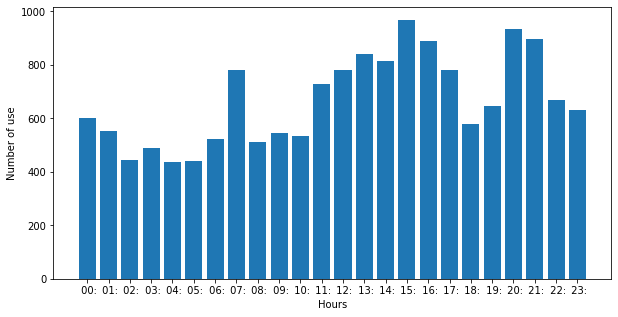

In [23]:
import matplotlib.pyplot as plt

print(result)
result_used = list()
result_distance = list()

for res in result:
    result_used.append(res.get("used"))
    result_distance.append(res.get("distance"))
    

x = hours
y = result_used
plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.ylabel("Number of use")
plt.xlabel("Hours")
plt.title("")
#plt.xticks(np.arange(len(days)), [day[5:] for day in days])
plt.show()

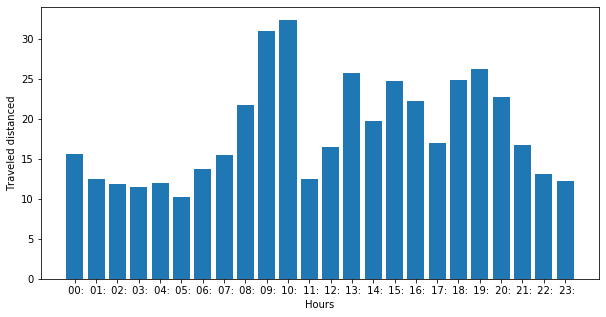

In [24]:
x = hours
y = result_distance
plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.ylabel("Traveled distanced")
plt.xlabel("Hours")
plt.title("")
#plt.xticks(np.arange(len(days)), [day[5:] for day in days])
plt.show()